In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paulineng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paulineng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/paulineng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
base_dir = "/Users/paulineng/Desktop/03 Text Analytics and Applications/Group Project"
df = pd.read_csv(f"{base_dir}/Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


- Check for null and duplicate reviews. 17485 duplicated reviews were found.

In [5]:
#Check for null and duplicates in 'Text' column
def check_duplicate_null (df, text_column='Text'):
    total_rows = len(df)
    missing_count = df[text_column].isna().sum()
    duplicate_count = df.duplicated(subset=text_column).sum()
    
    print(f"Total rows: {total_rows}")
    print(f"Missing {text_column}: {missing_count}")
    print(f"Duplicates (by '{text_column}' only): {duplicate_count}")

check_duplicate_null(df, text_column='Text')

Total rows: 568454
Missing Text: 0
Duplicates (by 'Text' only): 174875


In [6]:
#Drop duplicates
df.drop_duplicates(subset='Text', keep='first', inplace=True)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [7]:
#After dropping duplicates, confirm no duplicate or missing text
check_duplicate_null(df, text_column='Text')

Total rows: 393579
Missing Text: 0
Duplicates (by 'Text' only): 0


In [8]:
# Check for valid rating scores 1 to 5
out_of_range = df[(df['Score'] < 1) | (df['Score'] > 5)]
print("Number of reviews outside the 1–5 range:", len(out_of_range))

Number of reviews outside the 1–5 range: 0


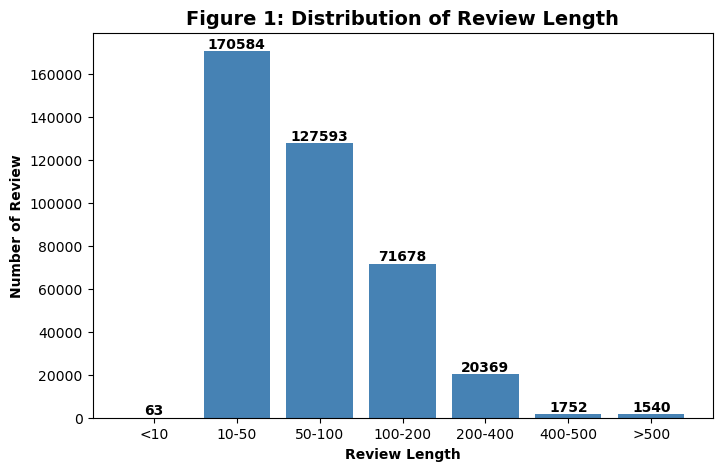

In [9]:
df['review_length_raw'] = df['Text'].apply(lambda x: len(str(x).split()))
bins = [0, 10, 50, 100, 200, 400, 500, df['review_length_raw'].max() + 1]
labels = ["<10", "10-50", "50-100", "100-200", "200-400", "400-500", ">500"]
df['length_category'] = pd.cut(df['review_length_raw'], bins=bins, labels=labels, right=False)
category_counts = df['length_category'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
bars = plt.bar(
    category_counts.index.astype(str),
    category_counts.values,
    color="steelblue",
    edgecolor='none'
)
plt.title('Figure 1: Distribution of Review Length', fontweight='bold', fontsize=14)
plt.xlabel('Review Length', fontweight='bold')
plt.ylabel('Number of Review', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontweight='bold'
    )
plt.show()

- Check for extremely short reviews (<10 words) and extremly long reviews (>500 reviews). There are 63 reviews with <10 words and 1529 reviews with >500 words.

In [10]:
# Check for Review with <10 words
short_threshold = 10
very_short_df = df[df['Text'].apply(lambda x: len(str(x).split())) < short_threshold]
print("Number of reviews < 10 words:", len(very_short_df))

very_short_df['Text']

Number of reviews < 10 words: 63


14893               Smoothest green tea yet....good all day
15560                     Same price as Dr. Foster & Smith.
44455          Yummy, if you like noodles I recomend these.
49025     <span class="tiny"> Length:: 1:02 Mins<br /><b...
65997     <span class="tiny"> Length:: 0:42 Mins<br /><b...
                                ...                        
495800    <span class="tiny"> Length:: 0:17 Mins<br /><b...
552341                     Great!  Make it all of the time.
558985    My office staff has been delighted with every ...
566927    Rather mild but pleasant tasting coffee...typi...
568415                     as it should be for $6 a bottle.
Name: Text, Length: 63, dtype: object

In [11]:
# Check for Review with > 500 words
long_threshold = 500
long_df = df[df['Text'].apply(lambda x: len(str(x).split())) > long_threshold]
print("Number of reviews >500 words:", len(long_df))

pd.set_option('display.max_colwidth', None)
long_df['Text']

Number of reviews >500 words: 1529


528                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [12]:
#Drop review with <10 and >500 words
short_threshold = 10
long_threshold = 500

df_filtered = df[
    (df['Text'].apply(lambda x: len(str(x).split())) >= short_threshold) &
    (df['Text'].apply(lambda x: len(str(x).split())) <= long_threshold)
]
df_filtered

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review_length_raw,length_category
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,48,10-50
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",31,10-50
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",94,50-100
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,41,10-50
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",27,10-50
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husband loved it..will find other recipes to use this in..,26,10-50
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,"I'm disappointed with the flavor. The chocolate notes are especially weak. Milk thickens it but the flavor still disappoints. This was worth a try but I'll never buy again. I will use what's left, which will be gone in no time thanks to the small cans.",46,10-50
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 of those in one training session. I tried to train our dog with ""Ceaser dog treats"", it just made our puppy hyper. If you compare the ingredients, you will know why. Little stars has just basic food ingredients without any preservatives and food coloring. Sweet potato flavor also did not make my hand smell like dog food.",66,50-100
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rewarding your dog for being good while grooming. Lower in calories and loved by all the doggies. Sweet potatoes seem to be their favorite Wet Noses treat!,35,10-50


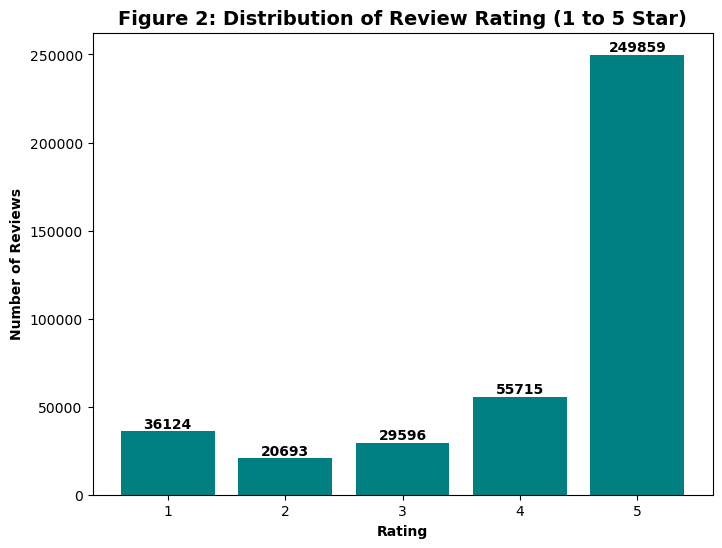

In [13]:
score_counts = df_filtered['Score'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(score_counts.index, score_counts.values, color='teal')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Figure 2: Distribution of Review Rating (1 to 5 Star)', fontweight='bold', fontsize=14)
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')
plt.xticks(score_counts.index)

plt.show()

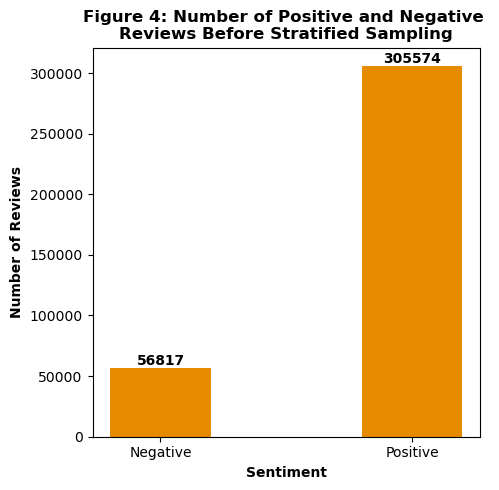

In [16]:
# Remove 3-star reviews
df_filtered = df_filtered[df_filtered['Score'] != 3]

def map_score_to_sentiment(score):
    if score in [1, 2]:
        return 0
    elif score in [4, 5]:
        return 1

df_filtered['Sentiment'] = df_filtered['Score'].apply(map_score_to_sentiment)
sentiment_counts = df_filtered['Sentiment'].value_counts()

plt.figure(figsize=(5, 5)) 
bars = plt.bar(
    sentiment_counts.index,
    sentiment_counts.values,
    color='#E68A00',
    width=0.4  
)

plt.xticks([0, 1], ["Negative", "Positive"]) 

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Figure 4: Number of Positive and Negative \nReviews Before Stratified Sampling', fontweight='bold', fontsize=12)
plt.xlabel('Sentiment', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')

plt.tight_layout()  
plt.show()

To ensure balanced dataset and we have as much data in our analysis as possible, all negative reviews are kept and randomly sample equal number of positive reviews.

In [15]:
df_positive = df_filtered[df_filtered['Sentiment'] == 1]
df_negative = df_filtered[df_filtered['Sentiment'] == 0]

neg = len(df_negative)
df_pos_downsampled = df_positive.sample(n=neg, random_state=42)
df_balanced = pd.concat([df_pos_downsampled, df_negative], axis=0)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Sentiment'].value_counts())

Sentiment
0    56817
1    56817
Name: count, dtype: int64


In [16]:
#save as separate csv for further analysis
df_balanced.to_csv(f"{base_dir}/balanced_reviews.csv", index=False)

In [17]:
df_balanced = pd.read_csv(f"{base_dir}/balanced_reviews.csv")


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Split into 80% train and 20% test set
train_df, test_df = train_test_split(df_balanced, test_size=0.2, random_state=42)
train_df.to_csv("train_sen.csv", index=False)
test_df.to_csv("test_sen.csv", index=False)

In [20]:
train_df = pd.read_csv(f"{base_dir}/train_sen.csv")
test_df  = pd.read_csv(f"{base_dir}/test_sen.csv")

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90907 entries, 0 to 90906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      90907 non-null  int64 
 1   ProductId               90907 non-null  object
 2   UserId                  90907 non-null  object
 3   ProfileName             90904 non-null  object
 4   HelpfulnessNumerator    90907 non-null  int64 
 5   HelpfulnessDenominator  90907 non-null  int64 
 6   Score                   90907 non-null  int64 
 7   Time                    90907 non-null  int64 
 8   Summary                 90907 non-null  object
 9   Text                    90907 non-null  object
 10  review_length_raw       90907 non-null  int64 
 11  length_category         90907 non-null  object
 12  Sentiment               90907 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 9.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22727 entri

- DistilBERT

In [21]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import evaluate
from sklearn.metrics import accuracy_score, classification_report

/opt/miniconda3/envs/text/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
cuda_available = torch.cuda.is_available()
mps_available = getattr(torch.backends.mps, 'is_available', lambda: False)()

if cuda_available:
    device = "cuda"
elif mps_available:
    device = "mps"
else:
    device = "cpu"

print("PyTorch running on:", device)

PyTorch running on: mps


In [23]:
#Load data
train_df = pd.read_csv(f"{base_dir}/train_sen.csv")
test_df  = pd.read_csv(f"{base_dir}/test_sen.csv")

train_texts  = train_df["Text"].tolist()
train_labels = train_df["Sentiment"].tolist()

test_texts  = test_df["Text"].tolist()
test_labels = test_df["Sentiment"].tolist()

In [24]:
#Tokenize
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings   = tokenizer(test_texts,   truncation=True, padding=True)

In [25]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset   = SentimentDataset(test_encodings, test_labels)

In [26]:
metric_accuracy  = evaluate.load("accuracy")
metric_precision = evaluate.load("precision")
metric_recall    = evaluate.load("recall")
metric_f1        = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)

    acc  = metric_accuracy.compute(predictions=predictions, references=labels)
    prec = metric_precision.compute(predictions=predictions, references=labels)
    rec  = metric_recall.compute(predictions=predictions, references=labels)
    f1   = metric_f1.compute(predictions=predictions, references=labels)

    return {
        "Accuracy":  acc["accuracy"],
        "Precision": prec["precision"],
        "Recall":    rec["recall"],
        "F1":        f1["f1"]
    }

In [27]:
training_args = TrainingArguments(
    output_dir='./results_distilbert',
    evaluation_strategy="epoch",     
    save_strategy="epoch",           
    load_best_model_at_end=True,     
    metric_for_best_model="F1",      
    greater_is_better=True,          
)

/opt/miniconda3/envs/text/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [30]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.209200,0.180237,0.943943,0.952084,0.935586,0.943763
2,0.147100,0.225768,0.948871,0.949072,0.949239,0.949156
3,0.071900,0.252786,0.951819,0.953631,0.950376,0.952001


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


TrainOutput(global_step=34092, training_loss=0.14710813947480902, metrics={'train_runtime': 26726.3306, 'train_samples_per_second': 10.204, 'train_steps_per_second': 1.276, 'total_flos': 3.612664142886298e+16, 'train_loss': 0.14710813947480902, 'epoch': 3.0})

In [40]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.25278615951538086, 'eval_Accuracy': 0.951819421833062, 'eval_Precision': 0.9536313339773426, 'eval_Recall': 0.9503763346753019, 'eval_F1': 0.9520010520317362, 'eval_runtime': 700.7336, 'eval_samples_per_second': 32.433, 'eval_steps_per_second': 4.054, 'epoch': 3.0}


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
pred_output = trainer.predict(test_dataset)  

logits = pred_output.predictions
y_true = pred_output.label_ids

y_pred = np.argmax(logits, axis=1)


In [35]:
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0     0.9500    0.9533    0.9516     11301
           1     0.9536    0.9504    0.9520     11426

    accuracy                         0.9518     22727
   macro avg     0.9518    0.9518    0.9518     22727
weighted avg     0.9518    0.9518    0.9518     22727

Confusion Matrix:
[[10773   528]
 [  567 10859]]


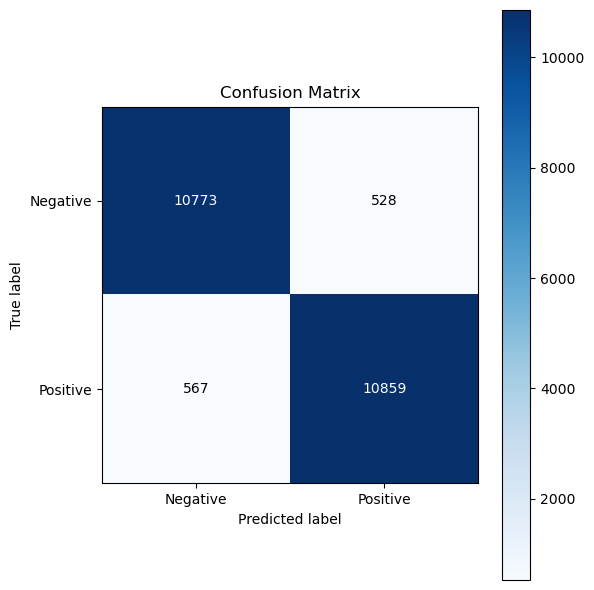

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

class_names = ['Negative', 'Positive']

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [84]:
# Add distilbert test predictions as a new column and save updated df into a csv file
test_df["distilbert_prediction"] = y_pred
test_df.to_csv("test_with_distilbert_predictions.csv", index=False)

- Llama 3.2 (3B) documentation: https://github.com/ollama/ollama/blob/main/README.md

In [48]:
base_dir = "/Users/paulineng/Desktop/03 Text Analytics and Applications/Group Project"

In [ ]:
train_df = pd.read_csv(f"{base_dir}/train_sen.csv") 
test_df  = pd.read_csv(f"{base_dir}/test_sen.csv")

In [61]:
#Query review and sentiment data from train dataset. Selected reviews will be included in the prompt.

few_shot_examples = train_df.sample(n=50, random_state=42)

examples_str = ""
for i, row in few_shot_examples.iterrows():
    examples_str += f"Example {i}:\nReview: {row['Text']}\nSentiment: {row['Sentiment']}\n\n"

print(examples_str)

Example 63429:
Review: Great buy for the money. Almonds are large and whole. I am planning to order more almonds plus other nuts from this company.
Sentiment: 1

Example 62567:
Review: I was very disappointed with my order. The first thing, I did not receive the complete order. When I called , they said they could not help me. I only received only one Barrel of Pretzels. Second the one Barrel i did received looked just awful.<br />I do not even want to open it. I am a Pretzel Lover, and Utz is one of my Favorites. I do not know what happened, but I will never buy this item again through Amazon. I am even concerned about ordering any Food item through Amazon.<br />I have ordered many items through Amazon and I never had a problem until now. It was just disappointed that Amazon did not help me...
Sentiment: 0

Example 48820:
Review: Very Convenient, can take with you to work, on trips,<a href="http://www.amazon.com/gp/product/B00284TNL8">International Delight Amaretto Liquid Creamer, 288

In [ ]:
#For test dataset, filter only the 'Text' and 'Sentiment' columns and save as a separate csv file
test_df = pd.read_csv(f"{base_dir}/test_sen.csv")
filtered_test_df = test_df[['Text', 'Sentiment']]
filtered_test_df.to_csv(f"{base_dir}/filtered_test_sen.csv", index=False)

In [52]:
import subprocess
import time
import requests
import json

In [ ]:
# Start Ollama server that host llama3.2
def start_ollama_server():
        print("Starting Ollama server (default port 11434)...")

    command = ["ollama", "serve"]
    server_process = subprocess.Popen(
        command,
        stdout=subprocess.PIPE,         #for monitoring server output
        stderr=subprocess.STDOUT,       #for monitoring server output
        text=True
    )

    logs_list = []
    start_time = time.time()

    while True:
        if time.time() - start_time > 10:
            break  

        line = server_process.stdout.readline()
        if not line:
            break

        line_stripped = line.strip()
        logs_list.append(line_stripped)

        if "Listening on" in line_stripped:
            break

    return server_process, logs_list

In [54]:
def call_ollama_rest_api(prompt_text):
    endpoints = [
        "http://127.0.0.1:11434/api/generate",
        "http://127.0.0.1:11434/generate"
    ]

    payload = {
        "model": "llama3.2",
        "prompt": prompt_text
    }

    for url in endpoints:
        print(f"\nTrying endpoint: {url}")
        try:
            resp = requests.post(url, json=payload, timeout=30)
        except requests.exceptions.ConnectionError:
            print("Connection error. Is the server up?")
            continue

        print("Status Code:", resp.status_code)
        if resp.status_code == 200:
            final_answer = parse_streaming_json(resp.text)
            return final_answer
        else:
            print("Raw Response Text:", resp.text)

    return "Could not get a 200 response from any known endpoint."

In [ ]:
# Managing JSON output 
def parse_streaming_json(raw_text):
    lines = raw_text.strip().splitlines()
    final_answer = ""
    for line in lines:
        try:
            chunk = json.loads(line)
            partial_text = chunk.get("response", "")
            final_answer += partial_text
        except json.JSONDecodeError:
            pass
    return final_answer.strip()

In [ ]:
# Sends review to Ollama server and get a sentiment classification (0 or 1) from Llama3.2
def classify_sentiment(review_text, model_name="llama3.2", timeout=60, max_retries=2): 
    endpoints = [
        "http://127.0.0.1:11434/api/generate",
        "http://127.0.0.1:11434/generate"
    ]

    prompt_text = f"""
You are a sentiment classifier for Amazon Fine Food reviews.
Output exactly '0' (no quotes) if the review is negative, or '1' if the review is positive.
No explanation, no extra words, just the single digit '0' or '1' (without quotes).
For the review below, determine the overall sentiment by weighing all positive and negative aspects. If the majority of the review is positive, return 1; if it's negative, return 0. Even if the review contains some negative points, if the overall tone is positive, output 1.

Here are some examples:

Review: Great buy for the money. Almonds are large and whole. I am planning to order more almonds plus other nuts from this company.
Sentiment: 1

Review: I was very disappointed with my order. The first thing, I did not receive the complete order. When I called, they said they could not help me. I only received one Barrel of Pretzels. Second, the one Barrel I did receive looked just awful. I do not even want to open it. I am a Pretzel Lover, and Utz is one of my Favorites. I do not know what happened, but I will never buy this item again through Amazon. I am even concerned about ordering any food item through Amazon. I have ordered many items through Amazon and I never had a problem until now.
Sentiment: 0

Review: Very Convenient, can take with you to work, on trips, etc. Excellent product.
Sentiment: 1

Review: As much as our dogs enjoyed Lickety Stik, the cloying stench of "savory chicken" repulsed the rest of the family. The odor wafted off the stick and filled the room like a musky air freshener. We called it "Icky Stik" or "Stinky Stik" as the experience was so nauseating that no one volunteered to reopen the stick, despite pleas from our dogs.
Sentiment: 0

Review: This tea is delicious! I've noticed my skin is starting to look a lot better since I have been drinking it. I have a cup almost every day. I will be purchasing more when I run out!
Sentiment: 1

Review: I am unhappy with the purchase on the grounds of deceptive labeling. This tea is NOT matcha, but rather a matcha blend that is mostly sencha. I should have read the product description more carefully, but was duped by the product listing title. Amazon should change the listing to Rishi Tea... Matcha blend.
Sentiment: 0

Review: I would give this company zero stars if I could. I purchased these flowers for my grandmother's birthday, but she never received them. When I contacted the company's customer service, I was told that the flowers were delivered, but no one was home, so they were left at the front door. I was also told that I cannot receive a refund or a delivery with signature. Hopefully, the Better Business Bureau resolves this issue.
Sentiment: 0

Review: I got these for a reason. My eight year old Elizabeth and I make our Christmas cookies (at least one kind) every year and they need decorations; now we have a lot!
Sentiment: 1

Review: The item was delivered in great condition and my dog enjoyed the tug toy, but after a few uses a small piece chipped off and it could have been dangerous if ingested.
Sentiment: 0

Review: I wanted so badly to love these peanuts. The texture is absolutely perfect; however, the salt quickly sneaks up on you and makes them painful to eat.
Sentiment: 0

Review: These brownies are really, really good and remind me of homemade box-mix brownies. However, they only make an 8x8 pan and the consistency isn’t ideal for a sundae or layered dessert.
Sentiment: 1

Review: I generally like this brand's flavored coffees; however, the Turtle Sunday flavor I bought did not suit my taste, even though the overall quality cannot be beat.
Sentiment: 1

Now classify the following review:

Review: "{review_text}"

Answer:
""".strip()

    payload = {
        "model": model_name,
        "prompt": prompt_text,
        "temperature": 0.0
    }

    for url in endpoints:
        for attempt in range(max_retries):
            try:
                resp = requests.post(url, json=payload, timeout=timeout)
                if resp.status_code == 200:
                    answer_text = parse_streaming_json(resp.text).strip()
                    if answer_text.startswith("1"):
                        return 1
                    else:
                        return 0
                else:
                    print(f"Raw Response from {url}: {resp.status_code} {resp.text}")
                    break
            except requests.exceptions.ConnectionError:
                print(f"Server not reachable on {url}, attempt {attempt+1}/{max_retries}")
                if attempt < max_retries - 1:
                    time.sleep(2)  
                else:
                    print("Max retries reached, defaulting to 0.")
                    return 0
    return 0

In [76]:
def main():
    # Load dataset
    csv_path = f"{base_dir}/filtered_test_sen.csv"   
    df = pd.read_csv(csv_path)

    # Batch setup
    chunk_size = 10   # 10 rows per batch
    model_name = "llama3.2"
    predictions = [None] * len(df)  

    # Loop through DataFrame in batches
    for start_idx in range(0, len(df), chunk_size):
        end_idx = min(start_idx + chunk_size, len(df))
        batch_rows = range(start_idx, end_idx)

        # Start Ollama server 
        server_process, logs = start_ollama_server()
        time.sleep(3)  

        # For every row in each batch, review text is extracted and returns sentiment label
        for idx in batch_rows:
            text = df.at[idx, "Text"]
            pred = classify_sentiment(text, model_name=model_name, timeout=60)
            predictions[idx] = pred
            print(f"Row {idx} => Predicted: {pred}")

        # Stop Ollama server 
        print(f"\nTerminating Ollama server after rows {start_idx} to {end_idx-1}...")
        server_process.terminate()
        server_process.wait()
        print("Server stopped.\n")

    # Predictions added to new column
    df["prediction"] = predictions

    # Evaluation using confusion matrix and classification report
    if "Sentiment" in df.columns:
        y_true = df["Sentiment"]
        y_pred = df["prediction"]

        cm = confusion_matrix(y_true, y_pred)
        print("\nConfusion Matrix:")
        print(cm)

        report = classification_report(y_true, y_pred, target_names=["negative", "positive"])
        print("\nClassification Report:")
        print(report)

    # Save results as separate file
    output_path = "ollama_reviews_with_predictions.csv"
    df.to_csv(output_path, index=False)
    print(f"Saved predictions to {output_path}")

if __name__ == "__main__":
    main()

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 0 => Predicted: 1
Row 1 => Predicted: 1
Row 2 => Predicted: 1
Row 3 => Predicted: 1
Row 4 => Predicted: 1
Row 5 => Predicted: 1
Row 6 => Predicted: 0
Row 7 => Predicted: 0
Row 8 => Predicted: 1
Row 9 => Predicted: 0

Terminating Ollama server after rows 0 to 9...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10 => Predicted: 0
Row 11 => Predicted: 0
Row 12 => Predicted: 1
Row 13 => Predicted: 0
Row 14 => Predicted: 1
Row 15 => Predicted: 0
Row 16 => Predicted: 0
Row 17 => Predicted: 0
Row 18 => Predicted: 1
Row 19 => Predicted: 1

Terminating Ollama server after rows 10 to 19...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20 => Predicted: 1
Row 21 => Predicted: 0
Row 22 => Predicted: 0
Row 23 => Predicted: 0
Row 24 => Predicted: 0
Row 25 => Predicted: 0
Row 26 => Predicted: 0
Row 27 => Predicted: 1
Row 28 => Predicted: 0
Row 29 => Predicted: 1

Terminating Ollama server after rows 20 to 29...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 30 => Predicted: 0
Row 31 => Predicted: 0
Row 32 => Predicted: 0
Row 33 => Predicted: 0
Row 34 => Predicted: 1
Row 35 => Predicted: 0
Row 36 => Predicted: 1
Row 37 => Predicted: 1
Row 38 => Predicted: 1
Row 39 => Predicted: 1

Terminating Ollama server after rows 30 to 39...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 40 => Predicted: 1
Row 41 => Predicted: 0
Row 42 => Predicted: 1
Row 43 => Predicted: 1
Row 44 => Predicted: 0
Row 45 => Predicted: 0
Row 46 => Predicted: 0
Row 47 => Predicted: 0
Row 48 => Predicted: 0
Row 49 => Predicted: 0

Terminating Ollama server after rows 40 to 49...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 50 => Predicted: 0
Row 51 => Predicted: 1
Row 52 => Predicted: 1
Row 53 => Predicted: 0
Row 54 => Predicted: 1
Row 55 => Predicted: 1
Row 56 => Predicted: 1
Row 57 => Predicted: 0
Row 58 => Predicted: 0
Row 59 => Predicted: 0

Terminating Ollama server after rows 50 to 59...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 60 => Predicted: 0
Row 61 => Predicted: 1
Row 62 => Predicted: 0
Row 63 => Predicted: 0
Row 64 => Predicted: 0
Row 65 => Predicted: 1
Row 66 => Predicted: 1
Row 67 => Predicted: 0
Row 68 => Predicted: 0
Row 69 => Predicted: 0

Terminating Ollama server after rows 60 to 69...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 70 => Predicted: 0
Row 71 => Predicted: 1
Row 72 => Predicted: 0
Row 73 => Predicted: 1
Row 74 => Predicted: 1
Row 75 => Predicted: 0
Row 76 => Predicted: 0
Row 77 => Predicted: 1
Row 78 => Predicted: 1
Row 79 => Predicted: 1

Terminating Ollama server after rows 70 to 79...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 80 => Predicted: 1
Row 81 => Predicted: 0
Row 82 => Predicted: 1
Row 83 => Predicted: 1
Row 84 => Predicted: 0
Row 85 => Predicted: 0
Row 86 => Predicted: 0
Row 87 => Predicted: 0
Row 88 => Predicted: 1
Row 89 => Predicted: 1

Terminating Ollama server after rows 80 to 89...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 90 => Predicted: 1
Row 91 => Predicted: 1
Row 92 => Predicted: 0
Row 93 => Predicted: 0
Row 94 => Predicted: 1
Row 95 => Predicted: 0
Row 96 => Predicted: 1
Row 97 => Predicted: 1
Row 98 => Predicted: 0
Row 99 => Predicted: 1

Terminating Ollama server after rows 90 to 99...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 100 => Predicted: 0
Row 101 => Predicted: 1
Row 102 => Predicted: 1
Row 103 => Predicted: 0
Row 104 => Predicted: 0
Row 105 => Predicted: 0
Row 106 => Predicted: 0
Row 107 => Predicted: 0
Row 108 => Predicted: 0
Row 109 => Predicted: 0

Terminating Ollama server after rows 100 to 109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 110 => Predicted: 0
Row 111 => Predicted: 0
Row 112 => Predicted: 1
Row 113 => Predicted: 1
Row 114 => Predicted: 0
Row 115 => Predicted: 1
Row 116 => Predicted: 1
Row 117 => Predicted: 0
Row 118 => Predicted: 1
Row 119 => Predicted: 1

Terminating Ollama server after rows 110 to 119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 120 => Predicted: 1
Row 121 => Predicted: 0
Row 122 => Predicted: 0
Row 123 => Predicted: 1
Row 124 => Predicted: 1
Row 125 => Predicted: 1
Row 126 => Predicted: 1
Row 127 => Predicted: 1
Row 128 => Predicted: 1
Row 129 => Predicted: 1

Terminating Ollama server after rows 120 to 129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 130 => Predicted: 0
Row 131 => Predicted: 1
Row 132 => Predicted: 1
Row 133 => Predicted: 0
Row 134 => Predicted: 0
Row 135 => Predicted: 0
Row 136 => Predicted: 1
Row 137 => Predicted: 1
Row 138 => Predicted: 0
Row 139 => Predicted: 1

Terminating Ollama server after rows 130 to 139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 140 => Predicted: 1
Row 141 => Predicted: 0
Row 142 => Predicted: 1
Row 143 => Predicted: 0
Row 144 => Predicted: 1
Row 145 => Predicted: 0
Row 146 => Predicted: 1
Row 147 => Predicted: 1
Row 148 => Predicted: 0
Row 149 => Predicted: 1

Terminating Ollama server after rows 140 to 149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 150 => Predicted: 1
Row 151 => Predicted: 0
Row 152 => Predicted: 1
Row 153 => Predicted: 0
Row 154 => Predicted: 1
Row 155 => Predicted: 0
Row 156 => Predicted: 0
Row 157 => Predicted: 0
Row 158 => Predicted: 1
Row 159 => Predicted: 1

Terminating Ollama server after rows 150 to 159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 160 => Predicted: 0
Row 161 => Predicted: 0
Row 162 => Predicted: 0
Row 163 => Predicted: 1
Row 164 => Predicted: 1
Row 165 => Predicted: 0
Row 166 => Predicted: 0
Row 167 => Predicted: 1
Row 168 => Predicted: 0
Row 169 => Predicted: 0

Terminating Ollama server after rows 160 to 169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 170 => Predicted: 1
Row 171 => Predicted: 1
Row 172 => Predicted: 1
Row 173 => Predicted: 0
Row 174 => Predicted: 1
Row 175 => Predicted: 0
Row 176 => Predicted: 0
Row 177 => Predicted: 0
Row 178 => Predicted: 0
Row 179 => Predicted: 0

Terminating Ollama server after rows 170 to 179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 180 => Predicted: 0
Row 181 => Predicted: 1
Row 182 => Predicted: 0
Row 183 => Predicted: 1
Row 184 => Predicted: 1
Row 185 => Predicted: 1
Row 186 => Predicted: 1
Row 187 => Predicted: 0
Row 188 => Predicted: 1
Row 189 => Predicted: 1

Terminating Ollama server after rows 180 to 189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 190 => Predicted: 1
Row 191 => Predicted: 0
Row 192 => Predicted: 0
Row 193 => Predicted: 1
Row 194 => Predicted: 0
Row 195 => Predicted: 0
Row 196 => Predicted: 1
Row 197 => Predicted: 1
Row 198 => Predicted: 1
Row 199 => Predicted: 0

Terminating Ollama server after rows 190 to 199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 200 => Predicted: 0
Row 201 => Predicted: 0
Row 202 => Predicted: 1
Row 203 => Predicted: 0
Row 204 => Predicted: 1
Row 205 => Predicted: 0
Row 206 => Predicted: 0
Row 207 => Predicted: 1
Row 208 => Predicted: 0
Row 209 => Predicted: 0

Terminating Ollama server after rows 200 to 209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 210 => Predicted: 1
Row 211 => Predicted: 0
Row 212 => Predicted: 1
Row 213 => Predicted: 0
Row 214 => Predicted: 0
Row 215 => Predicted: 1
Row 216 => Predicted: 0
Row 217 => Predicted: 1
Row 218 => Predicted: 1
Row 219 => Predicted: 1

Terminating Ollama server after rows 210 to 219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 220 => Predicted: 0
Row 221 => Predicted: 0
Row 222 => Predicted: 0
Row 223 => Predicted: 1
Row 224 => Predicted: 0
Row 225 => Predicted: 1
Row 226 => Predicted: 1
Row 227 => Predicted: 1
Row 228 => Predicted: 0
Row 229 => Predicted: 0

Terminating Ollama server after rows 220 to 229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 230 => Predicted: 0
Row 231 => Predicted: 1
Row 232 => Predicted: 1
Row 233 => Predicted: 1
Row 234 => Predicted: 0
Row 235 => Predicted: 0
Row 236 => Predicted: 1
Row 237 => Predicted: 0
Row 238 => Predicted: 0
Row 239 => Predicted: 1

Terminating Ollama server after rows 230 to 239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 240 => Predicted: 1
Row 241 => Predicted: 1
Row 242 => Predicted: 1
Row 243 => Predicted: 1
Row 244 => Predicted: 0
Row 245 => Predicted: 0
Row 246 => Predicted: 1
Row 247 => Predicted: 1
Row 248 => Predicted: 1
Row 249 => Predicted: 1

Terminating Ollama server after rows 240 to 249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 250 => Predicted: 1
Row 251 => Predicted: 1
Row 252 => Predicted: 1
Row 253 => Predicted: 1
Row 254 => Predicted: 1
Row 255 => Predicted: 0
Row 256 => Predicted: 1
Row 257 => Predicted: 0
Row 258 => Predicted: 1
Row 259 => Predicted: 1

Terminating Ollama server after rows 250 to 259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 260 => Predicted: 1
Row 261 => Predicted: 0
Row 262 => Predicted: 0
Row 263 => Predicted: 0
Row 264 => Predicted: 1
Row 265 => Predicted: 0
Row 266 => Predicted: 0
Row 267 => Predicted: 0
Row 268 => Predicted: 1
Row 269 => Predicted: 1

Terminating Ollama server after rows 260 to 269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 270 => Predicted: 1
Row 271 => Predicted: 0
Row 272 => Predicted: 1
Row 273 => Predicted: 1
Row 274 => Predicted: 1
Row 275 => Predicted: 1
Row 276 => Predicted: 1
Row 277 => Predicted: 0
Row 278 => Predicted: 1
Row 279 => Predicted: 1

Terminating Ollama server after rows 270 to 279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 280 => Predicted: 1
Row 281 => Predicted: 0
Row 282 => Predicted: 1
Row 283 => Predicted: 1
Row 284 => Predicted: 1
Row 285 => Predicted: 0
Row 286 => Predicted: 1
Row 287 => Predicted: 1
Row 288 => Predicted: 1
Row 289 => Predicted: 1

Terminating Ollama server after rows 280 to 289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 290 => Predicted: 0
Row 291 => Predicted: 1
Row 292 => Predicted: 0
Row 293 => Predicted: 1
Row 294 => Predicted: 0
Row 295 => Predicted: 1
Row 296 => Predicted: 1
Row 297 => Predicted: 1
Row 298 => Predicted: 1
Row 299 => Predicted: 1

Terminating Ollama server after rows 290 to 299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 300 => Predicted: 1
Row 301 => Predicted: 0
Row 302 => Predicted: 1
Row 303 => Predicted: 1
Row 304 => Predicted: 1
Row 305 => Predicted: 0
Row 306 => Predicted: 1
Row 307 => Predicted: 0
Row 308 => Predicted: 1
Row 309 => Predicted: 1

Terminating Ollama server after rows 300 to 309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 310 => Predicted: 1
Row 311 => Predicted: 0
Row 312 => Predicted: 1
Row 313 => Predicted: 0
Row 314 => Predicted: 0
Row 315 => Predicted: 1
Row 316 => Predicted: 0
Row 317 => Predicted: 0
Row 318 => Predicted: 1
Row 319 => Predicted: 1

Terminating Ollama server after rows 310 to 319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 320 => Predicted: 0
Row 321 => Predicted: 0
Row 322 => Predicted: 1
Row 323 => Predicted: 1
Row 324 => Predicted: 0
Row 325 => Predicted: 0
Row 326 => Predicted: 0
Row 327 => Predicted: 1
Row 328 => Predicted: 0
Row 329 => Predicted: 1

Terminating Ollama server after rows 320 to 329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 330 => Predicted: 0
Row 331 => Predicted: 0
Row 332 => Predicted: 0
Row 333 => Predicted: 1
Row 334 => Predicted: 1
Row 335 => Predicted: 0
Row 336 => Predicted: 1
Row 337 => Predicted: 0
Row 338 => Predicted: 0
Row 339 => Predicted: 1

Terminating Ollama server after rows 330 to 339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 340 => Predicted: 1
Row 341 => Predicted: 0
Row 342 => Predicted: 0
Row 343 => Predicted: 1
Row 344 => Predicted: 1
Row 345 => Predicted: 0
Row 346 => Predicted: 1
Row 347 => Predicted: 1
Row 348 => Predicted: 0
Row 349 => Predicted: 0

Terminating Ollama server after rows 340 to 349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 350 => Predicted: 0
Row 351 => Predicted: 0
Row 352 => Predicted: 0
Row 353 => Predicted: 1
Row 354 => Predicted: 1
Row 355 => Predicted: 1
Row 356 => Predicted: 0
Row 357 => Predicted: 1
Row 358 => Predicted: 1
Row 359 => Predicted: 1

Terminating Ollama server after rows 350 to 359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 360 => Predicted: 0
Row 361 => Predicted: 1
Row 362 => Predicted: 0
Row 363 => Predicted: 1
Row 364 => Predicted: 1
Row 365 => Predicted: 0
Row 366 => Predicted: 0
Row 367 => Predicted: 0
Row 368 => Predicted: 0
Row 369 => Predicted: 1

Terminating Ollama server after rows 360 to 369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 370 => Predicted: 0
Row 371 => Predicted: 0
Row 372 => Predicted: 1
Row 373 => Predicted: 1
Row 374 => Predicted: 0
Row 375 => Predicted: 0
Row 376 => Predicted: 1
Row 377 => Predicted: 0
Row 378 => Predicted: 1
Row 379 => Predicted: 0

Terminating Ollama server after rows 370 to 379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 380 => Predicted: 0
Row 381 => Predicted: 0
Row 382 => Predicted: 0
Row 383 => Predicted: 0
Row 384 => Predicted: 0
Row 385 => Predicted: 0
Row 386 => Predicted: 0
Row 387 => Predicted: 0
Row 388 => Predicted: 1
Row 389 => Predicted: 1

Terminating Ollama server after rows 380 to 389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 390 => Predicted: 1
Row 391 => Predicted: 0
Row 392 => Predicted: 0
Row 393 => Predicted: 1
Row 394 => Predicted: 1
Row 395 => Predicted: 0
Row 396 => Predicted: 0
Row 397 => Predicted: 0
Row 398 => Predicted: 1
Row 399 => Predicted: 0

Terminating Ollama server after rows 390 to 399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 400 => Predicted: 1
Row 401 => Predicted: 1
Row 402 => Predicted: 0
Row 403 => Predicted: 0
Row 404 => Predicted: 1
Row 405 => Predicted: 1
Row 406 => Predicted: 1
Row 407 => Predicted: 0
Row 408 => Predicted: 1
Row 409 => Predicted: 0

Terminating Ollama server after rows 400 to 409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 410 => Predicted: 1
Row 411 => Predicted: 0
Row 412 => Predicted: 0
Row 413 => Predicted: 0
Row 414 => Predicted: 0
Row 415 => Predicted: 1
Row 416 => Predicted: 1
Row 417 => Predicted: 1
Row 418 => Predicted: 0
Row 419 => Predicted: 1

Terminating Ollama server after rows 410 to 419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 420 => Predicted: 0
Row 421 => Predicted: 0
Row 422 => Predicted: 1
Row 423 => Predicted: 0
Row 424 => Predicted: 0
Row 425 => Predicted: 1
Row 426 => Predicted: 0
Row 427 => Predicted: 1
Row 428 => Predicted: 0
Row 429 => Predicted: 1

Terminating Ollama server after rows 420 to 429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 430 => Predicted: 1
Row 431 => Predicted: 0
Row 432 => Predicted: 0
Row 433 => Predicted: 1
Row 434 => Predicted: 1
Row 435 => Predicted: 1
Row 436 => Predicted: 0
Row 437 => Predicted: 0
Row 438 => Predicted: 1
Row 439 => Predicted: 1

Terminating Ollama server after rows 430 to 439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 440 => Predicted: 0
Row 441 => Predicted: 0
Row 442 => Predicted: 0
Row 443 => Predicted: 1
Row 444 => Predicted: 0
Row 445 => Predicted: 1
Row 446 => Predicted: 1
Row 447 => Predicted: 1
Row 448 => Predicted: 0
Row 449 => Predicted: 0

Terminating Ollama server after rows 440 to 449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 450 => Predicted: 1
Row 451 => Predicted: 0
Row 452 => Predicted: 0
Row 453 => Predicted: 1
Row 454 => Predicted: 1
Row 455 => Predicted: 1
Row 456 => Predicted: 0
Row 457 => Predicted: 1
Row 458 => Predicted: 1
Row 459 => Predicted: 1

Terminating Ollama server after rows 450 to 459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 460 => Predicted: 0
Row 461 => Predicted: 1
Row 462 => Predicted: 0
Row 463 => Predicted: 1
Row 464 => Predicted: 0
Row 465 => Predicted: 0
Row 466 => Predicted: 1
Row 467 => Predicted: 0
Row 468 => Predicted: 0
Row 469 => Predicted: 0

Terminating Ollama server after rows 460 to 469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 470 => Predicted: 1
Row 471 => Predicted: 0
Row 472 => Predicted: 0
Row 473 => Predicted: 0
Row 474 => Predicted: 1
Row 475 => Predicted: 0
Row 476 => Predicted: 0
Row 477 => Predicted: 1
Row 478 => Predicted: 0
Row 479 => Predicted: 0

Terminating Ollama server after rows 470 to 479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 480 => Predicted: 0
Row 481 => Predicted: 0
Row 482 => Predicted: 1
Row 483 => Predicted: 1
Row 484 => Predicted: 0
Row 485 => Predicted: 0
Row 486 => Predicted: 0
Row 487 => Predicted: 1
Row 488 => Predicted: 0
Row 489 => Predicted: 0

Terminating Ollama server after rows 480 to 489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 490 => Predicted: 1
Row 491 => Predicted: 0
Row 492 => Predicted: 0
Row 493 => Predicted: 0
Row 494 => Predicted: 0
Row 495 => Predicted: 0
Row 496 => Predicted: 1
Row 497 => Predicted: 1
Row 498 => Predicted: 1
Row 499 => Predicted: 0

Terminating Ollama server after rows 490 to 499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 500 => Predicted: 0
Row 501 => Predicted: 1
Row 502 => Predicted: 0
Row 503 => Predicted: 0
Row 504 => Predicted: 1
Row 505 => Predicted: 1
Row 506 => Predicted: 1
Row 507 => Predicted: 0
Row 508 => Predicted: 1
Row 509 => Predicted: 1

Terminating Ollama server after rows 500 to 509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 510 => Predicted: 0
Row 511 => Predicted: 0
Row 512 => Predicted: 1
Row 513 => Predicted: 1
Row 514 => Predicted: 1
Row 515 => Predicted: 1
Row 516 => Predicted: 0
Row 517 => Predicted: 1
Row 518 => Predicted: 1
Row 519 => Predicted: 1

Terminating Ollama server after rows 510 to 519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 520 => Predicted: 1
Row 521 => Predicted: 0
Row 522 => Predicted: 0
Row 523 => Predicted: 0
Row 524 => Predicted: 0
Row 525 => Predicted: 1
Row 526 => Predicted: 0
Row 527 => Predicted: 1
Row 528 => Predicted: 1
Row 529 => Predicted: 1

Terminating Ollama server after rows 520 to 529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 530 => Predicted: 0
Row 531 => Predicted: 1
Row 532 => Predicted: 0
Row 533 => Predicted: 1
Row 534 => Predicted: 0
Row 535 => Predicted: 1
Row 536 => Predicted: 0
Row 537 => Predicted: 0
Row 538 => Predicted: 0
Row 539 => Predicted: 1

Terminating Ollama server after rows 530 to 539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 540 => Predicted: 1
Row 541 => Predicted: 0
Row 542 => Predicted: 1
Row 543 => Predicted: 0
Row 544 => Predicted: 1
Row 545 => Predicted: 0
Row 546 => Predicted: 0
Row 547 => Predicted: 0
Row 548 => Predicted: 0
Row 549 => Predicted: 1

Terminating Ollama server after rows 540 to 549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 550 => Predicted: 0
Row 551 => Predicted: 0
Row 552 => Predicted: 0
Row 553 => Predicted: 0
Row 554 => Predicted: 0
Row 555 => Predicted: 0
Row 556 => Predicted: 0
Row 557 => Predicted: 1
Row 558 => Predicted: 0
Row 559 => Predicted: 1

Terminating Ollama server after rows 550 to 559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 560 => Predicted: 1
Row 561 => Predicted: 0
Row 562 => Predicted: 0
Row 563 => Predicted: 0
Row 564 => Predicted: 1
Row 565 => Predicted: 1
Row 566 => Predicted: 1
Row 567 => Predicted: 1
Row 568 => Predicted: 1
Row 569 => Predicted: 1

Terminating Ollama server after rows 560 to 569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 570 => Predicted: 0
Row 571 => Predicted: 0
Row 572 => Predicted: 0
Row 573 => Predicted: 1
Row 574 => Predicted: 1
Row 575 => Predicted: 1
Row 576 => Predicted: 1
Row 577 => Predicted: 1
Row 578 => Predicted: 0
Row 579 => Predicted: 1

Terminating Ollama server after rows 570 to 579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 580 => Predicted: 0
Row 581 => Predicted: 1
Row 582 => Predicted: 1
Row 583 => Predicted: 0
Row 584 => Predicted: 0
Row 585 => Predicted: 0
Row 586 => Predicted: 0
Row 587 => Predicted: 0
Row 588 => Predicted: 1
Row 589 => Predicted: 1

Terminating Ollama server after rows 580 to 589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 590 => Predicted: 1
Row 591 => Predicted: 1
Row 592 => Predicted: 0
Row 593 => Predicted: 1
Row 594 => Predicted: 0
Row 595 => Predicted: 1
Row 596 => Predicted: 1
Row 597 => Predicted: 1
Row 598 => Predicted: 0
Row 599 => Predicted: 1

Terminating Ollama server after rows 590 to 599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 600 => Predicted: 1
Row 601 => Predicted: 1
Row 602 => Predicted: 0
Row 603 => Predicted: 0
Row 604 => Predicted: 1
Row 605 => Predicted: 1
Row 606 => Predicted: 0
Row 607 => Predicted: 0
Row 608 => Predicted: 0
Row 609 => Predicted: 0

Terminating Ollama server after rows 600 to 609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 610 => Predicted: 0
Row 611 => Predicted: 1
Row 612 => Predicted: 0
Row 613 => Predicted: 0
Row 614 => Predicted: 0
Row 615 => Predicted: 1
Row 616 => Predicted: 0
Row 617 => Predicted: 1
Row 618 => Predicted: 1
Row 619 => Predicted: 0

Terminating Ollama server after rows 610 to 619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 620 => Predicted: 1
Row 621 => Predicted: 0
Row 622 => Predicted: 0
Row 623 => Predicted: 1
Row 624 => Predicted: 1
Row 625 => Predicted: 0
Row 626 => Predicted: 0
Row 627 => Predicted: 0
Row 628 => Predicted: 1
Row 629 => Predicted: 1

Terminating Ollama server after rows 620 to 629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 630 => Predicted: 0
Row 631 => Predicted: 0
Row 632 => Predicted: 0
Row 633 => Predicted: 0
Row 634 => Predicted: 0
Row 635 => Predicted: 0
Row 636 => Predicted: 1
Row 637 => Predicted: 0
Row 638 => Predicted: 1
Row 639 => Predicted: 0

Terminating Ollama server after rows 630 to 639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 640 => Predicted: 1
Row 641 => Predicted: 1
Row 642 => Predicted: 1
Row 643 => Predicted: 1
Row 644 => Predicted: 0
Row 645 => Predicted: 1
Row 646 => Predicted: 1
Row 647 => Predicted: 1
Row 648 => Predicted: 0
Row 649 => Predicted: 0

Terminating Ollama server after rows 640 to 649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 650 => Predicted: 1
Row 651 => Predicted: 1
Row 652 => Predicted: 1
Row 653 => Predicted: 0
Row 654 => Predicted: 1
Row 655 => Predicted: 0
Row 656 => Predicted: 0
Row 657 => Predicted: 0
Row 658 => Predicted: 1
Row 659 => Predicted: 1

Terminating Ollama server after rows 650 to 659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 660 => Predicted: 0
Row 661 => Predicted: 1
Row 662 => Predicted: 0
Row 663 => Predicted: 0
Row 664 => Predicted: 0
Row 665 => Predicted: 1
Row 666 => Predicted: 0
Row 667 => Predicted: 1
Row 668 => Predicted: 1
Row 669 => Predicted: 0

Terminating Ollama server after rows 660 to 669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 670 => Predicted: 1
Row 671 => Predicted: 0
Row 672 => Predicted: 1
Row 673 => Predicted: 1
Row 674 => Predicted: 0
Row 675 => Predicted: 1
Row 676 => Predicted: 1
Row 677 => Predicted: 1
Row 678 => Predicted: 1
Row 679 => Predicted: 0

Terminating Ollama server after rows 670 to 679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 680 => Predicted: 0
Row 681 => Predicted: 1
Row 682 => Predicted: 1
Row 683 => Predicted: 1
Row 684 => Predicted: 1
Row 685 => Predicted: 1
Row 686 => Predicted: 0
Row 687 => Predicted: 1
Row 688 => Predicted: 1
Row 689 => Predicted: 1

Terminating Ollama server after rows 680 to 689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 690 => Predicted: 0
Row 691 => Predicted: 1
Row 692 => Predicted: 1
Row 693 => Predicted: 1
Row 694 => Predicted: 0
Row 695 => Predicted: 0
Row 696 => Predicted: 1
Row 697 => Predicted: 1
Row 698 => Predicted: 0
Row 699 => Predicted: 1

Terminating Ollama server after rows 690 to 699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 700 => Predicted: 1
Row 701 => Predicted: 1
Row 702 => Predicted: 0
Row 703 => Predicted: 1
Row 704 => Predicted: 0
Row 705 => Predicted: 1
Row 706 => Predicted: 0
Row 707 => Predicted: 0
Row 708 => Predicted: 1
Row 709 => Predicted: 1

Terminating Ollama server after rows 700 to 709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 710 => Predicted: 1
Row 711 => Predicted: 0
Row 712 => Predicted: 0
Row 713 => Predicted: 0
Row 714 => Predicted: 1
Row 715 => Predicted: 0
Row 716 => Predicted: 1
Row 717 => Predicted: 0
Row 718 => Predicted: 1
Row 719 => Predicted: 0

Terminating Ollama server after rows 710 to 719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 720 => Predicted: 1
Row 721 => Predicted: 0
Row 722 => Predicted: 1
Row 723 => Predicted: 1
Row 724 => Predicted: 0
Row 725 => Predicted: 1
Row 726 => Predicted: 0
Row 727 => Predicted: 0
Row 728 => Predicted: 0
Row 729 => Predicted: 0

Terminating Ollama server after rows 720 to 729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 730 => Predicted: 0
Row 731 => Predicted: 1
Row 732 => Predicted: 1
Row 733 => Predicted: 1
Row 734 => Predicted: 1
Row 735 => Predicted: 0
Row 736 => Predicted: 0
Row 737 => Predicted: 1
Row 738 => Predicted: 1
Row 739 => Predicted: 1

Terminating Ollama server after rows 730 to 739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 740 => Predicted: 1
Row 741 => Predicted: 1
Row 742 => Predicted: 1
Row 743 => Predicted: 0
Row 744 => Predicted: 0
Row 745 => Predicted: 0
Row 746 => Predicted: 1
Row 747 => Predicted: 1
Row 748 => Predicted: 1
Row 749 => Predicted: 1

Terminating Ollama server after rows 740 to 749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 750 => Predicted: 1
Row 751 => Predicted: 1
Row 752 => Predicted: 0
Row 753 => Predicted: 0
Row 754 => Predicted: 0
Row 755 => Predicted: 0
Row 756 => Predicted: 0
Row 757 => Predicted: 0
Row 758 => Predicted: 1
Row 759 => Predicted: 0

Terminating Ollama server after rows 750 to 759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 760 => Predicted: 1
Row 761 => Predicted: 1
Row 762 => Predicted: 1
Row 763 => Predicted: 1
Row 764 => Predicted: 1
Row 765 => Predicted: 0
Row 766 => Predicted: 1
Row 767 => Predicted: 0
Row 768 => Predicted: 0
Row 769 => Predicted: 1

Terminating Ollama server after rows 760 to 769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 770 => Predicted: 0
Row 771 => Predicted: 0
Row 772 => Predicted: 0
Row 773 => Predicted: 0
Row 774 => Predicted: 1
Row 775 => Predicted: 1
Row 776 => Predicted: 0
Row 777 => Predicted: 0
Row 778 => Predicted: 0
Row 779 => Predicted: 0

Terminating Ollama server after rows 770 to 779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 780 => Predicted: 0
Row 781 => Predicted: 0
Row 782 => Predicted: 1
Row 783 => Predicted: 0
Row 784 => Predicted: 0
Row 785 => Predicted: 0
Row 786 => Predicted: 1
Row 787 => Predicted: 0
Row 788 => Predicted: 0
Row 789 => Predicted: 0

Terminating Ollama server after rows 780 to 789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 790 => Predicted: 1
Row 791 => Predicted: 1
Row 792 => Predicted: 1
Row 793 => Predicted: 0
Row 794 => Predicted: 1
Row 795 => Predicted: 1
Row 796 => Predicted: 1
Row 797 => Predicted: 1
Row 798 => Predicted: 1
Row 799 => Predicted: 1

Terminating Ollama server after rows 790 to 799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 800 => Predicted: 1
Row 801 => Predicted: 0
Row 802 => Predicted: 0
Row 803 => Predicted: 1
Row 804 => Predicted: 0
Row 805 => Predicted: 0
Row 806 => Predicted: 1
Row 807 => Predicted: 1
Row 808 => Predicted: 0
Row 809 => Predicted: 0

Terminating Ollama server after rows 800 to 809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 810 => Predicted: 1
Row 811 => Predicted: 0
Row 812 => Predicted: 0
Row 813 => Predicted: 1
Row 814 => Predicted: 0
Row 815 => Predicted: 0
Row 816 => Predicted: 0
Row 817 => Predicted: 1
Row 818 => Predicted: 1
Row 819 => Predicted: 1

Terminating Ollama server after rows 810 to 819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 820 => Predicted: 1
Row 821 => Predicted: 0
Row 822 => Predicted: 1
Row 823 => Predicted: 0
Row 824 => Predicted: 0
Row 825 => Predicted: 1
Row 826 => Predicted: 1
Row 827 => Predicted: 1
Row 828 => Predicted: 1
Row 829 => Predicted: 1

Terminating Ollama server after rows 820 to 829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 830 => Predicted: 1
Row 831 => Predicted: 0
Row 832 => Predicted: 1
Row 833 => Predicted: 1
Row 834 => Predicted: 1
Row 835 => Predicted: 0
Row 836 => Predicted: 0
Row 837 => Predicted: 0
Row 838 => Predicted: 1
Row 839 => Predicted: 0

Terminating Ollama server after rows 830 to 839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 840 => Predicted: 1
Row 841 => Predicted: 1
Row 842 => Predicted: 0
Row 843 => Predicted: 0
Row 844 => Predicted: 1
Row 845 => Predicted: 0
Row 846 => Predicted: 0
Row 847 => Predicted: 0
Row 848 => Predicted: 0
Row 849 => Predicted: 1

Terminating Ollama server after rows 840 to 849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 850 => Predicted: 0
Row 851 => Predicted: 0
Row 852 => Predicted: 1
Row 853 => Predicted: 1
Row 854 => Predicted: 1
Row 855 => Predicted: 1
Row 856 => Predicted: 1
Row 857 => Predicted: 0
Row 858 => Predicted: 1
Row 859 => Predicted: 1

Terminating Ollama server after rows 850 to 859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 860 => Predicted: 0
Row 861 => Predicted: 1
Row 862 => Predicted: 0
Row 863 => Predicted: 1
Row 864 => Predicted: 0
Row 865 => Predicted: 1
Row 866 => Predicted: 1
Row 867 => Predicted: 1
Row 868 => Predicted: 0
Row 869 => Predicted: 0

Terminating Ollama server after rows 860 to 869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 870 => Predicted: 1
Row 871 => Predicted: 0
Row 872 => Predicted: 0
Row 873 => Predicted: 0
Row 874 => Predicted: 1
Row 875 => Predicted: 0
Row 876 => Predicted: 0
Row 877 => Predicted: 1
Row 878 => Predicted: 0
Row 879 => Predicted: 1

Terminating Ollama server after rows 870 to 879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 880 => Predicted: 0
Row 881 => Predicted: 1
Row 882 => Predicted: 0
Row 883 => Predicted: 0
Row 884 => Predicted: 1
Row 885 => Predicted: 0
Row 886 => Predicted: 1
Row 887 => Predicted: 1
Row 888 => Predicted: 1
Row 889 => Predicted: 1

Terminating Ollama server after rows 880 to 889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 890 => Predicted: 0
Row 891 => Predicted: 1
Row 892 => Predicted: 1
Row 893 => Predicted: 0
Row 894 => Predicted: 0
Row 895 => Predicted: 1
Row 896 => Predicted: 1
Row 897 => Predicted: 1
Row 898 => Predicted: 1
Row 899 => Predicted: 0

Terminating Ollama server after rows 890 to 899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 900 => Predicted: 1
Row 901 => Predicted: 1
Row 902 => Predicted: 1
Row 903 => Predicted: 0
Row 904 => Predicted: 1
Row 905 => Predicted: 1
Row 906 => Predicted: 1
Row 907 => Predicted: 1
Row 908 => Predicted: 1
Row 909 => Predicted: 0

Terminating Ollama server after rows 900 to 909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 910 => Predicted: 0
Row 911 => Predicted: 0
Row 912 => Predicted: 0
Row 913 => Predicted: 0
Row 914 => Predicted: 0
Row 915 => Predicted: 1
Row 916 => Predicted: 1
Row 917 => Predicted: 0
Row 918 => Predicted: 0
Row 919 => Predicted: 0

Terminating Ollama server after rows 910 to 919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 920 => Predicted: 1
Row 921 => Predicted: 1
Row 922 => Predicted: 1
Row 923 => Predicted: 0
Row 924 => Predicted: 1
Row 925 => Predicted: 0
Row 926 => Predicted: 1
Row 927 => Predicted: 0
Row 928 => Predicted: 1
Row 929 => Predicted: 0

Terminating Ollama server after rows 920 to 929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 930 => Predicted: 1
Row 931 => Predicted: 0
Row 932 => Predicted: 0
Row 933 => Predicted: 1
Row 934 => Predicted: 1
Row 935 => Predicted: 0
Row 936 => Predicted: 1
Row 937 => Predicted: 0
Row 938 => Predicted: 0
Row 939 => Predicted: 0

Terminating Ollama server after rows 930 to 939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 940 => Predicted: 0
Row 941 => Predicted: 0
Row 942 => Predicted: 0
Row 943 => Predicted: 0
Row 944 => Predicted: 1
Row 945 => Predicted: 1
Row 946 => Predicted: 0
Row 947 => Predicted: 1
Row 948 => Predicted: 1
Row 949 => Predicted: 0

Terminating Ollama server after rows 940 to 949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 950 => Predicted: 0
Row 951 => Predicted: 1
Row 952 => Predicted: 1
Row 953 => Predicted: 0
Row 954 => Predicted: 1
Row 955 => Predicted: 1
Row 956 => Predicted: 1
Row 957 => Predicted: 1
Row 958 => Predicted: 1
Row 959 => Predicted: 0

Terminating Ollama server after rows 950 to 959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 960 => Predicted: 1
Row 961 => Predicted: 1
Row 962 => Predicted: 0
Row 963 => Predicted: 0
Row 964 => Predicted: 1
Row 965 => Predicted: 0
Row 966 => Predicted: 1
Row 967 => Predicted: 0
Row 968 => Predicted: 0
Row 969 => Predicted: 1

Terminating Ollama server after rows 960 to 969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 970 => Predicted: 1
Row 971 => Predicted: 0
Row 972 => Predicted: 1
Row 973 => Predicted: 0
Row 974 => Predicted: 0
Row 975 => Predicted: 0
Row 976 => Predicted: 0
Row 977 => Predicted: 0
Row 978 => Predicted: 0
Row 979 => Predicted: 0

Terminating Ollama server after rows 970 to 979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 980 => Predicted: 1
Row 981 => Predicted: 0
Row 982 => Predicted: 1
Row 983 => Predicted: 1
Row 984 => Predicted: 1
Row 985 => Predicted: 1
Row 986 => Predicted: 1
Row 987 => Predicted: 1
Row 988 => Predicted: 0
Row 989 => Predicted: 1

Terminating Ollama server after rows 980 to 989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 990 => Predicted: 0
Row 991 => Predicted: 0
Row 992 => Predicted: 0
Row 993 => Predicted: 0
Row 994 => Predicted: 0
Row 995 => Predicted: 0
Row 996 => Predicted: 1
Row 997 => Predicted: 0
Row 998 => Predicted: 1
Row 999 => Predicted: 1

Terminating Ollama server after rows 990 to 999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1000 => Predicted: 0
Row 1001 => Predicted: 0
Row 1002 => Predicted: 0
Row 1003 => Predicted: 1
Row 1004 => Predicted: 1
Row 1005 => Predicted: 0
Row 1006 => Predicted: 1
Row 1007 => Predicted: 1
Row 1008 => Predicted: 0
Row 1009 => Predicted: 1

Terminating Ollama server after rows 1000 to 1009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1010 => Predicted: 1
Row 1011 => Predicted: 0
Row 1012 => Predicted: 0
Row 1013 => Predicted: 1
Row 1014 => Predicted: 1
Row 1015 => Predicted: 0
Row 1016 => Predicted: 0
Row 1017 => Predicted: 0
Row 1018 => Predicted: 0
Row 1019 => Predicted: 1

Terminating Ollama server after rows 1010 to 1019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1020 => Predicted: 1
Row 1021 => Predicted: 0
Row 1022 => Predicted: 1
Row 1023 => Predicted: 0
Row 1024 => Predicted: 1
Row 1025 => Predicted: 0
Row 1026 => Predicted: 0
Row 1027 => Predicted: 1
Row 1028 => Predicted: 1
Row 1029 => Predicted: 1

Terminating Ollama server after rows 1020 to 1029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1030 => Predicted: 1
Row 1031 => Predicted: 0
Row 1032 => Predicted: 1
Row 1033 => Predicted: 1
Row 1034 => Predicted: 1
Row 1035 => Predicted: 0
Row 1036 => Predicted: 1
Row 1037 => Predicted: 1
Row 1038 => Predicted: 1
Row 1039 => Predicted: 1

Terminating Ollama server after rows 1030 to 1039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1040 => Predicted: 1
Row 1041 => Predicted: 0
Row 1042 => Predicted: 0
Row 1043 => Predicted: 1
Row 1044 => Predicted: 1
Row 1045 => Predicted: 1
Row 1046 => Predicted: 1
Row 1047 => Predicted: 1
Row 1048 => Predicted: 0
Row 1049 => Predicted: 1

Terminating Ollama server after rows 1040 to 1049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1050 => Predicted: 0
Row 1051 => Predicted: 1
Row 1052 => Predicted: 1
Row 1053 => Predicted: 1
Row 1054 => Predicted: 1
Row 1055 => Predicted: 0
Row 1056 => Predicted: 0
Row 1057 => Predicted: 1
Row 1058 => Predicted: 0
Row 1059 => Predicted: 0

Terminating Ollama server after rows 1050 to 1059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1060 => Predicted: 0
Row 1061 => Predicted: 0
Row 1062 => Predicted: 0
Row 1063 => Predicted: 1
Row 1064 => Predicted: 0
Row 1065 => Predicted: 1
Row 1066 => Predicted: 0
Row 1067 => Predicted: 0
Row 1068 => Predicted: 1
Row 1069 => Predicted: 1

Terminating Ollama server after rows 1060 to 1069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1070 => Predicted: 1
Row 1071 => Predicted: 0
Row 1072 => Predicted: 0
Row 1073 => Predicted: 1
Row 1074 => Predicted: 0
Row 1075 => Predicted: 0
Row 1076 => Predicted: 1
Row 1077 => Predicted: 1
Row 1078 => Predicted: 0
Row 1079 => Predicted: 0

Terminating Ollama server after rows 1070 to 1079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1080 => Predicted: 1
Row 1081 => Predicted: 1
Row 1082 => Predicted: 1
Row 1083 => Predicted: 1
Row 1084 => Predicted: 0
Row 1085 => Predicted: 0
Row 1086 => Predicted: 1
Row 1087 => Predicted: 1
Row 1088 => Predicted: 1
Row 1089 => Predicted: 1

Terminating Ollama server after rows 1080 to 1089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1090 => Predicted: 0
Row 1091 => Predicted: 0
Row 1092 => Predicted: 0
Row 1093 => Predicted: 1
Row 1094 => Predicted: 1
Row 1095 => Predicted: 1
Row 1096 => Predicted: 1
Row 1097 => Predicted: 1
Row 1098 => Predicted: 0
Row 1099 => Predicted: 1

Terminating Ollama server after rows 1090 to 1099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1100 => Predicted: 1
Row 1101 => Predicted: 0
Row 1102 => Predicted: 1
Row 1103 => Predicted: 1
Row 1104 => Predicted: 1
Row 1105 => Predicted: 1
Row 1106 => Predicted: 0
Row 1107 => Predicted: 1
Row 1108 => Predicted: 1
Row 1109 => Predicted: 1

Terminating Ollama server after rows 1100 to 1109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1110 => Predicted: 1
Row 1111 => Predicted: 1
Row 1112 => Predicted: 1
Row 1113 => Predicted: 0
Row 1114 => Predicted: 0
Row 1115 => Predicted: 0
Row 1116 => Predicted: 1
Row 1117 => Predicted: 0
Row 1118 => Predicted: 0
Row 1119 => Predicted: 0

Terminating Ollama server after rows 1110 to 1119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1120 => Predicted: 1
Row 1121 => Predicted: 1
Row 1122 => Predicted: 0
Row 1123 => Predicted: 0
Row 1124 => Predicted: 1
Row 1125 => Predicted: 1
Row 1126 => Predicted: 1
Row 1127 => Predicted: 1
Row 1128 => Predicted: 1
Row 1129 => Predicted: 1

Terminating Ollama server after rows 1120 to 1129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1130 => Predicted: 1
Row 1131 => Predicted: 1
Row 1132 => Predicted: 0
Row 1133 => Predicted: 0
Row 1134 => Predicted: 0
Row 1135 => Predicted: 0
Row 1136 => Predicted: 0
Row 1137 => Predicted: 0
Row 1138 => Predicted: 0
Row 1139 => Predicted: 1

Terminating Ollama server after rows 1130 to 1139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1140 => Predicted: 0
Row 1141 => Predicted: 1
Row 1142 => Predicted: 1
Row 1143 => Predicted: 1
Row 1144 => Predicted: 0
Row 1145 => Predicted: 0
Row 1146 => Predicted: 1
Row 1147 => Predicted: 0
Row 1148 => Predicted: 1
Row 1149 => Predicted: 0

Terminating Ollama server after rows 1140 to 1149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1150 => Predicted: 1
Row 1151 => Predicted: 1
Row 1152 => Predicted: 1
Row 1153 => Predicted: 1
Row 1154 => Predicted: 1
Row 1155 => Predicted: 0
Row 1156 => Predicted: 0
Row 1157 => Predicted: 1
Row 1158 => Predicted: 0
Row 1159 => Predicted: 1

Terminating Ollama server after rows 1150 to 1159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1160 => Predicted: 1
Row 1161 => Predicted: 1
Row 1162 => Predicted: 0
Row 1163 => Predicted: 0
Row 1164 => Predicted: 1
Row 1165 => Predicted: 0
Row 1166 => Predicted: 0
Row 1167 => Predicted: 0
Row 1168 => Predicted: 0
Row 1169 => Predicted: 0

Terminating Ollama server after rows 1160 to 1169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1170 => Predicted: 1
Row 1171 => Predicted: 0
Row 1172 => Predicted: 0
Row 1173 => Predicted: 0
Row 1174 => Predicted: 0
Row 1175 => Predicted: 0
Row 1176 => Predicted: 0
Row 1177 => Predicted: 1
Row 1178 => Predicted: 1
Row 1179 => Predicted: 0

Terminating Ollama server after rows 1170 to 1179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1180 => Predicted: 1
Row 1181 => Predicted: 0
Row 1182 => Predicted: 1
Row 1183 => Predicted: 0
Row 1184 => Predicted: 1
Row 1185 => Predicted: 1
Row 1186 => Predicted: 0
Row 1187 => Predicted: 1
Row 1188 => Predicted: 1
Row 1189 => Predicted: 1

Terminating Ollama server after rows 1180 to 1189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1190 => Predicted: 1
Row 1191 => Predicted: 1
Row 1192 => Predicted: 0
Row 1193 => Predicted: 1
Row 1194 => Predicted: 0
Row 1195 => Predicted: 0
Row 1196 => Predicted: 0
Row 1197 => Predicted: 1
Row 1198 => Predicted: 1
Row 1199 => Predicted: 0

Terminating Ollama server after rows 1190 to 1199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1200 => Predicted: 1
Row 1201 => Predicted: 0
Row 1202 => Predicted: 0
Row 1203 => Predicted: 1
Row 1204 => Predicted: 0
Row 1205 => Predicted: 1
Row 1206 => Predicted: 0
Row 1207 => Predicted: 0
Row 1208 => Predicted: 1
Row 1209 => Predicted: 0

Terminating Ollama server after rows 1200 to 1209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1210 => Predicted: 1
Row 1211 => Predicted: 0
Row 1212 => Predicted: 1
Row 1213 => Predicted: 0
Row 1214 => Predicted: 0
Row 1215 => Predicted: 1
Row 1216 => Predicted: 1
Row 1217 => Predicted: 0
Row 1218 => Predicted: 0
Row 1219 => Predicted: 0

Terminating Ollama server after rows 1210 to 1219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1220 => Predicted: 0
Row 1221 => Predicted: 1
Row 1222 => Predicted: 1
Row 1223 => Predicted: 0
Row 1224 => Predicted: 1
Row 1225 => Predicted: 1
Row 1226 => Predicted: 0
Row 1227 => Predicted: 1
Row 1228 => Predicted: 1
Row 1229 => Predicted: 0

Terminating Ollama server after rows 1220 to 1229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1230 => Predicted: 0
Row 1231 => Predicted: 0
Row 1232 => Predicted: 0
Row 1233 => Predicted: 0
Row 1234 => Predicted: 0
Row 1235 => Predicted: 0
Row 1236 => Predicted: 1
Row 1237 => Predicted: 1
Row 1238 => Predicted: 1
Row 1239 => Predicted: 1

Terminating Ollama server after rows 1230 to 1239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1240 => Predicted: 1
Row 1241 => Predicted: 0
Row 1242 => Predicted: 1
Row 1243 => Predicted: 0
Row 1244 => Predicted: 1
Row 1245 => Predicted: 0
Row 1246 => Predicted: 1
Row 1247 => Predicted: 0
Row 1248 => Predicted: 1
Row 1249 => Predicted: 1

Terminating Ollama server after rows 1240 to 1249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1250 => Predicted: 1
Row 1251 => Predicted: 1
Row 1252 => Predicted: 1
Row 1253 => Predicted: 0
Row 1254 => Predicted: 0
Row 1255 => Predicted: 0
Row 1256 => Predicted: 0
Row 1257 => Predicted: 0
Row 1258 => Predicted: 0
Row 1259 => Predicted: 0

Terminating Ollama server after rows 1250 to 1259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1260 => Predicted: 1
Row 1261 => Predicted: 0
Row 1262 => Predicted: 0
Row 1263 => Predicted: 0
Row 1264 => Predicted: 0
Row 1265 => Predicted: 0
Row 1266 => Predicted: 1
Row 1267 => Predicted: 1
Row 1268 => Predicted: 0
Row 1269 => Predicted: 1

Terminating Ollama server after rows 1260 to 1269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1270 => Predicted: 0
Row 1271 => Predicted: 1
Row 1272 => Predicted: 1
Row 1273 => Predicted: 0
Row 1274 => Predicted: 1
Row 1275 => Predicted: 0
Row 1276 => Predicted: 1
Row 1277 => Predicted: 0
Row 1278 => Predicted: 1
Row 1279 => Predicted: 1

Terminating Ollama server after rows 1270 to 1279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1280 => Predicted: 1
Row 1281 => Predicted: 1
Row 1282 => Predicted: 1
Row 1283 => Predicted: 1
Row 1284 => Predicted: 0
Row 1285 => Predicted: 0
Row 1286 => Predicted: 1
Row 1287 => Predicted: 0
Row 1288 => Predicted: 0
Row 1289 => Predicted: 0

Terminating Ollama server after rows 1280 to 1289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1290 => Predicted: 0
Row 1291 => Predicted: 1
Row 1292 => Predicted: 0
Row 1293 => Predicted: 1
Row 1294 => Predicted: 0
Row 1295 => Predicted: 0
Row 1296 => Predicted: 1
Row 1297 => Predicted: 1
Row 1298 => Predicted: 1
Row 1299 => Predicted: 1

Terminating Ollama server after rows 1290 to 1299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1300 => Predicted: 0
Row 1301 => Predicted: 1
Row 1302 => Predicted: 1
Row 1303 => Predicted: 1
Row 1304 => Predicted: 1
Row 1305 => Predicted: 0
Row 1306 => Predicted: 0
Row 1307 => Predicted: 0
Row 1308 => Predicted: 1
Row 1309 => Predicted: 0

Terminating Ollama server after rows 1300 to 1309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1310 => Predicted: 1
Row 1311 => Predicted: 1
Row 1312 => Predicted: 1
Row 1313 => Predicted: 0
Row 1314 => Predicted: 1
Row 1315 => Predicted: 0
Row 1316 => Predicted: 1
Row 1317 => Predicted: 0
Row 1318 => Predicted: 1
Row 1319 => Predicted: 1

Terminating Ollama server after rows 1310 to 1319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1320 => Predicted: 0
Row 1321 => Predicted: 1
Row 1322 => Predicted: 1
Row 1323 => Predicted: 0
Row 1324 => Predicted: 0
Row 1325 => Predicted: 0
Row 1326 => Predicted: 0
Row 1327 => Predicted: 0
Row 1328 => Predicted: 0
Row 1329 => Predicted: 1

Terminating Ollama server after rows 1320 to 1329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1330 => Predicted: 0
Row 1331 => Predicted: 0
Row 1332 => Predicted: 0
Row 1333 => Predicted: 1
Row 1334 => Predicted: 1
Row 1335 => Predicted: 0
Row 1336 => Predicted: 0
Row 1337 => Predicted: 1
Row 1338 => Predicted: 1
Row 1339 => Predicted: 1

Terminating Ollama server after rows 1330 to 1339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1340 => Predicted: 0
Row 1341 => Predicted: 0
Row 1342 => Predicted: 1
Row 1343 => Predicted: 1
Row 1344 => Predicted: 0
Row 1345 => Predicted: 0
Row 1346 => Predicted: 0
Row 1347 => Predicted: 0
Row 1348 => Predicted: 0
Row 1349 => Predicted: 1

Terminating Ollama server after rows 1340 to 1349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1350 => Predicted: 1
Row 1351 => Predicted: 0
Row 1352 => Predicted: 1
Row 1353 => Predicted: 1
Row 1354 => Predicted: 1
Row 1355 => Predicted: 1
Row 1356 => Predicted: 1
Row 1357 => Predicted: 1
Row 1358 => Predicted: 1
Row 1359 => Predicted: 0

Terminating Ollama server after rows 1350 to 1359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1360 => Predicted: 1
Row 1361 => Predicted: 0
Row 1362 => Predicted: 1
Row 1363 => Predicted: 1
Row 1364 => Predicted: 0
Row 1365 => Predicted: 1
Row 1366 => Predicted: 0
Row 1367 => Predicted: 0
Row 1368 => Predicted: 0
Row 1369 => Predicted: 1

Terminating Ollama server after rows 1360 to 1369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1370 => Predicted: 1
Row 1371 => Predicted: 1
Row 1372 => Predicted: 1
Row 1373 => Predicted: 0
Row 1374 => Predicted: 1
Row 1375 => Predicted: 1
Row 1376 => Predicted: 1
Row 1377 => Predicted: 0
Row 1378 => Predicted: 1
Row 1379 => Predicted: 0

Terminating Ollama server after rows 1370 to 1379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1380 => Predicted: 1
Row 1381 => Predicted: 0
Row 1382 => Predicted: 1
Row 1383 => Predicted: 0
Row 1384 => Predicted: 1
Row 1385 => Predicted: 1
Row 1386 => Predicted: 1
Row 1387 => Predicted: 1
Row 1388 => Predicted: 1
Row 1389 => Predicted: 1

Terminating Ollama server after rows 1380 to 1389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1390 => Predicted: 1
Row 1391 => Predicted: 0
Row 1392 => Predicted: 0
Row 1393 => Predicted: 0
Row 1394 => Predicted: 0
Row 1395 => Predicted: 0
Row 1396 => Predicted: 1
Row 1397 => Predicted: 1
Row 1398 => Predicted: 0
Row 1399 => Predicted: 1

Terminating Ollama server after rows 1390 to 1399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1400 => Predicted: 0
Row 1401 => Predicted: 1
Row 1402 => Predicted: 0
Row 1403 => Predicted: 1
Row 1404 => Predicted: 1
Row 1405 => Predicted: 1
Row 1406 => Predicted: 0
Row 1407 => Predicted: 1
Row 1408 => Predicted: 0
Row 1409 => Predicted: 0

Terminating Ollama server after rows 1400 to 1409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1410 => Predicted: 0
Row 1411 => Predicted: 1
Row 1412 => Predicted: 1
Row 1413 => Predicted: 0
Row 1414 => Predicted: 0
Row 1415 => Predicted: 1
Row 1416 => Predicted: 0
Row 1417 => Predicted: 1
Row 1418 => Predicted: 0
Row 1419 => Predicted: 1

Terminating Ollama server after rows 1410 to 1419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1420 => Predicted: 0
Row 1421 => Predicted: 0
Row 1422 => Predicted: 0
Row 1423 => Predicted: 0
Row 1424 => Predicted: 0
Row 1425 => Predicted: 1
Row 1426 => Predicted: 0
Row 1427 => Predicted: 0
Row 1428 => Predicted: 1
Row 1429 => Predicted: 0

Terminating Ollama server after rows 1420 to 1429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1430 => Predicted: 1
Row 1431 => Predicted: 0
Row 1432 => Predicted: 0
Row 1433 => Predicted: 0
Row 1434 => Predicted: 0
Row 1435 => Predicted: 1
Row 1436 => Predicted: 1
Row 1437 => Predicted: 1
Row 1438 => Predicted: 1
Row 1439 => Predicted: 0

Terminating Ollama server after rows 1430 to 1439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1440 => Predicted: 1
Row 1441 => Predicted: 0
Row 1442 => Predicted: 0
Row 1443 => Predicted: 0
Row 1444 => Predicted: 1
Row 1445 => Predicted: 0
Row 1446 => Predicted: 0
Row 1447 => Predicted: 0
Row 1448 => Predicted: 1
Row 1449 => Predicted: 0

Terminating Ollama server after rows 1440 to 1449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1450 => Predicted: 0
Row 1451 => Predicted: 1
Row 1452 => Predicted: 1
Row 1453 => Predicted: 0
Row 1454 => Predicted: 1
Row 1455 => Predicted: 1
Row 1456 => Predicted: 1
Row 1457 => Predicted: 1
Row 1458 => Predicted: 0
Row 1459 => Predicted: 1

Terminating Ollama server after rows 1450 to 1459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1460 => Predicted: 1
Row 1461 => Predicted: 0
Row 1462 => Predicted: 1
Row 1463 => Predicted: 1
Row 1464 => Predicted: 0
Row 1465 => Predicted: 0
Row 1466 => Predicted: 0
Row 1467 => Predicted: 0
Row 1468 => Predicted: 0
Row 1469 => Predicted: 1

Terminating Ollama server after rows 1460 to 1469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1470 => Predicted: 1
Row 1471 => Predicted: 0
Row 1472 => Predicted: 0
Row 1473 => Predicted: 0
Row 1474 => Predicted: 0
Row 1475 => Predicted: 1
Row 1476 => Predicted: 0
Row 1477 => Predicted: 1
Row 1478 => Predicted: 0
Row 1479 => Predicted: 0

Terminating Ollama server after rows 1470 to 1479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1480 => Predicted: 0
Row 1481 => Predicted: 0
Row 1482 => Predicted: 0
Row 1483 => Predicted: 1
Row 1484 => Predicted: 0
Row 1485 => Predicted: 0
Row 1486 => Predicted: 1
Row 1487 => Predicted: 1
Row 1488 => Predicted: 0
Row 1489 => Predicted: 0

Terminating Ollama server after rows 1480 to 1489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1490 => Predicted: 0
Row 1491 => Predicted: 0
Row 1492 => Predicted: 0
Row 1493 => Predicted: 0
Row 1494 => Predicted: 0
Row 1495 => Predicted: 0
Row 1496 => Predicted: 0
Row 1497 => Predicted: 1
Row 1498 => Predicted: 0
Row 1499 => Predicted: 0

Terminating Ollama server after rows 1490 to 1499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1500 => Predicted: 0
Row 1501 => Predicted: 0
Row 1502 => Predicted: 1
Row 1503 => Predicted: 1
Row 1504 => Predicted: 1
Row 1505 => Predicted: 0
Row 1506 => Predicted: 1
Row 1507 => Predicted: 1
Row 1508 => Predicted: 1
Row 1509 => Predicted: 1

Terminating Ollama server after rows 1500 to 1509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1510 => Predicted: 1
Row 1511 => Predicted: 1
Row 1512 => Predicted: 0
Row 1513 => Predicted: 1
Row 1514 => Predicted: 0
Row 1515 => Predicted: 1
Row 1516 => Predicted: 1
Row 1517 => Predicted: 1
Row 1518 => Predicted: 1
Row 1519 => Predicted: 1

Terminating Ollama server after rows 1510 to 1519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1520 => Predicted: 1
Row 1521 => Predicted: 0
Row 1522 => Predicted: 0
Row 1523 => Predicted: 1
Row 1524 => Predicted: 0
Row 1525 => Predicted: 1
Row 1526 => Predicted: 1
Row 1527 => Predicted: 0
Row 1528 => Predicted: 0
Row 1529 => Predicted: 0

Terminating Ollama server after rows 1520 to 1529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1530 => Predicted: 0
Row 1531 => Predicted: 1
Row 1532 => Predicted: 0
Row 1533 => Predicted: 0
Row 1534 => Predicted: 1
Row 1535 => Predicted: 0
Row 1536 => Predicted: 1
Row 1537 => Predicted: 0
Row 1538 => Predicted: 0
Row 1539 => Predicted: 0

Terminating Ollama server after rows 1530 to 1539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1540 => Predicted: 1
Row 1541 => Predicted: 0
Row 1542 => Predicted: 0
Row 1543 => Predicted: 0
Row 1544 => Predicted: 0
Row 1545 => Predicted: 1
Row 1546 => Predicted: 0
Row 1547 => Predicted: 0
Row 1548 => Predicted: 1
Row 1549 => Predicted: 0

Terminating Ollama server after rows 1540 to 1549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1550 => Predicted: 0
Row 1551 => Predicted: 0
Row 1552 => Predicted: 1
Row 1553 => Predicted: 1
Row 1554 => Predicted: 0
Row 1555 => Predicted: 1
Row 1556 => Predicted: 1
Row 1557 => Predicted: 0
Row 1558 => Predicted: 1
Row 1559 => Predicted: 0

Terminating Ollama server after rows 1550 to 1559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1560 => Predicted: 1
Row 1561 => Predicted: 1
Row 1562 => Predicted: 0
Row 1563 => Predicted: 0
Row 1564 => Predicted: 0
Row 1565 => Predicted: 1
Row 1566 => Predicted: 0
Row 1567 => Predicted: 0
Row 1568 => Predicted: 1
Row 1569 => Predicted: 0

Terminating Ollama server after rows 1560 to 1569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1570 => Predicted: 1
Row 1571 => Predicted: 0
Row 1572 => Predicted: 0
Row 1573 => Predicted: 0
Row 1574 => Predicted: 0
Row 1575 => Predicted: 1
Row 1576 => Predicted: 1
Row 1577 => Predicted: 1
Row 1578 => Predicted: 1
Row 1579 => Predicted: 0

Terminating Ollama server after rows 1570 to 1579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1580 => Predicted: 0
Row 1581 => Predicted: 0
Row 1582 => Predicted: 1
Row 1583 => Predicted: 1
Row 1584 => Predicted: 1
Row 1585 => Predicted: 1
Row 1586 => Predicted: 1
Row 1587 => Predicted: 1
Row 1588 => Predicted: 0
Row 1589 => Predicted: 1

Terminating Ollama server after rows 1580 to 1589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1590 => Predicted: 0
Row 1591 => Predicted: 1
Row 1592 => Predicted: 1
Row 1593 => Predicted: 1
Row 1594 => Predicted: 1
Row 1595 => Predicted: 0
Row 1596 => Predicted: 1
Row 1597 => Predicted: 1
Row 1598 => Predicted: 1
Row 1599 => Predicted: 1

Terminating Ollama server after rows 1590 to 1599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1600 => Predicted: 1
Row 1601 => Predicted: 1
Row 1602 => Predicted: 1
Row 1603 => Predicted: 1
Row 1604 => Predicted: 0
Row 1605 => Predicted: 0
Row 1606 => Predicted: 1
Row 1607 => Predicted: 1
Row 1608 => Predicted: 0
Row 1609 => Predicted: 0

Terminating Ollama server after rows 1600 to 1609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1610 => Predicted: 1
Row 1611 => Predicted: 0
Row 1612 => Predicted: 0
Row 1613 => Predicted: 1
Row 1614 => Predicted: 0
Row 1615 => Predicted: 1
Row 1616 => Predicted: 0
Row 1617 => Predicted: 0
Row 1618 => Predicted: 0
Row 1619 => Predicted: 1

Terminating Ollama server after rows 1610 to 1619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1620 => Predicted: 1
Row 1621 => Predicted: 0
Row 1622 => Predicted: 1
Row 1623 => Predicted: 0
Row 1624 => Predicted: 0
Row 1625 => Predicted: 0
Row 1626 => Predicted: 0
Row 1627 => Predicted: 1
Row 1628 => Predicted: 0
Row 1629 => Predicted: 1

Terminating Ollama server after rows 1620 to 1629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1630 => Predicted: 1
Row 1631 => Predicted: 0
Row 1632 => Predicted: 1
Row 1633 => Predicted: 0
Row 1634 => Predicted: 0
Row 1635 => Predicted: 0
Row 1636 => Predicted: 1
Row 1637 => Predicted: 1
Row 1638 => Predicted: 1
Row 1639 => Predicted: 0

Terminating Ollama server after rows 1630 to 1639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1640 => Predicted: 1
Row 1641 => Predicted: 1
Row 1642 => Predicted: 0
Row 1643 => Predicted: 0
Row 1644 => Predicted: 0
Row 1645 => Predicted: 1
Row 1646 => Predicted: 0
Row 1647 => Predicted: 0
Row 1648 => Predicted: 1
Row 1649 => Predicted: 1

Terminating Ollama server after rows 1640 to 1649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1650 => Predicted: 1
Row 1651 => Predicted: 0
Row 1652 => Predicted: 1
Row 1653 => Predicted: 0
Row 1654 => Predicted: 1
Row 1655 => Predicted: 0
Row 1656 => Predicted: 0
Row 1657 => Predicted: 1
Row 1658 => Predicted: 0
Row 1659 => Predicted: 1

Terminating Ollama server after rows 1650 to 1659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1660 => Predicted: 0
Row 1661 => Predicted: 1
Row 1662 => Predicted: 0
Row 1663 => Predicted: 1
Row 1664 => Predicted: 0
Row 1665 => Predicted: 1
Row 1666 => Predicted: 0
Row 1667 => Predicted: 1
Row 1668 => Predicted: 0
Row 1669 => Predicted: 0

Terminating Ollama server after rows 1660 to 1669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1670 => Predicted: 1
Row 1671 => Predicted: 0
Row 1672 => Predicted: 1
Row 1673 => Predicted: 0
Row 1674 => Predicted: 0
Row 1675 => Predicted: 0
Row 1676 => Predicted: 1
Row 1677 => Predicted: 0
Row 1678 => Predicted: 0
Row 1679 => Predicted: 1

Terminating Ollama server after rows 1670 to 1679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1680 => Predicted: 1
Row 1681 => Predicted: 1
Row 1682 => Predicted: 1
Row 1683 => Predicted: 1
Row 1684 => Predicted: 1
Row 1685 => Predicted: 0
Row 1686 => Predicted: 0
Row 1687 => Predicted: 1
Row 1688 => Predicted: 1
Row 1689 => Predicted: 0

Terminating Ollama server after rows 1680 to 1689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1690 => Predicted: 1
Row 1691 => Predicted: 0
Row 1692 => Predicted: 1
Row 1693 => Predicted: 1
Row 1694 => Predicted: 1
Row 1695 => Predicted: 0
Row 1696 => Predicted: 0
Row 1697 => Predicted: 0
Row 1698 => Predicted: 1
Row 1699 => Predicted: 0

Terminating Ollama server after rows 1690 to 1699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1700 => Predicted: 1
Row 1701 => Predicted: 0
Row 1702 => Predicted: 0
Row 1703 => Predicted: 1
Row 1704 => Predicted: 1
Row 1705 => Predicted: 0
Row 1706 => Predicted: 1
Row 1707 => Predicted: 1
Row 1708 => Predicted: 0
Row 1709 => Predicted: 1

Terminating Ollama server after rows 1700 to 1709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1710 => Predicted: 1
Row 1711 => Predicted: 1
Row 1712 => Predicted: 0
Row 1713 => Predicted: 1
Row 1714 => Predicted: 0
Row 1715 => Predicted: 1
Row 1716 => Predicted: 0
Row 1717 => Predicted: 0
Row 1718 => Predicted: 1
Row 1719 => Predicted: 0

Terminating Ollama server after rows 1710 to 1719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1720 => Predicted: 1
Row 1721 => Predicted: 0
Row 1722 => Predicted: 0
Row 1723 => Predicted: 1
Row 1724 => Predicted: 1
Row 1725 => Predicted: 1
Row 1726 => Predicted: 0
Row 1727 => Predicted: 0
Row 1728 => Predicted: 0
Row 1729 => Predicted: 1

Terminating Ollama server after rows 1720 to 1729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1730 => Predicted: 1
Row 1731 => Predicted: 1
Row 1732 => Predicted: 0
Row 1733 => Predicted: 1
Row 1734 => Predicted: 1
Row 1735 => Predicted: 0
Row 1736 => Predicted: 0
Row 1737 => Predicted: 1
Row 1738 => Predicted: 0
Row 1739 => Predicted: 1

Terminating Ollama server after rows 1730 to 1739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1740 => Predicted: 1
Row 1741 => Predicted: 1
Row 1742 => Predicted: 1
Row 1743 => Predicted: 1
Row 1744 => Predicted: 1
Row 1745 => Predicted: 0
Row 1746 => Predicted: 1
Row 1747 => Predicted: 0
Row 1748 => Predicted: 0
Row 1749 => Predicted: 0

Terminating Ollama server after rows 1740 to 1749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1750 => Predicted: 0
Row 1751 => Predicted: 1
Row 1752 => Predicted: 1
Row 1753 => Predicted: 0
Row 1754 => Predicted: 1
Row 1755 => Predicted: 0
Row 1756 => Predicted: 1
Row 1757 => Predicted: 0
Row 1758 => Predicted: 1
Row 1759 => Predicted: 0

Terminating Ollama server after rows 1750 to 1759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1760 => Predicted: 1
Row 1761 => Predicted: 0
Row 1762 => Predicted: 1
Row 1763 => Predicted: 0
Row 1764 => Predicted: 1
Row 1765 => Predicted: 0
Row 1766 => Predicted: 0
Row 1767 => Predicted: 1
Row 1768 => Predicted: 0
Row 1769 => Predicted: 1

Terminating Ollama server after rows 1760 to 1769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1770 => Predicted: 1
Row 1771 => Predicted: 1
Row 1772 => Predicted: 1
Row 1773 => Predicted: 1
Row 1774 => Predicted: 1
Row 1775 => Predicted: 0
Row 1776 => Predicted: 0
Row 1777 => Predicted: 1
Row 1778 => Predicted: 1
Row 1779 => Predicted: 0

Terminating Ollama server after rows 1770 to 1779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1780 => Predicted: 1
Row 1781 => Predicted: 0
Row 1782 => Predicted: 1
Row 1783 => Predicted: 0
Row 1784 => Predicted: 1
Row 1785 => Predicted: 1
Row 1786 => Predicted: 1
Row 1787 => Predicted: 1
Row 1788 => Predicted: 0
Row 1789 => Predicted: 0

Terminating Ollama server after rows 1780 to 1789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1790 => Predicted: 0
Row 1791 => Predicted: 1
Row 1792 => Predicted: 0
Row 1793 => Predicted: 0
Row 1794 => Predicted: 0
Row 1795 => Predicted: 0
Row 1796 => Predicted: 0
Row 1797 => Predicted: 1
Row 1798 => Predicted: 0
Row 1799 => Predicted: 1

Terminating Ollama server after rows 1790 to 1799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1800 => Predicted: 0
Row 1801 => Predicted: 0
Row 1802 => Predicted: 1
Row 1803 => Predicted: 1
Row 1804 => Predicted: 0
Row 1805 => Predicted: 0
Row 1806 => Predicted: 0
Row 1807 => Predicted: 0
Row 1808 => Predicted: 1
Row 1809 => Predicted: 0

Terminating Ollama server after rows 1800 to 1809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1810 => Predicted: 1
Row 1811 => Predicted: 1
Row 1812 => Predicted: 1
Row 1813 => Predicted: 0
Row 1814 => Predicted: 1
Row 1815 => Predicted: 1
Row 1816 => Predicted: 1
Row 1817 => Predicted: 0
Row 1818 => Predicted: 0
Row 1819 => Predicted: 0

Terminating Ollama server after rows 1810 to 1819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1820 => Predicted: 0
Row 1821 => Predicted: 0
Row 1822 => Predicted: 0
Row 1823 => Predicted: 0
Row 1824 => Predicted: 0
Row 1825 => Predicted: 0
Row 1826 => Predicted: 0
Row 1827 => Predicted: 0
Row 1828 => Predicted: 1
Row 1829 => Predicted: 0

Terminating Ollama server after rows 1820 to 1829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1830 => Predicted: 1
Row 1831 => Predicted: 0
Row 1832 => Predicted: 0
Row 1833 => Predicted: 0
Row 1834 => Predicted: 0
Row 1835 => Predicted: 0
Row 1836 => Predicted: 0
Row 1837 => Predicted: 0
Row 1838 => Predicted: 0
Row 1839 => Predicted: 1

Terminating Ollama server after rows 1830 to 1839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1840 => Predicted: 0
Row 1841 => Predicted: 1
Row 1842 => Predicted: 1
Row 1843 => Predicted: 0
Row 1844 => Predicted: 0
Row 1845 => Predicted: 1
Row 1846 => Predicted: 0
Row 1847 => Predicted: 1
Row 1848 => Predicted: 1
Row 1849 => Predicted: 1

Terminating Ollama server after rows 1840 to 1849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1850 => Predicted: 0
Row 1851 => Predicted: 0
Row 1852 => Predicted: 1
Row 1853 => Predicted: 1
Row 1854 => Predicted: 1
Row 1855 => Predicted: 0
Row 1856 => Predicted: 1
Row 1857 => Predicted: 1
Row 1858 => Predicted: 1
Row 1859 => Predicted: 1

Terminating Ollama server after rows 1850 to 1859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1860 => Predicted: 1
Row 1861 => Predicted: 1
Row 1862 => Predicted: 1
Row 1863 => Predicted: 0
Row 1864 => Predicted: 0
Row 1865 => Predicted: 1
Row 1866 => Predicted: 1
Row 1867 => Predicted: 0
Row 1868 => Predicted: 0
Row 1869 => Predicted: 0

Terminating Ollama server after rows 1860 to 1869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1870 => Predicted: 0
Row 1871 => Predicted: 0
Row 1872 => Predicted: 1
Row 1873 => Predicted: 0
Row 1874 => Predicted: 1
Row 1875 => Predicted: 0
Row 1876 => Predicted: 1
Row 1877 => Predicted: 1
Row 1878 => Predicted: 1
Row 1879 => Predicted: 1

Terminating Ollama server after rows 1870 to 1879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1880 => Predicted: 1
Row 1881 => Predicted: 0
Row 1882 => Predicted: 0
Row 1883 => Predicted: 0
Row 1884 => Predicted: 1
Row 1885 => Predicted: 1
Row 1886 => Predicted: 1
Row 1887 => Predicted: 1
Row 1888 => Predicted: 0
Row 1889 => Predicted: 1

Terminating Ollama server after rows 1880 to 1889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1890 => Predicted: 1
Row 1891 => Predicted: 0
Row 1892 => Predicted: 0
Row 1893 => Predicted: 1
Row 1894 => Predicted: 1
Row 1895 => Predicted: 1
Row 1896 => Predicted: 1
Row 1897 => Predicted: 1
Row 1898 => Predicted: 0
Row 1899 => Predicted: 0

Terminating Ollama server after rows 1890 to 1899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1900 => Predicted: 0
Row 1901 => Predicted: 0
Row 1902 => Predicted: 1
Row 1903 => Predicted: 0
Row 1904 => Predicted: 0
Row 1905 => Predicted: 0
Row 1906 => Predicted: 0
Row 1907 => Predicted: 1
Row 1908 => Predicted: 1
Row 1909 => Predicted: 1

Terminating Ollama server after rows 1900 to 1909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1910 => Predicted: 1
Row 1911 => Predicted: 0
Row 1912 => Predicted: 0
Row 1913 => Predicted: 0
Row 1914 => Predicted: 1
Row 1915 => Predicted: 1
Row 1916 => Predicted: 1
Row 1917 => Predicted: 0
Row 1918 => Predicted: 0
Row 1919 => Predicted: 1

Terminating Ollama server after rows 1910 to 1919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1920 => Predicted: 0
Row 1921 => Predicted: 1
Row 1922 => Predicted: 1
Row 1923 => Predicted: 0
Row 1924 => Predicted: 1
Row 1925 => Predicted: 1
Row 1926 => Predicted: 0
Row 1927 => Predicted: 0
Row 1928 => Predicted: 1
Row 1929 => Predicted: 1

Terminating Ollama server after rows 1920 to 1929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1930 => Predicted: 0
Row 1931 => Predicted: 1
Row 1932 => Predicted: 1
Row 1933 => Predicted: 0
Row 1934 => Predicted: 0
Row 1935 => Predicted: 0
Row 1936 => Predicted: 1
Row 1937 => Predicted: 1
Row 1938 => Predicted: 1
Row 1939 => Predicted: 0

Terminating Ollama server after rows 1930 to 1939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1940 => Predicted: 1
Row 1941 => Predicted: 1
Row 1942 => Predicted: 0
Row 1943 => Predicted: 1
Row 1944 => Predicted: 1
Row 1945 => Predicted: 0
Row 1946 => Predicted: 0
Row 1947 => Predicted: 0
Row 1948 => Predicted: 1
Row 1949 => Predicted: 1

Terminating Ollama server after rows 1940 to 1949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1950 => Predicted: 1
Row 1951 => Predicted: 1
Row 1952 => Predicted: 1
Row 1953 => Predicted: 1
Row 1954 => Predicted: 1
Row 1955 => Predicted: 1
Row 1956 => Predicted: 0
Row 1957 => Predicted: 1
Row 1958 => Predicted: 0
Row 1959 => Predicted: 1

Terminating Ollama server after rows 1950 to 1959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1960 => Predicted: 1
Row 1961 => Predicted: 1
Row 1962 => Predicted: 1
Row 1963 => Predicted: 0
Row 1964 => Predicted: 0
Row 1965 => Predicted: 1
Row 1966 => Predicted: 1
Row 1967 => Predicted: 1
Row 1968 => Predicted: 1
Row 1969 => Predicted: 0

Terminating Ollama server after rows 1960 to 1969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1970 => Predicted: 1
Row 1971 => Predicted: 0
Row 1972 => Predicted: 0
Row 1973 => Predicted: 1
Row 1974 => Predicted: 1
Row 1975 => Predicted: 1
Row 1976 => Predicted: 1
Row 1977 => Predicted: 1
Row 1978 => Predicted: 1
Row 1979 => Predicted: 1

Terminating Ollama server after rows 1970 to 1979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1980 => Predicted: 1
Row 1981 => Predicted: 0
Row 1982 => Predicted: 0
Row 1983 => Predicted: 1
Row 1984 => Predicted: 0
Row 1985 => Predicted: 1
Row 1986 => Predicted: 0
Row 1987 => Predicted: 1
Row 1988 => Predicted: 1
Row 1989 => Predicted: 0

Terminating Ollama server after rows 1980 to 1989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 1990 => Predicted: 1
Row 1991 => Predicted: 0
Row 1992 => Predicted: 0
Row 1993 => Predicted: 0
Row 1994 => Predicted: 0
Row 1995 => Predicted: 1
Row 1996 => Predicted: 0
Row 1997 => Predicted: 0
Row 1998 => Predicted: 0
Row 1999 => Predicted: 1

Terminating Ollama server after rows 1990 to 1999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2000 => Predicted: 1
Row 2001 => Predicted: 1
Row 2002 => Predicted: 0
Row 2003 => Predicted: 0
Row 2004 => Predicted: 0
Row 2005 => Predicted: 0
Row 2006 => Predicted: 1
Row 2007 => Predicted: 1
Row 2008 => Predicted: 0
Row 2009 => Predicted: 0

Terminating Ollama server after rows 2000 to 2009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2010 => Predicted: 0
Row 2011 => Predicted: 0
Row 2012 => Predicted: 0
Row 2013 => Predicted: 1
Row 2014 => Predicted: 1
Row 2015 => Predicted: 0
Row 2016 => Predicted: 0
Row 2017 => Predicted: 1
Row 2018 => Predicted: 1
Row 2019 => Predicted: 0

Terminating Ollama server after rows 2010 to 2019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2020 => Predicted: 0
Row 2021 => Predicted: 0
Row 2022 => Predicted: 0
Row 2023 => Predicted: 0
Row 2024 => Predicted: 0
Row 2025 => Predicted: 0
Row 2026 => Predicted: 1
Row 2027 => Predicted: 1
Row 2028 => Predicted: 1
Row 2029 => Predicted: 0

Terminating Ollama server after rows 2020 to 2029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2030 => Predicted: 0
Row 2031 => Predicted: 1
Row 2032 => Predicted: 0
Row 2033 => Predicted: 1
Row 2034 => Predicted: 0
Row 2035 => Predicted: 0
Row 2036 => Predicted: 0
Row 2037 => Predicted: 0
Row 2038 => Predicted: 0
Row 2039 => Predicted: 1

Terminating Ollama server after rows 2030 to 2039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2040 => Predicted: 0
Row 2041 => Predicted: 1
Row 2042 => Predicted: 0
Row 2043 => Predicted: 1
Row 2044 => Predicted: 1
Row 2045 => Predicted: 0
Row 2046 => Predicted: 0
Row 2047 => Predicted: 1
Row 2048 => Predicted: 1
Row 2049 => Predicted: 0

Terminating Ollama server after rows 2040 to 2049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2050 => Predicted: 1
Row 2051 => Predicted: 0
Row 2052 => Predicted: 1
Row 2053 => Predicted: 1
Row 2054 => Predicted: 1
Row 2055 => Predicted: 0
Row 2056 => Predicted: 0
Row 2057 => Predicted: 0
Row 2058 => Predicted: 1
Row 2059 => Predicted: 1

Terminating Ollama server after rows 2050 to 2059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2060 => Predicted: 0
Row 2061 => Predicted: 1
Row 2062 => Predicted: 1
Row 2063 => Predicted: 0
Row 2064 => Predicted: 0
Row 2065 => Predicted: 1
Row 2066 => Predicted: 1
Row 2067 => Predicted: 1
Row 2068 => Predicted: 0
Row 2069 => Predicted: 1

Terminating Ollama server after rows 2060 to 2069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2070 => Predicted: 0
Row 2071 => Predicted: 1
Row 2072 => Predicted: 1
Row 2073 => Predicted: 1
Row 2074 => Predicted: 1
Row 2075 => Predicted: 0
Row 2076 => Predicted: 1
Row 2077 => Predicted: 1
Row 2078 => Predicted: 1
Row 2079 => Predicted: 1

Terminating Ollama server after rows 2070 to 2079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2080 => Predicted: 0
Row 2081 => Predicted: 0
Row 2082 => Predicted: 0
Row 2083 => Predicted: 1
Row 2084 => Predicted: 1
Row 2085 => Predicted: 1
Row 2086 => Predicted: 0
Row 2087 => Predicted: 1
Row 2088 => Predicted: 1
Row 2089 => Predicted: 1

Terminating Ollama server after rows 2080 to 2089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2090 => Predicted: 1
Row 2091 => Predicted: 1
Row 2092 => Predicted: 0
Row 2093 => Predicted: 0
Row 2094 => Predicted: 0
Row 2095 => Predicted: 1
Row 2096 => Predicted: 0
Row 2097 => Predicted: 0
Row 2098 => Predicted: 1
Row 2099 => Predicted: 0

Terminating Ollama server after rows 2090 to 2099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2100 => Predicted: 0
Row 2101 => Predicted: 0
Row 2102 => Predicted: 0
Row 2103 => Predicted: 1
Row 2104 => Predicted: 0
Row 2105 => Predicted: 0
Row 2106 => Predicted: 1
Row 2107 => Predicted: 0
Row 2108 => Predicted: 1
Row 2109 => Predicted: 0

Terminating Ollama server after rows 2100 to 2109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2110 => Predicted: 1
Row 2111 => Predicted: 0
Row 2112 => Predicted: 0
Row 2113 => Predicted: 1
Row 2114 => Predicted: 1
Row 2115 => Predicted: 0
Row 2116 => Predicted: 1
Row 2117 => Predicted: 1
Row 2118 => Predicted: 1
Row 2119 => Predicted: 1

Terminating Ollama server after rows 2110 to 2119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2120 => Predicted: 0
Row 2121 => Predicted: 0
Row 2122 => Predicted: 1
Row 2123 => Predicted: 0
Row 2124 => Predicted: 0
Row 2125 => Predicted: 0
Row 2126 => Predicted: 1
Row 2127 => Predicted: 1
Row 2128 => Predicted: 1
Row 2129 => Predicted: 0

Terminating Ollama server after rows 2120 to 2129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2130 => Predicted: 1
Row 2131 => Predicted: 1
Row 2132 => Predicted: 0
Row 2133 => Predicted: 1
Row 2134 => Predicted: 0
Row 2135 => Predicted: 0
Row 2136 => Predicted: 0
Row 2137 => Predicted: 1
Row 2138 => Predicted: 0
Row 2139 => Predicted: 1

Terminating Ollama server after rows 2130 to 2139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2140 => Predicted: 1
Row 2141 => Predicted: 1
Row 2142 => Predicted: 1
Row 2143 => Predicted: 0
Row 2144 => Predicted: 1
Row 2145 => Predicted: 1
Row 2146 => Predicted: 1
Row 2147 => Predicted: 1
Row 2148 => Predicted: 1
Row 2149 => Predicted: 1

Terminating Ollama server after rows 2140 to 2149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2150 => Predicted: 1
Row 2151 => Predicted: 0
Row 2152 => Predicted: 1
Row 2153 => Predicted: 1
Row 2154 => Predicted: 1
Row 2155 => Predicted: 0
Row 2156 => Predicted: 0
Row 2157 => Predicted: 1
Row 2158 => Predicted: 0
Row 2159 => Predicted: 0

Terminating Ollama server after rows 2150 to 2159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2160 => Predicted: 0
Row 2161 => Predicted: 1
Row 2162 => Predicted: 0
Row 2163 => Predicted: 1
Row 2164 => Predicted: 0
Row 2165 => Predicted: 1
Row 2166 => Predicted: 1
Row 2167 => Predicted: 0
Row 2168 => Predicted: 1
Row 2169 => Predicted: 0

Terminating Ollama server after rows 2160 to 2169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2170 => Predicted: 0
Row 2171 => Predicted: 1
Row 2172 => Predicted: 0
Row 2173 => Predicted: 1
Row 2174 => Predicted: 0
Row 2175 => Predicted: 1
Row 2176 => Predicted: 1
Row 2177 => Predicted: 1
Row 2178 => Predicted: 1
Row 2179 => Predicted: 0

Terminating Ollama server after rows 2170 to 2179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2180 => Predicted: 1
Row 2181 => Predicted: 1
Row 2182 => Predicted: 1
Row 2183 => Predicted: 1
Row 2184 => Predicted: 1
Row 2185 => Predicted: 0
Row 2186 => Predicted: 1
Row 2187 => Predicted: 0
Row 2188 => Predicted: 1
Row 2189 => Predicted: 1

Terminating Ollama server after rows 2180 to 2189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2190 => Predicted: 1
Row 2191 => Predicted: 1
Row 2192 => Predicted: 1
Row 2193 => Predicted: 0
Row 2194 => Predicted: 1
Row 2195 => Predicted: 0
Row 2196 => Predicted: 0
Row 2197 => Predicted: 1
Row 2198 => Predicted: 0
Row 2199 => Predicted: 1

Terminating Ollama server after rows 2190 to 2199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2200 => Predicted: 1
Row 2201 => Predicted: 1
Row 2202 => Predicted: 0
Row 2203 => Predicted: 1
Row 2204 => Predicted: 0
Row 2205 => Predicted: 1
Row 2206 => Predicted: 0
Row 2207 => Predicted: 0
Row 2208 => Predicted: 0
Row 2209 => Predicted: 0

Terminating Ollama server after rows 2200 to 2209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2210 => Predicted: 0
Row 2211 => Predicted: 1
Row 2212 => Predicted: 0
Row 2213 => Predicted: 1
Row 2214 => Predicted: 1
Row 2215 => Predicted: 1
Row 2216 => Predicted: 0
Row 2217 => Predicted: 0
Row 2218 => Predicted: 0
Row 2219 => Predicted: 1

Terminating Ollama server after rows 2210 to 2219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2220 => Predicted: 0
Row 2221 => Predicted: 1
Row 2222 => Predicted: 1
Row 2223 => Predicted: 0
Row 2224 => Predicted: 0
Row 2225 => Predicted: 1
Row 2226 => Predicted: 1
Row 2227 => Predicted: 0
Row 2228 => Predicted: 0
Row 2229 => Predicted: 0

Terminating Ollama server after rows 2220 to 2229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2230 => Predicted: 0
Row 2231 => Predicted: 1
Row 2232 => Predicted: 0
Row 2233 => Predicted: 1
Row 2234 => Predicted: 1
Row 2235 => Predicted: 0
Row 2236 => Predicted: 0
Row 2237 => Predicted: 0
Row 2238 => Predicted: 0
Row 2239 => Predicted: 1

Terminating Ollama server after rows 2230 to 2239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2240 => Predicted: 0
Row 2241 => Predicted: 0
Row 2242 => Predicted: 0
Row 2243 => Predicted: 1
Row 2244 => Predicted: 0
Row 2245 => Predicted: 0
Row 2246 => Predicted: 0
Row 2247 => Predicted: 0
Row 2248 => Predicted: 0
Row 2249 => Predicted: 0

Terminating Ollama server after rows 2240 to 2249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2250 => Predicted: 1
Row 2251 => Predicted: 1
Row 2252 => Predicted: 1
Row 2253 => Predicted: 1
Row 2254 => Predicted: 1
Row 2255 => Predicted: 1
Row 2256 => Predicted: 1
Row 2257 => Predicted: 1
Row 2258 => Predicted: 0
Row 2259 => Predicted: 0

Terminating Ollama server after rows 2250 to 2259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2260 => Predicted: 1
Row 2261 => Predicted: 1
Row 2262 => Predicted: 1
Row 2263 => Predicted: 1
Row 2264 => Predicted: 1
Row 2265 => Predicted: 1
Row 2266 => Predicted: 1
Row 2267 => Predicted: 0
Row 2268 => Predicted: 1
Row 2269 => Predicted: 0

Terminating Ollama server after rows 2260 to 2269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2270 => Predicted: 0
Row 2271 => Predicted: 1
Row 2272 => Predicted: 1
Row 2273 => Predicted: 0
Row 2274 => Predicted: 0
Row 2275 => Predicted: 0
Row 2276 => Predicted: 0
Row 2277 => Predicted: 0
Row 2278 => Predicted: 0
Row 2279 => Predicted: 1

Terminating Ollama server after rows 2270 to 2279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2280 => Predicted: 1
Row 2281 => Predicted: 1
Row 2282 => Predicted: 0
Row 2283 => Predicted: 1
Row 2284 => Predicted: 1
Row 2285 => Predicted: 0
Row 2286 => Predicted: 0
Row 2287 => Predicted: 0
Row 2288 => Predicted: 0
Row 2289 => Predicted: 0

Terminating Ollama server after rows 2280 to 2289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2290 => Predicted: 0
Row 2291 => Predicted: 0
Row 2292 => Predicted: 1
Row 2293 => Predicted: 0
Row 2294 => Predicted: 0
Row 2295 => Predicted: 1
Row 2296 => Predicted: 0
Row 2297 => Predicted: 0
Row 2298 => Predicted: 1
Row 2299 => Predicted: 1

Terminating Ollama server after rows 2290 to 2299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2300 => Predicted: 0
Row 2301 => Predicted: 0
Row 2302 => Predicted: 1
Row 2303 => Predicted: 0
Row 2304 => Predicted: 1
Row 2305 => Predicted: 0
Row 2306 => Predicted: 0
Row 2307 => Predicted: 0
Row 2308 => Predicted: 1
Row 2309 => Predicted: 1

Terminating Ollama server after rows 2300 to 2309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2310 => Predicted: 0
Row 2311 => Predicted: 0
Row 2312 => Predicted: 1
Row 2313 => Predicted: 0
Row 2314 => Predicted: 1
Row 2315 => Predicted: 1
Row 2316 => Predicted: 1
Row 2317 => Predicted: 1
Row 2318 => Predicted: 0
Row 2319 => Predicted: 0

Terminating Ollama server after rows 2310 to 2319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2320 => Predicted: 0
Row 2321 => Predicted: 1
Row 2322 => Predicted: 0
Row 2323 => Predicted: 0
Row 2324 => Predicted: 1
Row 2325 => Predicted: 0
Row 2326 => Predicted: 1
Row 2327 => Predicted: 0
Row 2328 => Predicted: 1
Row 2329 => Predicted: 1

Terminating Ollama server after rows 2320 to 2329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2330 => Predicted: 1
Row 2331 => Predicted: 0
Row 2332 => Predicted: 1
Row 2333 => Predicted: 0
Row 2334 => Predicted: 1
Row 2335 => Predicted: 0
Row 2336 => Predicted: 0
Row 2337 => Predicted: 0
Row 2338 => Predicted: 0
Row 2339 => Predicted: 0

Terminating Ollama server after rows 2330 to 2339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2340 => Predicted: 1
Row 2341 => Predicted: 0
Row 2342 => Predicted: 0
Row 2343 => Predicted: 1
Row 2344 => Predicted: 0
Row 2345 => Predicted: 1
Row 2346 => Predicted: 0
Row 2347 => Predicted: 0
Row 2348 => Predicted: 0
Row 2349 => Predicted: 0

Terminating Ollama server after rows 2340 to 2349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2350 => Predicted: 0
Row 2351 => Predicted: 0
Row 2352 => Predicted: 1
Row 2353 => Predicted: 0
Row 2354 => Predicted: 1
Row 2355 => Predicted: 1
Row 2356 => Predicted: 0
Row 2357 => Predicted: 1
Row 2358 => Predicted: 1
Row 2359 => Predicted: 1

Terminating Ollama server after rows 2350 to 2359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2360 => Predicted: 1
Row 2361 => Predicted: 1
Row 2362 => Predicted: 1
Row 2363 => Predicted: 0
Row 2364 => Predicted: 0
Row 2365 => Predicted: 1
Row 2366 => Predicted: 1
Row 2367 => Predicted: 0
Row 2368 => Predicted: 0
Row 2369 => Predicted: 1

Terminating Ollama server after rows 2360 to 2369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2370 => Predicted: 1
Row 2371 => Predicted: 1
Row 2372 => Predicted: 1
Row 2373 => Predicted: 0
Row 2374 => Predicted: 1
Row 2375 => Predicted: 0
Row 2376 => Predicted: 0
Row 2377 => Predicted: 1
Row 2378 => Predicted: 1
Row 2379 => Predicted: 1

Terminating Ollama server after rows 2370 to 2379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2380 => Predicted: 1
Row 2381 => Predicted: 1
Row 2382 => Predicted: 1
Row 2383 => Predicted: 1
Row 2384 => Predicted: 0
Row 2385 => Predicted: 0
Row 2386 => Predicted: 0
Row 2387 => Predicted: 1
Row 2388 => Predicted: 1
Row 2389 => Predicted: 1

Terminating Ollama server after rows 2380 to 2389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2390 => Predicted: 0
Row 2391 => Predicted: 1
Row 2392 => Predicted: 0
Row 2393 => Predicted: 0
Row 2394 => Predicted: 0
Row 2395 => Predicted: 0
Row 2396 => Predicted: 0
Row 2397 => Predicted: 0
Row 2398 => Predicted: 1
Row 2399 => Predicted: 1

Terminating Ollama server after rows 2390 to 2399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2400 => Predicted: 1
Row 2401 => Predicted: 1
Row 2402 => Predicted: 1
Row 2403 => Predicted: 0
Row 2404 => Predicted: 1
Row 2405 => Predicted: 1
Row 2406 => Predicted: 0
Row 2407 => Predicted: 0
Row 2408 => Predicted: 0
Row 2409 => Predicted: 1

Terminating Ollama server after rows 2400 to 2409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2410 => Predicted: 1
Row 2411 => Predicted: 0
Row 2412 => Predicted: 0
Row 2413 => Predicted: 1
Row 2414 => Predicted: 0
Row 2415 => Predicted: 0
Row 2416 => Predicted: 0
Row 2417 => Predicted: 1
Row 2418 => Predicted: 1
Row 2419 => Predicted: 0

Terminating Ollama server after rows 2410 to 2419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2420 => Predicted: 1
Row 2421 => Predicted: 1
Row 2422 => Predicted: 0
Row 2423 => Predicted: 0
Row 2424 => Predicted: 0
Row 2425 => Predicted: 1
Row 2426 => Predicted: 0
Row 2427 => Predicted: 1
Row 2428 => Predicted: 1
Row 2429 => Predicted: 0

Terminating Ollama server after rows 2420 to 2429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2430 => Predicted: 1
Row 2431 => Predicted: 0
Row 2432 => Predicted: 0
Row 2433 => Predicted: 1
Row 2434 => Predicted: 1
Row 2435 => Predicted: 0
Row 2436 => Predicted: 1
Row 2437 => Predicted: 1
Row 2438 => Predicted: 1
Row 2439 => Predicted: 0

Terminating Ollama server after rows 2430 to 2439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2440 => Predicted: 1
Row 2441 => Predicted: 0
Row 2442 => Predicted: 1
Row 2443 => Predicted: 1
Row 2444 => Predicted: 1
Row 2445 => Predicted: 1
Row 2446 => Predicted: 1
Row 2447 => Predicted: 1
Row 2448 => Predicted: 0
Row 2449 => Predicted: 0

Terminating Ollama server after rows 2440 to 2449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2450 => Predicted: 1
Row 2451 => Predicted: 1
Row 2452 => Predicted: 1
Row 2453 => Predicted: 0
Row 2454 => Predicted: 1
Row 2455 => Predicted: 0
Row 2456 => Predicted: 1
Row 2457 => Predicted: 1
Row 2458 => Predicted: 1
Row 2459 => Predicted: 1

Terminating Ollama server after rows 2450 to 2459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2460 => Predicted: 1
Row 2461 => Predicted: 0
Row 2462 => Predicted: 0
Row 2463 => Predicted: 0
Row 2464 => Predicted: 1
Row 2465 => Predicted: 0
Row 2466 => Predicted: 0
Row 2467 => Predicted: 1
Row 2468 => Predicted: 0
Row 2469 => Predicted: 0

Terminating Ollama server after rows 2460 to 2469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2470 => Predicted: 1
Row 2471 => Predicted: 1
Row 2472 => Predicted: 0
Row 2473 => Predicted: 1
Row 2474 => Predicted: 1
Row 2475 => Predicted: 1
Row 2476 => Predicted: 0
Row 2477 => Predicted: 1
Row 2478 => Predicted: 0
Row 2479 => Predicted: 0

Terminating Ollama server after rows 2470 to 2479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2480 => Predicted: 0
Row 2481 => Predicted: 0
Row 2482 => Predicted: 0
Row 2483 => Predicted: 1
Row 2484 => Predicted: 0
Row 2485 => Predicted: 1
Row 2486 => Predicted: 1
Row 2487 => Predicted: 0
Row 2488 => Predicted: 1
Row 2489 => Predicted: 1

Terminating Ollama server after rows 2480 to 2489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2490 => Predicted: 1
Row 2491 => Predicted: 1
Row 2492 => Predicted: 1
Row 2493 => Predicted: 1
Row 2494 => Predicted: 0
Row 2495 => Predicted: 0
Row 2496 => Predicted: 1
Row 2497 => Predicted: 0
Row 2498 => Predicted: 0
Row 2499 => Predicted: 0

Terminating Ollama server after rows 2490 to 2499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2500 => Predicted: 1
Row 2501 => Predicted: 1
Row 2502 => Predicted: 1
Row 2503 => Predicted: 1
Row 2504 => Predicted: 0
Row 2505 => Predicted: 0
Row 2506 => Predicted: 0
Row 2507 => Predicted: 0
Row 2508 => Predicted: 0
Row 2509 => Predicted: 1

Terminating Ollama server after rows 2500 to 2509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2510 => Predicted: 1
Row 2511 => Predicted: 1
Row 2512 => Predicted: 1
Row 2513 => Predicted: 0
Row 2514 => Predicted: 0
Row 2515 => Predicted: 1
Row 2516 => Predicted: 1
Row 2517 => Predicted: 1
Row 2518 => Predicted: 1
Row 2519 => Predicted: 0

Terminating Ollama server after rows 2510 to 2519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2520 => Predicted: 0
Row 2521 => Predicted: 0
Row 2522 => Predicted: 1
Row 2523 => Predicted: 0
Row 2524 => Predicted: 0
Row 2525 => Predicted: 1
Row 2526 => Predicted: 0
Row 2527 => Predicted: 1
Row 2528 => Predicted: 0
Row 2529 => Predicted: 0

Terminating Ollama server after rows 2520 to 2529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2530 => Predicted: 0
Row 2531 => Predicted: 1
Row 2532 => Predicted: 0
Row 2533 => Predicted: 0
Row 2534 => Predicted: 0
Row 2535 => Predicted: 1
Row 2536 => Predicted: 0
Row 2537 => Predicted: 1
Row 2538 => Predicted: 0
Row 2539 => Predicted: 1

Terminating Ollama server after rows 2530 to 2539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2540 => Predicted: 0
Row 2541 => Predicted: 0
Row 2542 => Predicted: 0
Row 2543 => Predicted: 1
Row 2544 => Predicted: 0
Row 2545 => Predicted: 0
Row 2546 => Predicted: 0
Row 2547 => Predicted: 0
Row 2548 => Predicted: 0
Row 2549 => Predicted: 0

Terminating Ollama server after rows 2540 to 2549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2550 => Predicted: 1
Row 2551 => Predicted: 1
Row 2552 => Predicted: 0
Row 2553 => Predicted: 0
Row 2554 => Predicted: 1
Row 2555 => Predicted: 0
Row 2556 => Predicted: 0
Row 2557 => Predicted: 1
Row 2558 => Predicted: 1
Row 2559 => Predicted: 0

Terminating Ollama server after rows 2550 to 2559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2560 => Predicted: 1
Row 2561 => Predicted: 1
Row 2562 => Predicted: 0
Row 2563 => Predicted: 1
Row 2564 => Predicted: 1
Row 2565 => Predicted: 0
Row 2566 => Predicted: 0
Row 2567 => Predicted: 1
Row 2568 => Predicted: 1
Row 2569 => Predicted: 1

Terminating Ollama server after rows 2560 to 2569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2570 => Predicted: 0
Row 2571 => Predicted: 0
Row 2572 => Predicted: 1
Row 2573 => Predicted: 0
Row 2574 => Predicted: 0
Row 2575 => Predicted: 1
Row 2576 => Predicted: 1
Row 2577 => Predicted: 0
Row 2578 => Predicted: 1
Row 2579 => Predicted: 0

Terminating Ollama server after rows 2570 to 2579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2580 => Predicted: 1
Row 2581 => Predicted: 0
Row 2582 => Predicted: 0
Row 2583 => Predicted: 1
Row 2584 => Predicted: 0
Row 2585 => Predicted: 0
Row 2586 => Predicted: 1
Row 2587 => Predicted: 1
Row 2588 => Predicted: 0
Row 2589 => Predicted: 0

Terminating Ollama server after rows 2580 to 2589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2590 => Predicted: 0
Row 2591 => Predicted: 1
Row 2592 => Predicted: 0
Row 2593 => Predicted: 1
Row 2594 => Predicted: 1
Row 2595 => Predicted: 1
Row 2596 => Predicted: 1
Row 2597 => Predicted: 1
Row 2598 => Predicted: 0
Row 2599 => Predicted: 0

Terminating Ollama server after rows 2590 to 2599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2600 => Predicted: 1
Row 2601 => Predicted: 0
Row 2602 => Predicted: 0
Row 2603 => Predicted: 1
Row 2604 => Predicted: 0
Row 2605 => Predicted: 1
Row 2606 => Predicted: 0
Row 2607 => Predicted: 0
Row 2608 => Predicted: 0
Row 2609 => Predicted: 1

Terminating Ollama server after rows 2600 to 2609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2610 => Predicted: 1
Row 2611 => Predicted: 1
Row 2612 => Predicted: 1
Row 2613 => Predicted: 0
Row 2614 => Predicted: 0
Row 2615 => Predicted: 0
Row 2616 => Predicted: 0
Row 2617 => Predicted: 0
Row 2618 => Predicted: 1
Row 2619 => Predicted: 0

Terminating Ollama server after rows 2610 to 2619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2620 => Predicted: 1
Row 2621 => Predicted: 1
Row 2622 => Predicted: 0
Row 2623 => Predicted: 1
Row 2624 => Predicted: 1
Row 2625 => Predicted: 1
Row 2626 => Predicted: 1
Row 2627 => Predicted: 1
Row 2628 => Predicted: 0
Row 2629 => Predicted: 1

Terminating Ollama server after rows 2620 to 2629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2630 => Predicted: 0
Row 2631 => Predicted: 1
Row 2632 => Predicted: 1
Row 2633 => Predicted: 0
Row 2634 => Predicted: 1
Row 2635 => Predicted: 0
Row 2636 => Predicted: 0
Row 2637 => Predicted: 1
Row 2638 => Predicted: 0
Row 2639 => Predicted: 0

Terminating Ollama server after rows 2630 to 2639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2640 => Predicted: 1
Row 2641 => Predicted: 0
Row 2642 => Predicted: 1
Row 2643 => Predicted: 1
Row 2644 => Predicted: 1
Row 2645 => Predicted: 0
Row 2646 => Predicted: 1
Row 2647 => Predicted: 1
Row 2648 => Predicted: 1
Row 2649 => Predicted: 1

Terminating Ollama server after rows 2640 to 2649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2650 => Predicted: 1
Row 2651 => Predicted: 0
Row 2652 => Predicted: 1
Row 2653 => Predicted: 1
Row 2654 => Predicted: 0
Row 2655 => Predicted: 1
Row 2656 => Predicted: 1
Row 2657 => Predicted: 0
Row 2658 => Predicted: 0
Row 2659 => Predicted: 0

Terminating Ollama server after rows 2650 to 2659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2660 => Predicted: 0
Row 2661 => Predicted: 1
Row 2662 => Predicted: 1
Row 2663 => Predicted: 1
Row 2664 => Predicted: 0
Row 2665 => Predicted: 1
Row 2666 => Predicted: 0
Row 2667 => Predicted: 1
Row 2668 => Predicted: 1
Row 2669 => Predicted: 1

Terminating Ollama server after rows 2660 to 2669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2670 => Predicted: 1
Row 2671 => Predicted: 0
Row 2672 => Predicted: 0
Row 2673 => Predicted: 0
Row 2674 => Predicted: 0
Row 2675 => Predicted: 1
Row 2676 => Predicted: 0
Row 2677 => Predicted: 0
Row 2678 => Predicted: 0
Row 2679 => Predicted: 1

Terminating Ollama server after rows 2670 to 2679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2680 => Predicted: 0
Row 2681 => Predicted: 0
Row 2682 => Predicted: 1
Row 2683 => Predicted: 1
Row 2684 => Predicted: 1
Row 2685 => Predicted: 1
Row 2686 => Predicted: 1
Row 2687 => Predicted: 0
Row 2688 => Predicted: 1
Row 2689 => Predicted: 1

Terminating Ollama server after rows 2680 to 2689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2690 => Predicted: 0
Row 2691 => Predicted: 1
Row 2692 => Predicted: 1
Row 2693 => Predicted: 0
Row 2694 => Predicted: 0
Row 2695 => Predicted: 1
Row 2696 => Predicted: 1
Row 2697 => Predicted: 1
Row 2698 => Predicted: 1
Row 2699 => Predicted: 0

Terminating Ollama server after rows 2690 to 2699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2700 => Predicted: 0
Row 2701 => Predicted: 1
Row 2702 => Predicted: 1
Row 2703 => Predicted: 0
Row 2704 => Predicted: 1
Row 2705 => Predicted: 0
Row 2706 => Predicted: 0
Row 2707 => Predicted: 0
Row 2708 => Predicted: 0
Row 2709 => Predicted: 1

Terminating Ollama server after rows 2700 to 2709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2710 => Predicted: 0
Row 2711 => Predicted: 1
Row 2712 => Predicted: 0
Row 2713 => Predicted: 0
Row 2714 => Predicted: 0
Row 2715 => Predicted: 0
Row 2716 => Predicted: 1
Row 2717 => Predicted: 0
Row 2718 => Predicted: 1
Row 2719 => Predicted: 1

Terminating Ollama server after rows 2710 to 2719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2720 => Predicted: 1
Row 2721 => Predicted: 1
Row 2722 => Predicted: 1
Row 2723 => Predicted: 1
Row 2724 => Predicted: 0
Row 2725 => Predicted: 1
Row 2726 => Predicted: 1
Row 2727 => Predicted: 0
Row 2728 => Predicted: 0
Row 2729 => Predicted: 1

Terminating Ollama server after rows 2720 to 2729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2730 => Predicted: 1
Row 2731 => Predicted: 0
Row 2732 => Predicted: 1
Row 2733 => Predicted: 0
Row 2734 => Predicted: 0
Row 2735 => Predicted: 1
Row 2736 => Predicted: 0
Row 2737 => Predicted: 1
Row 2738 => Predicted: 0
Row 2739 => Predicted: 1

Terminating Ollama server after rows 2730 to 2739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2740 => Predicted: 1
Row 2741 => Predicted: 0
Row 2742 => Predicted: 1
Row 2743 => Predicted: 1
Row 2744 => Predicted: 1
Row 2745 => Predicted: 1
Row 2746 => Predicted: 0
Row 2747 => Predicted: 0
Row 2748 => Predicted: 1
Row 2749 => Predicted: 0

Terminating Ollama server after rows 2740 to 2749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2750 => Predicted: 0
Row 2751 => Predicted: 1
Row 2752 => Predicted: 1
Row 2753 => Predicted: 0
Row 2754 => Predicted: 1
Row 2755 => Predicted: 1
Row 2756 => Predicted: 0
Row 2757 => Predicted: 0
Row 2758 => Predicted: 0
Row 2759 => Predicted: 1

Terminating Ollama server after rows 2750 to 2759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2760 => Predicted: 0
Row 2761 => Predicted: 1
Row 2762 => Predicted: 0
Row 2763 => Predicted: 1
Row 2764 => Predicted: 1
Row 2765 => Predicted: 1
Row 2766 => Predicted: 1
Row 2767 => Predicted: 1
Row 2768 => Predicted: 0
Row 2769 => Predicted: 1

Terminating Ollama server after rows 2760 to 2769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2770 => Predicted: 1
Row 2771 => Predicted: 0
Row 2772 => Predicted: 1
Row 2773 => Predicted: 1
Row 2774 => Predicted: 0
Row 2775 => Predicted: 0
Row 2776 => Predicted: 1
Row 2777 => Predicted: 1
Row 2778 => Predicted: 1
Row 2779 => Predicted: 1

Terminating Ollama server after rows 2770 to 2779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2780 => Predicted: 0
Row 2781 => Predicted: 1
Row 2782 => Predicted: 1
Row 2783 => Predicted: 0
Row 2784 => Predicted: 0
Row 2785 => Predicted: 0
Row 2786 => Predicted: 0
Row 2787 => Predicted: 1
Row 2788 => Predicted: 1
Row 2789 => Predicted: 0

Terminating Ollama server after rows 2780 to 2789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2790 => Predicted: 0
Row 2791 => Predicted: 1
Row 2792 => Predicted: 1
Row 2793 => Predicted: 1
Row 2794 => Predicted: 1
Row 2795 => Predicted: 1
Row 2796 => Predicted: 1
Row 2797 => Predicted: 1
Row 2798 => Predicted: 1
Row 2799 => Predicted: 0

Terminating Ollama server after rows 2790 to 2799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2800 => Predicted: 0
Row 2801 => Predicted: 0
Row 2802 => Predicted: 0
Row 2803 => Predicted: 1
Row 2804 => Predicted: 1
Row 2805 => Predicted: 1
Row 2806 => Predicted: 1
Row 2807 => Predicted: 1
Row 2808 => Predicted: 1
Row 2809 => Predicted: 1

Terminating Ollama server after rows 2800 to 2809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2810 => Predicted: 1
Row 2811 => Predicted: 0
Row 2812 => Predicted: 0
Row 2813 => Predicted: 1
Row 2814 => Predicted: 1
Row 2815 => Predicted: 0
Row 2816 => Predicted: 0
Row 2817 => Predicted: 1
Row 2818 => Predicted: 0
Row 2819 => Predicted: 0

Terminating Ollama server after rows 2810 to 2819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2820 => Predicted: 0
Row 2821 => Predicted: 1
Row 2822 => Predicted: 1
Row 2823 => Predicted: 1
Row 2824 => Predicted: 1
Row 2825 => Predicted: 1
Row 2826 => Predicted: 0
Row 2827 => Predicted: 1
Row 2828 => Predicted: 0
Row 2829 => Predicted: 1

Terminating Ollama server after rows 2820 to 2829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2830 => Predicted: 0
Row 2831 => Predicted: 1
Row 2832 => Predicted: 1
Row 2833 => Predicted: 1
Row 2834 => Predicted: 1
Row 2835 => Predicted: 1
Row 2836 => Predicted: 0
Row 2837 => Predicted: 0
Row 2838 => Predicted: 0
Row 2839 => Predicted: 1

Terminating Ollama server after rows 2830 to 2839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2840 => Predicted: 1
Row 2841 => Predicted: 0
Row 2842 => Predicted: 1
Row 2843 => Predicted: 0
Row 2844 => Predicted: 1
Row 2845 => Predicted: 0
Row 2846 => Predicted: 0
Row 2847 => Predicted: 0
Row 2848 => Predicted: 0
Row 2849 => Predicted: 0

Terminating Ollama server after rows 2840 to 2849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2850 => Predicted: 1
Row 2851 => Predicted: 0
Row 2852 => Predicted: 1
Row 2853 => Predicted: 1
Row 2854 => Predicted: 0
Row 2855 => Predicted: 1
Row 2856 => Predicted: 1
Row 2857 => Predicted: 1
Row 2858 => Predicted: 1
Row 2859 => Predicted: 1

Terminating Ollama server after rows 2850 to 2859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2860 => Predicted: 0
Row 2861 => Predicted: 0
Row 2862 => Predicted: 1
Row 2863 => Predicted: 0
Row 2864 => Predicted: 0
Row 2865 => Predicted: 1
Row 2866 => Predicted: 0
Row 2867 => Predicted: 1
Row 2868 => Predicted: 0
Row 2869 => Predicted: 1

Terminating Ollama server after rows 2860 to 2869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2870 => Predicted: 1
Row 2871 => Predicted: 1
Row 2872 => Predicted: 0
Row 2873 => Predicted: 1
Row 2874 => Predicted: 0
Row 2875 => Predicted: 1
Row 2876 => Predicted: 1
Row 2877 => Predicted: 0
Row 2878 => Predicted: 0
Row 2879 => Predicted: 1

Terminating Ollama server after rows 2870 to 2879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2880 => Predicted: 1
Row 2881 => Predicted: 1
Row 2882 => Predicted: 0
Row 2883 => Predicted: 0
Row 2884 => Predicted: 1
Row 2885 => Predicted: 1
Row 2886 => Predicted: 1
Row 2887 => Predicted: 0
Row 2888 => Predicted: 1
Row 2889 => Predicted: 1

Terminating Ollama server after rows 2880 to 2889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2890 => Predicted: 1
Row 2891 => Predicted: 1
Row 2892 => Predicted: 1
Row 2893 => Predicted: 1
Row 2894 => Predicted: 1
Row 2895 => Predicted: 1
Row 2896 => Predicted: 1
Row 2897 => Predicted: 0
Row 2898 => Predicted: 1
Row 2899 => Predicted: 1

Terminating Ollama server after rows 2890 to 2899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2900 => Predicted: 0
Row 2901 => Predicted: 1
Row 2902 => Predicted: 0
Row 2903 => Predicted: 0
Row 2904 => Predicted: 0
Row 2905 => Predicted: 1
Row 2906 => Predicted: 0
Row 2907 => Predicted: 1
Row 2908 => Predicted: 1
Row 2909 => Predicted: 1

Terminating Ollama server after rows 2900 to 2909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2910 => Predicted: 0
Row 2911 => Predicted: 0
Row 2912 => Predicted: 1
Row 2913 => Predicted: 0
Row 2914 => Predicted: 1
Row 2915 => Predicted: 1
Row 2916 => Predicted: 0
Row 2917 => Predicted: 1
Row 2918 => Predicted: 0
Row 2919 => Predicted: 0

Terminating Ollama server after rows 2910 to 2919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2920 => Predicted: 1
Row 2921 => Predicted: 0
Row 2922 => Predicted: 1
Row 2923 => Predicted: 1
Row 2924 => Predicted: 1
Row 2925 => Predicted: 1
Row 2926 => Predicted: 1
Row 2927 => Predicted: 1
Row 2928 => Predicted: 1
Row 2929 => Predicted: 1

Terminating Ollama server after rows 2920 to 2929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2930 => Predicted: 0
Row 2931 => Predicted: 0
Row 2932 => Predicted: 0
Row 2933 => Predicted: 0
Row 2934 => Predicted: 0
Row 2935 => Predicted: 1
Row 2936 => Predicted: 0
Row 2937 => Predicted: 0
Row 2938 => Predicted: 1
Row 2939 => Predicted: 0

Terminating Ollama server after rows 2930 to 2939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2940 => Predicted: 1
Row 2941 => Predicted: 0
Row 2942 => Predicted: 0
Row 2943 => Predicted: 1
Row 2944 => Predicted: 0
Row 2945 => Predicted: 0
Row 2946 => Predicted: 1
Row 2947 => Predicted: 1
Row 2948 => Predicted: 0
Row 2949 => Predicted: 0

Terminating Ollama server after rows 2940 to 2949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2950 => Predicted: 1
Row 2951 => Predicted: 1
Row 2952 => Predicted: 0
Row 2953 => Predicted: 1
Row 2954 => Predicted: 0
Row 2955 => Predicted: 1
Row 2956 => Predicted: 1
Row 2957 => Predicted: 1
Row 2958 => Predicted: 0
Row 2959 => Predicted: 0

Terminating Ollama server after rows 2950 to 2959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2960 => Predicted: 0
Row 2961 => Predicted: 0
Row 2962 => Predicted: 0
Row 2963 => Predicted: 0
Row 2964 => Predicted: 0
Row 2965 => Predicted: 1
Row 2966 => Predicted: 0
Row 2967 => Predicted: 0
Row 2968 => Predicted: 1
Row 2969 => Predicted: 1

Terminating Ollama server after rows 2960 to 2969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2970 => Predicted: 1
Row 2971 => Predicted: 0
Row 2972 => Predicted: 0
Row 2973 => Predicted: 0
Row 2974 => Predicted: 1
Row 2975 => Predicted: 1
Row 2976 => Predicted: 1
Row 2977 => Predicted: 0
Row 2978 => Predicted: 0
Row 2979 => Predicted: 1

Terminating Ollama server after rows 2970 to 2979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2980 => Predicted: 0
Row 2981 => Predicted: 0
Row 2982 => Predicted: 0
Row 2983 => Predicted: 0
Row 2984 => Predicted: 0
Row 2985 => Predicted: 0
Row 2986 => Predicted: 0
Row 2987 => Predicted: 1
Row 2988 => Predicted: 1
Row 2989 => Predicted: 0

Terminating Ollama server after rows 2980 to 2989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 2990 => Predicted: 0
Row 2991 => Predicted: 1
Row 2992 => Predicted: 1
Row 2993 => Predicted: 1
Row 2994 => Predicted: 1
Row 2995 => Predicted: 0
Row 2996 => Predicted: 0
Row 2997 => Predicted: 0
Row 2998 => Predicted: 1
Row 2999 => Predicted: 1

Terminating Ollama server after rows 2990 to 2999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3000 => Predicted: 0
Row 3001 => Predicted: 0
Row 3002 => Predicted: 1
Row 3003 => Predicted: 0
Row 3004 => Predicted: 1
Row 3005 => Predicted: 0
Row 3006 => Predicted: 0
Row 3007 => Predicted: 0
Row 3008 => Predicted: 1
Row 3009 => Predicted: 1

Terminating Ollama server after rows 3000 to 3009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3010 => Predicted: 0
Row 3011 => Predicted: 0
Row 3012 => Predicted: 1
Row 3013 => Predicted: 1
Row 3014 => Predicted: 0
Row 3015 => Predicted: 1
Row 3016 => Predicted: 1
Row 3017 => Predicted: 1
Row 3018 => Predicted: 1
Row 3019 => Predicted: 0

Terminating Ollama server after rows 3010 to 3019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3020 => Predicted: 0
Row 3021 => Predicted: 1
Row 3022 => Predicted: 1
Row 3023 => Predicted: 0
Row 3024 => Predicted: 0
Row 3025 => Predicted: 1
Row 3026 => Predicted: 1
Row 3027 => Predicted: 1
Row 3028 => Predicted: 0
Row 3029 => Predicted: 1

Terminating Ollama server after rows 3020 to 3029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3030 => Predicted: 0
Row 3031 => Predicted: 1
Row 3032 => Predicted: 1
Row 3033 => Predicted: 0
Row 3034 => Predicted: 0
Row 3035 => Predicted: 0
Row 3036 => Predicted: 0
Row 3037 => Predicted: 1
Row 3038 => Predicted: 1
Row 3039 => Predicted: 1

Terminating Ollama server after rows 3030 to 3039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3040 => Predicted: 1
Row 3041 => Predicted: 1
Row 3042 => Predicted: 1
Row 3043 => Predicted: 1
Row 3044 => Predicted: 1
Row 3045 => Predicted: 0
Row 3046 => Predicted: 0
Row 3047 => Predicted: 1
Row 3048 => Predicted: 1
Row 3049 => Predicted: 1

Terminating Ollama server after rows 3040 to 3049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3050 => Predicted: 0
Row 3051 => Predicted: 0
Row 3052 => Predicted: 0
Row 3053 => Predicted: 1
Row 3054 => Predicted: 0
Row 3055 => Predicted: 1
Row 3056 => Predicted: 1
Row 3057 => Predicted: 0
Row 3058 => Predicted: 1
Row 3059 => Predicted: 0

Terminating Ollama server after rows 3050 to 3059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3060 => Predicted: 0
Row 3061 => Predicted: 0
Row 3062 => Predicted: 1
Row 3063 => Predicted: 1
Row 3064 => Predicted: 1
Row 3065 => Predicted: 0
Row 3066 => Predicted: 1
Row 3067 => Predicted: 1
Row 3068 => Predicted: 1
Row 3069 => Predicted: 0

Terminating Ollama server after rows 3060 to 3069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3070 => Predicted: 1
Row 3071 => Predicted: 0
Row 3072 => Predicted: 0
Row 3073 => Predicted: 1
Row 3074 => Predicted: 1
Row 3075 => Predicted: 0
Row 3076 => Predicted: 0
Row 3077 => Predicted: 1
Row 3078 => Predicted: 0
Row 3079 => Predicted: 0

Terminating Ollama server after rows 3070 to 3079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3080 => Predicted: 0
Row 3081 => Predicted: 0
Row 3082 => Predicted: 1
Row 3083 => Predicted: 0
Row 3084 => Predicted: 1
Row 3085 => Predicted: 0
Row 3086 => Predicted: 1
Row 3087 => Predicted: 0
Row 3088 => Predicted: 1
Row 3089 => Predicted: 1

Terminating Ollama server after rows 3080 to 3089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3090 => Predicted: 1
Row 3091 => Predicted: 1
Row 3092 => Predicted: 1
Row 3093 => Predicted: 0
Row 3094 => Predicted: 1
Row 3095 => Predicted: 1
Row 3096 => Predicted: 0
Row 3097 => Predicted: 0
Row 3098 => Predicted: 1
Row 3099 => Predicted: 1

Terminating Ollama server after rows 3090 to 3099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3100 => Predicted: 0
Row 3101 => Predicted: 1
Row 3102 => Predicted: 1
Row 3103 => Predicted: 1
Row 3104 => Predicted: 1
Row 3105 => Predicted: 0
Row 3106 => Predicted: 1
Row 3107 => Predicted: 1
Row 3108 => Predicted: 0
Row 3109 => Predicted: 0

Terminating Ollama server after rows 3100 to 3109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3110 => Predicted: 1
Row 3111 => Predicted: 0
Row 3112 => Predicted: 1
Row 3113 => Predicted: 1
Row 3114 => Predicted: 0
Row 3115 => Predicted: 0
Row 3116 => Predicted: 1
Row 3117 => Predicted: 0
Row 3118 => Predicted: 1
Row 3119 => Predicted: 0

Terminating Ollama server after rows 3110 to 3119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3120 => Predicted: 1
Row 3121 => Predicted: 1
Row 3122 => Predicted: 0
Row 3123 => Predicted: 1
Row 3124 => Predicted: 1
Row 3125 => Predicted: 1
Row 3126 => Predicted: 0
Row 3127 => Predicted: 1
Row 3128 => Predicted: 1
Row 3129 => Predicted: 0

Terminating Ollama server after rows 3120 to 3129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3130 => Predicted: 1
Row 3131 => Predicted: 1
Row 3132 => Predicted: 0
Row 3133 => Predicted: 1
Row 3134 => Predicted: 1
Row 3135 => Predicted: 0
Row 3136 => Predicted: 0
Row 3137 => Predicted: 0
Row 3138 => Predicted: 1
Row 3139 => Predicted: 1

Terminating Ollama server after rows 3130 to 3139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3140 => Predicted: 1
Row 3141 => Predicted: 1
Row 3142 => Predicted: 1
Row 3143 => Predicted: 0
Row 3144 => Predicted: 0
Row 3145 => Predicted: 1
Row 3146 => Predicted: 1
Row 3147 => Predicted: 0
Row 3148 => Predicted: 1
Row 3149 => Predicted: 1

Terminating Ollama server after rows 3140 to 3149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3150 => Predicted: 1
Row 3151 => Predicted: 1
Row 3152 => Predicted: 1
Row 3153 => Predicted: 0
Row 3154 => Predicted: 0
Row 3155 => Predicted: 1
Row 3156 => Predicted: 0
Row 3157 => Predicted: 0
Row 3158 => Predicted: 1
Row 3159 => Predicted: 0

Terminating Ollama server after rows 3150 to 3159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3160 => Predicted: 0
Row 3161 => Predicted: 1
Row 3162 => Predicted: 0
Row 3163 => Predicted: 1
Row 3164 => Predicted: 0
Row 3165 => Predicted: 1
Row 3166 => Predicted: 1
Row 3167 => Predicted: 1
Row 3168 => Predicted: 1
Row 3169 => Predicted: 0

Terminating Ollama server after rows 3160 to 3169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3170 => Predicted: 1
Row 3171 => Predicted: 1
Row 3172 => Predicted: 1
Row 3173 => Predicted: 1
Row 3174 => Predicted: 0
Row 3175 => Predicted: 0
Row 3176 => Predicted: 0
Row 3177 => Predicted: 0
Row 3178 => Predicted: 0
Row 3179 => Predicted: 0

Terminating Ollama server after rows 3170 to 3179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3180 => Predicted: 0
Row 3181 => Predicted: 0
Row 3182 => Predicted: 0
Row 3183 => Predicted: 0
Row 3184 => Predicted: 0
Row 3185 => Predicted: 0
Row 3186 => Predicted: 0
Row 3187 => Predicted: 0
Row 3188 => Predicted: 0
Row 3189 => Predicted: 1

Terminating Ollama server after rows 3180 to 3189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3190 => Predicted: 1
Row 3191 => Predicted: 0
Row 3192 => Predicted: 0
Row 3193 => Predicted: 1
Row 3194 => Predicted: 1
Row 3195 => Predicted: 1
Row 3196 => Predicted: 1
Row 3197 => Predicted: 1
Row 3198 => Predicted: 1
Row 3199 => Predicted: 0

Terminating Ollama server after rows 3190 to 3199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3200 => Predicted: 1
Row 3201 => Predicted: 0
Row 3202 => Predicted: 0
Row 3203 => Predicted: 1
Row 3204 => Predicted: 1
Row 3205 => Predicted: 1
Row 3206 => Predicted: 1
Row 3207 => Predicted: 0
Row 3208 => Predicted: 0
Row 3209 => Predicted: 0

Terminating Ollama server after rows 3200 to 3209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3210 => Predicted: 1
Row 3211 => Predicted: 0
Row 3212 => Predicted: 1
Row 3213 => Predicted: 1
Row 3214 => Predicted: 0
Row 3215 => Predicted: 1
Row 3216 => Predicted: 0
Row 3217 => Predicted: 1
Row 3218 => Predicted: 1
Row 3219 => Predicted: 0

Terminating Ollama server after rows 3210 to 3219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3220 => Predicted: 1
Row 3221 => Predicted: 0
Row 3222 => Predicted: 0
Row 3223 => Predicted: 1
Row 3224 => Predicted: 0
Row 3225 => Predicted: 1
Row 3226 => Predicted: 0
Row 3227 => Predicted: 1
Row 3228 => Predicted: 0
Row 3229 => Predicted: 1

Terminating Ollama server after rows 3220 to 3229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3230 => Predicted: 0
Row 3231 => Predicted: 1
Row 3232 => Predicted: 1
Row 3233 => Predicted: 1
Row 3234 => Predicted: 1
Row 3235 => Predicted: 1
Row 3236 => Predicted: 0
Row 3237 => Predicted: 1
Row 3238 => Predicted: 1
Row 3239 => Predicted: 1

Terminating Ollama server after rows 3230 to 3239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3240 => Predicted: 0
Row 3241 => Predicted: 0
Row 3242 => Predicted: 0
Row 3243 => Predicted: 0
Row 3244 => Predicted: 0
Row 3245 => Predicted: 1
Row 3246 => Predicted: 1
Row 3247 => Predicted: 1
Row 3248 => Predicted: 0
Row 3249 => Predicted: 0

Terminating Ollama server after rows 3240 to 3249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3250 => Predicted: 0
Row 3251 => Predicted: 0
Row 3252 => Predicted: 0
Row 3253 => Predicted: 0
Row 3254 => Predicted: 1
Row 3255 => Predicted: 1
Row 3256 => Predicted: 1
Row 3257 => Predicted: 0
Row 3258 => Predicted: 0
Row 3259 => Predicted: 1

Terminating Ollama server after rows 3250 to 3259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3260 => Predicted: 0
Row 3261 => Predicted: 1
Row 3262 => Predicted: 1
Row 3263 => Predicted: 0
Row 3264 => Predicted: 0
Row 3265 => Predicted: 1
Row 3266 => Predicted: 0
Row 3267 => Predicted: 1
Row 3268 => Predicted: 1
Row 3269 => Predicted: 0

Terminating Ollama server after rows 3260 to 3269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3270 => Predicted: 1
Row 3271 => Predicted: 1
Row 3272 => Predicted: 1
Row 3273 => Predicted: 1
Row 3274 => Predicted: 0
Row 3275 => Predicted: 1
Row 3276 => Predicted: 1
Row 3277 => Predicted: 0
Row 3278 => Predicted: 0
Row 3279 => Predicted: 0

Terminating Ollama server after rows 3270 to 3279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3280 => Predicted: 0
Row 3281 => Predicted: 1
Row 3282 => Predicted: 1
Row 3283 => Predicted: 1
Row 3284 => Predicted: 0
Row 3285 => Predicted: 0
Row 3286 => Predicted: 1
Row 3287 => Predicted: 1
Row 3288 => Predicted: 0
Row 3289 => Predicted: 0

Terminating Ollama server after rows 3280 to 3289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3290 => Predicted: 0
Row 3291 => Predicted: 0
Row 3292 => Predicted: 0
Row 3293 => Predicted: 0
Row 3294 => Predicted: 1
Row 3295 => Predicted: 0
Row 3296 => Predicted: 0
Row 3297 => Predicted: 0
Row 3298 => Predicted: 1
Row 3299 => Predicted: 1

Terminating Ollama server after rows 3290 to 3299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3300 => Predicted: 0
Row 3301 => Predicted: 0
Row 3302 => Predicted: 0
Row 3303 => Predicted: 0
Row 3304 => Predicted: 0
Row 3305 => Predicted: 1
Row 3306 => Predicted: 1
Row 3307 => Predicted: 0
Row 3308 => Predicted: 0
Row 3309 => Predicted: 0

Terminating Ollama server after rows 3300 to 3309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3310 => Predicted: 0
Row 3311 => Predicted: 1
Row 3312 => Predicted: 1
Row 3313 => Predicted: 0
Row 3314 => Predicted: 0
Row 3315 => Predicted: 0
Row 3316 => Predicted: 1
Row 3317 => Predicted: 1
Row 3318 => Predicted: 0
Row 3319 => Predicted: 0

Terminating Ollama server after rows 3310 to 3319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3320 => Predicted: 0
Row 3321 => Predicted: 1
Row 3322 => Predicted: 0
Row 3323 => Predicted: 0
Row 3324 => Predicted: 0
Row 3325 => Predicted: 1
Row 3326 => Predicted: 1
Row 3327 => Predicted: 1
Row 3328 => Predicted: 1
Row 3329 => Predicted: 0

Terminating Ollama server after rows 3320 to 3329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3330 => Predicted: 1
Row 3331 => Predicted: 1
Row 3332 => Predicted: 0
Row 3333 => Predicted: 0
Row 3334 => Predicted: 0
Row 3335 => Predicted: 0
Row 3336 => Predicted: 1
Row 3337 => Predicted: 0
Row 3338 => Predicted: 1
Row 3339 => Predicted: 0

Terminating Ollama server after rows 3330 to 3339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3340 => Predicted: 1
Row 3341 => Predicted: 1
Row 3342 => Predicted: 1
Row 3343 => Predicted: 0
Row 3344 => Predicted: 0
Row 3345 => Predicted: 0
Row 3346 => Predicted: 0
Row 3347 => Predicted: 1
Row 3348 => Predicted: 0
Row 3349 => Predicted: 0

Terminating Ollama server after rows 3340 to 3349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3350 => Predicted: 0
Row 3351 => Predicted: 0
Row 3352 => Predicted: 1
Row 3353 => Predicted: 0
Row 3354 => Predicted: 1
Row 3355 => Predicted: 0
Row 3356 => Predicted: 1
Row 3357 => Predicted: 0
Row 3358 => Predicted: 1
Row 3359 => Predicted: 0

Terminating Ollama server after rows 3350 to 3359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3360 => Predicted: 0
Row 3361 => Predicted: 1
Row 3362 => Predicted: 1
Row 3363 => Predicted: 1
Row 3364 => Predicted: 1
Row 3365 => Predicted: 0
Row 3366 => Predicted: 1
Row 3367 => Predicted: 0
Row 3368 => Predicted: 1
Row 3369 => Predicted: 0

Terminating Ollama server after rows 3360 to 3369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3370 => Predicted: 0
Row 3371 => Predicted: 0
Row 3372 => Predicted: 1
Row 3373 => Predicted: 0
Row 3374 => Predicted: 1
Row 3375 => Predicted: 1
Row 3376 => Predicted: 0
Row 3377 => Predicted: 1
Row 3378 => Predicted: 0
Row 3379 => Predicted: 0

Terminating Ollama server after rows 3370 to 3379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3380 => Predicted: 1
Row 3381 => Predicted: 0
Row 3382 => Predicted: 1
Row 3383 => Predicted: 1
Row 3384 => Predicted: 1
Row 3385 => Predicted: 1
Row 3386 => Predicted: 1
Row 3387 => Predicted: 0
Row 3388 => Predicted: 0
Row 3389 => Predicted: 1

Terminating Ollama server after rows 3380 to 3389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3390 => Predicted: 0
Row 3391 => Predicted: 1
Row 3392 => Predicted: 1
Row 3393 => Predicted: 1
Row 3394 => Predicted: 1
Row 3395 => Predicted: 1
Row 3396 => Predicted: 1
Row 3397 => Predicted: 0
Row 3398 => Predicted: 1
Row 3399 => Predicted: 1

Terminating Ollama server after rows 3390 to 3399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3400 => Predicted: 0
Row 3401 => Predicted: 1
Row 3402 => Predicted: 0
Row 3403 => Predicted: 1
Row 3404 => Predicted: 1
Row 3405 => Predicted: 1
Row 3406 => Predicted: 1
Row 3407 => Predicted: 0
Row 3408 => Predicted: 1
Row 3409 => Predicted: 0

Terminating Ollama server after rows 3400 to 3409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3410 => Predicted: 0
Row 3411 => Predicted: 0
Row 3412 => Predicted: 1
Row 3413 => Predicted: 1
Row 3414 => Predicted: 1
Row 3415 => Predicted: 1
Row 3416 => Predicted: 1
Row 3417 => Predicted: 0
Row 3418 => Predicted: 1
Row 3419 => Predicted: 0

Terminating Ollama server after rows 3410 to 3419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3420 => Predicted: 1
Row 3421 => Predicted: 1
Row 3422 => Predicted: 1
Row 3423 => Predicted: 1
Row 3424 => Predicted: 0
Row 3425 => Predicted: 0
Row 3426 => Predicted: 0
Row 3427 => Predicted: 1
Row 3428 => Predicted: 1
Row 3429 => Predicted: 1

Terminating Ollama server after rows 3420 to 3429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3430 => Predicted: 1
Row 3431 => Predicted: 1
Row 3432 => Predicted: 1
Row 3433 => Predicted: 1
Row 3434 => Predicted: 1
Row 3435 => Predicted: 0
Row 3436 => Predicted: 0
Row 3437 => Predicted: 0
Row 3438 => Predicted: 1
Row 3439 => Predicted: 1

Terminating Ollama server after rows 3430 to 3439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3440 => Predicted: 0
Row 3441 => Predicted: 1
Row 3442 => Predicted: 1
Row 3443 => Predicted: 0
Row 3444 => Predicted: 1
Row 3445 => Predicted: 1
Row 3446 => Predicted: 0
Row 3447 => Predicted: 0
Row 3448 => Predicted: 0
Row 3449 => Predicted: 1

Terminating Ollama server after rows 3440 to 3449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3450 => Predicted: 0
Row 3451 => Predicted: 1
Row 3452 => Predicted: 1
Row 3453 => Predicted: 0
Row 3454 => Predicted: 1
Row 3455 => Predicted: 1
Row 3456 => Predicted: 1
Row 3457 => Predicted: 0
Row 3458 => Predicted: 0
Row 3459 => Predicted: 1

Terminating Ollama server after rows 3450 to 3459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3460 => Predicted: 1
Row 3461 => Predicted: 1
Row 3462 => Predicted: 1
Row 3463 => Predicted: 0
Row 3464 => Predicted: 0
Row 3465 => Predicted: 1
Row 3466 => Predicted: 1
Row 3467 => Predicted: 1
Row 3468 => Predicted: 0
Row 3469 => Predicted: 1

Terminating Ollama server after rows 3460 to 3469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3470 => Predicted: 0
Row 3471 => Predicted: 0
Row 3472 => Predicted: 1
Row 3473 => Predicted: 0
Row 3474 => Predicted: 0
Row 3475 => Predicted: 0
Row 3476 => Predicted: 1
Row 3477 => Predicted: 1
Row 3478 => Predicted: 1
Row 3479 => Predicted: 0

Terminating Ollama server after rows 3470 to 3479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3480 => Predicted: 1
Row 3481 => Predicted: 1
Row 3482 => Predicted: 1
Row 3483 => Predicted: 1
Row 3484 => Predicted: 1
Row 3485 => Predicted: 0
Row 3486 => Predicted: 0
Row 3487 => Predicted: 0
Row 3488 => Predicted: 0
Row 3489 => Predicted: 0

Terminating Ollama server after rows 3480 to 3489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3490 => Predicted: 0
Row 3491 => Predicted: 1
Row 3492 => Predicted: 1
Row 3493 => Predicted: 1
Row 3494 => Predicted: 0
Row 3495 => Predicted: 0
Row 3496 => Predicted: 0
Row 3497 => Predicted: 1
Row 3498 => Predicted: 0
Row 3499 => Predicted: 1

Terminating Ollama server after rows 3490 to 3499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3500 => Predicted: 0
Row 3501 => Predicted: 0
Row 3502 => Predicted: 0
Row 3503 => Predicted: 0
Row 3504 => Predicted: 1
Row 3505 => Predicted: 1
Row 3506 => Predicted: 1
Row 3507 => Predicted: 0
Row 3508 => Predicted: 1
Row 3509 => Predicted: 0

Terminating Ollama server after rows 3500 to 3509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3510 => Predicted: 1
Row 3511 => Predicted: 0
Row 3512 => Predicted: 1
Row 3513 => Predicted: 1
Row 3514 => Predicted: 0
Row 3515 => Predicted: 0
Row 3516 => Predicted: 0
Row 3517 => Predicted: 1
Row 3518 => Predicted: 0
Row 3519 => Predicted: 1

Terminating Ollama server after rows 3510 to 3519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3520 => Predicted: 1
Row 3521 => Predicted: 1
Row 3522 => Predicted: 0
Row 3523 => Predicted: 0
Row 3524 => Predicted: 1
Row 3525 => Predicted: 1
Row 3526 => Predicted: 1
Row 3527 => Predicted: 1
Row 3528 => Predicted: 0
Row 3529 => Predicted: 1

Terminating Ollama server after rows 3520 to 3529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3530 => Predicted: 1
Row 3531 => Predicted: 1
Row 3532 => Predicted: 1
Row 3533 => Predicted: 1
Row 3534 => Predicted: 0
Row 3535 => Predicted: 1
Row 3536 => Predicted: 0
Row 3537 => Predicted: 0
Row 3538 => Predicted: 0
Row 3539 => Predicted: 0

Terminating Ollama server after rows 3530 to 3539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3540 => Predicted: 0
Row 3541 => Predicted: 0
Row 3542 => Predicted: 0
Row 3543 => Predicted: 0
Row 3544 => Predicted: 1
Row 3545 => Predicted: 1
Row 3546 => Predicted: 0
Row 3547 => Predicted: 1
Row 3548 => Predicted: 0
Row 3549 => Predicted: 1

Terminating Ollama server after rows 3540 to 3549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3550 => Predicted: 0
Row 3551 => Predicted: 0
Row 3552 => Predicted: 0
Row 3553 => Predicted: 0
Row 3554 => Predicted: 0
Row 3555 => Predicted: 1
Row 3556 => Predicted: 1
Row 3557 => Predicted: 1
Row 3558 => Predicted: 1
Row 3559 => Predicted: 1

Terminating Ollama server after rows 3550 to 3559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3560 => Predicted: 1
Row 3561 => Predicted: 1
Row 3562 => Predicted: 1
Row 3563 => Predicted: 1
Row 3564 => Predicted: 1
Row 3565 => Predicted: 1
Row 3566 => Predicted: 0
Row 3567 => Predicted: 0
Row 3568 => Predicted: 0
Row 3569 => Predicted: 0

Terminating Ollama server after rows 3560 to 3569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3570 => Predicted: 0
Row 3571 => Predicted: 1
Row 3572 => Predicted: 1
Row 3573 => Predicted: 0
Row 3574 => Predicted: 1
Row 3575 => Predicted: 0
Row 3576 => Predicted: 0
Row 3577 => Predicted: 1
Row 3578 => Predicted: 0
Row 3579 => Predicted: 0

Terminating Ollama server after rows 3570 to 3579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3580 => Predicted: 0
Row 3581 => Predicted: 1
Row 3582 => Predicted: 0
Row 3583 => Predicted: 1
Row 3584 => Predicted: 1
Row 3585 => Predicted: 0
Row 3586 => Predicted: 1
Row 3587 => Predicted: 1
Row 3588 => Predicted: 1
Row 3589 => Predicted: 0

Terminating Ollama server after rows 3580 to 3589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3590 => Predicted: 0
Row 3591 => Predicted: 0
Row 3592 => Predicted: 1
Row 3593 => Predicted: 0
Row 3594 => Predicted: 0
Row 3595 => Predicted: 1
Row 3596 => Predicted: 0
Row 3597 => Predicted: 0
Row 3598 => Predicted: 0
Row 3599 => Predicted: 1

Terminating Ollama server after rows 3590 to 3599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3600 => Predicted: 0
Row 3601 => Predicted: 1
Row 3602 => Predicted: 1
Row 3603 => Predicted: 0
Row 3604 => Predicted: 0
Row 3605 => Predicted: 0
Row 3606 => Predicted: 1
Row 3607 => Predicted: 0
Row 3608 => Predicted: 1
Row 3609 => Predicted: 0

Terminating Ollama server after rows 3600 to 3609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3610 => Predicted: 0
Row 3611 => Predicted: 0
Row 3612 => Predicted: 1
Row 3613 => Predicted: 0
Row 3614 => Predicted: 0
Row 3615 => Predicted: 1
Row 3616 => Predicted: 1
Row 3617 => Predicted: 0
Row 3618 => Predicted: 0
Row 3619 => Predicted: 0

Terminating Ollama server after rows 3610 to 3619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3620 => Predicted: 1
Row 3621 => Predicted: 1
Row 3622 => Predicted: 1
Row 3623 => Predicted: 1
Row 3624 => Predicted: 0
Row 3625 => Predicted: 1
Row 3626 => Predicted: 1
Row 3627 => Predicted: 1
Row 3628 => Predicted: 1
Row 3629 => Predicted: 1

Terminating Ollama server after rows 3620 to 3629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3630 => Predicted: 0
Row 3631 => Predicted: 0
Row 3632 => Predicted: 1
Row 3633 => Predicted: 0
Row 3634 => Predicted: 1
Row 3635 => Predicted: 0
Row 3636 => Predicted: 1
Row 3637 => Predicted: 1
Row 3638 => Predicted: 0
Row 3639 => Predicted: 1

Terminating Ollama server after rows 3630 to 3639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3640 => Predicted: 0
Row 3641 => Predicted: 0
Row 3642 => Predicted: 1
Row 3643 => Predicted: 1
Row 3644 => Predicted: 1
Row 3645 => Predicted: 0
Row 3646 => Predicted: 1
Row 3647 => Predicted: 1
Row 3648 => Predicted: 0
Row 3649 => Predicted: 0

Terminating Ollama server after rows 3640 to 3649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3650 => Predicted: 1
Row 3651 => Predicted: 1
Row 3652 => Predicted: 1
Row 3653 => Predicted: 0
Row 3654 => Predicted: 1
Row 3655 => Predicted: 1
Row 3656 => Predicted: 0
Row 3657 => Predicted: 1
Row 3658 => Predicted: 0
Row 3659 => Predicted: 1

Terminating Ollama server after rows 3650 to 3659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3660 => Predicted: 1
Row 3661 => Predicted: 1
Row 3662 => Predicted: 1
Row 3663 => Predicted: 0
Row 3664 => Predicted: 1
Row 3665 => Predicted: 1
Row 3666 => Predicted: 0
Row 3667 => Predicted: 0
Row 3668 => Predicted: 0
Row 3669 => Predicted: 1

Terminating Ollama server after rows 3660 to 3669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3670 => Predicted: 1
Row 3671 => Predicted: 0
Row 3672 => Predicted: 0
Row 3673 => Predicted: 1
Row 3674 => Predicted: 0
Row 3675 => Predicted: 1
Row 3676 => Predicted: 1
Row 3677 => Predicted: 1
Row 3678 => Predicted: 1
Row 3679 => Predicted: 1

Terminating Ollama server after rows 3670 to 3679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3680 => Predicted: 1
Row 3681 => Predicted: 1
Row 3682 => Predicted: 0
Row 3683 => Predicted: 0
Row 3684 => Predicted: 1
Row 3685 => Predicted: 1
Row 3686 => Predicted: 1
Row 3687 => Predicted: 1
Row 3688 => Predicted: 1
Row 3689 => Predicted: 1

Terminating Ollama server after rows 3680 to 3689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3690 => Predicted: 0
Row 3691 => Predicted: 1
Row 3692 => Predicted: 0
Row 3693 => Predicted: 1
Row 3694 => Predicted: 1
Row 3695 => Predicted: 0
Row 3696 => Predicted: 1
Row 3697 => Predicted: 0
Row 3698 => Predicted: 0
Row 3699 => Predicted: 1

Terminating Ollama server after rows 3690 to 3699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3700 => Predicted: 1
Row 3701 => Predicted: 0
Row 3702 => Predicted: 0
Row 3703 => Predicted: 0
Row 3704 => Predicted: 0
Row 3705 => Predicted: 0
Row 3706 => Predicted: 1
Row 3707 => Predicted: 1
Row 3708 => Predicted: 1
Row 3709 => Predicted: 0

Terminating Ollama server after rows 3700 to 3709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3710 => Predicted: 1
Row 3711 => Predicted: 0
Row 3712 => Predicted: 0
Row 3713 => Predicted: 0
Row 3714 => Predicted: 0
Row 3715 => Predicted: 1
Row 3716 => Predicted: 0
Row 3717 => Predicted: 1
Row 3718 => Predicted: 1
Row 3719 => Predicted: 0

Terminating Ollama server after rows 3710 to 3719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3720 => Predicted: 1
Row 3721 => Predicted: 1
Row 3722 => Predicted: 0
Row 3723 => Predicted: 1
Row 3724 => Predicted: 0
Row 3725 => Predicted: 0
Row 3726 => Predicted: 0
Row 3727 => Predicted: 1
Row 3728 => Predicted: 1
Row 3729 => Predicted: 1

Terminating Ollama server after rows 3720 to 3729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3730 => Predicted: 0
Row 3731 => Predicted: 0
Row 3732 => Predicted: 0
Row 3733 => Predicted: 1
Row 3734 => Predicted: 0
Row 3735 => Predicted: 1
Row 3736 => Predicted: 1
Row 3737 => Predicted: 1
Row 3738 => Predicted: 1
Row 3739 => Predicted: 0

Terminating Ollama server after rows 3730 to 3739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3740 => Predicted: 0
Row 3741 => Predicted: 0
Row 3742 => Predicted: 1
Row 3743 => Predicted: 1
Row 3744 => Predicted: 0
Row 3745 => Predicted: 0
Row 3746 => Predicted: 0
Row 3747 => Predicted: 0
Row 3748 => Predicted: 1
Row 3749 => Predicted: 1

Terminating Ollama server after rows 3740 to 3749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3750 => Predicted: 1
Row 3751 => Predicted: 1
Row 3752 => Predicted: 0
Row 3753 => Predicted: 1
Row 3754 => Predicted: 0
Row 3755 => Predicted: 0
Row 3756 => Predicted: 0
Row 3757 => Predicted: 0
Row 3758 => Predicted: 0
Row 3759 => Predicted: 0

Terminating Ollama server after rows 3750 to 3759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3760 => Predicted: 0
Row 3761 => Predicted: 0
Row 3762 => Predicted: 1
Row 3763 => Predicted: 1
Row 3764 => Predicted: 1
Row 3765 => Predicted: 0
Row 3766 => Predicted: 1
Row 3767 => Predicted: 0
Row 3768 => Predicted: 1
Row 3769 => Predicted: 0

Terminating Ollama server after rows 3760 to 3769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3770 => Predicted: 0
Row 3771 => Predicted: 1
Row 3772 => Predicted: 1
Row 3773 => Predicted: 0
Row 3774 => Predicted: 0
Row 3775 => Predicted: 1
Row 3776 => Predicted: 1
Row 3777 => Predicted: 1
Row 3778 => Predicted: 0
Row 3779 => Predicted: 1

Terminating Ollama server after rows 3770 to 3779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3780 => Predicted: 1
Row 3781 => Predicted: 0
Row 3782 => Predicted: 1
Row 3783 => Predicted: 1
Row 3784 => Predicted: 0
Row 3785 => Predicted: 1
Row 3786 => Predicted: 0
Row 3787 => Predicted: 1
Row 3788 => Predicted: 1
Row 3789 => Predicted: 0

Terminating Ollama server after rows 3780 to 3789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3790 => Predicted: 1
Row 3791 => Predicted: 0
Row 3792 => Predicted: 1
Row 3793 => Predicted: 0
Row 3794 => Predicted: 1
Row 3795 => Predicted: 0
Row 3796 => Predicted: 1
Row 3797 => Predicted: 1
Row 3798 => Predicted: 1
Row 3799 => Predicted: 1

Terminating Ollama server after rows 3790 to 3799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3800 => Predicted: 1
Row 3801 => Predicted: 1
Row 3802 => Predicted: 0
Row 3803 => Predicted: 0
Row 3804 => Predicted: 1
Row 3805 => Predicted: 1
Row 3806 => Predicted: 0
Row 3807 => Predicted: 1
Row 3808 => Predicted: 1
Row 3809 => Predicted: 1

Terminating Ollama server after rows 3800 to 3809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3810 => Predicted: 0
Row 3811 => Predicted: 0
Row 3812 => Predicted: 1
Row 3813 => Predicted: 1
Row 3814 => Predicted: 0
Row 3815 => Predicted: 0
Row 3816 => Predicted: 1
Row 3817 => Predicted: 1
Row 3818 => Predicted: 1
Row 3819 => Predicted: 0

Terminating Ollama server after rows 3810 to 3819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3820 => Predicted: 0
Row 3821 => Predicted: 1
Row 3822 => Predicted: 1
Row 3823 => Predicted: 0
Row 3824 => Predicted: 1
Row 3825 => Predicted: 0
Row 3826 => Predicted: 1
Row 3827 => Predicted: 1
Row 3828 => Predicted: 1
Row 3829 => Predicted: 0

Terminating Ollama server after rows 3820 to 3829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3830 => Predicted: 1
Row 3831 => Predicted: 0
Row 3832 => Predicted: 1
Row 3833 => Predicted: 0
Row 3834 => Predicted: 0
Row 3835 => Predicted: 0
Row 3836 => Predicted: 0
Row 3837 => Predicted: 0
Row 3838 => Predicted: 1
Row 3839 => Predicted: 0

Terminating Ollama server after rows 3830 to 3839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3840 => Predicted: 0
Row 3841 => Predicted: 0
Row 3842 => Predicted: 0
Row 3843 => Predicted: 0
Row 3844 => Predicted: 0
Row 3845 => Predicted: 1
Row 3846 => Predicted: 0
Row 3847 => Predicted: 1
Row 3848 => Predicted: 0
Row 3849 => Predicted: 0

Terminating Ollama server after rows 3840 to 3849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3850 => Predicted: 1
Row 3851 => Predicted: 1
Row 3852 => Predicted: 1
Row 3853 => Predicted: 0
Row 3854 => Predicted: 0
Row 3855 => Predicted: 1
Row 3856 => Predicted: 0
Row 3857 => Predicted: 0
Row 3858 => Predicted: 1
Row 3859 => Predicted: 1

Terminating Ollama server after rows 3850 to 3859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3860 => Predicted: 0
Row 3861 => Predicted: 0
Row 3862 => Predicted: 0
Row 3863 => Predicted: 0
Row 3864 => Predicted: 1
Row 3865 => Predicted: 0
Row 3866 => Predicted: 1
Row 3867 => Predicted: 0
Row 3868 => Predicted: 0
Row 3869 => Predicted: 0

Terminating Ollama server after rows 3860 to 3869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3870 => Predicted: 0
Row 3871 => Predicted: 0
Row 3872 => Predicted: 1
Row 3873 => Predicted: 1
Row 3874 => Predicted: 1
Row 3875 => Predicted: 0
Row 3876 => Predicted: 1
Row 3877 => Predicted: 0
Row 3878 => Predicted: 1
Row 3879 => Predicted: 0

Terminating Ollama server after rows 3870 to 3879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3880 => Predicted: 1
Row 3881 => Predicted: 0
Row 3882 => Predicted: 0
Row 3883 => Predicted: 1
Row 3884 => Predicted: 0
Row 3885 => Predicted: 0
Row 3886 => Predicted: 1
Row 3887 => Predicted: 0
Row 3888 => Predicted: 0
Row 3889 => Predicted: 1

Terminating Ollama server after rows 3880 to 3889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3890 => Predicted: 0
Row 3891 => Predicted: 0
Row 3892 => Predicted: 0
Row 3893 => Predicted: 0
Row 3894 => Predicted: 0
Row 3895 => Predicted: 1
Row 3896 => Predicted: 1
Row 3897 => Predicted: 0
Row 3898 => Predicted: 0
Row 3899 => Predicted: 0

Terminating Ollama server after rows 3890 to 3899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3900 => Predicted: 0
Row 3901 => Predicted: 1
Row 3902 => Predicted: 0
Row 3903 => Predicted: 1
Row 3904 => Predicted: 1
Row 3905 => Predicted: 0
Row 3906 => Predicted: 1
Row 3907 => Predicted: 0
Row 3908 => Predicted: 0
Row 3909 => Predicted: 1

Terminating Ollama server after rows 3900 to 3909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3910 => Predicted: 1
Row 3911 => Predicted: 0
Row 3912 => Predicted: 0
Row 3913 => Predicted: 0
Row 3914 => Predicted: 0
Row 3915 => Predicted: 1
Row 3916 => Predicted: 1
Row 3917 => Predicted: 1
Row 3918 => Predicted: 1
Row 3919 => Predicted: 1

Terminating Ollama server after rows 3910 to 3919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3920 => Predicted: 0
Row 3921 => Predicted: 1
Row 3922 => Predicted: 0
Row 3923 => Predicted: 1
Row 3924 => Predicted: 0
Row 3925 => Predicted: 0
Row 3926 => Predicted: 0
Row 3927 => Predicted: 1
Row 3928 => Predicted: 1
Row 3929 => Predicted: 0

Terminating Ollama server after rows 3920 to 3929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3930 => Predicted: 0
Row 3931 => Predicted: 0
Row 3932 => Predicted: 1
Row 3933 => Predicted: 0
Row 3934 => Predicted: 0
Row 3935 => Predicted: 1
Row 3936 => Predicted: 0
Row 3937 => Predicted: 1
Row 3938 => Predicted: 0
Row 3939 => Predicted: 1

Terminating Ollama server after rows 3930 to 3939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3940 => Predicted: 1
Row 3941 => Predicted: 0
Row 3942 => Predicted: 0
Row 3943 => Predicted: 0
Row 3944 => Predicted: 1
Row 3945 => Predicted: 1
Row 3946 => Predicted: 1
Row 3947 => Predicted: 0
Row 3948 => Predicted: 0
Row 3949 => Predicted: 0

Terminating Ollama server after rows 3940 to 3949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3950 => Predicted: 0
Row 3951 => Predicted: 1
Row 3952 => Predicted: 0
Row 3953 => Predicted: 1
Row 3954 => Predicted: 1
Row 3955 => Predicted: 1
Row 3956 => Predicted: 1
Row 3957 => Predicted: 1
Row 3958 => Predicted: 1
Row 3959 => Predicted: 1

Terminating Ollama server after rows 3950 to 3959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3960 => Predicted: 0
Row 3961 => Predicted: 0
Row 3962 => Predicted: 1
Row 3963 => Predicted: 0
Row 3964 => Predicted: 1
Row 3965 => Predicted: 1
Row 3966 => Predicted: 1
Row 3967 => Predicted: 1
Row 3968 => Predicted: 1
Row 3969 => Predicted: 0

Terminating Ollama server after rows 3960 to 3969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3970 => Predicted: 1
Row 3971 => Predicted: 0
Row 3972 => Predicted: 0
Row 3973 => Predicted: 0
Row 3974 => Predicted: 1
Row 3975 => Predicted: 1
Row 3976 => Predicted: 1
Row 3977 => Predicted: 1
Row 3978 => Predicted: 0
Row 3979 => Predicted: 0

Terminating Ollama server after rows 3970 to 3979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3980 => Predicted: 0
Row 3981 => Predicted: 0
Row 3982 => Predicted: 0
Row 3983 => Predicted: 1
Row 3984 => Predicted: 0
Row 3985 => Predicted: 0
Row 3986 => Predicted: 0
Row 3987 => Predicted: 1
Row 3988 => Predicted: 1
Row 3989 => Predicted: 1

Terminating Ollama server after rows 3980 to 3989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 3990 => Predicted: 1
Row 3991 => Predicted: 1
Row 3992 => Predicted: 0
Row 3993 => Predicted: 0
Row 3994 => Predicted: 1
Row 3995 => Predicted: 0
Row 3996 => Predicted: 1
Row 3997 => Predicted: 1
Row 3998 => Predicted: 0
Row 3999 => Predicted: 0

Terminating Ollama server after rows 3990 to 3999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4000 => Predicted: 0
Row 4001 => Predicted: 1
Row 4002 => Predicted: 1
Row 4003 => Predicted: 1
Row 4004 => Predicted: 1
Row 4005 => Predicted: 1
Row 4006 => Predicted: 0
Row 4007 => Predicted: 1
Row 4008 => Predicted: 0
Row 4009 => Predicted: 0

Terminating Ollama server after rows 4000 to 4009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4010 => Predicted: 0
Row 4011 => Predicted: 1
Row 4012 => Predicted: 0
Row 4013 => Predicted: 1
Row 4014 => Predicted: 0
Row 4015 => Predicted: 0
Row 4016 => Predicted: 1
Row 4017 => Predicted: 1
Row 4018 => Predicted: 1
Row 4019 => Predicted: 1

Terminating Ollama server after rows 4010 to 4019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4020 => Predicted: 0
Row 4021 => Predicted: 1
Row 4022 => Predicted: 0
Row 4023 => Predicted: 1
Row 4024 => Predicted: 1
Row 4025 => Predicted: 1
Row 4026 => Predicted: 1
Row 4027 => Predicted: 0
Row 4028 => Predicted: 0
Row 4029 => Predicted: 1

Terminating Ollama server after rows 4020 to 4029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4030 => Predicted: 1
Row 4031 => Predicted: 1
Row 4032 => Predicted: 1
Row 4033 => Predicted: 0
Row 4034 => Predicted: 1
Row 4035 => Predicted: 0
Row 4036 => Predicted: 0
Row 4037 => Predicted: 0
Row 4038 => Predicted: 0
Row 4039 => Predicted: 1

Terminating Ollama server after rows 4030 to 4039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4040 => Predicted: 1
Row 4041 => Predicted: 1
Row 4042 => Predicted: 0
Row 4043 => Predicted: 0
Row 4044 => Predicted: 0
Row 4045 => Predicted: 0
Row 4046 => Predicted: 0
Row 4047 => Predicted: 1
Row 4048 => Predicted: 1
Row 4049 => Predicted: 1

Terminating Ollama server after rows 4040 to 4049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4050 => Predicted: 0
Row 4051 => Predicted: 1
Row 4052 => Predicted: 0
Row 4053 => Predicted: 0
Row 4054 => Predicted: 0
Row 4055 => Predicted: 0
Row 4056 => Predicted: 1
Row 4057 => Predicted: 1
Row 4058 => Predicted: 1
Row 4059 => Predicted: 0

Terminating Ollama server after rows 4050 to 4059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4060 => Predicted: 1
Row 4061 => Predicted: 0
Row 4062 => Predicted: 1
Row 4063 => Predicted: 0
Row 4064 => Predicted: 1
Row 4065 => Predicted: 0
Row 4066 => Predicted: 0
Row 4067 => Predicted: 0
Row 4068 => Predicted: 0
Row 4069 => Predicted: 1

Terminating Ollama server after rows 4060 to 4069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4070 => Predicted: 1
Row 4071 => Predicted: 1
Row 4072 => Predicted: 0
Row 4073 => Predicted: 0
Row 4074 => Predicted: 0
Row 4075 => Predicted: 0
Row 4076 => Predicted: 1
Row 4077 => Predicted: 0
Row 4078 => Predicted: 0
Row 4079 => Predicted: 0

Terminating Ollama server after rows 4070 to 4079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4080 => Predicted: 0
Row 4081 => Predicted: 0
Row 4082 => Predicted: 0
Row 4083 => Predicted: 0
Row 4084 => Predicted: 1
Row 4085 => Predicted: 1
Row 4086 => Predicted: 0
Row 4087 => Predicted: 0
Row 4088 => Predicted: 0
Row 4089 => Predicted: 1

Terminating Ollama server after rows 4080 to 4089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4090 => Predicted: 1
Row 4091 => Predicted: 1
Row 4092 => Predicted: 1
Row 4093 => Predicted: 1
Row 4094 => Predicted: 0
Row 4095 => Predicted: 0
Row 4096 => Predicted: 0
Row 4097 => Predicted: 1
Row 4098 => Predicted: 0
Row 4099 => Predicted: 0

Terminating Ollama server after rows 4090 to 4099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4100 => Predicted: 0
Row 4101 => Predicted: 1
Row 4102 => Predicted: 1
Row 4103 => Predicted: 1
Row 4104 => Predicted: 0
Row 4105 => Predicted: 1
Row 4106 => Predicted: 0
Row 4107 => Predicted: 0
Row 4108 => Predicted: 1
Row 4109 => Predicted: 1

Terminating Ollama server after rows 4100 to 4109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4110 => Predicted: 0
Row 4111 => Predicted: 1
Row 4112 => Predicted: 0
Row 4113 => Predicted: 1
Row 4114 => Predicted: 1
Row 4115 => Predicted: 0
Row 4116 => Predicted: 0
Row 4117 => Predicted: 0
Row 4118 => Predicted: 0
Row 4119 => Predicted: 0

Terminating Ollama server after rows 4110 to 4119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4120 => Predicted: 0
Row 4121 => Predicted: 0
Row 4122 => Predicted: 1
Row 4123 => Predicted: 0
Row 4124 => Predicted: 1
Row 4125 => Predicted: 0
Row 4126 => Predicted: 1
Row 4127 => Predicted: 1
Row 4128 => Predicted: 0
Row 4129 => Predicted: 0

Terminating Ollama server after rows 4120 to 4129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4130 => Predicted: 1
Row 4131 => Predicted: 0
Row 4132 => Predicted: 1
Row 4133 => Predicted: 1
Row 4134 => Predicted: 0
Row 4135 => Predicted: 1
Row 4136 => Predicted: 0
Row 4137 => Predicted: 1
Row 4138 => Predicted: 0
Row 4139 => Predicted: 1

Terminating Ollama server after rows 4130 to 4139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4140 => Predicted: 1
Row 4141 => Predicted: 1
Row 4142 => Predicted: 0
Row 4143 => Predicted: 1
Row 4144 => Predicted: 0
Row 4145 => Predicted: 1
Row 4146 => Predicted: 1
Row 4147 => Predicted: 1
Row 4148 => Predicted: 0
Row 4149 => Predicted: 1

Terminating Ollama server after rows 4140 to 4149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4150 => Predicted: 1
Row 4151 => Predicted: 0
Row 4152 => Predicted: 0
Row 4153 => Predicted: 0
Row 4154 => Predicted: 1
Row 4155 => Predicted: 1
Row 4156 => Predicted: 0
Row 4157 => Predicted: 1
Row 4158 => Predicted: 1
Row 4159 => Predicted: 0

Terminating Ollama server after rows 4150 to 4159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4160 => Predicted: 1
Row 4161 => Predicted: 1
Row 4162 => Predicted: 0
Row 4163 => Predicted: 1
Row 4164 => Predicted: 1
Row 4165 => Predicted: 1
Row 4166 => Predicted: 1
Row 4167 => Predicted: 1
Row 4168 => Predicted: 0
Row 4169 => Predicted: 0

Terminating Ollama server after rows 4160 to 4169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4170 => Predicted: 1
Row 4171 => Predicted: 0
Row 4172 => Predicted: 0
Row 4173 => Predicted: 1
Row 4174 => Predicted: 1
Row 4175 => Predicted: 1
Row 4176 => Predicted: 0
Row 4177 => Predicted: 1
Row 4178 => Predicted: 0
Row 4179 => Predicted: 1

Terminating Ollama server after rows 4170 to 4179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4180 => Predicted: 0
Row 4181 => Predicted: 0
Row 4182 => Predicted: 1
Row 4183 => Predicted: 0
Row 4184 => Predicted: 1
Row 4185 => Predicted: 1
Row 4186 => Predicted: 0
Row 4187 => Predicted: 1
Row 4188 => Predicted: 0
Row 4189 => Predicted: 0

Terminating Ollama server after rows 4180 to 4189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4190 => Predicted: 0
Row 4191 => Predicted: 1
Row 4192 => Predicted: 0
Row 4193 => Predicted: 1
Row 4194 => Predicted: 1
Row 4195 => Predicted: 1
Row 4196 => Predicted: 0
Row 4197 => Predicted: 1
Row 4198 => Predicted: 0
Row 4199 => Predicted: 0

Terminating Ollama server after rows 4190 to 4199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4200 => Predicted: 0
Row 4201 => Predicted: 1
Row 4202 => Predicted: 1
Row 4203 => Predicted: 1
Row 4204 => Predicted: 0
Row 4205 => Predicted: 1
Row 4206 => Predicted: 1
Row 4207 => Predicted: 0
Row 4208 => Predicted: 1
Row 4209 => Predicted: 0

Terminating Ollama server after rows 4200 to 4209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4210 => Predicted: 1
Row 4211 => Predicted: 0
Row 4212 => Predicted: 0
Row 4213 => Predicted: 0
Row 4214 => Predicted: 1
Row 4215 => Predicted: 1
Row 4216 => Predicted: 0
Row 4217 => Predicted: 0
Row 4218 => Predicted: 1
Row 4219 => Predicted: 0

Terminating Ollama server after rows 4210 to 4219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4220 => Predicted: 1
Row 4221 => Predicted: 1
Row 4222 => Predicted: 1
Row 4223 => Predicted: 0
Row 4224 => Predicted: 0
Row 4225 => Predicted: 0
Row 4226 => Predicted: 1
Row 4227 => Predicted: 0
Row 4228 => Predicted: 0
Row 4229 => Predicted: 0

Terminating Ollama server after rows 4220 to 4229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4230 => Predicted: 0
Row 4231 => Predicted: 0
Row 4232 => Predicted: 0
Row 4233 => Predicted: 0
Row 4234 => Predicted: 0
Row 4235 => Predicted: 0
Row 4236 => Predicted: 0
Row 4237 => Predicted: 0
Row 4238 => Predicted: 1
Row 4239 => Predicted: 1

Terminating Ollama server after rows 4230 to 4239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4240 => Predicted: 1
Row 4241 => Predicted: 1
Row 4242 => Predicted: 0
Row 4243 => Predicted: 1
Row 4244 => Predicted: 1
Row 4245 => Predicted: 1
Row 4246 => Predicted: 1
Row 4247 => Predicted: 0
Row 4248 => Predicted: 0
Row 4249 => Predicted: 0

Terminating Ollama server after rows 4240 to 4249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4250 => Predicted: 0
Row 4251 => Predicted: 0
Row 4252 => Predicted: 1
Row 4253 => Predicted: 0
Row 4254 => Predicted: 1
Row 4255 => Predicted: 1
Row 4256 => Predicted: 0
Row 4257 => Predicted: 1
Row 4258 => Predicted: 1
Row 4259 => Predicted: 0

Terminating Ollama server after rows 4250 to 4259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4260 => Predicted: 0
Row 4261 => Predicted: 1
Row 4262 => Predicted: 1
Row 4263 => Predicted: 0
Row 4264 => Predicted: 0
Row 4265 => Predicted: 1
Row 4266 => Predicted: 1
Row 4267 => Predicted: 0
Row 4268 => Predicted: 1
Row 4269 => Predicted: 1

Terminating Ollama server after rows 4260 to 4269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4270 => Predicted: 1
Row 4271 => Predicted: 1
Row 4272 => Predicted: 0
Row 4273 => Predicted: 0
Row 4274 => Predicted: 0
Row 4275 => Predicted: 1
Row 4276 => Predicted: 1
Row 4277 => Predicted: 0
Row 4278 => Predicted: 0
Row 4279 => Predicted: 0

Terminating Ollama server after rows 4270 to 4279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4280 => Predicted: 1
Row 4281 => Predicted: 0
Row 4282 => Predicted: 1
Row 4283 => Predicted: 0
Row 4284 => Predicted: 1
Row 4285 => Predicted: 0
Row 4286 => Predicted: 0
Row 4287 => Predicted: 1
Row 4288 => Predicted: 0
Row 4289 => Predicted: 0

Terminating Ollama server after rows 4280 to 4289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4290 => Predicted: 0
Row 4291 => Predicted: 1
Row 4292 => Predicted: 0
Row 4293 => Predicted: 0
Row 4294 => Predicted: 1
Row 4295 => Predicted: 0
Row 4296 => Predicted: 0
Row 4297 => Predicted: 0
Row 4298 => Predicted: 1
Row 4299 => Predicted: 1

Terminating Ollama server after rows 4290 to 4299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4300 => Predicted: 0
Row 4301 => Predicted: 0
Row 4302 => Predicted: 1
Row 4303 => Predicted: 1
Row 4304 => Predicted: 0
Row 4305 => Predicted: 0
Row 4306 => Predicted: 1
Row 4307 => Predicted: 1
Row 4308 => Predicted: 0
Row 4309 => Predicted: 1

Terminating Ollama server after rows 4300 to 4309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4310 => Predicted: 1
Row 4311 => Predicted: 1
Row 4312 => Predicted: 0
Row 4313 => Predicted: 0
Row 4314 => Predicted: 0
Row 4315 => Predicted: 0
Row 4316 => Predicted: 0
Row 4317 => Predicted: 0
Row 4318 => Predicted: 1
Row 4319 => Predicted: 1

Terminating Ollama server after rows 4310 to 4319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4320 => Predicted: 1
Row 4321 => Predicted: 1
Row 4322 => Predicted: 0
Row 4323 => Predicted: 1
Row 4324 => Predicted: 1
Row 4325 => Predicted: 1
Row 4326 => Predicted: 1
Row 4327 => Predicted: 1
Row 4328 => Predicted: 1
Row 4329 => Predicted: 0

Terminating Ollama server after rows 4320 to 4329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4330 => Predicted: 1
Row 4331 => Predicted: 1
Row 4332 => Predicted: 0
Row 4333 => Predicted: 1
Row 4334 => Predicted: 1
Row 4335 => Predicted: 1
Row 4336 => Predicted: 0
Row 4337 => Predicted: 1
Row 4338 => Predicted: 1
Row 4339 => Predicted: 0

Terminating Ollama server after rows 4330 to 4339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4340 => Predicted: 1
Row 4341 => Predicted: 0
Row 4342 => Predicted: 1
Row 4343 => Predicted: 0
Row 4344 => Predicted: 1
Row 4345 => Predicted: 1
Row 4346 => Predicted: 0
Row 4347 => Predicted: 1
Row 4348 => Predicted: 1
Row 4349 => Predicted: 0

Terminating Ollama server after rows 4340 to 4349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4350 => Predicted: 0
Row 4351 => Predicted: 1
Row 4352 => Predicted: 0
Row 4353 => Predicted: 0
Row 4354 => Predicted: 0
Row 4355 => Predicted: 0
Row 4356 => Predicted: 0
Row 4357 => Predicted: 1
Row 4358 => Predicted: 0
Row 4359 => Predicted: 0

Terminating Ollama server after rows 4350 to 4359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4360 => Predicted: 1
Row 4361 => Predicted: 1
Row 4362 => Predicted: 1
Row 4363 => Predicted: 1
Row 4364 => Predicted: 0
Row 4365 => Predicted: 0
Row 4366 => Predicted: 1
Row 4367 => Predicted: 0
Row 4368 => Predicted: 1
Row 4369 => Predicted: 0

Terminating Ollama server after rows 4360 to 4369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4370 => Predicted: 0
Row 4371 => Predicted: 0
Row 4372 => Predicted: 0
Row 4373 => Predicted: 0
Row 4374 => Predicted: 0
Row 4375 => Predicted: 1
Row 4376 => Predicted: 1
Row 4377 => Predicted: 0
Row 4378 => Predicted: 1
Row 4379 => Predicted: 0

Terminating Ollama server after rows 4370 to 4379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4380 => Predicted: 1
Row 4381 => Predicted: 1
Row 4382 => Predicted: 1
Row 4383 => Predicted: 0
Row 4384 => Predicted: 1
Row 4385 => Predicted: 0
Row 4386 => Predicted: 1
Row 4387 => Predicted: 0
Row 4388 => Predicted: 0
Row 4389 => Predicted: 1

Terminating Ollama server after rows 4380 to 4389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4390 => Predicted: 0
Row 4391 => Predicted: 0
Row 4392 => Predicted: 0
Row 4393 => Predicted: 0
Row 4394 => Predicted: 0
Row 4395 => Predicted: 1
Row 4396 => Predicted: 0
Row 4397 => Predicted: 0
Row 4398 => Predicted: 1
Row 4399 => Predicted: 1

Terminating Ollama server after rows 4390 to 4399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4400 => Predicted: 0
Row 4401 => Predicted: 0
Row 4402 => Predicted: 1
Row 4403 => Predicted: 1
Row 4404 => Predicted: 0
Row 4405 => Predicted: 0
Row 4406 => Predicted: 1
Row 4407 => Predicted: 1
Row 4408 => Predicted: 0
Row 4409 => Predicted: 1

Terminating Ollama server after rows 4400 to 4409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4410 => Predicted: 1
Row 4411 => Predicted: 0
Row 4412 => Predicted: 0
Row 4413 => Predicted: 0
Row 4414 => Predicted: 1
Row 4415 => Predicted: 0
Row 4416 => Predicted: 1
Row 4417 => Predicted: 0
Row 4418 => Predicted: 1
Row 4419 => Predicted: 1

Terminating Ollama server after rows 4410 to 4419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4420 => Predicted: 1
Row 4421 => Predicted: 1
Row 4422 => Predicted: 0
Row 4423 => Predicted: 1
Row 4424 => Predicted: 1
Row 4425 => Predicted: 1
Row 4426 => Predicted: 1
Row 4427 => Predicted: 0
Row 4428 => Predicted: 1
Row 4429 => Predicted: 0

Terminating Ollama server after rows 4420 to 4429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4430 => Predicted: 1
Row 4431 => Predicted: 0
Row 4432 => Predicted: 1
Row 4433 => Predicted: 1
Row 4434 => Predicted: 1
Row 4435 => Predicted: 1
Row 4436 => Predicted: 0
Row 4437 => Predicted: 0
Row 4438 => Predicted: 1
Row 4439 => Predicted: 1

Terminating Ollama server after rows 4430 to 4439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4440 => Predicted: 1
Row 4441 => Predicted: 0
Row 4442 => Predicted: 1
Row 4443 => Predicted: 0
Row 4444 => Predicted: 1
Row 4445 => Predicted: 1
Row 4446 => Predicted: 1
Row 4447 => Predicted: 1
Row 4448 => Predicted: 1
Row 4449 => Predicted: 1

Terminating Ollama server after rows 4440 to 4449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4450 => Predicted: 1
Row 4451 => Predicted: 0
Row 4452 => Predicted: 0
Row 4453 => Predicted: 0
Row 4454 => Predicted: 0
Row 4455 => Predicted: 1
Row 4456 => Predicted: 1
Row 4457 => Predicted: 0
Row 4458 => Predicted: 0
Row 4459 => Predicted: 1

Terminating Ollama server after rows 4450 to 4459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4460 => Predicted: 1
Row 4461 => Predicted: 0
Row 4462 => Predicted: 0
Row 4463 => Predicted: 1
Row 4464 => Predicted: 0
Row 4465 => Predicted: 0
Row 4466 => Predicted: 1
Row 4467 => Predicted: 0
Row 4468 => Predicted: 0
Row 4469 => Predicted: 1

Terminating Ollama server after rows 4460 to 4469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4470 => Predicted: 0
Row 4471 => Predicted: 0
Row 4472 => Predicted: 1
Row 4473 => Predicted: 0
Row 4474 => Predicted: 1
Row 4475 => Predicted: 1
Row 4476 => Predicted: 0
Row 4477 => Predicted: 1
Row 4478 => Predicted: 1
Row 4479 => Predicted: 1

Terminating Ollama server after rows 4470 to 4479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4480 => Predicted: 0
Row 4481 => Predicted: 0
Row 4482 => Predicted: 0
Row 4483 => Predicted: 1
Row 4484 => Predicted: 1
Row 4485 => Predicted: 0
Row 4486 => Predicted: 1
Row 4487 => Predicted: 0
Row 4488 => Predicted: 0
Row 4489 => Predicted: 1

Terminating Ollama server after rows 4480 to 4489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4490 => Predicted: 1
Row 4491 => Predicted: 1
Row 4492 => Predicted: 0
Row 4493 => Predicted: 0
Row 4494 => Predicted: 0
Row 4495 => Predicted: 0
Row 4496 => Predicted: 1
Row 4497 => Predicted: 1
Row 4498 => Predicted: 0
Row 4499 => Predicted: 0

Terminating Ollama server after rows 4490 to 4499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4500 => Predicted: 0
Row 4501 => Predicted: 0
Row 4502 => Predicted: 1
Row 4503 => Predicted: 1
Row 4504 => Predicted: 1
Row 4505 => Predicted: 1
Row 4506 => Predicted: 0
Row 4507 => Predicted: 1
Row 4508 => Predicted: 1
Row 4509 => Predicted: 0

Terminating Ollama server after rows 4500 to 4509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4510 => Predicted: 0
Row 4511 => Predicted: 0
Row 4512 => Predicted: 1
Row 4513 => Predicted: 0
Row 4514 => Predicted: 0
Row 4515 => Predicted: 1
Row 4516 => Predicted: 0
Row 4517 => Predicted: 1
Row 4518 => Predicted: 1
Row 4519 => Predicted: 0

Terminating Ollama server after rows 4510 to 4519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4520 => Predicted: 1
Row 4521 => Predicted: 1
Row 4522 => Predicted: 1
Row 4523 => Predicted: 0
Row 4524 => Predicted: 1
Row 4525 => Predicted: 0
Row 4526 => Predicted: 1
Row 4527 => Predicted: 0
Row 4528 => Predicted: 1
Row 4529 => Predicted: 1

Terminating Ollama server after rows 4520 to 4529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4530 => Predicted: 1
Row 4531 => Predicted: 1
Row 4532 => Predicted: 1
Row 4533 => Predicted: 0
Row 4534 => Predicted: 0
Row 4535 => Predicted: 0
Row 4536 => Predicted: 0
Row 4537 => Predicted: 0
Row 4538 => Predicted: 0
Row 4539 => Predicted: 1

Terminating Ollama server after rows 4530 to 4539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4540 => Predicted: 1
Row 4541 => Predicted: 1
Row 4542 => Predicted: 1
Row 4543 => Predicted: 1
Row 4544 => Predicted: 0
Row 4545 => Predicted: 0
Row 4546 => Predicted: 0
Row 4547 => Predicted: 0
Row 4548 => Predicted: 1
Row 4549 => Predicted: 1

Terminating Ollama server after rows 4540 to 4549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4550 => Predicted: 1
Row 4551 => Predicted: 1
Row 4552 => Predicted: 1
Row 4553 => Predicted: 0
Row 4554 => Predicted: 0
Row 4555 => Predicted: 0
Row 4556 => Predicted: 1
Row 4557 => Predicted: 1
Row 4558 => Predicted: 0
Row 4559 => Predicted: 0

Terminating Ollama server after rows 4550 to 4559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4560 => Predicted: 0
Row 4561 => Predicted: 1
Row 4562 => Predicted: 0
Row 4563 => Predicted: 0
Row 4564 => Predicted: 0
Row 4565 => Predicted: 0
Row 4566 => Predicted: 0
Row 4567 => Predicted: 1
Row 4568 => Predicted: 1
Row 4569 => Predicted: 1

Terminating Ollama server after rows 4560 to 4569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4570 => Predicted: 0
Row 4571 => Predicted: 0
Row 4572 => Predicted: 1
Row 4573 => Predicted: 1
Row 4574 => Predicted: 0
Row 4575 => Predicted: 1
Row 4576 => Predicted: 0
Row 4577 => Predicted: 1
Row 4578 => Predicted: 1
Row 4579 => Predicted: 0

Terminating Ollama server after rows 4570 to 4579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4580 => Predicted: 0
Row 4581 => Predicted: 0
Row 4582 => Predicted: 0
Row 4583 => Predicted: 1
Row 4584 => Predicted: 1
Row 4585 => Predicted: 0
Row 4586 => Predicted: 1
Row 4587 => Predicted: 1
Row 4588 => Predicted: 1
Row 4589 => Predicted: 1

Terminating Ollama server after rows 4580 to 4589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4590 => Predicted: 0
Row 4591 => Predicted: 1
Row 4592 => Predicted: 1
Row 4593 => Predicted: 1
Row 4594 => Predicted: 0
Row 4595 => Predicted: 1
Row 4596 => Predicted: 0
Row 4597 => Predicted: 0
Row 4598 => Predicted: 1
Row 4599 => Predicted: 1

Terminating Ollama server after rows 4590 to 4599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4600 => Predicted: 1
Row 4601 => Predicted: 0
Row 4602 => Predicted: 0
Row 4603 => Predicted: 1
Row 4604 => Predicted: 1
Row 4605 => Predicted: 1
Row 4606 => Predicted: 0
Row 4607 => Predicted: 0
Row 4608 => Predicted: 0
Row 4609 => Predicted: 1

Terminating Ollama server after rows 4600 to 4609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4610 => Predicted: 0
Row 4611 => Predicted: 1
Row 4612 => Predicted: 1
Row 4613 => Predicted: 0
Row 4614 => Predicted: 0
Row 4615 => Predicted: 0
Row 4616 => Predicted: 0
Row 4617 => Predicted: 0
Row 4618 => Predicted: 0
Row 4619 => Predicted: 1

Terminating Ollama server after rows 4610 to 4619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4620 => Predicted: 1
Row 4621 => Predicted: 1
Row 4622 => Predicted: 1
Row 4623 => Predicted: 1
Row 4624 => Predicted: 0
Row 4625 => Predicted: 0
Row 4626 => Predicted: 1
Row 4627 => Predicted: 1
Row 4628 => Predicted: 1
Row 4629 => Predicted: 1

Terminating Ollama server after rows 4620 to 4629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4630 => Predicted: 1
Row 4631 => Predicted: 1
Row 4632 => Predicted: 1
Row 4633 => Predicted: 1
Row 4634 => Predicted: 0
Row 4635 => Predicted: 1
Row 4636 => Predicted: 0
Row 4637 => Predicted: 1
Row 4638 => Predicted: 1
Row 4639 => Predicted: 0

Terminating Ollama server after rows 4630 to 4639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4640 => Predicted: 1
Row 4641 => Predicted: 1
Row 4642 => Predicted: 0
Row 4643 => Predicted: 1
Row 4644 => Predicted: 1
Row 4645 => Predicted: 0
Row 4646 => Predicted: 0
Row 4647 => Predicted: 1
Row 4648 => Predicted: 0
Row 4649 => Predicted: 1

Terminating Ollama server after rows 4640 to 4649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4650 => Predicted: 0
Row 4651 => Predicted: 1
Row 4652 => Predicted: 0
Row 4653 => Predicted: 0
Row 4654 => Predicted: 1
Row 4655 => Predicted: 1
Row 4656 => Predicted: 0
Row 4657 => Predicted: 0
Row 4658 => Predicted: 1
Row 4659 => Predicted: 0

Terminating Ollama server after rows 4650 to 4659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4660 => Predicted: 0
Row 4661 => Predicted: 1
Row 4662 => Predicted: 1
Row 4663 => Predicted: 0
Row 4664 => Predicted: 1
Row 4665 => Predicted: 1
Row 4666 => Predicted: 1
Row 4667 => Predicted: 0
Row 4668 => Predicted: 1
Row 4669 => Predicted: 1

Terminating Ollama server after rows 4660 to 4669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4670 => Predicted: 0
Row 4671 => Predicted: 0
Row 4672 => Predicted: 1
Row 4673 => Predicted: 0
Row 4674 => Predicted: 0
Row 4675 => Predicted: 1
Row 4676 => Predicted: 1
Row 4677 => Predicted: 0
Row 4678 => Predicted: 0
Row 4679 => Predicted: 0

Terminating Ollama server after rows 4670 to 4679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4680 => Predicted: 0
Row 4681 => Predicted: 0
Row 4682 => Predicted: 0
Row 4683 => Predicted: 1
Row 4684 => Predicted: 0
Row 4685 => Predicted: 1
Row 4686 => Predicted: 1
Row 4687 => Predicted: 1
Row 4688 => Predicted: 0
Row 4689 => Predicted: 0

Terminating Ollama server after rows 4680 to 4689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4690 => Predicted: 1
Row 4691 => Predicted: 1
Row 4692 => Predicted: 0
Row 4693 => Predicted: 0
Row 4694 => Predicted: 1
Row 4695 => Predicted: 0
Row 4696 => Predicted: 0
Row 4697 => Predicted: 1
Row 4698 => Predicted: 0
Row 4699 => Predicted: 0

Terminating Ollama server after rows 4690 to 4699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4700 => Predicted: 0
Row 4701 => Predicted: 1
Row 4702 => Predicted: 0
Row 4703 => Predicted: 0
Row 4704 => Predicted: 1
Row 4705 => Predicted: 0
Row 4706 => Predicted: 0
Row 4707 => Predicted: 1
Row 4708 => Predicted: 1
Row 4709 => Predicted: 0

Terminating Ollama server after rows 4700 to 4709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4710 => Predicted: 0
Row 4711 => Predicted: 1
Row 4712 => Predicted: 1
Row 4713 => Predicted: 1
Row 4714 => Predicted: 1
Row 4715 => Predicted: 0
Row 4716 => Predicted: 0
Row 4717 => Predicted: 0
Row 4718 => Predicted: 0
Row 4719 => Predicted: 0

Terminating Ollama server after rows 4710 to 4719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4720 => Predicted: 0
Row 4721 => Predicted: 0
Row 4722 => Predicted: 0
Row 4723 => Predicted: 0
Row 4724 => Predicted: 0
Row 4725 => Predicted: 1
Row 4726 => Predicted: 1
Row 4727 => Predicted: 1
Row 4728 => Predicted: 0
Row 4729 => Predicted: 1

Terminating Ollama server after rows 4720 to 4729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4730 => Predicted: 0
Row 4731 => Predicted: 1
Row 4732 => Predicted: 0
Row 4733 => Predicted: 0
Row 4734 => Predicted: 1
Row 4735 => Predicted: 0
Row 4736 => Predicted: 0
Row 4737 => Predicted: 0
Row 4738 => Predicted: 1
Row 4739 => Predicted: 0

Terminating Ollama server after rows 4730 to 4739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4740 => Predicted: 0
Row 4741 => Predicted: 1
Row 4742 => Predicted: 1
Row 4743 => Predicted: 0
Row 4744 => Predicted: 0
Row 4745 => Predicted: 0
Row 4746 => Predicted: 1
Row 4747 => Predicted: 0
Row 4748 => Predicted: 0
Row 4749 => Predicted: 1

Terminating Ollama server after rows 4740 to 4749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4750 => Predicted: 0
Row 4751 => Predicted: 0
Row 4752 => Predicted: 0
Row 4753 => Predicted: 0
Row 4754 => Predicted: 0
Row 4755 => Predicted: 1
Row 4756 => Predicted: 1
Row 4757 => Predicted: 1
Row 4758 => Predicted: 0
Row 4759 => Predicted: 0

Terminating Ollama server after rows 4750 to 4759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4760 => Predicted: 1
Row 4761 => Predicted: 0
Row 4762 => Predicted: 0
Row 4763 => Predicted: 1
Row 4764 => Predicted: 1
Row 4765 => Predicted: 0
Row 4766 => Predicted: 1
Row 4767 => Predicted: 1
Row 4768 => Predicted: 1
Row 4769 => Predicted: 0

Terminating Ollama server after rows 4760 to 4769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4770 => Predicted: 0
Row 4771 => Predicted: 0
Row 4772 => Predicted: 1
Row 4773 => Predicted: 0
Row 4774 => Predicted: 1
Row 4775 => Predicted: 0
Row 4776 => Predicted: 0
Row 4777 => Predicted: 0
Row 4778 => Predicted: 1
Row 4779 => Predicted: 1

Terminating Ollama server after rows 4770 to 4779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4780 => Predicted: 0
Row 4781 => Predicted: 0
Row 4782 => Predicted: 0
Row 4783 => Predicted: 0
Row 4784 => Predicted: 0
Row 4785 => Predicted: 1
Row 4786 => Predicted: 1
Row 4787 => Predicted: 0
Row 4788 => Predicted: 1
Row 4789 => Predicted: 1

Terminating Ollama server after rows 4780 to 4789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4790 => Predicted: 1
Row 4791 => Predicted: 1
Row 4792 => Predicted: 0
Row 4793 => Predicted: 0
Row 4794 => Predicted: 0
Row 4795 => Predicted: 1
Row 4796 => Predicted: 0
Row 4797 => Predicted: 1
Row 4798 => Predicted: 0
Row 4799 => Predicted: 0

Terminating Ollama server after rows 4790 to 4799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4800 => Predicted: 0
Row 4801 => Predicted: 0
Row 4802 => Predicted: 1
Row 4803 => Predicted: 1
Row 4804 => Predicted: 1
Row 4805 => Predicted: 0
Row 4806 => Predicted: 0
Row 4807 => Predicted: 0
Row 4808 => Predicted: 0
Row 4809 => Predicted: 0

Terminating Ollama server after rows 4800 to 4809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4810 => Predicted: 1
Row 4811 => Predicted: 1
Row 4812 => Predicted: 0
Row 4813 => Predicted: 1
Row 4814 => Predicted: 0
Row 4815 => Predicted: 1
Row 4816 => Predicted: 1
Row 4817 => Predicted: 0
Row 4818 => Predicted: 0
Row 4819 => Predicted: 1

Terminating Ollama server after rows 4810 to 4819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4820 => Predicted: 1
Row 4821 => Predicted: 1
Row 4822 => Predicted: 1
Row 4823 => Predicted: 1
Row 4824 => Predicted: 1
Row 4825 => Predicted: 1
Row 4826 => Predicted: 0
Row 4827 => Predicted: 1
Row 4828 => Predicted: 1
Row 4829 => Predicted: 0

Terminating Ollama server after rows 4820 to 4829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4830 => Predicted: 0
Row 4831 => Predicted: 1
Row 4832 => Predicted: 0
Row 4833 => Predicted: 1
Row 4834 => Predicted: 0
Row 4835 => Predicted: 0
Row 4836 => Predicted: 0
Row 4837 => Predicted: 0
Row 4838 => Predicted: 0
Row 4839 => Predicted: 1

Terminating Ollama server after rows 4830 to 4839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4840 => Predicted: 1
Row 4841 => Predicted: 0
Row 4842 => Predicted: 1
Row 4843 => Predicted: 0
Row 4844 => Predicted: 0
Row 4845 => Predicted: 1
Row 4846 => Predicted: 1
Row 4847 => Predicted: 1
Row 4848 => Predicted: 0
Row 4849 => Predicted: 0

Terminating Ollama server after rows 4840 to 4849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4850 => Predicted: 0
Row 4851 => Predicted: 1
Row 4852 => Predicted: 1
Row 4853 => Predicted: 0
Row 4854 => Predicted: 1
Row 4855 => Predicted: 1
Row 4856 => Predicted: 1
Row 4857 => Predicted: 1
Row 4858 => Predicted: 1
Row 4859 => Predicted: 0

Terminating Ollama server after rows 4850 to 4859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4860 => Predicted: 1
Row 4861 => Predicted: 1
Row 4862 => Predicted: 0
Row 4863 => Predicted: 0
Row 4864 => Predicted: 1
Row 4865 => Predicted: 0
Row 4866 => Predicted: 0
Row 4867 => Predicted: 1
Row 4868 => Predicted: 0
Row 4869 => Predicted: 1

Terminating Ollama server after rows 4860 to 4869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4870 => Predicted: 1
Row 4871 => Predicted: 1
Row 4872 => Predicted: 1
Row 4873 => Predicted: 1
Row 4874 => Predicted: 1
Row 4875 => Predicted: 1
Row 4876 => Predicted: 0
Row 4877 => Predicted: 0
Row 4878 => Predicted: 0
Row 4879 => Predicted: 1

Terminating Ollama server after rows 4870 to 4879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4880 => Predicted: 0
Row 4881 => Predicted: 1
Row 4882 => Predicted: 1
Row 4883 => Predicted: 0
Row 4884 => Predicted: 1
Row 4885 => Predicted: 0
Row 4886 => Predicted: 0
Row 4887 => Predicted: 1
Row 4888 => Predicted: 1
Row 4889 => Predicted: 0

Terminating Ollama server after rows 4880 to 4889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4890 => Predicted: 0
Row 4891 => Predicted: 1
Row 4892 => Predicted: 0
Row 4893 => Predicted: 1
Row 4894 => Predicted: 1
Row 4895 => Predicted: 1
Row 4896 => Predicted: 0
Row 4897 => Predicted: 1
Row 4898 => Predicted: 1
Row 4899 => Predicted: 0

Terminating Ollama server after rows 4890 to 4899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4900 => Predicted: 0
Row 4901 => Predicted: 1
Row 4902 => Predicted: 0
Row 4903 => Predicted: 0
Row 4904 => Predicted: 0
Row 4905 => Predicted: 0
Row 4906 => Predicted: 1
Row 4907 => Predicted: 0
Row 4908 => Predicted: 1
Row 4909 => Predicted: 1

Terminating Ollama server after rows 4900 to 4909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4910 => Predicted: 0
Row 4911 => Predicted: 0
Row 4912 => Predicted: 1
Row 4913 => Predicted: 1
Row 4914 => Predicted: 1
Row 4915 => Predicted: 1
Row 4916 => Predicted: 1
Row 4917 => Predicted: 1
Row 4918 => Predicted: 1
Row 4919 => Predicted: 1

Terminating Ollama server after rows 4910 to 4919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4920 => Predicted: 1
Row 4921 => Predicted: 1
Row 4922 => Predicted: 1
Row 4923 => Predicted: 1
Row 4924 => Predicted: 0
Row 4925 => Predicted: 0
Row 4926 => Predicted: 1
Row 4927 => Predicted: 1
Row 4928 => Predicted: 0
Row 4929 => Predicted: 0

Terminating Ollama server after rows 4920 to 4929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4930 => Predicted: 1
Row 4931 => Predicted: 1
Row 4932 => Predicted: 1
Row 4933 => Predicted: 1
Row 4934 => Predicted: 0
Row 4935 => Predicted: 1
Row 4936 => Predicted: 0
Row 4937 => Predicted: 1
Row 4938 => Predicted: 1
Row 4939 => Predicted: 1

Terminating Ollama server after rows 4930 to 4939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4940 => Predicted: 0
Row 4941 => Predicted: 0
Row 4942 => Predicted: 0
Row 4943 => Predicted: 1
Row 4944 => Predicted: 1
Row 4945 => Predicted: 0
Row 4946 => Predicted: 0
Row 4947 => Predicted: 0
Row 4948 => Predicted: 0
Row 4949 => Predicted: 1

Terminating Ollama server after rows 4940 to 4949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4950 => Predicted: 0
Row 4951 => Predicted: 1
Row 4952 => Predicted: 1
Row 4953 => Predicted: 1
Row 4954 => Predicted: 0
Row 4955 => Predicted: 0
Row 4956 => Predicted: 0
Row 4957 => Predicted: 1
Row 4958 => Predicted: 1
Row 4959 => Predicted: 1

Terminating Ollama server after rows 4950 to 4959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4960 => Predicted: 0
Row 4961 => Predicted: 0
Row 4962 => Predicted: 1
Row 4963 => Predicted: 0
Row 4964 => Predicted: 1
Row 4965 => Predicted: 0
Row 4966 => Predicted: 1
Row 4967 => Predicted: 1
Row 4968 => Predicted: 0
Row 4969 => Predicted: 0

Terminating Ollama server after rows 4960 to 4969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4970 => Predicted: 1
Row 4971 => Predicted: 0
Row 4972 => Predicted: 1
Row 4973 => Predicted: 1
Row 4974 => Predicted: 0
Row 4975 => Predicted: 0
Row 4976 => Predicted: 0
Row 4977 => Predicted: 1
Row 4978 => Predicted: 0
Row 4979 => Predicted: 0

Terminating Ollama server after rows 4970 to 4979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4980 => Predicted: 0
Row 4981 => Predicted: 1
Row 4982 => Predicted: 0
Row 4983 => Predicted: 0
Row 4984 => Predicted: 1
Row 4985 => Predicted: 0
Row 4986 => Predicted: 0
Row 4987 => Predicted: 0
Row 4988 => Predicted: 0
Row 4989 => Predicted: 1

Terminating Ollama server after rows 4980 to 4989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 4990 => Predicted: 0
Row 4991 => Predicted: 1
Row 4992 => Predicted: 1
Row 4993 => Predicted: 0
Row 4994 => Predicted: 1
Row 4995 => Predicted: 0
Row 4996 => Predicted: 0
Row 4997 => Predicted: 1
Row 4998 => Predicted: 1
Row 4999 => Predicted: 1

Terminating Ollama server after rows 4990 to 4999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5000 => Predicted: 1
Row 5001 => Predicted: 0
Row 5002 => Predicted: 0
Row 5003 => Predicted: 1
Row 5004 => Predicted: 1
Row 5005 => Predicted: 0
Row 5006 => Predicted: 1
Row 5007 => Predicted: 1
Row 5008 => Predicted: 1
Row 5009 => Predicted: 1

Terminating Ollama server after rows 5000 to 5009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5010 => Predicted: 1
Row 5011 => Predicted: 1
Row 5012 => Predicted: 1
Row 5013 => Predicted: 0
Row 5014 => Predicted: 0
Row 5015 => Predicted: 1
Row 5016 => Predicted: 1
Row 5017 => Predicted: 0
Row 5018 => Predicted: 1
Row 5019 => Predicted: 1

Terminating Ollama server after rows 5010 to 5019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5020 => Predicted: 0
Row 5021 => Predicted: 1
Row 5022 => Predicted: 0
Row 5023 => Predicted: 1
Row 5024 => Predicted: 0
Row 5025 => Predicted: 1
Row 5026 => Predicted: 0
Row 5027 => Predicted: 0
Row 5028 => Predicted: 0
Row 5029 => Predicted: 1

Terminating Ollama server after rows 5020 to 5029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5030 => Predicted: 0
Row 5031 => Predicted: 0
Row 5032 => Predicted: 0
Row 5033 => Predicted: 0
Row 5034 => Predicted: 0
Row 5035 => Predicted: 0
Row 5036 => Predicted: 1
Row 5037 => Predicted: 0
Row 5038 => Predicted: 0
Row 5039 => Predicted: 0

Terminating Ollama server after rows 5030 to 5039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5040 => Predicted: 1
Row 5041 => Predicted: 0
Row 5042 => Predicted: 0
Row 5043 => Predicted: 1
Row 5044 => Predicted: 1
Row 5045 => Predicted: 1
Row 5046 => Predicted: 1
Row 5047 => Predicted: 0
Row 5048 => Predicted: 1
Row 5049 => Predicted: 0

Terminating Ollama server after rows 5040 to 5049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5050 => Predicted: 1
Row 5051 => Predicted: 0
Row 5052 => Predicted: 1
Row 5053 => Predicted: 0
Row 5054 => Predicted: 0
Row 5055 => Predicted: 1
Row 5056 => Predicted: 1
Row 5057 => Predicted: 1
Row 5058 => Predicted: 0
Row 5059 => Predicted: 0

Terminating Ollama server after rows 5050 to 5059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5060 => Predicted: 1
Row 5061 => Predicted: 0
Row 5062 => Predicted: 1
Row 5063 => Predicted: 0
Row 5064 => Predicted: 0
Row 5065 => Predicted: 0
Row 5066 => Predicted: 1
Row 5067 => Predicted: 1
Row 5068 => Predicted: 0
Row 5069 => Predicted: 1

Terminating Ollama server after rows 5060 to 5069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5070 => Predicted: 1
Row 5071 => Predicted: 1
Row 5072 => Predicted: 0
Row 5073 => Predicted: 0
Row 5074 => Predicted: 1
Row 5075 => Predicted: 1
Row 5076 => Predicted: 1
Row 5077 => Predicted: 1
Row 5078 => Predicted: 1
Row 5079 => Predicted: 1

Terminating Ollama server after rows 5070 to 5079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5080 => Predicted: 0
Row 5081 => Predicted: 1
Row 5082 => Predicted: 1
Row 5083 => Predicted: 0
Row 5084 => Predicted: 1
Row 5085 => Predicted: 1
Row 5086 => Predicted: 1
Row 5087 => Predicted: 1
Row 5088 => Predicted: 1
Row 5089 => Predicted: 0

Terminating Ollama server after rows 5080 to 5089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5090 => Predicted: 1
Row 5091 => Predicted: 0
Row 5092 => Predicted: 1
Row 5093 => Predicted: 1
Row 5094 => Predicted: 0
Row 5095 => Predicted: 1
Row 5096 => Predicted: 1
Row 5097 => Predicted: 1
Row 5098 => Predicted: 1
Row 5099 => Predicted: 0

Terminating Ollama server after rows 5090 to 5099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5100 => Predicted: 0
Row 5101 => Predicted: 1
Row 5102 => Predicted: 0
Row 5103 => Predicted: 0
Row 5104 => Predicted: 0
Row 5105 => Predicted: 0
Row 5106 => Predicted: 0
Row 5107 => Predicted: 0
Row 5108 => Predicted: 1
Row 5109 => Predicted: 0

Terminating Ollama server after rows 5100 to 5109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5110 => Predicted: 0
Row 5111 => Predicted: 1
Row 5112 => Predicted: 1
Row 5113 => Predicted: 0
Row 5114 => Predicted: 1
Row 5115 => Predicted: 1
Row 5116 => Predicted: 0
Row 5117 => Predicted: 1
Row 5118 => Predicted: 0
Row 5119 => Predicted: 0

Terminating Ollama server after rows 5110 to 5119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5120 => Predicted: 0
Row 5121 => Predicted: 1
Row 5122 => Predicted: 1
Row 5123 => Predicted: 1
Row 5124 => Predicted: 0
Row 5125 => Predicted: 1
Row 5126 => Predicted: 1
Row 5127 => Predicted: 1
Row 5128 => Predicted: 1
Row 5129 => Predicted: 1

Terminating Ollama server after rows 5120 to 5129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5130 => Predicted: 0
Row 5131 => Predicted: 0
Row 5132 => Predicted: 1
Row 5133 => Predicted: 1
Row 5134 => Predicted: 1
Row 5135 => Predicted: 1
Row 5136 => Predicted: 0
Row 5137 => Predicted: 0
Row 5138 => Predicted: 0
Row 5139 => Predicted: 1

Terminating Ollama server after rows 5130 to 5139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5140 => Predicted: 0
Row 5141 => Predicted: 0
Row 5142 => Predicted: 0
Row 5143 => Predicted: 0
Row 5144 => Predicted: 0
Row 5145 => Predicted: 1
Row 5146 => Predicted: 0
Row 5147 => Predicted: 1
Row 5148 => Predicted: 0
Row 5149 => Predicted: 0

Terminating Ollama server after rows 5140 to 5149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5150 => Predicted: 1
Row 5151 => Predicted: 1
Row 5152 => Predicted: 0
Row 5153 => Predicted: 1
Row 5154 => Predicted: 0
Row 5155 => Predicted: 0
Row 5156 => Predicted: 1
Row 5157 => Predicted: 0
Row 5158 => Predicted: 1
Row 5159 => Predicted: 1

Terminating Ollama server after rows 5150 to 5159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5160 => Predicted: 0
Row 5161 => Predicted: 1
Row 5162 => Predicted: 0
Row 5163 => Predicted: 0
Row 5164 => Predicted: 1
Row 5165 => Predicted: 0
Row 5166 => Predicted: 1
Row 5167 => Predicted: 0
Row 5168 => Predicted: 0
Row 5169 => Predicted: 0

Terminating Ollama server after rows 5160 to 5169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5170 => Predicted: 0
Row 5171 => Predicted: 0
Row 5172 => Predicted: 1
Row 5173 => Predicted: 1
Row 5174 => Predicted: 1
Row 5175 => Predicted: 1
Row 5176 => Predicted: 0
Row 5177 => Predicted: 0
Row 5178 => Predicted: 1
Row 5179 => Predicted: 1

Terminating Ollama server after rows 5170 to 5179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5180 => Predicted: 1
Row 5181 => Predicted: 0
Row 5182 => Predicted: 0
Row 5183 => Predicted: 0
Row 5184 => Predicted: 1
Row 5185 => Predicted: 0
Row 5186 => Predicted: 1
Row 5187 => Predicted: 0
Row 5188 => Predicted: 1
Row 5189 => Predicted: 1

Terminating Ollama server after rows 5180 to 5189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5190 => Predicted: 1
Row 5191 => Predicted: 0
Row 5192 => Predicted: 1
Row 5193 => Predicted: 0
Row 5194 => Predicted: 0
Row 5195 => Predicted: 1
Row 5196 => Predicted: 0
Row 5197 => Predicted: 0
Row 5198 => Predicted: 1
Row 5199 => Predicted: 1

Terminating Ollama server after rows 5190 to 5199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5200 => Predicted: 1
Row 5201 => Predicted: 0
Row 5202 => Predicted: 1
Row 5203 => Predicted: 1
Row 5204 => Predicted: 1
Row 5205 => Predicted: 1
Row 5206 => Predicted: 0
Row 5207 => Predicted: 0
Row 5208 => Predicted: 0
Row 5209 => Predicted: 0

Terminating Ollama server after rows 5200 to 5209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5210 => Predicted: 0
Row 5211 => Predicted: 1
Row 5212 => Predicted: 1
Row 5213 => Predicted: 0
Row 5214 => Predicted: 0
Row 5215 => Predicted: 0
Row 5216 => Predicted: 1
Row 5217 => Predicted: 0
Row 5218 => Predicted: 1
Row 5219 => Predicted: 1

Terminating Ollama server after rows 5210 to 5219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5220 => Predicted: 1
Row 5221 => Predicted: 0
Row 5222 => Predicted: 0
Row 5223 => Predicted: 0
Row 5224 => Predicted: 0
Row 5225 => Predicted: 1
Row 5226 => Predicted: 0
Row 5227 => Predicted: 1
Row 5228 => Predicted: 0
Row 5229 => Predicted: 1

Terminating Ollama server after rows 5220 to 5229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5230 => Predicted: 1
Row 5231 => Predicted: 1
Row 5232 => Predicted: 0
Row 5233 => Predicted: 1
Row 5234 => Predicted: 1
Row 5235 => Predicted: 1
Row 5236 => Predicted: 0
Row 5237 => Predicted: 1
Row 5238 => Predicted: 1
Row 5239 => Predicted: 0

Terminating Ollama server after rows 5230 to 5239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5240 => Predicted: 1
Row 5241 => Predicted: 1
Row 5242 => Predicted: 0
Row 5243 => Predicted: 0
Row 5244 => Predicted: 1
Row 5245 => Predicted: 0
Row 5246 => Predicted: 1
Row 5247 => Predicted: 1
Row 5248 => Predicted: 1
Row 5249 => Predicted: 1

Terminating Ollama server after rows 5240 to 5249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5250 => Predicted: 1
Row 5251 => Predicted: 1
Row 5252 => Predicted: 0
Row 5253 => Predicted: 0
Row 5254 => Predicted: 1
Row 5255 => Predicted: 1
Row 5256 => Predicted: 0
Row 5257 => Predicted: 0
Row 5258 => Predicted: 1
Row 5259 => Predicted: 0

Terminating Ollama server after rows 5250 to 5259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5260 => Predicted: 0
Row 5261 => Predicted: 0
Row 5262 => Predicted: 0
Row 5263 => Predicted: 1
Row 5264 => Predicted: 1
Row 5265 => Predicted: 0
Row 5266 => Predicted: 1
Row 5267 => Predicted: 0
Row 5268 => Predicted: 1
Row 5269 => Predicted: 0

Terminating Ollama server after rows 5260 to 5269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5270 => Predicted: 1
Row 5271 => Predicted: 0
Row 5272 => Predicted: 0
Row 5273 => Predicted: 0
Row 5274 => Predicted: 1
Row 5275 => Predicted: 0
Row 5276 => Predicted: 1
Row 5277 => Predicted: 1
Row 5278 => Predicted: 0
Row 5279 => Predicted: 1

Terminating Ollama server after rows 5270 to 5279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5280 => Predicted: 0
Row 5281 => Predicted: 0
Row 5282 => Predicted: 1
Row 5283 => Predicted: 1
Row 5284 => Predicted: 1
Row 5285 => Predicted: 1
Row 5286 => Predicted: 1
Row 5287 => Predicted: 0
Row 5288 => Predicted: 0
Row 5289 => Predicted: 0

Terminating Ollama server after rows 5280 to 5289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5290 => Predicted: 0
Row 5291 => Predicted: 1
Row 5292 => Predicted: 1
Row 5293 => Predicted: 0
Row 5294 => Predicted: 0
Row 5295 => Predicted: 0
Row 5296 => Predicted: 1
Row 5297 => Predicted: 1
Row 5298 => Predicted: 0
Row 5299 => Predicted: 0

Terminating Ollama server after rows 5290 to 5299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5300 => Predicted: 0
Row 5301 => Predicted: 0
Row 5302 => Predicted: 0
Row 5303 => Predicted: 0
Row 5304 => Predicted: 1
Row 5305 => Predicted: 1
Row 5306 => Predicted: 0
Row 5307 => Predicted: 1
Row 5308 => Predicted: 1
Row 5309 => Predicted: 1

Terminating Ollama server after rows 5300 to 5309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5310 => Predicted: 1
Row 5311 => Predicted: 0
Row 5312 => Predicted: 0
Row 5313 => Predicted: 1
Row 5314 => Predicted: 1
Row 5315 => Predicted: 1
Row 5316 => Predicted: 0
Row 5317 => Predicted: 1
Row 5318 => Predicted: 0
Row 5319 => Predicted: 0

Terminating Ollama server after rows 5310 to 5319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5320 => Predicted: 0
Row 5321 => Predicted: 1
Row 5322 => Predicted: 1
Row 5323 => Predicted: 0
Row 5324 => Predicted: 1
Row 5325 => Predicted: 0
Row 5326 => Predicted: 0
Row 5327 => Predicted: 0
Row 5328 => Predicted: 0
Row 5329 => Predicted: 1

Terminating Ollama server after rows 5320 to 5329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5330 => Predicted: 1
Row 5331 => Predicted: 0
Row 5332 => Predicted: 0
Row 5333 => Predicted: 0
Row 5334 => Predicted: 0
Row 5335 => Predicted: 0
Row 5336 => Predicted: 0
Row 5337 => Predicted: 1
Row 5338 => Predicted: 1
Row 5339 => Predicted: 0

Terminating Ollama server after rows 5330 to 5339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5340 => Predicted: 1
Row 5341 => Predicted: 1
Row 5342 => Predicted: 0
Row 5343 => Predicted: 1
Row 5344 => Predicted: 1
Row 5345 => Predicted: 1
Row 5346 => Predicted: 0
Row 5347 => Predicted: 1
Row 5348 => Predicted: 1
Row 5349 => Predicted: 1

Terminating Ollama server after rows 5340 to 5349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5350 => Predicted: 0
Row 5351 => Predicted: 0
Row 5352 => Predicted: 0
Row 5353 => Predicted: 1
Row 5354 => Predicted: 1
Row 5355 => Predicted: 1
Row 5356 => Predicted: 1
Row 5357 => Predicted: 0
Row 5358 => Predicted: 1
Row 5359 => Predicted: 1

Terminating Ollama server after rows 5350 to 5359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5360 => Predicted: 1
Row 5361 => Predicted: 1
Row 5362 => Predicted: 0
Row 5363 => Predicted: 1
Row 5364 => Predicted: 0
Row 5365 => Predicted: 1
Row 5366 => Predicted: 0
Row 5367 => Predicted: 1
Row 5368 => Predicted: 1
Row 5369 => Predicted: 0

Terminating Ollama server after rows 5360 to 5369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5370 => Predicted: 1
Row 5371 => Predicted: 1
Row 5372 => Predicted: 0
Row 5373 => Predicted: 1
Row 5374 => Predicted: 0
Row 5375 => Predicted: 1
Row 5376 => Predicted: 0
Row 5377 => Predicted: 0
Row 5378 => Predicted: 0
Row 5379 => Predicted: 0

Terminating Ollama server after rows 5370 to 5379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5380 => Predicted: 0
Row 5381 => Predicted: 1
Row 5382 => Predicted: 1
Row 5383 => Predicted: 1
Row 5384 => Predicted: 1
Row 5385 => Predicted: 1
Row 5386 => Predicted: 0
Row 5387 => Predicted: 1
Row 5388 => Predicted: 1
Row 5389 => Predicted: 1

Terminating Ollama server after rows 5380 to 5389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5390 => Predicted: 0
Row 5391 => Predicted: 1
Row 5392 => Predicted: 1
Row 5393 => Predicted: 1
Row 5394 => Predicted: 0
Row 5395 => Predicted: 0
Row 5396 => Predicted: 1
Row 5397 => Predicted: 0
Row 5398 => Predicted: 0
Row 5399 => Predicted: 1

Terminating Ollama server after rows 5390 to 5399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5400 => Predicted: 0
Row 5401 => Predicted: 0
Row 5402 => Predicted: 0
Row 5403 => Predicted: 0
Row 5404 => Predicted: 0
Row 5405 => Predicted: 0
Row 5406 => Predicted: 1
Row 5407 => Predicted: 0
Row 5408 => Predicted: 1
Row 5409 => Predicted: 1

Terminating Ollama server after rows 5400 to 5409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5410 => Predicted: 1
Row 5411 => Predicted: 1
Row 5412 => Predicted: 1
Row 5413 => Predicted: 1
Row 5414 => Predicted: 1
Row 5415 => Predicted: 1
Row 5416 => Predicted: 1
Row 5417 => Predicted: 1
Row 5418 => Predicted: 0
Row 5419 => Predicted: 0

Terminating Ollama server after rows 5410 to 5419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5420 => Predicted: 1
Row 5421 => Predicted: 0
Row 5422 => Predicted: 0
Row 5423 => Predicted: 1
Row 5424 => Predicted: 0
Row 5425 => Predicted: 0
Row 5426 => Predicted: 0
Row 5427 => Predicted: 1
Row 5428 => Predicted: 0
Row 5429 => Predicted: 1

Terminating Ollama server after rows 5420 to 5429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5430 => Predicted: 0
Row 5431 => Predicted: 0
Row 5432 => Predicted: 1
Row 5433 => Predicted: 1
Row 5434 => Predicted: 0
Row 5435 => Predicted: 1
Row 5436 => Predicted: 0
Row 5437 => Predicted: 1
Row 5438 => Predicted: 1
Row 5439 => Predicted: 1

Terminating Ollama server after rows 5430 to 5439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5440 => Predicted: 0
Row 5441 => Predicted: 0
Row 5442 => Predicted: 1
Row 5443 => Predicted: 1
Row 5444 => Predicted: 1
Row 5445 => Predicted: 1
Row 5446 => Predicted: 0
Row 5447 => Predicted: 1
Row 5448 => Predicted: 1
Row 5449 => Predicted: 1

Terminating Ollama server after rows 5440 to 5449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5450 => Predicted: 0
Row 5451 => Predicted: 0
Row 5452 => Predicted: 1
Row 5453 => Predicted: 1
Row 5454 => Predicted: 1
Row 5455 => Predicted: 0
Row 5456 => Predicted: 1
Row 5457 => Predicted: 0
Row 5458 => Predicted: 1
Row 5459 => Predicted: 0

Terminating Ollama server after rows 5450 to 5459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5460 => Predicted: 1
Row 5461 => Predicted: 0
Row 5462 => Predicted: 1
Row 5463 => Predicted: 0
Row 5464 => Predicted: 1
Row 5465 => Predicted: 0
Row 5466 => Predicted: 0
Row 5467 => Predicted: 1
Row 5468 => Predicted: 1
Row 5469 => Predicted: 0

Terminating Ollama server after rows 5460 to 5469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5470 => Predicted: 1
Row 5471 => Predicted: 1
Row 5472 => Predicted: 0
Row 5473 => Predicted: 1
Row 5474 => Predicted: 1
Row 5475 => Predicted: 0
Row 5476 => Predicted: 0
Row 5477 => Predicted: 0
Row 5478 => Predicted: 1
Row 5479 => Predicted: 1

Terminating Ollama server after rows 5470 to 5479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5480 => Predicted: 0
Row 5481 => Predicted: 1
Row 5482 => Predicted: 0
Row 5483 => Predicted: 0
Row 5484 => Predicted: 0
Row 5485 => Predicted: 0
Row 5486 => Predicted: 1
Row 5487 => Predicted: 0
Row 5488 => Predicted: 1
Row 5489 => Predicted: 1

Terminating Ollama server after rows 5480 to 5489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5490 => Predicted: 0
Row 5491 => Predicted: 0
Row 5492 => Predicted: 1
Row 5493 => Predicted: 0
Row 5494 => Predicted: 1
Row 5495 => Predicted: 1
Row 5496 => Predicted: 1
Row 5497 => Predicted: 0
Row 5498 => Predicted: 1
Row 5499 => Predicted: 1

Terminating Ollama server after rows 5490 to 5499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5500 => Predicted: 0
Row 5501 => Predicted: 0
Row 5502 => Predicted: 1
Row 5503 => Predicted: 0
Row 5504 => Predicted: 0
Row 5505 => Predicted: 0
Row 5506 => Predicted: 0
Row 5507 => Predicted: 0
Row 5508 => Predicted: 1
Row 5509 => Predicted: 1

Terminating Ollama server after rows 5500 to 5509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5510 => Predicted: 0
Row 5511 => Predicted: 1
Row 5512 => Predicted: 1
Row 5513 => Predicted: 0
Row 5514 => Predicted: 1
Row 5515 => Predicted: 0
Row 5516 => Predicted: 1
Row 5517 => Predicted: 1
Row 5518 => Predicted: 0
Row 5519 => Predicted: 1

Terminating Ollama server after rows 5510 to 5519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5520 => Predicted: 1
Row 5521 => Predicted: 0
Row 5522 => Predicted: 1
Row 5523 => Predicted: 0
Row 5524 => Predicted: 0
Row 5525 => Predicted: 0
Row 5526 => Predicted: 1
Row 5527 => Predicted: 1
Row 5528 => Predicted: 0
Row 5529 => Predicted: 1

Terminating Ollama server after rows 5520 to 5529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5530 => Predicted: 1
Row 5531 => Predicted: 1
Row 5532 => Predicted: 1
Row 5533 => Predicted: 1
Row 5534 => Predicted: 0
Row 5535 => Predicted: 0
Row 5536 => Predicted: 0
Row 5537 => Predicted: 0
Row 5538 => Predicted: 1
Row 5539 => Predicted: 0

Terminating Ollama server after rows 5530 to 5539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5540 => Predicted: 1
Row 5541 => Predicted: 1
Row 5542 => Predicted: 0
Row 5543 => Predicted: 0
Row 5544 => Predicted: 1
Row 5545 => Predicted: 0
Row 5546 => Predicted: 0
Row 5547 => Predicted: 1
Row 5548 => Predicted: 1
Row 5549 => Predicted: 0

Terminating Ollama server after rows 5540 to 5549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5550 => Predicted: 0
Row 5551 => Predicted: 1
Row 5552 => Predicted: 1
Row 5553 => Predicted: 1
Row 5554 => Predicted: 1
Row 5555 => Predicted: 1
Row 5556 => Predicted: 0
Row 5557 => Predicted: 0
Row 5558 => Predicted: 0
Row 5559 => Predicted: 1

Terminating Ollama server after rows 5550 to 5559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5560 => Predicted: 1
Row 5561 => Predicted: 0
Row 5562 => Predicted: 1
Row 5563 => Predicted: 0
Row 5564 => Predicted: 0
Row 5565 => Predicted: 0
Row 5566 => Predicted: 0
Row 5567 => Predicted: 0
Row 5568 => Predicted: 0
Row 5569 => Predicted: 1

Terminating Ollama server after rows 5560 to 5569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5570 => Predicted: 1
Row 5571 => Predicted: 0
Row 5572 => Predicted: 1
Row 5573 => Predicted: 1
Row 5574 => Predicted: 0
Row 5575 => Predicted: 1
Row 5576 => Predicted: 1
Row 5577 => Predicted: 1
Row 5578 => Predicted: 1
Row 5579 => Predicted: 0

Terminating Ollama server after rows 5570 to 5579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5580 => Predicted: 1
Row 5581 => Predicted: 0
Row 5582 => Predicted: 0
Row 5583 => Predicted: 1
Row 5584 => Predicted: 1
Row 5585 => Predicted: 0
Row 5586 => Predicted: 1
Row 5587 => Predicted: 1
Row 5588 => Predicted: 1
Row 5589 => Predicted: 1

Terminating Ollama server after rows 5580 to 5589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5590 => Predicted: 1
Row 5591 => Predicted: 0
Row 5592 => Predicted: 1
Row 5593 => Predicted: 0
Row 5594 => Predicted: 0
Row 5595 => Predicted: 1
Row 5596 => Predicted: 0
Row 5597 => Predicted: 0
Row 5598 => Predicted: 1
Row 5599 => Predicted: 0

Terminating Ollama server after rows 5590 to 5599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5600 => Predicted: 0
Row 5601 => Predicted: 1
Row 5602 => Predicted: 0
Row 5603 => Predicted: 1
Row 5604 => Predicted: 0
Row 5605 => Predicted: 0
Row 5606 => Predicted: 1
Row 5607 => Predicted: 0
Row 5608 => Predicted: 1
Row 5609 => Predicted: 1

Terminating Ollama server after rows 5600 to 5609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5610 => Predicted: 1
Row 5611 => Predicted: 0
Row 5612 => Predicted: 0
Row 5613 => Predicted: 0
Row 5614 => Predicted: 0
Row 5615 => Predicted: 1
Row 5616 => Predicted: 0
Row 5617 => Predicted: 0
Row 5618 => Predicted: 1
Row 5619 => Predicted: 1

Terminating Ollama server after rows 5610 to 5619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5620 => Predicted: 1
Row 5621 => Predicted: 1
Row 5622 => Predicted: 1
Row 5623 => Predicted: 0
Row 5624 => Predicted: 1
Row 5625 => Predicted: 1
Row 5626 => Predicted: 0
Row 5627 => Predicted: 0
Row 5628 => Predicted: 1
Row 5629 => Predicted: 0

Terminating Ollama server after rows 5620 to 5629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5630 => Predicted: 1
Row 5631 => Predicted: 0
Row 5632 => Predicted: 0
Row 5633 => Predicted: 1
Row 5634 => Predicted: 1
Row 5635 => Predicted: 1
Row 5636 => Predicted: 1
Row 5637 => Predicted: 1
Row 5638 => Predicted: 0
Row 5639 => Predicted: 1

Terminating Ollama server after rows 5630 to 5639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5640 => Predicted: 0
Row 5641 => Predicted: 1
Row 5642 => Predicted: 1
Row 5643 => Predicted: 0
Row 5644 => Predicted: 1
Row 5645 => Predicted: 1
Row 5646 => Predicted: 1
Row 5647 => Predicted: 1
Row 5648 => Predicted: 0
Row 5649 => Predicted: 0

Terminating Ollama server after rows 5640 to 5649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5650 => Predicted: 1
Row 5651 => Predicted: 0
Row 5652 => Predicted: 1
Row 5653 => Predicted: 1
Row 5654 => Predicted: 1
Row 5655 => Predicted: 0
Row 5656 => Predicted: 1
Row 5657 => Predicted: 1
Row 5658 => Predicted: 1
Row 5659 => Predicted: 1

Terminating Ollama server after rows 5650 to 5659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5660 => Predicted: 1
Row 5661 => Predicted: 0
Row 5662 => Predicted: 1
Row 5663 => Predicted: 1
Row 5664 => Predicted: 0
Row 5665 => Predicted: 0
Row 5666 => Predicted: 0
Row 5667 => Predicted: 1
Row 5668 => Predicted: 1
Row 5669 => Predicted: 1

Terminating Ollama server after rows 5660 to 5669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5670 => Predicted: 1
Row 5671 => Predicted: 1
Row 5672 => Predicted: 1
Row 5673 => Predicted: 1
Row 5674 => Predicted: 1
Row 5675 => Predicted: 0
Row 5676 => Predicted: 0
Row 5677 => Predicted: 1
Row 5678 => Predicted: 1
Row 5679 => Predicted: 0

Terminating Ollama server after rows 5670 to 5679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5680 => Predicted: 0
Row 5681 => Predicted: 1
Row 5682 => Predicted: 1
Row 5683 => Predicted: 0
Row 5684 => Predicted: 1
Row 5685 => Predicted: 0
Row 5686 => Predicted: 0
Row 5687 => Predicted: 1
Row 5688 => Predicted: 0
Row 5689 => Predicted: 1

Terminating Ollama server after rows 5680 to 5689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5690 => Predicted: 0
Row 5691 => Predicted: 1
Row 5692 => Predicted: 0
Row 5693 => Predicted: 1
Row 5694 => Predicted: 1
Row 5695 => Predicted: 1
Row 5696 => Predicted: 1
Row 5697 => Predicted: 1
Row 5698 => Predicted: 1
Row 5699 => Predicted: 1

Terminating Ollama server after rows 5690 to 5699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5700 => Predicted: 1
Row 5701 => Predicted: 1
Row 5702 => Predicted: 1
Row 5703 => Predicted: 0
Row 5704 => Predicted: 0
Row 5705 => Predicted: 1
Row 5706 => Predicted: 1
Row 5707 => Predicted: 1
Row 5708 => Predicted: 0
Row 5709 => Predicted: 0

Terminating Ollama server after rows 5700 to 5709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5710 => Predicted: 0
Row 5711 => Predicted: 1
Row 5712 => Predicted: 0
Row 5713 => Predicted: 1
Row 5714 => Predicted: 0
Row 5715 => Predicted: 0
Row 5716 => Predicted: 0
Row 5717 => Predicted: 1
Row 5718 => Predicted: 0
Row 5719 => Predicted: 0

Terminating Ollama server after rows 5710 to 5719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5720 => Predicted: 1
Row 5721 => Predicted: 1
Row 5722 => Predicted: 0
Row 5723 => Predicted: 1
Row 5724 => Predicted: 1
Row 5725 => Predicted: 0
Row 5726 => Predicted: 1
Row 5727 => Predicted: 1
Row 5728 => Predicted: 0
Row 5729 => Predicted: 1

Terminating Ollama server after rows 5720 to 5729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5730 => Predicted: 1
Row 5731 => Predicted: 1
Row 5732 => Predicted: 1
Row 5733 => Predicted: 1
Row 5734 => Predicted: 0
Row 5735 => Predicted: 1
Row 5736 => Predicted: 1
Row 5737 => Predicted: 1
Row 5738 => Predicted: 1
Row 5739 => Predicted: 0

Terminating Ollama server after rows 5730 to 5739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5740 => Predicted: 1
Row 5741 => Predicted: 0
Row 5742 => Predicted: 0
Row 5743 => Predicted: 1
Row 5744 => Predicted: 0
Row 5745 => Predicted: 1
Row 5746 => Predicted: 1
Row 5747 => Predicted: 0
Row 5748 => Predicted: 1
Row 5749 => Predicted: 0

Terminating Ollama server after rows 5740 to 5749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5750 => Predicted: 0
Row 5751 => Predicted: 0
Row 5752 => Predicted: 0
Row 5753 => Predicted: 1
Row 5754 => Predicted: 0
Row 5755 => Predicted: 1
Row 5756 => Predicted: 0
Row 5757 => Predicted: 1
Row 5758 => Predicted: 0
Row 5759 => Predicted: 0

Terminating Ollama server after rows 5750 to 5759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5760 => Predicted: 1
Row 5761 => Predicted: 1
Row 5762 => Predicted: 0
Row 5763 => Predicted: 1
Row 5764 => Predicted: 0
Row 5765 => Predicted: 1
Row 5766 => Predicted: 0
Row 5767 => Predicted: 1
Row 5768 => Predicted: 1
Row 5769 => Predicted: 1

Terminating Ollama server after rows 5760 to 5769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5770 => Predicted: 1
Row 5771 => Predicted: 0
Row 5772 => Predicted: 0
Row 5773 => Predicted: 0
Row 5774 => Predicted: 0
Row 5775 => Predicted: 0
Row 5776 => Predicted: 1
Row 5777 => Predicted: 0
Row 5778 => Predicted: 0
Row 5779 => Predicted: 0

Terminating Ollama server after rows 5770 to 5779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5780 => Predicted: 0
Row 5781 => Predicted: 1
Row 5782 => Predicted: 0
Row 5783 => Predicted: 0
Row 5784 => Predicted: 1
Row 5785 => Predicted: 0
Row 5786 => Predicted: 1
Row 5787 => Predicted: 0
Row 5788 => Predicted: 1
Row 5789 => Predicted: 1

Terminating Ollama server after rows 5780 to 5789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5790 => Predicted: 1
Row 5791 => Predicted: 0
Row 5792 => Predicted: 1
Row 5793 => Predicted: 0
Row 5794 => Predicted: 0
Row 5795 => Predicted: 0
Row 5796 => Predicted: 0
Row 5797 => Predicted: 0
Row 5798 => Predicted: 1
Row 5799 => Predicted: 0

Terminating Ollama server after rows 5790 to 5799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5800 => Predicted: 1
Row 5801 => Predicted: 1
Row 5802 => Predicted: 0
Row 5803 => Predicted: 0
Row 5804 => Predicted: 0
Row 5805 => Predicted: 1
Row 5806 => Predicted: 1
Row 5807 => Predicted: 1
Row 5808 => Predicted: 1
Row 5809 => Predicted: 0

Terminating Ollama server after rows 5800 to 5809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5810 => Predicted: 0
Row 5811 => Predicted: 1
Row 5812 => Predicted: 1
Row 5813 => Predicted: 0
Row 5814 => Predicted: 0
Row 5815 => Predicted: 0
Row 5816 => Predicted: 0
Row 5817 => Predicted: 1
Row 5818 => Predicted: 1
Row 5819 => Predicted: 1

Terminating Ollama server after rows 5810 to 5819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5820 => Predicted: 0
Row 5821 => Predicted: 1
Row 5822 => Predicted: 0
Row 5823 => Predicted: 0
Row 5824 => Predicted: 1
Row 5825 => Predicted: 0
Row 5826 => Predicted: 0
Row 5827 => Predicted: 1
Row 5828 => Predicted: 0
Row 5829 => Predicted: 1

Terminating Ollama server after rows 5820 to 5829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5830 => Predicted: 0
Row 5831 => Predicted: 1
Row 5832 => Predicted: 1
Row 5833 => Predicted: 0
Row 5834 => Predicted: 1
Row 5835 => Predicted: 0
Row 5836 => Predicted: 1
Row 5837 => Predicted: 1
Row 5838 => Predicted: 1
Row 5839 => Predicted: 0

Terminating Ollama server after rows 5830 to 5839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5840 => Predicted: 1
Row 5841 => Predicted: 0
Row 5842 => Predicted: 0
Row 5843 => Predicted: 1
Row 5844 => Predicted: 0
Row 5845 => Predicted: 0
Row 5846 => Predicted: 1
Row 5847 => Predicted: 0
Row 5848 => Predicted: 0
Row 5849 => Predicted: 1

Terminating Ollama server after rows 5840 to 5849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5850 => Predicted: 0
Row 5851 => Predicted: 1
Row 5852 => Predicted: 1
Row 5853 => Predicted: 1
Row 5854 => Predicted: 1
Row 5855 => Predicted: 1
Row 5856 => Predicted: 1
Row 5857 => Predicted: 0
Row 5858 => Predicted: 0
Row 5859 => Predicted: 0

Terminating Ollama server after rows 5850 to 5859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5860 => Predicted: 0
Row 5861 => Predicted: 1
Row 5862 => Predicted: 0
Row 5863 => Predicted: 1
Row 5864 => Predicted: 1
Row 5865 => Predicted: 1
Row 5866 => Predicted: 0
Row 5867 => Predicted: 1
Row 5868 => Predicted: 0
Row 5869 => Predicted: 1

Terminating Ollama server after rows 5860 to 5869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5870 => Predicted: 0
Row 5871 => Predicted: 0
Row 5872 => Predicted: 0
Row 5873 => Predicted: 0
Row 5874 => Predicted: 1
Row 5875 => Predicted: 1
Row 5876 => Predicted: 0
Row 5877 => Predicted: 1
Row 5878 => Predicted: 1
Row 5879 => Predicted: 1

Terminating Ollama server after rows 5870 to 5879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5880 => Predicted: 0
Row 5881 => Predicted: 1
Row 5882 => Predicted: 0
Row 5883 => Predicted: 0
Row 5884 => Predicted: 1
Row 5885 => Predicted: 1
Row 5886 => Predicted: 1
Row 5887 => Predicted: 1
Row 5888 => Predicted: 0
Row 5889 => Predicted: 0

Terminating Ollama server after rows 5880 to 5889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5890 => Predicted: 0
Row 5891 => Predicted: 1
Row 5892 => Predicted: 1
Row 5893 => Predicted: 0
Row 5894 => Predicted: 1
Row 5895 => Predicted: 0
Row 5896 => Predicted: 1
Row 5897 => Predicted: 0
Row 5898 => Predicted: 0
Row 5899 => Predicted: 1

Terminating Ollama server after rows 5890 to 5899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5900 => Predicted: 0
Row 5901 => Predicted: 0
Row 5902 => Predicted: 0
Row 5903 => Predicted: 0
Row 5904 => Predicted: 0
Row 5905 => Predicted: 0
Row 5906 => Predicted: 1
Row 5907 => Predicted: 1
Row 5908 => Predicted: 1
Row 5909 => Predicted: 0

Terminating Ollama server after rows 5900 to 5909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5910 => Predicted: 1
Row 5911 => Predicted: 0
Row 5912 => Predicted: 1
Row 5913 => Predicted: 1
Row 5914 => Predicted: 1
Row 5915 => Predicted: 0
Row 5916 => Predicted: 1
Row 5917 => Predicted: 1
Row 5918 => Predicted: 1
Row 5919 => Predicted: 1

Terminating Ollama server after rows 5910 to 5919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5920 => Predicted: 1
Row 5921 => Predicted: 1
Row 5922 => Predicted: 0
Row 5923 => Predicted: 0
Row 5924 => Predicted: 1
Row 5925 => Predicted: 0
Row 5926 => Predicted: 1
Row 5927 => Predicted: 0
Row 5928 => Predicted: 1
Row 5929 => Predicted: 1

Terminating Ollama server after rows 5920 to 5929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5930 => Predicted: 1
Row 5931 => Predicted: 0
Row 5932 => Predicted: 0
Row 5933 => Predicted: 1
Row 5934 => Predicted: 0
Row 5935 => Predicted: 0
Row 5936 => Predicted: 0
Row 5937 => Predicted: 0
Row 5938 => Predicted: 1
Row 5939 => Predicted: 0

Terminating Ollama server after rows 5930 to 5939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5940 => Predicted: 1
Row 5941 => Predicted: 0
Row 5942 => Predicted: 1
Row 5943 => Predicted: 1
Row 5944 => Predicted: 1
Row 5945 => Predicted: 1
Row 5946 => Predicted: 0
Row 5947 => Predicted: 1
Row 5948 => Predicted: 0
Row 5949 => Predicted: 1

Terminating Ollama server after rows 5940 to 5949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5950 => Predicted: 1
Row 5951 => Predicted: 1
Row 5952 => Predicted: 0
Row 5953 => Predicted: 1
Row 5954 => Predicted: 0
Row 5955 => Predicted: 0
Row 5956 => Predicted: 0
Row 5957 => Predicted: 1
Row 5958 => Predicted: 1
Row 5959 => Predicted: 1

Terminating Ollama server after rows 5950 to 5959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5960 => Predicted: 0
Row 5961 => Predicted: 1
Row 5962 => Predicted: 1
Row 5963 => Predicted: 1
Row 5964 => Predicted: 1
Row 5965 => Predicted: 0
Row 5966 => Predicted: 0
Row 5967 => Predicted: 1
Row 5968 => Predicted: 0
Row 5969 => Predicted: 1

Terminating Ollama server after rows 5960 to 5969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5970 => Predicted: 1
Row 5971 => Predicted: 0
Row 5972 => Predicted: 0
Row 5973 => Predicted: 1
Row 5974 => Predicted: 0
Row 5975 => Predicted: 0
Row 5976 => Predicted: 1
Row 5977 => Predicted: 0
Row 5978 => Predicted: 0
Row 5979 => Predicted: 1

Terminating Ollama server after rows 5970 to 5979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5980 => Predicted: 0
Row 5981 => Predicted: 1
Row 5982 => Predicted: 1
Row 5983 => Predicted: 0
Row 5984 => Predicted: 1
Row 5985 => Predicted: 0
Row 5986 => Predicted: 1
Row 5987 => Predicted: 0
Row 5988 => Predicted: 0
Row 5989 => Predicted: 1

Terminating Ollama server after rows 5980 to 5989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 5990 => Predicted: 1
Row 5991 => Predicted: 1
Row 5992 => Predicted: 1
Row 5993 => Predicted: 0
Row 5994 => Predicted: 0
Row 5995 => Predicted: 0
Row 5996 => Predicted: 0
Row 5997 => Predicted: 1
Row 5998 => Predicted: 0
Row 5999 => Predicted: 1

Terminating Ollama server after rows 5990 to 5999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6000 => Predicted: 0
Row 6001 => Predicted: 0
Row 6002 => Predicted: 1
Row 6003 => Predicted: 1
Row 6004 => Predicted: 1
Row 6005 => Predicted: 0
Row 6006 => Predicted: 0
Row 6007 => Predicted: 0
Row 6008 => Predicted: 1
Row 6009 => Predicted: 1

Terminating Ollama server after rows 6000 to 6009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6010 => Predicted: 1
Row 6011 => Predicted: 0
Row 6012 => Predicted: 0
Row 6013 => Predicted: 0
Row 6014 => Predicted: 1
Row 6015 => Predicted: 1
Row 6016 => Predicted: 1
Row 6017 => Predicted: 0
Row 6018 => Predicted: 0
Row 6019 => Predicted: 1

Terminating Ollama server after rows 6010 to 6019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6020 => Predicted: 0
Row 6021 => Predicted: 0
Row 6022 => Predicted: 0
Row 6023 => Predicted: 1
Row 6024 => Predicted: 0
Row 6025 => Predicted: 1
Row 6026 => Predicted: 1
Row 6027 => Predicted: 1
Row 6028 => Predicted: 1
Row 6029 => Predicted: 0

Terminating Ollama server after rows 6020 to 6029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6030 => Predicted: 1
Row 6031 => Predicted: 0
Row 6032 => Predicted: 1
Row 6033 => Predicted: 1
Row 6034 => Predicted: 1
Row 6035 => Predicted: 1
Row 6036 => Predicted: 1
Row 6037 => Predicted: 1
Row 6038 => Predicted: 1
Row 6039 => Predicted: 0

Terminating Ollama server after rows 6030 to 6039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6040 => Predicted: 0
Row 6041 => Predicted: 0
Row 6042 => Predicted: 1
Row 6043 => Predicted: 1
Row 6044 => Predicted: 1
Row 6045 => Predicted: 0
Row 6046 => Predicted: 0
Row 6047 => Predicted: 1
Row 6048 => Predicted: 0
Row 6049 => Predicted: 1

Terminating Ollama server after rows 6040 to 6049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6050 => Predicted: 1
Row 6051 => Predicted: 0
Row 6052 => Predicted: 1
Row 6053 => Predicted: 1
Row 6054 => Predicted: 0
Row 6055 => Predicted: 1
Row 6056 => Predicted: 1
Row 6057 => Predicted: 1
Row 6058 => Predicted: 1
Row 6059 => Predicted: 1

Terminating Ollama server after rows 6050 to 6059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6060 => Predicted: 1
Row 6061 => Predicted: 1
Row 6062 => Predicted: 1
Row 6063 => Predicted: 0
Row 6064 => Predicted: 0
Row 6065 => Predicted: 0
Row 6066 => Predicted: 0
Row 6067 => Predicted: 1
Row 6068 => Predicted: 0
Row 6069 => Predicted: 0

Terminating Ollama server after rows 6060 to 6069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6070 => Predicted: 0
Row 6071 => Predicted: 0
Row 6072 => Predicted: 0
Row 6073 => Predicted: 0
Row 6074 => Predicted: 0
Row 6075 => Predicted: 1
Row 6076 => Predicted: 1
Row 6077 => Predicted: 0
Row 6078 => Predicted: 1
Row 6079 => Predicted: 1

Terminating Ollama server after rows 6070 to 6079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6080 => Predicted: 1
Row 6081 => Predicted: 0
Row 6082 => Predicted: 1
Row 6083 => Predicted: 1
Row 6084 => Predicted: 0
Row 6085 => Predicted: 0
Row 6086 => Predicted: 0
Row 6087 => Predicted: 1
Row 6088 => Predicted: 1
Row 6089 => Predicted: 0

Terminating Ollama server after rows 6080 to 6089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6090 => Predicted: 0
Row 6091 => Predicted: 0
Row 6092 => Predicted: 0
Row 6093 => Predicted: 1
Row 6094 => Predicted: 1
Row 6095 => Predicted: 1
Row 6096 => Predicted: 0
Row 6097 => Predicted: 1
Row 6098 => Predicted: 0
Row 6099 => Predicted: 1

Terminating Ollama server after rows 6090 to 6099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6100 => Predicted: 0
Row 6101 => Predicted: 1
Row 6102 => Predicted: 1
Row 6103 => Predicted: 1
Row 6104 => Predicted: 1
Row 6105 => Predicted: 0
Row 6106 => Predicted: 1
Row 6107 => Predicted: 1
Row 6108 => Predicted: 0
Row 6109 => Predicted: 0

Terminating Ollama server after rows 6100 to 6109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6110 => Predicted: 1
Row 6111 => Predicted: 0
Row 6112 => Predicted: 0
Row 6113 => Predicted: 1
Row 6114 => Predicted: 1
Row 6115 => Predicted: 1
Row 6116 => Predicted: 1
Row 6117 => Predicted: 1
Row 6118 => Predicted: 1
Row 6119 => Predicted: 0

Terminating Ollama server after rows 6110 to 6119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6120 => Predicted: 1
Row 6121 => Predicted: 0
Row 6122 => Predicted: 1
Row 6123 => Predicted: 1
Row 6124 => Predicted: 0
Row 6125 => Predicted: 0
Row 6126 => Predicted: 1
Row 6127 => Predicted: 0
Row 6128 => Predicted: 1
Row 6129 => Predicted: 1

Terminating Ollama server after rows 6120 to 6129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6130 => Predicted: 0
Row 6131 => Predicted: 0
Row 6132 => Predicted: 1
Row 6133 => Predicted: 1
Row 6134 => Predicted: 0
Row 6135 => Predicted: 1
Row 6136 => Predicted: 1
Row 6137 => Predicted: 1
Row 6138 => Predicted: 0
Row 6139 => Predicted: 1

Terminating Ollama server after rows 6130 to 6139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6140 => Predicted: 0
Row 6141 => Predicted: 1
Row 6142 => Predicted: 0
Row 6143 => Predicted: 1
Row 6144 => Predicted: 0
Row 6145 => Predicted: 1
Row 6146 => Predicted: 0
Row 6147 => Predicted: 0
Row 6148 => Predicted: 0
Row 6149 => Predicted: 1

Terminating Ollama server after rows 6140 to 6149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6150 => Predicted: 0
Row 6151 => Predicted: 1
Row 6152 => Predicted: 1
Row 6153 => Predicted: 1
Row 6154 => Predicted: 0
Row 6155 => Predicted: 0
Row 6156 => Predicted: 0
Row 6157 => Predicted: 1
Row 6158 => Predicted: 1
Row 6159 => Predicted: 0

Terminating Ollama server after rows 6150 to 6159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6160 => Predicted: 0
Row 6161 => Predicted: 0
Row 6162 => Predicted: 0
Row 6163 => Predicted: 0
Row 6164 => Predicted: 1
Row 6165 => Predicted: 1
Row 6166 => Predicted: 0
Row 6167 => Predicted: 1
Row 6168 => Predicted: 0
Row 6169 => Predicted: 1

Terminating Ollama server after rows 6160 to 6169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6170 => Predicted: 0
Row 6171 => Predicted: 0
Row 6172 => Predicted: 1
Row 6173 => Predicted: 0
Row 6174 => Predicted: 1
Row 6175 => Predicted: 1
Row 6176 => Predicted: 1
Row 6177 => Predicted: 0
Row 6178 => Predicted: 0
Row 6179 => Predicted: 1

Terminating Ollama server after rows 6170 to 6179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6180 => Predicted: 1
Row 6181 => Predicted: 0
Row 6182 => Predicted: 1
Row 6183 => Predicted: 1
Row 6184 => Predicted: 0
Row 6185 => Predicted: 1
Row 6186 => Predicted: 0
Row 6187 => Predicted: 0
Row 6188 => Predicted: 0
Row 6189 => Predicted: 1

Terminating Ollama server after rows 6180 to 6189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6190 => Predicted: 0
Row 6191 => Predicted: 0
Row 6192 => Predicted: 0
Row 6193 => Predicted: 0
Row 6194 => Predicted: 0
Row 6195 => Predicted: 1
Row 6196 => Predicted: 1
Row 6197 => Predicted: 0
Row 6198 => Predicted: 0
Row 6199 => Predicted: 1

Terminating Ollama server after rows 6190 to 6199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6200 => Predicted: 1
Row 6201 => Predicted: 1
Row 6202 => Predicted: 0
Row 6203 => Predicted: 1
Row 6204 => Predicted: 0
Row 6205 => Predicted: 1
Row 6206 => Predicted: 1
Row 6207 => Predicted: 1
Row 6208 => Predicted: 0
Row 6209 => Predicted: 0

Terminating Ollama server after rows 6200 to 6209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6210 => Predicted: 1
Row 6211 => Predicted: 0
Row 6212 => Predicted: 0
Row 6213 => Predicted: 1
Row 6214 => Predicted: 1
Row 6215 => Predicted: 0
Row 6216 => Predicted: 0
Row 6217 => Predicted: 1
Row 6218 => Predicted: 0
Row 6219 => Predicted: 0

Terminating Ollama server after rows 6210 to 6219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6220 => Predicted: 1
Row 6221 => Predicted: 0
Row 6222 => Predicted: 0
Row 6223 => Predicted: 0
Row 6224 => Predicted: 0
Row 6225 => Predicted: 1
Row 6226 => Predicted: 1
Row 6227 => Predicted: 1
Row 6228 => Predicted: 1
Row 6229 => Predicted: 0

Terminating Ollama server after rows 6220 to 6229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6230 => Predicted: 1
Row 6231 => Predicted: 0
Row 6232 => Predicted: 0
Row 6233 => Predicted: 0
Row 6234 => Predicted: 1
Row 6235 => Predicted: 0
Row 6236 => Predicted: 1
Row 6237 => Predicted: 0
Row 6238 => Predicted: 1
Row 6239 => Predicted: 1

Terminating Ollama server after rows 6230 to 6239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6240 => Predicted: 1
Row 6241 => Predicted: 1
Row 6242 => Predicted: 1
Row 6243 => Predicted: 0
Row 6244 => Predicted: 0
Row 6245 => Predicted: 0
Row 6246 => Predicted: 0
Row 6247 => Predicted: 0
Row 6248 => Predicted: 0
Row 6249 => Predicted: 0

Terminating Ollama server after rows 6240 to 6249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6250 => Predicted: 1
Row 6251 => Predicted: 1
Row 6252 => Predicted: 1
Row 6253 => Predicted: 1
Row 6254 => Predicted: 1
Row 6255 => Predicted: 1
Row 6256 => Predicted: 1
Row 6257 => Predicted: 0
Row 6258 => Predicted: 0
Row 6259 => Predicted: 1

Terminating Ollama server after rows 6250 to 6259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6260 => Predicted: 1
Row 6261 => Predicted: 0
Row 6262 => Predicted: 1
Row 6263 => Predicted: 0
Row 6264 => Predicted: 1
Row 6265 => Predicted: 1
Row 6266 => Predicted: 0
Row 6267 => Predicted: 1
Row 6268 => Predicted: 0
Row 6269 => Predicted: 1

Terminating Ollama server after rows 6260 to 6269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6270 => Predicted: 0
Row 6271 => Predicted: 1
Row 6272 => Predicted: 1
Row 6273 => Predicted: 0
Row 6274 => Predicted: 1
Row 6275 => Predicted: 0
Row 6276 => Predicted: 0
Row 6277 => Predicted: 1
Row 6278 => Predicted: 0
Row 6279 => Predicted: 0

Terminating Ollama server after rows 6270 to 6279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6280 => Predicted: 0
Row 6281 => Predicted: 1
Row 6282 => Predicted: 1
Row 6283 => Predicted: 0
Row 6284 => Predicted: 1
Row 6285 => Predicted: 0
Row 6286 => Predicted: 1
Row 6287 => Predicted: 1
Row 6288 => Predicted: 0
Row 6289 => Predicted: 1

Terminating Ollama server after rows 6280 to 6289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6290 => Predicted: 0
Row 6291 => Predicted: 0
Row 6292 => Predicted: 1
Row 6293 => Predicted: 0
Row 6294 => Predicted: 1
Row 6295 => Predicted: 0
Row 6296 => Predicted: 0
Row 6297 => Predicted: 0
Row 6298 => Predicted: 1
Row 6299 => Predicted: 1

Terminating Ollama server after rows 6290 to 6299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6300 => Predicted: 0
Row 6301 => Predicted: 1
Row 6302 => Predicted: 1
Row 6303 => Predicted: 0
Row 6304 => Predicted: 1
Row 6305 => Predicted: 0
Row 6306 => Predicted: 1
Row 6307 => Predicted: 0
Row 6308 => Predicted: 0
Row 6309 => Predicted: 0

Terminating Ollama server after rows 6300 to 6309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6310 => Predicted: 0
Row 6311 => Predicted: 0
Row 6312 => Predicted: 1
Row 6313 => Predicted: 0
Row 6314 => Predicted: 1
Row 6315 => Predicted: 1
Row 6316 => Predicted: 0
Row 6317 => Predicted: 0
Row 6318 => Predicted: 1
Row 6319 => Predicted: 0

Terminating Ollama server after rows 6310 to 6319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6320 => Predicted: 0
Row 6321 => Predicted: 0
Row 6322 => Predicted: 0
Row 6323 => Predicted: 1
Row 6324 => Predicted: 0
Row 6325 => Predicted: 0
Row 6326 => Predicted: 0
Row 6327 => Predicted: 1
Row 6328 => Predicted: 1
Row 6329 => Predicted: 1

Terminating Ollama server after rows 6320 to 6329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6330 => Predicted: 1
Row 6331 => Predicted: 1
Row 6332 => Predicted: 1
Row 6333 => Predicted: 0
Row 6334 => Predicted: 0
Row 6335 => Predicted: 1
Row 6336 => Predicted: 1
Row 6337 => Predicted: 1
Row 6338 => Predicted: 0
Row 6339 => Predicted: 1

Terminating Ollama server after rows 6330 to 6339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6340 => Predicted: 1
Row 6341 => Predicted: 0
Row 6342 => Predicted: 0
Row 6343 => Predicted: 0
Row 6344 => Predicted: 0
Row 6345 => Predicted: 1
Row 6346 => Predicted: 1
Row 6347 => Predicted: 0
Row 6348 => Predicted: 0
Row 6349 => Predicted: 1

Terminating Ollama server after rows 6340 to 6349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6350 => Predicted: 0
Row 6351 => Predicted: 0
Row 6352 => Predicted: 1
Row 6353 => Predicted: 0
Row 6354 => Predicted: 0
Row 6355 => Predicted: 1
Row 6356 => Predicted: 1
Row 6357 => Predicted: 0
Row 6358 => Predicted: 1
Row 6359 => Predicted: 1

Terminating Ollama server after rows 6350 to 6359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6360 => Predicted: 1
Row 6361 => Predicted: 0
Row 6362 => Predicted: 0
Row 6363 => Predicted: 0
Row 6364 => Predicted: 1
Row 6365 => Predicted: 1
Row 6366 => Predicted: 1
Row 6367 => Predicted: 0
Row 6368 => Predicted: 0
Row 6369 => Predicted: 0

Terminating Ollama server after rows 6360 to 6369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6370 => Predicted: 1
Row 6371 => Predicted: 1
Row 6372 => Predicted: 0
Row 6373 => Predicted: 0
Row 6374 => Predicted: 1
Row 6375 => Predicted: 1
Row 6376 => Predicted: 0
Row 6377 => Predicted: 0
Row 6378 => Predicted: 0
Row 6379 => Predicted: 0

Terminating Ollama server after rows 6370 to 6379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6380 => Predicted: 1
Row 6381 => Predicted: 0
Row 6382 => Predicted: 0
Row 6383 => Predicted: 1
Row 6384 => Predicted: 1
Row 6385 => Predicted: 1
Row 6386 => Predicted: 1
Row 6387 => Predicted: 0
Row 6388 => Predicted: 1
Row 6389 => Predicted: 1

Terminating Ollama server after rows 6380 to 6389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6390 => Predicted: 1
Row 6391 => Predicted: 1
Row 6392 => Predicted: 0
Row 6393 => Predicted: 0
Row 6394 => Predicted: 1
Row 6395 => Predicted: 0
Row 6396 => Predicted: 0
Row 6397 => Predicted: 0
Row 6398 => Predicted: 1
Row 6399 => Predicted: 0

Terminating Ollama server after rows 6390 to 6399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6400 => Predicted: 0
Row 6401 => Predicted: 0
Row 6402 => Predicted: 0
Row 6403 => Predicted: 1
Row 6404 => Predicted: 1
Row 6405 => Predicted: 0
Row 6406 => Predicted: 1
Row 6407 => Predicted: 1
Row 6408 => Predicted: 1
Row 6409 => Predicted: 0

Terminating Ollama server after rows 6400 to 6409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6410 => Predicted: 0
Row 6411 => Predicted: 0
Row 6412 => Predicted: 0
Row 6413 => Predicted: 0
Row 6414 => Predicted: 0
Row 6415 => Predicted: 1
Row 6416 => Predicted: 1
Row 6417 => Predicted: 0
Row 6418 => Predicted: 0
Row 6419 => Predicted: 0

Terminating Ollama server after rows 6410 to 6419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6420 => Predicted: 0
Row 6421 => Predicted: 0
Row 6422 => Predicted: 1
Row 6423 => Predicted: 1
Row 6424 => Predicted: 1
Row 6425 => Predicted: 1
Row 6426 => Predicted: 0
Row 6427 => Predicted: 0
Row 6428 => Predicted: 0
Row 6429 => Predicted: 0

Terminating Ollama server after rows 6420 to 6429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6430 => Predicted: 1
Row 6431 => Predicted: 1
Row 6432 => Predicted: 0
Row 6433 => Predicted: 0
Row 6434 => Predicted: 1
Row 6435 => Predicted: 1
Row 6436 => Predicted: 1
Row 6437 => Predicted: 1
Row 6438 => Predicted: 0
Row 6439 => Predicted: 1

Terminating Ollama server after rows 6430 to 6439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6440 => Predicted: 1
Row 6441 => Predicted: 0
Row 6442 => Predicted: 1
Row 6443 => Predicted: 0
Row 6444 => Predicted: 1
Row 6445 => Predicted: 0
Row 6446 => Predicted: 0
Row 6447 => Predicted: 1
Row 6448 => Predicted: 1
Row 6449 => Predicted: 1

Terminating Ollama server after rows 6440 to 6449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6450 => Predicted: 0
Row 6451 => Predicted: 0
Row 6452 => Predicted: 1
Row 6453 => Predicted: 0
Row 6454 => Predicted: 0
Row 6455 => Predicted: 0
Row 6456 => Predicted: 1
Row 6457 => Predicted: 0
Row 6458 => Predicted: 1
Row 6459 => Predicted: 0

Terminating Ollama server after rows 6450 to 6459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6460 => Predicted: 1
Row 6461 => Predicted: 1
Row 6462 => Predicted: 0
Row 6463 => Predicted: 1
Row 6464 => Predicted: 0
Row 6465 => Predicted: 1
Row 6466 => Predicted: 0
Row 6467 => Predicted: 1
Row 6468 => Predicted: 0
Row 6469 => Predicted: 0

Terminating Ollama server after rows 6460 to 6469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6470 => Predicted: 0
Row 6471 => Predicted: 1
Row 6472 => Predicted: 1
Row 6473 => Predicted: 1
Row 6474 => Predicted: 0
Row 6475 => Predicted: 0
Row 6476 => Predicted: 1
Row 6477 => Predicted: 0
Row 6478 => Predicted: 0
Row 6479 => Predicted: 0

Terminating Ollama server after rows 6470 to 6479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6480 => Predicted: 0
Row 6481 => Predicted: 0
Row 6482 => Predicted: 0
Row 6483 => Predicted: 0
Row 6484 => Predicted: 1
Row 6485 => Predicted: 1
Row 6486 => Predicted: 1
Row 6487 => Predicted: 1
Row 6488 => Predicted: 1
Row 6489 => Predicted: 1

Terminating Ollama server after rows 6480 to 6489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6490 => Predicted: 0
Row 6491 => Predicted: 0
Row 6492 => Predicted: 0
Row 6493 => Predicted: 1
Row 6494 => Predicted: 1
Row 6495 => Predicted: 0
Row 6496 => Predicted: 0
Row 6497 => Predicted: 0
Row 6498 => Predicted: 1
Row 6499 => Predicted: 1

Terminating Ollama server after rows 6490 to 6499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6500 => Predicted: 0
Row 6501 => Predicted: 1
Row 6502 => Predicted: 0
Row 6503 => Predicted: 1
Row 6504 => Predicted: 0
Row 6505 => Predicted: 1
Row 6506 => Predicted: 1
Row 6507 => Predicted: 1
Row 6508 => Predicted: 0
Row 6509 => Predicted: 1

Terminating Ollama server after rows 6500 to 6509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6510 => Predicted: 0
Row 6511 => Predicted: 1
Row 6512 => Predicted: 1
Row 6513 => Predicted: 0
Row 6514 => Predicted: 0
Row 6515 => Predicted: 1
Row 6516 => Predicted: 1
Row 6517 => Predicted: 1
Row 6518 => Predicted: 1
Row 6519 => Predicted: 0

Terminating Ollama server after rows 6510 to 6519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6520 => Predicted: 1
Row 6521 => Predicted: 0
Row 6522 => Predicted: 1
Row 6523 => Predicted: 1
Row 6524 => Predicted: 0
Row 6525 => Predicted: 1
Row 6526 => Predicted: 0
Row 6527 => Predicted: 0
Row 6528 => Predicted: 1
Row 6529 => Predicted: 1

Terminating Ollama server after rows 6520 to 6529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6530 => Predicted: 1
Row 6531 => Predicted: 0
Row 6532 => Predicted: 0
Row 6533 => Predicted: 0
Row 6534 => Predicted: 0
Row 6535 => Predicted: 1
Row 6536 => Predicted: 1
Row 6537 => Predicted: 1
Row 6538 => Predicted: 1
Row 6539 => Predicted: 0

Terminating Ollama server after rows 6530 to 6539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6540 => Predicted: 0
Row 6541 => Predicted: 0
Row 6542 => Predicted: 0
Row 6543 => Predicted: 1
Row 6544 => Predicted: 0
Row 6545 => Predicted: 1
Row 6546 => Predicted: 1
Row 6547 => Predicted: 1
Row 6548 => Predicted: 1
Row 6549 => Predicted: 0

Terminating Ollama server after rows 6540 to 6549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6550 => Predicted: 1
Row 6551 => Predicted: 1
Row 6552 => Predicted: 0
Row 6553 => Predicted: 1
Row 6554 => Predicted: 1
Row 6555 => Predicted: 1
Row 6556 => Predicted: 1
Row 6557 => Predicted: 0
Row 6558 => Predicted: 0
Row 6559 => Predicted: 0

Terminating Ollama server after rows 6550 to 6559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6560 => Predicted: 0
Row 6561 => Predicted: 1
Row 6562 => Predicted: 0
Row 6563 => Predicted: 0
Row 6564 => Predicted: 0
Row 6565 => Predicted: 0
Row 6566 => Predicted: 0
Row 6567 => Predicted: 0
Row 6568 => Predicted: 0
Row 6569 => Predicted: 1

Terminating Ollama server after rows 6560 to 6569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6570 => Predicted: 0
Row 6571 => Predicted: 0
Row 6572 => Predicted: 0
Row 6573 => Predicted: 0
Row 6574 => Predicted: 0
Row 6575 => Predicted: 1
Row 6576 => Predicted: 1
Row 6577 => Predicted: 0
Row 6578 => Predicted: 0
Row 6579 => Predicted: 1

Terminating Ollama server after rows 6570 to 6579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6580 => Predicted: 1
Row 6581 => Predicted: 1
Row 6582 => Predicted: 0
Row 6583 => Predicted: 1
Row 6584 => Predicted: 0
Row 6585 => Predicted: 1
Row 6586 => Predicted: 0
Row 6587 => Predicted: 0
Row 6588 => Predicted: 0
Row 6589 => Predicted: 0

Terminating Ollama server after rows 6580 to 6589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6590 => Predicted: 0
Row 6591 => Predicted: 0
Row 6592 => Predicted: 0
Row 6593 => Predicted: 0
Row 6594 => Predicted: 0
Row 6595 => Predicted: 1
Row 6596 => Predicted: 1
Row 6597 => Predicted: 1
Row 6598 => Predicted: 1
Row 6599 => Predicted: 1

Terminating Ollama server after rows 6590 to 6599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6600 => Predicted: 0
Row 6601 => Predicted: 1
Row 6602 => Predicted: 1
Row 6603 => Predicted: 1
Row 6604 => Predicted: 0
Row 6605 => Predicted: 0
Row 6606 => Predicted: 0
Row 6607 => Predicted: 1
Row 6608 => Predicted: 0
Row 6609 => Predicted: 1

Terminating Ollama server after rows 6600 to 6609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6610 => Predicted: 1
Row 6611 => Predicted: 0
Row 6612 => Predicted: 0
Row 6613 => Predicted: 1
Row 6614 => Predicted: 0
Row 6615 => Predicted: 0
Row 6616 => Predicted: 1
Row 6617 => Predicted: 1
Row 6618 => Predicted: 1
Row 6619 => Predicted: 1

Terminating Ollama server after rows 6610 to 6619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6620 => Predicted: 1
Row 6621 => Predicted: 0
Row 6622 => Predicted: 1
Row 6623 => Predicted: 0
Row 6624 => Predicted: 1
Row 6625 => Predicted: 1
Row 6626 => Predicted: 0
Row 6627 => Predicted: 1
Row 6628 => Predicted: 0
Row 6629 => Predicted: 1

Terminating Ollama server after rows 6620 to 6629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6630 => Predicted: 1
Row 6631 => Predicted: 0
Row 6632 => Predicted: 1
Row 6633 => Predicted: 1
Row 6634 => Predicted: 0
Row 6635 => Predicted: 0
Row 6636 => Predicted: 1
Row 6637 => Predicted: 1
Row 6638 => Predicted: 1
Row 6639 => Predicted: 0

Terminating Ollama server after rows 6630 to 6639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6640 => Predicted: 1
Row 6641 => Predicted: 0
Row 6642 => Predicted: 0
Row 6643 => Predicted: 1
Row 6644 => Predicted: 0
Row 6645 => Predicted: 0
Row 6646 => Predicted: 0
Row 6647 => Predicted: 0
Row 6648 => Predicted: 1
Row 6649 => Predicted: 1

Terminating Ollama server after rows 6640 to 6649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6650 => Predicted: 0
Row 6651 => Predicted: 1
Row 6652 => Predicted: 0
Row 6653 => Predicted: 1
Row 6654 => Predicted: 0
Row 6655 => Predicted: 1
Row 6656 => Predicted: 1
Row 6657 => Predicted: 1
Row 6658 => Predicted: 0
Row 6659 => Predicted: 1

Terminating Ollama server after rows 6650 to 6659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6660 => Predicted: 1
Row 6661 => Predicted: 1
Row 6662 => Predicted: 1
Row 6663 => Predicted: 1
Row 6664 => Predicted: 0
Row 6665 => Predicted: 1
Row 6666 => Predicted: 0
Row 6667 => Predicted: 1
Row 6668 => Predicted: 1
Row 6669 => Predicted: 1

Terminating Ollama server after rows 6660 to 6669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6670 => Predicted: 0
Row 6671 => Predicted: 0
Row 6672 => Predicted: 0
Row 6673 => Predicted: 0
Row 6674 => Predicted: 0
Row 6675 => Predicted: 1
Row 6676 => Predicted: 1
Row 6677 => Predicted: 0
Row 6678 => Predicted: 1
Row 6679 => Predicted: 1

Terminating Ollama server after rows 6670 to 6679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6680 => Predicted: 1
Row 6681 => Predicted: 1
Row 6682 => Predicted: 0
Row 6683 => Predicted: 0
Row 6684 => Predicted: 1
Row 6685 => Predicted: 1
Row 6686 => Predicted: 0
Row 6687 => Predicted: 1
Row 6688 => Predicted: 0
Row 6689 => Predicted: 1

Terminating Ollama server after rows 6680 to 6689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6690 => Predicted: 1
Row 6691 => Predicted: 0
Row 6692 => Predicted: 0
Row 6693 => Predicted: 1
Row 6694 => Predicted: 1
Row 6695 => Predicted: 0
Row 6696 => Predicted: 0
Row 6697 => Predicted: 1
Row 6698 => Predicted: 1
Row 6699 => Predicted: 0

Terminating Ollama server after rows 6690 to 6699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6700 => Predicted: 1
Row 6701 => Predicted: 0
Row 6702 => Predicted: 1
Row 6703 => Predicted: 1
Row 6704 => Predicted: 1
Row 6705 => Predicted: 1
Row 6706 => Predicted: 0
Row 6707 => Predicted: 1
Row 6708 => Predicted: 0
Row 6709 => Predicted: 0

Terminating Ollama server after rows 6700 to 6709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6710 => Predicted: 0
Row 6711 => Predicted: 1
Row 6712 => Predicted: 1
Row 6713 => Predicted: 0
Row 6714 => Predicted: 0
Row 6715 => Predicted: 1
Row 6716 => Predicted: 0
Row 6717 => Predicted: 1
Row 6718 => Predicted: 0
Row 6719 => Predicted: 1

Terminating Ollama server after rows 6710 to 6719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6720 => Predicted: 0
Row 6721 => Predicted: 0
Row 6722 => Predicted: 0
Row 6723 => Predicted: 0
Row 6724 => Predicted: 1
Row 6725 => Predicted: 1
Row 6726 => Predicted: 0
Row 6727 => Predicted: 1
Row 6728 => Predicted: 1
Row 6729 => Predicted: 1

Terminating Ollama server after rows 6720 to 6729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6730 => Predicted: 0
Row 6731 => Predicted: 1
Row 6732 => Predicted: 1
Row 6733 => Predicted: 0
Row 6734 => Predicted: 0
Row 6735 => Predicted: 1
Row 6736 => Predicted: 0
Row 6737 => Predicted: 1
Row 6738 => Predicted: 1
Row 6739 => Predicted: 1

Terminating Ollama server after rows 6730 to 6739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6740 => Predicted: 1
Row 6741 => Predicted: 1
Row 6742 => Predicted: 1
Row 6743 => Predicted: 1
Row 6744 => Predicted: 1
Row 6745 => Predicted: 0
Row 6746 => Predicted: 1
Row 6747 => Predicted: 1
Row 6748 => Predicted: 1
Row 6749 => Predicted: 1

Terminating Ollama server after rows 6740 to 6749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6750 => Predicted: 0
Row 6751 => Predicted: 1
Row 6752 => Predicted: 1
Row 6753 => Predicted: 0
Row 6754 => Predicted: 1
Row 6755 => Predicted: 0
Row 6756 => Predicted: 1
Row 6757 => Predicted: 0
Row 6758 => Predicted: 1
Row 6759 => Predicted: 0

Terminating Ollama server after rows 6750 to 6759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6760 => Predicted: 1
Row 6761 => Predicted: 1
Row 6762 => Predicted: 0
Row 6763 => Predicted: 0
Row 6764 => Predicted: 0
Row 6765 => Predicted: 1
Row 6766 => Predicted: 1
Row 6767 => Predicted: 0
Row 6768 => Predicted: 1
Row 6769 => Predicted: 1

Terminating Ollama server after rows 6760 to 6769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6770 => Predicted: 0
Row 6771 => Predicted: 1
Row 6772 => Predicted: 0
Row 6773 => Predicted: 1
Row 6774 => Predicted: 1
Row 6775 => Predicted: 1
Row 6776 => Predicted: 1
Row 6777 => Predicted: 0
Row 6778 => Predicted: 1
Row 6779 => Predicted: 0

Terminating Ollama server after rows 6770 to 6779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6780 => Predicted: 1
Row 6781 => Predicted: 1
Row 6782 => Predicted: 1
Row 6783 => Predicted: 1
Row 6784 => Predicted: 0
Row 6785 => Predicted: 0
Row 6786 => Predicted: 1
Row 6787 => Predicted: 0
Row 6788 => Predicted: 1
Row 6789 => Predicted: 1

Terminating Ollama server after rows 6780 to 6789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6790 => Predicted: 0
Row 6791 => Predicted: 1
Row 6792 => Predicted: 0
Row 6793 => Predicted: 0
Row 6794 => Predicted: 1
Row 6795 => Predicted: 0
Row 6796 => Predicted: 0
Row 6797 => Predicted: 0
Row 6798 => Predicted: 1
Row 6799 => Predicted: 1

Terminating Ollama server after rows 6790 to 6799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6800 => Predicted: 0
Row 6801 => Predicted: 1
Row 6802 => Predicted: 0
Row 6803 => Predicted: 0
Row 6804 => Predicted: 0
Row 6805 => Predicted: 1
Row 6806 => Predicted: 0
Row 6807 => Predicted: 1
Row 6808 => Predicted: 1
Row 6809 => Predicted: 1

Terminating Ollama server after rows 6800 to 6809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6810 => Predicted: 0
Row 6811 => Predicted: 1
Row 6812 => Predicted: 0
Row 6813 => Predicted: 1
Row 6814 => Predicted: 1
Row 6815 => Predicted: 0
Row 6816 => Predicted: 0
Row 6817 => Predicted: 0
Row 6818 => Predicted: 1
Row 6819 => Predicted: 1

Terminating Ollama server after rows 6810 to 6819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6820 => Predicted: 0
Row 6821 => Predicted: 0
Row 6822 => Predicted: 1
Row 6823 => Predicted: 1
Row 6824 => Predicted: 0
Row 6825 => Predicted: 0
Row 6826 => Predicted: 1
Row 6827 => Predicted: 1
Row 6828 => Predicted: 0
Row 6829 => Predicted: 0

Terminating Ollama server after rows 6820 to 6829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6830 => Predicted: 0
Row 6831 => Predicted: 1
Row 6832 => Predicted: 0
Row 6833 => Predicted: 1
Row 6834 => Predicted: 1
Row 6835 => Predicted: 0
Row 6836 => Predicted: 1
Row 6837 => Predicted: 0
Row 6838 => Predicted: 0
Row 6839 => Predicted: 1

Terminating Ollama server after rows 6830 to 6839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6840 => Predicted: 0
Row 6841 => Predicted: 1
Row 6842 => Predicted: 1
Row 6843 => Predicted: 0
Row 6844 => Predicted: 0
Row 6845 => Predicted: 1
Row 6846 => Predicted: 0
Row 6847 => Predicted: 1
Row 6848 => Predicted: 0
Row 6849 => Predicted: 0

Terminating Ollama server after rows 6840 to 6849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6850 => Predicted: 1
Row 6851 => Predicted: 1
Row 6852 => Predicted: 0
Row 6853 => Predicted: 0
Row 6854 => Predicted: 0
Row 6855 => Predicted: 1
Row 6856 => Predicted: 1
Row 6857 => Predicted: 0
Row 6858 => Predicted: 1
Row 6859 => Predicted: 0

Terminating Ollama server after rows 6850 to 6859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6860 => Predicted: 0
Row 6861 => Predicted: 0
Row 6862 => Predicted: 1
Row 6863 => Predicted: 1
Row 6864 => Predicted: 0
Row 6865 => Predicted: 1
Row 6866 => Predicted: 1
Row 6867 => Predicted: 0
Row 6868 => Predicted: 0
Row 6869 => Predicted: 0

Terminating Ollama server after rows 6860 to 6869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6870 => Predicted: 1
Row 6871 => Predicted: 0
Row 6872 => Predicted: 0
Row 6873 => Predicted: 1
Row 6874 => Predicted: 1
Row 6875 => Predicted: 1
Row 6876 => Predicted: 1
Row 6877 => Predicted: 1
Row 6878 => Predicted: 1
Row 6879 => Predicted: 0

Terminating Ollama server after rows 6870 to 6879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6880 => Predicted: 0
Row 6881 => Predicted: 0
Row 6882 => Predicted: 0
Row 6883 => Predicted: 1
Row 6884 => Predicted: 0
Row 6885 => Predicted: 1
Row 6886 => Predicted: 0
Row 6887 => Predicted: 0
Row 6888 => Predicted: 0
Row 6889 => Predicted: 0

Terminating Ollama server after rows 6880 to 6889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6890 => Predicted: 1
Row 6891 => Predicted: 0
Row 6892 => Predicted: 0
Row 6893 => Predicted: 1
Row 6894 => Predicted: 0
Row 6895 => Predicted: 0
Row 6896 => Predicted: 1
Row 6897 => Predicted: 1
Row 6898 => Predicted: 1
Row 6899 => Predicted: 1

Terminating Ollama server after rows 6890 to 6899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6900 => Predicted: 1
Row 6901 => Predicted: 1
Row 6902 => Predicted: 1
Row 6903 => Predicted: 0
Row 6904 => Predicted: 0
Row 6905 => Predicted: 1
Row 6906 => Predicted: 0
Row 6907 => Predicted: 0
Row 6908 => Predicted: 1
Row 6909 => Predicted: 1

Terminating Ollama server after rows 6900 to 6909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6910 => Predicted: 0
Row 6911 => Predicted: 1
Row 6912 => Predicted: 0
Row 6913 => Predicted: 1
Row 6914 => Predicted: 0
Row 6915 => Predicted: 1
Row 6916 => Predicted: 0
Row 6917 => Predicted: 0
Row 6918 => Predicted: 1
Row 6919 => Predicted: 0

Terminating Ollama server after rows 6910 to 6919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6920 => Predicted: 1
Row 6921 => Predicted: 1
Row 6922 => Predicted: 0
Row 6923 => Predicted: 0
Row 6924 => Predicted: 1
Row 6925 => Predicted: 0
Row 6926 => Predicted: 1
Row 6927 => Predicted: 1
Row 6928 => Predicted: 1
Row 6929 => Predicted: 0

Terminating Ollama server after rows 6920 to 6929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6930 => Predicted: 1
Row 6931 => Predicted: 1
Row 6932 => Predicted: 1
Row 6933 => Predicted: 0
Row 6934 => Predicted: 0
Row 6935 => Predicted: 1
Row 6936 => Predicted: 0
Row 6937 => Predicted: 0
Row 6938 => Predicted: 1
Row 6939 => Predicted: 0

Terminating Ollama server after rows 6930 to 6939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6940 => Predicted: 1
Row 6941 => Predicted: 0
Row 6942 => Predicted: 0
Row 6943 => Predicted: 0
Row 6944 => Predicted: 0
Row 6945 => Predicted: 1
Row 6946 => Predicted: 0
Row 6947 => Predicted: 1
Row 6948 => Predicted: 1
Row 6949 => Predicted: 1

Terminating Ollama server after rows 6940 to 6949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6950 => Predicted: 0
Row 6951 => Predicted: 1
Row 6952 => Predicted: 0
Row 6953 => Predicted: 0
Row 6954 => Predicted: 1
Row 6955 => Predicted: 1
Row 6956 => Predicted: 1
Row 6957 => Predicted: 0
Row 6958 => Predicted: 0
Row 6959 => Predicted: 1

Terminating Ollama server after rows 6950 to 6959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6960 => Predicted: 0
Row 6961 => Predicted: 1
Row 6962 => Predicted: 0
Row 6963 => Predicted: 0
Row 6964 => Predicted: 1
Row 6965 => Predicted: 1
Row 6966 => Predicted: 0
Row 6967 => Predicted: 0
Row 6968 => Predicted: 1
Row 6969 => Predicted: 1

Terminating Ollama server after rows 6960 to 6969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6970 => Predicted: 1
Row 6971 => Predicted: 0
Row 6972 => Predicted: 1
Row 6973 => Predicted: 0
Row 6974 => Predicted: 0
Row 6975 => Predicted: 1
Row 6976 => Predicted: 1
Row 6977 => Predicted: 1
Row 6978 => Predicted: 1
Row 6979 => Predicted: 1

Terminating Ollama server after rows 6970 to 6979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6980 => Predicted: 1
Row 6981 => Predicted: 1
Row 6982 => Predicted: 0
Row 6983 => Predicted: 0
Row 6984 => Predicted: 1
Row 6985 => Predicted: 0
Row 6986 => Predicted: 0
Row 6987 => Predicted: 0
Row 6988 => Predicted: 1
Row 6989 => Predicted: 0

Terminating Ollama server after rows 6980 to 6989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 6990 => Predicted: 1
Row 6991 => Predicted: 0
Row 6992 => Predicted: 0
Row 6993 => Predicted: 0
Row 6994 => Predicted: 0
Row 6995 => Predicted: 1
Row 6996 => Predicted: 1
Row 6997 => Predicted: 1
Row 6998 => Predicted: 0
Row 6999 => Predicted: 1

Terminating Ollama server after rows 6990 to 6999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7000 => Predicted: 1
Row 7001 => Predicted: 1
Row 7002 => Predicted: 0
Row 7003 => Predicted: 1
Row 7004 => Predicted: 0
Row 7005 => Predicted: 1
Row 7006 => Predicted: 0
Row 7007 => Predicted: 0
Row 7008 => Predicted: 0
Row 7009 => Predicted: 1

Terminating Ollama server after rows 7000 to 7009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7010 => Predicted: 1
Row 7011 => Predicted: 0
Row 7012 => Predicted: 0
Row 7013 => Predicted: 1
Row 7014 => Predicted: 1
Row 7015 => Predicted: 1
Row 7016 => Predicted: 1
Row 7017 => Predicted: 0
Row 7018 => Predicted: 1
Row 7019 => Predicted: 1

Terminating Ollama server after rows 7010 to 7019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7020 => Predicted: 1
Row 7021 => Predicted: 1
Row 7022 => Predicted: 1
Row 7023 => Predicted: 0
Row 7024 => Predicted: 1
Row 7025 => Predicted: 0
Row 7026 => Predicted: 0
Row 7027 => Predicted: 0
Row 7028 => Predicted: 1
Row 7029 => Predicted: 1

Terminating Ollama server after rows 7020 to 7029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7030 => Predicted: 1
Row 7031 => Predicted: 1
Row 7032 => Predicted: 1
Row 7033 => Predicted: 1
Row 7034 => Predicted: 1
Row 7035 => Predicted: 1
Row 7036 => Predicted: 1
Row 7037 => Predicted: 1
Row 7038 => Predicted: 1
Row 7039 => Predicted: 1

Terminating Ollama server after rows 7030 to 7039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7040 => Predicted: 0
Row 7041 => Predicted: 1
Row 7042 => Predicted: 0
Row 7043 => Predicted: 0
Row 7044 => Predicted: 0
Row 7045 => Predicted: 1
Row 7046 => Predicted: 1
Row 7047 => Predicted: 0
Row 7048 => Predicted: 0
Row 7049 => Predicted: 0

Terminating Ollama server after rows 7040 to 7049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7050 => Predicted: 0
Row 7051 => Predicted: 1
Row 7052 => Predicted: 0
Row 7053 => Predicted: 1
Row 7054 => Predicted: 1
Row 7055 => Predicted: 0
Row 7056 => Predicted: 1
Row 7057 => Predicted: 1
Row 7058 => Predicted: 1
Row 7059 => Predicted: 0

Terminating Ollama server after rows 7050 to 7059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7060 => Predicted: 1
Row 7061 => Predicted: 1
Row 7062 => Predicted: 1
Row 7063 => Predicted: 1
Row 7064 => Predicted: 0
Row 7065 => Predicted: 0
Row 7066 => Predicted: 0
Row 7067 => Predicted: 1
Row 7068 => Predicted: 1
Row 7069 => Predicted: 0

Terminating Ollama server after rows 7060 to 7069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7070 => Predicted: 0
Row 7071 => Predicted: 0
Row 7072 => Predicted: 1
Row 7073 => Predicted: 0
Row 7074 => Predicted: 0
Row 7075 => Predicted: 0
Row 7076 => Predicted: 0
Row 7077 => Predicted: 1
Row 7078 => Predicted: 1
Row 7079 => Predicted: 0

Terminating Ollama server after rows 7070 to 7079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7080 => Predicted: 1
Row 7081 => Predicted: 1
Row 7082 => Predicted: 0
Row 7083 => Predicted: 0
Row 7084 => Predicted: 0
Row 7085 => Predicted: 0
Row 7086 => Predicted: 1
Row 7087 => Predicted: 0
Row 7088 => Predicted: 1
Row 7089 => Predicted: 0

Terminating Ollama server after rows 7080 to 7089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7090 => Predicted: 0
Row 7091 => Predicted: 0
Row 7092 => Predicted: 0
Row 7093 => Predicted: 0
Row 7094 => Predicted: 0
Row 7095 => Predicted: 0
Row 7096 => Predicted: 1
Row 7097 => Predicted: 0
Row 7098 => Predicted: 1
Row 7099 => Predicted: 0

Terminating Ollama server after rows 7090 to 7099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7100 => Predicted: 1
Row 7101 => Predicted: 1
Row 7102 => Predicted: 0
Row 7103 => Predicted: 1
Row 7104 => Predicted: 0
Row 7105 => Predicted: 1
Row 7106 => Predicted: 0
Row 7107 => Predicted: 0
Row 7108 => Predicted: 0
Row 7109 => Predicted: 0

Terminating Ollama server after rows 7100 to 7109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7110 => Predicted: 0
Row 7111 => Predicted: 0
Row 7112 => Predicted: 1
Row 7113 => Predicted: 0
Row 7114 => Predicted: 1
Row 7115 => Predicted: 0
Row 7116 => Predicted: 0
Row 7117 => Predicted: 1
Row 7118 => Predicted: 1
Row 7119 => Predicted: 1

Terminating Ollama server after rows 7110 to 7119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7120 => Predicted: 1
Row 7121 => Predicted: 1
Row 7122 => Predicted: 0
Row 7123 => Predicted: 0
Row 7124 => Predicted: 0
Row 7125 => Predicted: 1
Row 7126 => Predicted: 0
Row 7127 => Predicted: 0
Row 7128 => Predicted: 1
Row 7129 => Predicted: 1

Terminating Ollama server after rows 7120 to 7129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7130 => Predicted: 1
Row 7131 => Predicted: 1
Row 7132 => Predicted: 1
Row 7133 => Predicted: 0
Row 7134 => Predicted: 0
Row 7135 => Predicted: 0
Row 7136 => Predicted: 1
Row 7137 => Predicted: 0
Row 7138 => Predicted: 0
Row 7139 => Predicted: 0

Terminating Ollama server after rows 7130 to 7139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7140 => Predicted: 0
Row 7141 => Predicted: 0
Row 7142 => Predicted: 0
Row 7143 => Predicted: 0
Row 7144 => Predicted: 0
Row 7145 => Predicted: 1
Row 7146 => Predicted: 0
Row 7147 => Predicted: 1
Row 7148 => Predicted: 0
Row 7149 => Predicted: 0

Terminating Ollama server after rows 7140 to 7149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7150 => Predicted: 0
Row 7151 => Predicted: 0
Row 7152 => Predicted: 1
Row 7153 => Predicted: 0
Row 7154 => Predicted: 1
Row 7155 => Predicted: 1
Row 7156 => Predicted: 1
Row 7157 => Predicted: 0
Row 7158 => Predicted: 1
Row 7159 => Predicted: 1

Terminating Ollama server after rows 7150 to 7159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7160 => Predicted: 1
Row 7161 => Predicted: 0
Row 7162 => Predicted: 0
Row 7163 => Predicted: 0
Row 7164 => Predicted: 0
Row 7165 => Predicted: 0
Row 7166 => Predicted: 0
Row 7167 => Predicted: 0
Row 7168 => Predicted: 1
Row 7169 => Predicted: 1

Terminating Ollama server after rows 7160 to 7169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7170 => Predicted: 0
Row 7171 => Predicted: 0
Row 7172 => Predicted: 0
Row 7173 => Predicted: 0
Row 7174 => Predicted: 1
Row 7175 => Predicted: 0
Row 7176 => Predicted: 0
Row 7177 => Predicted: 1
Row 7178 => Predicted: 0
Row 7179 => Predicted: 0

Terminating Ollama server after rows 7170 to 7179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7180 => Predicted: 1
Row 7181 => Predicted: 0
Row 7182 => Predicted: 1
Row 7183 => Predicted: 0
Row 7184 => Predicted: 1
Row 7185 => Predicted: 1
Row 7186 => Predicted: 1
Row 7187 => Predicted: 0
Row 7188 => Predicted: 0
Row 7189 => Predicted: 0

Terminating Ollama server after rows 7180 to 7189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7190 => Predicted: 1
Row 7191 => Predicted: 0
Row 7192 => Predicted: 1
Row 7193 => Predicted: 1
Row 7194 => Predicted: 1
Row 7195 => Predicted: 1
Row 7196 => Predicted: 0
Row 7197 => Predicted: 1
Row 7198 => Predicted: 1
Row 7199 => Predicted: 1

Terminating Ollama server after rows 7190 to 7199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7200 => Predicted: 1
Row 7201 => Predicted: 1
Row 7202 => Predicted: 0
Row 7203 => Predicted: 0
Row 7204 => Predicted: 0
Row 7205 => Predicted: 1
Row 7206 => Predicted: 1
Row 7207 => Predicted: 1
Row 7208 => Predicted: 1
Row 7209 => Predicted: 1

Terminating Ollama server after rows 7200 to 7209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7210 => Predicted: 1
Row 7211 => Predicted: 1
Row 7212 => Predicted: 1
Row 7213 => Predicted: 1
Row 7214 => Predicted: 0
Row 7215 => Predicted: 1
Row 7216 => Predicted: 1
Row 7217 => Predicted: 0
Row 7218 => Predicted: 1
Row 7219 => Predicted: 1

Terminating Ollama server after rows 7210 to 7219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7220 => Predicted: 1
Row 7221 => Predicted: 0
Row 7222 => Predicted: 0
Row 7223 => Predicted: 1
Row 7224 => Predicted: 1
Row 7225 => Predicted: 0
Row 7226 => Predicted: 1
Row 7227 => Predicted: 0
Row 7228 => Predicted: 1
Row 7229 => Predicted: 0

Terminating Ollama server after rows 7220 to 7229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7230 => Predicted: 1
Row 7231 => Predicted: 1
Row 7232 => Predicted: 1
Row 7233 => Predicted: 1
Row 7234 => Predicted: 0
Row 7235 => Predicted: 1
Row 7236 => Predicted: 1
Row 7237 => Predicted: 0
Row 7238 => Predicted: 1
Row 7239 => Predicted: 1

Terminating Ollama server after rows 7230 to 7239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7240 => Predicted: 0
Row 7241 => Predicted: 1
Row 7242 => Predicted: 1
Row 7243 => Predicted: 1
Row 7244 => Predicted: 1
Row 7245 => Predicted: 0
Row 7246 => Predicted: 1
Row 7247 => Predicted: 1
Row 7248 => Predicted: 1
Row 7249 => Predicted: 1

Terminating Ollama server after rows 7240 to 7249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7250 => Predicted: 0
Row 7251 => Predicted: 0
Row 7252 => Predicted: 0
Row 7253 => Predicted: 1
Row 7254 => Predicted: 1
Row 7255 => Predicted: 0
Row 7256 => Predicted: 0
Row 7257 => Predicted: 0
Row 7258 => Predicted: 1
Row 7259 => Predicted: 0

Terminating Ollama server after rows 7250 to 7259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7260 => Predicted: 1
Row 7261 => Predicted: 1
Row 7262 => Predicted: 0
Row 7263 => Predicted: 0
Row 7264 => Predicted: 1
Row 7265 => Predicted: 1
Row 7266 => Predicted: 1
Row 7267 => Predicted: 1
Row 7268 => Predicted: 1
Row 7269 => Predicted: 1

Terminating Ollama server after rows 7260 to 7269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7270 => Predicted: 1
Row 7271 => Predicted: 1
Row 7272 => Predicted: 1
Row 7273 => Predicted: 0
Row 7274 => Predicted: 1
Row 7275 => Predicted: 0
Row 7276 => Predicted: 0
Row 7277 => Predicted: 0
Row 7278 => Predicted: 0
Row 7279 => Predicted: 1

Terminating Ollama server after rows 7270 to 7279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7280 => Predicted: 1
Row 7281 => Predicted: 0
Row 7282 => Predicted: 0
Row 7283 => Predicted: 0
Row 7284 => Predicted: 1
Row 7285 => Predicted: 0
Row 7286 => Predicted: 1
Row 7287 => Predicted: 0
Row 7288 => Predicted: 0
Row 7289 => Predicted: 1

Terminating Ollama server after rows 7280 to 7289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7290 => Predicted: 1
Row 7291 => Predicted: 1
Row 7292 => Predicted: 0
Row 7293 => Predicted: 0
Row 7294 => Predicted: 0
Row 7295 => Predicted: 1
Row 7296 => Predicted: 1
Row 7297 => Predicted: 0
Row 7298 => Predicted: 1
Row 7299 => Predicted: 1

Terminating Ollama server after rows 7290 to 7299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7300 => Predicted: 0
Row 7301 => Predicted: 0
Row 7302 => Predicted: 1
Row 7303 => Predicted: 1
Row 7304 => Predicted: 0
Row 7305 => Predicted: 1
Row 7306 => Predicted: 1
Row 7307 => Predicted: 1
Row 7308 => Predicted: 1
Row 7309 => Predicted: 1

Terminating Ollama server after rows 7300 to 7309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7310 => Predicted: 1
Row 7311 => Predicted: 0
Row 7312 => Predicted: 1
Row 7313 => Predicted: 0
Row 7314 => Predicted: 1
Row 7315 => Predicted: 1
Row 7316 => Predicted: 0
Row 7317 => Predicted: 0
Row 7318 => Predicted: 0
Row 7319 => Predicted: 0

Terminating Ollama server after rows 7310 to 7319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7320 => Predicted: 1
Row 7321 => Predicted: 0
Row 7322 => Predicted: 1
Row 7323 => Predicted: 1
Row 7324 => Predicted: 1
Row 7325 => Predicted: 1
Row 7326 => Predicted: 1
Row 7327 => Predicted: 0
Row 7328 => Predicted: 1
Row 7329 => Predicted: 0

Terminating Ollama server after rows 7320 to 7329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7330 => Predicted: 0
Row 7331 => Predicted: 1
Row 7332 => Predicted: 0
Row 7333 => Predicted: 0
Row 7334 => Predicted: 0
Row 7335 => Predicted: 1
Row 7336 => Predicted: 0
Row 7337 => Predicted: 0
Row 7338 => Predicted: 0
Row 7339 => Predicted: 0

Terminating Ollama server after rows 7330 to 7339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7340 => Predicted: 1
Row 7341 => Predicted: 0
Row 7342 => Predicted: 0
Row 7343 => Predicted: 1
Row 7344 => Predicted: 1
Row 7345 => Predicted: 1
Row 7346 => Predicted: 0
Row 7347 => Predicted: 1
Row 7348 => Predicted: 0
Row 7349 => Predicted: 0

Terminating Ollama server after rows 7340 to 7349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7350 => Predicted: 0
Row 7351 => Predicted: 1
Row 7352 => Predicted: 1
Row 7353 => Predicted: 1
Row 7354 => Predicted: 0
Row 7355 => Predicted: 0
Row 7356 => Predicted: 1
Row 7357 => Predicted: 0
Row 7358 => Predicted: 1
Row 7359 => Predicted: 1

Terminating Ollama server after rows 7350 to 7359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7360 => Predicted: 0
Row 7361 => Predicted: 0
Row 7362 => Predicted: 0
Row 7363 => Predicted: 0
Row 7364 => Predicted: 1
Row 7365 => Predicted: 1
Row 7366 => Predicted: 1
Row 7367 => Predicted: 1
Row 7368 => Predicted: 0
Row 7369 => Predicted: 0

Terminating Ollama server after rows 7360 to 7369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7370 => Predicted: 0
Row 7371 => Predicted: 1
Row 7372 => Predicted: 1
Row 7373 => Predicted: 0
Row 7374 => Predicted: 0
Row 7375 => Predicted: 1
Row 7376 => Predicted: 1
Row 7377 => Predicted: 1
Row 7378 => Predicted: 0
Row 7379 => Predicted: 1

Terminating Ollama server after rows 7370 to 7379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7380 => Predicted: 0
Row 7381 => Predicted: 0
Row 7382 => Predicted: 1
Row 7383 => Predicted: 1
Row 7384 => Predicted: 1
Row 7385 => Predicted: 0
Row 7386 => Predicted: 0
Row 7387 => Predicted: 0
Row 7388 => Predicted: 1
Row 7389 => Predicted: 0

Terminating Ollama server after rows 7380 to 7389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7390 => Predicted: 0
Row 7391 => Predicted: 1
Row 7392 => Predicted: 1
Row 7393 => Predicted: 1
Row 7394 => Predicted: 0
Row 7395 => Predicted: 1
Row 7396 => Predicted: 0
Row 7397 => Predicted: 0
Row 7398 => Predicted: 1
Row 7399 => Predicted: 1

Terminating Ollama server after rows 7390 to 7399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7400 => Predicted: 1
Row 7401 => Predicted: 0
Row 7402 => Predicted: 1
Row 7403 => Predicted: 0
Row 7404 => Predicted: 1
Row 7405 => Predicted: 0
Row 7406 => Predicted: 1
Row 7407 => Predicted: 0
Row 7408 => Predicted: 1
Row 7409 => Predicted: 1

Terminating Ollama server after rows 7400 to 7409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7410 => Predicted: 0
Row 7411 => Predicted: 0
Row 7412 => Predicted: 0
Row 7413 => Predicted: 1
Row 7414 => Predicted: 1
Row 7415 => Predicted: 1
Row 7416 => Predicted: 1
Row 7417 => Predicted: 1
Row 7418 => Predicted: 0
Row 7419 => Predicted: 0

Terminating Ollama server after rows 7410 to 7419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7420 => Predicted: 0
Row 7421 => Predicted: 1
Row 7422 => Predicted: 0
Row 7423 => Predicted: 1
Row 7424 => Predicted: 1
Row 7425 => Predicted: 1
Row 7426 => Predicted: 1
Row 7427 => Predicted: 0
Row 7428 => Predicted: 0
Row 7429 => Predicted: 1

Terminating Ollama server after rows 7420 to 7429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7430 => Predicted: 0
Row 7431 => Predicted: 0
Row 7432 => Predicted: 0
Row 7433 => Predicted: 1
Row 7434 => Predicted: 1
Row 7435 => Predicted: 1
Row 7436 => Predicted: 0
Row 7437 => Predicted: 0
Row 7438 => Predicted: 1
Row 7439 => Predicted: 1

Terminating Ollama server after rows 7430 to 7439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7440 => Predicted: 0
Row 7441 => Predicted: 1
Row 7442 => Predicted: 0
Row 7443 => Predicted: 1
Row 7444 => Predicted: 0
Row 7445 => Predicted: 0
Row 7446 => Predicted: 1
Row 7447 => Predicted: 1
Row 7448 => Predicted: 1
Row 7449 => Predicted: 1

Terminating Ollama server after rows 7440 to 7449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7450 => Predicted: 0
Row 7451 => Predicted: 1
Row 7452 => Predicted: 1
Row 7453 => Predicted: 0
Row 7454 => Predicted: 1
Row 7455 => Predicted: 0
Row 7456 => Predicted: 0
Row 7457 => Predicted: 1
Row 7458 => Predicted: 0
Row 7459 => Predicted: 1

Terminating Ollama server after rows 7450 to 7459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7460 => Predicted: 1
Row 7461 => Predicted: 1
Row 7462 => Predicted: 0
Row 7463 => Predicted: 0
Row 7464 => Predicted: 1
Row 7465 => Predicted: 0
Row 7466 => Predicted: 1
Row 7467 => Predicted: 1
Row 7468 => Predicted: 0
Row 7469 => Predicted: 1

Terminating Ollama server after rows 7460 to 7469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7470 => Predicted: 1
Row 7471 => Predicted: 0
Row 7472 => Predicted: 1
Row 7473 => Predicted: 1
Row 7474 => Predicted: 0
Row 7475 => Predicted: 0
Row 7476 => Predicted: 0
Row 7477 => Predicted: 1
Row 7478 => Predicted: 1
Row 7479 => Predicted: 1

Terminating Ollama server after rows 7470 to 7479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7480 => Predicted: 1
Row 7481 => Predicted: 1
Row 7482 => Predicted: 0
Row 7483 => Predicted: 0
Row 7484 => Predicted: 1
Row 7485 => Predicted: 1
Row 7486 => Predicted: 0
Row 7487 => Predicted: 0
Row 7488 => Predicted: 0
Row 7489 => Predicted: 1

Terminating Ollama server after rows 7480 to 7489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7490 => Predicted: 1
Row 7491 => Predicted: 0
Row 7492 => Predicted: 0
Row 7493 => Predicted: 1
Row 7494 => Predicted: 1
Row 7495 => Predicted: 0
Row 7496 => Predicted: 1
Row 7497 => Predicted: 1
Row 7498 => Predicted: 0
Row 7499 => Predicted: 1

Terminating Ollama server after rows 7490 to 7499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7500 => Predicted: 1
Row 7501 => Predicted: 0
Row 7502 => Predicted: 0
Row 7503 => Predicted: 0
Row 7504 => Predicted: 1
Row 7505 => Predicted: 0
Row 7506 => Predicted: 1
Row 7507 => Predicted: 1
Row 7508 => Predicted: 1
Row 7509 => Predicted: 0

Terminating Ollama server after rows 7500 to 7509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7510 => Predicted: 0
Row 7511 => Predicted: 0
Row 7512 => Predicted: 1
Row 7513 => Predicted: 1
Row 7514 => Predicted: 1
Row 7515 => Predicted: 0
Row 7516 => Predicted: 1
Row 7517 => Predicted: 1
Row 7518 => Predicted: 1
Row 7519 => Predicted: 1

Terminating Ollama server after rows 7510 to 7519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7520 => Predicted: 1
Row 7521 => Predicted: 1
Row 7522 => Predicted: 1
Row 7523 => Predicted: 1
Row 7524 => Predicted: 1
Row 7525 => Predicted: 0
Row 7526 => Predicted: 0
Row 7527 => Predicted: 1
Row 7528 => Predicted: 1
Row 7529 => Predicted: 0

Terminating Ollama server after rows 7520 to 7529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7530 => Predicted: 1
Row 7531 => Predicted: 0
Row 7532 => Predicted: 0
Row 7533 => Predicted: 1
Row 7534 => Predicted: 0
Row 7535 => Predicted: 1
Row 7536 => Predicted: 1
Row 7537 => Predicted: 0
Row 7538 => Predicted: 1
Row 7539 => Predicted: 1

Terminating Ollama server after rows 7530 to 7539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7540 => Predicted: 0
Row 7541 => Predicted: 1
Row 7542 => Predicted: 0
Row 7543 => Predicted: 0
Row 7544 => Predicted: 1
Row 7545 => Predicted: 0
Row 7546 => Predicted: 1
Row 7547 => Predicted: 1
Row 7548 => Predicted: 0
Row 7549 => Predicted: 0

Terminating Ollama server after rows 7540 to 7549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7550 => Predicted: 0
Row 7551 => Predicted: 1
Row 7552 => Predicted: 1
Row 7553 => Predicted: 1
Row 7554 => Predicted: 0
Row 7555 => Predicted: 0
Row 7556 => Predicted: 1
Row 7557 => Predicted: 1
Row 7558 => Predicted: 1
Row 7559 => Predicted: 0

Terminating Ollama server after rows 7550 to 7559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7560 => Predicted: 1
Row 7561 => Predicted: 0
Row 7562 => Predicted: 0
Row 7563 => Predicted: 1
Row 7564 => Predicted: 1
Row 7565 => Predicted: 1
Row 7566 => Predicted: 1
Row 7567 => Predicted: 1
Row 7568 => Predicted: 0
Row 7569 => Predicted: 1

Terminating Ollama server after rows 7560 to 7569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7570 => Predicted: 0
Row 7571 => Predicted: 1
Row 7572 => Predicted: 0
Row 7573 => Predicted: 0
Row 7574 => Predicted: 0
Row 7575 => Predicted: 1
Row 7576 => Predicted: 1
Row 7577 => Predicted: 0
Row 7578 => Predicted: 0
Row 7579 => Predicted: 1

Terminating Ollama server after rows 7570 to 7579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7580 => Predicted: 1
Row 7581 => Predicted: 1
Row 7582 => Predicted: 0
Row 7583 => Predicted: 1
Row 7584 => Predicted: 0
Row 7585 => Predicted: 1
Row 7586 => Predicted: 1
Row 7587 => Predicted: 0
Row 7588 => Predicted: 1
Row 7589 => Predicted: 1

Terminating Ollama server after rows 7580 to 7589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7590 => Predicted: 1
Row 7591 => Predicted: 1
Row 7592 => Predicted: 0
Row 7593 => Predicted: 1
Row 7594 => Predicted: 1
Row 7595 => Predicted: 1
Row 7596 => Predicted: 0
Row 7597 => Predicted: 1
Row 7598 => Predicted: 0
Row 7599 => Predicted: 0

Terminating Ollama server after rows 7590 to 7599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7600 => Predicted: 1
Row 7601 => Predicted: 0
Row 7602 => Predicted: 0
Row 7603 => Predicted: 1
Row 7604 => Predicted: 0
Row 7605 => Predicted: 1
Row 7606 => Predicted: 0
Row 7607 => Predicted: 1
Row 7608 => Predicted: 1
Row 7609 => Predicted: 1

Terminating Ollama server after rows 7600 to 7609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7610 => Predicted: 0
Row 7611 => Predicted: 0
Row 7612 => Predicted: 1
Row 7613 => Predicted: 1
Row 7614 => Predicted: 1
Row 7615 => Predicted: 0
Row 7616 => Predicted: 0
Row 7617 => Predicted: 1
Row 7618 => Predicted: 0
Row 7619 => Predicted: 1

Terminating Ollama server after rows 7610 to 7619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7620 => Predicted: 1
Row 7621 => Predicted: 0
Row 7622 => Predicted: 0
Row 7623 => Predicted: 1
Row 7624 => Predicted: 1
Row 7625 => Predicted: 1
Row 7626 => Predicted: 1
Row 7627 => Predicted: 0
Row 7628 => Predicted: 0
Row 7629 => Predicted: 0

Terminating Ollama server after rows 7620 to 7629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7630 => Predicted: 0
Row 7631 => Predicted: 0
Row 7632 => Predicted: 1
Row 7633 => Predicted: 0
Row 7634 => Predicted: 0
Row 7635 => Predicted: 1
Row 7636 => Predicted: 1
Row 7637 => Predicted: 1
Row 7638 => Predicted: 0
Row 7639 => Predicted: 0

Terminating Ollama server after rows 7630 to 7639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7640 => Predicted: 1
Row 7641 => Predicted: 0
Row 7642 => Predicted: 0
Row 7643 => Predicted: 0
Row 7644 => Predicted: 1
Row 7645 => Predicted: 1
Row 7646 => Predicted: 1
Row 7647 => Predicted: 0
Row 7648 => Predicted: 1
Row 7649 => Predicted: 1

Terminating Ollama server after rows 7640 to 7649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7650 => Predicted: 1
Row 7651 => Predicted: 0
Row 7652 => Predicted: 0
Row 7653 => Predicted: 1
Row 7654 => Predicted: 0
Row 7655 => Predicted: 1
Row 7656 => Predicted: 0
Row 7657 => Predicted: 1
Row 7658 => Predicted: 1
Row 7659 => Predicted: 1

Terminating Ollama server after rows 7650 to 7659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7660 => Predicted: 0
Row 7661 => Predicted: 0
Row 7662 => Predicted: 0
Row 7663 => Predicted: 1
Row 7664 => Predicted: 1
Row 7665 => Predicted: 0
Row 7666 => Predicted: 1
Row 7667 => Predicted: 1
Row 7668 => Predicted: 0
Row 7669 => Predicted: 1

Terminating Ollama server after rows 7660 to 7669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7670 => Predicted: 1
Row 7671 => Predicted: 0
Row 7672 => Predicted: 1
Row 7673 => Predicted: 0
Row 7674 => Predicted: 1
Row 7675 => Predicted: 0
Row 7676 => Predicted: 0
Row 7677 => Predicted: 1
Row 7678 => Predicted: 1
Row 7679 => Predicted: 0

Terminating Ollama server after rows 7670 to 7679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7680 => Predicted: 0
Row 7681 => Predicted: 0
Row 7682 => Predicted: 0
Row 7683 => Predicted: 1
Row 7684 => Predicted: 0
Row 7685 => Predicted: 0
Row 7686 => Predicted: 1
Row 7687 => Predicted: 1
Row 7688 => Predicted: 0
Row 7689 => Predicted: 0

Terminating Ollama server after rows 7680 to 7689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7690 => Predicted: 0
Row 7691 => Predicted: 0
Row 7692 => Predicted: 1
Row 7693 => Predicted: 0
Row 7694 => Predicted: 0
Row 7695 => Predicted: 1
Row 7696 => Predicted: 1
Row 7697 => Predicted: 1
Row 7698 => Predicted: 1
Row 7699 => Predicted: 0

Terminating Ollama server after rows 7690 to 7699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7700 => Predicted: 0
Row 7701 => Predicted: 0
Row 7702 => Predicted: 1
Row 7703 => Predicted: 1
Row 7704 => Predicted: 1
Row 7705 => Predicted: 1
Row 7706 => Predicted: 0
Row 7707 => Predicted: 1
Row 7708 => Predicted: 1
Row 7709 => Predicted: 0

Terminating Ollama server after rows 7700 to 7709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7710 => Predicted: 1
Row 7711 => Predicted: 1
Row 7712 => Predicted: 0
Row 7713 => Predicted: 1
Row 7714 => Predicted: 1
Row 7715 => Predicted: 0
Row 7716 => Predicted: 0
Row 7717 => Predicted: 1
Row 7718 => Predicted: 0
Row 7719 => Predicted: 0

Terminating Ollama server after rows 7710 to 7719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7720 => Predicted: 1
Row 7721 => Predicted: 0
Row 7722 => Predicted: 1
Row 7723 => Predicted: 0
Row 7724 => Predicted: 0
Row 7725 => Predicted: 1
Row 7726 => Predicted: 1
Row 7727 => Predicted: 0
Row 7728 => Predicted: 1
Row 7729 => Predicted: 1

Terminating Ollama server after rows 7720 to 7729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7730 => Predicted: 1
Row 7731 => Predicted: 0
Row 7732 => Predicted: 1
Row 7733 => Predicted: 1
Row 7734 => Predicted: 1
Row 7735 => Predicted: 0
Row 7736 => Predicted: 0
Row 7737 => Predicted: 1
Row 7738 => Predicted: 1
Row 7739 => Predicted: 1

Terminating Ollama server after rows 7730 to 7739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7740 => Predicted: 1
Row 7741 => Predicted: 0
Row 7742 => Predicted: 0
Row 7743 => Predicted: 1
Row 7744 => Predicted: 0
Row 7745 => Predicted: 1
Row 7746 => Predicted: 0
Row 7747 => Predicted: 1
Row 7748 => Predicted: 0
Row 7749 => Predicted: 0

Terminating Ollama server after rows 7740 to 7749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7750 => Predicted: 0
Row 7751 => Predicted: 0
Row 7752 => Predicted: 0
Row 7753 => Predicted: 0
Row 7754 => Predicted: 0
Row 7755 => Predicted: 1
Row 7756 => Predicted: 1
Row 7757 => Predicted: 1
Row 7758 => Predicted: 1
Row 7759 => Predicted: 0

Terminating Ollama server after rows 7750 to 7759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7760 => Predicted: 0
Row 7761 => Predicted: 0
Row 7762 => Predicted: 1
Row 7763 => Predicted: 1
Row 7764 => Predicted: 1
Row 7765 => Predicted: 1
Row 7766 => Predicted: 1
Row 7767 => Predicted: 0
Row 7768 => Predicted: 0
Row 7769 => Predicted: 0

Terminating Ollama server after rows 7760 to 7769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7770 => Predicted: 0
Row 7771 => Predicted: 1
Row 7772 => Predicted: 1
Row 7773 => Predicted: 0
Row 7774 => Predicted: 1
Row 7775 => Predicted: 1
Row 7776 => Predicted: 1
Row 7777 => Predicted: 0
Row 7778 => Predicted: 1
Row 7779 => Predicted: 0

Terminating Ollama server after rows 7770 to 7779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7780 => Predicted: 1
Row 7781 => Predicted: 1
Row 7782 => Predicted: 0
Row 7783 => Predicted: 1
Row 7784 => Predicted: 0
Row 7785 => Predicted: 1
Row 7786 => Predicted: 0
Row 7787 => Predicted: 0
Row 7788 => Predicted: 0
Row 7789 => Predicted: 0

Terminating Ollama server after rows 7780 to 7789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7790 => Predicted: 1
Row 7791 => Predicted: 1
Row 7792 => Predicted: 0
Row 7793 => Predicted: 0
Row 7794 => Predicted: 1
Row 7795 => Predicted: 1
Row 7796 => Predicted: 1
Row 7797 => Predicted: 0
Row 7798 => Predicted: 1
Row 7799 => Predicted: 1

Terminating Ollama server after rows 7790 to 7799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7800 => Predicted: 1
Row 7801 => Predicted: 0
Row 7802 => Predicted: 1
Row 7803 => Predicted: 0
Row 7804 => Predicted: 1
Row 7805 => Predicted: 1
Row 7806 => Predicted: 1
Row 7807 => Predicted: 0
Row 7808 => Predicted: 0
Row 7809 => Predicted: 0

Terminating Ollama server after rows 7800 to 7809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7810 => Predicted: 0
Row 7811 => Predicted: 1
Row 7812 => Predicted: 1
Row 7813 => Predicted: 0
Row 7814 => Predicted: 0
Row 7815 => Predicted: 0
Row 7816 => Predicted: 0
Row 7817 => Predicted: 0
Row 7818 => Predicted: 0
Row 7819 => Predicted: 1

Terminating Ollama server after rows 7810 to 7819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7820 => Predicted: 0
Row 7821 => Predicted: 0
Row 7822 => Predicted: 1
Row 7823 => Predicted: 0
Row 7824 => Predicted: 0
Row 7825 => Predicted: 1
Row 7826 => Predicted: 1
Row 7827 => Predicted: 1
Row 7828 => Predicted: 0
Row 7829 => Predicted: 0

Terminating Ollama server after rows 7820 to 7829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7830 => Predicted: 0
Row 7831 => Predicted: 0
Row 7832 => Predicted: 0
Row 7833 => Predicted: 0
Row 7834 => Predicted: 0
Row 7835 => Predicted: 1
Row 7836 => Predicted: 0
Row 7837 => Predicted: 0
Row 7838 => Predicted: 0
Row 7839 => Predicted: 1

Terminating Ollama server after rows 7830 to 7839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7840 => Predicted: 1
Row 7841 => Predicted: 1
Row 7842 => Predicted: 0
Row 7843 => Predicted: 1
Row 7844 => Predicted: 0
Row 7845 => Predicted: 1
Row 7846 => Predicted: 0
Row 7847 => Predicted: 1
Row 7848 => Predicted: 1
Row 7849 => Predicted: 0

Terminating Ollama server after rows 7840 to 7849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7850 => Predicted: 0
Row 7851 => Predicted: 0
Row 7852 => Predicted: 0
Row 7853 => Predicted: 0
Row 7854 => Predicted: 0
Row 7855 => Predicted: 0
Row 7856 => Predicted: 1
Row 7857 => Predicted: 1
Row 7858 => Predicted: 0
Row 7859 => Predicted: 1

Terminating Ollama server after rows 7850 to 7859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7860 => Predicted: 1
Row 7861 => Predicted: 1
Row 7862 => Predicted: 0
Row 7863 => Predicted: 1
Row 7864 => Predicted: 0
Row 7865 => Predicted: 1
Row 7866 => Predicted: 0
Row 7867 => Predicted: 1
Row 7868 => Predicted: 0
Row 7869 => Predicted: 1

Terminating Ollama server after rows 7860 to 7869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7870 => Predicted: 1
Row 7871 => Predicted: 0
Row 7872 => Predicted: 0
Row 7873 => Predicted: 1
Row 7874 => Predicted: 0
Row 7875 => Predicted: 0
Row 7876 => Predicted: 0
Row 7877 => Predicted: 1
Row 7878 => Predicted: 0
Row 7879 => Predicted: 0

Terminating Ollama server after rows 7870 to 7879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7880 => Predicted: 1
Row 7881 => Predicted: 1
Row 7882 => Predicted: 0
Row 7883 => Predicted: 1
Row 7884 => Predicted: 0
Row 7885 => Predicted: 1
Row 7886 => Predicted: 1
Row 7887 => Predicted: 0
Row 7888 => Predicted: 0
Row 7889 => Predicted: 1

Terminating Ollama server after rows 7880 to 7889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7890 => Predicted: 1
Row 7891 => Predicted: 1
Row 7892 => Predicted: 1
Row 7893 => Predicted: 0
Row 7894 => Predicted: 1
Row 7895 => Predicted: 1
Row 7896 => Predicted: 1
Row 7897 => Predicted: 1
Row 7898 => Predicted: 0
Row 7899 => Predicted: 1

Terminating Ollama server after rows 7890 to 7899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7900 => Predicted: 0
Row 7901 => Predicted: 0
Row 7902 => Predicted: 0
Row 7903 => Predicted: 1
Row 7904 => Predicted: 0
Row 7905 => Predicted: 1
Row 7906 => Predicted: 1
Row 7907 => Predicted: 0
Row 7908 => Predicted: 1
Row 7909 => Predicted: 0

Terminating Ollama server after rows 7900 to 7909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7910 => Predicted: 0
Row 7911 => Predicted: 1
Row 7912 => Predicted: 1
Row 7913 => Predicted: 1
Row 7914 => Predicted: 1
Row 7915 => Predicted: 1
Row 7916 => Predicted: 0
Row 7917 => Predicted: 1
Row 7918 => Predicted: 1
Row 7919 => Predicted: 0

Terminating Ollama server after rows 7910 to 7919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7920 => Predicted: 1
Row 7921 => Predicted: 1
Row 7922 => Predicted: 1
Row 7923 => Predicted: 1
Row 7924 => Predicted: 1
Row 7925 => Predicted: 0
Row 7926 => Predicted: 0
Row 7927 => Predicted: 1
Row 7928 => Predicted: 0
Row 7929 => Predicted: 0

Terminating Ollama server after rows 7920 to 7929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7930 => Predicted: 0
Row 7931 => Predicted: 0
Row 7932 => Predicted: 1
Row 7933 => Predicted: 1
Row 7934 => Predicted: 0
Row 7935 => Predicted: 0
Row 7936 => Predicted: 0
Row 7937 => Predicted: 1
Row 7938 => Predicted: 1
Row 7939 => Predicted: 0

Terminating Ollama server after rows 7930 to 7939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7940 => Predicted: 1
Row 7941 => Predicted: 0
Row 7942 => Predicted: 1
Row 7943 => Predicted: 1
Row 7944 => Predicted: 1
Row 7945 => Predicted: 1
Row 7946 => Predicted: 1
Row 7947 => Predicted: 1
Row 7948 => Predicted: 1
Row 7949 => Predicted: 1

Terminating Ollama server after rows 7940 to 7949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7950 => Predicted: 0
Row 7951 => Predicted: 1
Row 7952 => Predicted: 1
Row 7953 => Predicted: 0
Row 7954 => Predicted: 0
Row 7955 => Predicted: 0
Row 7956 => Predicted: 0
Row 7957 => Predicted: 1
Row 7958 => Predicted: 0
Row 7959 => Predicted: 1

Terminating Ollama server after rows 7950 to 7959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7960 => Predicted: 1
Row 7961 => Predicted: 0
Row 7962 => Predicted: 0
Row 7963 => Predicted: 1
Row 7964 => Predicted: 0
Row 7965 => Predicted: 0
Row 7966 => Predicted: 0
Row 7967 => Predicted: 0
Row 7968 => Predicted: 1
Row 7969 => Predicted: 0

Terminating Ollama server after rows 7960 to 7969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7970 => Predicted: 0
Row 7971 => Predicted: 0
Row 7972 => Predicted: 0
Row 7973 => Predicted: 0
Row 7974 => Predicted: 1
Row 7975 => Predicted: 0
Row 7976 => Predicted: 0
Row 7977 => Predicted: 0
Row 7978 => Predicted: 1
Row 7979 => Predicted: 1

Terminating Ollama server after rows 7970 to 7979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7980 => Predicted: 1
Row 7981 => Predicted: 0
Row 7982 => Predicted: 1
Row 7983 => Predicted: 1
Row 7984 => Predicted: 1
Row 7985 => Predicted: 1
Row 7986 => Predicted: 1
Row 7987 => Predicted: 1
Row 7988 => Predicted: 0
Row 7989 => Predicted: 0

Terminating Ollama server after rows 7980 to 7989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 7990 => Predicted: 1
Row 7991 => Predicted: 0
Row 7992 => Predicted: 1
Row 7993 => Predicted: 1
Row 7994 => Predicted: 0
Row 7995 => Predicted: 0
Row 7996 => Predicted: 0
Row 7997 => Predicted: 1
Row 7998 => Predicted: 1
Row 7999 => Predicted: 1

Terminating Ollama server after rows 7990 to 7999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8000 => Predicted: 0
Row 8001 => Predicted: 1
Row 8002 => Predicted: 0
Row 8003 => Predicted: 0
Row 8004 => Predicted: 1
Row 8005 => Predicted: 0
Row 8006 => Predicted: 0
Row 8007 => Predicted: 1
Row 8008 => Predicted: 1
Row 8009 => Predicted: 1

Terminating Ollama server after rows 8000 to 8009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8010 => Predicted: 0
Row 8011 => Predicted: 0
Row 8012 => Predicted: 1
Row 8013 => Predicted: 1
Row 8014 => Predicted: 1
Row 8015 => Predicted: 0
Row 8016 => Predicted: 0
Row 8017 => Predicted: 0
Row 8018 => Predicted: 0
Row 8019 => Predicted: 0

Terminating Ollama server after rows 8010 to 8019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8020 => Predicted: 1
Row 8021 => Predicted: 0
Row 8022 => Predicted: 0
Row 8023 => Predicted: 1
Row 8024 => Predicted: 1
Row 8025 => Predicted: 0
Row 8026 => Predicted: 0
Row 8027 => Predicted: 0
Row 8028 => Predicted: 0
Row 8029 => Predicted: 0

Terminating Ollama server after rows 8020 to 8029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8030 => Predicted: 0
Row 8031 => Predicted: 1
Row 8032 => Predicted: 1
Row 8033 => Predicted: 1
Row 8034 => Predicted: 0
Row 8035 => Predicted: 0
Row 8036 => Predicted: 1
Row 8037 => Predicted: 0
Row 8038 => Predicted: 0
Row 8039 => Predicted: 1

Terminating Ollama server after rows 8030 to 8039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8040 => Predicted: 0
Row 8041 => Predicted: 1
Row 8042 => Predicted: 1
Row 8043 => Predicted: 1
Row 8044 => Predicted: 1
Row 8045 => Predicted: 1
Row 8046 => Predicted: 0
Row 8047 => Predicted: 1
Row 8048 => Predicted: 1
Row 8049 => Predicted: 0

Terminating Ollama server after rows 8040 to 8049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8050 => Predicted: 0
Row 8051 => Predicted: 1
Row 8052 => Predicted: 1
Row 8053 => Predicted: 0
Row 8054 => Predicted: 0
Row 8055 => Predicted: 1
Row 8056 => Predicted: 1
Row 8057 => Predicted: 0
Row 8058 => Predicted: 0
Row 8059 => Predicted: 0

Terminating Ollama server after rows 8050 to 8059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8060 => Predicted: 0
Row 8061 => Predicted: 0
Row 8062 => Predicted: 1
Row 8063 => Predicted: 0
Row 8064 => Predicted: 1
Row 8065 => Predicted: 0
Row 8066 => Predicted: 0
Row 8067 => Predicted: 1
Row 8068 => Predicted: 1
Row 8069 => Predicted: 1

Terminating Ollama server after rows 8060 to 8069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8070 => Predicted: 0
Row 8071 => Predicted: 0
Row 8072 => Predicted: 1
Row 8073 => Predicted: 1
Row 8074 => Predicted: 1
Row 8075 => Predicted: 0
Row 8076 => Predicted: 0
Row 8077 => Predicted: 1
Row 8078 => Predicted: 0
Row 8079 => Predicted: 1

Terminating Ollama server after rows 8070 to 8079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8080 => Predicted: 0
Row 8081 => Predicted: 0
Row 8082 => Predicted: 1
Row 8083 => Predicted: 1
Row 8084 => Predicted: 1
Row 8085 => Predicted: 0
Row 8086 => Predicted: 0
Row 8087 => Predicted: 0
Row 8088 => Predicted: 1
Row 8089 => Predicted: 0

Terminating Ollama server after rows 8080 to 8089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8090 => Predicted: 0
Row 8091 => Predicted: 0
Row 8092 => Predicted: 1
Row 8093 => Predicted: 0
Row 8094 => Predicted: 0
Row 8095 => Predicted: 1
Row 8096 => Predicted: 0
Row 8097 => Predicted: 0
Row 8098 => Predicted: 1
Row 8099 => Predicted: 1

Terminating Ollama server after rows 8090 to 8099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8100 => Predicted: 0
Row 8101 => Predicted: 1
Row 8102 => Predicted: 0
Row 8103 => Predicted: 0
Row 8104 => Predicted: 0
Row 8105 => Predicted: 1
Row 8106 => Predicted: 0
Row 8107 => Predicted: 0
Row 8108 => Predicted: 0
Row 8109 => Predicted: 1

Terminating Ollama server after rows 8100 to 8109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8110 => Predicted: 0
Row 8111 => Predicted: 0
Row 8112 => Predicted: 1
Row 8113 => Predicted: 1
Row 8114 => Predicted: 0
Row 8115 => Predicted: 1
Row 8116 => Predicted: 0
Row 8117 => Predicted: 0
Row 8118 => Predicted: 0
Row 8119 => Predicted: 0

Terminating Ollama server after rows 8110 to 8119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8120 => Predicted: 1
Row 8121 => Predicted: 1
Row 8122 => Predicted: 0
Row 8123 => Predicted: 0
Row 8124 => Predicted: 1
Row 8125 => Predicted: 1
Row 8126 => Predicted: 1
Row 8127 => Predicted: 0
Row 8128 => Predicted: 1
Row 8129 => Predicted: 0

Terminating Ollama server after rows 8120 to 8129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8130 => Predicted: 0
Row 8131 => Predicted: 0
Row 8132 => Predicted: 0
Row 8133 => Predicted: 1
Row 8134 => Predicted: 0
Row 8135 => Predicted: 0
Row 8136 => Predicted: 0
Row 8137 => Predicted: 0
Row 8138 => Predicted: 1
Row 8139 => Predicted: 1

Terminating Ollama server after rows 8130 to 8139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8140 => Predicted: 0
Row 8141 => Predicted: 0
Row 8142 => Predicted: 1
Row 8143 => Predicted: 1
Row 8144 => Predicted: 1
Row 8145 => Predicted: 1
Row 8146 => Predicted: 1
Row 8147 => Predicted: 0
Row 8148 => Predicted: 1
Row 8149 => Predicted: 0

Terminating Ollama server after rows 8140 to 8149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8150 => Predicted: 1
Row 8151 => Predicted: 0
Row 8152 => Predicted: 0
Row 8153 => Predicted: 0
Row 8154 => Predicted: 0
Row 8155 => Predicted: 1
Row 8156 => Predicted: 0
Row 8157 => Predicted: 0
Row 8158 => Predicted: 1
Row 8159 => Predicted: 1

Terminating Ollama server after rows 8150 to 8159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8160 => Predicted: 0
Row 8161 => Predicted: 1
Row 8162 => Predicted: 0
Row 8163 => Predicted: 0
Row 8164 => Predicted: 1
Row 8165 => Predicted: 0
Row 8166 => Predicted: 1
Row 8167 => Predicted: 0
Row 8168 => Predicted: 0
Row 8169 => Predicted: 1

Terminating Ollama server after rows 8160 to 8169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8170 => Predicted: 0
Row 8171 => Predicted: 1
Row 8172 => Predicted: 0
Row 8173 => Predicted: 1
Row 8174 => Predicted: 1
Row 8175 => Predicted: 0
Row 8176 => Predicted: 1
Row 8177 => Predicted: 0
Row 8178 => Predicted: 1
Row 8179 => Predicted: 1

Terminating Ollama server after rows 8170 to 8179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8180 => Predicted: 0
Row 8181 => Predicted: 0
Row 8182 => Predicted: 1
Row 8183 => Predicted: 1
Row 8184 => Predicted: 0
Row 8185 => Predicted: 1
Row 8186 => Predicted: 0
Row 8187 => Predicted: 0
Row 8188 => Predicted: 0
Row 8189 => Predicted: 1

Terminating Ollama server after rows 8180 to 8189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8190 => Predicted: 0
Row 8191 => Predicted: 1
Row 8192 => Predicted: 1
Row 8193 => Predicted: 1
Row 8194 => Predicted: 0
Row 8195 => Predicted: 1
Row 8196 => Predicted: 1
Row 8197 => Predicted: 0
Row 8198 => Predicted: 1
Row 8199 => Predicted: 1

Terminating Ollama server after rows 8190 to 8199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8200 => Predicted: 1
Row 8201 => Predicted: 0
Row 8202 => Predicted: 1
Row 8203 => Predicted: 1
Row 8204 => Predicted: 0
Row 8205 => Predicted: 1
Row 8206 => Predicted: 1
Row 8207 => Predicted: 1
Row 8208 => Predicted: 0
Row 8209 => Predicted: 1

Terminating Ollama server after rows 8200 to 8209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8210 => Predicted: 1
Row 8211 => Predicted: 0
Row 8212 => Predicted: 0
Row 8213 => Predicted: 0
Row 8214 => Predicted: 0
Row 8215 => Predicted: 1
Row 8216 => Predicted: 0
Row 8217 => Predicted: 1
Row 8218 => Predicted: 1
Row 8219 => Predicted: 0

Terminating Ollama server after rows 8210 to 8219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8220 => Predicted: 1
Row 8221 => Predicted: 1
Row 8222 => Predicted: 0
Row 8223 => Predicted: 0
Row 8224 => Predicted: 1
Row 8225 => Predicted: 0
Row 8226 => Predicted: 0
Row 8227 => Predicted: 1
Row 8228 => Predicted: 0
Row 8229 => Predicted: 0

Terminating Ollama server after rows 8220 to 8229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8230 => Predicted: 1
Row 8231 => Predicted: 0
Row 8232 => Predicted: 0
Row 8233 => Predicted: 1
Row 8234 => Predicted: 0
Row 8235 => Predicted: 1
Row 8236 => Predicted: 0
Row 8237 => Predicted: 0
Row 8238 => Predicted: 0
Row 8239 => Predicted: 0

Terminating Ollama server after rows 8230 to 8239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8240 => Predicted: 1
Row 8241 => Predicted: 0
Row 8242 => Predicted: 1
Row 8243 => Predicted: 1
Row 8244 => Predicted: 0
Row 8245 => Predicted: 0
Row 8246 => Predicted: 0
Row 8247 => Predicted: 0
Row 8248 => Predicted: 1
Row 8249 => Predicted: 1

Terminating Ollama server after rows 8240 to 8249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8250 => Predicted: 1
Row 8251 => Predicted: 0
Row 8252 => Predicted: 0
Row 8253 => Predicted: 0
Row 8254 => Predicted: 1
Row 8255 => Predicted: 1
Row 8256 => Predicted: 0
Row 8257 => Predicted: 0
Row 8258 => Predicted: 0
Row 8259 => Predicted: 1

Terminating Ollama server after rows 8250 to 8259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8260 => Predicted: 0
Row 8261 => Predicted: 1
Row 8262 => Predicted: 1
Row 8263 => Predicted: 1
Row 8264 => Predicted: 1
Row 8265 => Predicted: 1
Row 8266 => Predicted: 1
Row 8267 => Predicted: 0
Row 8268 => Predicted: 0
Row 8269 => Predicted: 0

Terminating Ollama server after rows 8260 to 8269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8270 => Predicted: 1
Row 8271 => Predicted: 1
Row 8272 => Predicted: 1
Row 8273 => Predicted: 0
Row 8274 => Predicted: 0
Row 8275 => Predicted: 1
Row 8276 => Predicted: 1
Row 8277 => Predicted: 0
Row 8278 => Predicted: 1
Row 8279 => Predicted: 1

Terminating Ollama server after rows 8270 to 8279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8280 => Predicted: 0
Row 8281 => Predicted: 0
Row 8282 => Predicted: 0
Row 8283 => Predicted: 1
Row 8284 => Predicted: 0
Row 8285 => Predicted: 1
Row 8286 => Predicted: 0
Row 8287 => Predicted: 1
Row 8288 => Predicted: 0
Row 8289 => Predicted: 1

Terminating Ollama server after rows 8280 to 8289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8290 => Predicted: 0
Row 8291 => Predicted: 1
Row 8292 => Predicted: 1
Row 8293 => Predicted: 1
Row 8294 => Predicted: 1
Row 8295 => Predicted: 1
Row 8296 => Predicted: 1
Row 8297 => Predicted: 1
Row 8298 => Predicted: 1
Row 8299 => Predicted: 1

Terminating Ollama server after rows 8290 to 8299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8300 => Predicted: 1
Row 8301 => Predicted: 0
Row 8302 => Predicted: 0
Row 8303 => Predicted: 0
Row 8304 => Predicted: 1
Row 8305 => Predicted: 0
Row 8306 => Predicted: 0
Row 8307 => Predicted: 1
Row 8308 => Predicted: 1
Row 8309 => Predicted: 0

Terminating Ollama server after rows 8300 to 8309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8310 => Predicted: 1
Row 8311 => Predicted: 0
Row 8312 => Predicted: 1
Row 8313 => Predicted: 1
Row 8314 => Predicted: 0
Row 8315 => Predicted: 0
Row 8316 => Predicted: 0
Row 8317 => Predicted: 1
Row 8318 => Predicted: 0
Row 8319 => Predicted: 1

Terminating Ollama server after rows 8310 to 8319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8320 => Predicted: 1
Row 8321 => Predicted: 1
Row 8322 => Predicted: 0
Row 8323 => Predicted: 1
Row 8324 => Predicted: 0
Row 8325 => Predicted: 0
Row 8326 => Predicted: 1
Row 8327 => Predicted: 0
Row 8328 => Predicted: 1
Row 8329 => Predicted: 1

Terminating Ollama server after rows 8320 to 8329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8330 => Predicted: 1
Row 8331 => Predicted: 0
Row 8332 => Predicted: 1
Row 8333 => Predicted: 1
Row 8334 => Predicted: 1
Row 8335 => Predicted: 1
Row 8336 => Predicted: 1
Row 8337 => Predicted: 0
Row 8338 => Predicted: 0
Row 8339 => Predicted: 1

Terminating Ollama server after rows 8330 to 8339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8340 => Predicted: 1
Row 8341 => Predicted: 1
Row 8342 => Predicted: 1
Row 8343 => Predicted: 1
Row 8344 => Predicted: 0
Row 8345 => Predicted: 1
Row 8346 => Predicted: 0
Row 8347 => Predicted: 0
Row 8348 => Predicted: 1
Row 8349 => Predicted: 0

Terminating Ollama server after rows 8340 to 8349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8350 => Predicted: 0
Row 8351 => Predicted: 0
Row 8352 => Predicted: 0
Row 8353 => Predicted: 0
Row 8354 => Predicted: 0
Row 8355 => Predicted: 0
Row 8356 => Predicted: 1
Row 8357 => Predicted: 0
Row 8358 => Predicted: 1
Row 8359 => Predicted: 1

Terminating Ollama server after rows 8350 to 8359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8360 => Predicted: 0
Row 8361 => Predicted: 0
Row 8362 => Predicted: 1
Row 8363 => Predicted: 0
Row 8364 => Predicted: 0
Row 8365 => Predicted: 0
Row 8366 => Predicted: 1
Row 8367 => Predicted: 1
Row 8368 => Predicted: 1
Row 8369 => Predicted: 0

Terminating Ollama server after rows 8360 to 8369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8370 => Predicted: 0
Row 8371 => Predicted: 0
Row 8372 => Predicted: 1
Row 8373 => Predicted: 1
Row 8374 => Predicted: 1
Row 8375 => Predicted: 1
Row 8376 => Predicted: 1
Row 8377 => Predicted: 0
Row 8378 => Predicted: 1
Row 8379 => Predicted: 1

Terminating Ollama server after rows 8370 to 8379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8380 => Predicted: 1
Row 8381 => Predicted: 1
Row 8382 => Predicted: 0
Row 8383 => Predicted: 1
Row 8384 => Predicted: 1
Row 8385 => Predicted: 0
Row 8386 => Predicted: 1
Row 8387 => Predicted: 1
Row 8388 => Predicted: 0
Row 8389 => Predicted: 1

Terminating Ollama server after rows 8380 to 8389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8390 => Predicted: 0
Row 8391 => Predicted: 0
Row 8392 => Predicted: 0
Row 8393 => Predicted: 0
Row 8394 => Predicted: 1
Row 8395 => Predicted: 1
Row 8396 => Predicted: 1
Row 8397 => Predicted: 1
Row 8398 => Predicted: 0
Row 8399 => Predicted: 1

Terminating Ollama server after rows 8390 to 8399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8400 => Predicted: 0
Row 8401 => Predicted: 1
Row 8402 => Predicted: 1
Row 8403 => Predicted: 0
Row 8404 => Predicted: 1
Row 8405 => Predicted: 0
Row 8406 => Predicted: 1
Row 8407 => Predicted: 1
Row 8408 => Predicted: 1
Row 8409 => Predicted: 1

Terminating Ollama server after rows 8400 to 8409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8410 => Predicted: 0
Row 8411 => Predicted: 0
Row 8412 => Predicted: 0
Row 8413 => Predicted: 0
Row 8414 => Predicted: 1
Row 8415 => Predicted: 1
Row 8416 => Predicted: 1
Row 8417 => Predicted: 1
Row 8418 => Predicted: 1
Row 8419 => Predicted: 1

Terminating Ollama server after rows 8410 to 8419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8420 => Predicted: 0
Row 8421 => Predicted: 1
Row 8422 => Predicted: 1
Row 8423 => Predicted: 0
Row 8424 => Predicted: 0
Row 8425 => Predicted: 1
Row 8426 => Predicted: 1
Row 8427 => Predicted: 0
Row 8428 => Predicted: 0
Row 8429 => Predicted: 1

Terminating Ollama server after rows 8420 to 8429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8430 => Predicted: 0
Row 8431 => Predicted: 1
Row 8432 => Predicted: 0
Row 8433 => Predicted: 0
Row 8434 => Predicted: 0
Row 8435 => Predicted: 0
Row 8436 => Predicted: 0
Row 8437 => Predicted: 0
Row 8438 => Predicted: 1
Row 8439 => Predicted: 0

Terminating Ollama server after rows 8430 to 8439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8440 => Predicted: 0
Row 8441 => Predicted: 1
Row 8442 => Predicted: 0
Row 8443 => Predicted: 0
Row 8444 => Predicted: 1
Row 8445 => Predicted: 1
Row 8446 => Predicted: 1
Row 8447 => Predicted: 0
Row 8448 => Predicted: 0
Row 8449 => Predicted: 0

Terminating Ollama server after rows 8440 to 8449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8450 => Predicted: 0
Row 8451 => Predicted: 1
Row 8452 => Predicted: 0
Row 8453 => Predicted: 0
Row 8454 => Predicted: 1
Row 8455 => Predicted: 0
Row 8456 => Predicted: 1
Row 8457 => Predicted: 1
Row 8458 => Predicted: 0
Row 8459 => Predicted: 0

Terminating Ollama server after rows 8450 to 8459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8460 => Predicted: 1
Row 8461 => Predicted: 1
Row 8462 => Predicted: 0
Row 8463 => Predicted: 0
Row 8464 => Predicted: 0
Row 8465 => Predicted: 0
Row 8466 => Predicted: 1
Row 8467 => Predicted: 1
Row 8468 => Predicted: 1
Row 8469 => Predicted: 0

Terminating Ollama server after rows 8460 to 8469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8470 => Predicted: 1
Row 8471 => Predicted: 1
Row 8472 => Predicted: 1
Row 8473 => Predicted: 0
Row 8474 => Predicted: 0
Row 8475 => Predicted: 1
Row 8476 => Predicted: 1
Row 8477 => Predicted: 0
Row 8478 => Predicted: 0
Row 8479 => Predicted: 1

Terminating Ollama server after rows 8470 to 8479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8480 => Predicted: 1
Row 8481 => Predicted: 0
Row 8482 => Predicted: 1
Row 8483 => Predicted: 1
Row 8484 => Predicted: 1
Row 8485 => Predicted: 0
Row 8486 => Predicted: 0
Row 8487 => Predicted: 1
Row 8488 => Predicted: 1
Row 8489 => Predicted: 0

Terminating Ollama server after rows 8480 to 8489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8490 => Predicted: 1
Row 8491 => Predicted: 0
Row 8492 => Predicted: 1
Row 8493 => Predicted: 0
Row 8494 => Predicted: 0
Row 8495 => Predicted: 1
Row 8496 => Predicted: 0
Row 8497 => Predicted: 1
Row 8498 => Predicted: 1
Row 8499 => Predicted: 0

Terminating Ollama server after rows 8490 to 8499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8500 => Predicted: 0
Row 8501 => Predicted: 0
Row 8502 => Predicted: 1
Row 8503 => Predicted: 0
Row 8504 => Predicted: 0
Row 8505 => Predicted: 0
Row 8506 => Predicted: 1
Row 8507 => Predicted: 0
Row 8508 => Predicted: 0
Row 8509 => Predicted: 0

Terminating Ollama server after rows 8500 to 8509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8510 => Predicted: 0
Row 8511 => Predicted: 0
Row 8512 => Predicted: 1
Row 8513 => Predicted: 1
Row 8514 => Predicted: 0
Row 8515 => Predicted: 0
Row 8516 => Predicted: 0
Row 8517 => Predicted: 1
Row 8518 => Predicted: 1
Row 8519 => Predicted: 0

Terminating Ollama server after rows 8510 to 8519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8520 => Predicted: 0
Row 8521 => Predicted: 1
Row 8522 => Predicted: 0
Row 8523 => Predicted: 0
Row 8524 => Predicted: 1
Row 8525 => Predicted: 1
Row 8526 => Predicted: 0
Row 8527 => Predicted: 1
Row 8528 => Predicted: 1
Row 8529 => Predicted: 0

Terminating Ollama server after rows 8520 to 8529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8530 => Predicted: 1
Row 8531 => Predicted: 1
Row 8532 => Predicted: 0
Row 8533 => Predicted: 0
Row 8534 => Predicted: 0
Row 8535 => Predicted: 0
Row 8536 => Predicted: 0
Row 8537 => Predicted: 0
Row 8538 => Predicted: 0
Row 8539 => Predicted: 1

Terminating Ollama server after rows 8530 to 8539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8540 => Predicted: 0
Row 8541 => Predicted: 1
Row 8542 => Predicted: 0
Row 8543 => Predicted: 1
Row 8544 => Predicted: 0
Row 8545 => Predicted: 1
Row 8546 => Predicted: 1
Row 8547 => Predicted: 0
Row 8548 => Predicted: 0
Row 8549 => Predicted: 0

Terminating Ollama server after rows 8540 to 8549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8550 => Predicted: 0
Row 8551 => Predicted: 1
Row 8552 => Predicted: 0
Row 8553 => Predicted: 1
Row 8554 => Predicted: 0
Row 8555 => Predicted: 0
Row 8556 => Predicted: 0
Row 8557 => Predicted: 1
Row 8558 => Predicted: 1
Row 8559 => Predicted: 0

Terminating Ollama server after rows 8550 to 8559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8560 => Predicted: 1
Row 8561 => Predicted: 1
Row 8562 => Predicted: 1
Row 8563 => Predicted: 0
Row 8564 => Predicted: 1
Row 8565 => Predicted: 0
Row 8566 => Predicted: 1
Row 8567 => Predicted: 0
Row 8568 => Predicted: 0
Row 8569 => Predicted: 1

Terminating Ollama server after rows 8560 to 8569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8570 => Predicted: 0
Row 8571 => Predicted: 0
Row 8572 => Predicted: 1
Row 8573 => Predicted: 1
Row 8574 => Predicted: 1
Row 8575 => Predicted: 0
Row 8576 => Predicted: 1
Row 8577 => Predicted: 0
Row 8578 => Predicted: 0
Row 8579 => Predicted: 0

Terminating Ollama server after rows 8570 to 8579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8580 => Predicted: 1
Row 8581 => Predicted: 1
Row 8582 => Predicted: 1
Row 8583 => Predicted: 0
Row 8584 => Predicted: 1
Row 8585 => Predicted: 0
Row 8586 => Predicted: 0
Row 8587 => Predicted: 0
Row 8588 => Predicted: 0
Row 8589 => Predicted: 0

Terminating Ollama server after rows 8580 to 8589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8590 => Predicted: 1
Row 8591 => Predicted: 0
Row 8592 => Predicted: 1
Row 8593 => Predicted: 0
Row 8594 => Predicted: 0
Row 8595 => Predicted: 0
Row 8596 => Predicted: 0
Row 8597 => Predicted: 0
Row 8598 => Predicted: 1
Row 8599 => Predicted: 0

Terminating Ollama server after rows 8590 to 8599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8600 => Predicted: 1
Row 8601 => Predicted: 1
Row 8602 => Predicted: 1
Row 8603 => Predicted: 1
Row 8604 => Predicted: 1
Row 8605 => Predicted: 1
Row 8606 => Predicted: 0
Row 8607 => Predicted: 0
Row 8608 => Predicted: 0
Row 8609 => Predicted: 1

Terminating Ollama server after rows 8600 to 8609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8610 => Predicted: 0
Row 8611 => Predicted: 0
Row 8612 => Predicted: 0
Row 8613 => Predicted: 0
Row 8614 => Predicted: 1
Row 8615 => Predicted: 1
Row 8616 => Predicted: 1
Row 8617 => Predicted: 1
Row 8618 => Predicted: 0
Row 8619 => Predicted: 1

Terminating Ollama server after rows 8610 to 8619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8620 => Predicted: 0
Row 8621 => Predicted: 1
Row 8622 => Predicted: 0
Row 8623 => Predicted: 0
Row 8624 => Predicted: 1
Row 8625 => Predicted: 0
Row 8626 => Predicted: 1
Row 8627 => Predicted: 0
Row 8628 => Predicted: 0
Row 8629 => Predicted: 1

Terminating Ollama server after rows 8620 to 8629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8630 => Predicted: 1
Row 8631 => Predicted: 0
Row 8632 => Predicted: 0
Row 8633 => Predicted: 0
Row 8634 => Predicted: 1
Row 8635 => Predicted: 1
Row 8636 => Predicted: 0
Row 8637 => Predicted: 1
Row 8638 => Predicted: 0
Row 8639 => Predicted: 1

Terminating Ollama server after rows 8630 to 8639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8640 => Predicted: 1
Row 8641 => Predicted: 1
Row 8642 => Predicted: 1
Row 8643 => Predicted: 1
Row 8644 => Predicted: 1
Row 8645 => Predicted: 0
Row 8646 => Predicted: 0
Row 8647 => Predicted: 0
Row 8648 => Predicted: 0
Row 8649 => Predicted: 1

Terminating Ollama server after rows 8640 to 8649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8650 => Predicted: 0
Row 8651 => Predicted: 1
Row 8652 => Predicted: 1
Row 8653 => Predicted: 1
Row 8654 => Predicted: 0
Row 8655 => Predicted: 0
Row 8656 => Predicted: 1
Row 8657 => Predicted: 0
Row 8658 => Predicted: 0
Row 8659 => Predicted: 0

Terminating Ollama server after rows 8650 to 8659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8660 => Predicted: 0
Row 8661 => Predicted: 1
Row 8662 => Predicted: 0
Row 8663 => Predicted: 0
Row 8664 => Predicted: 0
Row 8665 => Predicted: 1
Row 8666 => Predicted: 0
Row 8667 => Predicted: 1
Row 8668 => Predicted: 0
Row 8669 => Predicted: 1

Terminating Ollama server after rows 8660 to 8669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8670 => Predicted: 0
Row 8671 => Predicted: 1
Row 8672 => Predicted: 1
Row 8673 => Predicted: 0
Row 8674 => Predicted: 1
Row 8675 => Predicted: 0
Row 8676 => Predicted: 1
Row 8677 => Predicted: 0
Row 8678 => Predicted: 1
Row 8679 => Predicted: 1

Terminating Ollama server after rows 8670 to 8679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8680 => Predicted: 1
Row 8681 => Predicted: 1
Row 8682 => Predicted: 0
Row 8683 => Predicted: 1
Row 8684 => Predicted: 1
Row 8685 => Predicted: 0
Row 8686 => Predicted: 0
Row 8687 => Predicted: 1
Row 8688 => Predicted: 1
Row 8689 => Predicted: 1

Terminating Ollama server after rows 8680 to 8689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8690 => Predicted: 1
Row 8691 => Predicted: 0
Row 8692 => Predicted: 0
Row 8693 => Predicted: 1
Row 8694 => Predicted: 0
Row 8695 => Predicted: 0
Row 8696 => Predicted: 1
Row 8697 => Predicted: 1
Row 8698 => Predicted: 0
Row 8699 => Predicted: 1

Terminating Ollama server after rows 8690 to 8699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8700 => Predicted: 0
Row 8701 => Predicted: 0
Row 8702 => Predicted: 0
Row 8703 => Predicted: 1
Row 8704 => Predicted: 0
Row 8705 => Predicted: 1
Row 8706 => Predicted: 0
Row 8707 => Predicted: 0
Row 8708 => Predicted: 1
Row 8709 => Predicted: 0

Terminating Ollama server after rows 8700 to 8709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8710 => Predicted: 1
Row 8711 => Predicted: 1
Row 8712 => Predicted: 0
Row 8713 => Predicted: 0
Row 8714 => Predicted: 1
Row 8715 => Predicted: 1
Row 8716 => Predicted: 0
Row 8717 => Predicted: 0
Row 8718 => Predicted: 0
Row 8719 => Predicted: 1

Terminating Ollama server after rows 8710 to 8719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8720 => Predicted: 0
Row 8721 => Predicted: 0
Row 8722 => Predicted: 1
Row 8723 => Predicted: 1
Row 8724 => Predicted: 0
Row 8725 => Predicted: 1
Row 8726 => Predicted: 0
Row 8727 => Predicted: 1
Row 8728 => Predicted: 1
Row 8729 => Predicted: 1

Terminating Ollama server after rows 8720 to 8729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8730 => Predicted: 1
Row 8731 => Predicted: 1
Row 8732 => Predicted: 1
Row 8733 => Predicted: 0
Row 8734 => Predicted: 0
Row 8735 => Predicted: 1
Row 8736 => Predicted: 1
Row 8737 => Predicted: 0
Row 8738 => Predicted: 1
Row 8739 => Predicted: 1

Terminating Ollama server after rows 8730 to 8739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8740 => Predicted: 0
Row 8741 => Predicted: 0
Row 8742 => Predicted: 1
Row 8743 => Predicted: 0
Row 8744 => Predicted: 0
Row 8745 => Predicted: 1
Row 8746 => Predicted: 0
Row 8747 => Predicted: 0
Row 8748 => Predicted: 0
Row 8749 => Predicted: 0

Terminating Ollama server after rows 8740 to 8749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8750 => Predicted: 1
Row 8751 => Predicted: 1
Row 8752 => Predicted: 0
Row 8753 => Predicted: 1
Row 8754 => Predicted: 0
Row 8755 => Predicted: 0
Row 8756 => Predicted: 1
Row 8757 => Predicted: 0
Row 8758 => Predicted: 1
Row 8759 => Predicted: 0

Terminating Ollama server after rows 8750 to 8759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8760 => Predicted: 1
Row 8761 => Predicted: 0
Row 8762 => Predicted: 1
Row 8763 => Predicted: 1
Row 8764 => Predicted: 0
Row 8765 => Predicted: 0
Row 8766 => Predicted: 0
Row 8767 => Predicted: 0
Row 8768 => Predicted: 1
Row 8769 => Predicted: 1

Terminating Ollama server after rows 8760 to 8769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8770 => Predicted: 1
Row 8771 => Predicted: 1
Row 8772 => Predicted: 1
Row 8773 => Predicted: 0
Row 8774 => Predicted: 1
Row 8775 => Predicted: 0
Row 8776 => Predicted: 1
Row 8777 => Predicted: 1
Row 8778 => Predicted: 1
Row 8779 => Predicted: 1

Terminating Ollama server after rows 8770 to 8779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8780 => Predicted: 0
Row 8781 => Predicted: 0
Row 8782 => Predicted: 1
Row 8783 => Predicted: 0
Row 8784 => Predicted: 1
Row 8785 => Predicted: 0
Row 8786 => Predicted: 0
Row 8787 => Predicted: 0
Row 8788 => Predicted: 0
Row 8789 => Predicted: 1

Terminating Ollama server after rows 8780 to 8789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8790 => Predicted: 0
Row 8791 => Predicted: 0
Row 8792 => Predicted: 1
Row 8793 => Predicted: 0
Row 8794 => Predicted: 1
Row 8795 => Predicted: 0
Row 8796 => Predicted: 0
Row 8797 => Predicted: 0
Row 8798 => Predicted: 0
Row 8799 => Predicted: 1

Terminating Ollama server after rows 8790 to 8799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8800 => Predicted: 0
Row 8801 => Predicted: 0
Row 8802 => Predicted: 1
Row 8803 => Predicted: 0
Row 8804 => Predicted: 0
Row 8805 => Predicted: 0
Row 8806 => Predicted: 0
Row 8807 => Predicted: 1
Row 8808 => Predicted: 1
Row 8809 => Predicted: 1

Terminating Ollama server after rows 8800 to 8809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8810 => Predicted: 1
Row 8811 => Predicted: 1
Row 8812 => Predicted: 0
Row 8813 => Predicted: 1
Row 8814 => Predicted: 0
Row 8815 => Predicted: 1
Row 8816 => Predicted: 0
Row 8817 => Predicted: 1
Row 8818 => Predicted: 0
Row 8819 => Predicted: 1

Terminating Ollama server after rows 8810 to 8819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8820 => Predicted: 0
Row 8821 => Predicted: 0
Row 8822 => Predicted: 1
Row 8823 => Predicted: 1
Row 8824 => Predicted: 1
Row 8825 => Predicted: 1
Row 8826 => Predicted: 0
Row 8827 => Predicted: 0
Row 8828 => Predicted: 0
Row 8829 => Predicted: 1

Terminating Ollama server after rows 8820 to 8829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8830 => Predicted: 0
Row 8831 => Predicted: 1
Row 8832 => Predicted: 0
Row 8833 => Predicted: 1
Row 8834 => Predicted: 0
Row 8835 => Predicted: 0
Row 8836 => Predicted: 0
Row 8837 => Predicted: 0
Row 8838 => Predicted: 1
Row 8839 => Predicted: 0

Terminating Ollama server after rows 8830 to 8839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8840 => Predicted: 0
Row 8841 => Predicted: 0
Row 8842 => Predicted: 1
Row 8843 => Predicted: 1
Row 8844 => Predicted: 0
Row 8845 => Predicted: 1
Row 8846 => Predicted: 0
Row 8847 => Predicted: 1
Row 8848 => Predicted: 0
Row 8849 => Predicted: 0

Terminating Ollama server after rows 8840 to 8849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8850 => Predicted: 1
Row 8851 => Predicted: 0
Row 8852 => Predicted: 1
Row 8853 => Predicted: 1
Row 8854 => Predicted: 1
Row 8855 => Predicted: 1
Row 8856 => Predicted: 0
Row 8857 => Predicted: 1
Row 8858 => Predicted: 0
Row 8859 => Predicted: 0

Terminating Ollama server after rows 8850 to 8859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8860 => Predicted: 0
Row 8861 => Predicted: 1
Row 8862 => Predicted: 1
Row 8863 => Predicted: 1
Row 8864 => Predicted: 1
Row 8865 => Predicted: 0
Row 8866 => Predicted: 0
Row 8867 => Predicted: 1
Row 8868 => Predicted: 0
Row 8869 => Predicted: 0

Terminating Ollama server after rows 8860 to 8869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8870 => Predicted: 1
Row 8871 => Predicted: 1
Row 8872 => Predicted: 0
Row 8873 => Predicted: 1
Row 8874 => Predicted: 0
Row 8875 => Predicted: 1
Row 8876 => Predicted: 0
Row 8877 => Predicted: 1
Row 8878 => Predicted: 1
Row 8879 => Predicted: 0

Terminating Ollama server after rows 8870 to 8879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8880 => Predicted: 0
Row 8881 => Predicted: 0
Row 8882 => Predicted: 1
Row 8883 => Predicted: 0
Row 8884 => Predicted: 1
Row 8885 => Predicted: 1
Row 8886 => Predicted: 1
Row 8887 => Predicted: 0
Row 8888 => Predicted: 1
Row 8889 => Predicted: 1

Terminating Ollama server after rows 8880 to 8889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8890 => Predicted: 0
Row 8891 => Predicted: 1
Row 8892 => Predicted: 1
Row 8893 => Predicted: 1
Row 8894 => Predicted: 0
Row 8895 => Predicted: 0
Row 8896 => Predicted: 1
Row 8897 => Predicted: 1
Row 8898 => Predicted: 1
Row 8899 => Predicted: 0

Terminating Ollama server after rows 8890 to 8899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8900 => Predicted: 0
Row 8901 => Predicted: 0
Row 8902 => Predicted: 0
Row 8903 => Predicted: 1
Row 8904 => Predicted: 1
Row 8905 => Predicted: 0
Row 8906 => Predicted: 0
Row 8907 => Predicted: 0
Row 8908 => Predicted: 0
Row 8909 => Predicted: 0

Terminating Ollama server after rows 8900 to 8909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8910 => Predicted: 1
Row 8911 => Predicted: 0
Row 8912 => Predicted: 0
Row 8913 => Predicted: 1
Row 8914 => Predicted: 0
Row 8915 => Predicted: 1
Row 8916 => Predicted: 1
Row 8917 => Predicted: 0
Row 8918 => Predicted: 1
Row 8919 => Predicted: 1

Terminating Ollama server after rows 8910 to 8919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8920 => Predicted: 1
Row 8921 => Predicted: 1
Row 8922 => Predicted: 0
Row 8923 => Predicted: 0
Row 8924 => Predicted: 1
Row 8925 => Predicted: 0
Row 8926 => Predicted: 1
Row 8927 => Predicted: 0
Row 8928 => Predicted: 1
Row 8929 => Predicted: 1

Terminating Ollama server after rows 8920 to 8929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8930 => Predicted: 0
Row 8931 => Predicted: 1
Row 8932 => Predicted: 1
Row 8933 => Predicted: 1
Row 8934 => Predicted: 0
Row 8935 => Predicted: 0
Row 8936 => Predicted: 0
Row 8937 => Predicted: 0
Row 8938 => Predicted: 1
Row 8939 => Predicted: 1

Terminating Ollama server after rows 8930 to 8939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8940 => Predicted: 0
Row 8941 => Predicted: 1
Row 8942 => Predicted: 0
Row 8943 => Predicted: 0
Row 8944 => Predicted: 0
Row 8945 => Predicted: 1
Row 8946 => Predicted: 0
Row 8947 => Predicted: 0
Row 8948 => Predicted: 1
Row 8949 => Predicted: 1

Terminating Ollama server after rows 8940 to 8949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8950 => Predicted: 0
Row 8951 => Predicted: 1
Row 8952 => Predicted: 0
Row 8953 => Predicted: 0
Row 8954 => Predicted: 1
Row 8955 => Predicted: 1
Row 8956 => Predicted: 0
Row 8957 => Predicted: 1
Row 8958 => Predicted: 1
Row 8959 => Predicted: 0

Terminating Ollama server after rows 8950 to 8959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8960 => Predicted: 0
Row 8961 => Predicted: 1
Row 8962 => Predicted: 0
Row 8963 => Predicted: 1
Row 8964 => Predicted: 1
Row 8965 => Predicted: 0
Row 8966 => Predicted: 1
Row 8967 => Predicted: 0
Row 8968 => Predicted: 0
Row 8969 => Predicted: 1

Terminating Ollama server after rows 8960 to 8969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8970 => Predicted: 0
Row 8971 => Predicted: 1
Row 8972 => Predicted: 1
Row 8973 => Predicted: 1
Row 8974 => Predicted: 1
Row 8975 => Predicted: 1
Row 8976 => Predicted: 1
Row 8977 => Predicted: 1
Row 8978 => Predicted: 0
Row 8979 => Predicted: 1

Terminating Ollama server after rows 8970 to 8979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8980 => Predicted: 0
Row 8981 => Predicted: 1
Row 8982 => Predicted: 1
Row 8983 => Predicted: 0
Row 8984 => Predicted: 1
Row 8985 => Predicted: 0
Row 8986 => Predicted: 0
Row 8987 => Predicted: 1
Row 8988 => Predicted: 0
Row 8989 => Predicted: 1

Terminating Ollama server after rows 8980 to 8989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 8990 => Predicted: 0
Row 8991 => Predicted: 0
Row 8992 => Predicted: 1
Row 8993 => Predicted: 1
Row 8994 => Predicted: 1
Row 8995 => Predicted: 0
Row 8996 => Predicted: 0
Row 8997 => Predicted: 1
Row 8998 => Predicted: 1
Row 8999 => Predicted: 0

Terminating Ollama server after rows 8990 to 8999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9000 => Predicted: 1
Row 9001 => Predicted: 1
Row 9002 => Predicted: 1
Row 9003 => Predicted: 1
Row 9004 => Predicted: 0
Row 9005 => Predicted: 0
Row 9006 => Predicted: 1
Row 9007 => Predicted: 1
Row 9008 => Predicted: 0
Row 9009 => Predicted: 1

Terminating Ollama server after rows 9000 to 9009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9010 => Predicted: 0
Row 9011 => Predicted: 0
Row 9012 => Predicted: 0
Row 9013 => Predicted: 0
Row 9014 => Predicted: 0
Row 9015 => Predicted: 0
Row 9016 => Predicted: 1
Row 9017 => Predicted: 0
Row 9018 => Predicted: 0
Row 9019 => Predicted: 1

Terminating Ollama server after rows 9010 to 9019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9020 => Predicted: 1
Row 9021 => Predicted: 1
Row 9022 => Predicted: 1
Row 9023 => Predicted: 1
Row 9024 => Predicted: 1
Row 9025 => Predicted: 0
Row 9026 => Predicted: 1
Row 9027 => Predicted: 0
Row 9028 => Predicted: 1
Row 9029 => Predicted: 1

Terminating Ollama server after rows 9020 to 9029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9030 => Predicted: 1
Row 9031 => Predicted: 1
Row 9032 => Predicted: 1
Row 9033 => Predicted: 1
Row 9034 => Predicted: 1
Row 9035 => Predicted: 1
Row 9036 => Predicted: 0
Row 9037 => Predicted: 1
Row 9038 => Predicted: 1
Row 9039 => Predicted: 1

Terminating Ollama server after rows 9030 to 9039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9040 => Predicted: 1
Row 9041 => Predicted: 1
Row 9042 => Predicted: 0
Row 9043 => Predicted: 0
Row 9044 => Predicted: 0
Row 9045 => Predicted: 1
Row 9046 => Predicted: 1
Row 9047 => Predicted: 0
Row 9048 => Predicted: 0
Row 9049 => Predicted: 0

Terminating Ollama server after rows 9040 to 9049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9050 => Predicted: 0
Row 9051 => Predicted: 0
Row 9052 => Predicted: 1
Row 9053 => Predicted: 0
Row 9054 => Predicted: 1
Row 9055 => Predicted: 1
Row 9056 => Predicted: 1
Row 9057 => Predicted: 1
Row 9058 => Predicted: 0
Row 9059 => Predicted: 1

Terminating Ollama server after rows 9050 to 9059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9060 => Predicted: 0
Row 9061 => Predicted: 1
Row 9062 => Predicted: 1
Row 9063 => Predicted: 1
Row 9064 => Predicted: 1
Row 9065 => Predicted: 0
Row 9066 => Predicted: 0
Row 9067 => Predicted: 1
Row 9068 => Predicted: 0
Row 9069 => Predicted: 1

Terminating Ollama server after rows 9060 to 9069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9070 => Predicted: 0
Row 9071 => Predicted: 0
Row 9072 => Predicted: 0
Row 9073 => Predicted: 1
Row 9074 => Predicted: 1
Row 9075 => Predicted: 1
Row 9076 => Predicted: 1
Row 9077 => Predicted: 1
Row 9078 => Predicted: 0
Row 9079 => Predicted: 0

Terminating Ollama server after rows 9070 to 9079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9080 => Predicted: 1
Row 9081 => Predicted: 1
Row 9082 => Predicted: 1
Row 9083 => Predicted: 1
Row 9084 => Predicted: 1
Row 9085 => Predicted: 0
Row 9086 => Predicted: 1
Row 9087 => Predicted: 1
Row 9088 => Predicted: 0
Row 9089 => Predicted: 1

Terminating Ollama server after rows 9080 to 9089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9090 => Predicted: 0
Row 9091 => Predicted: 0
Row 9092 => Predicted: 0
Row 9093 => Predicted: 1
Row 9094 => Predicted: 0
Row 9095 => Predicted: 1
Row 9096 => Predicted: 0
Row 9097 => Predicted: 1
Row 9098 => Predicted: 1
Row 9099 => Predicted: 0

Terminating Ollama server after rows 9090 to 9099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9100 => Predicted: 0
Row 9101 => Predicted: 0
Row 9102 => Predicted: 1
Row 9103 => Predicted: 1
Row 9104 => Predicted: 0
Row 9105 => Predicted: 1
Row 9106 => Predicted: 0
Row 9107 => Predicted: 0
Row 9108 => Predicted: 1
Row 9109 => Predicted: 1

Terminating Ollama server after rows 9100 to 9109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9110 => Predicted: 0
Row 9111 => Predicted: 0
Row 9112 => Predicted: 1
Row 9113 => Predicted: 1
Row 9114 => Predicted: 1
Row 9115 => Predicted: 0
Row 9116 => Predicted: 1
Row 9117 => Predicted: 0
Row 9118 => Predicted: 0
Row 9119 => Predicted: 1

Terminating Ollama server after rows 9110 to 9119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9120 => Predicted: 0
Row 9121 => Predicted: 1
Row 9122 => Predicted: 0
Row 9123 => Predicted: 1
Row 9124 => Predicted: 0
Row 9125 => Predicted: 0
Row 9126 => Predicted: 0
Row 9127 => Predicted: 1
Row 9128 => Predicted: 0
Row 9129 => Predicted: 1

Terminating Ollama server after rows 9120 to 9129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9130 => Predicted: 1
Row 9131 => Predicted: 0
Row 9132 => Predicted: 0
Row 9133 => Predicted: 0
Row 9134 => Predicted: 1
Row 9135 => Predicted: 0
Row 9136 => Predicted: 1
Row 9137 => Predicted: 0
Row 9138 => Predicted: 0
Row 9139 => Predicted: 1

Terminating Ollama server after rows 9130 to 9139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9140 => Predicted: 1
Row 9141 => Predicted: 1
Row 9142 => Predicted: 0
Row 9143 => Predicted: 0
Row 9144 => Predicted: 1
Row 9145 => Predicted: 1
Row 9146 => Predicted: 1
Row 9147 => Predicted: 0
Row 9148 => Predicted: 1
Row 9149 => Predicted: 1

Terminating Ollama server after rows 9140 to 9149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9150 => Predicted: 0
Row 9151 => Predicted: 0
Row 9152 => Predicted: 0
Row 9153 => Predicted: 0
Row 9154 => Predicted: 1
Row 9155 => Predicted: 0
Row 9156 => Predicted: 0
Row 9157 => Predicted: 0
Row 9158 => Predicted: 0
Row 9159 => Predicted: 0

Terminating Ollama server after rows 9150 to 9159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9160 => Predicted: 0
Row 9161 => Predicted: 0
Row 9162 => Predicted: 1
Row 9163 => Predicted: 1
Row 9164 => Predicted: 0
Row 9165 => Predicted: 0
Row 9166 => Predicted: 0
Row 9167 => Predicted: 1
Row 9168 => Predicted: 0
Row 9169 => Predicted: 1

Terminating Ollama server after rows 9160 to 9169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9170 => Predicted: 1
Row 9171 => Predicted: 0
Row 9172 => Predicted: 0
Row 9173 => Predicted: 1
Row 9174 => Predicted: 0
Row 9175 => Predicted: 0
Row 9176 => Predicted: 0
Row 9177 => Predicted: 1
Row 9178 => Predicted: 0
Row 9179 => Predicted: 0

Terminating Ollama server after rows 9170 to 9179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9180 => Predicted: 1
Row 9181 => Predicted: 0
Row 9182 => Predicted: 0
Row 9183 => Predicted: 1
Row 9184 => Predicted: 1
Row 9185 => Predicted: 0
Row 9186 => Predicted: 0
Row 9187 => Predicted: 0
Row 9188 => Predicted: 1
Row 9189 => Predicted: 0

Terminating Ollama server after rows 9180 to 9189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9190 => Predicted: 0
Row 9191 => Predicted: 0
Row 9192 => Predicted: 0
Row 9193 => Predicted: 1
Row 9194 => Predicted: 1
Row 9195 => Predicted: 0
Row 9196 => Predicted: 0
Row 9197 => Predicted: 0
Row 9198 => Predicted: 1
Row 9199 => Predicted: 1

Terminating Ollama server after rows 9190 to 9199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9200 => Predicted: 0
Row 9201 => Predicted: 0
Row 9202 => Predicted: 1
Row 9203 => Predicted: 0
Row 9204 => Predicted: 1
Row 9205 => Predicted: 0
Row 9206 => Predicted: 1
Row 9207 => Predicted: 0
Row 9208 => Predicted: 1
Row 9209 => Predicted: 0

Terminating Ollama server after rows 9200 to 9209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9210 => Predicted: 1
Row 9211 => Predicted: 0
Row 9212 => Predicted: 1
Row 9213 => Predicted: 1
Row 9214 => Predicted: 0
Row 9215 => Predicted: 0
Row 9216 => Predicted: 0
Row 9217 => Predicted: 0
Row 9218 => Predicted: 0
Row 9219 => Predicted: 0

Terminating Ollama server after rows 9210 to 9219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9220 => Predicted: 1
Row 9221 => Predicted: 1
Row 9222 => Predicted: 0
Row 9223 => Predicted: 0
Row 9224 => Predicted: 1
Row 9225 => Predicted: 1
Row 9226 => Predicted: 1
Row 9227 => Predicted: 0
Row 9228 => Predicted: 1
Row 9229 => Predicted: 1

Terminating Ollama server after rows 9220 to 9229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9230 => Predicted: 1
Row 9231 => Predicted: 0
Row 9232 => Predicted: 1
Row 9233 => Predicted: 1
Row 9234 => Predicted: 1
Row 9235 => Predicted: 1
Row 9236 => Predicted: 1
Row 9237 => Predicted: 1
Row 9238 => Predicted: 0
Row 9239 => Predicted: 0

Terminating Ollama server after rows 9230 to 9239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9240 => Predicted: 0
Row 9241 => Predicted: 0
Row 9242 => Predicted: 1
Row 9243 => Predicted: 0
Row 9244 => Predicted: 1
Row 9245 => Predicted: 0
Row 9246 => Predicted: 1
Row 9247 => Predicted: 1
Row 9248 => Predicted: 1
Row 9249 => Predicted: 0

Terminating Ollama server after rows 9240 to 9249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9250 => Predicted: 0
Row 9251 => Predicted: 1
Row 9252 => Predicted: 1
Row 9253 => Predicted: 1
Row 9254 => Predicted: 1
Row 9255 => Predicted: 1
Row 9256 => Predicted: 0
Row 9257 => Predicted: 0
Row 9258 => Predicted: 1
Row 9259 => Predicted: 0

Terminating Ollama server after rows 9250 to 9259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9260 => Predicted: 1
Row 9261 => Predicted: 1
Row 9262 => Predicted: 0
Row 9263 => Predicted: 1
Row 9264 => Predicted: 0
Row 9265 => Predicted: 0
Row 9266 => Predicted: 0
Row 9267 => Predicted: 1
Row 9268 => Predicted: 1
Row 9269 => Predicted: 0

Terminating Ollama server after rows 9260 to 9269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9270 => Predicted: 0
Row 9271 => Predicted: 1
Row 9272 => Predicted: 0
Row 9273 => Predicted: 1
Row 9274 => Predicted: 1
Row 9275 => Predicted: 0
Row 9276 => Predicted: 1
Row 9277 => Predicted: 0
Row 9278 => Predicted: 0
Row 9279 => Predicted: 0

Terminating Ollama server after rows 9270 to 9279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9280 => Predicted: 0
Row 9281 => Predicted: 0
Row 9282 => Predicted: 1
Row 9283 => Predicted: 1
Row 9284 => Predicted: 0
Row 9285 => Predicted: 1
Row 9286 => Predicted: 1
Row 9287 => Predicted: 1
Row 9288 => Predicted: 1
Row 9289 => Predicted: 0

Terminating Ollama server after rows 9280 to 9289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9290 => Predicted: 1
Row 9291 => Predicted: 0
Row 9292 => Predicted: 1
Row 9293 => Predicted: 0
Row 9294 => Predicted: 0
Row 9295 => Predicted: 0
Row 9296 => Predicted: 0
Row 9297 => Predicted: 0
Row 9298 => Predicted: 0
Row 9299 => Predicted: 0

Terminating Ollama server after rows 9290 to 9299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9300 => Predicted: 1
Row 9301 => Predicted: 1
Row 9302 => Predicted: 1
Row 9303 => Predicted: 1
Row 9304 => Predicted: 1
Row 9305 => Predicted: 1
Row 9306 => Predicted: 1
Row 9307 => Predicted: 1
Row 9308 => Predicted: 1
Row 9309 => Predicted: 1

Terminating Ollama server after rows 9300 to 9309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9310 => Predicted: 1
Row 9311 => Predicted: 0
Row 9312 => Predicted: 0
Row 9313 => Predicted: 1
Row 9314 => Predicted: 1
Row 9315 => Predicted: 0
Row 9316 => Predicted: 0
Row 9317 => Predicted: 0
Row 9318 => Predicted: 1
Row 9319 => Predicted: 1

Terminating Ollama server after rows 9310 to 9319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9320 => Predicted: 1
Row 9321 => Predicted: 0
Row 9322 => Predicted: 0
Row 9323 => Predicted: 1
Row 9324 => Predicted: 1
Row 9325 => Predicted: 0
Row 9326 => Predicted: 0
Row 9327 => Predicted: 1
Row 9328 => Predicted: 1
Row 9329 => Predicted: 0

Terminating Ollama server after rows 9320 to 9329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9330 => Predicted: 0
Row 9331 => Predicted: 0
Row 9332 => Predicted: 1
Row 9333 => Predicted: 0
Row 9334 => Predicted: 0
Row 9335 => Predicted: 1
Row 9336 => Predicted: 1
Row 9337 => Predicted: 1
Row 9338 => Predicted: 1
Row 9339 => Predicted: 1

Terminating Ollama server after rows 9330 to 9339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9340 => Predicted: 1
Row 9341 => Predicted: 1
Row 9342 => Predicted: 0
Row 9343 => Predicted: 0
Row 9344 => Predicted: 1
Row 9345 => Predicted: 1
Row 9346 => Predicted: 1
Row 9347 => Predicted: 0
Row 9348 => Predicted: 1
Row 9349 => Predicted: 0

Terminating Ollama server after rows 9340 to 9349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9350 => Predicted: 1
Row 9351 => Predicted: 0
Row 9352 => Predicted: 0
Row 9353 => Predicted: 1
Row 9354 => Predicted: 0
Row 9355 => Predicted: 0
Row 9356 => Predicted: 1
Row 9357 => Predicted: 1
Row 9358 => Predicted: 1
Row 9359 => Predicted: 1

Terminating Ollama server after rows 9350 to 9359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9360 => Predicted: 0
Row 9361 => Predicted: 1
Row 9362 => Predicted: 1
Row 9363 => Predicted: 0
Row 9364 => Predicted: 0
Row 9365 => Predicted: 0
Row 9366 => Predicted: 1
Row 9367 => Predicted: 0
Row 9368 => Predicted: 0
Row 9369 => Predicted: 0

Terminating Ollama server after rows 9360 to 9369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9370 => Predicted: 1
Row 9371 => Predicted: 1
Row 9372 => Predicted: 0
Row 9373 => Predicted: 0
Row 9374 => Predicted: 1
Row 9375 => Predicted: 0
Row 9376 => Predicted: 0
Row 9377 => Predicted: 0
Row 9378 => Predicted: 1
Row 9379 => Predicted: 1

Terminating Ollama server after rows 9370 to 9379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9380 => Predicted: 1
Row 9381 => Predicted: 1
Row 9382 => Predicted: 0
Row 9383 => Predicted: 1
Row 9384 => Predicted: 0
Row 9385 => Predicted: 1
Row 9386 => Predicted: 1
Row 9387 => Predicted: 0
Row 9388 => Predicted: 1
Row 9389 => Predicted: 0

Terminating Ollama server after rows 9380 to 9389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9390 => Predicted: 0
Row 9391 => Predicted: 1
Row 9392 => Predicted: 1
Row 9393 => Predicted: 0
Row 9394 => Predicted: 1
Row 9395 => Predicted: 1
Row 9396 => Predicted: 1
Row 9397 => Predicted: 1
Row 9398 => Predicted: 0
Row 9399 => Predicted: 1

Terminating Ollama server after rows 9390 to 9399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9400 => Predicted: 0
Row 9401 => Predicted: 1
Row 9402 => Predicted: 0
Row 9403 => Predicted: 0
Row 9404 => Predicted: 1
Row 9405 => Predicted: 1
Row 9406 => Predicted: 0
Row 9407 => Predicted: 0
Row 9408 => Predicted: 0
Row 9409 => Predicted: 1

Terminating Ollama server after rows 9400 to 9409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9410 => Predicted: 0
Row 9411 => Predicted: 1
Row 9412 => Predicted: 0
Row 9413 => Predicted: 0
Row 9414 => Predicted: 1
Row 9415 => Predicted: 1
Row 9416 => Predicted: 1
Row 9417 => Predicted: 1
Row 9418 => Predicted: 1
Row 9419 => Predicted: 1

Terminating Ollama server after rows 9410 to 9419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9420 => Predicted: 0
Row 9421 => Predicted: 0
Row 9422 => Predicted: 0
Row 9423 => Predicted: 0
Row 9424 => Predicted: 1
Row 9425 => Predicted: 0
Row 9426 => Predicted: 0
Row 9427 => Predicted: 0
Row 9428 => Predicted: 1
Row 9429 => Predicted: 0

Terminating Ollama server after rows 9420 to 9429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9430 => Predicted: 1
Row 9431 => Predicted: 1
Row 9432 => Predicted: 0
Row 9433 => Predicted: 0
Row 9434 => Predicted: 0
Row 9435 => Predicted: 1
Row 9436 => Predicted: 1
Row 9437 => Predicted: 0
Row 9438 => Predicted: 1
Row 9439 => Predicted: 1

Terminating Ollama server after rows 9430 to 9439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9440 => Predicted: 0
Row 9441 => Predicted: 0
Row 9442 => Predicted: 1
Row 9443 => Predicted: 1
Row 9444 => Predicted: 0
Row 9445 => Predicted: 0
Row 9446 => Predicted: 1
Row 9447 => Predicted: 0
Row 9448 => Predicted: 0
Row 9449 => Predicted: 0

Terminating Ollama server after rows 9440 to 9449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9450 => Predicted: 0
Row 9451 => Predicted: 1
Row 9452 => Predicted: 0
Row 9453 => Predicted: 1
Row 9454 => Predicted: 1
Row 9455 => Predicted: 0
Row 9456 => Predicted: 1
Row 9457 => Predicted: 0
Row 9458 => Predicted: 0
Row 9459 => Predicted: 0

Terminating Ollama server after rows 9450 to 9459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9460 => Predicted: 0
Row 9461 => Predicted: 0
Row 9462 => Predicted: 0
Row 9463 => Predicted: 0
Row 9464 => Predicted: 0
Row 9465 => Predicted: 1
Row 9466 => Predicted: 0
Row 9467 => Predicted: 1
Row 9468 => Predicted: 0
Row 9469 => Predicted: 0

Terminating Ollama server after rows 9460 to 9469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9470 => Predicted: 0
Row 9471 => Predicted: 0
Row 9472 => Predicted: 1
Row 9473 => Predicted: 1
Row 9474 => Predicted: 0
Row 9475 => Predicted: 1
Row 9476 => Predicted: 0
Row 9477 => Predicted: 1
Row 9478 => Predicted: 0
Row 9479 => Predicted: 0

Terminating Ollama server after rows 9470 to 9479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9480 => Predicted: 1
Row 9481 => Predicted: 0
Row 9482 => Predicted: 1
Row 9483 => Predicted: 1
Row 9484 => Predicted: 1
Row 9485 => Predicted: 1
Row 9486 => Predicted: 1
Row 9487 => Predicted: 1
Row 9488 => Predicted: 0
Row 9489 => Predicted: 1

Terminating Ollama server after rows 9480 to 9489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9490 => Predicted: 1
Row 9491 => Predicted: 1
Row 9492 => Predicted: 1
Row 9493 => Predicted: 0
Row 9494 => Predicted: 1
Row 9495 => Predicted: 1
Row 9496 => Predicted: 1
Row 9497 => Predicted: 0
Row 9498 => Predicted: 1
Row 9499 => Predicted: 1

Terminating Ollama server after rows 9490 to 9499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9500 => Predicted: 1
Row 9501 => Predicted: 1
Row 9502 => Predicted: 1
Row 9503 => Predicted: 0
Row 9504 => Predicted: 1
Row 9505 => Predicted: 1
Row 9506 => Predicted: 0
Row 9507 => Predicted: 1
Row 9508 => Predicted: 1
Row 9509 => Predicted: 1

Terminating Ollama server after rows 9500 to 9509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9510 => Predicted: 1
Row 9511 => Predicted: 0
Row 9512 => Predicted: 1
Row 9513 => Predicted: 0
Row 9514 => Predicted: 1
Row 9515 => Predicted: 0
Row 9516 => Predicted: 1
Row 9517 => Predicted: 0
Row 9518 => Predicted: 0
Row 9519 => Predicted: 0

Terminating Ollama server after rows 9510 to 9519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9520 => Predicted: 1
Row 9521 => Predicted: 1
Row 9522 => Predicted: 1
Row 9523 => Predicted: 0
Row 9524 => Predicted: 0
Row 9525 => Predicted: 1
Row 9526 => Predicted: 1
Row 9527 => Predicted: 1
Row 9528 => Predicted: 1
Row 9529 => Predicted: 0

Terminating Ollama server after rows 9520 to 9529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9530 => Predicted: 1
Row 9531 => Predicted: 0
Row 9532 => Predicted: 0
Row 9533 => Predicted: 0
Row 9534 => Predicted: 1
Row 9535 => Predicted: 0
Row 9536 => Predicted: 1
Row 9537 => Predicted: 0
Row 9538 => Predicted: 0
Row 9539 => Predicted: 0

Terminating Ollama server after rows 9530 to 9539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9540 => Predicted: 0
Row 9541 => Predicted: 1
Row 9542 => Predicted: 0
Row 9543 => Predicted: 1
Row 9544 => Predicted: 1
Row 9545 => Predicted: 0
Row 9546 => Predicted: 1
Row 9547 => Predicted: 1
Row 9548 => Predicted: 1
Row 9549 => Predicted: 0

Terminating Ollama server after rows 9540 to 9549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9550 => Predicted: 0
Row 9551 => Predicted: 1
Row 9552 => Predicted: 1
Row 9553 => Predicted: 1
Row 9554 => Predicted: 1
Row 9555 => Predicted: 1
Row 9556 => Predicted: 1
Row 9557 => Predicted: 1
Row 9558 => Predicted: 0
Row 9559 => Predicted: 0

Terminating Ollama server after rows 9550 to 9559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9560 => Predicted: 0
Row 9561 => Predicted: 1
Row 9562 => Predicted: 0
Row 9563 => Predicted: 0
Row 9564 => Predicted: 0
Row 9565 => Predicted: 0
Row 9566 => Predicted: 1
Row 9567 => Predicted: 1
Row 9568 => Predicted: 1
Row 9569 => Predicted: 1

Terminating Ollama server after rows 9560 to 9569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9570 => Predicted: 0
Row 9571 => Predicted: 1
Row 9572 => Predicted: 0
Row 9573 => Predicted: 1
Row 9574 => Predicted: 0
Row 9575 => Predicted: 0
Row 9576 => Predicted: 0
Row 9577 => Predicted: 1
Row 9578 => Predicted: 0
Row 9579 => Predicted: 1

Terminating Ollama server after rows 9570 to 9579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9580 => Predicted: 0
Row 9581 => Predicted: 0
Row 9582 => Predicted: 1
Row 9583 => Predicted: 0
Row 9584 => Predicted: 0
Row 9585 => Predicted: 0
Row 9586 => Predicted: 1
Row 9587 => Predicted: 1
Row 9588 => Predicted: 0
Row 9589 => Predicted: 0

Terminating Ollama server after rows 9580 to 9589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9590 => Predicted: 1
Row 9591 => Predicted: 0
Row 9592 => Predicted: 1
Row 9593 => Predicted: 1
Row 9594 => Predicted: 1
Row 9595 => Predicted: 0
Row 9596 => Predicted: 1
Row 9597 => Predicted: 1
Row 9598 => Predicted: 1
Row 9599 => Predicted: 0

Terminating Ollama server after rows 9590 to 9599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9600 => Predicted: 0
Row 9601 => Predicted: 0
Row 9602 => Predicted: 1
Row 9603 => Predicted: 1
Row 9604 => Predicted: 0
Row 9605 => Predicted: 1
Row 9606 => Predicted: 0
Row 9607 => Predicted: 0
Row 9608 => Predicted: 0
Row 9609 => Predicted: 0

Terminating Ollama server after rows 9600 to 9609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9610 => Predicted: 0
Row 9611 => Predicted: 1
Row 9612 => Predicted: 0
Row 9613 => Predicted: 1
Row 9614 => Predicted: 0
Row 9615 => Predicted: 1
Row 9616 => Predicted: 1
Row 9617 => Predicted: 1
Row 9618 => Predicted: 0
Row 9619 => Predicted: 0

Terminating Ollama server after rows 9610 to 9619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9620 => Predicted: 1
Row 9621 => Predicted: 1
Row 9622 => Predicted: 1
Row 9623 => Predicted: 0
Row 9624 => Predicted: 0
Row 9625 => Predicted: 1
Row 9626 => Predicted: 1
Row 9627 => Predicted: 0
Row 9628 => Predicted: 1
Row 9629 => Predicted: 0

Terminating Ollama server after rows 9620 to 9629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9630 => Predicted: 0
Row 9631 => Predicted: 0
Row 9632 => Predicted: 1
Row 9633 => Predicted: 0
Row 9634 => Predicted: 1
Row 9635 => Predicted: 0
Row 9636 => Predicted: 0
Row 9637 => Predicted: 1
Row 9638 => Predicted: 1
Row 9639 => Predicted: 0

Terminating Ollama server after rows 9630 to 9639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9640 => Predicted: 1
Row 9641 => Predicted: 1
Row 9642 => Predicted: 1
Row 9643 => Predicted: 1
Row 9644 => Predicted: 1
Row 9645 => Predicted: 0
Row 9646 => Predicted: 1
Row 9647 => Predicted: 0
Row 9648 => Predicted: 1
Row 9649 => Predicted: 0

Terminating Ollama server after rows 9640 to 9649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9650 => Predicted: 0
Row 9651 => Predicted: 1
Row 9652 => Predicted: 0
Row 9653 => Predicted: 0
Row 9654 => Predicted: 0
Row 9655 => Predicted: 1
Row 9656 => Predicted: 1
Row 9657 => Predicted: 1
Row 9658 => Predicted: 1
Row 9659 => Predicted: 1

Terminating Ollama server after rows 9650 to 9659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9660 => Predicted: 0
Row 9661 => Predicted: 0
Row 9662 => Predicted: 1
Row 9663 => Predicted: 0
Row 9664 => Predicted: 1
Row 9665 => Predicted: 0
Row 9666 => Predicted: 0
Row 9667 => Predicted: 0
Row 9668 => Predicted: 0
Row 9669 => Predicted: 1

Terminating Ollama server after rows 9660 to 9669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9670 => Predicted: 1
Row 9671 => Predicted: 1
Row 9672 => Predicted: 0
Row 9673 => Predicted: 0
Row 9674 => Predicted: 0
Row 9675 => Predicted: 1
Row 9676 => Predicted: 0
Row 9677 => Predicted: 0
Row 9678 => Predicted: 1
Row 9679 => Predicted: 1

Terminating Ollama server after rows 9670 to 9679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9680 => Predicted: 0
Row 9681 => Predicted: 0
Row 9682 => Predicted: 1
Row 9683 => Predicted: 1
Row 9684 => Predicted: 0
Row 9685 => Predicted: 1
Row 9686 => Predicted: 0
Row 9687 => Predicted: 0
Row 9688 => Predicted: 1
Row 9689 => Predicted: 0

Terminating Ollama server after rows 9680 to 9689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9690 => Predicted: 0
Row 9691 => Predicted: 0
Row 9692 => Predicted: 1
Row 9693 => Predicted: 1
Row 9694 => Predicted: 1
Row 9695 => Predicted: 1
Row 9696 => Predicted: 1
Row 9697 => Predicted: 1
Row 9698 => Predicted: 0
Row 9699 => Predicted: 0

Terminating Ollama server after rows 9690 to 9699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9700 => Predicted: 0
Row 9701 => Predicted: 1
Row 9702 => Predicted: 0
Row 9703 => Predicted: 0
Row 9704 => Predicted: 0
Row 9705 => Predicted: 0
Row 9706 => Predicted: 1
Row 9707 => Predicted: 0
Row 9708 => Predicted: 0
Row 9709 => Predicted: 0

Terminating Ollama server after rows 9700 to 9709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9710 => Predicted: 1
Row 9711 => Predicted: 1
Row 9712 => Predicted: 1
Row 9713 => Predicted: 1
Row 9714 => Predicted: 0
Row 9715 => Predicted: 1
Row 9716 => Predicted: 1
Row 9717 => Predicted: 1
Row 9718 => Predicted: 0
Row 9719 => Predicted: 1

Terminating Ollama server after rows 9710 to 9719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9720 => Predicted: 0
Row 9721 => Predicted: 1
Row 9722 => Predicted: 1
Row 9723 => Predicted: 1
Row 9724 => Predicted: 1
Row 9725 => Predicted: 1
Row 9726 => Predicted: 1
Row 9727 => Predicted: 0
Row 9728 => Predicted: 1
Row 9729 => Predicted: 0

Terminating Ollama server after rows 9720 to 9729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9730 => Predicted: 1
Row 9731 => Predicted: 0
Row 9732 => Predicted: 0
Row 9733 => Predicted: 1
Row 9734 => Predicted: 0
Row 9735 => Predicted: 0
Row 9736 => Predicted: 0
Row 9737 => Predicted: 1
Row 9738 => Predicted: 0
Row 9739 => Predicted: 1

Terminating Ollama server after rows 9730 to 9739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9740 => Predicted: 0
Row 9741 => Predicted: 1
Row 9742 => Predicted: 1
Row 9743 => Predicted: 0
Row 9744 => Predicted: 1
Row 9745 => Predicted: 0
Row 9746 => Predicted: 1
Row 9747 => Predicted: 0
Row 9748 => Predicted: 1
Row 9749 => Predicted: 1

Terminating Ollama server after rows 9740 to 9749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9750 => Predicted: 1
Row 9751 => Predicted: 0
Row 9752 => Predicted: 1
Row 9753 => Predicted: 1
Row 9754 => Predicted: 0
Row 9755 => Predicted: 1
Row 9756 => Predicted: 0
Row 9757 => Predicted: 0
Row 9758 => Predicted: 0
Row 9759 => Predicted: 1

Terminating Ollama server after rows 9750 to 9759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9760 => Predicted: 0
Row 9761 => Predicted: 0
Row 9762 => Predicted: 0
Row 9763 => Predicted: 0
Row 9764 => Predicted: 0
Row 9765 => Predicted: 0
Row 9766 => Predicted: 1
Row 9767 => Predicted: 1
Row 9768 => Predicted: 1
Row 9769 => Predicted: 0

Terminating Ollama server after rows 9760 to 9769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9770 => Predicted: 1
Row 9771 => Predicted: 1
Row 9772 => Predicted: 0
Row 9773 => Predicted: 0
Row 9774 => Predicted: 0
Row 9775 => Predicted: 1
Row 9776 => Predicted: 1
Row 9777 => Predicted: 0
Row 9778 => Predicted: 0
Row 9779 => Predicted: 1

Terminating Ollama server after rows 9770 to 9779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9780 => Predicted: 1
Row 9781 => Predicted: 1
Row 9782 => Predicted: 0
Row 9783 => Predicted: 1
Row 9784 => Predicted: 0
Row 9785 => Predicted: 0
Row 9786 => Predicted: 0
Row 9787 => Predicted: 0
Row 9788 => Predicted: 0
Row 9789 => Predicted: 1

Terminating Ollama server after rows 9780 to 9789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9790 => Predicted: 0
Row 9791 => Predicted: 1
Row 9792 => Predicted: 0
Row 9793 => Predicted: 0
Row 9794 => Predicted: 0
Row 9795 => Predicted: 1
Row 9796 => Predicted: 0
Row 9797 => Predicted: 1
Row 9798 => Predicted: 0
Row 9799 => Predicted: 1

Terminating Ollama server after rows 9790 to 9799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9800 => Predicted: 0
Row 9801 => Predicted: 0
Row 9802 => Predicted: 1
Row 9803 => Predicted: 0
Row 9804 => Predicted: 0
Row 9805 => Predicted: 0
Row 9806 => Predicted: 1
Row 9807 => Predicted: 1
Row 9808 => Predicted: 1
Row 9809 => Predicted: 1

Terminating Ollama server after rows 9800 to 9809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9810 => Predicted: 1
Row 9811 => Predicted: 1
Row 9812 => Predicted: 0
Row 9813 => Predicted: 0
Row 9814 => Predicted: 1
Row 9815 => Predicted: 1
Row 9816 => Predicted: 1
Row 9817 => Predicted: 0
Row 9818 => Predicted: 1
Row 9819 => Predicted: 0

Terminating Ollama server after rows 9810 to 9819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9820 => Predicted: 0
Row 9821 => Predicted: 0
Row 9822 => Predicted: 0
Row 9823 => Predicted: 1
Row 9824 => Predicted: 1
Row 9825 => Predicted: 1
Row 9826 => Predicted: 1
Row 9827 => Predicted: 0
Row 9828 => Predicted: 1
Row 9829 => Predicted: 0

Terminating Ollama server after rows 9820 to 9829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9830 => Predicted: 0
Row 9831 => Predicted: 1
Row 9832 => Predicted: 1
Row 9833 => Predicted: 1
Row 9834 => Predicted: 1
Row 9835 => Predicted: 0
Row 9836 => Predicted: 0
Row 9837 => Predicted: 1
Row 9838 => Predicted: 0
Row 9839 => Predicted: 0

Terminating Ollama server after rows 9830 to 9839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9840 => Predicted: 0
Row 9841 => Predicted: 1
Row 9842 => Predicted: 1
Row 9843 => Predicted: 0
Row 9844 => Predicted: 0
Row 9845 => Predicted: 0
Row 9846 => Predicted: 1
Row 9847 => Predicted: 1
Row 9848 => Predicted: 1
Row 9849 => Predicted: 1

Terminating Ollama server after rows 9840 to 9849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9850 => Predicted: 0
Row 9851 => Predicted: 0
Row 9852 => Predicted: 0
Row 9853 => Predicted: 0
Row 9854 => Predicted: 0
Row 9855 => Predicted: 1
Row 9856 => Predicted: 0
Row 9857 => Predicted: 1
Row 9858 => Predicted: 1
Row 9859 => Predicted: 1

Terminating Ollama server after rows 9850 to 9859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9860 => Predicted: 0
Row 9861 => Predicted: 1
Row 9862 => Predicted: 1
Row 9863 => Predicted: 1
Row 9864 => Predicted: 1
Row 9865 => Predicted: 1
Row 9866 => Predicted: 1
Row 9867 => Predicted: 0
Row 9868 => Predicted: 1
Row 9869 => Predicted: 0

Terminating Ollama server after rows 9860 to 9869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9870 => Predicted: 1
Row 9871 => Predicted: 1
Row 9872 => Predicted: 1
Row 9873 => Predicted: 0
Row 9874 => Predicted: 1
Row 9875 => Predicted: 1
Row 9876 => Predicted: 1
Row 9877 => Predicted: 1
Row 9878 => Predicted: 1
Row 9879 => Predicted: 1

Terminating Ollama server after rows 9870 to 9879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9880 => Predicted: 1
Row 9881 => Predicted: 1
Row 9882 => Predicted: 0
Row 9883 => Predicted: 0
Row 9884 => Predicted: 1
Row 9885 => Predicted: 1
Row 9886 => Predicted: 1
Row 9887 => Predicted: 0
Row 9888 => Predicted: 1
Row 9889 => Predicted: 1

Terminating Ollama server after rows 9880 to 9889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9890 => Predicted: 0
Row 9891 => Predicted: 1
Row 9892 => Predicted: 0
Row 9893 => Predicted: 0
Row 9894 => Predicted: 1
Row 9895 => Predicted: 1
Row 9896 => Predicted: 0
Row 9897 => Predicted: 1
Row 9898 => Predicted: 1
Row 9899 => Predicted: 1

Terminating Ollama server after rows 9890 to 9899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9900 => Predicted: 1
Row 9901 => Predicted: 1
Row 9902 => Predicted: 0
Row 9903 => Predicted: 0
Row 9904 => Predicted: 1
Row 9905 => Predicted: 1
Row 9906 => Predicted: 1
Row 9907 => Predicted: 0
Row 9908 => Predicted: 1
Row 9909 => Predicted: 0

Terminating Ollama server after rows 9900 to 9909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9910 => Predicted: 1
Row 9911 => Predicted: 1
Row 9912 => Predicted: 1
Row 9913 => Predicted: 1
Row 9914 => Predicted: 0
Row 9915 => Predicted: 0
Row 9916 => Predicted: 1
Row 9917 => Predicted: 0
Row 9918 => Predicted: 1
Row 9919 => Predicted: 0

Terminating Ollama server after rows 9910 to 9919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9920 => Predicted: 1
Row 9921 => Predicted: 1
Row 9922 => Predicted: 1
Row 9923 => Predicted: 1
Row 9924 => Predicted: 1
Row 9925 => Predicted: 1
Row 9926 => Predicted: 0
Row 9927 => Predicted: 0
Row 9928 => Predicted: 0
Row 9929 => Predicted: 0

Terminating Ollama server after rows 9920 to 9929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9930 => Predicted: 0
Row 9931 => Predicted: 0
Row 9932 => Predicted: 0
Row 9933 => Predicted: 1
Row 9934 => Predicted: 1
Row 9935 => Predicted: 0
Row 9936 => Predicted: 1
Row 9937 => Predicted: 0
Row 9938 => Predicted: 1
Row 9939 => Predicted: 0

Terminating Ollama server after rows 9930 to 9939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9940 => Predicted: 1
Row 9941 => Predicted: 0
Row 9942 => Predicted: 1
Row 9943 => Predicted: 1
Row 9944 => Predicted: 1
Row 9945 => Predicted: 0
Row 9946 => Predicted: 1
Row 9947 => Predicted: 0
Row 9948 => Predicted: 0
Row 9949 => Predicted: 1

Terminating Ollama server after rows 9940 to 9949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9950 => Predicted: 0
Row 9951 => Predicted: 0
Row 9952 => Predicted: 0
Row 9953 => Predicted: 1
Row 9954 => Predicted: 1
Row 9955 => Predicted: 1
Row 9956 => Predicted: 1
Row 9957 => Predicted: 1
Row 9958 => Predicted: 1
Row 9959 => Predicted: 0

Terminating Ollama server after rows 9950 to 9959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9960 => Predicted: 0
Row 9961 => Predicted: 0
Row 9962 => Predicted: 1
Row 9963 => Predicted: 0
Row 9964 => Predicted: 1
Row 9965 => Predicted: 1
Row 9966 => Predicted: 0
Row 9967 => Predicted: 1
Row 9968 => Predicted: 0
Row 9969 => Predicted: 1

Terminating Ollama server after rows 9960 to 9969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9970 => Predicted: 1
Row 9971 => Predicted: 1
Row 9972 => Predicted: 1
Row 9973 => Predicted: 0
Row 9974 => Predicted: 0
Row 9975 => Predicted: 0
Row 9976 => Predicted: 0
Row 9977 => Predicted: 0
Row 9978 => Predicted: 0
Row 9979 => Predicted: 0

Terminating Ollama server after rows 9970 to 9979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9980 => Predicted: 1
Row 9981 => Predicted: 0
Row 9982 => Predicted: 1
Row 9983 => Predicted: 0
Row 9984 => Predicted: 0
Row 9985 => Predicted: 0
Row 9986 => Predicted: 0
Row 9987 => Predicted: 1
Row 9988 => Predicted: 0
Row 9989 => Predicted: 0

Terminating Ollama server after rows 9980 to 9989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 9990 => Predicted: 0
Row 9991 => Predicted: 0
Row 9992 => Predicted: 1
Row 9993 => Predicted: 1
Row 9994 => Predicted: 1
Row 9995 => Predicted: 0
Row 9996 => Predicted: 0
Row 9997 => Predicted: 1
Row 9998 => Predicted: 0
Row 9999 => Predicted: 1

Terminating Ollama server after rows 9990 to 9999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10000 => Predicted: 0
Row 10001 => Predicted: 1
Row 10002 => Predicted: 1
Row 10003 => Predicted: 1
Row 10004 => Predicted: 0
Row 10005 => Predicted: 0
Row 10006 => Predicted: 1
Row 10007 => Predicted: 1
Row 10008 => Predicted: 0
Row 10009 => Predicted: 0

Terminating Ollama server after rows 10000 to 10009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10010 => Predicted: 1
Row 10011 => Predicted: 1
Row 10012 => Predicted: 1
Row 10013 => Predicted: 0
Row 10014 => Predicted: 1
Row 10015 => Predicted: 1
Row 10016 => Predicted: 0
Row 10017 => Predicted: 1
Row 10018 => Predicted: 0
Row 10019 => Predicted: 0

Terminating Ollama server after rows 10010 to 10019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10020 => Predicted: 1
Row 10021 => Predicted: 0
Row 10022 => Predicted: 1
Row 10023 => Predicted: 0
Row 10024 => Predicted: 1
Row 10025 => Predicted: 1
Row 10026 => Predicted: 1
Row 10027 => Predicted: 1
Row 10028 => Predicted: 0
Row 10029 => Predicted: 0

Terminating Ollama server after rows 10020 to 10029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10030 => Predicted: 1
Row 10031 => Predicted: 0
Row 10032 => Predicted: 1
Row 10033 => Predicted: 0
Row 10034 => Predicted: 0
Row 10035 => Predicted: 1
Row 10036 => Predicted: 1
Row 10037 => Predicted: 1
Row 10038 => Predicted: 0
Row 10039 => Predicted: 1

Terminating Ollama server after rows 10030 to 10039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10040 => Predicted: 1
Row 10041 => Predicted: 0
Row 10042 => Predicted: 0
Row 10043 => Predicted: 0
Row 10044 => Predicted: 1
Row 10045 => Predicted: 1
Row 10046 => Predicted: 0
Row 10047 => Predicted: 0
Row 10048 => Predicted: 0
Row 10049 => Predicted: 0

Terminating Ollama server after rows 10040 to 10049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10050 => Predicted: 1
Row 10051 => Predicted: 1
Row 10052 => Predicted: 0
Row 10053 => Predicted: 0
Row 10054 => Predicted: 0
Row 10055 => Predicted: 0
Row 10056 => Predicted: 1
Row 10057 => Predicted: 1
Row 10058 => Predicted: 0
Row 10059 => Predicted: 1

Terminating Ollama server after rows 10050 to 10059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10060 => Predicted: 0
Row 10061 => Predicted: 1
Row 10062 => Predicted: 1
Row 10063 => Predicted: 1
Row 10064 => Predicted: 0
Row 10065 => Predicted: 1
Row 10066 => Predicted: 0
Row 10067 => Predicted: 0
Row 10068 => Predicted: 1
Row 10069 => Predicted: 1

Terminating Ollama server after rows 10060 to 10069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10070 => Predicted: 1
Row 10071 => Predicted: 1
Row 10072 => Predicted: 1
Row 10073 => Predicted: 0
Row 10074 => Predicted: 1
Row 10075 => Predicted: 1
Row 10076 => Predicted: 0
Row 10077 => Predicted: 1
Row 10078 => Predicted: 1
Row 10079 => Predicted: 0

Terminating Ollama server after rows 10070 to 10079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10080 => Predicted: 1
Row 10081 => Predicted: 0
Row 10082 => Predicted: 1
Row 10083 => Predicted: 0
Row 10084 => Predicted: 1
Row 10085 => Predicted: 1
Row 10086 => Predicted: 1
Row 10087 => Predicted: 0
Row 10088 => Predicted: 0
Row 10089 => Predicted: 0

Terminating Ollama server after rows 10080 to 10089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10090 => Predicted: 1
Row 10091 => Predicted: 1
Row 10092 => Predicted: 0
Row 10093 => Predicted: 0
Row 10094 => Predicted: 1
Row 10095 => Predicted: 0
Row 10096 => Predicted: 1
Row 10097 => Predicted: 1
Row 10098 => Predicted: 1
Row 10099 => Predicted: 1

Terminating Ollama server after rows 10090 to 10099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10100 => Predicted: 0
Row 10101 => Predicted: 1
Row 10102 => Predicted: 1
Row 10103 => Predicted: 0
Row 10104 => Predicted: 0
Row 10105 => Predicted: 1
Row 10106 => Predicted: 0
Row 10107 => Predicted: 1
Row 10108 => Predicted: 0
Row 10109 => Predicted: 1

Terminating Ollama server after rows 10100 to 10109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10110 => Predicted: 1
Row 10111 => Predicted: 0
Row 10112 => Predicted: 1
Row 10113 => Predicted: 0
Row 10114 => Predicted: 0
Row 10115 => Predicted: 1
Row 10116 => Predicted: 1
Row 10117 => Predicted: 0
Row 10118 => Predicted: 1
Row 10119 => Predicted: 0

Terminating Ollama server after rows 10110 to 10119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10120 => Predicted: 0
Row 10121 => Predicted: 0
Row 10122 => Predicted: 0
Row 10123 => Predicted: 1
Row 10124 => Predicted: 0
Row 10125 => Predicted: 1
Row 10126 => Predicted: 1
Row 10127 => Predicted: 1
Row 10128 => Predicted: 0
Row 10129 => Predicted: 1

Terminating Ollama server after rows 10120 to 10129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10130 => Predicted: 1
Row 10131 => Predicted: 1
Row 10132 => Predicted: 1
Row 10133 => Predicted: 1
Row 10134 => Predicted: 0
Row 10135 => Predicted: 0
Row 10136 => Predicted: 1
Row 10137 => Predicted: 0
Row 10138 => Predicted: 0
Row 10139 => Predicted: 1

Terminating Ollama server after rows 10130 to 10139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10140 => Predicted: 0
Row 10141 => Predicted: 1
Row 10142 => Predicted: 1
Row 10143 => Predicted: 1
Row 10144 => Predicted: 0
Row 10145 => Predicted: 0
Row 10146 => Predicted: 1
Row 10147 => Predicted: 1
Row 10148 => Predicted: 0
Row 10149 => Predicted: 0

Terminating Ollama server after rows 10140 to 10149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10150 => Predicted: 1
Row 10151 => Predicted: 0
Row 10152 => Predicted: 1
Row 10153 => Predicted: 1
Row 10154 => Predicted: 1
Row 10155 => Predicted: 1
Row 10156 => Predicted: 1
Row 10157 => Predicted: 0
Row 10158 => Predicted: 1
Row 10159 => Predicted: 0

Terminating Ollama server after rows 10150 to 10159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10160 => Predicted: 1
Row 10161 => Predicted: 1
Row 10162 => Predicted: 0
Row 10163 => Predicted: 1
Row 10164 => Predicted: 1
Row 10165 => Predicted: 1
Row 10166 => Predicted: 1
Row 10167 => Predicted: 1
Row 10168 => Predicted: 1
Row 10169 => Predicted: 0

Terminating Ollama server after rows 10160 to 10169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10170 => Predicted: 0
Row 10171 => Predicted: 1
Row 10172 => Predicted: 1
Row 10173 => Predicted: 0
Row 10174 => Predicted: 0
Row 10175 => Predicted: 0
Row 10176 => Predicted: 1
Row 10177 => Predicted: 1
Row 10178 => Predicted: 1
Row 10179 => Predicted: 1

Terminating Ollama server after rows 10170 to 10179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10180 => Predicted: 1
Row 10181 => Predicted: 0
Row 10182 => Predicted: 0
Row 10183 => Predicted: 1
Row 10184 => Predicted: 1
Row 10185 => Predicted: 1
Row 10186 => Predicted: 0
Row 10187 => Predicted: 1
Row 10188 => Predicted: 0
Row 10189 => Predicted: 0

Terminating Ollama server after rows 10180 to 10189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10190 => Predicted: 0
Row 10191 => Predicted: 1
Row 10192 => Predicted: 1
Row 10193 => Predicted: 1
Row 10194 => Predicted: 1
Row 10195 => Predicted: 0
Row 10196 => Predicted: 1
Row 10197 => Predicted: 0
Row 10198 => Predicted: 0
Row 10199 => Predicted: 0

Terminating Ollama server after rows 10190 to 10199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10200 => Predicted: 1
Row 10201 => Predicted: 1
Row 10202 => Predicted: 0
Row 10203 => Predicted: 0
Row 10204 => Predicted: 0
Row 10205 => Predicted: 0
Row 10206 => Predicted: 1
Row 10207 => Predicted: 0
Row 10208 => Predicted: 1
Row 10209 => Predicted: 0

Terminating Ollama server after rows 10200 to 10209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10210 => Predicted: 1
Row 10211 => Predicted: 0
Row 10212 => Predicted: 1
Row 10213 => Predicted: 1
Row 10214 => Predicted: 0
Row 10215 => Predicted: 0
Row 10216 => Predicted: 1
Row 10217 => Predicted: 1
Row 10218 => Predicted: 0
Row 10219 => Predicted: 0

Terminating Ollama server after rows 10210 to 10219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10220 => Predicted: 1
Row 10221 => Predicted: 1
Row 10222 => Predicted: 1
Row 10223 => Predicted: 0
Row 10224 => Predicted: 1
Row 10225 => Predicted: 1
Row 10226 => Predicted: 1
Row 10227 => Predicted: 1
Row 10228 => Predicted: 1
Row 10229 => Predicted: 0

Terminating Ollama server after rows 10220 to 10229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10230 => Predicted: 0
Row 10231 => Predicted: 0
Row 10232 => Predicted: 0
Row 10233 => Predicted: 1
Row 10234 => Predicted: 1
Row 10235 => Predicted: 0
Row 10236 => Predicted: 1
Row 10237 => Predicted: 1
Row 10238 => Predicted: 0
Row 10239 => Predicted: 1

Terminating Ollama server after rows 10230 to 10239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10240 => Predicted: 1
Row 10241 => Predicted: 1
Row 10242 => Predicted: 1
Row 10243 => Predicted: 1
Row 10244 => Predicted: 0
Row 10245 => Predicted: 1
Row 10246 => Predicted: 0
Row 10247 => Predicted: 0
Row 10248 => Predicted: 0
Row 10249 => Predicted: 1

Terminating Ollama server after rows 10240 to 10249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10250 => Predicted: 0
Row 10251 => Predicted: 1
Row 10252 => Predicted: 1
Row 10253 => Predicted: 0
Row 10254 => Predicted: 1
Row 10255 => Predicted: 1
Row 10256 => Predicted: 1
Row 10257 => Predicted: 1
Row 10258 => Predicted: 0
Row 10259 => Predicted: 0

Terminating Ollama server after rows 10250 to 10259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10260 => Predicted: 1
Row 10261 => Predicted: 0
Row 10262 => Predicted: 1
Row 10263 => Predicted: 0
Row 10264 => Predicted: 1
Row 10265 => Predicted: 1
Row 10266 => Predicted: 0
Row 10267 => Predicted: 1
Row 10268 => Predicted: 0
Row 10269 => Predicted: 0

Terminating Ollama server after rows 10260 to 10269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10270 => Predicted: 1
Row 10271 => Predicted: 0
Row 10272 => Predicted: 1
Row 10273 => Predicted: 1
Row 10274 => Predicted: 0
Row 10275 => Predicted: 1
Row 10276 => Predicted: 1
Row 10277 => Predicted: 1
Row 10278 => Predicted: 1
Row 10279 => Predicted: 1

Terminating Ollama server after rows 10270 to 10279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10280 => Predicted: 1
Row 10281 => Predicted: 1
Row 10282 => Predicted: 0
Row 10283 => Predicted: 1
Row 10284 => Predicted: 1
Row 10285 => Predicted: 1
Row 10286 => Predicted: 1
Row 10287 => Predicted: 1
Row 10288 => Predicted: 1
Row 10289 => Predicted: 0

Terminating Ollama server after rows 10280 to 10289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10290 => Predicted: 0
Row 10291 => Predicted: 1
Row 10292 => Predicted: 0
Row 10293 => Predicted: 1
Row 10294 => Predicted: 0
Row 10295 => Predicted: 1
Row 10296 => Predicted: 1
Row 10297 => Predicted: 0
Row 10298 => Predicted: 1
Row 10299 => Predicted: 0

Terminating Ollama server after rows 10290 to 10299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10300 => Predicted: 1
Row 10301 => Predicted: 1
Row 10302 => Predicted: 0
Row 10303 => Predicted: 1
Row 10304 => Predicted: 1
Row 10305 => Predicted: 0
Row 10306 => Predicted: 1
Row 10307 => Predicted: 1
Row 10308 => Predicted: 1
Row 10309 => Predicted: 0

Terminating Ollama server after rows 10300 to 10309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10310 => Predicted: 1
Row 10311 => Predicted: 1
Row 10312 => Predicted: 1
Row 10313 => Predicted: 1
Row 10314 => Predicted: 1
Row 10315 => Predicted: 1
Row 10316 => Predicted: 1
Row 10317 => Predicted: 1
Row 10318 => Predicted: 0
Row 10319 => Predicted: 1

Terminating Ollama server after rows 10310 to 10319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10320 => Predicted: 0
Row 10321 => Predicted: 1
Row 10322 => Predicted: 1
Row 10323 => Predicted: 0
Row 10324 => Predicted: 1
Row 10325 => Predicted: 1
Row 10326 => Predicted: 0
Row 10327 => Predicted: 1
Row 10328 => Predicted: 0
Row 10329 => Predicted: 0

Terminating Ollama server after rows 10320 to 10329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10330 => Predicted: 1
Row 10331 => Predicted: 0
Row 10332 => Predicted: 1
Row 10333 => Predicted: 1
Row 10334 => Predicted: 1
Row 10335 => Predicted: 1
Row 10336 => Predicted: 0
Row 10337 => Predicted: 1
Row 10338 => Predicted: 1
Row 10339 => Predicted: 0

Terminating Ollama server after rows 10330 to 10339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10340 => Predicted: 0
Row 10341 => Predicted: 1
Row 10342 => Predicted: 1
Row 10343 => Predicted: 1
Row 10344 => Predicted: 0
Row 10345 => Predicted: 1
Row 10346 => Predicted: 0
Row 10347 => Predicted: 1
Row 10348 => Predicted: 0
Row 10349 => Predicted: 1

Terminating Ollama server after rows 10340 to 10349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10350 => Predicted: 1
Row 10351 => Predicted: 1
Row 10352 => Predicted: 1
Row 10353 => Predicted: 1
Row 10354 => Predicted: 0
Row 10355 => Predicted: 0
Row 10356 => Predicted: 0
Row 10357 => Predicted: 0
Row 10358 => Predicted: 1
Row 10359 => Predicted: 0

Terminating Ollama server after rows 10350 to 10359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10360 => Predicted: 1
Row 10361 => Predicted: 1
Row 10362 => Predicted: 1
Row 10363 => Predicted: 0
Row 10364 => Predicted: 1
Row 10365 => Predicted: 1
Row 10366 => Predicted: 1
Row 10367 => Predicted: 1
Row 10368 => Predicted: 1
Row 10369 => Predicted: 0

Terminating Ollama server after rows 10360 to 10369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10370 => Predicted: 1
Row 10371 => Predicted: 1
Row 10372 => Predicted: 1
Row 10373 => Predicted: 1
Row 10374 => Predicted: 0
Row 10375 => Predicted: 1
Row 10376 => Predicted: 1
Row 10377 => Predicted: 0
Row 10378 => Predicted: 0
Row 10379 => Predicted: 1

Terminating Ollama server after rows 10370 to 10379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10380 => Predicted: 1
Row 10381 => Predicted: 0
Row 10382 => Predicted: 0
Row 10383 => Predicted: 1
Row 10384 => Predicted: 0
Row 10385 => Predicted: 1
Row 10386 => Predicted: 1
Row 10387 => Predicted: 0
Row 10388 => Predicted: 1
Row 10389 => Predicted: 0

Terminating Ollama server after rows 10380 to 10389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10390 => Predicted: 0
Row 10391 => Predicted: 1
Row 10392 => Predicted: 0
Row 10393 => Predicted: 1
Row 10394 => Predicted: 1
Row 10395 => Predicted: 1
Row 10396 => Predicted: 1
Row 10397 => Predicted: 1
Row 10398 => Predicted: 0
Row 10399 => Predicted: 1

Terminating Ollama server after rows 10390 to 10399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10400 => Predicted: 1
Row 10401 => Predicted: 1
Row 10402 => Predicted: 0
Row 10403 => Predicted: 0
Row 10404 => Predicted: 0
Row 10405 => Predicted: 1
Row 10406 => Predicted: 1
Row 10407 => Predicted: 0
Row 10408 => Predicted: 0
Row 10409 => Predicted: 0

Terminating Ollama server after rows 10400 to 10409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10410 => Predicted: 1
Row 10411 => Predicted: 1
Row 10412 => Predicted: 1
Row 10413 => Predicted: 1
Row 10414 => Predicted: 0
Row 10415 => Predicted: 0
Row 10416 => Predicted: 0
Row 10417 => Predicted: 1
Row 10418 => Predicted: 1
Row 10419 => Predicted: 0

Terminating Ollama server after rows 10410 to 10419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10420 => Predicted: 1
Row 10421 => Predicted: 1
Row 10422 => Predicted: 0
Row 10423 => Predicted: 0
Row 10424 => Predicted: 1
Row 10425 => Predicted: 0
Row 10426 => Predicted: 0
Row 10427 => Predicted: 1
Row 10428 => Predicted: 0
Row 10429 => Predicted: 0

Terminating Ollama server after rows 10420 to 10429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10430 => Predicted: 1
Row 10431 => Predicted: 0
Row 10432 => Predicted: 0
Row 10433 => Predicted: 1
Row 10434 => Predicted: 0
Row 10435 => Predicted: 1
Row 10436 => Predicted: 1
Row 10437 => Predicted: 0
Row 10438 => Predicted: 0
Row 10439 => Predicted: 1

Terminating Ollama server after rows 10430 to 10439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10440 => Predicted: 0
Row 10441 => Predicted: 0
Row 10442 => Predicted: 0
Row 10443 => Predicted: 1
Row 10444 => Predicted: 0
Row 10445 => Predicted: 1
Row 10446 => Predicted: 0
Row 10447 => Predicted: 0
Row 10448 => Predicted: 1
Row 10449 => Predicted: 0

Terminating Ollama server after rows 10440 to 10449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10450 => Predicted: 1
Row 10451 => Predicted: 0
Row 10452 => Predicted: 0
Row 10453 => Predicted: 0
Row 10454 => Predicted: 1
Row 10455 => Predicted: 1
Row 10456 => Predicted: 0
Row 10457 => Predicted: 1
Row 10458 => Predicted: 1
Row 10459 => Predicted: 0

Terminating Ollama server after rows 10450 to 10459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10460 => Predicted: 1
Row 10461 => Predicted: 0
Row 10462 => Predicted: 0
Row 10463 => Predicted: 1
Row 10464 => Predicted: 1
Row 10465 => Predicted: 0
Row 10466 => Predicted: 0
Row 10467 => Predicted: 1
Row 10468 => Predicted: 0
Row 10469 => Predicted: 0

Terminating Ollama server after rows 10460 to 10469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10470 => Predicted: 1
Row 10471 => Predicted: 1
Row 10472 => Predicted: 0
Row 10473 => Predicted: 1
Row 10474 => Predicted: 0
Row 10475 => Predicted: 1
Row 10476 => Predicted: 0
Row 10477 => Predicted: 0
Row 10478 => Predicted: 0
Row 10479 => Predicted: 1

Terminating Ollama server after rows 10470 to 10479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10480 => Predicted: 1
Row 10481 => Predicted: 1
Row 10482 => Predicted: 1
Row 10483 => Predicted: 0
Row 10484 => Predicted: 0
Row 10485 => Predicted: 0
Row 10486 => Predicted: 0
Row 10487 => Predicted: 1
Row 10488 => Predicted: 0
Row 10489 => Predicted: 1

Terminating Ollama server after rows 10480 to 10489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10490 => Predicted: 0
Row 10491 => Predicted: 1
Row 10492 => Predicted: 1
Row 10493 => Predicted: 1
Row 10494 => Predicted: 0
Row 10495 => Predicted: 1
Row 10496 => Predicted: 1
Row 10497 => Predicted: 0
Row 10498 => Predicted: 1
Row 10499 => Predicted: 1

Terminating Ollama server after rows 10490 to 10499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10500 => Predicted: 0
Row 10501 => Predicted: 1
Row 10502 => Predicted: 1
Row 10503 => Predicted: 1
Row 10504 => Predicted: 0
Row 10505 => Predicted: 0
Row 10506 => Predicted: 0
Row 10507 => Predicted: 1
Row 10508 => Predicted: 1
Row 10509 => Predicted: 0

Terminating Ollama server after rows 10500 to 10509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10510 => Predicted: 1
Row 10511 => Predicted: 0
Row 10512 => Predicted: 0
Row 10513 => Predicted: 0
Row 10514 => Predicted: 1
Row 10515 => Predicted: 0
Row 10516 => Predicted: 0
Row 10517 => Predicted: 0
Row 10518 => Predicted: 0
Row 10519 => Predicted: 1

Terminating Ollama server after rows 10510 to 10519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10520 => Predicted: 0
Row 10521 => Predicted: 0
Row 10522 => Predicted: 1
Row 10523 => Predicted: 1
Row 10524 => Predicted: 1
Row 10525 => Predicted: 0
Row 10526 => Predicted: 0
Row 10527 => Predicted: 1
Row 10528 => Predicted: 0
Row 10529 => Predicted: 1

Terminating Ollama server after rows 10520 to 10529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10530 => Predicted: 0
Row 10531 => Predicted: 1
Row 10532 => Predicted: 0
Row 10533 => Predicted: 1
Row 10534 => Predicted: 0
Row 10535 => Predicted: 0
Row 10536 => Predicted: 1
Row 10537 => Predicted: 0
Row 10538 => Predicted: 1
Row 10539 => Predicted: 0

Terminating Ollama server after rows 10530 to 10539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10540 => Predicted: 0
Row 10541 => Predicted: 0
Row 10542 => Predicted: 1
Row 10543 => Predicted: 0
Row 10544 => Predicted: 1
Row 10545 => Predicted: 1
Row 10546 => Predicted: 1
Row 10547 => Predicted: 0
Row 10548 => Predicted: 1
Row 10549 => Predicted: 0

Terminating Ollama server after rows 10540 to 10549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10550 => Predicted: 0
Row 10551 => Predicted: 0
Row 10552 => Predicted: 1
Row 10553 => Predicted: 1
Row 10554 => Predicted: 1
Row 10555 => Predicted: 0
Row 10556 => Predicted: 0
Row 10557 => Predicted: 1
Row 10558 => Predicted: 1
Row 10559 => Predicted: 1

Terminating Ollama server after rows 10550 to 10559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10560 => Predicted: 1
Row 10561 => Predicted: 0
Row 10562 => Predicted: 0
Row 10563 => Predicted: 1
Row 10564 => Predicted: 0
Row 10565 => Predicted: 1
Row 10566 => Predicted: 0
Row 10567 => Predicted: 0
Row 10568 => Predicted: 1
Row 10569 => Predicted: 0

Terminating Ollama server after rows 10560 to 10569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10570 => Predicted: 1
Row 10571 => Predicted: 0
Row 10572 => Predicted: 0
Row 10573 => Predicted: 1
Row 10574 => Predicted: 0
Row 10575 => Predicted: 0
Row 10576 => Predicted: 0
Row 10577 => Predicted: 1
Row 10578 => Predicted: 0
Row 10579 => Predicted: 0

Terminating Ollama server after rows 10570 to 10579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10580 => Predicted: 1
Row 10581 => Predicted: 0
Row 10582 => Predicted: 1
Row 10583 => Predicted: 1
Row 10584 => Predicted: 1
Row 10585 => Predicted: 0
Row 10586 => Predicted: 0
Row 10587 => Predicted: 1
Row 10588 => Predicted: 1
Row 10589 => Predicted: 0

Terminating Ollama server after rows 10580 to 10589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10590 => Predicted: 1
Row 10591 => Predicted: 1
Row 10592 => Predicted: 1
Row 10593 => Predicted: 0
Row 10594 => Predicted: 0
Row 10595 => Predicted: 0
Row 10596 => Predicted: 1
Row 10597 => Predicted: 1
Row 10598 => Predicted: 1
Row 10599 => Predicted: 0

Terminating Ollama server after rows 10590 to 10599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10600 => Predicted: 0
Row 10601 => Predicted: 0
Row 10602 => Predicted: 0
Row 10603 => Predicted: 1
Row 10604 => Predicted: 0
Row 10605 => Predicted: 0
Row 10606 => Predicted: 1
Row 10607 => Predicted: 0
Row 10608 => Predicted: 0
Row 10609 => Predicted: 1

Terminating Ollama server after rows 10600 to 10609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10610 => Predicted: 1
Row 10611 => Predicted: 1
Row 10612 => Predicted: 0
Row 10613 => Predicted: 0
Row 10614 => Predicted: 1
Row 10615 => Predicted: 0
Row 10616 => Predicted: 1
Row 10617 => Predicted: 0
Row 10618 => Predicted: 1
Row 10619 => Predicted: 1

Terminating Ollama server after rows 10610 to 10619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10620 => Predicted: 1
Row 10621 => Predicted: 0
Row 10622 => Predicted: 0
Row 10623 => Predicted: 1
Row 10624 => Predicted: 1
Row 10625 => Predicted: 0
Row 10626 => Predicted: 0
Row 10627 => Predicted: 0
Row 10628 => Predicted: 0
Row 10629 => Predicted: 1

Terminating Ollama server after rows 10620 to 10629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10630 => Predicted: 1
Row 10631 => Predicted: 1
Row 10632 => Predicted: 0
Row 10633 => Predicted: 1
Row 10634 => Predicted: 0
Row 10635 => Predicted: 1
Row 10636 => Predicted: 1
Row 10637 => Predicted: 1
Row 10638 => Predicted: 0
Row 10639 => Predicted: 1

Terminating Ollama server after rows 10630 to 10639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10640 => Predicted: 1
Row 10641 => Predicted: 0
Row 10642 => Predicted: 1
Row 10643 => Predicted: 1
Row 10644 => Predicted: 1
Row 10645 => Predicted: 1
Row 10646 => Predicted: 0
Row 10647 => Predicted: 0
Row 10648 => Predicted: 0
Row 10649 => Predicted: 0

Terminating Ollama server after rows 10640 to 10649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10650 => Predicted: 0
Row 10651 => Predicted: 1
Row 10652 => Predicted: 0
Row 10653 => Predicted: 0
Row 10654 => Predicted: 0
Row 10655 => Predicted: 0
Row 10656 => Predicted: 1
Row 10657 => Predicted: 0
Row 10658 => Predicted: 1
Row 10659 => Predicted: 1

Terminating Ollama server after rows 10650 to 10659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10660 => Predicted: 1
Row 10661 => Predicted: 1
Row 10662 => Predicted: 0
Row 10663 => Predicted: 0
Row 10664 => Predicted: 1
Row 10665 => Predicted: 0
Row 10666 => Predicted: 1
Row 10667 => Predicted: 0
Row 10668 => Predicted: 1
Row 10669 => Predicted: 0

Terminating Ollama server after rows 10660 to 10669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10670 => Predicted: 1
Row 10671 => Predicted: 0
Row 10672 => Predicted: 0
Row 10673 => Predicted: 0
Row 10674 => Predicted: 0
Row 10675 => Predicted: 0
Row 10676 => Predicted: 0
Row 10677 => Predicted: 1
Row 10678 => Predicted: 1
Row 10679 => Predicted: 1

Terminating Ollama server after rows 10670 to 10679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10680 => Predicted: 0
Row 10681 => Predicted: 1
Row 10682 => Predicted: 0
Row 10683 => Predicted: 0
Row 10684 => Predicted: 1
Row 10685 => Predicted: 1
Row 10686 => Predicted: 1
Row 10687 => Predicted: 1
Row 10688 => Predicted: 1
Row 10689 => Predicted: 0

Terminating Ollama server after rows 10680 to 10689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10690 => Predicted: 0
Row 10691 => Predicted: 1
Row 10692 => Predicted: 1
Row 10693 => Predicted: 1
Row 10694 => Predicted: 0
Row 10695 => Predicted: 1
Row 10696 => Predicted: 1
Row 10697 => Predicted: 1
Row 10698 => Predicted: 1
Row 10699 => Predicted: 1

Terminating Ollama server after rows 10690 to 10699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10700 => Predicted: 0
Row 10701 => Predicted: 0
Row 10702 => Predicted: 0
Row 10703 => Predicted: 1
Row 10704 => Predicted: 1
Row 10705 => Predicted: 0
Row 10706 => Predicted: 1
Row 10707 => Predicted: 0
Row 10708 => Predicted: 0
Row 10709 => Predicted: 0

Terminating Ollama server after rows 10700 to 10709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10710 => Predicted: 1
Row 10711 => Predicted: 1
Row 10712 => Predicted: 1
Row 10713 => Predicted: 0
Row 10714 => Predicted: 0
Row 10715 => Predicted: 1
Row 10716 => Predicted: 0
Row 10717 => Predicted: 0
Row 10718 => Predicted: 0
Row 10719 => Predicted: 1

Terminating Ollama server after rows 10710 to 10719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10720 => Predicted: 1
Row 10721 => Predicted: 0
Row 10722 => Predicted: 1
Row 10723 => Predicted: 1
Row 10724 => Predicted: 0
Row 10725 => Predicted: 0
Row 10726 => Predicted: 1
Row 10727 => Predicted: 0
Row 10728 => Predicted: 1
Row 10729 => Predicted: 0

Terminating Ollama server after rows 10720 to 10729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10730 => Predicted: 1
Row 10731 => Predicted: 1
Row 10732 => Predicted: 1
Row 10733 => Predicted: 1
Row 10734 => Predicted: 0
Row 10735 => Predicted: 1
Row 10736 => Predicted: 1
Row 10737 => Predicted: 1
Row 10738 => Predicted: 0
Row 10739 => Predicted: 1

Terminating Ollama server after rows 10730 to 10739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10740 => Predicted: 1
Row 10741 => Predicted: 0
Row 10742 => Predicted: 1
Row 10743 => Predicted: 1
Row 10744 => Predicted: 1
Row 10745 => Predicted: 0
Row 10746 => Predicted: 0
Row 10747 => Predicted: 1
Row 10748 => Predicted: 0
Row 10749 => Predicted: 0

Terminating Ollama server after rows 10740 to 10749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10750 => Predicted: 0
Row 10751 => Predicted: 0
Row 10752 => Predicted: 1
Row 10753 => Predicted: 0
Row 10754 => Predicted: 1
Row 10755 => Predicted: 0
Row 10756 => Predicted: 1
Row 10757 => Predicted: 1
Row 10758 => Predicted: 0
Row 10759 => Predicted: 1

Terminating Ollama server after rows 10750 to 10759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10760 => Predicted: 0
Row 10761 => Predicted: 1
Row 10762 => Predicted: 1
Row 10763 => Predicted: 0
Row 10764 => Predicted: 0
Row 10765 => Predicted: 0
Row 10766 => Predicted: 0
Row 10767 => Predicted: 1
Row 10768 => Predicted: 1
Row 10769 => Predicted: 1

Terminating Ollama server after rows 10760 to 10769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10770 => Predicted: 0
Row 10771 => Predicted: 0
Row 10772 => Predicted: 1
Row 10773 => Predicted: 1
Row 10774 => Predicted: 0
Row 10775 => Predicted: 0
Row 10776 => Predicted: 1
Row 10777 => Predicted: 0
Row 10778 => Predicted: 1
Row 10779 => Predicted: 0

Terminating Ollama server after rows 10770 to 10779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10780 => Predicted: 0
Row 10781 => Predicted: 1
Row 10782 => Predicted: 0
Row 10783 => Predicted: 1
Row 10784 => Predicted: 1
Row 10785 => Predicted: 0
Row 10786 => Predicted: 1
Row 10787 => Predicted: 0
Row 10788 => Predicted: 1
Row 10789 => Predicted: 1

Terminating Ollama server after rows 10780 to 10789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10790 => Predicted: 1
Row 10791 => Predicted: 1
Row 10792 => Predicted: 1
Row 10793 => Predicted: 1
Row 10794 => Predicted: 1
Row 10795 => Predicted: 1
Row 10796 => Predicted: 1
Row 10797 => Predicted: 0
Row 10798 => Predicted: 1
Row 10799 => Predicted: 0

Terminating Ollama server after rows 10790 to 10799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10800 => Predicted: 1
Row 10801 => Predicted: 1
Row 10802 => Predicted: 1
Row 10803 => Predicted: 0
Row 10804 => Predicted: 1
Row 10805 => Predicted: 0
Row 10806 => Predicted: 0
Row 10807 => Predicted: 0
Row 10808 => Predicted: 1
Row 10809 => Predicted: 0

Terminating Ollama server after rows 10800 to 10809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10810 => Predicted: 1
Row 10811 => Predicted: 1
Row 10812 => Predicted: 1
Row 10813 => Predicted: 1
Row 10814 => Predicted: 0
Row 10815 => Predicted: 1
Row 10816 => Predicted: 1
Row 10817 => Predicted: 1
Row 10818 => Predicted: 1
Row 10819 => Predicted: 0

Terminating Ollama server after rows 10810 to 10819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10820 => Predicted: 0
Row 10821 => Predicted: 1
Row 10822 => Predicted: 1
Row 10823 => Predicted: 0
Row 10824 => Predicted: 0
Row 10825 => Predicted: 0
Row 10826 => Predicted: 0
Row 10827 => Predicted: 1
Row 10828 => Predicted: 0
Row 10829 => Predicted: 1

Terminating Ollama server after rows 10820 to 10829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10830 => Predicted: 0
Row 10831 => Predicted: 1
Row 10832 => Predicted: 1
Row 10833 => Predicted: 1
Row 10834 => Predicted: 1
Row 10835 => Predicted: 1
Row 10836 => Predicted: 0
Row 10837 => Predicted: 0
Row 10838 => Predicted: 1
Row 10839 => Predicted: 1

Terminating Ollama server after rows 10830 to 10839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10840 => Predicted: 1
Row 10841 => Predicted: 0
Row 10842 => Predicted: 1
Row 10843 => Predicted: 0
Row 10844 => Predicted: 0
Row 10845 => Predicted: 0
Row 10846 => Predicted: 1
Row 10847 => Predicted: 0
Row 10848 => Predicted: 1
Row 10849 => Predicted: 1

Terminating Ollama server after rows 10840 to 10849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10850 => Predicted: 0
Row 10851 => Predicted: 0
Row 10852 => Predicted: 1
Row 10853 => Predicted: 1
Row 10854 => Predicted: 1
Row 10855 => Predicted: 1
Row 10856 => Predicted: 0
Row 10857 => Predicted: 1
Row 10858 => Predicted: 1
Row 10859 => Predicted: 1

Terminating Ollama server after rows 10850 to 10859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10860 => Predicted: 1
Row 10861 => Predicted: 1
Row 10862 => Predicted: 0
Row 10863 => Predicted: 0
Row 10864 => Predicted: 1
Row 10865 => Predicted: 1
Row 10866 => Predicted: 1
Row 10867 => Predicted: 0
Row 10868 => Predicted: 1
Row 10869 => Predicted: 0

Terminating Ollama server after rows 10860 to 10869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10870 => Predicted: 0
Row 10871 => Predicted: 0
Row 10872 => Predicted: 0
Row 10873 => Predicted: 0
Row 10874 => Predicted: 1
Row 10875 => Predicted: 0
Row 10876 => Predicted: 1
Row 10877 => Predicted: 0
Row 10878 => Predicted: 1
Row 10879 => Predicted: 1

Terminating Ollama server after rows 10870 to 10879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10880 => Predicted: 0
Row 10881 => Predicted: 1
Row 10882 => Predicted: 0
Row 10883 => Predicted: 0
Row 10884 => Predicted: 1
Row 10885 => Predicted: 1
Row 10886 => Predicted: 0
Row 10887 => Predicted: 1
Row 10888 => Predicted: 1
Row 10889 => Predicted: 1

Terminating Ollama server after rows 10880 to 10889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10890 => Predicted: 0
Row 10891 => Predicted: 1
Row 10892 => Predicted: 1
Row 10893 => Predicted: 1
Row 10894 => Predicted: 0
Row 10895 => Predicted: 0
Row 10896 => Predicted: 0
Row 10897 => Predicted: 0
Row 10898 => Predicted: 0
Row 10899 => Predicted: 0

Terminating Ollama server after rows 10890 to 10899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10900 => Predicted: 1
Row 10901 => Predicted: 0
Row 10902 => Predicted: 0
Row 10903 => Predicted: 0
Row 10904 => Predicted: 0
Row 10905 => Predicted: 0
Row 10906 => Predicted: 0
Row 10907 => Predicted: 1
Row 10908 => Predicted: 0
Row 10909 => Predicted: 0

Terminating Ollama server after rows 10900 to 10909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10910 => Predicted: 0
Row 10911 => Predicted: 1
Row 10912 => Predicted: 1
Row 10913 => Predicted: 1
Row 10914 => Predicted: 1
Row 10915 => Predicted: 0
Row 10916 => Predicted: 1
Row 10917 => Predicted: 0
Row 10918 => Predicted: 0
Row 10919 => Predicted: 1

Terminating Ollama server after rows 10910 to 10919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10920 => Predicted: 0
Row 10921 => Predicted: 1
Row 10922 => Predicted: 0
Row 10923 => Predicted: 0
Row 10924 => Predicted: 0
Row 10925 => Predicted: 0
Row 10926 => Predicted: 1
Row 10927 => Predicted: 1
Row 10928 => Predicted: 0
Row 10929 => Predicted: 0

Terminating Ollama server after rows 10920 to 10929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10930 => Predicted: 0
Row 10931 => Predicted: 0
Row 10932 => Predicted: 1
Row 10933 => Predicted: 0
Row 10934 => Predicted: 0
Row 10935 => Predicted: 0
Row 10936 => Predicted: 0
Row 10937 => Predicted: 1
Row 10938 => Predicted: 0
Row 10939 => Predicted: 1

Terminating Ollama server after rows 10930 to 10939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10940 => Predicted: 0
Row 10941 => Predicted: 1
Row 10942 => Predicted: 1
Row 10943 => Predicted: 0
Row 10944 => Predicted: 0
Row 10945 => Predicted: 1
Row 10946 => Predicted: 0
Row 10947 => Predicted: 1
Row 10948 => Predicted: 1
Row 10949 => Predicted: 0

Terminating Ollama server after rows 10940 to 10949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10950 => Predicted: 1
Row 10951 => Predicted: 1
Row 10952 => Predicted: 1
Row 10953 => Predicted: 1
Row 10954 => Predicted: 1
Row 10955 => Predicted: 1
Row 10956 => Predicted: 1
Row 10957 => Predicted: 1
Row 10958 => Predicted: 1
Row 10959 => Predicted: 0

Terminating Ollama server after rows 10950 to 10959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10960 => Predicted: 0
Row 10961 => Predicted: 0
Row 10962 => Predicted: 1
Row 10963 => Predicted: 1
Row 10964 => Predicted: 0
Row 10965 => Predicted: 1
Row 10966 => Predicted: 0
Row 10967 => Predicted: 0
Row 10968 => Predicted: 1
Row 10969 => Predicted: 1

Terminating Ollama server after rows 10960 to 10969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10970 => Predicted: 0
Row 10971 => Predicted: 1
Row 10972 => Predicted: 1
Row 10973 => Predicted: 1
Row 10974 => Predicted: 0
Row 10975 => Predicted: 0
Row 10976 => Predicted: 1
Row 10977 => Predicted: 0
Row 10978 => Predicted: 1
Row 10979 => Predicted: 0

Terminating Ollama server after rows 10970 to 10979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10980 => Predicted: 1
Row 10981 => Predicted: 0
Row 10982 => Predicted: 0
Row 10983 => Predicted: 0
Row 10984 => Predicted: 0
Row 10985 => Predicted: 0
Row 10986 => Predicted: 0
Row 10987 => Predicted: 0
Row 10988 => Predicted: 1
Row 10989 => Predicted: 0

Terminating Ollama server after rows 10980 to 10989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 10990 => Predicted: 0
Row 10991 => Predicted: 0
Row 10992 => Predicted: 1
Row 10993 => Predicted: 1
Row 10994 => Predicted: 1
Row 10995 => Predicted: 1
Row 10996 => Predicted: 1
Row 10997 => Predicted: 1
Row 10998 => Predicted: 1
Row 10999 => Predicted: 0

Terminating Ollama server after rows 10990 to 10999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11000 => Predicted: 1
Row 11001 => Predicted: 0
Row 11002 => Predicted: 1
Row 11003 => Predicted: 0
Row 11004 => Predicted: 0
Row 11005 => Predicted: 1
Row 11006 => Predicted: 0
Row 11007 => Predicted: 0
Row 11008 => Predicted: 0
Row 11009 => Predicted: 1

Terminating Ollama server after rows 11000 to 11009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11010 => Predicted: 1
Row 11011 => Predicted: 1
Row 11012 => Predicted: 0
Row 11013 => Predicted: 1
Row 11014 => Predicted: 0
Row 11015 => Predicted: 1
Row 11016 => Predicted: 0
Row 11017 => Predicted: 0
Row 11018 => Predicted: 0
Row 11019 => Predicted: 1

Terminating Ollama server after rows 11010 to 11019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11020 => Predicted: 1
Row 11021 => Predicted: 0
Row 11022 => Predicted: 0
Row 11023 => Predicted: 0
Row 11024 => Predicted: 0
Row 11025 => Predicted: 0
Row 11026 => Predicted: 1
Row 11027 => Predicted: 0
Row 11028 => Predicted: 0
Row 11029 => Predicted: 1

Terminating Ollama server after rows 11020 to 11029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11030 => Predicted: 0
Row 11031 => Predicted: 0
Row 11032 => Predicted: 1
Row 11033 => Predicted: 0
Row 11034 => Predicted: 1
Row 11035 => Predicted: 1
Row 11036 => Predicted: 0
Row 11037 => Predicted: 0
Row 11038 => Predicted: 1
Row 11039 => Predicted: 0

Terminating Ollama server after rows 11030 to 11039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11040 => Predicted: 0
Row 11041 => Predicted: 1
Row 11042 => Predicted: 0
Row 11043 => Predicted: 0
Row 11044 => Predicted: 1
Row 11045 => Predicted: 1
Row 11046 => Predicted: 1
Row 11047 => Predicted: 0
Row 11048 => Predicted: 1
Row 11049 => Predicted: 0

Terminating Ollama server after rows 11040 to 11049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11050 => Predicted: 0
Row 11051 => Predicted: 0
Row 11052 => Predicted: 0
Row 11053 => Predicted: 0
Row 11054 => Predicted: 1
Row 11055 => Predicted: 0
Row 11056 => Predicted: 1
Row 11057 => Predicted: 0
Row 11058 => Predicted: 1
Row 11059 => Predicted: 1

Terminating Ollama server after rows 11050 to 11059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11060 => Predicted: 1
Row 11061 => Predicted: 0
Row 11062 => Predicted: 1
Row 11063 => Predicted: 1
Row 11064 => Predicted: 1
Row 11065 => Predicted: 0
Row 11066 => Predicted: 1
Row 11067 => Predicted: 0
Row 11068 => Predicted: 0
Row 11069 => Predicted: 1

Terminating Ollama server after rows 11060 to 11069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11070 => Predicted: 0
Row 11071 => Predicted: 0
Row 11072 => Predicted: 1
Row 11073 => Predicted: 0
Row 11074 => Predicted: 1
Row 11075 => Predicted: 1
Row 11076 => Predicted: 1
Row 11077 => Predicted: 0
Row 11078 => Predicted: 0
Row 11079 => Predicted: 1

Terminating Ollama server after rows 11070 to 11079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11080 => Predicted: 1
Row 11081 => Predicted: 0
Row 11082 => Predicted: 0
Row 11083 => Predicted: 1
Row 11084 => Predicted: 0
Row 11085 => Predicted: 1
Row 11086 => Predicted: 0
Row 11087 => Predicted: 1
Row 11088 => Predicted: 0
Row 11089 => Predicted: 1

Terminating Ollama server after rows 11080 to 11089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11090 => Predicted: 1
Row 11091 => Predicted: 1
Row 11092 => Predicted: 1
Row 11093 => Predicted: 1
Row 11094 => Predicted: 0
Row 11095 => Predicted: 0
Row 11096 => Predicted: 1
Row 11097 => Predicted: 0
Row 11098 => Predicted: 0
Row 11099 => Predicted: 1

Terminating Ollama server after rows 11090 to 11099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11100 => Predicted: 0
Row 11101 => Predicted: 0
Row 11102 => Predicted: 1
Row 11103 => Predicted: 1
Row 11104 => Predicted: 1
Row 11105 => Predicted: 1
Row 11106 => Predicted: 0
Row 11107 => Predicted: 0
Row 11108 => Predicted: 1
Row 11109 => Predicted: 0

Terminating Ollama server after rows 11100 to 11109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11110 => Predicted: 0
Row 11111 => Predicted: 1
Row 11112 => Predicted: 1
Row 11113 => Predicted: 0
Row 11114 => Predicted: 0
Row 11115 => Predicted: 0
Row 11116 => Predicted: 1
Row 11117 => Predicted: 0
Row 11118 => Predicted: 1
Row 11119 => Predicted: 0

Terminating Ollama server after rows 11110 to 11119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11120 => Predicted: 0
Row 11121 => Predicted: 1
Row 11122 => Predicted: 0
Row 11123 => Predicted: 1
Row 11124 => Predicted: 1
Row 11125 => Predicted: 0
Row 11126 => Predicted: 0
Row 11127 => Predicted: 0
Row 11128 => Predicted: 0
Row 11129 => Predicted: 1

Terminating Ollama server after rows 11120 to 11129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11130 => Predicted: 1
Row 11131 => Predicted: 0
Row 11132 => Predicted: 0
Row 11133 => Predicted: 1
Row 11134 => Predicted: 0
Row 11135 => Predicted: 0
Row 11136 => Predicted: 0
Row 11137 => Predicted: 1
Row 11138 => Predicted: 1
Row 11139 => Predicted: 1

Terminating Ollama server after rows 11130 to 11139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11140 => Predicted: 0
Row 11141 => Predicted: 1
Row 11142 => Predicted: 0
Row 11143 => Predicted: 0
Row 11144 => Predicted: 1
Row 11145 => Predicted: 0
Row 11146 => Predicted: 1
Row 11147 => Predicted: 1
Row 11148 => Predicted: 0
Row 11149 => Predicted: 0

Terminating Ollama server after rows 11140 to 11149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11150 => Predicted: 0
Row 11151 => Predicted: 1
Row 11152 => Predicted: 1
Row 11153 => Predicted: 1
Row 11154 => Predicted: 0
Row 11155 => Predicted: 1
Row 11156 => Predicted: 1
Row 11157 => Predicted: 1
Row 11158 => Predicted: 0
Row 11159 => Predicted: 1

Terminating Ollama server after rows 11150 to 11159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11160 => Predicted: 1
Row 11161 => Predicted: 0
Row 11162 => Predicted: 1
Row 11163 => Predicted: 0
Row 11164 => Predicted: 0
Row 11165 => Predicted: 1
Row 11166 => Predicted: 1
Row 11167 => Predicted: 0
Row 11168 => Predicted: 1
Row 11169 => Predicted: 1

Terminating Ollama server after rows 11160 to 11169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11170 => Predicted: 1
Row 11171 => Predicted: 1
Row 11172 => Predicted: 0
Row 11173 => Predicted: 0
Row 11174 => Predicted: 1
Row 11175 => Predicted: 0
Row 11176 => Predicted: 1
Row 11177 => Predicted: 1
Row 11178 => Predicted: 1
Row 11179 => Predicted: 1

Terminating Ollama server after rows 11170 to 11179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11180 => Predicted: 0
Row 11181 => Predicted: 1
Row 11182 => Predicted: 1
Row 11183 => Predicted: 0
Row 11184 => Predicted: 0
Row 11185 => Predicted: 1
Row 11186 => Predicted: 0
Row 11187 => Predicted: 0
Row 11188 => Predicted: 1
Row 11189 => Predicted: 0

Terminating Ollama server after rows 11180 to 11189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11190 => Predicted: 0
Row 11191 => Predicted: 1
Row 11192 => Predicted: 1
Row 11193 => Predicted: 0
Row 11194 => Predicted: 0
Row 11195 => Predicted: 1
Row 11196 => Predicted: 1
Row 11197 => Predicted: 1
Row 11198 => Predicted: 1
Row 11199 => Predicted: 1

Terminating Ollama server after rows 11190 to 11199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11200 => Predicted: 1
Row 11201 => Predicted: 1
Row 11202 => Predicted: 1
Row 11203 => Predicted: 0
Row 11204 => Predicted: 1
Row 11205 => Predicted: 1
Row 11206 => Predicted: 0
Row 11207 => Predicted: 1
Row 11208 => Predicted: 0
Row 11209 => Predicted: 1

Terminating Ollama server after rows 11200 to 11209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11210 => Predicted: 1
Row 11211 => Predicted: 0
Row 11212 => Predicted: 0
Row 11213 => Predicted: 1
Row 11214 => Predicted: 0
Row 11215 => Predicted: 0
Row 11216 => Predicted: 1
Row 11217 => Predicted: 1
Row 11218 => Predicted: 1
Row 11219 => Predicted: 1

Terminating Ollama server after rows 11210 to 11219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11220 => Predicted: 1
Row 11221 => Predicted: 0
Row 11222 => Predicted: 0
Row 11223 => Predicted: 0
Row 11224 => Predicted: 1
Row 11225 => Predicted: 0
Row 11226 => Predicted: 0
Row 11227 => Predicted: 0
Row 11228 => Predicted: 1
Row 11229 => Predicted: 0

Terminating Ollama server after rows 11220 to 11229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11230 => Predicted: 1
Row 11231 => Predicted: 1
Row 11232 => Predicted: 1
Row 11233 => Predicted: 1
Row 11234 => Predicted: 1
Row 11235 => Predicted: 0
Row 11236 => Predicted: 1
Row 11237 => Predicted: 1
Row 11238 => Predicted: 1
Row 11239 => Predicted: 0

Terminating Ollama server after rows 11230 to 11239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11240 => Predicted: 0
Row 11241 => Predicted: 0
Row 11242 => Predicted: 0
Row 11243 => Predicted: 0
Row 11244 => Predicted: 1
Row 11245 => Predicted: 0
Row 11246 => Predicted: 1
Row 11247 => Predicted: 1
Row 11248 => Predicted: 0
Row 11249 => Predicted: 0

Terminating Ollama server after rows 11240 to 11249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11250 => Predicted: 0
Row 11251 => Predicted: 1
Row 11252 => Predicted: 1
Row 11253 => Predicted: 0
Row 11254 => Predicted: 1
Row 11255 => Predicted: 0
Row 11256 => Predicted: 0
Row 11257 => Predicted: 1
Row 11258 => Predicted: 1
Row 11259 => Predicted: 0

Terminating Ollama server after rows 11250 to 11259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11260 => Predicted: 1
Row 11261 => Predicted: 1
Row 11262 => Predicted: 1
Row 11263 => Predicted: 1
Row 11264 => Predicted: 0
Row 11265 => Predicted: 1
Row 11266 => Predicted: 1
Row 11267 => Predicted: 0
Row 11268 => Predicted: 1
Row 11269 => Predicted: 1

Terminating Ollama server after rows 11260 to 11269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11270 => Predicted: 0
Row 11271 => Predicted: 1
Row 11272 => Predicted: 1
Row 11273 => Predicted: 1
Row 11274 => Predicted: 0
Row 11275 => Predicted: 0
Row 11276 => Predicted: 0
Row 11277 => Predicted: 1
Row 11278 => Predicted: 1
Row 11279 => Predicted: 0

Terminating Ollama server after rows 11270 to 11279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11280 => Predicted: 1
Row 11281 => Predicted: 0
Row 11282 => Predicted: 0
Row 11283 => Predicted: 1
Row 11284 => Predicted: 1
Row 11285 => Predicted: 0
Row 11286 => Predicted: 1
Row 11287 => Predicted: 1
Row 11288 => Predicted: 0
Row 11289 => Predicted: 1

Terminating Ollama server after rows 11280 to 11289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11290 => Predicted: 1
Row 11291 => Predicted: 0
Row 11292 => Predicted: 0
Row 11293 => Predicted: 1
Row 11294 => Predicted: 1
Row 11295 => Predicted: 1
Row 11296 => Predicted: 0
Row 11297 => Predicted: 0
Row 11298 => Predicted: 1
Row 11299 => Predicted: 1

Terminating Ollama server after rows 11290 to 11299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11300 => Predicted: 1
Row 11301 => Predicted: 0
Row 11302 => Predicted: 1
Row 11303 => Predicted: 0
Row 11304 => Predicted: 1
Row 11305 => Predicted: 0
Row 11306 => Predicted: 1
Row 11307 => Predicted: 0
Row 11308 => Predicted: 0
Row 11309 => Predicted: 1

Terminating Ollama server after rows 11300 to 11309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11310 => Predicted: 0
Row 11311 => Predicted: 1
Row 11312 => Predicted: 1
Row 11313 => Predicted: 1
Row 11314 => Predicted: 1
Row 11315 => Predicted: 1
Row 11316 => Predicted: 0
Row 11317 => Predicted: 1
Row 11318 => Predicted: 0
Row 11319 => Predicted: 1

Terminating Ollama server after rows 11310 to 11319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11320 => Predicted: 1
Row 11321 => Predicted: 0
Row 11322 => Predicted: 0
Row 11323 => Predicted: 1
Row 11324 => Predicted: 0
Row 11325 => Predicted: 0
Row 11326 => Predicted: 0
Row 11327 => Predicted: 0
Row 11328 => Predicted: 0
Row 11329 => Predicted: 1

Terminating Ollama server after rows 11320 to 11329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11330 => Predicted: 1
Row 11331 => Predicted: 1
Row 11332 => Predicted: 0
Row 11333 => Predicted: 1
Row 11334 => Predicted: 1
Row 11335 => Predicted: 1
Row 11336 => Predicted: 0
Row 11337 => Predicted: 1
Row 11338 => Predicted: 1
Row 11339 => Predicted: 1

Terminating Ollama server after rows 11330 to 11339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11340 => Predicted: 1
Row 11341 => Predicted: 1
Row 11342 => Predicted: 0
Row 11343 => Predicted: 1
Row 11344 => Predicted: 1
Row 11345 => Predicted: 0
Row 11346 => Predicted: 1
Row 11347 => Predicted: 1
Row 11348 => Predicted: 1
Row 11349 => Predicted: 1

Terminating Ollama server after rows 11340 to 11349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11350 => Predicted: 0
Row 11351 => Predicted: 1
Row 11352 => Predicted: 0
Row 11353 => Predicted: 1
Row 11354 => Predicted: 1
Row 11355 => Predicted: 0
Row 11356 => Predicted: 0
Row 11357 => Predicted: 1
Row 11358 => Predicted: 1
Row 11359 => Predicted: 0

Terminating Ollama server after rows 11350 to 11359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11360 => Predicted: 1
Row 11361 => Predicted: 0
Row 11362 => Predicted: 0
Row 11363 => Predicted: 1
Row 11364 => Predicted: 1
Row 11365 => Predicted: 0
Row 11366 => Predicted: 1
Row 11367 => Predicted: 1
Row 11368 => Predicted: 1
Row 11369 => Predicted: 0

Terminating Ollama server after rows 11360 to 11369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11370 => Predicted: 1
Row 11371 => Predicted: 1
Row 11372 => Predicted: 0
Row 11373 => Predicted: 1
Row 11374 => Predicted: 0
Row 11375 => Predicted: 1
Row 11376 => Predicted: 0
Row 11377 => Predicted: 1
Row 11378 => Predicted: 0
Row 11379 => Predicted: 0

Terminating Ollama server after rows 11370 to 11379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11380 => Predicted: 1
Row 11381 => Predicted: 1
Row 11382 => Predicted: 1
Row 11383 => Predicted: 0
Row 11384 => Predicted: 1
Row 11385 => Predicted: 1
Row 11386 => Predicted: 0
Row 11387 => Predicted: 1
Row 11388 => Predicted: 0
Row 11389 => Predicted: 0

Terminating Ollama server after rows 11380 to 11389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11390 => Predicted: 0
Row 11391 => Predicted: 0
Row 11392 => Predicted: 0
Row 11393 => Predicted: 1
Row 11394 => Predicted: 0
Row 11395 => Predicted: 1
Row 11396 => Predicted: 1
Row 11397 => Predicted: 1
Row 11398 => Predicted: 1
Row 11399 => Predicted: 1

Terminating Ollama server after rows 11390 to 11399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11400 => Predicted: 0
Row 11401 => Predicted: 0
Row 11402 => Predicted: 0
Row 11403 => Predicted: 1
Row 11404 => Predicted: 1
Row 11405 => Predicted: 1
Row 11406 => Predicted: 0
Row 11407 => Predicted: 0
Row 11408 => Predicted: 1
Row 11409 => Predicted: 1

Terminating Ollama server after rows 11400 to 11409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11410 => Predicted: 0
Row 11411 => Predicted: 0
Row 11412 => Predicted: 0
Row 11413 => Predicted: 1
Row 11414 => Predicted: 0
Row 11415 => Predicted: 0
Row 11416 => Predicted: 1
Row 11417 => Predicted: 1
Row 11418 => Predicted: 0
Row 11419 => Predicted: 1

Terminating Ollama server after rows 11410 to 11419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11420 => Predicted: 0
Row 11421 => Predicted: 1
Row 11422 => Predicted: 1
Row 11423 => Predicted: 0
Row 11424 => Predicted: 0
Row 11425 => Predicted: 0
Row 11426 => Predicted: 1
Row 11427 => Predicted: 1
Row 11428 => Predicted: 0
Row 11429 => Predicted: 1

Terminating Ollama server after rows 11420 to 11429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11430 => Predicted: 0
Row 11431 => Predicted: 1
Row 11432 => Predicted: 0
Row 11433 => Predicted: 0
Row 11434 => Predicted: 1
Row 11435 => Predicted: 1
Row 11436 => Predicted: 1
Row 11437 => Predicted: 1
Row 11438 => Predicted: 0
Row 11439 => Predicted: 1

Terminating Ollama server after rows 11430 to 11439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11440 => Predicted: 0
Row 11441 => Predicted: 0
Row 11442 => Predicted: 1
Row 11443 => Predicted: 1
Row 11444 => Predicted: 0
Row 11445 => Predicted: 0
Row 11446 => Predicted: 1
Row 11447 => Predicted: 0
Row 11448 => Predicted: 1
Row 11449 => Predicted: 1

Terminating Ollama server after rows 11440 to 11449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11450 => Predicted: 1
Row 11451 => Predicted: 1
Row 11452 => Predicted: 0
Row 11453 => Predicted: 1
Row 11454 => Predicted: 0
Row 11455 => Predicted: 0
Row 11456 => Predicted: 0
Row 11457 => Predicted: 1
Row 11458 => Predicted: 1
Row 11459 => Predicted: 1

Terminating Ollama server after rows 11450 to 11459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11460 => Predicted: 0
Row 11461 => Predicted: 1
Row 11462 => Predicted: 0
Row 11463 => Predicted: 0
Row 11464 => Predicted: 1
Row 11465 => Predicted: 0
Row 11466 => Predicted: 0
Row 11467 => Predicted: 1
Row 11468 => Predicted: 1
Row 11469 => Predicted: 0

Terminating Ollama server after rows 11460 to 11469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11470 => Predicted: 1
Row 11471 => Predicted: 0
Row 11472 => Predicted: 0
Row 11473 => Predicted: 0
Row 11474 => Predicted: 1
Row 11475 => Predicted: 0
Row 11476 => Predicted: 0
Row 11477 => Predicted: 0
Row 11478 => Predicted: 1
Row 11479 => Predicted: 0

Terminating Ollama server after rows 11470 to 11479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11480 => Predicted: 1
Row 11481 => Predicted: 0
Row 11482 => Predicted: 1
Row 11483 => Predicted: 0
Row 11484 => Predicted: 1
Row 11485 => Predicted: 0
Row 11486 => Predicted: 0
Row 11487 => Predicted: 0
Row 11488 => Predicted: 1
Row 11489 => Predicted: 1

Terminating Ollama server after rows 11480 to 11489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11490 => Predicted: 1
Row 11491 => Predicted: 1
Row 11492 => Predicted: 1
Row 11493 => Predicted: 1
Row 11494 => Predicted: 0
Row 11495 => Predicted: 0
Row 11496 => Predicted: 1
Row 11497 => Predicted: 0
Row 11498 => Predicted: 1
Row 11499 => Predicted: 0

Terminating Ollama server after rows 11490 to 11499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11500 => Predicted: 1
Row 11501 => Predicted: 0
Row 11502 => Predicted: 1
Row 11503 => Predicted: 1
Row 11504 => Predicted: 0
Row 11505 => Predicted: 0
Row 11506 => Predicted: 1
Row 11507 => Predicted: 1
Row 11508 => Predicted: 1
Row 11509 => Predicted: 1

Terminating Ollama server after rows 11500 to 11509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11510 => Predicted: 0
Row 11511 => Predicted: 0
Row 11512 => Predicted: 0
Row 11513 => Predicted: 0
Row 11514 => Predicted: 1
Row 11515 => Predicted: 1
Row 11516 => Predicted: 0
Row 11517 => Predicted: 1
Row 11518 => Predicted: 0
Row 11519 => Predicted: 0

Terminating Ollama server after rows 11510 to 11519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11520 => Predicted: 0
Row 11521 => Predicted: 1
Row 11522 => Predicted: 0
Row 11523 => Predicted: 0
Row 11524 => Predicted: 1
Row 11525 => Predicted: 0
Row 11526 => Predicted: 0
Row 11527 => Predicted: 1
Row 11528 => Predicted: 0
Row 11529 => Predicted: 1

Terminating Ollama server after rows 11520 to 11529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11530 => Predicted: 0
Row 11531 => Predicted: 0
Row 11532 => Predicted: 0
Row 11533 => Predicted: 0
Row 11534 => Predicted: 0
Row 11535 => Predicted: 0
Row 11536 => Predicted: 1
Row 11537 => Predicted: 0
Row 11538 => Predicted: 0
Row 11539 => Predicted: 0

Terminating Ollama server after rows 11530 to 11539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11540 => Predicted: 1
Row 11541 => Predicted: 0
Row 11542 => Predicted: 0
Row 11543 => Predicted: 1
Row 11544 => Predicted: 0
Row 11545 => Predicted: 0
Row 11546 => Predicted: 1
Row 11547 => Predicted: 0
Row 11548 => Predicted: 1
Row 11549 => Predicted: 1

Terminating Ollama server after rows 11540 to 11549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11550 => Predicted: 0
Row 11551 => Predicted: 1
Row 11552 => Predicted: 0
Row 11553 => Predicted: 1
Row 11554 => Predicted: 1
Row 11555 => Predicted: 0
Row 11556 => Predicted: 0
Row 11557 => Predicted: 1
Row 11558 => Predicted: 0
Row 11559 => Predicted: 1

Terminating Ollama server after rows 11550 to 11559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11560 => Predicted: 1
Row 11561 => Predicted: 0
Row 11562 => Predicted: 0
Row 11563 => Predicted: 0
Row 11564 => Predicted: 0
Row 11565 => Predicted: 0
Row 11566 => Predicted: 1
Row 11567 => Predicted: 0
Row 11568 => Predicted: 1
Row 11569 => Predicted: 1

Terminating Ollama server after rows 11560 to 11569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11570 => Predicted: 0
Row 11571 => Predicted: 0
Row 11572 => Predicted: 1
Row 11573 => Predicted: 0
Row 11574 => Predicted: 1
Row 11575 => Predicted: 1
Row 11576 => Predicted: 0
Row 11577 => Predicted: 0
Row 11578 => Predicted: 1
Row 11579 => Predicted: 1

Terminating Ollama server after rows 11570 to 11579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11580 => Predicted: 0
Row 11581 => Predicted: 0
Row 11582 => Predicted: 1
Row 11583 => Predicted: 0
Row 11584 => Predicted: 0
Row 11585 => Predicted: 1
Row 11586 => Predicted: 1
Row 11587 => Predicted: 1
Row 11588 => Predicted: 0
Row 11589 => Predicted: 0

Terminating Ollama server after rows 11580 to 11589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11590 => Predicted: 0
Row 11591 => Predicted: 1
Row 11592 => Predicted: 0
Row 11593 => Predicted: 0
Row 11594 => Predicted: 1
Row 11595 => Predicted: 0
Row 11596 => Predicted: 1
Row 11597 => Predicted: 0
Row 11598 => Predicted: 0
Row 11599 => Predicted: 0

Terminating Ollama server after rows 11590 to 11599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11600 => Predicted: 0
Row 11601 => Predicted: 1
Row 11602 => Predicted: 0
Row 11603 => Predicted: 1
Row 11604 => Predicted: 1
Row 11605 => Predicted: 0
Row 11606 => Predicted: 1
Row 11607 => Predicted: 1
Row 11608 => Predicted: 1
Row 11609 => Predicted: 0

Terminating Ollama server after rows 11600 to 11609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11610 => Predicted: 1
Row 11611 => Predicted: 1
Row 11612 => Predicted: 0
Row 11613 => Predicted: 0
Row 11614 => Predicted: 1
Row 11615 => Predicted: 0
Row 11616 => Predicted: 1
Row 11617 => Predicted: 0
Row 11618 => Predicted: 1
Row 11619 => Predicted: 1

Terminating Ollama server after rows 11610 to 11619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11620 => Predicted: 0
Row 11621 => Predicted: 0
Row 11622 => Predicted: 1
Row 11623 => Predicted: 1
Row 11624 => Predicted: 0
Row 11625 => Predicted: 1
Row 11626 => Predicted: 1
Row 11627 => Predicted: 0
Row 11628 => Predicted: 1
Row 11629 => Predicted: 1

Terminating Ollama server after rows 11620 to 11629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11630 => Predicted: 0
Row 11631 => Predicted: 0
Row 11632 => Predicted: 0
Row 11633 => Predicted: 1
Row 11634 => Predicted: 1
Row 11635 => Predicted: 0
Row 11636 => Predicted: 1
Row 11637 => Predicted: 1
Row 11638 => Predicted: 1
Row 11639 => Predicted: 0

Terminating Ollama server after rows 11630 to 11639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11640 => Predicted: 1
Row 11641 => Predicted: 1
Row 11642 => Predicted: 1
Row 11643 => Predicted: 1
Row 11644 => Predicted: 0
Row 11645 => Predicted: 1
Row 11646 => Predicted: 1
Row 11647 => Predicted: 0
Row 11648 => Predicted: 0
Row 11649 => Predicted: 1

Terminating Ollama server after rows 11640 to 11649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11650 => Predicted: 1
Row 11651 => Predicted: 0
Row 11652 => Predicted: 1
Row 11653 => Predicted: 0
Row 11654 => Predicted: 0
Row 11655 => Predicted: 1
Row 11656 => Predicted: 1
Row 11657 => Predicted: 0
Row 11658 => Predicted: 0
Row 11659 => Predicted: 1

Terminating Ollama server after rows 11650 to 11659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11660 => Predicted: 0
Row 11661 => Predicted: 1
Row 11662 => Predicted: 0
Row 11663 => Predicted: 0
Row 11664 => Predicted: 1
Row 11665 => Predicted: 0
Row 11666 => Predicted: 1
Row 11667 => Predicted: 1
Row 11668 => Predicted: 0
Row 11669 => Predicted: 1

Terminating Ollama server after rows 11660 to 11669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11670 => Predicted: 0
Row 11671 => Predicted: 1
Row 11672 => Predicted: 0
Row 11673 => Predicted: 0
Row 11674 => Predicted: 0
Row 11675 => Predicted: 0
Row 11676 => Predicted: 0
Row 11677 => Predicted: 1
Row 11678 => Predicted: 0
Row 11679 => Predicted: 1

Terminating Ollama server after rows 11670 to 11679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11680 => Predicted: 1
Row 11681 => Predicted: 0
Row 11682 => Predicted: 0
Row 11683 => Predicted: 0
Row 11684 => Predicted: 1
Row 11685 => Predicted: 1
Row 11686 => Predicted: 1
Row 11687 => Predicted: 0
Row 11688 => Predicted: 0
Row 11689 => Predicted: 0

Terminating Ollama server after rows 11680 to 11689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11690 => Predicted: 0
Row 11691 => Predicted: 1
Row 11692 => Predicted: 0
Row 11693 => Predicted: 1
Row 11694 => Predicted: 1
Row 11695 => Predicted: 1
Row 11696 => Predicted: 1
Row 11697 => Predicted: 0
Row 11698 => Predicted: 1
Row 11699 => Predicted: 1

Terminating Ollama server after rows 11690 to 11699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11700 => Predicted: 0
Row 11701 => Predicted: 1
Row 11702 => Predicted: 1
Row 11703 => Predicted: 1
Row 11704 => Predicted: 1
Row 11705 => Predicted: 0
Row 11706 => Predicted: 1
Row 11707 => Predicted: 1
Row 11708 => Predicted: 1
Row 11709 => Predicted: 1

Terminating Ollama server after rows 11700 to 11709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11710 => Predicted: 1
Row 11711 => Predicted: 1
Row 11712 => Predicted: 1
Row 11713 => Predicted: 1
Row 11714 => Predicted: 1
Row 11715 => Predicted: 1
Row 11716 => Predicted: 0
Row 11717 => Predicted: 1
Row 11718 => Predicted: 1
Row 11719 => Predicted: 1

Terminating Ollama server after rows 11710 to 11719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11720 => Predicted: 0
Row 11721 => Predicted: 1
Row 11722 => Predicted: 0
Row 11723 => Predicted: 1
Row 11724 => Predicted: 0
Row 11725 => Predicted: 1
Row 11726 => Predicted: 0
Row 11727 => Predicted: 1
Row 11728 => Predicted: 0
Row 11729 => Predicted: 1

Terminating Ollama server after rows 11720 to 11729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11730 => Predicted: 0
Row 11731 => Predicted: 0
Row 11732 => Predicted: 0
Row 11733 => Predicted: 0
Row 11734 => Predicted: 0
Row 11735 => Predicted: 1
Row 11736 => Predicted: 0
Row 11737 => Predicted: 0
Row 11738 => Predicted: 0
Row 11739 => Predicted: 0

Terminating Ollama server after rows 11730 to 11739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11740 => Predicted: 1
Row 11741 => Predicted: 1
Row 11742 => Predicted: 1
Row 11743 => Predicted: 0
Row 11744 => Predicted: 1
Row 11745 => Predicted: 0
Row 11746 => Predicted: 0
Row 11747 => Predicted: 0
Row 11748 => Predicted: 0
Row 11749 => Predicted: 0

Terminating Ollama server after rows 11740 to 11749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11750 => Predicted: 0
Row 11751 => Predicted: 0
Row 11752 => Predicted: 0
Row 11753 => Predicted: 1
Row 11754 => Predicted: 1
Row 11755 => Predicted: 0
Row 11756 => Predicted: 1
Row 11757 => Predicted: 0
Row 11758 => Predicted: 1
Row 11759 => Predicted: 1

Terminating Ollama server after rows 11750 to 11759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11760 => Predicted: 0
Row 11761 => Predicted: 0
Row 11762 => Predicted: 1
Row 11763 => Predicted: 1
Row 11764 => Predicted: 0
Row 11765 => Predicted: 1
Row 11766 => Predicted: 1
Row 11767 => Predicted: 1
Row 11768 => Predicted: 1
Row 11769 => Predicted: 0

Terminating Ollama server after rows 11760 to 11769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11770 => Predicted: 0
Row 11771 => Predicted: 0
Row 11772 => Predicted: 0
Row 11773 => Predicted: 0
Row 11774 => Predicted: 0
Row 11775 => Predicted: 0
Row 11776 => Predicted: 1
Row 11777 => Predicted: 0
Row 11778 => Predicted: 0
Row 11779 => Predicted: 1

Terminating Ollama server after rows 11770 to 11779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11780 => Predicted: 1
Row 11781 => Predicted: 0
Row 11782 => Predicted: 0
Row 11783 => Predicted: 1
Row 11784 => Predicted: 1
Row 11785 => Predicted: 1
Row 11786 => Predicted: 0
Row 11787 => Predicted: 1
Row 11788 => Predicted: 0
Row 11789 => Predicted: 0

Terminating Ollama server after rows 11780 to 11789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11790 => Predicted: 0
Row 11791 => Predicted: 1
Row 11792 => Predicted: 0
Row 11793 => Predicted: 0
Row 11794 => Predicted: 1
Row 11795 => Predicted: 1
Row 11796 => Predicted: 1
Row 11797 => Predicted: 1
Row 11798 => Predicted: 0
Row 11799 => Predicted: 1

Terminating Ollama server after rows 11790 to 11799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11800 => Predicted: 1
Row 11801 => Predicted: 0
Row 11802 => Predicted: 0
Row 11803 => Predicted: 0
Row 11804 => Predicted: 0
Row 11805 => Predicted: 0
Row 11806 => Predicted: 1
Row 11807 => Predicted: 0
Row 11808 => Predicted: 0
Row 11809 => Predicted: 1

Terminating Ollama server after rows 11800 to 11809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11810 => Predicted: 1
Row 11811 => Predicted: 0
Row 11812 => Predicted: 1
Row 11813 => Predicted: 1
Row 11814 => Predicted: 1
Row 11815 => Predicted: 0
Row 11816 => Predicted: 1
Row 11817 => Predicted: 1
Row 11818 => Predicted: 1
Row 11819 => Predicted: 0

Terminating Ollama server after rows 11810 to 11819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11820 => Predicted: 1
Row 11821 => Predicted: 1
Row 11822 => Predicted: 0
Row 11823 => Predicted: 1
Row 11824 => Predicted: 1
Row 11825 => Predicted: 1
Row 11826 => Predicted: 0
Row 11827 => Predicted: 1
Row 11828 => Predicted: 1
Row 11829 => Predicted: 1

Terminating Ollama server after rows 11820 to 11829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11830 => Predicted: 1
Row 11831 => Predicted: 0
Row 11832 => Predicted: 0
Row 11833 => Predicted: 0
Row 11834 => Predicted: 1
Row 11835 => Predicted: 0
Row 11836 => Predicted: 1
Row 11837 => Predicted: 1
Row 11838 => Predicted: 1
Row 11839 => Predicted: 1

Terminating Ollama server after rows 11830 to 11839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11840 => Predicted: 1
Row 11841 => Predicted: 1
Row 11842 => Predicted: 1
Row 11843 => Predicted: 1
Row 11844 => Predicted: 1
Row 11845 => Predicted: 1
Row 11846 => Predicted: 1
Row 11847 => Predicted: 1
Row 11848 => Predicted: 0
Row 11849 => Predicted: 1

Terminating Ollama server after rows 11840 to 11849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11850 => Predicted: 0
Row 11851 => Predicted: 1
Row 11852 => Predicted: 1
Row 11853 => Predicted: 0
Row 11854 => Predicted: 0
Row 11855 => Predicted: 1
Row 11856 => Predicted: 1
Row 11857 => Predicted: 0
Row 11858 => Predicted: 1
Row 11859 => Predicted: 1

Terminating Ollama server after rows 11850 to 11859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11860 => Predicted: 1
Row 11861 => Predicted: 0
Row 11862 => Predicted: 1
Row 11863 => Predicted: 0
Row 11864 => Predicted: 0
Row 11865 => Predicted: 0
Row 11866 => Predicted: 1
Row 11867 => Predicted: 0
Row 11868 => Predicted: 1
Row 11869 => Predicted: 1

Terminating Ollama server after rows 11860 to 11869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11870 => Predicted: 0
Row 11871 => Predicted: 0
Row 11872 => Predicted: 0
Row 11873 => Predicted: 0
Row 11874 => Predicted: 0
Row 11875 => Predicted: 1
Row 11876 => Predicted: 1
Row 11877 => Predicted: 1
Row 11878 => Predicted: 0
Row 11879 => Predicted: 1

Terminating Ollama server after rows 11870 to 11879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11880 => Predicted: 1
Row 11881 => Predicted: 1
Row 11882 => Predicted: 0
Row 11883 => Predicted: 0
Row 11884 => Predicted: 0
Row 11885 => Predicted: 0
Row 11886 => Predicted: 1
Row 11887 => Predicted: 1
Row 11888 => Predicted: 0
Row 11889 => Predicted: 0

Terminating Ollama server after rows 11880 to 11889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11890 => Predicted: 1
Row 11891 => Predicted: 0
Row 11892 => Predicted: 0
Row 11893 => Predicted: 1
Row 11894 => Predicted: 1
Row 11895 => Predicted: 0
Row 11896 => Predicted: 0
Row 11897 => Predicted: 0
Row 11898 => Predicted: 1
Row 11899 => Predicted: 1

Terminating Ollama server after rows 11890 to 11899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11900 => Predicted: 0
Row 11901 => Predicted: 0
Row 11902 => Predicted: 1
Row 11903 => Predicted: 0
Row 11904 => Predicted: 0
Row 11905 => Predicted: 1
Row 11906 => Predicted: 1
Row 11907 => Predicted: 1
Row 11908 => Predicted: 1
Row 11909 => Predicted: 1

Terminating Ollama server after rows 11900 to 11909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11910 => Predicted: 0
Row 11911 => Predicted: 1
Row 11912 => Predicted: 0
Row 11913 => Predicted: 0
Row 11914 => Predicted: 0
Row 11915 => Predicted: 1
Row 11916 => Predicted: 1
Row 11917 => Predicted: 1
Row 11918 => Predicted: 1
Row 11919 => Predicted: 1

Terminating Ollama server after rows 11910 to 11919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11920 => Predicted: 1
Row 11921 => Predicted: 0
Row 11922 => Predicted: 1
Row 11923 => Predicted: 1
Row 11924 => Predicted: 1
Row 11925 => Predicted: 1
Row 11926 => Predicted: 0
Row 11927 => Predicted: 0
Row 11928 => Predicted: 0
Row 11929 => Predicted: 0

Terminating Ollama server after rows 11920 to 11929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11930 => Predicted: 0
Row 11931 => Predicted: 0
Row 11932 => Predicted: 1
Row 11933 => Predicted: 1
Row 11934 => Predicted: 0
Row 11935 => Predicted: 0
Row 11936 => Predicted: 1
Row 11937 => Predicted: 1
Row 11938 => Predicted: 0
Row 11939 => Predicted: 1

Terminating Ollama server after rows 11930 to 11939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11940 => Predicted: 1
Row 11941 => Predicted: 1
Row 11942 => Predicted: 0
Row 11943 => Predicted: 0
Row 11944 => Predicted: 1
Row 11945 => Predicted: 0
Row 11946 => Predicted: 0
Row 11947 => Predicted: 1
Row 11948 => Predicted: 1
Row 11949 => Predicted: 1

Terminating Ollama server after rows 11940 to 11949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11950 => Predicted: 1
Row 11951 => Predicted: 1
Row 11952 => Predicted: 1
Row 11953 => Predicted: 1
Row 11954 => Predicted: 1
Row 11955 => Predicted: 1
Row 11956 => Predicted: 1
Row 11957 => Predicted: 0
Row 11958 => Predicted: 1
Row 11959 => Predicted: 0

Terminating Ollama server after rows 11950 to 11959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11960 => Predicted: 1
Row 11961 => Predicted: 1
Row 11962 => Predicted: 0
Row 11963 => Predicted: 1
Row 11964 => Predicted: 1
Row 11965 => Predicted: 1
Row 11966 => Predicted: 0
Row 11967 => Predicted: 0
Row 11968 => Predicted: 1
Row 11969 => Predicted: 0

Terminating Ollama server after rows 11960 to 11969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11970 => Predicted: 0
Row 11971 => Predicted: 1
Row 11972 => Predicted: 1
Row 11973 => Predicted: 0
Row 11974 => Predicted: 0
Row 11975 => Predicted: 1
Row 11976 => Predicted: 1
Row 11977 => Predicted: 1
Row 11978 => Predicted: 1
Row 11979 => Predicted: 0

Terminating Ollama server after rows 11970 to 11979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11980 => Predicted: 1
Row 11981 => Predicted: 1
Row 11982 => Predicted: 1
Row 11983 => Predicted: 1
Row 11984 => Predicted: 0
Row 11985 => Predicted: 0
Row 11986 => Predicted: 0
Row 11987 => Predicted: 1
Row 11988 => Predicted: 1
Row 11989 => Predicted: 1

Terminating Ollama server after rows 11980 to 11989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 11990 => Predicted: 1
Row 11991 => Predicted: 1
Row 11992 => Predicted: 0
Row 11993 => Predicted: 1
Row 11994 => Predicted: 0
Row 11995 => Predicted: 1
Row 11996 => Predicted: 1
Row 11997 => Predicted: 0
Row 11998 => Predicted: 1
Row 11999 => Predicted: 1

Terminating Ollama server after rows 11990 to 11999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12000 => Predicted: 0
Row 12001 => Predicted: 1
Row 12002 => Predicted: 0
Row 12003 => Predicted: 0
Row 12004 => Predicted: 0
Row 12005 => Predicted: 1
Row 12006 => Predicted: 0
Row 12007 => Predicted: 0
Row 12008 => Predicted: 0
Row 12009 => Predicted: 0

Terminating Ollama server after rows 12000 to 12009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12010 => Predicted: 1
Row 12011 => Predicted: 0
Row 12012 => Predicted: 0
Row 12013 => Predicted: 1
Row 12014 => Predicted: 1
Row 12015 => Predicted: 0
Row 12016 => Predicted: 1
Row 12017 => Predicted: 1
Row 12018 => Predicted: 1
Row 12019 => Predicted: 1

Terminating Ollama server after rows 12010 to 12019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12020 => Predicted: 0
Row 12021 => Predicted: 0
Row 12022 => Predicted: 0
Row 12023 => Predicted: 1
Row 12024 => Predicted: 0
Row 12025 => Predicted: 1
Row 12026 => Predicted: 0
Row 12027 => Predicted: 0
Row 12028 => Predicted: 1
Row 12029 => Predicted: 1

Terminating Ollama server after rows 12020 to 12029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12030 => Predicted: 1
Row 12031 => Predicted: 1
Row 12032 => Predicted: 1
Row 12033 => Predicted: 1
Row 12034 => Predicted: 0
Row 12035 => Predicted: 1
Row 12036 => Predicted: 1
Row 12037 => Predicted: 1
Row 12038 => Predicted: 1
Row 12039 => Predicted: 1

Terminating Ollama server after rows 12030 to 12039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12040 => Predicted: 0
Row 12041 => Predicted: 0
Row 12042 => Predicted: 0
Row 12043 => Predicted: 0
Row 12044 => Predicted: 0
Row 12045 => Predicted: 1
Row 12046 => Predicted: 1
Row 12047 => Predicted: 1
Row 12048 => Predicted: 1
Row 12049 => Predicted: 1

Terminating Ollama server after rows 12040 to 12049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12050 => Predicted: 1
Row 12051 => Predicted: 0
Row 12052 => Predicted: 1
Row 12053 => Predicted: 0
Row 12054 => Predicted: 1
Row 12055 => Predicted: 1
Row 12056 => Predicted: 0
Row 12057 => Predicted: 1
Row 12058 => Predicted: 1
Row 12059 => Predicted: 0

Terminating Ollama server after rows 12050 to 12059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12060 => Predicted: 1
Row 12061 => Predicted: 0
Row 12062 => Predicted: 1
Row 12063 => Predicted: 1
Row 12064 => Predicted: 1
Row 12065 => Predicted: 0
Row 12066 => Predicted: 0
Row 12067 => Predicted: 0
Row 12068 => Predicted: 1
Row 12069 => Predicted: 1

Terminating Ollama server after rows 12060 to 12069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12070 => Predicted: 0
Row 12071 => Predicted: 1
Row 12072 => Predicted: 1
Row 12073 => Predicted: 1
Row 12074 => Predicted: 1
Row 12075 => Predicted: 0
Row 12076 => Predicted: 0
Row 12077 => Predicted: 0
Row 12078 => Predicted: 1
Row 12079 => Predicted: 0

Terminating Ollama server after rows 12070 to 12079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12080 => Predicted: 1
Row 12081 => Predicted: 1
Row 12082 => Predicted: 0
Row 12083 => Predicted: 0
Row 12084 => Predicted: 1
Row 12085 => Predicted: 1
Row 12086 => Predicted: 1
Row 12087 => Predicted: 0
Row 12088 => Predicted: 0
Row 12089 => Predicted: 0

Terminating Ollama server after rows 12080 to 12089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12090 => Predicted: 0
Row 12091 => Predicted: 0
Row 12092 => Predicted: 0
Row 12093 => Predicted: 1
Row 12094 => Predicted: 1
Row 12095 => Predicted: 1
Row 12096 => Predicted: 0
Row 12097 => Predicted: 0
Row 12098 => Predicted: 0
Row 12099 => Predicted: 0

Terminating Ollama server after rows 12090 to 12099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12100 => Predicted: 0
Row 12101 => Predicted: 0
Row 12102 => Predicted: 0
Row 12103 => Predicted: 0
Row 12104 => Predicted: 1
Row 12105 => Predicted: 0
Row 12106 => Predicted: 0
Row 12107 => Predicted: 1
Row 12108 => Predicted: 0
Row 12109 => Predicted: 0

Terminating Ollama server after rows 12100 to 12109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12110 => Predicted: 1
Row 12111 => Predicted: 1
Row 12112 => Predicted: 1
Row 12113 => Predicted: 1
Row 12114 => Predicted: 0
Row 12115 => Predicted: 1
Row 12116 => Predicted: 1
Row 12117 => Predicted: 1
Row 12118 => Predicted: 1
Row 12119 => Predicted: 1

Terminating Ollama server after rows 12110 to 12119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12120 => Predicted: 0
Row 12121 => Predicted: 1
Row 12122 => Predicted: 0
Row 12123 => Predicted: 0
Row 12124 => Predicted: 1
Row 12125 => Predicted: 1
Row 12126 => Predicted: 1
Row 12127 => Predicted: 0
Row 12128 => Predicted: 0
Row 12129 => Predicted: 1

Terminating Ollama server after rows 12120 to 12129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12130 => Predicted: 0
Row 12131 => Predicted: 0
Row 12132 => Predicted: 1
Row 12133 => Predicted: 0
Row 12134 => Predicted: 0
Row 12135 => Predicted: 0
Row 12136 => Predicted: 0
Row 12137 => Predicted: 1
Row 12138 => Predicted: 0
Row 12139 => Predicted: 1

Terminating Ollama server after rows 12130 to 12139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12140 => Predicted: 1
Row 12141 => Predicted: 1
Row 12142 => Predicted: 1
Row 12143 => Predicted: 1
Row 12144 => Predicted: 1
Row 12145 => Predicted: 0
Row 12146 => Predicted: 1
Row 12147 => Predicted: 1
Row 12148 => Predicted: 1
Row 12149 => Predicted: 1

Terminating Ollama server after rows 12140 to 12149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12150 => Predicted: 0
Row 12151 => Predicted: 0
Row 12152 => Predicted: 1
Row 12153 => Predicted: 1
Row 12154 => Predicted: 1
Row 12155 => Predicted: 0
Row 12156 => Predicted: 1
Row 12157 => Predicted: 0
Row 12158 => Predicted: 0
Row 12159 => Predicted: 1

Terminating Ollama server after rows 12150 to 12159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12160 => Predicted: 1
Row 12161 => Predicted: 1
Row 12162 => Predicted: 0
Row 12163 => Predicted: 0
Row 12164 => Predicted: 1
Row 12165 => Predicted: 0
Row 12166 => Predicted: 1
Row 12167 => Predicted: 1
Row 12168 => Predicted: 1
Row 12169 => Predicted: 0

Terminating Ollama server after rows 12160 to 12169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12170 => Predicted: 0
Row 12171 => Predicted: 1
Row 12172 => Predicted: 1
Row 12173 => Predicted: 0
Row 12174 => Predicted: 0
Row 12175 => Predicted: 1
Row 12176 => Predicted: 0
Row 12177 => Predicted: 1
Row 12178 => Predicted: 1
Row 12179 => Predicted: 1

Terminating Ollama server after rows 12170 to 12179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12180 => Predicted: 1
Row 12181 => Predicted: 0
Row 12182 => Predicted: 0
Row 12183 => Predicted: 0
Row 12184 => Predicted: 1
Row 12185 => Predicted: 0
Row 12186 => Predicted: 0
Row 12187 => Predicted: 1
Row 12188 => Predicted: 1
Row 12189 => Predicted: 0

Terminating Ollama server after rows 12180 to 12189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12190 => Predicted: 0
Row 12191 => Predicted: 0
Row 12192 => Predicted: 0
Row 12193 => Predicted: 1
Row 12194 => Predicted: 1
Row 12195 => Predicted: 0
Row 12196 => Predicted: 1
Row 12197 => Predicted: 1
Row 12198 => Predicted: 1
Row 12199 => Predicted: 0

Terminating Ollama server after rows 12190 to 12199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12200 => Predicted: 0
Row 12201 => Predicted: 0
Row 12202 => Predicted: 0
Row 12203 => Predicted: 0
Row 12204 => Predicted: 1
Row 12205 => Predicted: 0
Row 12206 => Predicted: 0
Row 12207 => Predicted: 0
Row 12208 => Predicted: 1
Row 12209 => Predicted: 1

Terminating Ollama server after rows 12200 to 12209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12210 => Predicted: 1
Row 12211 => Predicted: 0
Row 12212 => Predicted: 1
Row 12213 => Predicted: 0
Row 12214 => Predicted: 0
Row 12215 => Predicted: 1
Row 12216 => Predicted: 0
Row 12217 => Predicted: 1
Row 12218 => Predicted: 0
Row 12219 => Predicted: 0

Terminating Ollama server after rows 12210 to 12219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12220 => Predicted: 1
Row 12221 => Predicted: 1
Row 12222 => Predicted: 1
Row 12223 => Predicted: 1
Row 12224 => Predicted: 0
Row 12225 => Predicted: 1
Row 12226 => Predicted: 0
Row 12227 => Predicted: 0
Row 12228 => Predicted: 1
Row 12229 => Predicted: 1

Terminating Ollama server after rows 12220 to 12229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12230 => Predicted: 1
Row 12231 => Predicted: 0
Row 12232 => Predicted: 1
Row 12233 => Predicted: 1
Row 12234 => Predicted: 0
Row 12235 => Predicted: 1
Row 12236 => Predicted: 1
Row 12237 => Predicted: 1
Row 12238 => Predicted: 0
Row 12239 => Predicted: 1

Terminating Ollama server after rows 12230 to 12239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12240 => Predicted: 1
Row 12241 => Predicted: 1
Row 12242 => Predicted: 0
Row 12243 => Predicted: 1
Row 12244 => Predicted: 1
Row 12245 => Predicted: 0
Row 12246 => Predicted: 0
Row 12247 => Predicted: 0
Row 12248 => Predicted: 1
Row 12249 => Predicted: 1

Terminating Ollama server after rows 12240 to 12249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12250 => Predicted: 1
Row 12251 => Predicted: 0
Row 12252 => Predicted: 1
Row 12253 => Predicted: 1
Row 12254 => Predicted: 0
Row 12255 => Predicted: 1
Row 12256 => Predicted: 0
Row 12257 => Predicted: 1
Row 12258 => Predicted: 1
Row 12259 => Predicted: 0

Terminating Ollama server after rows 12250 to 12259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12260 => Predicted: 1
Row 12261 => Predicted: 0
Row 12262 => Predicted: 0
Row 12263 => Predicted: 1
Row 12264 => Predicted: 1
Row 12265 => Predicted: 1
Row 12266 => Predicted: 0
Row 12267 => Predicted: 0
Row 12268 => Predicted: 1
Row 12269 => Predicted: 1

Terminating Ollama server after rows 12260 to 12269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12270 => Predicted: 1
Row 12271 => Predicted: 0
Row 12272 => Predicted: 0
Row 12273 => Predicted: 1
Row 12274 => Predicted: 1
Row 12275 => Predicted: 1
Row 12276 => Predicted: 1
Row 12277 => Predicted: 1
Row 12278 => Predicted: 0
Row 12279 => Predicted: 0

Terminating Ollama server after rows 12270 to 12279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12280 => Predicted: 0
Row 12281 => Predicted: 0
Row 12282 => Predicted: 1
Row 12283 => Predicted: 1
Row 12284 => Predicted: 1
Row 12285 => Predicted: 0
Row 12286 => Predicted: 0
Row 12287 => Predicted: 0
Row 12288 => Predicted: 1
Row 12289 => Predicted: 0

Terminating Ollama server after rows 12280 to 12289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12290 => Predicted: 0
Row 12291 => Predicted: 0
Row 12292 => Predicted: 1
Row 12293 => Predicted: 1
Row 12294 => Predicted: 0
Row 12295 => Predicted: 1
Row 12296 => Predicted: 0
Row 12297 => Predicted: 1
Row 12298 => Predicted: 1
Row 12299 => Predicted: 0

Terminating Ollama server after rows 12290 to 12299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12300 => Predicted: 0
Row 12301 => Predicted: 1
Row 12302 => Predicted: 1
Row 12303 => Predicted: 1
Row 12304 => Predicted: 0
Row 12305 => Predicted: 1
Row 12306 => Predicted: 0
Row 12307 => Predicted: 1
Row 12308 => Predicted: 0
Row 12309 => Predicted: 0

Terminating Ollama server after rows 12300 to 12309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12310 => Predicted: 0
Row 12311 => Predicted: 0
Row 12312 => Predicted: 1
Row 12313 => Predicted: 0
Row 12314 => Predicted: 1
Row 12315 => Predicted: 1
Row 12316 => Predicted: 1
Row 12317 => Predicted: 1
Row 12318 => Predicted: 1
Row 12319 => Predicted: 1

Terminating Ollama server after rows 12310 to 12319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12320 => Predicted: 0
Row 12321 => Predicted: 1
Row 12322 => Predicted: 0
Row 12323 => Predicted: 0
Row 12324 => Predicted: 0
Row 12325 => Predicted: 0
Row 12326 => Predicted: 1
Row 12327 => Predicted: 1
Row 12328 => Predicted: 1
Row 12329 => Predicted: 0

Terminating Ollama server after rows 12320 to 12329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12330 => Predicted: 0
Row 12331 => Predicted: 1
Row 12332 => Predicted: 1
Row 12333 => Predicted: 1
Row 12334 => Predicted: 1
Row 12335 => Predicted: 0
Row 12336 => Predicted: 1
Row 12337 => Predicted: 1
Row 12338 => Predicted: 0
Row 12339 => Predicted: 0

Terminating Ollama server after rows 12330 to 12339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12340 => Predicted: 1
Row 12341 => Predicted: 0
Row 12342 => Predicted: 1
Row 12343 => Predicted: 0
Row 12344 => Predicted: 0
Row 12345 => Predicted: 1
Row 12346 => Predicted: 0
Row 12347 => Predicted: 0
Row 12348 => Predicted: 1
Row 12349 => Predicted: 0

Terminating Ollama server after rows 12340 to 12349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12350 => Predicted: 1
Row 12351 => Predicted: 0
Row 12352 => Predicted: 1
Row 12353 => Predicted: 1
Row 12354 => Predicted: 1
Row 12355 => Predicted: 1
Row 12356 => Predicted: 0
Row 12357 => Predicted: 0
Row 12358 => Predicted: 1
Row 12359 => Predicted: 0

Terminating Ollama server after rows 12350 to 12359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12360 => Predicted: 0
Row 12361 => Predicted: 1
Row 12362 => Predicted: 1
Row 12363 => Predicted: 0
Row 12364 => Predicted: 1
Row 12365 => Predicted: 1
Row 12366 => Predicted: 0
Row 12367 => Predicted: 1
Row 12368 => Predicted: 1
Row 12369 => Predicted: 0

Terminating Ollama server after rows 12360 to 12369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12370 => Predicted: 1
Row 12371 => Predicted: 0
Row 12372 => Predicted: 0
Row 12373 => Predicted: 0
Row 12374 => Predicted: 0
Row 12375 => Predicted: 0
Row 12376 => Predicted: 0
Row 12377 => Predicted: 1
Row 12378 => Predicted: 1
Row 12379 => Predicted: 1

Terminating Ollama server after rows 12370 to 12379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12380 => Predicted: 1
Row 12381 => Predicted: 0
Row 12382 => Predicted: 0
Row 12383 => Predicted: 1
Row 12384 => Predicted: 1
Row 12385 => Predicted: 0
Row 12386 => Predicted: 0
Row 12387 => Predicted: 0
Row 12388 => Predicted: 0
Row 12389 => Predicted: 1

Terminating Ollama server after rows 12380 to 12389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12390 => Predicted: 0
Row 12391 => Predicted: 0
Row 12392 => Predicted: 1
Row 12393 => Predicted: 1
Row 12394 => Predicted: 0
Row 12395 => Predicted: 1
Row 12396 => Predicted: 0
Row 12397 => Predicted: 1
Row 12398 => Predicted: 1
Row 12399 => Predicted: 0

Terminating Ollama server after rows 12390 to 12399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12400 => Predicted: 1
Row 12401 => Predicted: 1
Row 12402 => Predicted: 0
Row 12403 => Predicted: 1
Row 12404 => Predicted: 1
Row 12405 => Predicted: 0
Row 12406 => Predicted: 1
Row 12407 => Predicted: 1
Row 12408 => Predicted: 0
Row 12409 => Predicted: 0

Terminating Ollama server after rows 12400 to 12409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12410 => Predicted: 1
Row 12411 => Predicted: 1
Row 12412 => Predicted: 0
Row 12413 => Predicted: 0
Row 12414 => Predicted: 0
Row 12415 => Predicted: 1
Row 12416 => Predicted: 0
Row 12417 => Predicted: 0
Row 12418 => Predicted: 1
Row 12419 => Predicted: 0

Terminating Ollama server after rows 12410 to 12419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12420 => Predicted: 0
Row 12421 => Predicted: 1
Row 12422 => Predicted: 1
Row 12423 => Predicted: 1
Row 12424 => Predicted: 1
Row 12425 => Predicted: 0
Row 12426 => Predicted: 1
Row 12427 => Predicted: 1
Row 12428 => Predicted: 0
Row 12429 => Predicted: 1

Terminating Ollama server after rows 12420 to 12429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12430 => Predicted: 0
Row 12431 => Predicted: 0
Row 12432 => Predicted: 0
Row 12433 => Predicted: 0
Row 12434 => Predicted: 0
Row 12435 => Predicted: 0
Row 12436 => Predicted: 1
Row 12437 => Predicted: 1
Row 12438 => Predicted: 1
Row 12439 => Predicted: 0

Terminating Ollama server after rows 12430 to 12439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12440 => Predicted: 0
Row 12441 => Predicted: 0
Row 12442 => Predicted: 1
Row 12443 => Predicted: 1
Row 12444 => Predicted: 0
Row 12445 => Predicted: 1
Row 12446 => Predicted: 1
Row 12447 => Predicted: 0
Row 12448 => Predicted: 1
Row 12449 => Predicted: 0

Terminating Ollama server after rows 12440 to 12449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12450 => Predicted: 1
Row 12451 => Predicted: 0
Row 12452 => Predicted: 0
Row 12453 => Predicted: 1
Row 12454 => Predicted: 1
Row 12455 => Predicted: 1
Row 12456 => Predicted: 0
Row 12457 => Predicted: 0
Row 12458 => Predicted: 0
Row 12459 => Predicted: 1

Terminating Ollama server after rows 12450 to 12459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12460 => Predicted: 1
Row 12461 => Predicted: 1
Row 12462 => Predicted: 1
Row 12463 => Predicted: 0
Row 12464 => Predicted: 1
Row 12465 => Predicted: 1
Row 12466 => Predicted: 1
Row 12467 => Predicted: 1
Row 12468 => Predicted: 1
Row 12469 => Predicted: 1

Terminating Ollama server after rows 12460 to 12469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12470 => Predicted: 0
Row 12471 => Predicted: 1
Row 12472 => Predicted: 1
Row 12473 => Predicted: 1
Row 12474 => Predicted: 0
Row 12475 => Predicted: 1
Row 12476 => Predicted: 1
Row 12477 => Predicted: 0
Row 12478 => Predicted: 1
Row 12479 => Predicted: 0

Terminating Ollama server after rows 12470 to 12479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12480 => Predicted: 0
Row 12481 => Predicted: 0
Row 12482 => Predicted: 0
Row 12483 => Predicted: 0
Row 12484 => Predicted: 1
Row 12485 => Predicted: 1
Row 12486 => Predicted: 0
Row 12487 => Predicted: 0
Row 12488 => Predicted: 1
Row 12489 => Predicted: 0

Terminating Ollama server after rows 12480 to 12489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12490 => Predicted: 0
Row 12491 => Predicted: 1
Row 12492 => Predicted: 1
Row 12493 => Predicted: 0
Row 12494 => Predicted: 1
Row 12495 => Predicted: 1
Row 12496 => Predicted: 1
Row 12497 => Predicted: 1
Row 12498 => Predicted: 0
Row 12499 => Predicted: 1

Terminating Ollama server after rows 12490 to 12499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12500 => Predicted: 0
Row 12501 => Predicted: 1
Row 12502 => Predicted: 0
Row 12503 => Predicted: 0
Row 12504 => Predicted: 0
Row 12505 => Predicted: 1
Row 12506 => Predicted: 1
Row 12507 => Predicted: 0
Row 12508 => Predicted: 1
Row 12509 => Predicted: 0

Terminating Ollama server after rows 12500 to 12509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12510 => Predicted: 0
Row 12511 => Predicted: 1
Row 12512 => Predicted: 1
Row 12513 => Predicted: 0
Row 12514 => Predicted: 0
Row 12515 => Predicted: 1
Row 12516 => Predicted: 0
Row 12517 => Predicted: 0
Row 12518 => Predicted: 1
Row 12519 => Predicted: 1

Terminating Ollama server after rows 12510 to 12519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12520 => Predicted: 1
Row 12521 => Predicted: 1
Row 12522 => Predicted: 1
Row 12523 => Predicted: 0
Row 12524 => Predicted: 1
Row 12525 => Predicted: 0
Row 12526 => Predicted: 1
Row 12527 => Predicted: 1
Row 12528 => Predicted: 1
Row 12529 => Predicted: 1

Terminating Ollama server after rows 12520 to 12529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12530 => Predicted: 1
Row 12531 => Predicted: 1
Row 12532 => Predicted: 0
Row 12533 => Predicted: 0
Row 12534 => Predicted: 0
Row 12535 => Predicted: 1
Row 12536 => Predicted: 0
Row 12537 => Predicted: 1
Row 12538 => Predicted: 0
Row 12539 => Predicted: 0

Terminating Ollama server after rows 12530 to 12539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12540 => Predicted: 0
Row 12541 => Predicted: 1
Row 12542 => Predicted: 1
Row 12543 => Predicted: 1
Row 12544 => Predicted: 0
Row 12545 => Predicted: 1
Row 12546 => Predicted: 1
Row 12547 => Predicted: 0
Row 12548 => Predicted: 1
Row 12549 => Predicted: 0

Terminating Ollama server after rows 12540 to 12549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12550 => Predicted: 1
Row 12551 => Predicted: 1
Row 12552 => Predicted: 0
Row 12553 => Predicted: 0
Row 12554 => Predicted: 0
Row 12555 => Predicted: 0
Row 12556 => Predicted: 0
Row 12557 => Predicted: 0
Row 12558 => Predicted: 1
Row 12559 => Predicted: 1

Terminating Ollama server after rows 12550 to 12559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12560 => Predicted: 1
Row 12561 => Predicted: 0
Row 12562 => Predicted: 1
Row 12563 => Predicted: 0
Row 12564 => Predicted: 0
Row 12565 => Predicted: 0
Row 12566 => Predicted: 0
Row 12567 => Predicted: 0
Row 12568 => Predicted: 0
Row 12569 => Predicted: 0

Terminating Ollama server after rows 12560 to 12569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12570 => Predicted: 0
Row 12571 => Predicted: 1
Row 12572 => Predicted: 0
Row 12573 => Predicted: 1
Row 12574 => Predicted: 1
Row 12575 => Predicted: 1
Row 12576 => Predicted: 1
Row 12577 => Predicted: 1
Row 12578 => Predicted: 1
Row 12579 => Predicted: 0

Terminating Ollama server after rows 12570 to 12579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12580 => Predicted: 0
Row 12581 => Predicted: 1
Row 12582 => Predicted: 1
Row 12583 => Predicted: 0
Row 12584 => Predicted: 1
Row 12585 => Predicted: 1
Row 12586 => Predicted: 0
Row 12587 => Predicted: 0
Row 12588 => Predicted: 0
Row 12589 => Predicted: 1

Terminating Ollama server after rows 12580 to 12589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12590 => Predicted: 1
Row 12591 => Predicted: 1
Row 12592 => Predicted: 0
Row 12593 => Predicted: 0
Row 12594 => Predicted: 1
Row 12595 => Predicted: 0
Row 12596 => Predicted: 1
Row 12597 => Predicted: 0
Row 12598 => Predicted: 0
Row 12599 => Predicted: 1

Terminating Ollama server after rows 12590 to 12599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12600 => Predicted: 1
Row 12601 => Predicted: 0
Row 12602 => Predicted: 1
Row 12603 => Predicted: 0
Row 12604 => Predicted: 1
Row 12605 => Predicted: 1
Row 12606 => Predicted: 1
Row 12607 => Predicted: 0
Row 12608 => Predicted: 0
Row 12609 => Predicted: 0

Terminating Ollama server after rows 12600 to 12609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12610 => Predicted: 1
Row 12611 => Predicted: 0
Row 12612 => Predicted: 1
Row 12613 => Predicted: 0
Row 12614 => Predicted: 1
Row 12615 => Predicted: 1
Row 12616 => Predicted: 0
Row 12617 => Predicted: 0
Row 12618 => Predicted: 1
Row 12619 => Predicted: 0

Terminating Ollama server after rows 12610 to 12619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12620 => Predicted: 0
Row 12621 => Predicted: 0
Row 12622 => Predicted: 0
Row 12623 => Predicted: 0
Row 12624 => Predicted: 1
Row 12625 => Predicted: 1
Row 12626 => Predicted: 0
Row 12627 => Predicted: 1
Row 12628 => Predicted: 1
Row 12629 => Predicted: 1

Terminating Ollama server after rows 12620 to 12629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12630 => Predicted: 1
Row 12631 => Predicted: 1
Row 12632 => Predicted: 1
Row 12633 => Predicted: 1
Row 12634 => Predicted: 1
Row 12635 => Predicted: 1
Row 12636 => Predicted: 0
Row 12637 => Predicted: 0
Row 12638 => Predicted: 1
Row 12639 => Predicted: 0

Terminating Ollama server after rows 12630 to 12639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12640 => Predicted: 0
Row 12641 => Predicted: 1
Row 12642 => Predicted: 1
Row 12643 => Predicted: 0
Row 12644 => Predicted: 0
Row 12645 => Predicted: 1
Row 12646 => Predicted: 1
Row 12647 => Predicted: 1
Row 12648 => Predicted: 0
Row 12649 => Predicted: 1

Terminating Ollama server after rows 12640 to 12649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12650 => Predicted: 0
Row 12651 => Predicted: 1
Row 12652 => Predicted: 0
Row 12653 => Predicted: 1
Row 12654 => Predicted: 0
Row 12655 => Predicted: 0
Row 12656 => Predicted: 0
Row 12657 => Predicted: 1
Row 12658 => Predicted: 1
Row 12659 => Predicted: 1

Terminating Ollama server after rows 12650 to 12659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12660 => Predicted: 0
Row 12661 => Predicted: 1
Row 12662 => Predicted: 1
Row 12663 => Predicted: 0
Row 12664 => Predicted: 1
Row 12665 => Predicted: 1
Row 12666 => Predicted: 0
Row 12667 => Predicted: 1
Row 12668 => Predicted: 0
Row 12669 => Predicted: 0

Terminating Ollama server after rows 12660 to 12669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12670 => Predicted: 0
Row 12671 => Predicted: 0
Row 12672 => Predicted: 0
Row 12673 => Predicted: 0
Row 12674 => Predicted: 1
Row 12675 => Predicted: 1
Row 12676 => Predicted: 0
Row 12677 => Predicted: 0
Row 12678 => Predicted: 0
Row 12679 => Predicted: 1

Terminating Ollama server after rows 12670 to 12679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12680 => Predicted: 1
Row 12681 => Predicted: 0
Row 12682 => Predicted: 0
Row 12683 => Predicted: 1
Row 12684 => Predicted: 0
Row 12685 => Predicted: 1
Row 12686 => Predicted: 0
Row 12687 => Predicted: 1
Row 12688 => Predicted: 0
Row 12689 => Predicted: 0

Terminating Ollama server after rows 12680 to 12689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12690 => Predicted: 0
Row 12691 => Predicted: 0
Row 12692 => Predicted: 1
Row 12693 => Predicted: 1
Row 12694 => Predicted: 0
Row 12695 => Predicted: 1
Row 12696 => Predicted: 0
Row 12697 => Predicted: 0
Row 12698 => Predicted: 0
Row 12699 => Predicted: 0

Terminating Ollama server after rows 12690 to 12699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12700 => Predicted: 1
Row 12701 => Predicted: 0
Row 12702 => Predicted: 0
Row 12703 => Predicted: 1
Row 12704 => Predicted: 0
Row 12705 => Predicted: 0
Row 12706 => Predicted: 1
Row 12707 => Predicted: 1
Row 12708 => Predicted: 0
Row 12709 => Predicted: 1

Terminating Ollama server after rows 12700 to 12709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12710 => Predicted: 1
Row 12711 => Predicted: 0
Row 12712 => Predicted: 0
Row 12713 => Predicted: 1
Row 12714 => Predicted: 1
Row 12715 => Predicted: 1
Row 12716 => Predicted: 0
Row 12717 => Predicted: 0
Row 12718 => Predicted: 1
Row 12719 => Predicted: 0

Terminating Ollama server after rows 12710 to 12719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12720 => Predicted: 1
Row 12721 => Predicted: 0
Row 12722 => Predicted: 0
Row 12723 => Predicted: 1
Row 12724 => Predicted: 1
Row 12725 => Predicted: 1
Row 12726 => Predicted: 1
Row 12727 => Predicted: 1
Row 12728 => Predicted: 1
Row 12729 => Predicted: 0

Terminating Ollama server after rows 12720 to 12729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12730 => Predicted: 1
Row 12731 => Predicted: 1
Row 12732 => Predicted: 1
Row 12733 => Predicted: 1
Row 12734 => Predicted: 1
Row 12735 => Predicted: 1
Row 12736 => Predicted: 0
Row 12737 => Predicted: 1
Row 12738 => Predicted: 1
Row 12739 => Predicted: 0

Terminating Ollama server after rows 12730 to 12739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12740 => Predicted: 0
Row 12741 => Predicted: 0
Row 12742 => Predicted: 0
Row 12743 => Predicted: 1
Row 12744 => Predicted: 0
Row 12745 => Predicted: 0
Row 12746 => Predicted: 0
Row 12747 => Predicted: 1
Row 12748 => Predicted: 0
Row 12749 => Predicted: 0

Terminating Ollama server after rows 12740 to 12749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12750 => Predicted: 0
Row 12751 => Predicted: 0
Row 12752 => Predicted: 1
Row 12753 => Predicted: 0
Row 12754 => Predicted: 1
Row 12755 => Predicted: 1
Row 12756 => Predicted: 1
Row 12757 => Predicted: 1
Row 12758 => Predicted: 1
Row 12759 => Predicted: 1

Terminating Ollama server after rows 12750 to 12759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12760 => Predicted: 1
Row 12761 => Predicted: 1
Row 12762 => Predicted: 0
Row 12763 => Predicted: 1
Row 12764 => Predicted: 0
Row 12765 => Predicted: 1
Row 12766 => Predicted: 0
Row 12767 => Predicted: 1
Row 12768 => Predicted: 1
Row 12769 => Predicted: 1

Terminating Ollama server after rows 12760 to 12769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12770 => Predicted: 1
Row 12771 => Predicted: 0
Row 12772 => Predicted: 0
Row 12773 => Predicted: 0
Row 12774 => Predicted: 1
Row 12775 => Predicted: 0
Row 12776 => Predicted: 0
Row 12777 => Predicted: 0
Row 12778 => Predicted: 0
Row 12779 => Predicted: 0

Terminating Ollama server after rows 12770 to 12779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12780 => Predicted: 1
Row 12781 => Predicted: 1
Row 12782 => Predicted: 1
Row 12783 => Predicted: 1
Row 12784 => Predicted: 0
Row 12785 => Predicted: 1
Row 12786 => Predicted: 1
Row 12787 => Predicted: 1
Row 12788 => Predicted: 1
Row 12789 => Predicted: 0

Terminating Ollama server after rows 12780 to 12789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12790 => Predicted: 1
Row 12791 => Predicted: 1
Row 12792 => Predicted: 0
Row 12793 => Predicted: 0
Row 12794 => Predicted: 1
Row 12795 => Predicted: 1
Row 12796 => Predicted: 1
Row 12797 => Predicted: 0
Row 12798 => Predicted: 0
Row 12799 => Predicted: 0

Terminating Ollama server after rows 12790 to 12799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12800 => Predicted: 1
Row 12801 => Predicted: 0
Row 12802 => Predicted: 1
Row 12803 => Predicted: 1
Row 12804 => Predicted: 1
Row 12805 => Predicted: 1
Row 12806 => Predicted: 0
Row 12807 => Predicted: 0
Row 12808 => Predicted: 1
Row 12809 => Predicted: 1

Terminating Ollama server after rows 12800 to 12809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12810 => Predicted: 0
Row 12811 => Predicted: 1
Row 12812 => Predicted: 1
Row 12813 => Predicted: 1
Row 12814 => Predicted: 1
Row 12815 => Predicted: 0
Row 12816 => Predicted: 1
Row 12817 => Predicted: 1
Row 12818 => Predicted: 1
Row 12819 => Predicted: 1

Terminating Ollama server after rows 12810 to 12819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12820 => Predicted: 1
Row 12821 => Predicted: 0
Row 12822 => Predicted: 0
Row 12823 => Predicted: 1
Row 12824 => Predicted: 0
Row 12825 => Predicted: 1
Row 12826 => Predicted: 0
Row 12827 => Predicted: 0
Row 12828 => Predicted: 0
Row 12829 => Predicted: 0

Terminating Ollama server after rows 12820 to 12829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12830 => Predicted: 1
Row 12831 => Predicted: 1
Row 12832 => Predicted: 1
Row 12833 => Predicted: 0
Row 12834 => Predicted: 1
Row 12835 => Predicted: 1
Row 12836 => Predicted: 0
Row 12837 => Predicted: 0
Row 12838 => Predicted: 0
Row 12839 => Predicted: 1

Terminating Ollama server after rows 12830 to 12839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12840 => Predicted: 1
Row 12841 => Predicted: 1
Row 12842 => Predicted: 0
Row 12843 => Predicted: 1
Row 12844 => Predicted: 0
Row 12845 => Predicted: 1
Row 12846 => Predicted: 1
Row 12847 => Predicted: 0
Row 12848 => Predicted: 0
Row 12849 => Predicted: 1

Terminating Ollama server after rows 12840 to 12849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12850 => Predicted: 0
Row 12851 => Predicted: 0
Row 12852 => Predicted: 1
Row 12853 => Predicted: 1
Row 12854 => Predicted: 1
Row 12855 => Predicted: 1
Row 12856 => Predicted: 1
Row 12857 => Predicted: 0
Row 12858 => Predicted: 0
Row 12859 => Predicted: 1

Terminating Ollama server after rows 12850 to 12859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12860 => Predicted: 1
Row 12861 => Predicted: 0
Row 12862 => Predicted: 0
Row 12863 => Predicted: 0
Row 12864 => Predicted: 0
Row 12865 => Predicted: 1
Row 12866 => Predicted: 0
Row 12867 => Predicted: 1
Row 12868 => Predicted: 1
Row 12869 => Predicted: 1

Terminating Ollama server after rows 12860 to 12869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12870 => Predicted: 1
Row 12871 => Predicted: 1
Row 12872 => Predicted: 1
Row 12873 => Predicted: 1
Row 12874 => Predicted: 0
Row 12875 => Predicted: 1
Row 12876 => Predicted: 0
Row 12877 => Predicted: 1
Row 12878 => Predicted: 1
Row 12879 => Predicted: 0

Terminating Ollama server after rows 12870 to 12879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12880 => Predicted: 0
Row 12881 => Predicted: 1
Row 12882 => Predicted: 0
Row 12883 => Predicted: 1
Row 12884 => Predicted: 1
Row 12885 => Predicted: 0
Row 12886 => Predicted: 1
Row 12887 => Predicted: 0
Row 12888 => Predicted: 0
Row 12889 => Predicted: 1

Terminating Ollama server after rows 12880 to 12889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12890 => Predicted: 1
Row 12891 => Predicted: 1
Row 12892 => Predicted: 0
Row 12893 => Predicted: 1
Row 12894 => Predicted: 0
Row 12895 => Predicted: 1
Row 12896 => Predicted: 0
Row 12897 => Predicted: 0
Row 12898 => Predicted: 1
Row 12899 => Predicted: 0

Terminating Ollama server after rows 12890 to 12899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12900 => Predicted: 0
Row 12901 => Predicted: 1
Row 12902 => Predicted: 1
Row 12903 => Predicted: 0
Row 12904 => Predicted: 0
Row 12905 => Predicted: 1
Row 12906 => Predicted: 1
Row 12907 => Predicted: 1
Row 12908 => Predicted: 0
Row 12909 => Predicted: 0

Terminating Ollama server after rows 12900 to 12909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12910 => Predicted: 1
Row 12911 => Predicted: 1
Row 12912 => Predicted: 0
Row 12913 => Predicted: 0
Row 12914 => Predicted: 1
Row 12915 => Predicted: 0
Row 12916 => Predicted: 0
Row 12917 => Predicted: 0
Row 12918 => Predicted: 0
Row 12919 => Predicted: 0

Terminating Ollama server after rows 12910 to 12919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12920 => Predicted: 1
Row 12921 => Predicted: 1
Row 12922 => Predicted: 0
Row 12923 => Predicted: 1
Row 12924 => Predicted: 0
Row 12925 => Predicted: 1
Row 12926 => Predicted: 0
Row 12927 => Predicted: 0
Row 12928 => Predicted: 1
Row 12929 => Predicted: 1

Terminating Ollama server after rows 12920 to 12929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12930 => Predicted: 0
Row 12931 => Predicted: 1
Row 12932 => Predicted: 0
Row 12933 => Predicted: 1
Row 12934 => Predicted: 0
Row 12935 => Predicted: 0
Row 12936 => Predicted: 1
Row 12937 => Predicted: 0
Row 12938 => Predicted: 1
Row 12939 => Predicted: 0

Terminating Ollama server after rows 12930 to 12939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12940 => Predicted: 0
Row 12941 => Predicted: 0
Row 12942 => Predicted: 1
Row 12943 => Predicted: 1
Row 12944 => Predicted: 1
Row 12945 => Predicted: 1
Row 12946 => Predicted: 1
Row 12947 => Predicted: 1
Row 12948 => Predicted: 1
Row 12949 => Predicted: 1

Terminating Ollama server after rows 12940 to 12949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12950 => Predicted: 0
Row 12951 => Predicted: 0
Row 12952 => Predicted: 1
Row 12953 => Predicted: 1
Row 12954 => Predicted: 1
Row 12955 => Predicted: 1
Row 12956 => Predicted: 0
Row 12957 => Predicted: 0
Row 12958 => Predicted: 0
Row 12959 => Predicted: 0

Terminating Ollama server after rows 12950 to 12959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12960 => Predicted: 0
Row 12961 => Predicted: 0
Row 12962 => Predicted: 0
Row 12963 => Predicted: 0
Row 12964 => Predicted: 0
Row 12965 => Predicted: 1
Row 12966 => Predicted: 0
Row 12967 => Predicted: 0
Row 12968 => Predicted: 0
Row 12969 => Predicted: 0

Terminating Ollama server after rows 12960 to 12969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12970 => Predicted: 1
Row 12971 => Predicted: 1
Row 12972 => Predicted: 0
Row 12973 => Predicted: 0
Row 12974 => Predicted: 1
Row 12975 => Predicted: 0
Row 12976 => Predicted: 0
Row 12977 => Predicted: 0
Row 12978 => Predicted: 1
Row 12979 => Predicted: 0

Terminating Ollama server after rows 12970 to 12979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12980 => Predicted: 0
Row 12981 => Predicted: 0
Row 12982 => Predicted: 0
Row 12983 => Predicted: 1
Row 12984 => Predicted: 1
Row 12985 => Predicted: 1
Row 12986 => Predicted: 0
Row 12987 => Predicted: 0
Row 12988 => Predicted: 1
Row 12989 => Predicted: 1

Terminating Ollama server after rows 12980 to 12989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 12990 => Predicted: 0
Row 12991 => Predicted: 1
Row 12992 => Predicted: 1
Row 12993 => Predicted: 0
Row 12994 => Predicted: 0
Row 12995 => Predicted: 1
Row 12996 => Predicted: 1
Row 12997 => Predicted: 1
Row 12998 => Predicted: 1
Row 12999 => Predicted: 0

Terminating Ollama server after rows 12990 to 12999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13000 => Predicted: 0
Row 13001 => Predicted: 0
Row 13002 => Predicted: 0
Row 13003 => Predicted: 0
Row 13004 => Predicted: 1
Row 13005 => Predicted: 1
Row 13006 => Predicted: 1
Row 13007 => Predicted: 0
Row 13008 => Predicted: 1
Row 13009 => Predicted: 0

Terminating Ollama server after rows 13000 to 13009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13010 => Predicted: 1
Row 13011 => Predicted: 1
Row 13012 => Predicted: 0
Row 13013 => Predicted: 1
Row 13014 => Predicted: 1
Row 13015 => Predicted: 0
Row 13016 => Predicted: 1
Row 13017 => Predicted: 1
Row 13018 => Predicted: 0
Row 13019 => Predicted: 1

Terminating Ollama server after rows 13010 to 13019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13020 => Predicted: 1
Row 13021 => Predicted: 1
Row 13022 => Predicted: 1
Row 13023 => Predicted: 1
Row 13024 => Predicted: 0
Row 13025 => Predicted: 1
Row 13026 => Predicted: 0
Row 13027 => Predicted: 0
Row 13028 => Predicted: 0
Row 13029 => Predicted: 1

Terminating Ollama server after rows 13020 to 13029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13030 => Predicted: 0
Row 13031 => Predicted: 0
Row 13032 => Predicted: 1
Row 13033 => Predicted: 0
Row 13034 => Predicted: 0
Row 13035 => Predicted: 0
Row 13036 => Predicted: 0
Row 13037 => Predicted: 0
Row 13038 => Predicted: 1
Row 13039 => Predicted: 1

Terminating Ollama server after rows 13030 to 13039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13040 => Predicted: 1
Row 13041 => Predicted: 0
Row 13042 => Predicted: 1
Row 13043 => Predicted: 0
Row 13044 => Predicted: 0
Row 13045 => Predicted: 0
Row 13046 => Predicted: 0
Row 13047 => Predicted: 0
Row 13048 => Predicted: 1
Row 13049 => Predicted: 0

Terminating Ollama server after rows 13040 to 13049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13050 => Predicted: 1
Row 13051 => Predicted: 1
Row 13052 => Predicted: 0
Row 13053 => Predicted: 1
Row 13054 => Predicted: 1
Row 13055 => Predicted: 1
Row 13056 => Predicted: 1
Row 13057 => Predicted: 1
Row 13058 => Predicted: 0
Row 13059 => Predicted: 1

Terminating Ollama server after rows 13050 to 13059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13060 => Predicted: 0
Row 13061 => Predicted: 0
Row 13062 => Predicted: 0
Row 13063 => Predicted: 1
Row 13064 => Predicted: 0
Row 13065 => Predicted: 0
Row 13066 => Predicted: 1
Row 13067 => Predicted: 0
Row 13068 => Predicted: 0
Row 13069 => Predicted: 1

Terminating Ollama server after rows 13060 to 13069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13070 => Predicted: 0
Row 13071 => Predicted: 1
Row 13072 => Predicted: 0
Row 13073 => Predicted: 0
Row 13074 => Predicted: 1
Row 13075 => Predicted: 1
Row 13076 => Predicted: 1
Row 13077 => Predicted: 0
Row 13078 => Predicted: 1
Row 13079 => Predicted: 1

Terminating Ollama server after rows 13070 to 13079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13080 => Predicted: 0
Row 13081 => Predicted: 1
Row 13082 => Predicted: 0
Row 13083 => Predicted: 1
Row 13084 => Predicted: 0
Row 13085 => Predicted: 1
Row 13086 => Predicted: 0
Row 13087 => Predicted: 0
Row 13088 => Predicted: 1
Row 13089 => Predicted: 1

Terminating Ollama server after rows 13080 to 13089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13090 => Predicted: 1
Row 13091 => Predicted: 0
Row 13092 => Predicted: 1
Row 13093 => Predicted: 1
Row 13094 => Predicted: 1
Row 13095 => Predicted: 1
Row 13096 => Predicted: 0
Row 13097 => Predicted: 1
Row 13098 => Predicted: 0
Row 13099 => Predicted: 0

Terminating Ollama server after rows 13090 to 13099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13100 => Predicted: 0
Row 13101 => Predicted: 1
Row 13102 => Predicted: 0
Row 13103 => Predicted: 1
Row 13104 => Predicted: 1
Row 13105 => Predicted: 0
Row 13106 => Predicted: 0
Row 13107 => Predicted: 0
Row 13108 => Predicted: 0
Row 13109 => Predicted: 1

Terminating Ollama server after rows 13100 to 13109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13110 => Predicted: 0
Row 13111 => Predicted: 0
Row 13112 => Predicted: 1
Row 13113 => Predicted: 0
Row 13114 => Predicted: 0
Row 13115 => Predicted: 0
Row 13116 => Predicted: 1
Row 13117 => Predicted: 1
Row 13118 => Predicted: 1
Row 13119 => Predicted: 0

Terminating Ollama server after rows 13110 to 13119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13120 => Predicted: 1
Row 13121 => Predicted: 0
Row 13122 => Predicted: 1
Row 13123 => Predicted: 1
Row 13124 => Predicted: 0
Row 13125 => Predicted: 0
Row 13126 => Predicted: 0
Row 13127 => Predicted: 0
Row 13128 => Predicted: 1
Row 13129 => Predicted: 1

Terminating Ollama server after rows 13120 to 13129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13130 => Predicted: 1
Row 13131 => Predicted: 0
Row 13132 => Predicted: 0
Row 13133 => Predicted: 1
Row 13134 => Predicted: 1
Row 13135 => Predicted: 0
Row 13136 => Predicted: 1
Row 13137 => Predicted: 0
Row 13138 => Predicted: 0
Row 13139 => Predicted: 0

Terminating Ollama server after rows 13130 to 13139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13140 => Predicted: 1
Row 13141 => Predicted: 0
Row 13142 => Predicted: 1
Row 13143 => Predicted: 0
Row 13144 => Predicted: 1
Row 13145 => Predicted: 1
Row 13146 => Predicted: 1
Row 13147 => Predicted: 1
Row 13148 => Predicted: 0
Row 13149 => Predicted: 1

Terminating Ollama server after rows 13140 to 13149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13150 => Predicted: 0
Row 13151 => Predicted: 0
Row 13152 => Predicted: 1
Row 13153 => Predicted: 0
Row 13154 => Predicted: 1
Row 13155 => Predicted: 0
Row 13156 => Predicted: 1
Row 13157 => Predicted: 1
Row 13158 => Predicted: 1
Row 13159 => Predicted: 1

Terminating Ollama server after rows 13150 to 13159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13160 => Predicted: 0
Row 13161 => Predicted: 0
Row 13162 => Predicted: 0
Row 13163 => Predicted: 1
Row 13164 => Predicted: 1
Row 13165 => Predicted: 1
Row 13166 => Predicted: 0
Row 13167 => Predicted: 0
Row 13168 => Predicted: 0
Row 13169 => Predicted: 0

Terminating Ollama server after rows 13160 to 13169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13170 => Predicted: 0
Row 13171 => Predicted: 1
Row 13172 => Predicted: 1
Row 13173 => Predicted: 0
Row 13174 => Predicted: 0
Row 13175 => Predicted: 1
Row 13176 => Predicted: 0
Row 13177 => Predicted: 0
Row 13178 => Predicted: 1
Row 13179 => Predicted: 1

Terminating Ollama server after rows 13170 to 13179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13180 => Predicted: 1
Row 13181 => Predicted: 1
Row 13182 => Predicted: 0
Row 13183 => Predicted: 0
Row 13184 => Predicted: 0
Row 13185 => Predicted: 0
Row 13186 => Predicted: 0
Row 13187 => Predicted: 1
Row 13188 => Predicted: 0
Row 13189 => Predicted: 0

Terminating Ollama server after rows 13180 to 13189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13190 => Predicted: 0
Row 13191 => Predicted: 1
Row 13192 => Predicted: 0
Row 13193 => Predicted: 1
Row 13194 => Predicted: 0
Row 13195 => Predicted: 1
Row 13196 => Predicted: 1
Row 13197 => Predicted: 0
Row 13198 => Predicted: 1
Row 13199 => Predicted: 0

Terminating Ollama server after rows 13190 to 13199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13200 => Predicted: 0
Row 13201 => Predicted: 1
Row 13202 => Predicted: 1
Row 13203 => Predicted: 0
Row 13204 => Predicted: 1
Row 13205 => Predicted: 1
Row 13206 => Predicted: 0
Row 13207 => Predicted: 0
Row 13208 => Predicted: 1
Row 13209 => Predicted: 1

Terminating Ollama server after rows 13200 to 13209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13210 => Predicted: 0
Row 13211 => Predicted: 1
Row 13212 => Predicted: 0
Row 13213 => Predicted: 0
Row 13214 => Predicted: 1
Row 13215 => Predicted: 1
Row 13216 => Predicted: 0
Row 13217 => Predicted: 1
Row 13218 => Predicted: 0
Row 13219 => Predicted: 1

Terminating Ollama server after rows 13210 to 13219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13220 => Predicted: 1
Row 13221 => Predicted: 0
Row 13222 => Predicted: 0
Row 13223 => Predicted: 0
Row 13224 => Predicted: 0
Row 13225 => Predicted: 1
Row 13226 => Predicted: 1
Row 13227 => Predicted: 0
Row 13228 => Predicted: 0
Row 13229 => Predicted: 0

Terminating Ollama server after rows 13220 to 13229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13230 => Predicted: 0
Row 13231 => Predicted: 1
Row 13232 => Predicted: 0
Row 13233 => Predicted: 1
Row 13234 => Predicted: 1
Row 13235 => Predicted: 0
Row 13236 => Predicted: 1
Row 13237 => Predicted: 1
Row 13238 => Predicted: 0
Row 13239 => Predicted: 1

Terminating Ollama server after rows 13230 to 13239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13240 => Predicted: 1
Row 13241 => Predicted: 0
Row 13242 => Predicted: 1
Row 13243 => Predicted: 0
Row 13244 => Predicted: 0
Row 13245 => Predicted: 0
Row 13246 => Predicted: 1
Row 13247 => Predicted: 1
Row 13248 => Predicted: 1
Row 13249 => Predicted: 0

Terminating Ollama server after rows 13240 to 13249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13250 => Predicted: 0
Row 13251 => Predicted: 0
Row 13252 => Predicted: 1
Row 13253 => Predicted: 1
Row 13254 => Predicted: 1
Row 13255 => Predicted: 0
Row 13256 => Predicted: 0
Row 13257 => Predicted: 0
Row 13258 => Predicted: 1
Row 13259 => Predicted: 0

Terminating Ollama server after rows 13250 to 13259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13260 => Predicted: 0
Row 13261 => Predicted: 1
Row 13262 => Predicted: 1
Row 13263 => Predicted: 1
Row 13264 => Predicted: 0
Row 13265 => Predicted: 1
Row 13266 => Predicted: 0
Row 13267 => Predicted: 1
Row 13268 => Predicted: 1
Row 13269 => Predicted: 0

Terminating Ollama server after rows 13260 to 13269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13270 => Predicted: 0
Row 13271 => Predicted: 1
Row 13272 => Predicted: 0
Row 13273 => Predicted: 1
Row 13274 => Predicted: 0
Row 13275 => Predicted: 0
Row 13276 => Predicted: 1
Row 13277 => Predicted: 1
Row 13278 => Predicted: 1
Row 13279 => Predicted: 1

Terminating Ollama server after rows 13270 to 13279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13280 => Predicted: 1
Row 13281 => Predicted: 1
Row 13282 => Predicted: 0
Row 13283 => Predicted: 1
Row 13284 => Predicted: 0
Row 13285 => Predicted: 1
Row 13286 => Predicted: 0
Row 13287 => Predicted: 1
Row 13288 => Predicted: 1
Row 13289 => Predicted: 1

Terminating Ollama server after rows 13280 to 13289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13290 => Predicted: 0
Row 13291 => Predicted: 1
Row 13292 => Predicted: 0
Row 13293 => Predicted: 0
Row 13294 => Predicted: 1
Row 13295 => Predicted: 0
Row 13296 => Predicted: 0
Row 13297 => Predicted: 1
Row 13298 => Predicted: 1
Row 13299 => Predicted: 1

Terminating Ollama server after rows 13290 to 13299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13300 => Predicted: 1
Row 13301 => Predicted: 1
Row 13302 => Predicted: 0
Row 13303 => Predicted: 0
Row 13304 => Predicted: 1
Row 13305 => Predicted: 0
Row 13306 => Predicted: 0
Row 13307 => Predicted: 0
Row 13308 => Predicted: 0
Row 13309 => Predicted: 1

Terminating Ollama server after rows 13300 to 13309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13310 => Predicted: 0
Row 13311 => Predicted: 1
Row 13312 => Predicted: 0
Row 13313 => Predicted: 1
Row 13314 => Predicted: 0
Row 13315 => Predicted: 1
Row 13316 => Predicted: 1
Row 13317 => Predicted: 0
Row 13318 => Predicted: 1
Row 13319 => Predicted: 1

Terminating Ollama server after rows 13310 to 13319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13320 => Predicted: 1
Row 13321 => Predicted: 0
Row 13322 => Predicted: 1
Row 13323 => Predicted: 0
Row 13324 => Predicted: 0
Row 13325 => Predicted: 0
Row 13326 => Predicted: 1
Row 13327 => Predicted: 1
Row 13328 => Predicted: 1
Row 13329 => Predicted: 1

Terminating Ollama server after rows 13320 to 13329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13330 => Predicted: 1
Row 13331 => Predicted: 0
Row 13332 => Predicted: 0
Row 13333 => Predicted: 0
Row 13334 => Predicted: 1
Row 13335 => Predicted: 1
Row 13336 => Predicted: 1
Row 13337 => Predicted: 0
Row 13338 => Predicted: 0
Row 13339 => Predicted: 1

Terminating Ollama server after rows 13330 to 13339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13340 => Predicted: 1
Row 13341 => Predicted: 0
Row 13342 => Predicted: 0
Row 13343 => Predicted: 0
Row 13344 => Predicted: 0
Row 13345 => Predicted: 0
Row 13346 => Predicted: 0
Row 13347 => Predicted: 0
Row 13348 => Predicted: 0
Row 13349 => Predicted: 1

Terminating Ollama server after rows 13340 to 13349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13350 => Predicted: 1
Row 13351 => Predicted: 0
Row 13352 => Predicted: 1
Row 13353 => Predicted: 1
Row 13354 => Predicted: 1
Row 13355 => Predicted: 0
Row 13356 => Predicted: 0
Row 13357 => Predicted: 1
Row 13358 => Predicted: 1
Row 13359 => Predicted: 1

Terminating Ollama server after rows 13350 to 13359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13360 => Predicted: 0
Row 13361 => Predicted: 1
Row 13362 => Predicted: 1
Row 13363 => Predicted: 1
Row 13364 => Predicted: 0
Row 13365 => Predicted: 0
Row 13366 => Predicted: 0
Row 13367 => Predicted: 0
Row 13368 => Predicted: 1
Row 13369 => Predicted: 1

Terminating Ollama server after rows 13360 to 13369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13370 => Predicted: 0
Row 13371 => Predicted: 0
Row 13372 => Predicted: 0
Row 13373 => Predicted: 1
Row 13374 => Predicted: 0
Row 13375 => Predicted: 0
Row 13376 => Predicted: 1
Row 13377 => Predicted: 1
Row 13378 => Predicted: 0
Row 13379 => Predicted: 0

Terminating Ollama server after rows 13370 to 13379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13380 => Predicted: 1
Row 13381 => Predicted: 1
Row 13382 => Predicted: 0
Row 13383 => Predicted: 1
Row 13384 => Predicted: 0
Row 13385 => Predicted: 1
Row 13386 => Predicted: 1
Row 13387 => Predicted: 0
Row 13388 => Predicted: 0
Row 13389 => Predicted: 1

Terminating Ollama server after rows 13380 to 13389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13390 => Predicted: 1
Row 13391 => Predicted: 1
Row 13392 => Predicted: 0
Row 13393 => Predicted: 1
Row 13394 => Predicted: 1
Row 13395 => Predicted: 0
Row 13396 => Predicted: 1
Row 13397 => Predicted: 0
Row 13398 => Predicted: 0
Row 13399 => Predicted: 1

Terminating Ollama server after rows 13390 to 13399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13400 => Predicted: 0
Row 13401 => Predicted: 1
Row 13402 => Predicted: 1
Row 13403 => Predicted: 1
Row 13404 => Predicted: 1
Row 13405 => Predicted: 0
Row 13406 => Predicted: 1
Row 13407 => Predicted: 1
Row 13408 => Predicted: 1
Row 13409 => Predicted: 0

Terminating Ollama server after rows 13400 to 13409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13410 => Predicted: 1
Row 13411 => Predicted: 0
Row 13412 => Predicted: 0
Row 13413 => Predicted: 0
Row 13414 => Predicted: 0
Row 13415 => Predicted: 1
Row 13416 => Predicted: 0
Row 13417 => Predicted: 0
Row 13418 => Predicted: 0
Row 13419 => Predicted: 0

Terminating Ollama server after rows 13410 to 13419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13420 => Predicted: 1
Row 13421 => Predicted: 0
Row 13422 => Predicted: 1
Row 13423 => Predicted: 0
Row 13424 => Predicted: 1
Row 13425 => Predicted: 1
Row 13426 => Predicted: 1
Row 13427 => Predicted: 0
Row 13428 => Predicted: 0
Row 13429 => Predicted: 1

Terminating Ollama server after rows 13420 to 13429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13430 => Predicted: 0
Row 13431 => Predicted: 1
Row 13432 => Predicted: 1
Row 13433 => Predicted: 1
Row 13434 => Predicted: 1
Row 13435 => Predicted: 1
Row 13436 => Predicted: 0
Row 13437 => Predicted: 0
Row 13438 => Predicted: 1
Row 13439 => Predicted: 0

Terminating Ollama server after rows 13430 to 13439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13440 => Predicted: 0
Row 13441 => Predicted: 0
Row 13442 => Predicted: 0
Row 13443 => Predicted: 0
Row 13444 => Predicted: 0
Row 13445 => Predicted: 1
Row 13446 => Predicted: 0
Row 13447 => Predicted: 0
Row 13448 => Predicted: 1
Row 13449 => Predicted: 1

Terminating Ollama server after rows 13440 to 13449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13450 => Predicted: 1
Row 13451 => Predicted: 0
Row 13452 => Predicted: 1
Row 13453 => Predicted: 0
Row 13454 => Predicted: 0
Row 13455 => Predicted: 1
Row 13456 => Predicted: 0
Row 13457 => Predicted: 1
Row 13458 => Predicted: 1
Row 13459 => Predicted: 1

Terminating Ollama server after rows 13450 to 13459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13460 => Predicted: 0
Row 13461 => Predicted: 1
Row 13462 => Predicted: 0
Row 13463 => Predicted: 0
Row 13464 => Predicted: 1
Row 13465 => Predicted: 1
Row 13466 => Predicted: 1
Row 13467 => Predicted: 1
Row 13468 => Predicted: 1
Row 13469 => Predicted: 0

Terminating Ollama server after rows 13460 to 13469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13470 => Predicted: 0
Row 13471 => Predicted: 1
Row 13472 => Predicted: 1
Row 13473 => Predicted: 0
Row 13474 => Predicted: 0
Row 13475 => Predicted: 1
Row 13476 => Predicted: 1
Row 13477 => Predicted: 1
Row 13478 => Predicted: 1
Row 13479 => Predicted: 0

Terminating Ollama server after rows 13470 to 13479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13480 => Predicted: 1
Row 13481 => Predicted: 1
Row 13482 => Predicted: 1
Row 13483 => Predicted: 1
Row 13484 => Predicted: 0
Row 13485 => Predicted: 1
Row 13486 => Predicted: 0
Row 13487 => Predicted: 0
Row 13488 => Predicted: 0
Row 13489 => Predicted: 1

Terminating Ollama server after rows 13480 to 13489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13490 => Predicted: 1
Row 13491 => Predicted: 1
Row 13492 => Predicted: 0
Row 13493 => Predicted: 0
Row 13494 => Predicted: 0
Row 13495 => Predicted: 0
Row 13496 => Predicted: 1
Row 13497 => Predicted: 1
Row 13498 => Predicted: 0
Row 13499 => Predicted: 0

Terminating Ollama server after rows 13490 to 13499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13500 => Predicted: 1
Row 13501 => Predicted: 1
Row 13502 => Predicted: 0
Row 13503 => Predicted: 1
Row 13504 => Predicted: 0
Row 13505 => Predicted: 0
Row 13506 => Predicted: 0
Row 13507 => Predicted: 0
Row 13508 => Predicted: 1
Row 13509 => Predicted: 1

Terminating Ollama server after rows 13500 to 13509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13510 => Predicted: 1
Row 13511 => Predicted: 0
Row 13512 => Predicted: 1
Row 13513 => Predicted: 1
Row 13514 => Predicted: 1
Row 13515 => Predicted: 0
Row 13516 => Predicted: 1
Row 13517 => Predicted: 0
Row 13518 => Predicted: 1
Row 13519 => Predicted: 0

Terminating Ollama server after rows 13510 to 13519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13520 => Predicted: 1
Row 13521 => Predicted: 1
Row 13522 => Predicted: 0
Row 13523 => Predicted: 1
Row 13524 => Predicted: 1
Row 13525 => Predicted: 0
Row 13526 => Predicted: 0
Row 13527 => Predicted: 1
Row 13528 => Predicted: 1
Row 13529 => Predicted: 0

Terminating Ollama server after rows 13520 to 13529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13530 => Predicted: 1
Row 13531 => Predicted: 0
Row 13532 => Predicted: 1
Row 13533 => Predicted: 1
Row 13534 => Predicted: 1
Row 13535 => Predicted: 1
Row 13536 => Predicted: 1
Row 13537 => Predicted: 1
Row 13538 => Predicted: 1
Row 13539 => Predicted: 1

Terminating Ollama server after rows 13530 to 13539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13540 => Predicted: 0
Row 13541 => Predicted: 1
Row 13542 => Predicted: 1
Row 13543 => Predicted: 1
Row 13544 => Predicted: 0
Row 13545 => Predicted: 0
Row 13546 => Predicted: 0
Row 13547 => Predicted: 0
Row 13548 => Predicted: 1
Row 13549 => Predicted: 0

Terminating Ollama server after rows 13540 to 13549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13550 => Predicted: 0
Row 13551 => Predicted: 1
Row 13552 => Predicted: 1
Row 13553 => Predicted: 1
Row 13554 => Predicted: 0
Row 13555 => Predicted: 1
Row 13556 => Predicted: 1
Row 13557 => Predicted: 1
Row 13558 => Predicted: 1
Row 13559 => Predicted: 0

Terminating Ollama server after rows 13550 to 13559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13560 => Predicted: 1
Row 13561 => Predicted: 0
Row 13562 => Predicted: 0
Row 13563 => Predicted: 0
Row 13564 => Predicted: 1
Row 13565 => Predicted: 1
Row 13566 => Predicted: 0
Row 13567 => Predicted: 0
Row 13568 => Predicted: 1
Row 13569 => Predicted: 0

Terminating Ollama server after rows 13560 to 13569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13570 => Predicted: 0
Row 13571 => Predicted: 0
Row 13572 => Predicted: 1
Row 13573 => Predicted: 0
Row 13574 => Predicted: 1
Row 13575 => Predicted: 1
Row 13576 => Predicted: 0
Row 13577 => Predicted: 0
Row 13578 => Predicted: 1
Row 13579 => Predicted: 1

Terminating Ollama server after rows 13570 to 13579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13580 => Predicted: 1
Row 13581 => Predicted: 0
Row 13582 => Predicted: 1
Row 13583 => Predicted: 0
Row 13584 => Predicted: 0
Row 13585 => Predicted: 0
Row 13586 => Predicted: 0
Row 13587 => Predicted: 0
Row 13588 => Predicted: 1
Row 13589 => Predicted: 1

Terminating Ollama server after rows 13580 to 13589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13590 => Predicted: 1
Row 13591 => Predicted: 0
Row 13592 => Predicted: 1
Row 13593 => Predicted: 1
Row 13594 => Predicted: 0
Row 13595 => Predicted: 0
Row 13596 => Predicted: 1
Row 13597 => Predicted: 1
Row 13598 => Predicted: 1
Row 13599 => Predicted: 0

Terminating Ollama server after rows 13590 to 13599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13600 => Predicted: 0
Row 13601 => Predicted: 0
Row 13602 => Predicted: 0
Row 13603 => Predicted: 1
Row 13604 => Predicted: 1
Row 13605 => Predicted: 1
Row 13606 => Predicted: 0
Row 13607 => Predicted: 0
Row 13608 => Predicted: 1
Row 13609 => Predicted: 1

Terminating Ollama server after rows 13600 to 13609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13610 => Predicted: 1
Row 13611 => Predicted: 1
Row 13612 => Predicted: 0
Row 13613 => Predicted: 1
Row 13614 => Predicted: 1
Row 13615 => Predicted: 0
Row 13616 => Predicted: 1
Row 13617 => Predicted: 1
Row 13618 => Predicted: 0
Row 13619 => Predicted: 0

Terminating Ollama server after rows 13610 to 13619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13620 => Predicted: 1
Row 13621 => Predicted: 1
Row 13622 => Predicted: 1
Row 13623 => Predicted: 0
Row 13624 => Predicted: 0
Row 13625 => Predicted: 1
Row 13626 => Predicted: 1
Row 13627 => Predicted: 0
Row 13628 => Predicted: 0
Row 13629 => Predicted: 0

Terminating Ollama server after rows 13620 to 13629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13630 => Predicted: 0
Row 13631 => Predicted: 1
Row 13632 => Predicted: 0
Row 13633 => Predicted: 0
Row 13634 => Predicted: 1
Row 13635 => Predicted: 1
Row 13636 => Predicted: 0
Row 13637 => Predicted: 0
Row 13638 => Predicted: 0
Row 13639 => Predicted: 0

Terminating Ollama server after rows 13630 to 13639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13640 => Predicted: 0
Row 13641 => Predicted: 1
Row 13642 => Predicted: 1
Row 13643 => Predicted: 0
Row 13644 => Predicted: 0
Row 13645 => Predicted: 0
Row 13646 => Predicted: 1
Row 13647 => Predicted: 0
Row 13648 => Predicted: 1
Row 13649 => Predicted: 0

Terminating Ollama server after rows 13640 to 13649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13650 => Predicted: 0
Row 13651 => Predicted: 0
Row 13652 => Predicted: 0
Row 13653 => Predicted: 0
Row 13654 => Predicted: 1
Row 13655 => Predicted: 1
Row 13656 => Predicted: 0
Row 13657 => Predicted: 1
Row 13658 => Predicted: 0
Row 13659 => Predicted: 1

Terminating Ollama server after rows 13650 to 13659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13660 => Predicted: 0
Row 13661 => Predicted: 1
Row 13662 => Predicted: 1
Row 13663 => Predicted: 1
Row 13664 => Predicted: 1
Row 13665 => Predicted: 1
Row 13666 => Predicted: 1
Row 13667 => Predicted: 0
Row 13668 => Predicted: 1
Row 13669 => Predicted: 1

Terminating Ollama server after rows 13660 to 13669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13670 => Predicted: 1
Row 13671 => Predicted: 1
Row 13672 => Predicted: 1
Row 13673 => Predicted: 1
Row 13674 => Predicted: 0
Row 13675 => Predicted: 1
Row 13676 => Predicted: 1
Row 13677 => Predicted: 0
Row 13678 => Predicted: 0
Row 13679 => Predicted: 1

Terminating Ollama server after rows 13670 to 13679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13680 => Predicted: 1
Row 13681 => Predicted: 0
Row 13682 => Predicted: 0
Row 13683 => Predicted: 1
Row 13684 => Predicted: 0
Row 13685 => Predicted: 0
Row 13686 => Predicted: 1
Row 13687 => Predicted: 1
Row 13688 => Predicted: 0
Row 13689 => Predicted: 0

Terminating Ollama server after rows 13680 to 13689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13690 => Predicted: 0
Row 13691 => Predicted: 0
Row 13692 => Predicted: 0
Row 13693 => Predicted: 0
Row 13694 => Predicted: 0
Row 13695 => Predicted: 0
Row 13696 => Predicted: 1
Row 13697 => Predicted: 1
Row 13698 => Predicted: 0
Row 13699 => Predicted: 0

Terminating Ollama server after rows 13690 to 13699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13700 => Predicted: 0
Row 13701 => Predicted: 0
Row 13702 => Predicted: 0
Row 13703 => Predicted: 1
Row 13704 => Predicted: 1
Row 13705 => Predicted: 1
Row 13706 => Predicted: 0
Row 13707 => Predicted: 1
Row 13708 => Predicted: 0
Row 13709 => Predicted: 0

Terminating Ollama server after rows 13700 to 13709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13710 => Predicted: 0
Row 13711 => Predicted: 0
Row 13712 => Predicted: 1
Row 13713 => Predicted: 0
Row 13714 => Predicted: 0
Row 13715 => Predicted: 0
Row 13716 => Predicted: 1
Row 13717 => Predicted: 1
Row 13718 => Predicted: 0
Row 13719 => Predicted: 0

Terminating Ollama server after rows 13710 to 13719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13720 => Predicted: 1
Row 13721 => Predicted: 0
Row 13722 => Predicted: 0
Row 13723 => Predicted: 1
Row 13724 => Predicted: 1
Row 13725 => Predicted: 1
Row 13726 => Predicted: 1
Row 13727 => Predicted: 0
Row 13728 => Predicted: 0
Row 13729 => Predicted: 0

Terminating Ollama server after rows 13720 to 13729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13730 => Predicted: 1
Row 13731 => Predicted: 1
Row 13732 => Predicted: 0
Row 13733 => Predicted: 1
Row 13734 => Predicted: 0
Row 13735 => Predicted: 1
Row 13736 => Predicted: 0
Row 13737 => Predicted: 1
Row 13738 => Predicted: 1
Row 13739 => Predicted: 0

Terminating Ollama server after rows 13730 to 13739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13740 => Predicted: 1
Row 13741 => Predicted: 1
Row 13742 => Predicted: 1
Row 13743 => Predicted: 1
Row 13744 => Predicted: 1
Row 13745 => Predicted: 1
Row 13746 => Predicted: 1
Row 13747 => Predicted: 1
Row 13748 => Predicted: 1
Row 13749 => Predicted: 1

Terminating Ollama server after rows 13740 to 13749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13750 => Predicted: 1
Row 13751 => Predicted: 1
Row 13752 => Predicted: 1
Row 13753 => Predicted: 1
Row 13754 => Predicted: 1
Row 13755 => Predicted: 0
Row 13756 => Predicted: 1
Row 13757 => Predicted: 0
Row 13758 => Predicted: 0
Row 13759 => Predicted: 1

Terminating Ollama server after rows 13750 to 13759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13760 => Predicted: 0
Row 13761 => Predicted: 0
Row 13762 => Predicted: 0
Row 13763 => Predicted: 0
Row 13764 => Predicted: 1
Row 13765 => Predicted: 0
Row 13766 => Predicted: 0
Row 13767 => Predicted: 1
Row 13768 => Predicted: 1
Row 13769 => Predicted: 1

Terminating Ollama server after rows 13760 to 13769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13770 => Predicted: 0
Row 13771 => Predicted: 1
Row 13772 => Predicted: 1
Row 13773 => Predicted: 0
Row 13774 => Predicted: 1
Row 13775 => Predicted: 1
Row 13776 => Predicted: 1
Row 13777 => Predicted: 0
Row 13778 => Predicted: 0
Row 13779 => Predicted: 1

Terminating Ollama server after rows 13770 to 13779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13780 => Predicted: 1
Row 13781 => Predicted: 1
Row 13782 => Predicted: 1
Row 13783 => Predicted: 0
Row 13784 => Predicted: 1
Row 13785 => Predicted: 0
Row 13786 => Predicted: 0
Row 13787 => Predicted: 1
Row 13788 => Predicted: 1
Row 13789 => Predicted: 0

Terminating Ollama server after rows 13780 to 13789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13790 => Predicted: 0
Row 13791 => Predicted: 1
Row 13792 => Predicted: 0
Row 13793 => Predicted: 0
Row 13794 => Predicted: 1
Row 13795 => Predicted: 0
Row 13796 => Predicted: 0
Row 13797 => Predicted: 1
Row 13798 => Predicted: 0
Row 13799 => Predicted: 0

Terminating Ollama server after rows 13790 to 13799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13800 => Predicted: 0
Row 13801 => Predicted: 0
Row 13802 => Predicted: 1
Row 13803 => Predicted: 0
Row 13804 => Predicted: 0
Row 13805 => Predicted: 0
Row 13806 => Predicted: 0
Row 13807 => Predicted: 1
Row 13808 => Predicted: 1
Row 13809 => Predicted: 0

Terminating Ollama server after rows 13800 to 13809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13810 => Predicted: 0
Row 13811 => Predicted: 1
Row 13812 => Predicted: 1
Row 13813 => Predicted: 1
Row 13814 => Predicted: 0
Row 13815 => Predicted: 1
Row 13816 => Predicted: 1
Row 13817 => Predicted: 1
Row 13818 => Predicted: 0
Row 13819 => Predicted: 0

Terminating Ollama server after rows 13810 to 13819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13820 => Predicted: 1
Row 13821 => Predicted: 0
Row 13822 => Predicted: 0
Row 13823 => Predicted: 1
Row 13824 => Predicted: 0
Row 13825 => Predicted: 1
Row 13826 => Predicted: 0
Row 13827 => Predicted: 1
Row 13828 => Predicted: 0
Row 13829 => Predicted: 1

Terminating Ollama server after rows 13820 to 13829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13830 => Predicted: 1
Row 13831 => Predicted: 1
Row 13832 => Predicted: 0
Row 13833 => Predicted: 0
Row 13834 => Predicted: 0
Row 13835 => Predicted: 1
Row 13836 => Predicted: 1
Row 13837 => Predicted: 0
Row 13838 => Predicted: 0
Row 13839 => Predicted: 0

Terminating Ollama server after rows 13830 to 13839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13840 => Predicted: 1
Row 13841 => Predicted: 1
Row 13842 => Predicted: 1
Row 13843 => Predicted: 0
Row 13844 => Predicted: 0
Row 13845 => Predicted: 0
Row 13846 => Predicted: 1
Row 13847 => Predicted: 1
Row 13848 => Predicted: 0
Row 13849 => Predicted: 1

Terminating Ollama server after rows 13840 to 13849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13850 => Predicted: 0
Row 13851 => Predicted: 0
Row 13852 => Predicted: 0
Row 13853 => Predicted: 1
Row 13854 => Predicted: 1
Row 13855 => Predicted: 0
Row 13856 => Predicted: 1
Row 13857 => Predicted: 0
Row 13858 => Predicted: 1
Row 13859 => Predicted: 0

Terminating Ollama server after rows 13850 to 13859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13860 => Predicted: 0
Row 13861 => Predicted: 1
Row 13862 => Predicted: 0
Row 13863 => Predicted: 1
Row 13864 => Predicted: 0
Row 13865 => Predicted: 0
Row 13866 => Predicted: 1
Row 13867 => Predicted: 0
Row 13868 => Predicted: 0
Row 13869 => Predicted: 0

Terminating Ollama server after rows 13860 to 13869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13870 => Predicted: 1
Row 13871 => Predicted: 1
Row 13872 => Predicted: 0
Row 13873 => Predicted: 1
Row 13874 => Predicted: 1
Row 13875 => Predicted: 1
Row 13876 => Predicted: 0
Row 13877 => Predicted: 1
Row 13878 => Predicted: 1
Row 13879 => Predicted: 0

Terminating Ollama server after rows 13870 to 13879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13880 => Predicted: 1
Row 13881 => Predicted: 0
Row 13882 => Predicted: 0
Row 13883 => Predicted: 1
Row 13884 => Predicted: 1
Row 13885 => Predicted: 0
Row 13886 => Predicted: 1
Row 13887 => Predicted: 1
Row 13888 => Predicted: 0
Row 13889 => Predicted: 1

Terminating Ollama server after rows 13880 to 13889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13890 => Predicted: 0
Row 13891 => Predicted: 0
Row 13892 => Predicted: 0
Row 13893 => Predicted: 0
Row 13894 => Predicted: 0
Row 13895 => Predicted: 1
Row 13896 => Predicted: 1
Row 13897 => Predicted: 0
Row 13898 => Predicted: 0
Row 13899 => Predicted: 1

Terminating Ollama server after rows 13890 to 13899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13900 => Predicted: 0
Row 13901 => Predicted: 0
Row 13902 => Predicted: 1
Row 13903 => Predicted: 0
Row 13904 => Predicted: 1
Row 13905 => Predicted: 1
Row 13906 => Predicted: 0
Row 13907 => Predicted: 1
Row 13908 => Predicted: 1
Row 13909 => Predicted: 0

Terminating Ollama server after rows 13900 to 13909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13910 => Predicted: 0
Row 13911 => Predicted: 1
Row 13912 => Predicted: 0
Row 13913 => Predicted: 1
Row 13914 => Predicted: 0
Row 13915 => Predicted: 0
Row 13916 => Predicted: 0
Row 13917 => Predicted: 0
Row 13918 => Predicted: 1
Row 13919 => Predicted: 1

Terminating Ollama server after rows 13910 to 13919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13920 => Predicted: 1
Row 13921 => Predicted: 1
Row 13922 => Predicted: 1
Row 13923 => Predicted: 1
Row 13924 => Predicted: 0
Row 13925 => Predicted: 0
Row 13926 => Predicted: 0
Row 13927 => Predicted: 0
Row 13928 => Predicted: 0
Row 13929 => Predicted: 1

Terminating Ollama server after rows 13920 to 13929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13930 => Predicted: 0
Row 13931 => Predicted: 1
Row 13932 => Predicted: 1
Row 13933 => Predicted: 1
Row 13934 => Predicted: 1
Row 13935 => Predicted: 0
Row 13936 => Predicted: 0
Row 13937 => Predicted: 0
Row 13938 => Predicted: 1
Row 13939 => Predicted: 1

Terminating Ollama server after rows 13930 to 13939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13940 => Predicted: 0
Row 13941 => Predicted: 1
Row 13942 => Predicted: 0
Row 13943 => Predicted: 1
Row 13944 => Predicted: 0
Row 13945 => Predicted: 0
Row 13946 => Predicted: 0
Row 13947 => Predicted: 0
Row 13948 => Predicted: 1
Row 13949 => Predicted: 0

Terminating Ollama server after rows 13940 to 13949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13950 => Predicted: 0
Row 13951 => Predicted: 0
Row 13952 => Predicted: 0
Row 13953 => Predicted: 1
Row 13954 => Predicted: 0
Row 13955 => Predicted: 1
Row 13956 => Predicted: 1
Row 13957 => Predicted: 1
Row 13958 => Predicted: 0
Row 13959 => Predicted: 1

Terminating Ollama server after rows 13950 to 13959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13960 => Predicted: 1
Row 13961 => Predicted: 0
Row 13962 => Predicted: 0
Row 13963 => Predicted: 1
Row 13964 => Predicted: 1
Row 13965 => Predicted: 1
Row 13966 => Predicted: 0
Row 13967 => Predicted: 1
Row 13968 => Predicted: 0
Row 13969 => Predicted: 1

Terminating Ollama server after rows 13960 to 13969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13970 => Predicted: 1
Row 13971 => Predicted: 1
Row 13972 => Predicted: 0
Row 13973 => Predicted: 0
Row 13974 => Predicted: 0
Row 13975 => Predicted: 0
Row 13976 => Predicted: 1
Row 13977 => Predicted: 0
Row 13978 => Predicted: 0
Row 13979 => Predicted: 1

Terminating Ollama server after rows 13970 to 13979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13980 => Predicted: 1
Row 13981 => Predicted: 0
Row 13982 => Predicted: 1
Row 13983 => Predicted: 0
Row 13984 => Predicted: 0
Row 13985 => Predicted: 0
Row 13986 => Predicted: 0
Row 13987 => Predicted: 0
Row 13988 => Predicted: 0
Row 13989 => Predicted: 1

Terminating Ollama server after rows 13980 to 13989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 13990 => Predicted: 1
Row 13991 => Predicted: 1
Row 13992 => Predicted: 1
Row 13993 => Predicted: 0
Row 13994 => Predicted: 1
Row 13995 => Predicted: 0
Row 13996 => Predicted: 0
Row 13997 => Predicted: 1
Row 13998 => Predicted: 1
Row 13999 => Predicted: 0

Terminating Ollama server after rows 13990 to 13999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14000 => Predicted: 1
Row 14001 => Predicted: 0
Row 14002 => Predicted: 1
Row 14003 => Predicted: 0
Row 14004 => Predicted: 0
Row 14005 => Predicted: 0
Row 14006 => Predicted: 0
Row 14007 => Predicted: 0
Row 14008 => Predicted: 0
Row 14009 => Predicted: 1

Terminating Ollama server after rows 14000 to 14009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14010 => Predicted: 1
Row 14011 => Predicted: 0
Row 14012 => Predicted: 1
Row 14013 => Predicted: 0
Row 14014 => Predicted: 0
Row 14015 => Predicted: 0
Row 14016 => Predicted: 1
Row 14017 => Predicted: 1
Row 14018 => Predicted: 0
Row 14019 => Predicted: 0

Terminating Ollama server after rows 14010 to 14019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14020 => Predicted: 1
Row 14021 => Predicted: 1
Row 14022 => Predicted: 0
Row 14023 => Predicted: 0
Row 14024 => Predicted: 0
Row 14025 => Predicted: 1
Row 14026 => Predicted: 0
Row 14027 => Predicted: 1
Row 14028 => Predicted: 1
Row 14029 => Predicted: 1

Terminating Ollama server after rows 14020 to 14029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14030 => Predicted: 0
Row 14031 => Predicted: 1
Row 14032 => Predicted: 0
Row 14033 => Predicted: 0
Row 14034 => Predicted: 0
Row 14035 => Predicted: 0
Row 14036 => Predicted: 1
Row 14037 => Predicted: 0
Row 14038 => Predicted: 1
Row 14039 => Predicted: 1

Terminating Ollama server after rows 14030 to 14039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14040 => Predicted: 0
Row 14041 => Predicted: 0
Row 14042 => Predicted: 0
Row 14043 => Predicted: 0
Row 14044 => Predicted: 1
Row 14045 => Predicted: 1
Row 14046 => Predicted: 0
Row 14047 => Predicted: 1
Row 14048 => Predicted: 0
Row 14049 => Predicted: 1

Terminating Ollama server after rows 14040 to 14049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14050 => Predicted: 1
Row 14051 => Predicted: 1
Row 14052 => Predicted: 0
Row 14053 => Predicted: 1
Row 14054 => Predicted: 1
Row 14055 => Predicted: 0
Row 14056 => Predicted: 1
Row 14057 => Predicted: 1
Row 14058 => Predicted: 1
Row 14059 => Predicted: 1

Terminating Ollama server after rows 14050 to 14059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14060 => Predicted: 1
Row 14061 => Predicted: 0
Row 14062 => Predicted: 1
Row 14063 => Predicted: 1
Row 14064 => Predicted: 0
Row 14065 => Predicted: 0
Row 14066 => Predicted: 0
Row 14067 => Predicted: 1
Row 14068 => Predicted: 1
Row 14069 => Predicted: 0

Terminating Ollama server after rows 14060 to 14069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14070 => Predicted: 1
Row 14071 => Predicted: 1
Row 14072 => Predicted: 0
Row 14073 => Predicted: 1
Row 14074 => Predicted: 1
Row 14075 => Predicted: 1
Row 14076 => Predicted: 0
Row 14077 => Predicted: 1
Row 14078 => Predicted: 1
Row 14079 => Predicted: 0

Terminating Ollama server after rows 14070 to 14079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14080 => Predicted: 1
Row 14081 => Predicted: 0
Row 14082 => Predicted: 1
Row 14083 => Predicted: 0
Row 14084 => Predicted: 0
Row 14085 => Predicted: 1
Row 14086 => Predicted: 0
Row 14087 => Predicted: 0
Row 14088 => Predicted: 1
Row 14089 => Predicted: 1

Terminating Ollama server after rows 14080 to 14089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14090 => Predicted: 0
Row 14091 => Predicted: 0
Row 14092 => Predicted: 0
Row 14093 => Predicted: 0
Row 14094 => Predicted: 0
Row 14095 => Predicted: 1
Row 14096 => Predicted: 1
Row 14097 => Predicted: 0
Row 14098 => Predicted: 0
Row 14099 => Predicted: 1

Terminating Ollama server after rows 14090 to 14099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14100 => Predicted: 0
Row 14101 => Predicted: 0
Row 14102 => Predicted: 0
Row 14103 => Predicted: 0
Row 14104 => Predicted: 0
Row 14105 => Predicted: 1
Row 14106 => Predicted: 1
Row 14107 => Predicted: 0
Row 14108 => Predicted: 1
Row 14109 => Predicted: 1

Terminating Ollama server after rows 14100 to 14109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14110 => Predicted: 0
Row 14111 => Predicted: 0
Row 14112 => Predicted: 1
Row 14113 => Predicted: 0
Row 14114 => Predicted: 0
Row 14115 => Predicted: 1
Row 14116 => Predicted: 0
Row 14117 => Predicted: 1
Row 14118 => Predicted: 0
Row 14119 => Predicted: 1

Terminating Ollama server after rows 14110 to 14119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14120 => Predicted: 1
Row 14121 => Predicted: 1
Row 14122 => Predicted: 1
Row 14123 => Predicted: 0
Row 14124 => Predicted: 1
Row 14125 => Predicted: 1
Row 14126 => Predicted: 0
Row 14127 => Predicted: 1
Row 14128 => Predicted: 0
Row 14129 => Predicted: 1

Terminating Ollama server after rows 14120 to 14129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14130 => Predicted: 0
Row 14131 => Predicted: 0
Row 14132 => Predicted: 0
Row 14133 => Predicted: 1
Row 14134 => Predicted: 1
Row 14135 => Predicted: 0
Row 14136 => Predicted: 1
Row 14137 => Predicted: 1
Row 14138 => Predicted: 0
Row 14139 => Predicted: 1

Terminating Ollama server after rows 14130 to 14139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14140 => Predicted: 1
Row 14141 => Predicted: 0
Row 14142 => Predicted: 1
Row 14143 => Predicted: 1
Row 14144 => Predicted: 0
Row 14145 => Predicted: 1
Row 14146 => Predicted: 0
Row 14147 => Predicted: 1
Row 14148 => Predicted: 0
Row 14149 => Predicted: 0

Terminating Ollama server after rows 14140 to 14149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14150 => Predicted: 1
Row 14151 => Predicted: 1
Row 14152 => Predicted: 0
Row 14153 => Predicted: 1
Row 14154 => Predicted: 1
Row 14155 => Predicted: 1
Row 14156 => Predicted: 0
Row 14157 => Predicted: 0
Row 14158 => Predicted: 1
Row 14159 => Predicted: 0

Terminating Ollama server after rows 14150 to 14159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14160 => Predicted: 0
Row 14161 => Predicted: 0
Row 14162 => Predicted: 1
Row 14163 => Predicted: 1
Row 14164 => Predicted: 1
Row 14165 => Predicted: 0
Row 14166 => Predicted: 1
Row 14167 => Predicted: 1
Row 14168 => Predicted: 0
Row 14169 => Predicted: 1

Terminating Ollama server after rows 14160 to 14169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14170 => Predicted: 1
Row 14171 => Predicted: 1
Row 14172 => Predicted: 1
Row 14173 => Predicted: 0
Row 14174 => Predicted: 1
Row 14175 => Predicted: 1
Row 14176 => Predicted: 0
Row 14177 => Predicted: 0
Row 14178 => Predicted: 1
Row 14179 => Predicted: 1

Terminating Ollama server after rows 14170 to 14179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14180 => Predicted: 0
Row 14181 => Predicted: 1
Row 14182 => Predicted: 0
Row 14183 => Predicted: 0
Row 14184 => Predicted: 1
Row 14185 => Predicted: 0
Row 14186 => Predicted: 1
Row 14187 => Predicted: 1
Row 14188 => Predicted: 1
Row 14189 => Predicted: 0

Terminating Ollama server after rows 14180 to 14189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14190 => Predicted: 1
Row 14191 => Predicted: 0
Row 14192 => Predicted: 1
Row 14193 => Predicted: 1
Row 14194 => Predicted: 1
Row 14195 => Predicted: 1
Row 14196 => Predicted: 1
Row 14197 => Predicted: 1
Row 14198 => Predicted: 0
Row 14199 => Predicted: 1

Terminating Ollama server after rows 14190 to 14199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14200 => Predicted: 1
Row 14201 => Predicted: 1
Row 14202 => Predicted: 0
Row 14203 => Predicted: 0
Row 14204 => Predicted: 1
Row 14205 => Predicted: 0
Row 14206 => Predicted: 1
Row 14207 => Predicted: 1
Row 14208 => Predicted: 0
Row 14209 => Predicted: 1

Terminating Ollama server after rows 14200 to 14209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14210 => Predicted: 0
Row 14211 => Predicted: 0
Row 14212 => Predicted: 1
Row 14213 => Predicted: 1
Row 14214 => Predicted: 0
Row 14215 => Predicted: 0
Row 14216 => Predicted: 1
Row 14217 => Predicted: 1
Row 14218 => Predicted: 0
Row 14219 => Predicted: 1

Terminating Ollama server after rows 14210 to 14219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14220 => Predicted: 1
Row 14221 => Predicted: 1
Row 14222 => Predicted: 1
Row 14223 => Predicted: 1
Row 14224 => Predicted: 1
Row 14225 => Predicted: 0
Row 14226 => Predicted: 0
Row 14227 => Predicted: 1
Row 14228 => Predicted: 0
Row 14229 => Predicted: 1

Terminating Ollama server after rows 14220 to 14229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14230 => Predicted: 0
Row 14231 => Predicted: 1
Row 14232 => Predicted: 1
Row 14233 => Predicted: 0
Row 14234 => Predicted: 0
Row 14235 => Predicted: 1
Row 14236 => Predicted: 1
Row 14237 => Predicted: 0
Row 14238 => Predicted: 0
Row 14239 => Predicted: 1

Terminating Ollama server after rows 14230 to 14239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14240 => Predicted: 0
Row 14241 => Predicted: 1
Row 14242 => Predicted: 0
Row 14243 => Predicted: 0
Row 14244 => Predicted: 0
Row 14245 => Predicted: 1
Row 14246 => Predicted: 0
Row 14247 => Predicted: 1
Row 14248 => Predicted: 0
Row 14249 => Predicted: 0

Terminating Ollama server after rows 14240 to 14249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14250 => Predicted: 1
Row 14251 => Predicted: 1
Row 14252 => Predicted: 1
Row 14253 => Predicted: 0
Row 14254 => Predicted: 0
Row 14255 => Predicted: 1
Row 14256 => Predicted: 0
Row 14257 => Predicted: 0
Row 14258 => Predicted: 0
Row 14259 => Predicted: 1

Terminating Ollama server after rows 14250 to 14259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14260 => Predicted: 0
Row 14261 => Predicted: 1
Row 14262 => Predicted: 0
Row 14263 => Predicted: 1
Row 14264 => Predicted: 1
Row 14265 => Predicted: 1
Row 14266 => Predicted: 0
Row 14267 => Predicted: 1
Row 14268 => Predicted: 1
Row 14269 => Predicted: 0

Terminating Ollama server after rows 14260 to 14269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14270 => Predicted: 0
Row 14271 => Predicted: 1
Row 14272 => Predicted: 1
Row 14273 => Predicted: 0
Row 14274 => Predicted: 0
Row 14275 => Predicted: 0
Row 14276 => Predicted: 0
Row 14277 => Predicted: 1
Row 14278 => Predicted: 1
Row 14279 => Predicted: 1

Terminating Ollama server after rows 14270 to 14279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14280 => Predicted: 0
Row 14281 => Predicted: 1
Row 14282 => Predicted: 1
Row 14283 => Predicted: 1
Row 14284 => Predicted: 0
Row 14285 => Predicted: 0
Row 14286 => Predicted: 1
Row 14287 => Predicted: 0
Row 14288 => Predicted: 1
Row 14289 => Predicted: 1

Terminating Ollama server after rows 14280 to 14289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14290 => Predicted: 1
Row 14291 => Predicted: 1
Row 14292 => Predicted: 1
Row 14293 => Predicted: 1
Row 14294 => Predicted: 1
Row 14295 => Predicted: 0
Row 14296 => Predicted: 0
Row 14297 => Predicted: 0
Row 14298 => Predicted: 0
Row 14299 => Predicted: 1

Terminating Ollama server after rows 14290 to 14299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14300 => Predicted: 0
Row 14301 => Predicted: 1
Row 14302 => Predicted: 0
Row 14303 => Predicted: 1
Row 14304 => Predicted: 0
Row 14305 => Predicted: 0
Row 14306 => Predicted: 0
Row 14307 => Predicted: 0
Row 14308 => Predicted: 0
Row 14309 => Predicted: 0

Terminating Ollama server after rows 14300 to 14309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14310 => Predicted: 1
Row 14311 => Predicted: 1
Row 14312 => Predicted: 1
Row 14313 => Predicted: 1
Row 14314 => Predicted: 1
Row 14315 => Predicted: 1
Row 14316 => Predicted: 0
Row 14317 => Predicted: 0
Row 14318 => Predicted: 1
Row 14319 => Predicted: 0

Terminating Ollama server after rows 14310 to 14319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14320 => Predicted: 0
Row 14321 => Predicted: 1
Row 14322 => Predicted: 1
Row 14323 => Predicted: 0
Row 14324 => Predicted: 0
Row 14325 => Predicted: 0
Row 14326 => Predicted: 1
Row 14327 => Predicted: 0
Row 14328 => Predicted: 0
Row 14329 => Predicted: 0

Terminating Ollama server after rows 14320 to 14329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14330 => Predicted: 0
Row 14331 => Predicted: 1
Row 14332 => Predicted: 0
Row 14333 => Predicted: 1
Row 14334 => Predicted: 1
Row 14335 => Predicted: 1
Row 14336 => Predicted: 1
Row 14337 => Predicted: 1
Row 14338 => Predicted: 1
Row 14339 => Predicted: 0

Terminating Ollama server after rows 14330 to 14339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14340 => Predicted: 0
Row 14341 => Predicted: 0
Row 14342 => Predicted: 1
Row 14343 => Predicted: 0
Row 14344 => Predicted: 1
Row 14345 => Predicted: 0
Row 14346 => Predicted: 0
Row 14347 => Predicted: 0
Row 14348 => Predicted: 0
Row 14349 => Predicted: 1

Terminating Ollama server after rows 14340 to 14349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14350 => Predicted: 0
Row 14351 => Predicted: 1
Row 14352 => Predicted: 1
Row 14353 => Predicted: 1
Row 14354 => Predicted: 1
Row 14355 => Predicted: 1
Row 14356 => Predicted: 1
Row 14357 => Predicted: 0
Row 14358 => Predicted: 1
Row 14359 => Predicted: 0

Terminating Ollama server after rows 14350 to 14359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14360 => Predicted: 0
Row 14361 => Predicted: 1
Row 14362 => Predicted: 0
Row 14363 => Predicted: 0
Row 14364 => Predicted: 0
Row 14365 => Predicted: 0
Row 14366 => Predicted: 1
Row 14367 => Predicted: 1
Row 14368 => Predicted: 0
Row 14369 => Predicted: 0

Terminating Ollama server after rows 14360 to 14369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14370 => Predicted: 1
Row 14371 => Predicted: 1
Row 14372 => Predicted: 1
Row 14373 => Predicted: 0
Row 14374 => Predicted: 1
Row 14375 => Predicted: 0
Row 14376 => Predicted: 1
Row 14377 => Predicted: 0
Row 14378 => Predicted: 0
Row 14379 => Predicted: 0

Terminating Ollama server after rows 14370 to 14379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14380 => Predicted: 0
Row 14381 => Predicted: 0
Row 14382 => Predicted: 1
Row 14383 => Predicted: 1
Row 14384 => Predicted: 0
Row 14385 => Predicted: 0
Row 14386 => Predicted: 1
Row 14387 => Predicted: 0
Row 14388 => Predicted: 1
Row 14389 => Predicted: 0

Terminating Ollama server after rows 14380 to 14389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14390 => Predicted: 0
Row 14391 => Predicted: 0
Row 14392 => Predicted: 1
Row 14393 => Predicted: 0
Row 14394 => Predicted: 0
Row 14395 => Predicted: 1
Row 14396 => Predicted: 0
Row 14397 => Predicted: 1
Row 14398 => Predicted: 0
Row 14399 => Predicted: 1

Terminating Ollama server after rows 14390 to 14399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14400 => Predicted: 1
Row 14401 => Predicted: 0
Row 14402 => Predicted: 0
Row 14403 => Predicted: 0
Row 14404 => Predicted: 1
Row 14405 => Predicted: 0
Row 14406 => Predicted: 0
Row 14407 => Predicted: 0
Row 14408 => Predicted: 0
Row 14409 => Predicted: 1

Terminating Ollama server after rows 14400 to 14409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14410 => Predicted: 1
Row 14411 => Predicted: 1
Row 14412 => Predicted: 0
Row 14413 => Predicted: 0
Row 14414 => Predicted: 0
Row 14415 => Predicted: 1
Row 14416 => Predicted: 0
Row 14417 => Predicted: 0
Row 14418 => Predicted: 1
Row 14419 => Predicted: 1

Terminating Ollama server after rows 14410 to 14419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14420 => Predicted: 1
Row 14421 => Predicted: 1
Row 14422 => Predicted: 0
Row 14423 => Predicted: 0
Row 14424 => Predicted: 0
Row 14425 => Predicted: 0
Row 14426 => Predicted: 1
Row 14427 => Predicted: 1
Row 14428 => Predicted: 1
Row 14429 => Predicted: 1

Terminating Ollama server after rows 14420 to 14429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14430 => Predicted: 1
Row 14431 => Predicted: 1
Row 14432 => Predicted: 1
Row 14433 => Predicted: 1
Row 14434 => Predicted: 0
Row 14435 => Predicted: 0
Row 14436 => Predicted: 0
Row 14437 => Predicted: 0
Row 14438 => Predicted: 0
Row 14439 => Predicted: 0

Terminating Ollama server after rows 14430 to 14439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14440 => Predicted: 0
Row 14441 => Predicted: 1
Row 14442 => Predicted: 1
Row 14443 => Predicted: 1
Row 14444 => Predicted: 0
Row 14445 => Predicted: 0
Row 14446 => Predicted: 1
Row 14447 => Predicted: 1
Row 14448 => Predicted: 0
Row 14449 => Predicted: 0

Terminating Ollama server after rows 14440 to 14449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14450 => Predicted: 0
Row 14451 => Predicted: 1
Row 14452 => Predicted: 1
Row 14453 => Predicted: 0
Row 14454 => Predicted: 1
Row 14455 => Predicted: 1
Row 14456 => Predicted: 1
Row 14457 => Predicted: 0
Row 14458 => Predicted: 0
Row 14459 => Predicted: 1

Terminating Ollama server after rows 14450 to 14459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14460 => Predicted: 0
Row 14461 => Predicted: 0
Row 14462 => Predicted: 0
Row 14463 => Predicted: 1
Row 14464 => Predicted: 0
Row 14465 => Predicted: 1
Row 14466 => Predicted: 1
Row 14467 => Predicted: 0
Row 14468 => Predicted: 0
Row 14469 => Predicted: 0

Terminating Ollama server after rows 14460 to 14469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14470 => Predicted: 0
Row 14471 => Predicted: 0
Row 14472 => Predicted: 0
Row 14473 => Predicted: 0
Row 14474 => Predicted: 0
Row 14475 => Predicted: 0
Row 14476 => Predicted: 1
Row 14477 => Predicted: 0
Row 14478 => Predicted: 0
Row 14479 => Predicted: 0

Terminating Ollama server after rows 14470 to 14479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14480 => Predicted: 0
Row 14481 => Predicted: 0
Row 14482 => Predicted: 1
Row 14483 => Predicted: 0
Row 14484 => Predicted: 0
Row 14485 => Predicted: 0
Row 14486 => Predicted: 1
Row 14487 => Predicted: 1
Row 14488 => Predicted: 0
Row 14489 => Predicted: 1

Terminating Ollama server after rows 14480 to 14489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14490 => Predicted: 1
Row 14491 => Predicted: 1
Row 14492 => Predicted: 0
Row 14493 => Predicted: 0
Row 14494 => Predicted: 0
Row 14495 => Predicted: 0
Row 14496 => Predicted: 0
Row 14497 => Predicted: 1
Row 14498 => Predicted: 0
Row 14499 => Predicted: 0

Terminating Ollama server after rows 14490 to 14499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14500 => Predicted: 0
Row 14501 => Predicted: 0
Row 14502 => Predicted: 1
Row 14503 => Predicted: 0
Row 14504 => Predicted: 0
Row 14505 => Predicted: 0
Row 14506 => Predicted: 1
Row 14507 => Predicted: 1
Row 14508 => Predicted: 0
Row 14509 => Predicted: 0

Terminating Ollama server after rows 14500 to 14509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14510 => Predicted: 1
Row 14511 => Predicted: 0
Row 14512 => Predicted: 1
Row 14513 => Predicted: 0
Row 14514 => Predicted: 1
Row 14515 => Predicted: 1
Row 14516 => Predicted: 1
Row 14517 => Predicted: 1
Row 14518 => Predicted: 0
Row 14519 => Predicted: 1

Terminating Ollama server after rows 14510 to 14519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14520 => Predicted: 1
Row 14521 => Predicted: 1
Row 14522 => Predicted: 0
Row 14523 => Predicted: 0
Row 14524 => Predicted: 1
Row 14525 => Predicted: 0
Row 14526 => Predicted: 1
Row 14527 => Predicted: 1
Row 14528 => Predicted: 1
Row 14529 => Predicted: 0

Terminating Ollama server after rows 14520 to 14529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14530 => Predicted: 0
Row 14531 => Predicted: 1
Row 14532 => Predicted: 1
Row 14533 => Predicted: 0
Row 14534 => Predicted: 1
Row 14535 => Predicted: 1
Row 14536 => Predicted: 0
Row 14537 => Predicted: 0
Row 14538 => Predicted: 1
Row 14539 => Predicted: 0

Terminating Ollama server after rows 14530 to 14539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14540 => Predicted: 0
Row 14541 => Predicted: 0
Row 14542 => Predicted: 0
Row 14543 => Predicted: 0
Row 14544 => Predicted: 0
Row 14545 => Predicted: 0
Row 14546 => Predicted: 1
Row 14547 => Predicted: 0
Row 14548 => Predicted: 1
Row 14549 => Predicted: 1

Terminating Ollama server after rows 14540 to 14549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14550 => Predicted: 1
Row 14551 => Predicted: 0
Row 14552 => Predicted: 0
Row 14553 => Predicted: 1
Row 14554 => Predicted: 1
Row 14555 => Predicted: 1
Row 14556 => Predicted: 1
Row 14557 => Predicted: 1
Row 14558 => Predicted: 0
Row 14559 => Predicted: 1

Terminating Ollama server after rows 14550 to 14559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14560 => Predicted: 1
Row 14561 => Predicted: 0
Row 14562 => Predicted: 0
Row 14563 => Predicted: 0
Row 14564 => Predicted: 0
Row 14565 => Predicted: 0
Row 14566 => Predicted: 0
Row 14567 => Predicted: 1
Row 14568 => Predicted: 0
Row 14569 => Predicted: 1

Terminating Ollama server after rows 14560 to 14569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14570 => Predicted: 0
Row 14571 => Predicted: 1
Row 14572 => Predicted: 1
Row 14573 => Predicted: 1
Row 14574 => Predicted: 0
Row 14575 => Predicted: 1
Row 14576 => Predicted: 1
Row 14577 => Predicted: 1
Row 14578 => Predicted: 0
Row 14579 => Predicted: 1

Terminating Ollama server after rows 14570 to 14579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14580 => Predicted: 0
Row 14581 => Predicted: 1
Row 14582 => Predicted: 1
Row 14583 => Predicted: 1
Row 14584 => Predicted: 0
Row 14585 => Predicted: 0
Row 14586 => Predicted: 0
Row 14587 => Predicted: 0
Row 14588 => Predicted: 1
Row 14589 => Predicted: 1

Terminating Ollama server after rows 14580 to 14589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14590 => Predicted: 0
Row 14591 => Predicted: 0
Row 14592 => Predicted: 1
Row 14593 => Predicted: 1
Row 14594 => Predicted: 1
Row 14595 => Predicted: 1
Row 14596 => Predicted: 0
Row 14597 => Predicted: 0
Row 14598 => Predicted: 1
Row 14599 => Predicted: 1

Terminating Ollama server after rows 14590 to 14599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14600 => Predicted: 1
Row 14601 => Predicted: 0
Row 14602 => Predicted: 1
Row 14603 => Predicted: 0
Row 14604 => Predicted: 1
Row 14605 => Predicted: 1
Row 14606 => Predicted: 1
Row 14607 => Predicted: 0
Row 14608 => Predicted: 1
Row 14609 => Predicted: 1

Terminating Ollama server after rows 14600 to 14609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14610 => Predicted: 0
Row 14611 => Predicted: 1
Row 14612 => Predicted: 1
Row 14613 => Predicted: 0
Row 14614 => Predicted: 1
Row 14615 => Predicted: 0
Row 14616 => Predicted: 0
Row 14617 => Predicted: 1
Row 14618 => Predicted: 0
Row 14619 => Predicted: 0

Terminating Ollama server after rows 14610 to 14619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14620 => Predicted: 0
Row 14621 => Predicted: 1
Row 14622 => Predicted: 1
Row 14623 => Predicted: 0
Row 14624 => Predicted: 1
Row 14625 => Predicted: 0
Row 14626 => Predicted: 0
Row 14627 => Predicted: 0
Row 14628 => Predicted: 1
Row 14629 => Predicted: 1

Terminating Ollama server after rows 14620 to 14629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14630 => Predicted: 0
Row 14631 => Predicted: 0
Row 14632 => Predicted: 0
Row 14633 => Predicted: 1
Row 14634 => Predicted: 0
Row 14635 => Predicted: 0
Row 14636 => Predicted: 0
Row 14637 => Predicted: 0
Row 14638 => Predicted: 1
Row 14639 => Predicted: 0

Terminating Ollama server after rows 14630 to 14639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14640 => Predicted: 1
Row 14641 => Predicted: 0
Row 14642 => Predicted: 1
Row 14643 => Predicted: 1
Row 14644 => Predicted: 1
Row 14645 => Predicted: 0
Row 14646 => Predicted: 0
Row 14647 => Predicted: 1
Row 14648 => Predicted: 0
Row 14649 => Predicted: 1

Terminating Ollama server after rows 14640 to 14649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14650 => Predicted: 0
Row 14651 => Predicted: 0
Row 14652 => Predicted: 0
Row 14653 => Predicted: 1
Row 14654 => Predicted: 1
Row 14655 => Predicted: 0
Row 14656 => Predicted: 1
Row 14657 => Predicted: 1
Row 14658 => Predicted: 1
Row 14659 => Predicted: 1

Terminating Ollama server after rows 14650 to 14659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14660 => Predicted: 1
Row 14661 => Predicted: 0
Row 14662 => Predicted: 1
Row 14663 => Predicted: 1
Row 14664 => Predicted: 1
Row 14665 => Predicted: 1
Row 14666 => Predicted: 1
Row 14667 => Predicted: 0
Row 14668 => Predicted: 0
Row 14669 => Predicted: 1

Terminating Ollama server after rows 14660 to 14669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14670 => Predicted: 0
Row 14671 => Predicted: 1
Row 14672 => Predicted: 1
Row 14673 => Predicted: 0
Row 14674 => Predicted: 1
Row 14675 => Predicted: 0
Row 14676 => Predicted: 0
Row 14677 => Predicted: 0
Row 14678 => Predicted: 0
Row 14679 => Predicted: 1

Terminating Ollama server after rows 14670 to 14679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14680 => Predicted: 0
Row 14681 => Predicted: 1
Row 14682 => Predicted: 0
Row 14683 => Predicted: 0
Row 14684 => Predicted: 0
Row 14685 => Predicted: 0
Row 14686 => Predicted: 0
Row 14687 => Predicted: 0
Row 14688 => Predicted: 1
Row 14689 => Predicted: 1

Terminating Ollama server after rows 14680 to 14689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14690 => Predicted: 1
Row 14691 => Predicted: 0
Row 14692 => Predicted: 1
Row 14693 => Predicted: 0
Row 14694 => Predicted: 1
Row 14695 => Predicted: 1
Row 14696 => Predicted: 0
Row 14697 => Predicted: 0
Row 14698 => Predicted: 0
Row 14699 => Predicted: 1

Terminating Ollama server after rows 14690 to 14699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14700 => Predicted: 0
Row 14701 => Predicted: 1
Row 14702 => Predicted: 1
Row 14703 => Predicted: 0
Row 14704 => Predicted: 0
Row 14705 => Predicted: 0
Row 14706 => Predicted: 1
Row 14707 => Predicted: 0
Row 14708 => Predicted: 1
Row 14709 => Predicted: 0

Terminating Ollama server after rows 14700 to 14709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14710 => Predicted: 1
Row 14711 => Predicted: 1
Row 14712 => Predicted: 1
Row 14713 => Predicted: 0
Row 14714 => Predicted: 0
Row 14715 => Predicted: 0
Row 14716 => Predicted: 0
Row 14717 => Predicted: 1
Row 14718 => Predicted: 0
Row 14719 => Predicted: 0

Terminating Ollama server after rows 14710 to 14719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14720 => Predicted: 1
Row 14721 => Predicted: 0
Row 14722 => Predicted: 0
Row 14723 => Predicted: 0
Row 14724 => Predicted: 0
Row 14725 => Predicted: 1
Row 14726 => Predicted: 1
Row 14727 => Predicted: 1
Row 14728 => Predicted: 0
Row 14729 => Predicted: 0

Terminating Ollama server after rows 14720 to 14729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14730 => Predicted: 0
Row 14731 => Predicted: 0
Row 14732 => Predicted: 1
Row 14733 => Predicted: 0
Row 14734 => Predicted: 0
Row 14735 => Predicted: 0
Row 14736 => Predicted: 1
Row 14737 => Predicted: 0
Row 14738 => Predicted: 1
Row 14739 => Predicted: 1

Terminating Ollama server after rows 14730 to 14739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14740 => Predicted: 1
Row 14741 => Predicted: 0
Row 14742 => Predicted: 0
Row 14743 => Predicted: 1
Row 14744 => Predicted: 1
Row 14745 => Predicted: 1
Row 14746 => Predicted: 1
Row 14747 => Predicted: 1
Row 14748 => Predicted: 0
Row 14749 => Predicted: 1

Terminating Ollama server after rows 14740 to 14749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14750 => Predicted: 0
Row 14751 => Predicted: 0
Row 14752 => Predicted: 1
Row 14753 => Predicted: 0
Row 14754 => Predicted: 0
Row 14755 => Predicted: 1
Row 14756 => Predicted: 1
Row 14757 => Predicted: 1
Row 14758 => Predicted: 0
Row 14759 => Predicted: 0

Terminating Ollama server after rows 14750 to 14759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14760 => Predicted: 1
Row 14761 => Predicted: 1
Row 14762 => Predicted: 0
Row 14763 => Predicted: 0
Row 14764 => Predicted: 1
Row 14765 => Predicted: 0
Row 14766 => Predicted: 0
Row 14767 => Predicted: 0
Row 14768 => Predicted: 1
Row 14769 => Predicted: 0

Terminating Ollama server after rows 14760 to 14769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14770 => Predicted: 0
Row 14771 => Predicted: 0
Row 14772 => Predicted: 0
Row 14773 => Predicted: 1
Row 14774 => Predicted: 1
Row 14775 => Predicted: 0
Row 14776 => Predicted: 1
Row 14777 => Predicted: 1
Row 14778 => Predicted: 1
Row 14779 => Predicted: 0

Terminating Ollama server after rows 14770 to 14779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14780 => Predicted: 0
Row 14781 => Predicted: 0
Row 14782 => Predicted: 0
Row 14783 => Predicted: 1
Row 14784 => Predicted: 1
Row 14785 => Predicted: 0
Row 14786 => Predicted: 0
Row 14787 => Predicted: 1
Row 14788 => Predicted: 0
Row 14789 => Predicted: 0

Terminating Ollama server after rows 14780 to 14789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14790 => Predicted: 1
Row 14791 => Predicted: 0
Row 14792 => Predicted: 1
Row 14793 => Predicted: 1
Row 14794 => Predicted: 1
Row 14795 => Predicted: 1
Row 14796 => Predicted: 1
Row 14797 => Predicted: 0
Row 14798 => Predicted: 1
Row 14799 => Predicted: 1

Terminating Ollama server after rows 14790 to 14799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14800 => Predicted: 1
Row 14801 => Predicted: 0
Row 14802 => Predicted: 0
Row 14803 => Predicted: 1
Row 14804 => Predicted: 1
Row 14805 => Predicted: 1
Row 14806 => Predicted: 1
Row 14807 => Predicted: 0
Row 14808 => Predicted: 1
Row 14809 => Predicted: 1

Terminating Ollama server after rows 14800 to 14809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14810 => Predicted: 0
Row 14811 => Predicted: 1
Row 14812 => Predicted: 1
Row 14813 => Predicted: 1
Row 14814 => Predicted: 1
Row 14815 => Predicted: 1
Row 14816 => Predicted: 1
Row 14817 => Predicted: 0
Row 14818 => Predicted: 0
Row 14819 => Predicted: 1

Terminating Ollama server after rows 14810 to 14819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14820 => Predicted: 1
Row 14821 => Predicted: 1
Row 14822 => Predicted: 1
Row 14823 => Predicted: 0
Row 14824 => Predicted: 0
Row 14825 => Predicted: 0
Row 14826 => Predicted: 0
Row 14827 => Predicted: 0
Row 14828 => Predicted: 1
Row 14829 => Predicted: 0

Terminating Ollama server after rows 14820 to 14829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14830 => Predicted: 1
Row 14831 => Predicted: 0
Row 14832 => Predicted: 1
Row 14833 => Predicted: 1
Row 14834 => Predicted: 0
Row 14835 => Predicted: 0
Row 14836 => Predicted: 0
Row 14837 => Predicted: 1
Row 14838 => Predicted: 0
Row 14839 => Predicted: 0

Terminating Ollama server after rows 14830 to 14839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14840 => Predicted: 1
Row 14841 => Predicted: 1
Row 14842 => Predicted: 1
Row 14843 => Predicted: 1
Row 14844 => Predicted: 1
Row 14845 => Predicted: 1
Row 14846 => Predicted: 0
Row 14847 => Predicted: 1
Row 14848 => Predicted: 1
Row 14849 => Predicted: 1

Terminating Ollama server after rows 14840 to 14849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14850 => Predicted: 0
Row 14851 => Predicted: 1
Row 14852 => Predicted: 1
Row 14853 => Predicted: 1
Row 14854 => Predicted: 0
Row 14855 => Predicted: 1
Row 14856 => Predicted: 1
Row 14857 => Predicted: 0
Row 14858 => Predicted: 0
Row 14859 => Predicted: 0

Terminating Ollama server after rows 14850 to 14859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14860 => Predicted: 1
Row 14861 => Predicted: 1
Row 14862 => Predicted: 0
Row 14863 => Predicted: 1
Row 14864 => Predicted: 1
Row 14865 => Predicted: 1
Row 14866 => Predicted: 1
Row 14867 => Predicted: 0
Row 14868 => Predicted: 0
Row 14869 => Predicted: 1

Terminating Ollama server after rows 14860 to 14869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14870 => Predicted: 0
Row 14871 => Predicted: 0
Row 14872 => Predicted: 0
Row 14873 => Predicted: 0
Row 14874 => Predicted: 0
Row 14875 => Predicted: 0
Row 14876 => Predicted: 0
Row 14877 => Predicted: 1
Row 14878 => Predicted: 0
Row 14879 => Predicted: 1

Terminating Ollama server after rows 14870 to 14879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14880 => Predicted: 0
Row 14881 => Predicted: 1
Row 14882 => Predicted: 1
Row 14883 => Predicted: 0
Row 14884 => Predicted: 0
Row 14885 => Predicted: 1
Row 14886 => Predicted: 1
Row 14887 => Predicted: 0
Row 14888 => Predicted: 1
Row 14889 => Predicted: 0

Terminating Ollama server after rows 14880 to 14889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14890 => Predicted: 1
Row 14891 => Predicted: 0
Row 14892 => Predicted: 1
Row 14893 => Predicted: 1
Row 14894 => Predicted: 1
Row 14895 => Predicted: 0
Row 14896 => Predicted: 0
Row 14897 => Predicted: 1
Row 14898 => Predicted: 0
Row 14899 => Predicted: 0

Terminating Ollama server after rows 14890 to 14899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14900 => Predicted: 0
Row 14901 => Predicted: 1
Row 14902 => Predicted: 1
Row 14903 => Predicted: 0
Row 14904 => Predicted: 0
Row 14905 => Predicted: 1
Row 14906 => Predicted: 1
Row 14907 => Predicted: 0
Row 14908 => Predicted: 0
Row 14909 => Predicted: 0

Terminating Ollama server after rows 14900 to 14909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14910 => Predicted: 0
Row 14911 => Predicted: 1
Row 14912 => Predicted: 1
Row 14913 => Predicted: 1
Row 14914 => Predicted: 1
Row 14915 => Predicted: 1
Row 14916 => Predicted: 0
Row 14917 => Predicted: 0
Row 14918 => Predicted: 1
Row 14919 => Predicted: 0

Terminating Ollama server after rows 14910 to 14919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14920 => Predicted: 1
Row 14921 => Predicted: 0
Row 14922 => Predicted: 0
Row 14923 => Predicted: 0
Row 14924 => Predicted: 1
Row 14925 => Predicted: 1
Row 14926 => Predicted: 0
Row 14927 => Predicted: 0
Row 14928 => Predicted: 1
Row 14929 => Predicted: 1

Terminating Ollama server after rows 14920 to 14929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14930 => Predicted: 1
Row 14931 => Predicted: 0
Row 14932 => Predicted: 1
Row 14933 => Predicted: 0
Row 14934 => Predicted: 0
Row 14935 => Predicted: 1
Row 14936 => Predicted: 0
Row 14937 => Predicted: 1
Row 14938 => Predicted: 1
Row 14939 => Predicted: 0

Terminating Ollama server after rows 14930 to 14939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14940 => Predicted: 1
Row 14941 => Predicted: 1
Row 14942 => Predicted: 0
Row 14943 => Predicted: 1
Row 14944 => Predicted: 0
Row 14945 => Predicted: 0
Row 14946 => Predicted: 1
Row 14947 => Predicted: 1
Row 14948 => Predicted: 0
Row 14949 => Predicted: 1

Terminating Ollama server after rows 14940 to 14949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14950 => Predicted: 0
Row 14951 => Predicted: 1
Row 14952 => Predicted: 0
Row 14953 => Predicted: 1
Row 14954 => Predicted: 1
Row 14955 => Predicted: 0
Row 14956 => Predicted: 1
Row 14957 => Predicted: 0
Row 14958 => Predicted: 0
Row 14959 => Predicted: 0

Terminating Ollama server after rows 14950 to 14959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14960 => Predicted: 0
Row 14961 => Predicted: 1
Row 14962 => Predicted: 1
Row 14963 => Predicted: 0
Row 14964 => Predicted: 1
Row 14965 => Predicted: 0
Row 14966 => Predicted: 1
Row 14967 => Predicted: 0
Row 14968 => Predicted: 1
Row 14969 => Predicted: 0

Terminating Ollama server after rows 14960 to 14969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14970 => Predicted: 0
Row 14971 => Predicted: 0
Row 14972 => Predicted: 0
Row 14973 => Predicted: 0
Row 14974 => Predicted: 0
Row 14975 => Predicted: 1
Row 14976 => Predicted: 0
Row 14977 => Predicted: 0
Row 14978 => Predicted: 0
Row 14979 => Predicted: 0

Terminating Ollama server after rows 14970 to 14979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14980 => Predicted: 1
Row 14981 => Predicted: 0
Row 14982 => Predicted: 0
Row 14983 => Predicted: 1
Row 14984 => Predicted: 0
Row 14985 => Predicted: 1
Row 14986 => Predicted: 0
Row 14987 => Predicted: 0
Row 14988 => Predicted: 0
Row 14989 => Predicted: 1

Terminating Ollama server after rows 14980 to 14989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 14990 => Predicted: 1
Row 14991 => Predicted: 0
Row 14992 => Predicted: 1
Row 14993 => Predicted: 1
Row 14994 => Predicted: 1
Row 14995 => Predicted: 0
Row 14996 => Predicted: 0
Row 14997 => Predicted: 1
Row 14998 => Predicted: 0
Row 14999 => Predicted: 0

Terminating Ollama server after rows 14990 to 14999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15000 => Predicted: 1
Row 15001 => Predicted: 0
Row 15002 => Predicted: 1
Row 15003 => Predicted: 1
Row 15004 => Predicted: 1
Row 15005 => Predicted: 1
Row 15006 => Predicted: 1
Row 15007 => Predicted: 1
Row 15008 => Predicted: 0
Row 15009 => Predicted: 0

Terminating Ollama server after rows 15000 to 15009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15010 => Predicted: 1
Row 15011 => Predicted: 1
Row 15012 => Predicted: 0
Row 15013 => Predicted: 0
Row 15014 => Predicted: 0
Row 15015 => Predicted: 1
Row 15016 => Predicted: 1
Row 15017 => Predicted: 0
Row 15018 => Predicted: 0
Row 15019 => Predicted: 0

Terminating Ollama server after rows 15010 to 15019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15020 => Predicted: 0
Row 15021 => Predicted: 1
Row 15022 => Predicted: 0
Row 15023 => Predicted: 1
Row 15024 => Predicted: 0
Row 15025 => Predicted: 1
Row 15026 => Predicted: 0
Row 15027 => Predicted: 0
Row 15028 => Predicted: 1
Row 15029 => Predicted: 0

Terminating Ollama server after rows 15020 to 15029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15030 => Predicted: 1
Row 15031 => Predicted: 1
Row 15032 => Predicted: 0
Row 15033 => Predicted: 0
Row 15034 => Predicted: 1
Row 15035 => Predicted: 0
Row 15036 => Predicted: 1
Row 15037 => Predicted: 1
Row 15038 => Predicted: 1
Row 15039 => Predicted: 0

Terminating Ollama server after rows 15030 to 15039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15040 => Predicted: 1
Row 15041 => Predicted: 1
Row 15042 => Predicted: 0
Row 15043 => Predicted: 0
Row 15044 => Predicted: 0
Row 15045 => Predicted: 1
Row 15046 => Predicted: 1
Row 15047 => Predicted: 1
Row 15048 => Predicted: 1
Row 15049 => Predicted: 0

Terminating Ollama server after rows 15040 to 15049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15050 => Predicted: 0
Row 15051 => Predicted: 0
Row 15052 => Predicted: 0
Row 15053 => Predicted: 1
Row 15054 => Predicted: 1
Row 15055 => Predicted: 0
Row 15056 => Predicted: 1
Row 15057 => Predicted: 1
Row 15058 => Predicted: 1
Row 15059 => Predicted: 0

Terminating Ollama server after rows 15050 to 15059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15060 => Predicted: 1
Row 15061 => Predicted: 1
Row 15062 => Predicted: 0
Row 15063 => Predicted: 1
Row 15064 => Predicted: 1
Row 15065 => Predicted: 0
Row 15066 => Predicted: 1
Row 15067 => Predicted: 1
Row 15068 => Predicted: 0
Row 15069 => Predicted: 1

Terminating Ollama server after rows 15060 to 15069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15070 => Predicted: 1
Row 15071 => Predicted: 0
Row 15072 => Predicted: 0
Row 15073 => Predicted: 0
Row 15074 => Predicted: 0
Row 15075 => Predicted: 1
Row 15076 => Predicted: 1
Row 15077 => Predicted: 0
Row 15078 => Predicted: 0
Row 15079 => Predicted: 0

Terminating Ollama server after rows 15070 to 15079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15080 => Predicted: 1
Row 15081 => Predicted: 1
Row 15082 => Predicted: 1
Row 15083 => Predicted: 1
Row 15084 => Predicted: 1
Row 15085 => Predicted: 0
Row 15086 => Predicted: 0
Row 15087 => Predicted: 1
Row 15088 => Predicted: 1
Row 15089 => Predicted: 0

Terminating Ollama server after rows 15080 to 15089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15090 => Predicted: 1
Row 15091 => Predicted: 1
Row 15092 => Predicted: 1
Row 15093 => Predicted: 0
Row 15094 => Predicted: 0
Row 15095 => Predicted: 1
Row 15096 => Predicted: 0
Row 15097 => Predicted: 1
Row 15098 => Predicted: 0
Row 15099 => Predicted: 1

Terminating Ollama server after rows 15090 to 15099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15100 => Predicted: 0
Row 15101 => Predicted: 0
Row 15102 => Predicted: 0
Row 15103 => Predicted: 0
Row 15104 => Predicted: 1
Row 15105 => Predicted: 0
Row 15106 => Predicted: 0
Row 15107 => Predicted: 0
Row 15108 => Predicted: 0
Row 15109 => Predicted: 1

Terminating Ollama server after rows 15100 to 15109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15110 => Predicted: 0
Row 15111 => Predicted: 1
Row 15112 => Predicted: 1
Row 15113 => Predicted: 0
Row 15114 => Predicted: 1
Row 15115 => Predicted: 1
Row 15116 => Predicted: 0
Row 15117 => Predicted: 1
Row 15118 => Predicted: 1
Row 15119 => Predicted: 1

Terminating Ollama server after rows 15110 to 15119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15120 => Predicted: 0
Row 15121 => Predicted: 0
Row 15122 => Predicted: 0
Row 15123 => Predicted: 1
Row 15124 => Predicted: 1
Row 15125 => Predicted: 0
Row 15126 => Predicted: 1
Row 15127 => Predicted: 0
Row 15128 => Predicted: 0
Row 15129 => Predicted: 1

Terminating Ollama server after rows 15120 to 15129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15130 => Predicted: 1
Row 15131 => Predicted: 0
Row 15132 => Predicted: 0
Row 15133 => Predicted: 0
Row 15134 => Predicted: 1
Row 15135 => Predicted: 1
Row 15136 => Predicted: 1
Row 15137 => Predicted: 0
Row 15138 => Predicted: 0
Row 15139 => Predicted: 1

Terminating Ollama server after rows 15130 to 15139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15140 => Predicted: 0
Row 15141 => Predicted: 0
Row 15142 => Predicted: 0
Row 15143 => Predicted: 1
Row 15144 => Predicted: 0
Row 15145 => Predicted: 0
Row 15146 => Predicted: 1
Row 15147 => Predicted: 0
Row 15148 => Predicted: 0
Row 15149 => Predicted: 0

Terminating Ollama server after rows 15140 to 15149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15150 => Predicted: 1
Row 15151 => Predicted: 1
Row 15152 => Predicted: 0
Row 15153 => Predicted: 0
Row 15154 => Predicted: 1
Row 15155 => Predicted: 0
Row 15156 => Predicted: 1
Row 15157 => Predicted: 1
Row 15158 => Predicted: 1
Row 15159 => Predicted: 1

Terminating Ollama server after rows 15150 to 15159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15160 => Predicted: 1
Row 15161 => Predicted: 1
Row 15162 => Predicted: 1
Row 15163 => Predicted: 0
Row 15164 => Predicted: 0
Row 15165 => Predicted: 0
Row 15166 => Predicted: 0
Row 15167 => Predicted: 1
Row 15168 => Predicted: 0
Row 15169 => Predicted: 0

Terminating Ollama server after rows 15160 to 15169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15170 => Predicted: 0
Row 15171 => Predicted: 1
Row 15172 => Predicted: 1
Row 15173 => Predicted: 1
Row 15174 => Predicted: 1
Row 15175 => Predicted: 0
Row 15176 => Predicted: 1
Row 15177 => Predicted: 1
Row 15178 => Predicted: 0
Row 15179 => Predicted: 0

Terminating Ollama server after rows 15170 to 15179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15180 => Predicted: 1
Row 15181 => Predicted: 1
Row 15182 => Predicted: 0
Row 15183 => Predicted: 0
Row 15184 => Predicted: 1
Row 15185 => Predicted: 1
Row 15186 => Predicted: 0
Row 15187 => Predicted: 0
Row 15188 => Predicted: 1
Row 15189 => Predicted: 0

Terminating Ollama server after rows 15180 to 15189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15190 => Predicted: 0
Row 15191 => Predicted: 1
Row 15192 => Predicted: 0
Row 15193 => Predicted: 1
Row 15194 => Predicted: 1
Row 15195 => Predicted: 1
Row 15196 => Predicted: 1
Row 15197 => Predicted: 1
Row 15198 => Predicted: 0
Row 15199 => Predicted: 0

Terminating Ollama server after rows 15190 to 15199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15200 => Predicted: 0
Row 15201 => Predicted: 0
Row 15202 => Predicted: 0
Row 15203 => Predicted: 1
Row 15204 => Predicted: 1
Row 15205 => Predicted: 1
Row 15206 => Predicted: 0
Row 15207 => Predicted: 1
Row 15208 => Predicted: 1
Row 15209 => Predicted: 1

Terminating Ollama server after rows 15200 to 15209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15210 => Predicted: 0
Row 15211 => Predicted: 1
Row 15212 => Predicted: 1
Row 15213 => Predicted: 0
Row 15214 => Predicted: 1
Row 15215 => Predicted: 0
Row 15216 => Predicted: 1
Row 15217 => Predicted: 1
Row 15218 => Predicted: 0
Row 15219 => Predicted: 0

Terminating Ollama server after rows 15210 to 15219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15220 => Predicted: 1
Row 15221 => Predicted: 1
Row 15222 => Predicted: 1
Row 15223 => Predicted: 0
Row 15224 => Predicted: 0
Row 15225 => Predicted: 0
Row 15226 => Predicted: 1
Row 15227 => Predicted: 1
Row 15228 => Predicted: 1
Row 15229 => Predicted: 0

Terminating Ollama server after rows 15220 to 15229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15230 => Predicted: 1
Row 15231 => Predicted: 0
Row 15232 => Predicted: 1
Row 15233 => Predicted: 1
Row 15234 => Predicted: 0
Row 15235 => Predicted: 0
Row 15236 => Predicted: 0
Row 15237 => Predicted: 0
Row 15238 => Predicted: 0
Row 15239 => Predicted: 1

Terminating Ollama server after rows 15230 to 15239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15240 => Predicted: 1
Row 15241 => Predicted: 1
Row 15242 => Predicted: 1
Row 15243 => Predicted: 0
Row 15244 => Predicted: 0
Row 15245 => Predicted: 0
Row 15246 => Predicted: 1
Row 15247 => Predicted: 1
Row 15248 => Predicted: 1
Row 15249 => Predicted: 1

Terminating Ollama server after rows 15240 to 15249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15250 => Predicted: 0
Row 15251 => Predicted: 0
Row 15252 => Predicted: 1
Row 15253 => Predicted: 0
Row 15254 => Predicted: 1
Row 15255 => Predicted: 1
Row 15256 => Predicted: 1
Row 15257 => Predicted: 1
Row 15258 => Predicted: 1
Row 15259 => Predicted: 1

Terminating Ollama server after rows 15250 to 15259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15260 => Predicted: 1
Row 15261 => Predicted: 1
Row 15262 => Predicted: 1
Row 15263 => Predicted: 1
Row 15264 => Predicted: 1
Row 15265 => Predicted: 1
Row 15266 => Predicted: 1
Row 15267 => Predicted: 0
Row 15268 => Predicted: 0
Row 15269 => Predicted: 1

Terminating Ollama server after rows 15260 to 15269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15270 => Predicted: 0
Row 15271 => Predicted: 0
Row 15272 => Predicted: 0
Row 15273 => Predicted: 0
Row 15274 => Predicted: 0
Row 15275 => Predicted: 1
Row 15276 => Predicted: 0
Row 15277 => Predicted: 0
Row 15278 => Predicted: 1
Row 15279 => Predicted: 0

Terminating Ollama server after rows 15270 to 15279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15280 => Predicted: 1
Row 15281 => Predicted: 0
Row 15282 => Predicted: 1
Row 15283 => Predicted: 0
Row 15284 => Predicted: 1
Row 15285 => Predicted: 1
Row 15286 => Predicted: 1
Row 15287 => Predicted: 0
Row 15288 => Predicted: 0
Row 15289 => Predicted: 1

Terminating Ollama server after rows 15280 to 15289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15290 => Predicted: 1
Row 15291 => Predicted: 0
Row 15292 => Predicted: 1
Row 15293 => Predicted: 1
Row 15294 => Predicted: 0
Row 15295 => Predicted: 0
Row 15296 => Predicted: 1
Row 15297 => Predicted: 1
Row 15298 => Predicted: 0
Row 15299 => Predicted: 1

Terminating Ollama server after rows 15290 to 15299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15300 => Predicted: 0
Row 15301 => Predicted: 1
Row 15302 => Predicted: 0
Row 15303 => Predicted: 1
Row 15304 => Predicted: 0
Row 15305 => Predicted: 1
Row 15306 => Predicted: 0
Row 15307 => Predicted: 1
Row 15308 => Predicted: 1
Row 15309 => Predicted: 0

Terminating Ollama server after rows 15300 to 15309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15310 => Predicted: 0
Row 15311 => Predicted: 0
Row 15312 => Predicted: 0
Row 15313 => Predicted: 0
Row 15314 => Predicted: 0
Row 15315 => Predicted: 1
Row 15316 => Predicted: 1
Row 15317 => Predicted: 1
Row 15318 => Predicted: 0
Row 15319 => Predicted: 0

Terminating Ollama server after rows 15310 to 15319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15320 => Predicted: 1
Row 15321 => Predicted: 0
Row 15322 => Predicted: 0
Row 15323 => Predicted: 0
Row 15324 => Predicted: 1
Row 15325 => Predicted: 0
Row 15326 => Predicted: 0
Row 15327 => Predicted: 1
Row 15328 => Predicted: 1
Row 15329 => Predicted: 0

Terminating Ollama server after rows 15320 to 15329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15330 => Predicted: 0
Row 15331 => Predicted: 1
Row 15332 => Predicted: 1
Row 15333 => Predicted: 0
Row 15334 => Predicted: 0
Row 15335 => Predicted: 1
Row 15336 => Predicted: 1
Row 15337 => Predicted: 0
Row 15338 => Predicted: 1
Row 15339 => Predicted: 1

Terminating Ollama server after rows 15330 to 15339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15340 => Predicted: 0
Row 15341 => Predicted: 1
Row 15342 => Predicted: 1
Row 15343 => Predicted: 1
Row 15344 => Predicted: 1
Row 15345 => Predicted: 1
Row 15346 => Predicted: 1
Row 15347 => Predicted: 1
Row 15348 => Predicted: 1
Row 15349 => Predicted: 0

Terminating Ollama server after rows 15340 to 15349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15350 => Predicted: 1
Row 15351 => Predicted: 0
Row 15352 => Predicted: 1
Row 15353 => Predicted: 0
Row 15354 => Predicted: 1
Row 15355 => Predicted: 0
Row 15356 => Predicted: 1
Row 15357 => Predicted: 0
Row 15358 => Predicted: 0
Row 15359 => Predicted: 1

Terminating Ollama server after rows 15350 to 15359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15360 => Predicted: 0
Row 15361 => Predicted: 1
Row 15362 => Predicted: 1
Row 15363 => Predicted: 0
Row 15364 => Predicted: 0
Row 15365 => Predicted: 0
Row 15366 => Predicted: 1
Row 15367 => Predicted: 1
Row 15368 => Predicted: 0
Row 15369 => Predicted: 0

Terminating Ollama server after rows 15360 to 15369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15370 => Predicted: 1
Row 15371 => Predicted: 0
Row 15372 => Predicted: 0
Row 15373 => Predicted: 0
Row 15374 => Predicted: 1
Row 15375 => Predicted: 1
Row 15376 => Predicted: 1
Row 15377 => Predicted: 1
Row 15378 => Predicted: 1
Row 15379 => Predicted: 0

Terminating Ollama server after rows 15370 to 15379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15380 => Predicted: 1
Row 15381 => Predicted: 1
Row 15382 => Predicted: 0
Row 15383 => Predicted: 1
Row 15384 => Predicted: 0
Row 15385 => Predicted: 1
Row 15386 => Predicted: 1
Row 15387 => Predicted: 1
Row 15388 => Predicted: 1
Row 15389 => Predicted: 1

Terminating Ollama server after rows 15380 to 15389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15390 => Predicted: 0
Row 15391 => Predicted: 1
Row 15392 => Predicted: 0
Row 15393 => Predicted: 1
Row 15394 => Predicted: 1
Row 15395 => Predicted: 1
Row 15396 => Predicted: 1
Row 15397 => Predicted: 0
Row 15398 => Predicted: 1
Row 15399 => Predicted: 1

Terminating Ollama server after rows 15390 to 15399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15400 => Predicted: 0
Row 15401 => Predicted: 0
Row 15402 => Predicted: 0
Row 15403 => Predicted: 0
Row 15404 => Predicted: 1
Row 15405 => Predicted: 1
Row 15406 => Predicted: 0
Row 15407 => Predicted: 1
Row 15408 => Predicted: 0
Row 15409 => Predicted: 1

Terminating Ollama server after rows 15400 to 15409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15410 => Predicted: 1
Row 15411 => Predicted: 1
Row 15412 => Predicted: 1
Row 15413 => Predicted: 0
Row 15414 => Predicted: 1
Row 15415 => Predicted: 0
Row 15416 => Predicted: 0
Row 15417 => Predicted: 0
Row 15418 => Predicted: 0
Row 15419 => Predicted: 0

Terminating Ollama server after rows 15410 to 15419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15420 => Predicted: 1
Row 15421 => Predicted: 0
Row 15422 => Predicted: 1
Row 15423 => Predicted: 0
Row 15424 => Predicted: 0
Row 15425 => Predicted: 0
Row 15426 => Predicted: 1
Row 15427 => Predicted: 1
Row 15428 => Predicted: 1
Row 15429 => Predicted: 0

Terminating Ollama server after rows 15420 to 15429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15430 => Predicted: 0
Row 15431 => Predicted: 0
Row 15432 => Predicted: 0
Row 15433 => Predicted: 1
Row 15434 => Predicted: 0
Row 15435 => Predicted: 1
Row 15436 => Predicted: 1
Row 15437 => Predicted: 0
Row 15438 => Predicted: 1
Row 15439 => Predicted: 1

Terminating Ollama server after rows 15430 to 15439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15440 => Predicted: 1
Row 15441 => Predicted: 1
Row 15442 => Predicted: 0
Row 15443 => Predicted: 0
Row 15444 => Predicted: 0
Row 15445 => Predicted: 1
Row 15446 => Predicted: 0
Row 15447 => Predicted: 1
Row 15448 => Predicted: 1
Row 15449 => Predicted: 0

Terminating Ollama server after rows 15440 to 15449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15450 => Predicted: 0
Row 15451 => Predicted: 0
Row 15452 => Predicted: 0
Row 15453 => Predicted: 0
Row 15454 => Predicted: 1
Row 15455 => Predicted: 0
Row 15456 => Predicted: 0
Row 15457 => Predicted: 0
Row 15458 => Predicted: 1
Row 15459 => Predicted: 0

Terminating Ollama server after rows 15450 to 15459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15460 => Predicted: 0
Row 15461 => Predicted: 1
Row 15462 => Predicted: 0
Row 15463 => Predicted: 1
Row 15464 => Predicted: 0
Row 15465 => Predicted: 1
Row 15466 => Predicted: 1
Row 15467 => Predicted: 1
Row 15468 => Predicted: 1
Row 15469 => Predicted: 0

Terminating Ollama server after rows 15460 to 15469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15470 => Predicted: 1
Row 15471 => Predicted: 1
Row 15472 => Predicted: 1
Row 15473 => Predicted: 1
Row 15474 => Predicted: 0
Row 15475 => Predicted: 0
Row 15476 => Predicted: 0
Row 15477 => Predicted: 0
Row 15478 => Predicted: 0
Row 15479 => Predicted: 0

Terminating Ollama server after rows 15470 to 15479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15480 => Predicted: 1
Row 15481 => Predicted: 0
Row 15482 => Predicted: 0
Row 15483 => Predicted: 0
Row 15484 => Predicted: 0
Row 15485 => Predicted: 0
Row 15486 => Predicted: 1
Row 15487 => Predicted: 1
Row 15488 => Predicted: 0
Row 15489 => Predicted: 0

Terminating Ollama server after rows 15480 to 15489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15490 => Predicted: 0
Row 15491 => Predicted: 0
Row 15492 => Predicted: 1
Row 15493 => Predicted: 1
Row 15494 => Predicted: 0
Row 15495 => Predicted: 1
Row 15496 => Predicted: 1
Row 15497 => Predicted: 0
Row 15498 => Predicted: 1
Row 15499 => Predicted: 1

Terminating Ollama server after rows 15490 to 15499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15500 => Predicted: 1
Row 15501 => Predicted: 1
Row 15502 => Predicted: 0
Row 15503 => Predicted: 0
Row 15504 => Predicted: 1
Row 15505 => Predicted: 1
Row 15506 => Predicted: 1
Row 15507 => Predicted: 0
Row 15508 => Predicted: 0
Row 15509 => Predicted: 1

Terminating Ollama server after rows 15500 to 15509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15510 => Predicted: 0
Row 15511 => Predicted: 0
Row 15512 => Predicted: 1
Row 15513 => Predicted: 0
Row 15514 => Predicted: 1
Row 15515 => Predicted: 1
Row 15516 => Predicted: 1
Row 15517 => Predicted: 1
Row 15518 => Predicted: 1
Row 15519 => Predicted: 1

Terminating Ollama server after rows 15510 to 15519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15520 => Predicted: 1
Row 15521 => Predicted: 0
Row 15522 => Predicted: 1
Row 15523 => Predicted: 0
Row 15524 => Predicted: 0
Row 15525 => Predicted: 1
Row 15526 => Predicted: 0
Row 15527 => Predicted: 1
Row 15528 => Predicted: 1
Row 15529 => Predicted: 1

Terminating Ollama server after rows 15520 to 15529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15530 => Predicted: 1
Row 15531 => Predicted: 0
Row 15532 => Predicted: 1
Row 15533 => Predicted: 1
Row 15534 => Predicted: 0
Row 15535 => Predicted: 0
Row 15536 => Predicted: 1
Row 15537 => Predicted: 1
Row 15538 => Predicted: 0
Row 15539 => Predicted: 1

Terminating Ollama server after rows 15530 to 15539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15540 => Predicted: 1
Row 15541 => Predicted: 1
Row 15542 => Predicted: 1
Row 15543 => Predicted: 0
Row 15544 => Predicted: 1
Row 15545 => Predicted: 1
Row 15546 => Predicted: 0
Row 15547 => Predicted: 1
Row 15548 => Predicted: 0
Row 15549 => Predicted: 1

Terminating Ollama server after rows 15540 to 15549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15550 => Predicted: 0
Row 15551 => Predicted: 0
Row 15552 => Predicted: 1
Row 15553 => Predicted: 1
Row 15554 => Predicted: 0
Row 15555 => Predicted: 1
Row 15556 => Predicted: 1
Row 15557 => Predicted: 0
Row 15558 => Predicted: 0
Row 15559 => Predicted: 1

Terminating Ollama server after rows 15550 to 15559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15560 => Predicted: 1
Row 15561 => Predicted: 0
Row 15562 => Predicted: 1
Row 15563 => Predicted: 0
Row 15564 => Predicted: 0
Row 15565 => Predicted: 0
Row 15566 => Predicted: 1
Row 15567 => Predicted: 0
Row 15568 => Predicted: 0
Row 15569 => Predicted: 0

Terminating Ollama server after rows 15560 to 15569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15570 => Predicted: 1
Row 15571 => Predicted: 1
Row 15572 => Predicted: 1
Row 15573 => Predicted: 0
Row 15574 => Predicted: 1
Row 15575 => Predicted: 0
Row 15576 => Predicted: 0
Row 15577 => Predicted: 0
Row 15578 => Predicted: 0
Row 15579 => Predicted: 0

Terminating Ollama server after rows 15570 to 15579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15580 => Predicted: 1
Row 15581 => Predicted: 0
Row 15582 => Predicted: 1
Row 15583 => Predicted: 0
Row 15584 => Predicted: 1
Row 15585 => Predicted: 0
Row 15586 => Predicted: 0
Row 15587 => Predicted: 1
Row 15588 => Predicted: 1
Row 15589 => Predicted: 1

Terminating Ollama server after rows 15580 to 15589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15590 => Predicted: 1
Row 15591 => Predicted: 1
Row 15592 => Predicted: 0
Row 15593 => Predicted: 0
Row 15594 => Predicted: 0
Row 15595 => Predicted: 0
Row 15596 => Predicted: 1
Row 15597 => Predicted: 1
Row 15598 => Predicted: 0
Row 15599 => Predicted: 0

Terminating Ollama server after rows 15590 to 15599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15600 => Predicted: 0
Row 15601 => Predicted: 0
Row 15602 => Predicted: 1
Row 15603 => Predicted: 0
Row 15604 => Predicted: 0
Row 15605 => Predicted: 1
Row 15606 => Predicted: 0
Row 15607 => Predicted: 0
Row 15608 => Predicted: 1
Row 15609 => Predicted: 0

Terminating Ollama server after rows 15600 to 15609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15610 => Predicted: 0
Row 15611 => Predicted: 0
Row 15612 => Predicted: 1
Row 15613 => Predicted: 1
Row 15614 => Predicted: 1
Row 15615 => Predicted: 1
Row 15616 => Predicted: 0
Row 15617 => Predicted: 1
Row 15618 => Predicted: 1
Row 15619 => Predicted: 0

Terminating Ollama server after rows 15610 to 15619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15620 => Predicted: 1
Row 15621 => Predicted: 0
Row 15622 => Predicted: 0
Row 15623 => Predicted: 1
Row 15624 => Predicted: 1
Row 15625 => Predicted: 1
Row 15626 => Predicted: 0
Row 15627 => Predicted: 1
Row 15628 => Predicted: 1
Row 15629 => Predicted: 0

Terminating Ollama server after rows 15620 to 15629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15630 => Predicted: 0
Row 15631 => Predicted: 0
Row 15632 => Predicted: 0
Row 15633 => Predicted: 1
Row 15634 => Predicted: 1
Row 15635 => Predicted: 1
Row 15636 => Predicted: 0
Row 15637 => Predicted: 1
Row 15638 => Predicted: 0
Row 15639 => Predicted: 1

Terminating Ollama server after rows 15630 to 15639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15640 => Predicted: 0
Row 15641 => Predicted: 1
Row 15642 => Predicted: 1
Row 15643 => Predicted: 1
Row 15644 => Predicted: 0
Row 15645 => Predicted: 1
Row 15646 => Predicted: 0
Row 15647 => Predicted: 0
Row 15648 => Predicted: 1
Row 15649 => Predicted: 1

Terminating Ollama server after rows 15640 to 15649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15650 => Predicted: 1
Row 15651 => Predicted: 1
Row 15652 => Predicted: 0
Row 15653 => Predicted: 0
Row 15654 => Predicted: 0
Row 15655 => Predicted: 0
Row 15656 => Predicted: 0
Row 15657 => Predicted: 0
Row 15658 => Predicted: 0
Row 15659 => Predicted: 1

Terminating Ollama server after rows 15650 to 15659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15660 => Predicted: 1
Row 15661 => Predicted: 0
Row 15662 => Predicted: 1
Row 15663 => Predicted: 0
Row 15664 => Predicted: 0
Row 15665 => Predicted: 0
Row 15666 => Predicted: 1
Row 15667 => Predicted: 1
Row 15668 => Predicted: 1
Row 15669 => Predicted: 1

Terminating Ollama server after rows 15660 to 15669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15670 => Predicted: 0
Row 15671 => Predicted: 0
Row 15672 => Predicted: 1
Row 15673 => Predicted: 0
Row 15674 => Predicted: 1
Row 15675 => Predicted: 1
Row 15676 => Predicted: 1
Row 15677 => Predicted: 1
Row 15678 => Predicted: 1
Row 15679 => Predicted: 1

Terminating Ollama server after rows 15670 to 15679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15680 => Predicted: 0
Row 15681 => Predicted: 1
Row 15682 => Predicted: 0
Row 15683 => Predicted: 0
Row 15684 => Predicted: 1
Row 15685 => Predicted: 1
Row 15686 => Predicted: 0
Row 15687 => Predicted: 0
Row 15688 => Predicted: 0
Row 15689 => Predicted: 1

Terminating Ollama server after rows 15680 to 15689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15690 => Predicted: 0
Row 15691 => Predicted: 0
Row 15692 => Predicted: 1
Row 15693 => Predicted: 0
Row 15694 => Predicted: 0
Row 15695 => Predicted: 1
Row 15696 => Predicted: 0
Row 15697 => Predicted: 0
Row 15698 => Predicted: 1
Row 15699 => Predicted: 1

Terminating Ollama server after rows 15690 to 15699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15700 => Predicted: 0
Row 15701 => Predicted: 0
Row 15702 => Predicted: 1
Row 15703 => Predicted: 1
Row 15704 => Predicted: 0
Row 15705 => Predicted: 1
Row 15706 => Predicted: 1
Row 15707 => Predicted: 0
Row 15708 => Predicted: 1
Row 15709 => Predicted: 1

Terminating Ollama server after rows 15700 to 15709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15710 => Predicted: 1
Row 15711 => Predicted: 0
Row 15712 => Predicted: 0
Row 15713 => Predicted: 1
Row 15714 => Predicted: 1
Row 15715 => Predicted: 1
Row 15716 => Predicted: 1
Row 15717 => Predicted: 0
Row 15718 => Predicted: 0
Row 15719 => Predicted: 0

Terminating Ollama server after rows 15710 to 15719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15720 => Predicted: 1
Row 15721 => Predicted: 0
Row 15722 => Predicted: 1
Row 15723 => Predicted: 1
Row 15724 => Predicted: 1
Row 15725 => Predicted: 1
Row 15726 => Predicted: 1
Row 15727 => Predicted: 0
Row 15728 => Predicted: 0
Row 15729 => Predicted: 1

Terminating Ollama server after rows 15720 to 15729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15730 => Predicted: 1
Row 15731 => Predicted: 0
Row 15732 => Predicted: 1
Row 15733 => Predicted: 1
Row 15734 => Predicted: 1
Row 15735 => Predicted: 1
Row 15736 => Predicted: 1
Row 15737 => Predicted: 1
Row 15738 => Predicted: 1
Row 15739 => Predicted: 1

Terminating Ollama server after rows 15730 to 15739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15740 => Predicted: 0
Row 15741 => Predicted: 1
Row 15742 => Predicted: 0
Row 15743 => Predicted: 1
Row 15744 => Predicted: 1
Row 15745 => Predicted: 0
Row 15746 => Predicted: 0
Row 15747 => Predicted: 0
Row 15748 => Predicted: 1
Row 15749 => Predicted: 0

Terminating Ollama server after rows 15740 to 15749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15750 => Predicted: 0
Row 15751 => Predicted: 1
Row 15752 => Predicted: 0
Row 15753 => Predicted: 0
Row 15754 => Predicted: 1
Row 15755 => Predicted: 0
Row 15756 => Predicted: 1
Row 15757 => Predicted: 1
Row 15758 => Predicted: 0
Row 15759 => Predicted: 1

Terminating Ollama server after rows 15750 to 15759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15760 => Predicted: 1
Row 15761 => Predicted: 1
Row 15762 => Predicted: 0
Row 15763 => Predicted: 1
Row 15764 => Predicted: 1
Row 15765 => Predicted: 0
Row 15766 => Predicted: 0
Row 15767 => Predicted: 1
Row 15768 => Predicted: 1
Row 15769 => Predicted: 1

Terminating Ollama server after rows 15760 to 15769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15770 => Predicted: 0
Row 15771 => Predicted: 0
Row 15772 => Predicted: 0
Row 15773 => Predicted: 1
Row 15774 => Predicted: 1
Row 15775 => Predicted: 1
Row 15776 => Predicted: 1
Row 15777 => Predicted: 0
Row 15778 => Predicted: 1
Row 15779 => Predicted: 0

Terminating Ollama server after rows 15770 to 15779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15780 => Predicted: 0
Row 15781 => Predicted: 1
Row 15782 => Predicted: 0
Row 15783 => Predicted: 1
Row 15784 => Predicted: 0
Row 15785 => Predicted: 1
Row 15786 => Predicted: 1
Row 15787 => Predicted: 0
Row 15788 => Predicted: 1
Row 15789 => Predicted: 0

Terminating Ollama server after rows 15780 to 15789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15790 => Predicted: 0
Row 15791 => Predicted: 1
Row 15792 => Predicted: 0
Row 15793 => Predicted: 0
Row 15794 => Predicted: 1
Row 15795 => Predicted: 1
Row 15796 => Predicted: 0
Row 15797 => Predicted: 0
Row 15798 => Predicted: 1
Row 15799 => Predicted: 1

Terminating Ollama server after rows 15790 to 15799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15800 => Predicted: 0
Row 15801 => Predicted: 1
Row 15802 => Predicted: 0
Row 15803 => Predicted: 0
Row 15804 => Predicted: 1
Row 15805 => Predicted: 0
Row 15806 => Predicted: 1
Row 15807 => Predicted: 1
Row 15808 => Predicted: 0
Row 15809 => Predicted: 1

Terminating Ollama server after rows 15800 to 15809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15810 => Predicted: 1
Row 15811 => Predicted: 1
Row 15812 => Predicted: 1
Row 15813 => Predicted: 1
Row 15814 => Predicted: 0
Row 15815 => Predicted: 0
Row 15816 => Predicted: 0
Row 15817 => Predicted: 1
Row 15818 => Predicted: 1
Row 15819 => Predicted: 1

Terminating Ollama server after rows 15810 to 15819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15820 => Predicted: 0
Row 15821 => Predicted: 1
Row 15822 => Predicted: 0
Row 15823 => Predicted: 0
Row 15824 => Predicted: 1
Row 15825 => Predicted: 0
Row 15826 => Predicted: 1
Row 15827 => Predicted: 0
Row 15828 => Predicted: 1
Row 15829 => Predicted: 1

Terminating Ollama server after rows 15820 to 15829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15830 => Predicted: 1
Row 15831 => Predicted: 1
Row 15832 => Predicted: 1
Row 15833 => Predicted: 1
Row 15834 => Predicted: 1
Row 15835 => Predicted: 0
Row 15836 => Predicted: 0
Row 15837 => Predicted: 1
Row 15838 => Predicted: 0
Row 15839 => Predicted: 1

Terminating Ollama server after rows 15830 to 15839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15840 => Predicted: 1
Row 15841 => Predicted: 0
Row 15842 => Predicted: 1
Row 15843 => Predicted: 1
Row 15844 => Predicted: 1
Row 15845 => Predicted: 1
Row 15846 => Predicted: 0
Row 15847 => Predicted: 1
Row 15848 => Predicted: 0
Row 15849 => Predicted: 1

Terminating Ollama server after rows 15840 to 15849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15850 => Predicted: 0
Row 15851 => Predicted: 1
Row 15852 => Predicted: 1
Row 15853 => Predicted: 1
Row 15854 => Predicted: 1
Row 15855 => Predicted: 1
Row 15856 => Predicted: 0
Row 15857 => Predicted: 1
Row 15858 => Predicted: 0
Row 15859 => Predicted: 1

Terminating Ollama server after rows 15850 to 15859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15860 => Predicted: 0
Row 15861 => Predicted: 1
Row 15862 => Predicted: 1
Row 15863 => Predicted: 1
Row 15864 => Predicted: 1
Row 15865 => Predicted: 0
Row 15866 => Predicted: 1
Row 15867 => Predicted: 0
Row 15868 => Predicted: 1
Row 15869 => Predicted: 0

Terminating Ollama server after rows 15860 to 15869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15870 => Predicted: 1
Row 15871 => Predicted: 1
Row 15872 => Predicted: 1
Row 15873 => Predicted: 1
Row 15874 => Predicted: 0
Row 15875 => Predicted: 0
Row 15876 => Predicted: 0
Row 15877 => Predicted: 1
Row 15878 => Predicted: 0
Row 15879 => Predicted: 0

Terminating Ollama server after rows 15870 to 15879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15880 => Predicted: 1
Row 15881 => Predicted: 1
Row 15882 => Predicted: 1
Row 15883 => Predicted: 0
Row 15884 => Predicted: 0
Row 15885 => Predicted: 1
Row 15886 => Predicted: 0
Row 15887 => Predicted: 1
Row 15888 => Predicted: 1
Row 15889 => Predicted: 0

Terminating Ollama server after rows 15880 to 15889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15890 => Predicted: 1
Row 15891 => Predicted: 0
Row 15892 => Predicted: 1
Row 15893 => Predicted: 0
Row 15894 => Predicted: 1
Row 15895 => Predicted: 1
Row 15896 => Predicted: 1
Row 15897 => Predicted: 1
Row 15898 => Predicted: 1
Row 15899 => Predicted: 0

Terminating Ollama server after rows 15890 to 15899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15900 => Predicted: 0
Row 15901 => Predicted: 1
Row 15902 => Predicted: 1
Row 15903 => Predicted: 0
Row 15904 => Predicted: 1
Row 15905 => Predicted: 0
Row 15906 => Predicted: 0
Row 15907 => Predicted: 1
Row 15908 => Predicted: 0
Row 15909 => Predicted: 1

Terminating Ollama server after rows 15900 to 15909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15910 => Predicted: 1
Row 15911 => Predicted: 1
Row 15912 => Predicted: 1
Row 15913 => Predicted: 1
Row 15914 => Predicted: 1
Row 15915 => Predicted: 0
Row 15916 => Predicted: 0
Row 15917 => Predicted: 1
Row 15918 => Predicted: 0
Row 15919 => Predicted: 1

Terminating Ollama server after rows 15910 to 15919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15920 => Predicted: 0
Row 15921 => Predicted: 1
Row 15922 => Predicted: 1
Row 15923 => Predicted: 1
Row 15924 => Predicted: 1
Row 15925 => Predicted: 1
Row 15926 => Predicted: 0
Row 15927 => Predicted: 0
Row 15928 => Predicted: 0
Row 15929 => Predicted: 0

Terminating Ollama server after rows 15920 to 15929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15930 => Predicted: 0
Row 15931 => Predicted: 1
Row 15932 => Predicted: 0
Row 15933 => Predicted: 1
Row 15934 => Predicted: 1
Row 15935 => Predicted: 0
Row 15936 => Predicted: 0
Row 15937 => Predicted: 0
Row 15938 => Predicted: 0
Row 15939 => Predicted: 0

Terminating Ollama server after rows 15930 to 15939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15940 => Predicted: 1
Row 15941 => Predicted: 0
Row 15942 => Predicted: 0
Row 15943 => Predicted: 0
Row 15944 => Predicted: 0
Row 15945 => Predicted: 0
Row 15946 => Predicted: 1
Row 15947 => Predicted: 0
Row 15948 => Predicted: 1
Row 15949 => Predicted: 0

Terminating Ollama server after rows 15940 to 15949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15950 => Predicted: 0
Row 15951 => Predicted: 0
Row 15952 => Predicted: 0
Row 15953 => Predicted: 1
Row 15954 => Predicted: 0
Row 15955 => Predicted: 1
Row 15956 => Predicted: 0
Row 15957 => Predicted: 1
Row 15958 => Predicted: 1
Row 15959 => Predicted: 1

Terminating Ollama server after rows 15950 to 15959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15960 => Predicted: 0
Row 15961 => Predicted: 0
Row 15962 => Predicted: 0
Row 15963 => Predicted: 1
Row 15964 => Predicted: 1
Row 15965 => Predicted: 0
Row 15966 => Predicted: 1
Row 15967 => Predicted: 0
Row 15968 => Predicted: 0
Row 15969 => Predicted: 0

Terminating Ollama server after rows 15960 to 15969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15970 => Predicted: 1
Row 15971 => Predicted: 0
Row 15972 => Predicted: 0
Row 15973 => Predicted: 1
Row 15974 => Predicted: 1
Row 15975 => Predicted: 1
Row 15976 => Predicted: 1
Row 15977 => Predicted: 0
Row 15978 => Predicted: 0
Row 15979 => Predicted: 1

Terminating Ollama server after rows 15970 to 15979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15980 => Predicted: 1
Row 15981 => Predicted: 0
Row 15982 => Predicted: 1
Row 15983 => Predicted: 1
Row 15984 => Predicted: 1
Row 15985 => Predicted: 1
Row 15986 => Predicted: 1
Row 15987 => Predicted: 1
Row 15988 => Predicted: 0
Row 15989 => Predicted: 1

Terminating Ollama server after rows 15980 to 15989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 15990 => Predicted: 1
Row 15991 => Predicted: 0
Row 15992 => Predicted: 0
Row 15993 => Predicted: 1
Row 15994 => Predicted: 0
Row 15995 => Predicted: 0
Row 15996 => Predicted: 1
Row 15997 => Predicted: 0
Row 15998 => Predicted: 0
Row 15999 => Predicted: 1

Terminating Ollama server after rows 15990 to 15999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16000 => Predicted: 0
Row 16001 => Predicted: 1
Row 16002 => Predicted: 1
Row 16003 => Predicted: 1
Row 16004 => Predicted: 1
Row 16005 => Predicted: 1
Row 16006 => Predicted: 0
Row 16007 => Predicted: 0
Row 16008 => Predicted: 0
Row 16009 => Predicted: 1

Terminating Ollama server after rows 16000 to 16009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16010 => Predicted: 0
Row 16011 => Predicted: 0
Row 16012 => Predicted: 1
Row 16013 => Predicted: 1
Row 16014 => Predicted: 1
Row 16015 => Predicted: 0
Row 16016 => Predicted: 1
Row 16017 => Predicted: 0
Row 16018 => Predicted: 1
Row 16019 => Predicted: 1

Terminating Ollama server after rows 16010 to 16019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16020 => Predicted: 0
Row 16021 => Predicted: 0
Row 16022 => Predicted: 1
Row 16023 => Predicted: 0
Row 16024 => Predicted: 1
Row 16025 => Predicted: 0
Row 16026 => Predicted: 0
Row 16027 => Predicted: 1
Row 16028 => Predicted: 0
Row 16029 => Predicted: 0

Terminating Ollama server after rows 16020 to 16029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16030 => Predicted: 0
Row 16031 => Predicted: 0
Row 16032 => Predicted: 0
Row 16033 => Predicted: 0
Row 16034 => Predicted: 1
Row 16035 => Predicted: 0
Row 16036 => Predicted: 0
Row 16037 => Predicted: 1
Row 16038 => Predicted: 0
Row 16039 => Predicted: 1

Terminating Ollama server after rows 16030 to 16039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16040 => Predicted: 0
Row 16041 => Predicted: 1
Row 16042 => Predicted: 0
Row 16043 => Predicted: 1
Row 16044 => Predicted: 0
Row 16045 => Predicted: 1
Row 16046 => Predicted: 1
Row 16047 => Predicted: 1
Row 16048 => Predicted: 0
Row 16049 => Predicted: 1

Terminating Ollama server after rows 16040 to 16049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16050 => Predicted: 0
Row 16051 => Predicted: 0
Row 16052 => Predicted: 1
Row 16053 => Predicted: 1
Row 16054 => Predicted: 0
Row 16055 => Predicted: 0
Row 16056 => Predicted: 0
Row 16057 => Predicted: 1
Row 16058 => Predicted: 1
Row 16059 => Predicted: 0

Terminating Ollama server after rows 16050 to 16059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16060 => Predicted: 0
Row 16061 => Predicted: 0
Row 16062 => Predicted: 0
Row 16063 => Predicted: 1
Row 16064 => Predicted: 1
Row 16065 => Predicted: 0
Row 16066 => Predicted: 1
Row 16067 => Predicted: 1
Row 16068 => Predicted: 0
Row 16069 => Predicted: 1

Terminating Ollama server after rows 16060 to 16069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16070 => Predicted: 0
Row 16071 => Predicted: 0
Row 16072 => Predicted: 0
Row 16073 => Predicted: 0
Row 16074 => Predicted: 1
Row 16075 => Predicted: 1
Row 16076 => Predicted: 1
Row 16077 => Predicted: 1
Row 16078 => Predicted: 0
Row 16079 => Predicted: 0

Terminating Ollama server after rows 16070 to 16079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16080 => Predicted: 0
Row 16081 => Predicted: 1
Row 16082 => Predicted: 1
Row 16083 => Predicted: 0
Row 16084 => Predicted: 1
Row 16085 => Predicted: 0
Row 16086 => Predicted: 0
Row 16087 => Predicted: 1
Row 16088 => Predicted: 0
Row 16089 => Predicted: 0

Terminating Ollama server after rows 16080 to 16089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16090 => Predicted: 0
Row 16091 => Predicted: 1
Row 16092 => Predicted: 0
Row 16093 => Predicted: 1
Row 16094 => Predicted: 0
Row 16095 => Predicted: 1
Row 16096 => Predicted: 0
Row 16097 => Predicted: 1
Row 16098 => Predicted: 1
Row 16099 => Predicted: 1

Terminating Ollama server after rows 16090 to 16099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16100 => Predicted: 1
Row 16101 => Predicted: 0
Row 16102 => Predicted: 1
Row 16103 => Predicted: 0
Row 16104 => Predicted: 1
Row 16105 => Predicted: 0
Row 16106 => Predicted: 0
Row 16107 => Predicted: 1
Row 16108 => Predicted: 0
Row 16109 => Predicted: 1

Terminating Ollama server after rows 16100 to 16109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16110 => Predicted: 0
Row 16111 => Predicted: 1
Row 16112 => Predicted: 1
Row 16113 => Predicted: 0
Row 16114 => Predicted: 1
Row 16115 => Predicted: 1
Row 16116 => Predicted: 1
Row 16117 => Predicted: 1
Row 16118 => Predicted: 1
Row 16119 => Predicted: 1

Terminating Ollama server after rows 16110 to 16119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16120 => Predicted: 1
Row 16121 => Predicted: 0
Row 16122 => Predicted: 1
Row 16123 => Predicted: 1
Row 16124 => Predicted: 1
Row 16125 => Predicted: 1
Row 16126 => Predicted: 1
Row 16127 => Predicted: 0
Row 16128 => Predicted: 0
Row 16129 => Predicted: 1

Terminating Ollama server after rows 16120 to 16129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16130 => Predicted: 1
Row 16131 => Predicted: 1
Row 16132 => Predicted: 1
Row 16133 => Predicted: 1
Row 16134 => Predicted: 1
Row 16135 => Predicted: 0
Row 16136 => Predicted: 1
Row 16137 => Predicted: 0
Row 16138 => Predicted: 1
Row 16139 => Predicted: 0

Terminating Ollama server after rows 16130 to 16139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16140 => Predicted: 0
Row 16141 => Predicted: 1
Row 16142 => Predicted: 1
Row 16143 => Predicted: 1
Row 16144 => Predicted: 0
Row 16145 => Predicted: 1
Row 16146 => Predicted: 0
Row 16147 => Predicted: 1
Row 16148 => Predicted: 1
Row 16149 => Predicted: 1

Terminating Ollama server after rows 16140 to 16149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16150 => Predicted: 1
Row 16151 => Predicted: 1
Row 16152 => Predicted: 1
Row 16153 => Predicted: 0
Row 16154 => Predicted: 0
Row 16155 => Predicted: 1
Row 16156 => Predicted: 0
Row 16157 => Predicted: 1
Row 16158 => Predicted: 1
Row 16159 => Predicted: 1

Terminating Ollama server after rows 16150 to 16159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16160 => Predicted: 1
Row 16161 => Predicted: 0
Row 16162 => Predicted: 1
Row 16163 => Predicted: 1
Row 16164 => Predicted: 1
Row 16165 => Predicted: 1
Row 16166 => Predicted: 0
Row 16167 => Predicted: 1
Row 16168 => Predicted: 0
Row 16169 => Predicted: 0

Terminating Ollama server after rows 16160 to 16169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16170 => Predicted: 0
Row 16171 => Predicted: 0
Row 16172 => Predicted: 1
Row 16173 => Predicted: 1
Row 16174 => Predicted: 1
Row 16175 => Predicted: 0
Row 16176 => Predicted: 1
Row 16177 => Predicted: 0
Row 16178 => Predicted: 0
Row 16179 => Predicted: 1

Terminating Ollama server after rows 16170 to 16179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16180 => Predicted: 1
Row 16181 => Predicted: 1
Row 16182 => Predicted: 1
Row 16183 => Predicted: 1
Row 16184 => Predicted: 1
Row 16185 => Predicted: 0
Row 16186 => Predicted: 1
Row 16187 => Predicted: 1
Row 16188 => Predicted: 0
Row 16189 => Predicted: 0

Terminating Ollama server after rows 16180 to 16189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16190 => Predicted: 1
Row 16191 => Predicted: 0
Row 16192 => Predicted: 0
Row 16193 => Predicted: 0
Row 16194 => Predicted: 1
Row 16195 => Predicted: 1
Row 16196 => Predicted: 1
Row 16197 => Predicted: 1
Row 16198 => Predicted: 0
Row 16199 => Predicted: 0

Terminating Ollama server after rows 16190 to 16199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16200 => Predicted: 1
Row 16201 => Predicted: 1
Row 16202 => Predicted: 0
Row 16203 => Predicted: 1
Row 16204 => Predicted: 1
Row 16205 => Predicted: 0
Row 16206 => Predicted: 1
Row 16207 => Predicted: 0
Row 16208 => Predicted: 1
Row 16209 => Predicted: 0

Terminating Ollama server after rows 16200 to 16209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16210 => Predicted: 1
Row 16211 => Predicted: 0
Row 16212 => Predicted: 0
Row 16213 => Predicted: 0
Row 16214 => Predicted: 1
Row 16215 => Predicted: 0
Row 16216 => Predicted: 1
Row 16217 => Predicted: 0
Row 16218 => Predicted: 0
Row 16219 => Predicted: 1

Terminating Ollama server after rows 16210 to 16219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16220 => Predicted: 0
Row 16221 => Predicted: 1
Row 16222 => Predicted: 1
Row 16223 => Predicted: 0
Row 16224 => Predicted: 0
Row 16225 => Predicted: 1
Row 16226 => Predicted: 1
Row 16227 => Predicted: 1
Row 16228 => Predicted: 1
Row 16229 => Predicted: 1

Terminating Ollama server after rows 16220 to 16229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16230 => Predicted: 0
Row 16231 => Predicted: 0
Row 16232 => Predicted: 1
Row 16233 => Predicted: 0
Row 16234 => Predicted: 0
Row 16235 => Predicted: 0
Row 16236 => Predicted: 0
Row 16237 => Predicted: 1
Row 16238 => Predicted: 1
Row 16239 => Predicted: 1

Terminating Ollama server after rows 16230 to 16239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16240 => Predicted: 1
Row 16241 => Predicted: 1
Row 16242 => Predicted: 1
Row 16243 => Predicted: 1
Row 16244 => Predicted: 1
Row 16245 => Predicted: 1
Row 16246 => Predicted: 1
Row 16247 => Predicted: 0
Row 16248 => Predicted: 1
Row 16249 => Predicted: 0

Terminating Ollama server after rows 16240 to 16249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16250 => Predicted: 1
Row 16251 => Predicted: 0
Row 16252 => Predicted: 0
Row 16253 => Predicted: 1
Row 16254 => Predicted: 0
Row 16255 => Predicted: 1
Row 16256 => Predicted: 1
Row 16257 => Predicted: 0
Row 16258 => Predicted: 1
Row 16259 => Predicted: 1

Terminating Ollama server after rows 16250 to 16259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16260 => Predicted: 1
Row 16261 => Predicted: 0
Row 16262 => Predicted: 1
Row 16263 => Predicted: 1
Row 16264 => Predicted: 1
Row 16265 => Predicted: 0
Row 16266 => Predicted: 1
Row 16267 => Predicted: 0
Row 16268 => Predicted: 0
Row 16269 => Predicted: 0

Terminating Ollama server after rows 16260 to 16269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16270 => Predicted: 1
Row 16271 => Predicted: 0
Row 16272 => Predicted: 1
Row 16273 => Predicted: 1
Row 16274 => Predicted: 1
Row 16275 => Predicted: 0
Row 16276 => Predicted: 1
Row 16277 => Predicted: 1
Row 16278 => Predicted: 0
Row 16279 => Predicted: 0

Terminating Ollama server after rows 16270 to 16279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16280 => Predicted: 0
Row 16281 => Predicted: 0
Row 16282 => Predicted: 0
Row 16283 => Predicted: 1
Row 16284 => Predicted: 1
Row 16285 => Predicted: 0
Row 16286 => Predicted: 0
Row 16287 => Predicted: 1
Row 16288 => Predicted: 1
Row 16289 => Predicted: 0

Terminating Ollama server after rows 16280 to 16289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16290 => Predicted: 1
Row 16291 => Predicted: 0
Row 16292 => Predicted: 1
Row 16293 => Predicted: 1
Row 16294 => Predicted: 0
Row 16295 => Predicted: 0
Row 16296 => Predicted: 1
Row 16297 => Predicted: 1
Row 16298 => Predicted: 0
Row 16299 => Predicted: 0

Terminating Ollama server after rows 16290 to 16299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16300 => Predicted: 1
Row 16301 => Predicted: 0
Row 16302 => Predicted: 1
Row 16303 => Predicted: 1
Row 16304 => Predicted: 0
Row 16305 => Predicted: 1
Row 16306 => Predicted: 1
Row 16307 => Predicted: 1
Row 16308 => Predicted: 1
Row 16309 => Predicted: 1

Terminating Ollama server after rows 16300 to 16309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16310 => Predicted: 1
Row 16311 => Predicted: 0
Row 16312 => Predicted: 0
Row 16313 => Predicted: 1
Row 16314 => Predicted: 0
Row 16315 => Predicted: 1
Row 16316 => Predicted: 0
Row 16317 => Predicted: 1
Row 16318 => Predicted: 1
Row 16319 => Predicted: 0

Terminating Ollama server after rows 16310 to 16319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16320 => Predicted: 1
Row 16321 => Predicted: 0
Row 16322 => Predicted: 0
Row 16323 => Predicted: 1
Row 16324 => Predicted: 1
Row 16325 => Predicted: 1
Row 16326 => Predicted: 1
Row 16327 => Predicted: 0
Row 16328 => Predicted: 1
Row 16329 => Predicted: 0

Terminating Ollama server after rows 16320 to 16329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16330 => Predicted: 1
Row 16331 => Predicted: 1
Row 16332 => Predicted: 1
Row 16333 => Predicted: 1
Row 16334 => Predicted: 0
Row 16335 => Predicted: 0
Row 16336 => Predicted: 0
Row 16337 => Predicted: 0
Row 16338 => Predicted: 0
Row 16339 => Predicted: 1

Terminating Ollama server after rows 16330 to 16339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16340 => Predicted: 0
Row 16341 => Predicted: 0
Row 16342 => Predicted: 0
Row 16343 => Predicted: 1
Row 16344 => Predicted: 0
Row 16345 => Predicted: 1
Row 16346 => Predicted: 0
Row 16347 => Predicted: 1
Row 16348 => Predicted: 1
Row 16349 => Predicted: 0

Terminating Ollama server after rows 16340 to 16349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16350 => Predicted: 0
Row 16351 => Predicted: 0
Row 16352 => Predicted: 0
Row 16353 => Predicted: 1
Row 16354 => Predicted: 0
Row 16355 => Predicted: 0
Row 16356 => Predicted: 1
Row 16357 => Predicted: 1
Row 16358 => Predicted: 0
Row 16359 => Predicted: 1

Terminating Ollama server after rows 16350 to 16359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16360 => Predicted: 1
Row 16361 => Predicted: 0
Row 16362 => Predicted: 1
Row 16363 => Predicted: 1
Row 16364 => Predicted: 1
Row 16365 => Predicted: 0
Row 16366 => Predicted: 1
Row 16367 => Predicted: 0
Row 16368 => Predicted: 1
Row 16369 => Predicted: 1

Terminating Ollama server after rows 16360 to 16369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16370 => Predicted: 1
Row 16371 => Predicted: 0
Row 16372 => Predicted: 1
Row 16373 => Predicted: 1
Row 16374 => Predicted: 1
Row 16375 => Predicted: 0
Row 16376 => Predicted: 1
Row 16377 => Predicted: 0
Row 16378 => Predicted: 1
Row 16379 => Predicted: 1

Terminating Ollama server after rows 16370 to 16379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16380 => Predicted: 1
Row 16381 => Predicted: 0
Row 16382 => Predicted: 1
Row 16383 => Predicted: 0
Row 16384 => Predicted: 1
Row 16385 => Predicted: 0
Row 16386 => Predicted: 0
Row 16387 => Predicted: 0
Row 16388 => Predicted: 0
Row 16389 => Predicted: 0

Terminating Ollama server after rows 16380 to 16389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16390 => Predicted: 1
Row 16391 => Predicted: 0
Row 16392 => Predicted: 0
Row 16393 => Predicted: 1
Row 16394 => Predicted: 1
Row 16395 => Predicted: 1
Row 16396 => Predicted: 1
Row 16397 => Predicted: 0
Row 16398 => Predicted: 1
Row 16399 => Predicted: 0

Terminating Ollama server after rows 16390 to 16399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16400 => Predicted: 0
Row 16401 => Predicted: 1
Row 16402 => Predicted: 0
Row 16403 => Predicted: 1
Row 16404 => Predicted: 0
Row 16405 => Predicted: 1
Row 16406 => Predicted: 1
Row 16407 => Predicted: 0
Row 16408 => Predicted: 0
Row 16409 => Predicted: 0

Terminating Ollama server after rows 16400 to 16409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16410 => Predicted: 0
Row 16411 => Predicted: 0
Row 16412 => Predicted: 0
Row 16413 => Predicted: 1
Row 16414 => Predicted: 0
Row 16415 => Predicted: 0
Row 16416 => Predicted: 1
Row 16417 => Predicted: 0
Row 16418 => Predicted: 0
Row 16419 => Predicted: 0

Terminating Ollama server after rows 16410 to 16419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16420 => Predicted: 1
Row 16421 => Predicted: 0
Row 16422 => Predicted: 0
Row 16423 => Predicted: 0
Row 16424 => Predicted: 1
Row 16425 => Predicted: 1
Row 16426 => Predicted: 1
Row 16427 => Predicted: 0
Row 16428 => Predicted: 0
Row 16429 => Predicted: 0

Terminating Ollama server after rows 16420 to 16429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16430 => Predicted: 1
Row 16431 => Predicted: 1
Row 16432 => Predicted: 1
Row 16433 => Predicted: 1
Row 16434 => Predicted: 0
Row 16435 => Predicted: 1
Row 16436 => Predicted: 0
Row 16437 => Predicted: 0
Row 16438 => Predicted: 1
Row 16439 => Predicted: 0

Terminating Ollama server after rows 16430 to 16439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16440 => Predicted: 1
Row 16441 => Predicted: 1
Row 16442 => Predicted: 1
Row 16443 => Predicted: 1
Row 16444 => Predicted: 0
Row 16445 => Predicted: 0
Row 16446 => Predicted: 1
Row 16447 => Predicted: 1
Row 16448 => Predicted: 0
Row 16449 => Predicted: 0

Terminating Ollama server after rows 16440 to 16449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16450 => Predicted: 0
Row 16451 => Predicted: 0
Row 16452 => Predicted: 0
Row 16453 => Predicted: 0
Row 16454 => Predicted: 1
Row 16455 => Predicted: 0
Row 16456 => Predicted: 0
Row 16457 => Predicted: 1
Row 16458 => Predicted: 1
Row 16459 => Predicted: 0

Terminating Ollama server after rows 16450 to 16459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16460 => Predicted: 1
Row 16461 => Predicted: 1
Row 16462 => Predicted: 1
Row 16463 => Predicted: 1
Row 16464 => Predicted: 1
Row 16465 => Predicted: 0
Row 16466 => Predicted: 0
Row 16467 => Predicted: 1
Row 16468 => Predicted: 0
Row 16469 => Predicted: 1

Terminating Ollama server after rows 16460 to 16469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16470 => Predicted: 0
Row 16471 => Predicted: 1
Row 16472 => Predicted: 1
Row 16473 => Predicted: 1
Row 16474 => Predicted: 0
Row 16475 => Predicted: 1
Row 16476 => Predicted: 0
Row 16477 => Predicted: 1
Row 16478 => Predicted: 1
Row 16479 => Predicted: 0

Terminating Ollama server after rows 16470 to 16479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16480 => Predicted: 1
Row 16481 => Predicted: 1
Row 16482 => Predicted: 0
Row 16483 => Predicted: 1
Row 16484 => Predicted: 0
Row 16485 => Predicted: 0
Row 16486 => Predicted: 0
Row 16487 => Predicted: 0
Row 16488 => Predicted: 0
Row 16489 => Predicted: 0

Terminating Ollama server after rows 16480 to 16489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16490 => Predicted: 1
Row 16491 => Predicted: 0
Row 16492 => Predicted: 0
Row 16493 => Predicted: 0
Row 16494 => Predicted: 0
Row 16495 => Predicted: 0
Row 16496 => Predicted: 0
Row 16497 => Predicted: 0
Row 16498 => Predicted: 1
Row 16499 => Predicted: 0

Terminating Ollama server after rows 16490 to 16499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16500 => Predicted: 0
Row 16501 => Predicted: 0
Row 16502 => Predicted: 0
Row 16503 => Predicted: 0
Row 16504 => Predicted: 1
Row 16505 => Predicted: 0
Row 16506 => Predicted: 1
Row 16507 => Predicted: 0
Row 16508 => Predicted: 1
Row 16509 => Predicted: 1

Terminating Ollama server after rows 16500 to 16509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16510 => Predicted: 0
Row 16511 => Predicted: 0
Row 16512 => Predicted: 0
Row 16513 => Predicted: 0
Row 16514 => Predicted: 1
Row 16515 => Predicted: 1
Row 16516 => Predicted: 1
Row 16517 => Predicted: 0
Row 16518 => Predicted: 1
Row 16519 => Predicted: 1

Terminating Ollama server after rows 16510 to 16519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16520 => Predicted: 0
Row 16521 => Predicted: 1
Row 16522 => Predicted: 1
Row 16523 => Predicted: 1
Row 16524 => Predicted: 0
Row 16525 => Predicted: 0
Row 16526 => Predicted: 1
Row 16527 => Predicted: 1
Row 16528 => Predicted: 0
Row 16529 => Predicted: 1

Terminating Ollama server after rows 16520 to 16529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16530 => Predicted: 0
Row 16531 => Predicted: 0
Row 16532 => Predicted: 0
Row 16533 => Predicted: 1
Row 16534 => Predicted: 0
Row 16535 => Predicted: 0
Row 16536 => Predicted: 1
Row 16537 => Predicted: 1
Row 16538 => Predicted: 1
Row 16539 => Predicted: 0

Terminating Ollama server after rows 16530 to 16539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16540 => Predicted: 1
Row 16541 => Predicted: 1
Row 16542 => Predicted: 0
Row 16543 => Predicted: 1
Row 16544 => Predicted: 0
Row 16545 => Predicted: 1
Row 16546 => Predicted: 1
Row 16547 => Predicted: 0
Row 16548 => Predicted: 1
Row 16549 => Predicted: 1

Terminating Ollama server after rows 16540 to 16549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16550 => Predicted: 1
Row 16551 => Predicted: 0
Row 16552 => Predicted: 1
Row 16553 => Predicted: 1
Row 16554 => Predicted: 1
Row 16555 => Predicted: 1
Row 16556 => Predicted: 1
Row 16557 => Predicted: 0
Row 16558 => Predicted: 0
Row 16559 => Predicted: 0

Terminating Ollama server after rows 16550 to 16559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16560 => Predicted: 0
Row 16561 => Predicted: 1
Row 16562 => Predicted: 0
Row 16563 => Predicted: 0
Row 16564 => Predicted: 0
Row 16565 => Predicted: 0
Row 16566 => Predicted: 0
Row 16567 => Predicted: 0
Row 16568 => Predicted: 0
Row 16569 => Predicted: 0

Terminating Ollama server after rows 16560 to 16569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16570 => Predicted: 0
Row 16571 => Predicted: 1
Row 16572 => Predicted: 1
Row 16573 => Predicted: 1
Row 16574 => Predicted: 0
Row 16575 => Predicted: 0
Row 16576 => Predicted: 1
Row 16577 => Predicted: 0
Row 16578 => Predicted: 0
Row 16579 => Predicted: 0

Terminating Ollama server after rows 16570 to 16579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16580 => Predicted: 0
Row 16581 => Predicted: 0
Row 16582 => Predicted: 1
Row 16583 => Predicted: 0
Row 16584 => Predicted: 0
Row 16585 => Predicted: 1
Row 16586 => Predicted: 1
Row 16587 => Predicted: 0
Row 16588 => Predicted: 1
Row 16589 => Predicted: 0

Terminating Ollama server after rows 16580 to 16589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16590 => Predicted: 1
Row 16591 => Predicted: 0
Row 16592 => Predicted: 1
Row 16593 => Predicted: 1
Row 16594 => Predicted: 1
Row 16595 => Predicted: 0
Row 16596 => Predicted: 0
Row 16597 => Predicted: 0
Row 16598 => Predicted: 0
Row 16599 => Predicted: 0

Terminating Ollama server after rows 16590 to 16599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16600 => Predicted: 0
Row 16601 => Predicted: 0
Row 16602 => Predicted: 0
Row 16603 => Predicted: 0
Row 16604 => Predicted: 1
Row 16605 => Predicted: 1
Row 16606 => Predicted: 0
Row 16607 => Predicted: 0
Row 16608 => Predicted: 0
Row 16609 => Predicted: 1

Terminating Ollama server after rows 16600 to 16609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16610 => Predicted: 1
Row 16611 => Predicted: 0
Row 16612 => Predicted: 1
Row 16613 => Predicted: 0
Row 16614 => Predicted: 0
Row 16615 => Predicted: 1
Row 16616 => Predicted: 1
Row 16617 => Predicted: 0
Row 16618 => Predicted: 1
Row 16619 => Predicted: 1

Terminating Ollama server after rows 16610 to 16619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16620 => Predicted: 0
Row 16621 => Predicted: 1
Row 16622 => Predicted: 1
Row 16623 => Predicted: 0
Row 16624 => Predicted: 1
Row 16625 => Predicted: 0
Row 16626 => Predicted: 1
Row 16627 => Predicted: 1
Row 16628 => Predicted: 0
Row 16629 => Predicted: 0

Terminating Ollama server after rows 16620 to 16629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16630 => Predicted: 1
Row 16631 => Predicted: 1
Row 16632 => Predicted: 1
Row 16633 => Predicted: 1
Row 16634 => Predicted: 0
Row 16635 => Predicted: 1
Row 16636 => Predicted: 0
Row 16637 => Predicted: 0
Row 16638 => Predicted: 1
Row 16639 => Predicted: 0

Terminating Ollama server after rows 16630 to 16639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16640 => Predicted: 1
Row 16641 => Predicted: 1
Row 16642 => Predicted: 1
Row 16643 => Predicted: 1
Row 16644 => Predicted: 0
Row 16645 => Predicted: 0
Row 16646 => Predicted: 1
Row 16647 => Predicted: 1
Row 16648 => Predicted: 0
Row 16649 => Predicted: 1

Terminating Ollama server after rows 16640 to 16649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16650 => Predicted: 0
Row 16651 => Predicted: 0
Row 16652 => Predicted: 1
Row 16653 => Predicted: 1
Row 16654 => Predicted: 1
Row 16655 => Predicted: 1
Row 16656 => Predicted: 1
Row 16657 => Predicted: 0
Row 16658 => Predicted: 0
Row 16659 => Predicted: 0

Terminating Ollama server after rows 16650 to 16659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16660 => Predicted: 1
Row 16661 => Predicted: 0
Row 16662 => Predicted: 0
Row 16663 => Predicted: 1
Row 16664 => Predicted: 0
Row 16665 => Predicted: 0
Row 16666 => Predicted: 1
Row 16667 => Predicted: 1
Row 16668 => Predicted: 1
Row 16669 => Predicted: 1

Terminating Ollama server after rows 16660 to 16669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16670 => Predicted: 0
Row 16671 => Predicted: 1
Row 16672 => Predicted: 0
Row 16673 => Predicted: 0
Row 16674 => Predicted: 1
Row 16675 => Predicted: 1
Row 16676 => Predicted: 1
Row 16677 => Predicted: 1
Row 16678 => Predicted: 0
Row 16679 => Predicted: 1

Terminating Ollama server after rows 16670 to 16679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16680 => Predicted: 0
Row 16681 => Predicted: 1
Row 16682 => Predicted: 1
Row 16683 => Predicted: 1
Row 16684 => Predicted: 1
Row 16685 => Predicted: 0
Row 16686 => Predicted: 1
Row 16687 => Predicted: 0
Row 16688 => Predicted: 0
Row 16689 => Predicted: 0

Terminating Ollama server after rows 16680 to 16689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16690 => Predicted: 1
Row 16691 => Predicted: 0
Row 16692 => Predicted: 0
Row 16693 => Predicted: 0
Row 16694 => Predicted: 1
Row 16695 => Predicted: 0
Row 16696 => Predicted: 0
Row 16697 => Predicted: 1
Row 16698 => Predicted: 1
Row 16699 => Predicted: 1

Terminating Ollama server after rows 16690 to 16699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16700 => Predicted: 0
Row 16701 => Predicted: 0
Row 16702 => Predicted: 1
Row 16703 => Predicted: 0
Row 16704 => Predicted: 0
Row 16705 => Predicted: 1
Row 16706 => Predicted: 1
Row 16707 => Predicted: 0
Row 16708 => Predicted: 1
Row 16709 => Predicted: 1

Terminating Ollama server after rows 16700 to 16709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16710 => Predicted: 0
Row 16711 => Predicted: 1
Row 16712 => Predicted: 0
Row 16713 => Predicted: 1
Row 16714 => Predicted: 0
Row 16715 => Predicted: 0
Row 16716 => Predicted: 0
Row 16717 => Predicted: 0
Row 16718 => Predicted: 0
Row 16719 => Predicted: 0

Terminating Ollama server after rows 16710 to 16719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16720 => Predicted: 0
Row 16721 => Predicted: 1
Row 16722 => Predicted: 0
Row 16723 => Predicted: 1
Row 16724 => Predicted: 0
Row 16725 => Predicted: 0
Row 16726 => Predicted: 0
Row 16727 => Predicted: 0
Row 16728 => Predicted: 0
Row 16729 => Predicted: 0

Terminating Ollama server after rows 16720 to 16729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16730 => Predicted: 1
Row 16731 => Predicted: 1
Row 16732 => Predicted: 1
Row 16733 => Predicted: 1
Row 16734 => Predicted: 1
Row 16735 => Predicted: 1
Row 16736 => Predicted: 1
Row 16737 => Predicted: 1
Row 16738 => Predicted: 0
Row 16739 => Predicted: 0

Terminating Ollama server after rows 16730 to 16739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16740 => Predicted: 0
Row 16741 => Predicted: 0
Row 16742 => Predicted: 0
Row 16743 => Predicted: 0
Row 16744 => Predicted: 1
Row 16745 => Predicted: 1
Row 16746 => Predicted: 1
Row 16747 => Predicted: 1
Row 16748 => Predicted: 0
Row 16749 => Predicted: 0

Terminating Ollama server after rows 16740 to 16749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16750 => Predicted: 1
Row 16751 => Predicted: 1
Row 16752 => Predicted: 0
Row 16753 => Predicted: 1
Row 16754 => Predicted: 1
Row 16755 => Predicted: 0
Row 16756 => Predicted: 0
Row 16757 => Predicted: 1
Row 16758 => Predicted: 1
Row 16759 => Predicted: 0

Terminating Ollama server after rows 16750 to 16759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16760 => Predicted: 0
Row 16761 => Predicted: 0
Row 16762 => Predicted: 1
Row 16763 => Predicted: 1
Row 16764 => Predicted: 1
Row 16765 => Predicted: 1
Row 16766 => Predicted: 1
Row 16767 => Predicted: 0
Row 16768 => Predicted: 1
Row 16769 => Predicted: 0

Terminating Ollama server after rows 16760 to 16769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16770 => Predicted: 1
Row 16771 => Predicted: 1
Row 16772 => Predicted: 1
Row 16773 => Predicted: 0
Row 16774 => Predicted: 1
Row 16775 => Predicted: 0
Row 16776 => Predicted: 1
Row 16777 => Predicted: 0
Row 16778 => Predicted: 1
Row 16779 => Predicted: 0

Terminating Ollama server after rows 16770 to 16779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16780 => Predicted: 1
Row 16781 => Predicted: 0
Row 16782 => Predicted: 0
Row 16783 => Predicted: 0
Row 16784 => Predicted: 1
Row 16785 => Predicted: 0
Row 16786 => Predicted: 1
Row 16787 => Predicted: 0
Row 16788 => Predicted: 0
Row 16789 => Predicted: 0

Terminating Ollama server after rows 16780 to 16789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16790 => Predicted: 1
Row 16791 => Predicted: 0
Row 16792 => Predicted: 0
Row 16793 => Predicted: 1
Row 16794 => Predicted: 0
Row 16795 => Predicted: 0
Row 16796 => Predicted: 1
Row 16797 => Predicted: 0
Row 16798 => Predicted: 1
Row 16799 => Predicted: 0

Terminating Ollama server after rows 16790 to 16799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16800 => Predicted: 1
Row 16801 => Predicted: 0
Row 16802 => Predicted: 0
Row 16803 => Predicted: 1
Row 16804 => Predicted: 0
Row 16805 => Predicted: 1
Row 16806 => Predicted: 1
Row 16807 => Predicted: 0
Row 16808 => Predicted: 1
Row 16809 => Predicted: 0

Terminating Ollama server after rows 16800 to 16809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16810 => Predicted: 1
Row 16811 => Predicted: 0
Row 16812 => Predicted: 1
Row 16813 => Predicted: 1
Row 16814 => Predicted: 0
Row 16815 => Predicted: 0
Row 16816 => Predicted: 1
Row 16817 => Predicted: 0
Row 16818 => Predicted: 0
Row 16819 => Predicted: 1

Terminating Ollama server after rows 16810 to 16819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16820 => Predicted: 1
Row 16821 => Predicted: 0
Row 16822 => Predicted: 1
Row 16823 => Predicted: 0
Row 16824 => Predicted: 1
Row 16825 => Predicted: 0
Row 16826 => Predicted: 0
Row 16827 => Predicted: 0
Row 16828 => Predicted: 1
Row 16829 => Predicted: 1

Terminating Ollama server after rows 16820 to 16829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16830 => Predicted: 0
Row 16831 => Predicted: 0
Row 16832 => Predicted: 0
Row 16833 => Predicted: 0
Row 16834 => Predicted: 0
Row 16835 => Predicted: 1
Row 16836 => Predicted: 1
Row 16837 => Predicted: 0
Row 16838 => Predicted: 0
Row 16839 => Predicted: 1

Terminating Ollama server after rows 16830 to 16839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16840 => Predicted: 0
Row 16841 => Predicted: 1
Row 16842 => Predicted: 0
Row 16843 => Predicted: 1
Row 16844 => Predicted: 0
Row 16845 => Predicted: 1
Row 16846 => Predicted: 1
Row 16847 => Predicted: 0
Row 16848 => Predicted: 0
Row 16849 => Predicted: 1

Terminating Ollama server after rows 16840 to 16849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16850 => Predicted: 1
Row 16851 => Predicted: 1
Row 16852 => Predicted: 0
Row 16853 => Predicted: 1
Row 16854 => Predicted: 0
Row 16855 => Predicted: 1
Row 16856 => Predicted: 1
Row 16857 => Predicted: 1
Row 16858 => Predicted: 0
Row 16859 => Predicted: 0

Terminating Ollama server after rows 16850 to 16859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16860 => Predicted: 0
Row 16861 => Predicted: 1
Row 16862 => Predicted: 0
Row 16863 => Predicted: 0
Row 16864 => Predicted: 1
Row 16865 => Predicted: 0
Row 16866 => Predicted: 0
Row 16867 => Predicted: 0
Row 16868 => Predicted: 0
Row 16869 => Predicted: 0

Terminating Ollama server after rows 16860 to 16869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16870 => Predicted: 0
Row 16871 => Predicted: 1
Row 16872 => Predicted: 1
Row 16873 => Predicted: 1
Row 16874 => Predicted: 0
Row 16875 => Predicted: 1
Row 16876 => Predicted: 1
Row 16877 => Predicted: 1
Row 16878 => Predicted: 1
Row 16879 => Predicted: 1

Terminating Ollama server after rows 16870 to 16879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16880 => Predicted: 0
Row 16881 => Predicted: 0
Row 16882 => Predicted: 1
Row 16883 => Predicted: 0
Row 16884 => Predicted: 1
Row 16885 => Predicted: 0
Row 16886 => Predicted: 0
Row 16887 => Predicted: 1
Row 16888 => Predicted: 1
Row 16889 => Predicted: 0

Terminating Ollama server after rows 16880 to 16889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16890 => Predicted: 0
Row 16891 => Predicted: 0
Row 16892 => Predicted: 0
Row 16893 => Predicted: 0
Row 16894 => Predicted: 0
Row 16895 => Predicted: 1
Row 16896 => Predicted: 0
Row 16897 => Predicted: 0
Row 16898 => Predicted: 1
Row 16899 => Predicted: 0

Terminating Ollama server after rows 16890 to 16899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16900 => Predicted: 0
Row 16901 => Predicted: 1
Row 16902 => Predicted: 1
Row 16903 => Predicted: 1
Row 16904 => Predicted: 0
Row 16905 => Predicted: 1
Row 16906 => Predicted: 1
Row 16907 => Predicted: 0
Row 16908 => Predicted: 0
Row 16909 => Predicted: 1

Terminating Ollama server after rows 16900 to 16909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16910 => Predicted: 1
Row 16911 => Predicted: 1
Row 16912 => Predicted: 1
Row 16913 => Predicted: 0
Row 16914 => Predicted: 1
Row 16915 => Predicted: 0
Row 16916 => Predicted: 0
Row 16917 => Predicted: 0
Row 16918 => Predicted: 0
Row 16919 => Predicted: 1

Terminating Ollama server after rows 16910 to 16919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16920 => Predicted: 1
Row 16921 => Predicted: 0
Row 16922 => Predicted: 0
Row 16923 => Predicted: 1
Row 16924 => Predicted: 0
Row 16925 => Predicted: 1
Row 16926 => Predicted: 1
Row 16927 => Predicted: 0
Row 16928 => Predicted: 0
Row 16929 => Predicted: 0

Terminating Ollama server after rows 16920 to 16929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16930 => Predicted: 0
Row 16931 => Predicted: 0
Row 16932 => Predicted: 1
Row 16933 => Predicted: 1
Row 16934 => Predicted: 0
Row 16935 => Predicted: 0
Row 16936 => Predicted: 1
Row 16937 => Predicted: 0
Row 16938 => Predicted: 0
Row 16939 => Predicted: 1

Terminating Ollama server after rows 16930 to 16939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16940 => Predicted: 0
Row 16941 => Predicted: 0
Row 16942 => Predicted: 1
Row 16943 => Predicted: 0
Row 16944 => Predicted: 1
Row 16945 => Predicted: 0
Row 16946 => Predicted: 0
Row 16947 => Predicted: 0
Row 16948 => Predicted: 1
Row 16949 => Predicted: 0

Terminating Ollama server after rows 16940 to 16949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16950 => Predicted: 0
Row 16951 => Predicted: 1
Row 16952 => Predicted: 1
Row 16953 => Predicted: 0
Row 16954 => Predicted: 1
Row 16955 => Predicted: 0
Row 16956 => Predicted: 1
Row 16957 => Predicted: 0
Row 16958 => Predicted: 1
Row 16959 => Predicted: 1

Terminating Ollama server after rows 16950 to 16959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16960 => Predicted: 0
Row 16961 => Predicted: 1
Row 16962 => Predicted: 1
Row 16963 => Predicted: 1
Row 16964 => Predicted: 0
Row 16965 => Predicted: 1
Row 16966 => Predicted: 1
Row 16967 => Predicted: 1
Row 16968 => Predicted: 0
Row 16969 => Predicted: 0

Terminating Ollama server after rows 16960 to 16969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16970 => Predicted: 0
Row 16971 => Predicted: 1
Row 16972 => Predicted: 0
Row 16973 => Predicted: 0
Row 16974 => Predicted: 1
Row 16975 => Predicted: 0
Row 16976 => Predicted: 1
Row 16977 => Predicted: 0
Row 16978 => Predicted: 0
Row 16979 => Predicted: 0

Terminating Ollama server after rows 16970 to 16979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16980 => Predicted: 1
Row 16981 => Predicted: 0
Row 16982 => Predicted: 1
Row 16983 => Predicted: 0
Row 16984 => Predicted: 0
Row 16985 => Predicted: 0
Row 16986 => Predicted: 1
Row 16987 => Predicted: 0
Row 16988 => Predicted: 0
Row 16989 => Predicted: 1

Terminating Ollama server after rows 16980 to 16989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 16990 => Predicted: 1
Row 16991 => Predicted: 1
Row 16992 => Predicted: 1
Row 16993 => Predicted: 1
Row 16994 => Predicted: 1
Row 16995 => Predicted: 1
Row 16996 => Predicted: 0
Row 16997 => Predicted: 0
Row 16998 => Predicted: 0
Row 16999 => Predicted: 1

Terminating Ollama server after rows 16990 to 16999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17000 => Predicted: 0
Row 17001 => Predicted: 0
Row 17002 => Predicted: 0
Row 17003 => Predicted: 1
Row 17004 => Predicted: 1
Row 17005 => Predicted: 1
Row 17006 => Predicted: 0
Row 17007 => Predicted: 1
Row 17008 => Predicted: 1
Row 17009 => Predicted: 1

Terminating Ollama server after rows 17000 to 17009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17010 => Predicted: 1
Row 17011 => Predicted: 0
Row 17012 => Predicted: 1
Row 17013 => Predicted: 1
Row 17014 => Predicted: 0
Row 17015 => Predicted: 1
Row 17016 => Predicted: 1
Row 17017 => Predicted: 1
Row 17018 => Predicted: 0
Row 17019 => Predicted: 0

Terminating Ollama server after rows 17010 to 17019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17020 => Predicted: 0
Row 17021 => Predicted: 1
Row 17022 => Predicted: 0
Row 17023 => Predicted: 0
Row 17024 => Predicted: 1
Row 17025 => Predicted: 0
Row 17026 => Predicted: 1
Row 17027 => Predicted: 1
Row 17028 => Predicted: 1
Row 17029 => Predicted: 0

Terminating Ollama server after rows 17020 to 17029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17030 => Predicted: 1
Row 17031 => Predicted: 1
Row 17032 => Predicted: 1
Row 17033 => Predicted: 1
Row 17034 => Predicted: 0
Row 17035 => Predicted: 1
Row 17036 => Predicted: 0
Row 17037 => Predicted: 1
Row 17038 => Predicted: 0
Row 17039 => Predicted: 0

Terminating Ollama server after rows 17030 to 17039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17040 => Predicted: 0
Row 17041 => Predicted: 0
Row 17042 => Predicted: 0
Row 17043 => Predicted: 1
Row 17044 => Predicted: 0
Row 17045 => Predicted: 0
Row 17046 => Predicted: 0
Row 17047 => Predicted: 0
Row 17048 => Predicted: 1
Row 17049 => Predicted: 1

Terminating Ollama server after rows 17040 to 17049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17050 => Predicted: 1
Row 17051 => Predicted: 0
Row 17052 => Predicted: 0
Row 17053 => Predicted: 0
Row 17054 => Predicted: 0
Row 17055 => Predicted: 0
Row 17056 => Predicted: 0
Row 17057 => Predicted: 1
Row 17058 => Predicted: 0
Row 17059 => Predicted: 0

Terminating Ollama server after rows 17050 to 17059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17060 => Predicted: 0
Row 17061 => Predicted: 0
Row 17062 => Predicted: 1
Row 17063 => Predicted: 0
Row 17064 => Predicted: 0
Row 17065 => Predicted: 1
Row 17066 => Predicted: 0
Row 17067 => Predicted: 0
Row 17068 => Predicted: 1
Row 17069 => Predicted: 1

Terminating Ollama server after rows 17060 to 17069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17070 => Predicted: 1
Row 17071 => Predicted: 0
Row 17072 => Predicted: 1
Row 17073 => Predicted: 0
Row 17074 => Predicted: 1
Row 17075 => Predicted: 1
Row 17076 => Predicted: 1
Row 17077 => Predicted: 1
Row 17078 => Predicted: 0
Row 17079 => Predicted: 1

Terminating Ollama server after rows 17070 to 17079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17080 => Predicted: 1
Row 17081 => Predicted: 1
Row 17082 => Predicted: 0
Row 17083 => Predicted: 1
Row 17084 => Predicted: 0
Row 17085 => Predicted: 0
Row 17086 => Predicted: 0
Row 17087 => Predicted: 1
Row 17088 => Predicted: 1
Row 17089 => Predicted: 1

Terminating Ollama server after rows 17080 to 17089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17090 => Predicted: 0
Row 17091 => Predicted: 1
Row 17092 => Predicted: 1
Row 17093 => Predicted: 0
Row 17094 => Predicted: 1
Row 17095 => Predicted: 1
Row 17096 => Predicted: 0
Row 17097 => Predicted: 0
Row 17098 => Predicted: 0
Row 17099 => Predicted: 1

Terminating Ollama server after rows 17090 to 17099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17100 => Predicted: 1
Row 17101 => Predicted: 0
Row 17102 => Predicted: 0
Row 17103 => Predicted: 1
Row 17104 => Predicted: 1
Row 17105 => Predicted: 0
Row 17106 => Predicted: 0
Row 17107 => Predicted: 1
Row 17108 => Predicted: 0
Row 17109 => Predicted: 0

Terminating Ollama server after rows 17100 to 17109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17110 => Predicted: 0
Row 17111 => Predicted: 0
Row 17112 => Predicted: 1
Row 17113 => Predicted: 1
Row 17114 => Predicted: 0
Row 17115 => Predicted: 1
Row 17116 => Predicted: 1
Row 17117 => Predicted: 0
Row 17118 => Predicted: 1
Row 17119 => Predicted: 0

Terminating Ollama server after rows 17110 to 17119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17120 => Predicted: 1
Row 17121 => Predicted: 1
Row 17122 => Predicted: 0
Row 17123 => Predicted: 1
Row 17124 => Predicted: 1
Row 17125 => Predicted: 0
Row 17126 => Predicted: 0
Row 17127 => Predicted: 0
Row 17128 => Predicted: 0
Row 17129 => Predicted: 0

Terminating Ollama server after rows 17120 to 17129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17130 => Predicted: 1
Row 17131 => Predicted: 0
Row 17132 => Predicted: 1
Row 17133 => Predicted: 0
Row 17134 => Predicted: 1
Row 17135 => Predicted: 1
Row 17136 => Predicted: 0
Row 17137 => Predicted: 1
Row 17138 => Predicted: 1
Row 17139 => Predicted: 1

Terminating Ollama server after rows 17130 to 17139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17140 => Predicted: 0
Row 17141 => Predicted: 0
Row 17142 => Predicted: 0
Row 17143 => Predicted: 0
Row 17144 => Predicted: 1
Row 17145 => Predicted: 0
Row 17146 => Predicted: 1
Row 17147 => Predicted: 0
Row 17148 => Predicted: 0
Row 17149 => Predicted: 0

Terminating Ollama server after rows 17140 to 17149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17150 => Predicted: 1
Row 17151 => Predicted: 0
Row 17152 => Predicted: 0
Row 17153 => Predicted: 1
Row 17154 => Predicted: 0
Row 17155 => Predicted: 0
Row 17156 => Predicted: 1
Row 17157 => Predicted: 0
Row 17158 => Predicted: 0
Row 17159 => Predicted: 1

Terminating Ollama server after rows 17150 to 17159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17160 => Predicted: 0
Row 17161 => Predicted: 1
Row 17162 => Predicted: 1
Row 17163 => Predicted: 1
Row 17164 => Predicted: 0
Row 17165 => Predicted: 1
Row 17166 => Predicted: 0
Row 17167 => Predicted: 1
Row 17168 => Predicted: 0
Row 17169 => Predicted: 0

Terminating Ollama server after rows 17160 to 17169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17170 => Predicted: 1
Row 17171 => Predicted: 1
Row 17172 => Predicted: 0
Row 17173 => Predicted: 0
Row 17174 => Predicted: 1
Row 17175 => Predicted: 1
Row 17176 => Predicted: 0
Row 17177 => Predicted: 1
Row 17178 => Predicted: 0
Row 17179 => Predicted: 0

Terminating Ollama server after rows 17170 to 17179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17180 => Predicted: 1
Row 17181 => Predicted: 0
Row 17182 => Predicted: 0
Row 17183 => Predicted: 1
Row 17184 => Predicted: 1
Row 17185 => Predicted: 0
Row 17186 => Predicted: 0
Row 17187 => Predicted: 0
Row 17188 => Predicted: 0
Row 17189 => Predicted: 0

Terminating Ollama server after rows 17180 to 17189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17190 => Predicted: 0
Row 17191 => Predicted: 0
Row 17192 => Predicted: 1
Row 17193 => Predicted: 1
Row 17194 => Predicted: 1
Row 17195 => Predicted: 0
Row 17196 => Predicted: 1
Row 17197 => Predicted: 1
Row 17198 => Predicted: 0
Row 17199 => Predicted: 1

Terminating Ollama server after rows 17190 to 17199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17200 => Predicted: 0
Row 17201 => Predicted: 0
Row 17202 => Predicted: 1
Row 17203 => Predicted: 0
Row 17204 => Predicted: 1
Row 17205 => Predicted: 1
Row 17206 => Predicted: 1
Row 17207 => Predicted: 0
Row 17208 => Predicted: 1
Row 17209 => Predicted: 1

Terminating Ollama server after rows 17200 to 17209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17210 => Predicted: 0
Row 17211 => Predicted: 1
Row 17212 => Predicted: 1
Row 17213 => Predicted: 0
Row 17214 => Predicted: 0
Row 17215 => Predicted: 1
Row 17216 => Predicted: 0
Row 17217 => Predicted: 0
Row 17218 => Predicted: 1
Row 17219 => Predicted: 1

Terminating Ollama server after rows 17210 to 17219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17220 => Predicted: 0
Row 17221 => Predicted: 0
Row 17222 => Predicted: 1
Row 17223 => Predicted: 0
Row 17224 => Predicted: 0
Row 17225 => Predicted: 1
Row 17226 => Predicted: 1
Row 17227 => Predicted: 0
Row 17228 => Predicted: 0
Row 17229 => Predicted: 1

Terminating Ollama server after rows 17220 to 17229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17230 => Predicted: 0
Row 17231 => Predicted: 0
Row 17232 => Predicted: 1
Row 17233 => Predicted: 1
Row 17234 => Predicted: 0
Row 17235 => Predicted: 1
Row 17236 => Predicted: 0
Row 17237 => Predicted: 0
Row 17238 => Predicted: 1
Row 17239 => Predicted: 0

Terminating Ollama server after rows 17230 to 17239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17240 => Predicted: 0
Row 17241 => Predicted: 0
Row 17242 => Predicted: 0
Row 17243 => Predicted: 1
Row 17244 => Predicted: 1
Row 17245 => Predicted: 1
Row 17246 => Predicted: 1
Row 17247 => Predicted: 1
Row 17248 => Predicted: 0
Row 17249 => Predicted: 1

Terminating Ollama server after rows 17240 to 17249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17250 => Predicted: 1
Row 17251 => Predicted: 1
Row 17252 => Predicted: 0
Row 17253 => Predicted: 1
Row 17254 => Predicted: 0
Row 17255 => Predicted: 1
Row 17256 => Predicted: 0
Row 17257 => Predicted: 1
Row 17258 => Predicted: 1
Row 17259 => Predicted: 1

Terminating Ollama server after rows 17250 to 17259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17260 => Predicted: 1
Row 17261 => Predicted: 1
Row 17262 => Predicted: 1
Row 17263 => Predicted: 0
Row 17264 => Predicted: 1
Row 17265 => Predicted: 1
Row 17266 => Predicted: 0
Row 17267 => Predicted: 1
Row 17268 => Predicted: 1
Row 17269 => Predicted: 1

Terminating Ollama server after rows 17260 to 17269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17270 => Predicted: 1
Row 17271 => Predicted: 0
Row 17272 => Predicted: 0
Row 17273 => Predicted: 1
Row 17274 => Predicted: 0
Row 17275 => Predicted: 1
Row 17276 => Predicted: 1
Row 17277 => Predicted: 1
Row 17278 => Predicted: 0
Row 17279 => Predicted: 0

Terminating Ollama server after rows 17270 to 17279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17280 => Predicted: 0
Row 17281 => Predicted: 1
Row 17282 => Predicted: 0
Row 17283 => Predicted: 0
Row 17284 => Predicted: 1
Row 17285 => Predicted: 0
Row 17286 => Predicted: 1
Row 17287 => Predicted: 1
Row 17288 => Predicted: 1
Row 17289 => Predicted: 1

Terminating Ollama server after rows 17280 to 17289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17290 => Predicted: 1
Row 17291 => Predicted: 1
Row 17292 => Predicted: 0
Row 17293 => Predicted: 1
Row 17294 => Predicted: 1
Row 17295 => Predicted: 1
Row 17296 => Predicted: 1
Row 17297 => Predicted: 1
Row 17298 => Predicted: 1
Row 17299 => Predicted: 0

Terminating Ollama server after rows 17290 to 17299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17300 => Predicted: 0
Row 17301 => Predicted: 0
Row 17302 => Predicted: 0
Row 17303 => Predicted: 0
Row 17304 => Predicted: 1
Row 17305 => Predicted: 0
Row 17306 => Predicted: 0
Row 17307 => Predicted: 1
Row 17308 => Predicted: 1
Row 17309 => Predicted: 0

Terminating Ollama server after rows 17300 to 17309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17310 => Predicted: 1
Row 17311 => Predicted: 1
Row 17312 => Predicted: 0
Row 17313 => Predicted: 1
Row 17314 => Predicted: 1
Row 17315 => Predicted: 0
Row 17316 => Predicted: 1
Row 17317 => Predicted: 0
Row 17318 => Predicted: 0
Row 17319 => Predicted: 0

Terminating Ollama server after rows 17310 to 17319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17320 => Predicted: 0
Row 17321 => Predicted: 1
Row 17322 => Predicted: 0
Row 17323 => Predicted: 1
Row 17324 => Predicted: 1
Row 17325 => Predicted: 1
Row 17326 => Predicted: 0
Row 17327 => Predicted: 0
Row 17328 => Predicted: 0
Row 17329 => Predicted: 0

Terminating Ollama server after rows 17320 to 17329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17330 => Predicted: 1
Row 17331 => Predicted: 1
Row 17332 => Predicted: 1
Row 17333 => Predicted: 0
Row 17334 => Predicted: 0
Row 17335 => Predicted: 0
Row 17336 => Predicted: 1
Row 17337 => Predicted: 1
Row 17338 => Predicted: 1
Row 17339 => Predicted: 1

Terminating Ollama server after rows 17330 to 17339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17340 => Predicted: 1
Row 17341 => Predicted: 1
Row 17342 => Predicted: 0
Row 17343 => Predicted: 0
Row 17344 => Predicted: 0
Row 17345 => Predicted: 0
Row 17346 => Predicted: 1
Row 17347 => Predicted: 1
Row 17348 => Predicted: 1
Row 17349 => Predicted: 1

Terminating Ollama server after rows 17340 to 17349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17350 => Predicted: 1
Row 17351 => Predicted: 1
Row 17352 => Predicted: 0
Row 17353 => Predicted: 0
Row 17354 => Predicted: 1
Row 17355 => Predicted: 1
Row 17356 => Predicted: 0
Row 17357 => Predicted: 1
Row 17358 => Predicted: 1
Row 17359 => Predicted: 0

Terminating Ollama server after rows 17350 to 17359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17360 => Predicted: 1
Row 17361 => Predicted: 0
Row 17362 => Predicted: 1
Row 17363 => Predicted: 0
Row 17364 => Predicted: 0
Row 17365 => Predicted: 1
Row 17366 => Predicted: 1
Row 17367 => Predicted: 1
Row 17368 => Predicted: 0
Row 17369 => Predicted: 1

Terminating Ollama server after rows 17360 to 17369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17370 => Predicted: 0
Row 17371 => Predicted: 1
Row 17372 => Predicted: 1
Row 17373 => Predicted: 1
Row 17374 => Predicted: 0
Row 17375 => Predicted: 1
Row 17376 => Predicted: 1
Row 17377 => Predicted: 1
Row 17378 => Predicted: 1
Row 17379 => Predicted: 0

Terminating Ollama server after rows 17370 to 17379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17380 => Predicted: 1
Row 17381 => Predicted: 0
Row 17382 => Predicted: 0
Row 17383 => Predicted: 0
Row 17384 => Predicted: 0
Row 17385 => Predicted: 1
Row 17386 => Predicted: 1
Row 17387 => Predicted: 0
Row 17388 => Predicted: 0
Row 17389 => Predicted: 1

Terminating Ollama server after rows 17380 to 17389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17390 => Predicted: 0
Row 17391 => Predicted: 1
Row 17392 => Predicted: 1
Row 17393 => Predicted: 0
Row 17394 => Predicted: 1
Row 17395 => Predicted: 1
Row 17396 => Predicted: 1
Row 17397 => Predicted: 1
Row 17398 => Predicted: 1
Row 17399 => Predicted: 0

Terminating Ollama server after rows 17390 to 17399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17400 => Predicted: 1
Row 17401 => Predicted: 0
Row 17402 => Predicted: 1
Row 17403 => Predicted: 0
Row 17404 => Predicted: 0
Row 17405 => Predicted: 1
Row 17406 => Predicted: 1
Row 17407 => Predicted: 1
Row 17408 => Predicted: 1
Row 17409 => Predicted: 1

Terminating Ollama server after rows 17400 to 17409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17410 => Predicted: 1
Row 17411 => Predicted: 1
Row 17412 => Predicted: 1
Row 17413 => Predicted: 1
Row 17414 => Predicted: 0
Row 17415 => Predicted: 1
Row 17416 => Predicted: 1
Row 17417 => Predicted: 0
Row 17418 => Predicted: 0
Row 17419 => Predicted: 1

Terminating Ollama server after rows 17410 to 17419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17420 => Predicted: 1
Row 17421 => Predicted: 0
Row 17422 => Predicted: 1
Row 17423 => Predicted: 0
Row 17424 => Predicted: 1
Row 17425 => Predicted: 0
Row 17426 => Predicted: 0
Row 17427 => Predicted: 0
Row 17428 => Predicted: 1
Row 17429 => Predicted: 0

Terminating Ollama server after rows 17420 to 17429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17430 => Predicted: 0
Row 17431 => Predicted: 1
Row 17432 => Predicted: 0
Row 17433 => Predicted: 1
Row 17434 => Predicted: 1
Row 17435 => Predicted: 1
Row 17436 => Predicted: 1
Row 17437 => Predicted: 1
Row 17438 => Predicted: 0
Row 17439 => Predicted: 1

Terminating Ollama server after rows 17430 to 17439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17440 => Predicted: 1
Row 17441 => Predicted: 1
Row 17442 => Predicted: 1
Row 17443 => Predicted: 1
Row 17444 => Predicted: 0
Row 17445 => Predicted: 0
Row 17446 => Predicted: 0
Row 17447 => Predicted: 0
Row 17448 => Predicted: 1
Row 17449 => Predicted: 1

Terminating Ollama server after rows 17440 to 17449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17450 => Predicted: 1
Row 17451 => Predicted: 1
Row 17452 => Predicted: 1
Row 17453 => Predicted: 0
Row 17454 => Predicted: 0
Row 17455 => Predicted: 0
Row 17456 => Predicted: 1
Row 17457 => Predicted: 1
Row 17458 => Predicted: 1
Row 17459 => Predicted: 0

Terminating Ollama server after rows 17450 to 17459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17460 => Predicted: 0
Row 17461 => Predicted: 0
Row 17462 => Predicted: 1
Row 17463 => Predicted: 0
Row 17464 => Predicted: 0
Row 17465 => Predicted: 0
Row 17466 => Predicted: 1
Row 17467 => Predicted: 0
Row 17468 => Predicted: 1
Row 17469 => Predicted: 1

Terminating Ollama server after rows 17460 to 17469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17470 => Predicted: 0
Row 17471 => Predicted: 1
Row 17472 => Predicted: 1
Row 17473 => Predicted: 1
Row 17474 => Predicted: 1
Row 17475 => Predicted: 0
Row 17476 => Predicted: 1
Row 17477 => Predicted: 1
Row 17478 => Predicted: 0
Row 17479 => Predicted: 0

Terminating Ollama server after rows 17470 to 17479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17480 => Predicted: 0
Row 17481 => Predicted: 1
Row 17482 => Predicted: 1
Row 17483 => Predicted: 0
Row 17484 => Predicted: 0
Row 17485 => Predicted: 1
Row 17486 => Predicted: 0
Row 17487 => Predicted: 1
Row 17488 => Predicted: 0
Row 17489 => Predicted: 1

Terminating Ollama server after rows 17480 to 17489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17490 => Predicted: 0
Row 17491 => Predicted: 0
Row 17492 => Predicted: 1
Row 17493 => Predicted: 0
Row 17494 => Predicted: 1
Row 17495 => Predicted: 1
Row 17496 => Predicted: 0
Row 17497 => Predicted: 1
Row 17498 => Predicted: 0
Row 17499 => Predicted: 1

Terminating Ollama server after rows 17490 to 17499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17500 => Predicted: 1
Row 17501 => Predicted: 0
Row 17502 => Predicted: 1
Row 17503 => Predicted: 0
Row 17504 => Predicted: 0
Row 17505 => Predicted: 0
Row 17506 => Predicted: 0
Row 17507 => Predicted: 0
Row 17508 => Predicted: 0
Row 17509 => Predicted: 1

Terminating Ollama server after rows 17500 to 17509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17510 => Predicted: 1
Row 17511 => Predicted: 0
Row 17512 => Predicted: 0
Row 17513 => Predicted: 1
Row 17514 => Predicted: 0
Row 17515 => Predicted: 0
Row 17516 => Predicted: 1
Row 17517 => Predicted: 0
Row 17518 => Predicted: 1
Row 17519 => Predicted: 0

Terminating Ollama server after rows 17510 to 17519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17520 => Predicted: 1
Row 17521 => Predicted: 0
Row 17522 => Predicted: 1
Row 17523 => Predicted: 1
Row 17524 => Predicted: 0
Row 17525 => Predicted: 1
Row 17526 => Predicted: 1
Row 17527 => Predicted: 1
Row 17528 => Predicted: 1
Row 17529 => Predicted: 0

Terminating Ollama server after rows 17520 to 17529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17530 => Predicted: 0
Row 17531 => Predicted: 0
Row 17532 => Predicted: 1
Row 17533 => Predicted: 1
Row 17534 => Predicted: 0
Row 17535 => Predicted: 1
Row 17536 => Predicted: 0
Row 17537 => Predicted: 0
Row 17538 => Predicted: 0
Row 17539 => Predicted: 0

Terminating Ollama server after rows 17530 to 17539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17540 => Predicted: 0
Row 17541 => Predicted: 1
Row 17542 => Predicted: 0
Row 17543 => Predicted: 1
Row 17544 => Predicted: 1
Row 17545 => Predicted: 1
Row 17546 => Predicted: 1
Row 17547 => Predicted: 1
Row 17548 => Predicted: 1
Row 17549 => Predicted: 1

Terminating Ollama server after rows 17540 to 17549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17550 => Predicted: 0
Row 17551 => Predicted: 0
Row 17552 => Predicted: 1
Row 17553 => Predicted: 0
Row 17554 => Predicted: 1
Row 17555 => Predicted: 1
Row 17556 => Predicted: 0
Row 17557 => Predicted: 1
Row 17558 => Predicted: 0
Row 17559 => Predicted: 0

Terminating Ollama server after rows 17550 to 17559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17560 => Predicted: 1
Row 17561 => Predicted: 0
Row 17562 => Predicted: 1
Row 17563 => Predicted: 0
Row 17564 => Predicted: 1
Row 17565 => Predicted: 1
Row 17566 => Predicted: 0
Row 17567 => Predicted: 0
Row 17568 => Predicted: 1
Row 17569 => Predicted: 0

Terminating Ollama server after rows 17560 to 17569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17570 => Predicted: 1
Row 17571 => Predicted: 1
Row 17572 => Predicted: 1
Row 17573 => Predicted: 0
Row 17574 => Predicted: 1
Row 17575 => Predicted: 1
Row 17576 => Predicted: 0
Row 17577 => Predicted: 1
Row 17578 => Predicted: 0
Row 17579 => Predicted: 1

Terminating Ollama server after rows 17570 to 17579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17580 => Predicted: 0
Row 17581 => Predicted: 0
Row 17582 => Predicted: 1
Row 17583 => Predicted: 0
Row 17584 => Predicted: 0
Row 17585 => Predicted: 1
Row 17586 => Predicted: 1
Row 17587 => Predicted: 0
Row 17588 => Predicted: 1
Row 17589 => Predicted: 1

Terminating Ollama server after rows 17580 to 17589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17590 => Predicted: 0
Row 17591 => Predicted: 0
Row 17592 => Predicted: 0
Row 17593 => Predicted: 1
Row 17594 => Predicted: 1
Row 17595 => Predicted: 1
Row 17596 => Predicted: 1
Row 17597 => Predicted: 1
Row 17598 => Predicted: 1
Row 17599 => Predicted: 1

Terminating Ollama server after rows 17590 to 17599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17600 => Predicted: 1
Row 17601 => Predicted: 1
Row 17602 => Predicted: 1
Row 17603 => Predicted: 1
Row 17604 => Predicted: 1
Row 17605 => Predicted: 0
Row 17606 => Predicted: 1
Row 17607 => Predicted: 0
Row 17608 => Predicted: 1
Row 17609 => Predicted: 0

Terminating Ollama server after rows 17600 to 17609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17610 => Predicted: 0
Row 17611 => Predicted: 0
Row 17612 => Predicted: 0
Row 17613 => Predicted: 1
Row 17614 => Predicted: 0
Row 17615 => Predicted: 1
Row 17616 => Predicted: 1
Row 17617 => Predicted: 1
Row 17618 => Predicted: 1
Row 17619 => Predicted: 1

Terminating Ollama server after rows 17610 to 17619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17620 => Predicted: 0
Row 17621 => Predicted: 0
Row 17622 => Predicted: 0
Row 17623 => Predicted: 0
Row 17624 => Predicted: 0
Row 17625 => Predicted: 1
Row 17626 => Predicted: 0
Row 17627 => Predicted: 0
Row 17628 => Predicted: 0
Row 17629 => Predicted: 1

Terminating Ollama server after rows 17620 to 17629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17630 => Predicted: 1
Row 17631 => Predicted: 1
Row 17632 => Predicted: 1
Row 17633 => Predicted: 1
Row 17634 => Predicted: 1
Row 17635 => Predicted: 0
Row 17636 => Predicted: 0
Row 17637 => Predicted: 0
Row 17638 => Predicted: 0
Row 17639 => Predicted: 0

Terminating Ollama server after rows 17630 to 17639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17640 => Predicted: 0
Row 17641 => Predicted: 1
Row 17642 => Predicted: 1
Row 17643 => Predicted: 1
Row 17644 => Predicted: 1
Row 17645 => Predicted: 0
Row 17646 => Predicted: 1
Row 17647 => Predicted: 0
Row 17648 => Predicted: 1
Row 17649 => Predicted: 1

Terminating Ollama server after rows 17640 to 17649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17650 => Predicted: 0
Row 17651 => Predicted: 0
Row 17652 => Predicted: 1
Row 17653 => Predicted: 0
Row 17654 => Predicted: 0
Row 17655 => Predicted: 1
Row 17656 => Predicted: 1
Row 17657 => Predicted: 1
Row 17658 => Predicted: 0
Row 17659 => Predicted: 1

Terminating Ollama server after rows 17650 to 17659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17660 => Predicted: 0
Row 17661 => Predicted: 0
Row 17662 => Predicted: 1
Row 17663 => Predicted: 1
Row 17664 => Predicted: 1
Row 17665 => Predicted: 0
Row 17666 => Predicted: 1
Row 17667 => Predicted: 0
Row 17668 => Predicted: 0
Row 17669 => Predicted: 0

Terminating Ollama server after rows 17660 to 17669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17670 => Predicted: 0
Row 17671 => Predicted: 0
Row 17672 => Predicted: 1
Row 17673 => Predicted: 0
Row 17674 => Predicted: 0
Row 17675 => Predicted: 0
Row 17676 => Predicted: 0
Row 17677 => Predicted: 1
Row 17678 => Predicted: 0
Row 17679 => Predicted: 0

Terminating Ollama server after rows 17670 to 17679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17680 => Predicted: 0
Row 17681 => Predicted: 0
Row 17682 => Predicted: 0
Row 17683 => Predicted: 0
Row 17684 => Predicted: 1
Row 17685 => Predicted: 1
Row 17686 => Predicted: 0
Row 17687 => Predicted: 0
Row 17688 => Predicted: 0
Row 17689 => Predicted: 0

Terminating Ollama server after rows 17680 to 17689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17690 => Predicted: 1
Row 17691 => Predicted: 0
Row 17692 => Predicted: 0
Row 17693 => Predicted: 0
Row 17694 => Predicted: 1
Row 17695 => Predicted: 0
Row 17696 => Predicted: 0
Row 17697 => Predicted: 1
Row 17698 => Predicted: 1
Row 17699 => Predicted: 1

Terminating Ollama server after rows 17690 to 17699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17700 => Predicted: 0
Row 17701 => Predicted: 0
Row 17702 => Predicted: 0
Row 17703 => Predicted: 1
Row 17704 => Predicted: 1
Row 17705 => Predicted: 0
Row 17706 => Predicted: 0
Row 17707 => Predicted: 0
Row 17708 => Predicted: 1
Row 17709 => Predicted: 1

Terminating Ollama server after rows 17700 to 17709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17710 => Predicted: 0
Row 17711 => Predicted: 1
Row 17712 => Predicted: 1
Row 17713 => Predicted: 0
Row 17714 => Predicted: 1
Row 17715 => Predicted: 1
Row 17716 => Predicted: 0
Row 17717 => Predicted: 0
Row 17718 => Predicted: 0
Row 17719 => Predicted: 1

Terminating Ollama server after rows 17710 to 17719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17720 => Predicted: 0
Row 17721 => Predicted: 1
Row 17722 => Predicted: 1
Row 17723 => Predicted: 0
Row 17724 => Predicted: 0
Row 17725 => Predicted: 0
Row 17726 => Predicted: 1
Row 17727 => Predicted: 0
Row 17728 => Predicted: 1
Row 17729 => Predicted: 0

Terminating Ollama server after rows 17720 to 17729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17730 => Predicted: 1
Row 17731 => Predicted: 0
Row 17732 => Predicted: 1
Row 17733 => Predicted: 1
Row 17734 => Predicted: 0
Row 17735 => Predicted: 1
Row 17736 => Predicted: 1
Row 17737 => Predicted: 0
Row 17738 => Predicted: 1
Row 17739 => Predicted: 0

Terminating Ollama server after rows 17730 to 17739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17740 => Predicted: 1
Row 17741 => Predicted: 0
Row 17742 => Predicted: 0
Row 17743 => Predicted: 0
Row 17744 => Predicted: 0
Row 17745 => Predicted: 0
Row 17746 => Predicted: 0
Row 17747 => Predicted: 0
Row 17748 => Predicted: 1
Row 17749 => Predicted: 0

Terminating Ollama server after rows 17740 to 17749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17750 => Predicted: 1
Row 17751 => Predicted: 0
Row 17752 => Predicted: 1
Row 17753 => Predicted: 0
Row 17754 => Predicted: 0
Row 17755 => Predicted: 1
Row 17756 => Predicted: 1
Row 17757 => Predicted: 0
Row 17758 => Predicted: 1
Row 17759 => Predicted: 1

Terminating Ollama server after rows 17750 to 17759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17760 => Predicted: 1
Row 17761 => Predicted: 1
Row 17762 => Predicted: 1
Row 17763 => Predicted: 1
Row 17764 => Predicted: 0
Row 17765 => Predicted: 0
Row 17766 => Predicted: 0
Row 17767 => Predicted: 1
Row 17768 => Predicted: 0
Row 17769 => Predicted: 1

Terminating Ollama server after rows 17760 to 17769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17770 => Predicted: 0
Row 17771 => Predicted: 1
Row 17772 => Predicted: 0
Row 17773 => Predicted: 1
Row 17774 => Predicted: 1
Row 17775 => Predicted: 1
Row 17776 => Predicted: 1
Row 17777 => Predicted: 1
Row 17778 => Predicted: 0
Row 17779 => Predicted: 0

Terminating Ollama server after rows 17770 to 17779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17780 => Predicted: 0
Row 17781 => Predicted: 1
Row 17782 => Predicted: 1
Row 17783 => Predicted: 0
Row 17784 => Predicted: 1
Row 17785 => Predicted: 0
Row 17786 => Predicted: 1
Row 17787 => Predicted: 0
Row 17788 => Predicted: 0
Row 17789 => Predicted: 1

Terminating Ollama server after rows 17780 to 17789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17790 => Predicted: 1
Row 17791 => Predicted: 0
Row 17792 => Predicted: 0
Row 17793 => Predicted: 0
Row 17794 => Predicted: 0
Row 17795 => Predicted: 0
Row 17796 => Predicted: 1
Row 17797 => Predicted: 1
Row 17798 => Predicted: 0
Row 17799 => Predicted: 0

Terminating Ollama server after rows 17790 to 17799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17800 => Predicted: 0
Row 17801 => Predicted: 0
Row 17802 => Predicted: 1
Row 17803 => Predicted: 1
Row 17804 => Predicted: 0
Row 17805 => Predicted: 0
Row 17806 => Predicted: 1
Row 17807 => Predicted: 1
Row 17808 => Predicted: 1
Row 17809 => Predicted: 1

Terminating Ollama server after rows 17800 to 17809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17810 => Predicted: 1
Row 17811 => Predicted: 1
Row 17812 => Predicted: 0
Row 17813 => Predicted: 0
Row 17814 => Predicted: 1
Row 17815 => Predicted: 1
Row 17816 => Predicted: 1
Row 17817 => Predicted: 0
Row 17818 => Predicted: 0
Row 17819 => Predicted: 0

Terminating Ollama server after rows 17810 to 17819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17820 => Predicted: 0
Row 17821 => Predicted: 0
Row 17822 => Predicted: 0
Row 17823 => Predicted: 0
Row 17824 => Predicted: 1
Row 17825 => Predicted: 0
Row 17826 => Predicted: 0
Row 17827 => Predicted: 1
Row 17828 => Predicted: 1
Row 17829 => Predicted: 0

Terminating Ollama server after rows 17820 to 17829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17830 => Predicted: 1
Row 17831 => Predicted: 1
Row 17832 => Predicted: 1
Row 17833 => Predicted: 0
Row 17834 => Predicted: 0
Row 17835 => Predicted: 1
Row 17836 => Predicted: 1
Row 17837 => Predicted: 1
Row 17838 => Predicted: 0
Row 17839 => Predicted: 1

Terminating Ollama server after rows 17830 to 17839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17840 => Predicted: 1
Row 17841 => Predicted: 1
Row 17842 => Predicted: 1
Row 17843 => Predicted: 1
Row 17844 => Predicted: 0
Row 17845 => Predicted: 1
Row 17846 => Predicted: 1
Row 17847 => Predicted: 1
Row 17848 => Predicted: 0
Row 17849 => Predicted: 1

Terminating Ollama server after rows 17840 to 17849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17850 => Predicted: 1
Row 17851 => Predicted: 1
Row 17852 => Predicted: 0
Row 17853 => Predicted: 0
Row 17854 => Predicted: 0
Row 17855 => Predicted: 1
Row 17856 => Predicted: 0
Row 17857 => Predicted: 0
Row 17858 => Predicted: 0
Row 17859 => Predicted: 1

Terminating Ollama server after rows 17850 to 17859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17860 => Predicted: 0
Row 17861 => Predicted: 1
Row 17862 => Predicted: 0
Row 17863 => Predicted: 1
Row 17864 => Predicted: 1
Row 17865 => Predicted: 0
Row 17866 => Predicted: 1
Row 17867 => Predicted: 1
Row 17868 => Predicted: 1
Row 17869 => Predicted: 0

Terminating Ollama server after rows 17860 to 17869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17870 => Predicted: 0
Row 17871 => Predicted: 0
Row 17872 => Predicted: 0
Row 17873 => Predicted: 1
Row 17874 => Predicted: 0
Row 17875 => Predicted: 1
Row 17876 => Predicted: 1
Row 17877 => Predicted: 1
Row 17878 => Predicted: 1
Row 17879 => Predicted: 1

Terminating Ollama server after rows 17870 to 17879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17880 => Predicted: 1
Row 17881 => Predicted: 0
Row 17882 => Predicted: 1
Row 17883 => Predicted: 0
Row 17884 => Predicted: 1
Row 17885 => Predicted: 0
Row 17886 => Predicted: 1
Row 17887 => Predicted: 1
Row 17888 => Predicted: 1
Row 17889 => Predicted: 1

Terminating Ollama server after rows 17880 to 17889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17890 => Predicted: 0
Row 17891 => Predicted: 0
Row 17892 => Predicted: 0
Row 17893 => Predicted: 1
Row 17894 => Predicted: 0
Row 17895 => Predicted: 1
Row 17896 => Predicted: 1
Row 17897 => Predicted: 0
Row 17898 => Predicted: 0
Row 17899 => Predicted: 1

Terminating Ollama server after rows 17890 to 17899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17900 => Predicted: 1
Row 17901 => Predicted: 1
Row 17902 => Predicted: 1
Row 17903 => Predicted: 0
Row 17904 => Predicted: 0
Row 17905 => Predicted: 0
Row 17906 => Predicted: 0
Row 17907 => Predicted: 1
Row 17908 => Predicted: 1
Row 17909 => Predicted: 1

Terminating Ollama server after rows 17900 to 17909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17910 => Predicted: 1
Row 17911 => Predicted: 1
Row 17912 => Predicted: 0
Row 17913 => Predicted: 1
Row 17914 => Predicted: 0
Row 17915 => Predicted: 0
Row 17916 => Predicted: 1
Row 17917 => Predicted: 1
Row 17918 => Predicted: 1
Row 17919 => Predicted: 0

Terminating Ollama server after rows 17910 to 17919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17920 => Predicted: 0
Row 17921 => Predicted: 1
Row 17922 => Predicted: 0
Row 17923 => Predicted: 1
Row 17924 => Predicted: 1
Row 17925 => Predicted: 0
Row 17926 => Predicted: 0
Row 17927 => Predicted: 0
Row 17928 => Predicted: 0
Row 17929 => Predicted: 1

Terminating Ollama server after rows 17920 to 17929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17930 => Predicted: 0
Row 17931 => Predicted: 1
Row 17932 => Predicted: 0
Row 17933 => Predicted: 0
Row 17934 => Predicted: 0
Row 17935 => Predicted: 0
Row 17936 => Predicted: 0
Row 17937 => Predicted: 1
Row 17938 => Predicted: 0
Row 17939 => Predicted: 1

Terminating Ollama server after rows 17930 to 17939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17940 => Predicted: 0
Row 17941 => Predicted: 1
Row 17942 => Predicted: 1
Row 17943 => Predicted: 1
Row 17944 => Predicted: 0
Row 17945 => Predicted: 1
Row 17946 => Predicted: 0
Row 17947 => Predicted: 0
Row 17948 => Predicted: 0
Row 17949 => Predicted: 0

Terminating Ollama server after rows 17940 to 17949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17950 => Predicted: 0
Row 17951 => Predicted: 0
Row 17952 => Predicted: 1
Row 17953 => Predicted: 1
Row 17954 => Predicted: 0
Row 17955 => Predicted: 0
Row 17956 => Predicted: 0
Row 17957 => Predicted: 0
Row 17958 => Predicted: 1
Row 17959 => Predicted: 1

Terminating Ollama server after rows 17950 to 17959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17960 => Predicted: 0
Row 17961 => Predicted: 1
Row 17962 => Predicted: 0
Row 17963 => Predicted: 0
Row 17964 => Predicted: 0
Row 17965 => Predicted: 0
Row 17966 => Predicted: 0
Row 17967 => Predicted: 0
Row 17968 => Predicted: 1
Row 17969 => Predicted: 1

Terminating Ollama server after rows 17960 to 17969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17970 => Predicted: 0
Row 17971 => Predicted: 0
Row 17972 => Predicted: 0
Row 17973 => Predicted: 0
Row 17974 => Predicted: 1
Row 17975 => Predicted: 0
Row 17976 => Predicted: 1
Row 17977 => Predicted: 1
Row 17978 => Predicted: 1
Row 17979 => Predicted: 1

Terminating Ollama server after rows 17970 to 17979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17980 => Predicted: 1
Row 17981 => Predicted: 1
Row 17982 => Predicted: 1
Row 17983 => Predicted: 0
Row 17984 => Predicted: 1
Row 17985 => Predicted: 0
Row 17986 => Predicted: 0
Row 17987 => Predicted: 1
Row 17988 => Predicted: 1
Row 17989 => Predicted: 1

Terminating Ollama server after rows 17980 to 17989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 17990 => Predicted: 1
Row 17991 => Predicted: 0
Row 17992 => Predicted: 1
Row 17993 => Predicted: 1
Row 17994 => Predicted: 1
Row 17995 => Predicted: 0
Row 17996 => Predicted: 1
Row 17997 => Predicted: 0
Row 17998 => Predicted: 1
Row 17999 => Predicted: 0

Terminating Ollama server after rows 17990 to 17999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18000 => Predicted: 0
Row 18001 => Predicted: 1
Row 18002 => Predicted: 0
Row 18003 => Predicted: 1
Row 18004 => Predicted: 0
Row 18005 => Predicted: 1
Row 18006 => Predicted: 1
Row 18007 => Predicted: 1
Row 18008 => Predicted: 1
Row 18009 => Predicted: 1

Terminating Ollama server after rows 18000 to 18009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18010 => Predicted: 1
Row 18011 => Predicted: 1
Row 18012 => Predicted: 1
Row 18013 => Predicted: 0
Row 18014 => Predicted: 0
Row 18015 => Predicted: 0
Row 18016 => Predicted: 1
Row 18017 => Predicted: 1
Row 18018 => Predicted: 1
Row 18019 => Predicted: 0

Terminating Ollama server after rows 18010 to 18019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18020 => Predicted: 1
Row 18021 => Predicted: 0
Row 18022 => Predicted: 1
Row 18023 => Predicted: 0
Row 18024 => Predicted: 1
Row 18025 => Predicted: 0
Row 18026 => Predicted: 1
Row 18027 => Predicted: 1
Row 18028 => Predicted: 0
Row 18029 => Predicted: 1

Terminating Ollama server after rows 18020 to 18029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18030 => Predicted: 0
Row 18031 => Predicted: 0
Row 18032 => Predicted: 1
Row 18033 => Predicted: 1
Row 18034 => Predicted: 1
Row 18035 => Predicted: 0
Row 18036 => Predicted: 0
Row 18037 => Predicted: 0
Row 18038 => Predicted: 0
Row 18039 => Predicted: 1

Terminating Ollama server after rows 18030 to 18039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18040 => Predicted: 0
Row 18041 => Predicted: 0
Row 18042 => Predicted: 1
Row 18043 => Predicted: 0
Row 18044 => Predicted: 0
Row 18045 => Predicted: 0
Row 18046 => Predicted: 0
Row 18047 => Predicted: 0
Row 18048 => Predicted: 1
Row 18049 => Predicted: 0

Terminating Ollama server after rows 18040 to 18049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18050 => Predicted: 1
Row 18051 => Predicted: 1
Row 18052 => Predicted: 1
Row 18053 => Predicted: 0
Row 18054 => Predicted: 1
Row 18055 => Predicted: 0
Row 18056 => Predicted: 0
Row 18057 => Predicted: 1
Row 18058 => Predicted: 0
Row 18059 => Predicted: 0

Terminating Ollama server after rows 18050 to 18059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18060 => Predicted: 0
Row 18061 => Predicted: 1
Row 18062 => Predicted: 0
Row 18063 => Predicted: 0
Row 18064 => Predicted: 1
Row 18065 => Predicted: 1
Row 18066 => Predicted: 1
Row 18067 => Predicted: 0
Row 18068 => Predicted: 1
Row 18069 => Predicted: 1

Terminating Ollama server after rows 18060 to 18069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18070 => Predicted: 1
Row 18071 => Predicted: 0
Row 18072 => Predicted: 0
Row 18073 => Predicted: 0
Row 18074 => Predicted: 0
Row 18075 => Predicted: 1
Row 18076 => Predicted: 0
Row 18077 => Predicted: 1
Row 18078 => Predicted: 0
Row 18079 => Predicted: 1

Terminating Ollama server after rows 18070 to 18079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18080 => Predicted: 1
Row 18081 => Predicted: 0
Row 18082 => Predicted: 0
Row 18083 => Predicted: 1
Row 18084 => Predicted: 0
Row 18085 => Predicted: 0
Row 18086 => Predicted: 0
Row 18087 => Predicted: 0
Row 18088 => Predicted: 1
Row 18089 => Predicted: 0

Terminating Ollama server after rows 18080 to 18089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18090 => Predicted: 0
Row 18091 => Predicted: 0
Row 18092 => Predicted: 1
Row 18093 => Predicted: 0
Row 18094 => Predicted: 1
Row 18095 => Predicted: 0
Row 18096 => Predicted: 1
Row 18097 => Predicted: 0
Row 18098 => Predicted: 1
Row 18099 => Predicted: 1

Terminating Ollama server after rows 18090 to 18099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18100 => Predicted: 0
Row 18101 => Predicted: 1
Row 18102 => Predicted: 1
Row 18103 => Predicted: 1
Row 18104 => Predicted: 0
Row 18105 => Predicted: 0
Row 18106 => Predicted: 0
Row 18107 => Predicted: 0
Row 18108 => Predicted: 1
Row 18109 => Predicted: 0

Terminating Ollama server after rows 18100 to 18109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18110 => Predicted: 1
Row 18111 => Predicted: 1
Row 18112 => Predicted: 1
Row 18113 => Predicted: 0
Row 18114 => Predicted: 1
Row 18115 => Predicted: 1
Row 18116 => Predicted: 0
Row 18117 => Predicted: 0
Row 18118 => Predicted: 1
Row 18119 => Predicted: 1

Terminating Ollama server after rows 18110 to 18119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18120 => Predicted: 1
Row 18121 => Predicted: 0
Row 18122 => Predicted: 1
Row 18123 => Predicted: 0
Row 18124 => Predicted: 1
Row 18125 => Predicted: 0
Row 18126 => Predicted: 1
Row 18127 => Predicted: 0
Row 18128 => Predicted: 0
Row 18129 => Predicted: 0

Terminating Ollama server after rows 18120 to 18129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18130 => Predicted: 1
Row 18131 => Predicted: 0
Row 18132 => Predicted: 0
Row 18133 => Predicted: 1
Row 18134 => Predicted: 1
Row 18135 => Predicted: 1
Row 18136 => Predicted: 1
Row 18137 => Predicted: 0
Row 18138 => Predicted: 0
Row 18139 => Predicted: 1

Terminating Ollama server after rows 18130 to 18139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18140 => Predicted: 1
Row 18141 => Predicted: 0
Row 18142 => Predicted: 1
Row 18143 => Predicted: 1
Row 18144 => Predicted: 1
Row 18145 => Predicted: 1
Row 18146 => Predicted: 0
Row 18147 => Predicted: 0
Row 18148 => Predicted: 1
Row 18149 => Predicted: 1

Terminating Ollama server after rows 18140 to 18149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18150 => Predicted: 1
Row 18151 => Predicted: 0
Row 18152 => Predicted: 1
Row 18153 => Predicted: 1
Row 18154 => Predicted: 1
Row 18155 => Predicted: 0
Row 18156 => Predicted: 0
Row 18157 => Predicted: 1
Row 18158 => Predicted: 0
Row 18159 => Predicted: 0

Terminating Ollama server after rows 18150 to 18159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18160 => Predicted: 1
Row 18161 => Predicted: 0
Row 18162 => Predicted: 1
Row 18163 => Predicted: 1
Row 18164 => Predicted: 1
Row 18165 => Predicted: 1
Row 18166 => Predicted: 0
Row 18167 => Predicted: 0
Row 18168 => Predicted: 1
Row 18169 => Predicted: 1

Terminating Ollama server after rows 18160 to 18169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18170 => Predicted: 0
Row 18171 => Predicted: 1
Row 18172 => Predicted: 0
Row 18173 => Predicted: 1
Row 18174 => Predicted: 0
Row 18175 => Predicted: 1
Row 18176 => Predicted: 0
Row 18177 => Predicted: 0
Row 18178 => Predicted: 0
Row 18179 => Predicted: 0

Terminating Ollama server after rows 18170 to 18179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18180 => Predicted: 1
Row 18181 => Predicted: 1
Row 18182 => Predicted: 0
Row 18183 => Predicted: 1
Row 18184 => Predicted: 1
Row 18185 => Predicted: 1
Row 18186 => Predicted: 1
Row 18187 => Predicted: 1
Row 18188 => Predicted: 0
Row 18189 => Predicted: 1

Terminating Ollama server after rows 18180 to 18189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18190 => Predicted: 1
Row 18191 => Predicted: 1
Row 18192 => Predicted: 1
Row 18193 => Predicted: 1
Row 18194 => Predicted: 1
Row 18195 => Predicted: 1
Row 18196 => Predicted: 0
Row 18197 => Predicted: 1
Row 18198 => Predicted: 0
Row 18199 => Predicted: 0

Terminating Ollama server after rows 18190 to 18199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18200 => Predicted: 1
Row 18201 => Predicted: 0
Row 18202 => Predicted: 0
Row 18203 => Predicted: 0
Row 18204 => Predicted: 1
Row 18205 => Predicted: 0
Row 18206 => Predicted: 1
Row 18207 => Predicted: 1
Row 18208 => Predicted: 1
Row 18209 => Predicted: 1

Terminating Ollama server after rows 18200 to 18209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18210 => Predicted: 0
Row 18211 => Predicted: 0
Row 18212 => Predicted: 0
Row 18213 => Predicted: 0
Row 18214 => Predicted: 1
Row 18215 => Predicted: 1
Row 18216 => Predicted: 0
Row 18217 => Predicted: 0
Row 18218 => Predicted: 0
Row 18219 => Predicted: 1

Terminating Ollama server after rows 18210 to 18219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18220 => Predicted: 1
Row 18221 => Predicted: 0
Row 18222 => Predicted: 0
Row 18223 => Predicted: 1
Row 18224 => Predicted: 1
Row 18225 => Predicted: 0
Row 18226 => Predicted: 0
Row 18227 => Predicted: 0
Row 18228 => Predicted: 0
Row 18229 => Predicted: 0

Terminating Ollama server after rows 18220 to 18229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18230 => Predicted: 1
Row 18231 => Predicted: 0
Row 18232 => Predicted: 0
Row 18233 => Predicted: 0
Row 18234 => Predicted: 1
Row 18235 => Predicted: 0
Row 18236 => Predicted: 1
Row 18237 => Predicted: 0
Row 18238 => Predicted: 0
Row 18239 => Predicted: 1

Terminating Ollama server after rows 18230 to 18239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18240 => Predicted: 1
Row 18241 => Predicted: 1
Row 18242 => Predicted: 0
Row 18243 => Predicted: 0
Row 18244 => Predicted: 1
Row 18245 => Predicted: 0
Row 18246 => Predicted: 0
Row 18247 => Predicted: 1
Row 18248 => Predicted: 1
Row 18249 => Predicted: 1

Terminating Ollama server after rows 18240 to 18249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18250 => Predicted: 1
Row 18251 => Predicted: 0
Row 18252 => Predicted: 1
Row 18253 => Predicted: 1
Row 18254 => Predicted: 0
Row 18255 => Predicted: 1
Row 18256 => Predicted: 1
Row 18257 => Predicted: 1
Row 18258 => Predicted: 1
Row 18259 => Predicted: 0

Terminating Ollama server after rows 18250 to 18259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18260 => Predicted: 0
Row 18261 => Predicted: 1
Row 18262 => Predicted: 1
Row 18263 => Predicted: 0
Row 18264 => Predicted: 0
Row 18265 => Predicted: 0
Row 18266 => Predicted: 1
Row 18267 => Predicted: 0
Row 18268 => Predicted: 1
Row 18269 => Predicted: 0

Terminating Ollama server after rows 18260 to 18269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18270 => Predicted: 1
Row 18271 => Predicted: 0
Row 18272 => Predicted: 1
Row 18273 => Predicted: 0
Row 18274 => Predicted: 1
Row 18275 => Predicted: 0
Row 18276 => Predicted: 1
Row 18277 => Predicted: 1
Row 18278 => Predicted: 1
Row 18279 => Predicted: 1

Terminating Ollama server after rows 18270 to 18279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18280 => Predicted: 0
Row 18281 => Predicted: 0
Row 18282 => Predicted: 0
Row 18283 => Predicted: 1
Row 18284 => Predicted: 0
Row 18285 => Predicted: 0
Row 18286 => Predicted: 1
Row 18287 => Predicted: 0
Row 18288 => Predicted: 0
Row 18289 => Predicted: 0

Terminating Ollama server after rows 18280 to 18289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18290 => Predicted: 0
Row 18291 => Predicted: 0
Row 18292 => Predicted: 0
Row 18293 => Predicted: 0
Row 18294 => Predicted: 1
Row 18295 => Predicted: 0
Row 18296 => Predicted: 0
Row 18297 => Predicted: 1
Row 18298 => Predicted: 0
Row 18299 => Predicted: 0

Terminating Ollama server after rows 18290 to 18299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18300 => Predicted: 0
Row 18301 => Predicted: 1
Row 18302 => Predicted: 1
Row 18303 => Predicted: 0
Row 18304 => Predicted: 0
Row 18305 => Predicted: 1
Row 18306 => Predicted: 0
Row 18307 => Predicted: 0
Row 18308 => Predicted: 1
Row 18309 => Predicted: 1

Terminating Ollama server after rows 18300 to 18309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18310 => Predicted: 0
Row 18311 => Predicted: 0
Row 18312 => Predicted: 1
Row 18313 => Predicted: 1
Row 18314 => Predicted: 0
Row 18315 => Predicted: 1
Row 18316 => Predicted: 1
Row 18317 => Predicted: 0
Row 18318 => Predicted: 0
Row 18319 => Predicted: 1

Terminating Ollama server after rows 18310 to 18319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18320 => Predicted: 1
Row 18321 => Predicted: 1
Row 18322 => Predicted: 0
Row 18323 => Predicted: 0
Row 18324 => Predicted: 1
Row 18325 => Predicted: 0
Row 18326 => Predicted: 1
Row 18327 => Predicted: 0
Row 18328 => Predicted: 1
Row 18329 => Predicted: 0

Terminating Ollama server after rows 18320 to 18329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18330 => Predicted: 1
Row 18331 => Predicted: 0
Row 18332 => Predicted: 1
Row 18333 => Predicted: 0
Row 18334 => Predicted: 0
Row 18335 => Predicted: 1
Row 18336 => Predicted: 1
Row 18337 => Predicted: 1
Row 18338 => Predicted: 0
Row 18339 => Predicted: 1

Terminating Ollama server after rows 18330 to 18339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18340 => Predicted: 0
Row 18341 => Predicted: 1
Row 18342 => Predicted: 0
Row 18343 => Predicted: 1
Row 18344 => Predicted: 1
Row 18345 => Predicted: 0
Row 18346 => Predicted: 1
Row 18347 => Predicted: 0
Row 18348 => Predicted: 1
Row 18349 => Predicted: 0

Terminating Ollama server after rows 18340 to 18349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18350 => Predicted: 1
Row 18351 => Predicted: 0
Row 18352 => Predicted: 1
Row 18353 => Predicted: 1
Row 18354 => Predicted: 0
Row 18355 => Predicted: 1
Row 18356 => Predicted: 1
Row 18357 => Predicted: 0
Row 18358 => Predicted: 0
Row 18359 => Predicted: 1

Terminating Ollama server after rows 18350 to 18359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18360 => Predicted: 1
Row 18361 => Predicted: 0
Row 18362 => Predicted: 0
Row 18363 => Predicted: 0
Row 18364 => Predicted: 1
Row 18365 => Predicted: 1
Row 18366 => Predicted: 1
Row 18367 => Predicted: 1
Row 18368 => Predicted: 0
Row 18369 => Predicted: 1

Terminating Ollama server after rows 18360 to 18369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18370 => Predicted: 1
Row 18371 => Predicted: 0
Row 18372 => Predicted: 0
Row 18373 => Predicted: 0
Row 18374 => Predicted: 0
Row 18375 => Predicted: 1
Row 18376 => Predicted: 0
Row 18377 => Predicted: 1
Row 18378 => Predicted: 1
Row 18379 => Predicted: 0

Terminating Ollama server after rows 18370 to 18379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18380 => Predicted: 0
Row 18381 => Predicted: 0
Row 18382 => Predicted: 0
Row 18383 => Predicted: 1
Row 18384 => Predicted: 1
Row 18385 => Predicted: 1
Row 18386 => Predicted: 1
Row 18387 => Predicted: 0
Row 18388 => Predicted: 0
Row 18389 => Predicted: 0

Terminating Ollama server after rows 18380 to 18389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18390 => Predicted: 1
Row 18391 => Predicted: 1
Row 18392 => Predicted: 0
Row 18393 => Predicted: 0
Row 18394 => Predicted: 1
Row 18395 => Predicted: 0
Row 18396 => Predicted: 1
Row 18397 => Predicted: 0
Row 18398 => Predicted: 0
Row 18399 => Predicted: 0

Terminating Ollama server after rows 18390 to 18399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18400 => Predicted: 0
Row 18401 => Predicted: 0
Row 18402 => Predicted: 0
Row 18403 => Predicted: 0
Row 18404 => Predicted: 0
Row 18405 => Predicted: 1
Row 18406 => Predicted: 0
Row 18407 => Predicted: 1
Row 18408 => Predicted: 0
Row 18409 => Predicted: 1

Terminating Ollama server after rows 18400 to 18409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18410 => Predicted: 1
Row 18411 => Predicted: 0
Row 18412 => Predicted: 1
Row 18413 => Predicted: 0
Row 18414 => Predicted: 1
Row 18415 => Predicted: 0
Row 18416 => Predicted: 1
Row 18417 => Predicted: 1
Row 18418 => Predicted: 0
Row 18419 => Predicted: 1

Terminating Ollama server after rows 18410 to 18419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18420 => Predicted: 0
Row 18421 => Predicted: 0
Row 18422 => Predicted: 1
Row 18423 => Predicted: 0
Row 18424 => Predicted: 1
Row 18425 => Predicted: 1
Row 18426 => Predicted: 1
Row 18427 => Predicted: 0
Row 18428 => Predicted: 1
Row 18429 => Predicted: 1

Terminating Ollama server after rows 18420 to 18429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18430 => Predicted: 0
Row 18431 => Predicted: 0
Row 18432 => Predicted: 0
Row 18433 => Predicted: 0
Row 18434 => Predicted: 0
Row 18435 => Predicted: 1
Row 18436 => Predicted: 1
Row 18437 => Predicted: 1
Row 18438 => Predicted: 1
Row 18439 => Predicted: 0

Terminating Ollama server after rows 18430 to 18439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18440 => Predicted: 1
Row 18441 => Predicted: 1
Row 18442 => Predicted: 1
Row 18443 => Predicted: 0
Row 18444 => Predicted: 1
Row 18445 => Predicted: 0
Row 18446 => Predicted: 1
Row 18447 => Predicted: 1
Row 18448 => Predicted: 1
Row 18449 => Predicted: 0

Terminating Ollama server after rows 18440 to 18449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18450 => Predicted: 0
Row 18451 => Predicted: 1
Row 18452 => Predicted: 0
Row 18453 => Predicted: 1
Row 18454 => Predicted: 1
Row 18455 => Predicted: 0
Row 18456 => Predicted: 0
Row 18457 => Predicted: 1
Row 18458 => Predicted: 0
Row 18459 => Predicted: 0

Terminating Ollama server after rows 18450 to 18459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18460 => Predicted: 0
Row 18461 => Predicted: 1
Row 18462 => Predicted: 1
Row 18463 => Predicted: 1
Row 18464 => Predicted: 0
Row 18465 => Predicted: 1
Row 18466 => Predicted: 0
Row 18467 => Predicted: 1
Row 18468 => Predicted: 1
Row 18469 => Predicted: 1

Terminating Ollama server after rows 18460 to 18469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18470 => Predicted: 1
Row 18471 => Predicted: 0
Row 18472 => Predicted: 0
Row 18473 => Predicted: 0
Row 18474 => Predicted: 0
Row 18475 => Predicted: 0
Row 18476 => Predicted: 1
Row 18477 => Predicted: 0
Row 18478 => Predicted: 1
Row 18479 => Predicted: 1

Terminating Ollama server after rows 18470 to 18479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18480 => Predicted: 0
Row 18481 => Predicted: 0
Row 18482 => Predicted: 1
Row 18483 => Predicted: 1
Row 18484 => Predicted: 0
Row 18485 => Predicted: 1
Row 18486 => Predicted: 0
Row 18487 => Predicted: 0
Row 18488 => Predicted: 1
Row 18489 => Predicted: 1

Terminating Ollama server after rows 18480 to 18489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18490 => Predicted: 0
Row 18491 => Predicted: 0
Row 18492 => Predicted: 0
Row 18493 => Predicted: 0
Row 18494 => Predicted: 1
Row 18495 => Predicted: 1
Row 18496 => Predicted: 0
Row 18497 => Predicted: 0
Row 18498 => Predicted: 0
Row 18499 => Predicted: 1

Terminating Ollama server after rows 18490 to 18499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18500 => Predicted: 0
Row 18501 => Predicted: 1
Row 18502 => Predicted: 1
Row 18503 => Predicted: 1
Row 18504 => Predicted: 1
Row 18505 => Predicted: 0
Row 18506 => Predicted: 1
Row 18507 => Predicted: 1
Row 18508 => Predicted: 1
Row 18509 => Predicted: 0

Terminating Ollama server after rows 18500 to 18509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18510 => Predicted: 1
Row 18511 => Predicted: 1
Row 18512 => Predicted: 1
Row 18513 => Predicted: 1
Row 18514 => Predicted: 1
Row 18515 => Predicted: 1
Row 18516 => Predicted: 1
Row 18517 => Predicted: 1
Row 18518 => Predicted: 0
Row 18519 => Predicted: 1

Terminating Ollama server after rows 18510 to 18519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18520 => Predicted: 1
Row 18521 => Predicted: 1
Row 18522 => Predicted: 1
Row 18523 => Predicted: 1
Row 18524 => Predicted: 1
Row 18525 => Predicted: 0
Row 18526 => Predicted: 1
Row 18527 => Predicted: 1
Row 18528 => Predicted: 0
Row 18529 => Predicted: 1

Terminating Ollama server after rows 18520 to 18529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18530 => Predicted: 0
Row 18531 => Predicted: 1
Row 18532 => Predicted: 0
Row 18533 => Predicted: 0
Row 18534 => Predicted: 0
Row 18535 => Predicted: 0
Row 18536 => Predicted: 0
Row 18537 => Predicted: 1
Row 18538 => Predicted: 1
Row 18539 => Predicted: 0

Terminating Ollama server after rows 18530 to 18539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18540 => Predicted: 0
Row 18541 => Predicted: 1
Row 18542 => Predicted: 1
Row 18543 => Predicted: 0
Row 18544 => Predicted: 1
Row 18545 => Predicted: 1
Row 18546 => Predicted: 1
Row 18547 => Predicted: 1
Row 18548 => Predicted: 1
Row 18549 => Predicted: 0

Terminating Ollama server after rows 18540 to 18549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18550 => Predicted: 0
Row 18551 => Predicted: 0
Row 18552 => Predicted: 1
Row 18553 => Predicted: 0
Row 18554 => Predicted: 0
Row 18555 => Predicted: 1
Row 18556 => Predicted: 0
Row 18557 => Predicted: 1
Row 18558 => Predicted: 1
Row 18559 => Predicted: 0

Terminating Ollama server after rows 18550 to 18559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18560 => Predicted: 1
Row 18561 => Predicted: 0
Row 18562 => Predicted: 0
Row 18563 => Predicted: 0
Row 18564 => Predicted: 1
Row 18565 => Predicted: 1
Row 18566 => Predicted: 1
Row 18567 => Predicted: 1
Row 18568 => Predicted: 0
Row 18569 => Predicted: 0

Terminating Ollama server after rows 18560 to 18569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18570 => Predicted: 1
Row 18571 => Predicted: 0
Row 18572 => Predicted: 1
Row 18573 => Predicted: 0
Row 18574 => Predicted: 0
Row 18575 => Predicted: 0
Row 18576 => Predicted: 0
Row 18577 => Predicted: 1
Row 18578 => Predicted: 0
Row 18579 => Predicted: 0

Terminating Ollama server after rows 18570 to 18579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18580 => Predicted: 1
Row 18581 => Predicted: 1
Row 18582 => Predicted: 1
Row 18583 => Predicted: 0
Row 18584 => Predicted: 0
Row 18585 => Predicted: 1
Row 18586 => Predicted: 1
Row 18587 => Predicted: 1
Row 18588 => Predicted: 1
Row 18589 => Predicted: 0

Terminating Ollama server after rows 18580 to 18589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18590 => Predicted: 0
Row 18591 => Predicted: 1
Row 18592 => Predicted: 1
Row 18593 => Predicted: 1
Row 18594 => Predicted: 1
Row 18595 => Predicted: 0
Row 18596 => Predicted: 1
Row 18597 => Predicted: 1
Row 18598 => Predicted: 1
Row 18599 => Predicted: 0

Terminating Ollama server after rows 18590 to 18599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18600 => Predicted: 0
Row 18601 => Predicted: 0
Row 18602 => Predicted: 0
Row 18603 => Predicted: 1
Row 18604 => Predicted: 1
Row 18605 => Predicted: 1
Row 18606 => Predicted: 0
Row 18607 => Predicted: 1
Row 18608 => Predicted: 0
Row 18609 => Predicted: 1

Terminating Ollama server after rows 18600 to 18609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18610 => Predicted: 1
Row 18611 => Predicted: 0
Row 18612 => Predicted: 0
Row 18613 => Predicted: 0
Row 18614 => Predicted: 1
Row 18615 => Predicted: 0
Row 18616 => Predicted: 0
Row 18617 => Predicted: 0
Row 18618 => Predicted: 1
Row 18619 => Predicted: 0

Terminating Ollama server after rows 18610 to 18619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18620 => Predicted: 0
Row 18621 => Predicted: 0
Row 18622 => Predicted: 0
Row 18623 => Predicted: 0
Row 18624 => Predicted: 1
Row 18625 => Predicted: 0
Row 18626 => Predicted: 1
Row 18627 => Predicted: 0
Row 18628 => Predicted: 0
Row 18629 => Predicted: 1

Terminating Ollama server after rows 18620 to 18629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18630 => Predicted: 1
Row 18631 => Predicted: 1
Row 18632 => Predicted: 0
Row 18633 => Predicted: 0
Row 18634 => Predicted: 0
Row 18635 => Predicted: 0
Row 18636 => Predicted: 1
Row 18637 => Predicted: 1
Row 18638 => Predicted: 1
Row 18639 => Predicted: 1

Terminating Ollama server after rows 18630 to 18639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18640 => Predicted: 0
Row 18641 => Predicted: 1
Row 18642 => Predicted: 0
Row 18643 => Predicted: 0
Row 18644 => Predicted: 0
Row 18645 => Predicted: 0
Row 18646 => Predicted: 0
Row 18647 => Predicted: 0
Row 18648 => Predicted: 0
Row 18649 => Predicted: 0

Terminating Ollama server after rows 18640 to 18649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18650 => Predicted: 1
Row 18651 => Predicted: 1
Row 18652 => Predicted: 0
Row 18653 => Predicted: 0
Row 18654 => Predicted: 1
Row 18655 => Predicted: 1
Row 18656 => Predicted: 0
Row 18657 => Predicted: 1
Row 18658 => Predicted: 0
Row 18659 => Predicted: 1

Terminating Ollama server after rows 18650 to 18659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18660 => Predicted: 0
Row 18661 => Predicted: 1
Row 18662 => Predicted: 0
Row 18663 => Predicted: 0
Row 18664 => Predicted: 0
Row 18665 => Predicted: 1
Row 18666 => Predicted: 1
Row 18667 => Predicted: 0
Row 18668 => Predicted: 1
Row 18669 => Predicted: 1

Terminating Ollama server after rows 18660 to 18669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18670 => Predicted: 1
Row 18671 => Predicted: 1
Row 18672 => Predicted: 1
Row 18673 => Predicted: 1
Row 18674 => Predicted: 1
Row 18675 => Predicted: 1
Row 18676 => Predicted: 0
Row 18677 => Predicted: 0
Row 18678 => Predicted: 0
Row 18679 => Predicted: 0

Terminating Ollama server after rows 18670 to 18679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18680 => Predicted: 1
Row 18681 => Predicted: 1
Row 18682 => Predicted: 1
Row 18683 => Predicted: 0
Row 18684 => Predicted: 1
Row 18685 => Predicted: 0
Row 18686 => Predicted: 0
Row 18687 => Predicted: 0
Row 18688 => Predicted: 1
Row 18689 => Predicted: 1

Terminating Ollama server after rows 18680 to 18689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18690 => Predicted: 1
Row 18691 => Predicted: 0
Row 18692 => Predicted: 0
Row 18693 => Predicted: 0
Row 18694 => Predicted: 0
Row 18695 => Predicted: 1
Row 18696 => Predicted: 1
Row 18697 => Predicted: 0
Row 18698 => Predicted: 0
Row 18699 => Predicted: 0

Terminating Ollama server after rows 18690 to 18699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18700 => Predicted: 1
Row 18701 => Predicted: 0
Row 18702 => Predicted: 0
Row 18703 => Predicted: 1
Row 18704 => Predicted: 1
Row 18705 => Predicted: 1
Row 18706 => Predicted: 1
Row 18707 => Predicted: 1
Row 18708 => Predicted: 0
Row 18709 => Predicted: 1

Terminating Ollama server after rows 18700 to 18709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18710 => Predicted: 0
Row 18711 => Predicted: 1
Row 18712 => Predicted: 0
Row 18713 => Predicted: 0
Row 18714 => Predicted: 0
Row 18715 => Predicted: 0
Row 18716 => Predicted: 0
Row 18717 => Predicted: 0
Row 18718 => Predicted: 0
Row 18719 => Predicted: 0

Terminating Ollama server after rows 18710 to 18719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18720 => Predicted: 0
Row 18721 => Predicted: 0
Row 18722 => Predicted: 0
Row 18723 => Predicted: 1
Row 18724 => Predicted: 1
Row 18725 => Predicted: 1
Row 18726 => Predicted: 1
Row 18727 => Predicted: 0
Row 18728 => Predicted: 1
Row 18729 => Predicted: 0

Terminating Ollama server after rows 18720 to 18729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18730 => Predicted: 0
Row 18731 => Predicted: 0
Row 18732 => Predicted: 1
Row 18733 => Predicted: 0
Row 18734 => Predicted: 0
Row 18735 => Predicted: 1
Row 18736 => Predicted: 0
Row 18737 => Predicted: 0
Row 18738 => Predicted: 0
Row 18739 => Predicted: 0

Terminating Ollama server after rows 18730 to 18739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18740 => Predicted: 1
Row 18741 => Predicted: 0
Row 18742 => Predicted: 1
Row 18743 => Predicted: 1
Row 18744 => Predicted: 0
Row 18745 => Predicted: 1
Row 18746 => Predicted: 1
Row 18747 => Predicted: 1
Row 18748 => Predicted: 1
Row 18749 => Predicted: 1

Terminating Ollama server after rows 18740 to 18749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18750 => Predicted: 0
Row 18751 => Predicted: 1
Row 18752 => Predicted: 0
Row 18753 => Predicted: 0
Row 18754 => Predicted: 0
Row 18755 => Predicted: 1
Row 18756 => Predicted: 0
Row 18757 => Predicted: 0
Row 18758 => Predicted: 1
Row 18759 => Predicted: 1

Terminating Ollama server after rows 18750 to 18759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18760 => Predicted: 1
Row 18761 => Predicted: 1
Row 18762 => Predicted: 0
Row 18763 => Predicted: 1
Row 18764 => Predicted: 1
Row 18765 => Predicted: 0
Row 18766 => Predicted: 0
Row 18767 => Predicted: 1
Row 18768 => Predicted: 0
Row 18769 => Predicted: 0

Terminating Ollama server after rows 18760 to 18769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18770 => Predicted: 1
Row 18771 => Predicted: 1
Row 18772 => Predicted: 0
Row 18773 => Predicted: 1
Row 18774 => Predicted: 0
Row 18775 => Predicted: 1
Row 18776 => Predicted: 1
Row 18777 => Predicted: 0
Row 18778 => Predicted: 0
Row 18779 => Predicted: 1

Terminating Ollama server after rows 18770 to 18779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18780 => Predicted: 1
Row 18781 => Predicted: 1
Row 18782 => Predicted: 0
Row 18783 => Predicted: 1
Row 18784 => Predicted: 1
Row 18785 => Predicted: 1
Row 18786 => Predicted: 0
Row 18787 => Predicted: 1
Row 18788 => Predicted: 1
Row 18789 => Predicted: 1

Terminating Ollama server after rows 18780 to 18789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18790 => Predicted: 1
Row 18791 => Predicted: 0
Row 18792 => Predicted: 1
Row 18793 => Predicted: 0
Row 18794 => Predicted: 1
Row 18795 => Predicted: 1
Row 18796 => Predicted: 0
Row 18797 => Predicted: 1
Row 18798 => Predicted: 0
Row 18799 => Predicted: 1

Terminating Ollama server after rows 18790 to 18799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18800 => Predicted: 0
Row 18801 => Predicted: 1
Row 18802 => Predicted: 1
Row 18803 => Predicted: 0
Row 18804 => Predicted: 0
Row 18805 => Predicted: 1
Row 18806 => Predicted: 0
Row 18807 => Predicted: 1
Row 18808 => Predicted: 1
Row 18809 => Predicted: 1

Terminating Ollama server after rows 18800 to 18809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18810 => Predicted: 0
Row 18811 => Predicted: 0
Row 18812 => Predicted: 0
Row 18813 => Predicted: 0
Row 18814 => Predicted: 1
Row 18815 => Predicted: 0
Row 18816 => Predicted: 1
Row 18817 => Predicted: 1
Row 18818 => Predicted: 1
Row 18819 => Predicted: 0

Terminating Ollama server after rows 18810 to 18819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18820 => Predicted: 0
Row 18821 => Predicted: 1
Row 18822 => Predicted: 1
Row 18823 => Predicted: 1
Row 18824 => Predicted: 0
Row 18825 => Predicted: 0
Row 18826 => Predicted: 0
Row 18827 => Predicted: 0
Row 18828 => Predicted: 1
Row 18829 => Predicted: 0

Terminating Ollama server after rows 18820 to 18829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18830 => Predicted: 0
Row 18831 => Predicted: 0
Row 18832 => Predicted: 0
Row 18833 => Predicted: 1
Row 18834 => Predicted: 0
Row 18835 => Predicted: 0
Row 18836 => Predicted: 1
Row 18837 => Predicted: 1
Row 18838 => Predicted: 1
Row 18839 => Predicted: 0

Terminating Ollama server after rows 18830 to 18839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18840 => Predicted: 0
Row 18841 => Predicted: 1
Row 18842 => Predicted: 0
Row 18843 => Predicted: 1
Row 18844 => Predicted: 1
Row 18845 => Predicted: 1
Row 18846 => Predicted: 1
Row 18847 => Predicted: 0
Row 18848 => Predicted: 1
Row 18849 => Predicted: 1

Terminating Ollama server after rows 18840 to 18849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18850 => Predicted: 1
Row 18851 => Predicted: 0
Row 18852 => Predicted: 0
Row 18853 => Predicted: 1
Row 18854 => Predicted: 1
Row 18855 => Predicted: 0
Row 18856 => Predicted: 0
Row 18857 => Predicted: 0
Row 18858 => Predicted: 0
Row 18859 => Predicted: 0

Terminating Ollama server after rows 18850 to 18859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18860 => Predicted: 0
Row 18861 => Predicted: 1
Row 18862 => Predicted: 0
Row 18863 => Predicted: 0
Row 18864 => Predicted: 0
Row 18865 => Predicted: 1
Row 18866 => Predicted: 1
Row 18867 => Predicted: 1
Row 18868 => Predicted: 0
Row 18869 => Predicted: 0

Terminating Ollama server after rows 18860 to 18869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18870 => Predicted: 1
Row 18871 => Predicted: 0
Row 18872 => Predicted: 0
Row 18873 => Predicted: 0
Row 18874 => Predicted: 1
Row 18875 => Predicted: 0
Row 18876 => Predicted: 1
Row 18877 => Predicted: 1
Row 18878 => Predicted: 1
Row 18879 => Predicted: 1

Terminating Ollama server after rows 18870 to 18879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18880 => Predicted: 1
Row 18881 => Predicted: 0
Row 18882 => Predicted: 1
Row 18883 => Predicted: 0
Row 18884 => Predicted: 1
Row 18885 => Predicted: 1
Row 18886 => Predicted: 1
Row 18887 => Predicted: 0
Row 18888 => Predicted: 0
Row 18889 => Predicted: 1

Terminating Ollama server after rows 18880 to 18889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18890 => Predicted: 0
Row 18891 => Predicted: 0
Row 18892 => Predicted: 1
Row 18893 => Predicted: 0
Row 18894 => Predicted: 0
Row 18895 => Predicted: 0
Row 18896 => Predicted: 0
Row 18897 => Predicted: 1
Row 18898 => Predicted: 1
Row 18899 => Predicted: 1

Terminating Ollama server after rows 18890 to 18899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18900 => Predicted: 1
Row 18901 => Predicted: 1
Row 18902 => Predicted: 0
Row 18903 => Predicted: 1
Row 18904 => Predicted: 0
Row 18905 => Predicted: 1
Row 18906 => Predicted: 1
Row 18907 => Predicted: 0
Row 18908 => Predicted: 0
Row 18909 => Predicted: 1

Terminating Ollama server after rows 18900 to 18909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18910 => Predicted: 1
Row 18911 => Predicted: 1
Row 18912 => Predicted: 0
Row 18913 => Predicted: 0
Row 18914 => Predicted: 1
Row 18915 => Predicted: 0
Row 18916 => Predicted: 1
Row 18917 => Predicted: 0
Row 18918 => Predicted: 0
Row 18919 => Predicted: 0

Terminating Ollama server after rows 18910 to 18919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18920 => Predicted: 1
Row 18921 => Predicted: 1
Row 18922 => Predicted: 1
Row 18923 => Predicted: 1
Row 18924 => Predicted: 1
Row 18925 => Predicted: 1
Row 18926 => Predicted: 0
Row 18927 => Predicted: 1
Row 18928 => Predicted: 0
Row 18929 => Predicted: 0

Terminating Ollama server after rows 18920 to 18929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18930 => Predicted: 0
Row 18931 => Predicted: 1
Row 18932 => Predicted: 1
Row 18933 => Predicted: 1
Row 18934 => Predicted: 0
Row 18935 => Predicted: 0
Row 18936 => Predicted: 0
Row 18937 => Predicted: 0
Row 18938 => Predicted: 0
Row 18939 => Predicted: 1

Terminating Ollama server after rows 18930 to 18939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18940 => Predicted: 0
Row 18941 => Predicted: 1
Row 18942 => Predicted: 0
Row 18943 => Predicted: 1
Row 18944 => Predicted: 0
Row 18945 => Predicted: 0
Row 18946 => Predicted: 0
Row 18947 => Predicted: 1
Row 18948 => Predicted: 1
Row 18949 => Predicted: 0

Terminating Ollama server after rows 18940 to 18949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18950 => Predicted: 1
Row 18951 => Predicted: 0
Row 18952 => Predicted: 0
Row 18953 => Predicted: 1
Row 18954 => Predicted: 1
Row 18955 => Predicted: 1
Row 18956 => Predicted: 1
Row 18957 => Predicted: 1
Row 18958 => Predicted: 0
Row 18959 => Predicted: 0

Terminating Ollama server after rows 18950 to 18959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18960 => Predicted: 1
Row 18961 => Predicted: 1
Row 18962 => Predicted: 0
Row 18963 => Predicted: 1
Row 18964 => Predicted: 1
Row 18965 => Predicted: 0
Row 18966 => Predicted: 1
Row 18967 => Predicted: 0
Row 18968 => Predicted: 1
Row 18969 => Predicted: 1

Terminating Ollama server after rows 18960 to 18969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18970 => Predicted: 0
Row 18971 => Predicted: 0
Row 18972 => Predicted: 0
Row 18973 => Predicted: 1
Row 18974 => Predicted: 0
Row 18975 => Predicted: 0
Row 18976 => Predicted: 0
Row 18977 => Predicted: 0
Row 18978 => Predicted: 1
Row 18979 => Predicted: 1

Terminating Ollama server after rows 18970 to 18979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18980 => Predicted: 0
Row 18981 => Predicted: 1
Row 18982 => Predicted: 1
Row 18983 => Predicted: 1
Row 18984 => Predicted: 0
Row 18985 => Predicted: 1
Row 18986 => Predicted: 1
Row 18987 => Predicted: 1
Row 18988 => Predicted: 1
Row 18989 => Predicted: 0

Terminating Ollama server after rows 18980 to 18989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 18990 => Predicted: 1
Row 18991 => Predicted: 1
Row 18992 => Predicted: 0
Row 18993 => Predicted: 1
Row 18994 => Predicted: 0
Row 18995 => Predicted: 1
Row 18996 => Predicted: 1
Row 18997 => Predicted: 0
Row 18998 => Predicted: 1
Row 18999 => Predicted: 0

Terminating Ollama server after rows 18990 to 18999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19000 => Predicted: 0
Row 19001 => Predicted: 1
Row 19002 => Predicted: 0
Row 19003 => Predicted: 0
Row 19004 => Predicted: 0
Row 19005 => Predicted: 0
Row 19006 => Predicted: 0
Row 19007 => Predicted: 1
Row 19008 => Predicted: 1
Row 19009 => Predicted: 0

Terminating Ollama server after rows 19000 to 19009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19010 => Predicted: 1
Row 19011 => Predicted: 1
Row 19012 => Predicted: 1
Row 19013 => Predicted: 0
Row 19014 => Predicted: 0
Row 19015 => Predicted: 1
Row 19016 => Predicted: 1
Row 19017 => Predicted: 1
Row 19018 => Predicted: 1
Row 19019 => Predicted: 1

Terminating Ollama server after rows 19010 to 19019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19020 => Predicted: 1
Row 19021 => Predicted: 0
Row 19022 => Predicted: 0
Row 19023 => Predicted: 1
Row 19024 => Predicted: 0
Row 19025 => Predicted: 0
Row 19026 => Predicted: 0
Row 19027 => Predicted: 1
Row 19028 => Predicted: 1
Row 19029 => Predicted: 1

Terminating Ollama server after rows 19020 to 19029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19030 => Predicted: 0
Row 19031 => Predicted: 1
Row 19032 => Predicted: 1
Row 19033 => Predicted: 0
Row 19034 => Predicted: 0
Row 19035 => Predicted: 1
Row 19036 => Predicted: 0
Row 19037 => Predicted: 1
Row 19038 => Predicted: 1
Row 19039 => Predicted: 1

Terminating Ollama server after rows 19030 to 19039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19040 => Predicted: 0
Row 19041 => Predicted: 0
Row 19042 => Predicted: 1
Row 19043 => Predicted: 1
Row 19044 => Predicted: 1
Row 19045 => Predicted: 1
Row 19046 => Predicted: 1
Row 19047 => Predicted: 0
Row 19048 => Predicted: 0
Row 19049 => Predicted: 0

Terminating Ollama server after rows 19040 to 19049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19050 => Predicted: 0
Row 19051 => Predicted: 0
Row 19052 => Predicted: 0
Row 19053 => Predicted: 1
Row 19054 => Predicted: 0
Row 19055 => Predicted: 0
Row 19056 => Predicted: 1
Row 19057 => Predicted: 1
Row 19058 => Predicted: 1
Row 19059 => Predicted: 1

Terminating Ollama server after rows 19050 to 19059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19060 => Predicted: 0
Row 19061 => Predicted: 0
Row 19062 => Predicted: 0
Row 19063 => Predicted: 0
Row 19064 => Predicted: 0
Row 19065 => Predicted: 0
Row 19066 => Predicted: 1
Row 19067 => Predicted: 1
Row 19068 => Predicted: 0
Row 19069 => Predicted: 0

Terminating Ollama server after rows 19060 to 19069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19070 => Predicted: 0
Row 19071 => Predicted: 1
Row 19072 => Predicted: 0
Row 19073 => Predicted: 0
Row 19074 => Predicted: 0
Row 19075 => Predicted: 1
Row 19076 => Predicted: 1
Row 19077 => Predicted: 0
Row 19078 => Predicted: 0
Row 19079 => Predicted: 1

Terminating Ollama server after rows 19070 to 19079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19080 => Predicted: 0
Row 19081 => Predicted: 1
Row 19082 => Predicted: 1
Row 19083 => Predicted: 1
Row 19084 => Predicted: 1
Row 19085 => Predicted: 1
Row 19086 => Predicted: 0
Row 19087 => Predicted: 0
Row 19088 => Predicted: 0
Row 19089 => Predicted: 1

Terminating Ollama server after rows 19080 to 19089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19090 => Predicted: 1
Row 19091 => Predicted: 0
Row 19092 => Predicted: 1
Row 19093 => Predicted: 0
Row 19094 => Predicted: 1
Row 19095 => Predicted: 0
Row 19096 => Predicted: 1
Row 19097 => Predicted: 0
Row 19098 => Predicted: 0
Row 19099 => Predicted: 1

Terminating Ollama server after rows 19090 to 19099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19100 => Predicted: 0
Row 19101 => Predicted: 0
Row 19102 => Predicted: 0
Row 19103 => Predicted: 1
Row 19104 => Predicted: 0
Row 19105 => Predicted: 1
Row 19106 => Predicted: 0
Row 19107 => Predicted: 1
Row 19108 => Predicted: 1
Row 19109 => Predicted: 0

Terminating Ollama server after rows 19100 to 19109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19110 => Predicted: 0
Row 19111 => Predicted: 1
Row 19112 => Predicted: 1
Row 19113 => Predicted: 0
Row 19114 => Predicted: 0
Row 19115 => Predicted: 1
Row 19116 => Predicted: 1
Row 19117 => Predicted: 0
Row 19118 => Predicted: 0
Row 19119 => Predicted: 1

Terminating Ollama server after rows 19110 to 19119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19120 => Predicted: 1
Row 19121 => Predicted: 1
Row 19122 => Predicted: 1
Row 19123 => Predicted: 0
Row 19124 => Predicted: 1
Row 19125 => Predicted: 1
Row 19126 => Predicted: 1
Row 19127 => Predicted: 0
Row 19128 => Predicted: 1
Row 19129 => Predicted: 1

Terminating Ollama server after rows 19120 to 19129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19130 => Predicted: 0
Row 19131 => Predicted: 1
Row 19132 => Predicted: 0
Row 19133 => Predicted: 1
Row 19134 => Predicted: 0
Row 19135 => Predicted: 1
Row 19136 => Predicted: 1
Row 19137 => Predicted: 1
Row 19138 => Predicted: 1
Row 19139 => Predicted: 0

Terminating Ollama server after rows 19130 to 19139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19140 => Predicted: 1
Row 19141 => Predicted: 1
Row 19142 => Predicted: 0
Row 19143 => Predicted: 1
Row 19144 => Predicted: 1
Row 19145 => Predicted: 0
Row 19146 => Predicted: 1
Row 19147 => Predicted: 1
Row 19148 => Predicted: 1
Row 19149 => Predicted: 0

Terminating Ollama server after rows 19140 to 19149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19150 => Predicted: 1
Row 19151 => Predicted: 0
Row 19152 => Predicted: 0
Row 19153 => Predicted: 1
Row 19154 => Predicted: 0
Row 19155 => Predicted: 0
Row 19156 => Predicted: 1
Row 19157 => Predicted: 1
Row 19158 => Predicted: 1
Row 19159 => Predicted: 0

Terminating Ollama server after rows 19150 to 19159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19160 => Predicted: 0
Row 19161 => Predicted: 1
Row 19162 => Predicted: 1
Row 19163 => Predicted: 1
Row 19164 => Predicted: 1
Row 19165 => Predicted: 0
Row 19166 => Predicted: 1
Row 19167 => Predicted: 1
Row 19168 => Predicted: 1
Row 19169 => Predicted: 1

Terminating Ollama server after rows 19160 to 19169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19170 => Predicted: 1
Row 19171 => Predicted: 1
Row 19172 => Predicted: 0
Row 19173 => Predicted: 0
Row 19174 => Predicted: 0
Row 19175 => Predicted: 0
Row 19176 => Predicted: 1
Row 19177 => Predicted: 0
Row 19178 => Predicted: 1
Row 19179 => Predicted: 0

Terminating Ollama server after rows 19170 to 19179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19180 => Predicted: 1
Row 19181 => Predicted: 0
Row 19182 => Predicted: 0
Row 19183 => Predicted: 1
Row 19184 => Predicted: 1
Row 19185 => Predicted: 1
Row 19186 => Predicted: 0
Row 19187 => Predicted: 1
Row 19188 => Predicted: 0
Row 19189 => Predicted: 1

Terminating Ollama server after rows 19180 to 19189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19190 => Predicted: 0
Row 19191 => Predicted: 1
Row 19192 => Predicted: 0
Row 19193 => Predicted: 0
Row 19194 => Predicted: 0
Row 19195 => Predicted: 1
Row 19196 => Predicted: 0
Row 19197 => Predicted: 1
Row 19198 => Predicted: 0
Row 19199 => Predicted: 1

Terminating Ollama server after rows 19190 to 19199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19200 => Predicted: 0
Row 19201 => Predicted: 1
Row 19202 => Predicted: 0
Row 19203 => Predicted: 1
Row 19204 => Predicted: 1
Row 19205 => Predicted: 1
Row 19206 => Predicted: 0
Row 19207 => Predicted: 1
Row 19208 => Predicted: 1
Row 19209 => Predicted: 1

Terminating Ollama server after rows 19200 to 19209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19210 => Predicted: 0
Row 19211 => Predicted: 1
Row 19212 => Predicted: 1
Row 19213 => Predicted: 1
Row 19214 => Predicted: 0
Row 19215 => Predicted: 0
Row 19216 => Predicted: 0
Row 19217 => Predicted: 0
Row 19218 => Predicted: 0
Row 19219 => Predicted: 0

Terminating Ollama server after rows 19210 to 19219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19220 => Predicted: 1
Row 19221 => Predicted: 1
Row 19222 => Predicted: 0
Row 19223 => Predicted: 1
Row 19224 => Predicted: 0
Row 19225 => Predicted: 1
Row 19226 => Predicted: 0
Row 19227 => Predicted: 0
Row 19228 => Predicted: 1
Row 19229 => Predicted: 0

Terminating Ollama server after rows 19220 to 19229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19230 => Predicted: 0
Row 19231 => Predicted: 0
Row 19232 => Predicted: 1
Row 19233 => Predicted: 0
Row 19234 => Predicted: 1
Row 19235 => Predicted: 1
Row 19236 => Predicted: 0
Row 19237 => Predicted: 1
Row 19238 => Predicted: 0
Row 19239 => Predicted: 1

Terminating Ollama server after rows 19230 to 19239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19240 => Predicted: 0
Row 19241 => Predicted: 0
Row 19242 => Predicted: 1
Row 19243 => Predicted: 1
Row 19244 => Predicted: 0
Row 19245 => Predicted: 1
Row 19246 => Predicted: 1
Row 19247 => Predicted: 0
Row 19248 => Predicted: 0
Row 19249 => Predicted: 0

Terminating Ollama server after rows 19240 to 19249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19250 => Predicted: 1
Row 19251 => Predicted: 0
Row 19252 => Predicted: 0
Row 19253 => Predicted: 1
Row 19254 => Predicted: 1
Row 19255 => Predicted: 1
Row 19256 => Predicted: 0
Row 19257 => Predicted: 0
Row 19258 => Predicted: 1
Row 19259 => Predicted: 0

Terminating Ollama server after rows 19250 to 19259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19260 => Predicted: 1
Row 19261 => Predicted: 1
Row 19262 => Predicted: 0
Row 19263 => Predicted: 0
Row 19264 => Predicted: 0
Row 19265 => Predicted: 0
Row 19266 => Predicted: 0
Row 19267 => Predicted: 1
Row 19268 => Predicted: 1
Row 19269 => Predicted: 1

Terminating Ollama server after rows 19260 to 19269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19270 => Predicted: 0
Row 19271 => Predicted: 1
Row 19272 => Predicted: 0
Row 19273 => Predicted: 1
Row 19274 => Predicted: 1
Row 19275 => Predicted: 1
Row 19276 => Predicted: 0
Row 19277 => Predicted: 1
Row 19278 => Predicted: 1
Row 19279 => Predicted: 0

Terminating Ollama server after rows 19270 to 19279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19280 => Predicted: 0
Row 19281 => Predicted: 1
Row 19282 => Predicted: 0
Row 19283 => Predicted: 1
Row 19284 => Predicted: 0
Row 19285 => Predicted: 1
Row 19286 => Predicted: 1
Row 19287 => Predicted: 1
Row 19288 => Predicted: 0
Row 19289 => Predicted: 0

Terminating Ollama server after rows 19280 to 19289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19290 => Predicted: 0
Row 19291 => Predicted: 0
Row 19292 => Predicted: 0
Row 19293 => Predicted: 1
Row 19294 => Predicted: 1
Row 19295 => Predicted: 0
Row 19296 => Predicted: 0
Row 19297 => Predicted: 0
Row 19298 => Predicted: 0
Row 19299 => Predicted: 0

Terminating Ollama server after rows 19290 to 19299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19300 => Predicted: 0
Row 19301 => Predicted: 1
Row 19302 => Predicted: 0
Row 19303 => Predicted: 0
Row 19304 => Predicted: 1
Row 19305 => Predicted: 0
Row 19306 => Predicted: 1
Row 19307 => Predicted: 0
Row 19308 => Predicted: 1
Row 19309 => Predicted: 0

Terminating Ollama server after rows 19300 to 19309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19310 => Predicted: 1
Row 19311 => Predicted: 0
Row 19312 => Predicted: 1
Row 19313 => Predicted: 0
Row 19314 => Predicted: 1
Row 19315 => Predicted: 0
Row 19316 => Predicted: 0
Row 19317 => Predicted: 0
Row 19318 => Predicted: 1
Row 19319 => Predicted: 1

Terminating Ollama server after rows 19310 to 19319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19320 => Predicted: 0
Row 19321 => Predicted: 1
Row 19322 => Predicted: 1
Row 19323 => Predicted: 0
Row 19324 => Predicted: 0
Row 19325 => Predicted: 1
Row 19326 => Predicted: 0
Row 19327 => Predicted: 1
Row 19328 => Predicted: 1
Row 19329 => Predicted: 0

Terminating Ollama server after rows 19320 to 19329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19330 => Predicted: 0
Row 19331 => Predicted: 0
Row 19332 => Predicted: 1
Row 19333 => Predicted: 0
Row 19334 => Predicted: 0
Row 19335 => Predicted: 0
Row 19336 => Predicted: 1
Row 19337 => Predicted: 1
Row 19338 => Predicted: 1
Row 19339 => Predicted: 0

Terminating Ollama server after rows 19330 to 19339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19340 => Predicted: 0
Row 19341 => Predicted: 1
Row 19342 => Predicted: 0
Row 19343 => Predicted: 1
Row 19344 => Predicted: 1
Row 19345 => Predicted: 0
Row 19346 => Predicted: 0
Row 19347 => Predicted: 1
Row 19348 => Predicted: 0
Row 19349 => Predicted: 1

Terminating Ollama server after rows 19340 to 19349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19350 => Predicted: 0
Row 19351 => Predicted: 0
Row 19352 => Predicted: 1
Row 19353 => Predicted: 0
Row 19354 => Predicted: 0
Row 19355 => Predicted: 0
Row 19356 => Predicted: 0
Row 19357 => Predicted: 1
Row 19358 => Predicted: 0
Row 19359 => Predicted: 0

Terminating Ollama server after rows 19350 to 19359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19360 => Predicted: 1
Row 19361 => Predicted: 0
Row 19362 => Predicted: 0
Row 19363 => Predicted: 1
Row 19364 => Predicted: 1
Row 19365 => Predicted: 1
Row 19366 => Predicted: 1
Row 19367 => Predicted: 1
Row 19368 => Predicted: 1
Row 19369 => Predicted: 0

Terminating Ollama server after rows 19360 to 19369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19370 => Predicted: 0
Row 19371 => Predicted: 0
Row 19372 => Predicted: 0
Row 19373 => Predicted: 0
Row 19374 => Predicted: 1
Row 19375 => Predicted: 0
Row 19376 => Predicted: 0
Row 19377 => Predicted: 1
Row 19378 => Predicted: 0
Row 19379 => Predicted: 1

Terminating Ollama server after rows 19370 to 19379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19380 => Predicted: 0
Row 19381 => Predicted: 1
Row 19382 => Predicted: 0
Row 19383 => Predicted: 1
Row 19384 => Predicted: 0
Row 19385 => Predicted: 1
Row 19386 => Predicted: 0
Row 19387 => Predicted: 1
Row 19388 => Predicted: 1
Row 19389 => Predicted: 1

Terminating Ollama server after rows 19380 to 19389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19390 => Predicted: 1
Row 19391 => Predicted: 0
Row 19392 => Predicted: 1
Row 19393 => Predicted: 0
Row 19394 => Predicted: 0
Row 19395 => Predicted: 0
Row 19396 => Predicted: 1
Row 19397 => Predicted: 1
Row 19398 => Predicted: 0
Row 19399 => Predicted: 0

Terminating Ollama server after rows 19390 to 19399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19400 => Predicted: 1
Row 19401 => Predicted: 1
Row 19402 => Predicted: 0
Row 19403 => Predicted: 0
Row 19404 => Predicted: 1
Row 19405 => Predicted: 0
Row 19406 => Predicted: 0
Row 19407 => Predicted: 0
Row 19408 => Predicted: 0
Row 19409 => Predicted: 1

Terminating Ollama server after rows 19400 to 19409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19410 => Predicted: 1
Row 19411 => Predicted: 1
Row 19412 => Predicted: 1
Row 19413 => Predicted: 0
Row 19414 => Predicted: 0
Row 19415 => Predicted: 1
Row 19416 => Predicted: 1
Row 19417 => Predicted: 1
Row 19418 => Predicted: 1
Row 19419 => Predicted: 1

Terminating Ollama server after rows 19410 to 19419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19420 => Predicted: 0
Row 19421 => Predicted: 1
Row 19422 => Predicted: 1
Row 19423 => Predicted: 1
Row 19424 => Predicted: 0
Row 19425 => Predicted: 1
Row 19426 => Predicted: 0
Row 19427 => Predicted: 0
Row 19428 => Predicted: 1
Row 19429 => Predicted: 1

Terminating Ollama server after rows 19420 to 19429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19430 => Predicted: 0
Row 19431 => Predicted: 1
Row 19432 => Predicted: 1
Row 19433 => Predicted: 1
Row 19434 => Predicted: 0
Row 19435 => Predicted: 0
Row 19436 => Predicted: 0
Row 19437 => Predicted: 1
Row 19438 => Predicted: 1
Row 19439 => Predicted: 0

Terminating Ollama server after rows 19430 to 19439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19440 => Predicted: 0
Row 19441 => Predicted: 0
Row 19442 => Predicted: 0
Row 19443 => Predicted: 1
Row 19444 => Predicted: 0
Row 19445 => Predicted: 0
Row 19446 => Predicted: 1
Row 19447 => Predicted: 0
Row 19448 => Predicted: 1
Row 19449 => Predicted: 0

Terminating Ollama server after rows 19440 to 19449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19450 => Predicted: 1
Row 19451 => Predicted: 0
Row 19452 => Predicted: 0
Row 19453 => Predicted: 0
Row 19454 => Predicted: 1
Row 19455 => Predicted: 0
Row 19456 => Predicted: 0
Row 19457 => Predicted: 0
Row 19458 => Predicted: 1
Row 19459 => Predicted: 0

Terminating Ollama server after rows 19450 to 19459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19460 => Predicted: 1
Row 19461 => Predicted: 0
Row 19462 => Predicted: 1
Row 19463 => Predicted: 0
Row 19464 => Predicted: 0
Row 19465 => Predicted: 0
Row 19466 => Predicted: 1
Row 19467 => Predicted: 1
Row 19468 => Predicted: 0
Row 19469 => Predicted: 0

Terminating Ollama server after rows 19460 to 19469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19470 => Predicted: 0
Row 19471 => Predicted: 0
Row 19472 => Predicted: 1
Row 19473 => Predicted: 1
Row 19474 => Predicted: 0
Row 19475 => Predicted: 0
Row 19476 => Predicted: 0
Row 19477 => Predicted: 0
Row 19478 => Predicted: 1
Row 19479 => Predicted: 1

Terminating Ollama server after rows 19470 to 19479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19480 => Predicted: 1
Row 19481 => Predicted: 1
Row 19482 => Predicted: 0
Row 19483 => Predicted: 1
Row 19484 => Predicted: 0
Row 19485 => Predicted: 0
Row 19486 => Predicted: 0
Row 19487 => Predicted: 0
Row 19488 => Predicted: 1
Row 19489 => Predicted: 1

Terminating Ollama server after rows 19480 to 19489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19490 => Predicted: 1
Row 19491 => Predicted: 1
Row 19492 => Predicted: 1
Row 19493 => Predicted: 0
Row 19494 => Predicted: 1
Row 19495 => Predicted: 0
Row 19496 => Predicted: 1
Row 19497 => Predicted: 0
Row 19498 => Predicted: 1
Row 19499 => Predicted: 1

Terminating Ollama server after rows 19490 to 19499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19500 => Predicted: 0
Row 19501 => Predicted: 1
Row 19502 => Predicted: 1
Row 19503 => Predicted: 1
Row 19504 => Predicted: 0
Row 19505 => Predicted: 1
Row 19506 => Predicted: 1
Row 19507 => Predicted: 0
Row 19508 => Predicted: 1
Row 19509 => Predicted: 1

Terminating Ollama server after rows 19500 to 19509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19510 => Predicted: 1
Row 19511 => Predicted: 1
Row 19512 => Predicted: 0
Row 19513 => Predicted: 0
Row 19514 => Predicted: 0
Row 19515 => Predicted: 1
Row 19516 => Predicted: 0
Row 19517 => Predicted: 1
Row 19518 => Predicted: 0
Row 19519 => Predicted: 1

Terminating Ollama server after rows 19510 to 19519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19520 => Predicted: 0
Row 19521 => Predicted: 0
Row 19522 => Predicted: 0
Row 19523 => Predicted: 1
Row 19524 => Predicted: 1
Row 19525 => Predicted: 1
Row 19526 => Predicted: 1
Row 19527 => Predicted: 0
Row 19528 => Predicted: 1
Row 19529 => Predicted: 1

Terminating Ollama server after rows 19520 to 19529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19530 => Predicted: 0
Row 19531 => Predicted: 1
Row 19532 => Predicted: 1
Row 19533 => Predicted: 1
Row 19534 => Predicted: 0
Row 19535 => Predicted: 0
Row 19536 => Predicted: 1
Row 19537 => Predicted: 1
Row 19538 => Predicted: 0
Row 19539 => Predicted: 1

Terminating Ollama server after rows 19530 to 19539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19540 => Predicted: 1
Row 19541 => Predicted: 1
Row 19542 => Predicted: 0
Row 19543 => Predicted: 1
Row 19544 => Predicted: 0
Row 19545 => Predicted: 1
Row 19546 => Predicted: 1
Row 19547 => Predicted: 1
Row 19548 => Predicted: 1
Row 19549 => Predicted: 0

Terminating Ollama server after rows 19540 to 19549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19550 => Predicted: 0
Row 19551 => Predicted: 0
Row 19552 => Predicted: 1
Row 19553 => Predicted: 1
Row 19554 => Predicted: 1
Row 19555 => Predicted: 0
Row 19556 => Predicted: 0
Row 19557 => Predicted: 0
Row 19558 => Predicted: 0
Row 19559 => Predicted: 1

Terminating Ollama server after rows 19550 to 19559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19560 => Predicted: 1
Row 19561 => Predicted: 0
Row 19562 => Predicted: 1
Row 19563 => Predicted: 1
Row 19564 => Predicted: 0
Row 19565 => Predicted: 0
Row 19566 => Predicted: 0
Row 19567 => Predicted: 0
Row 19568 => Predicted: 1
Row 19569 => Predicted: 1

Terminating Ollama server after rows 19560 to 19569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19570 => Predicted: 0
Row 19571 => Predicted: 1
Row 19572 => Predicted: 0
Row 19573 => Predicted: 1
Row 19574 => Predicted: 0
Row 19575 => Predicted: 0
Row 19576 => Predicted: 1
Row 19577 => Predicted: 1
Row 19578 => Predicted: 0
Row 19579 => Predicted: 1

Terminating Ollama server after rows 19570 to 19579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19580 => Predicted: 0
Row 19581 => Predicted: 1
Row 19582 => Predicted: 0
Row 19583 => Predicted: 1
Row 19584 => Predicted: 1
Row 19585 => Predicted: 1
Row 19586 => Predicted: 0
Row 19587 => Predicted: 0
Row 19588 => Predicted: 1
Row 19589 => Predicted: 0

Terminating Ollama server after rows 19580 to 19589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19590 => Predicted: 0
Row 19591 => Predicted: 0
Row 19592 => Predicted: 0
Row 19593 => Predicted: 0
Row 19594 => Predicted: 0
Row 19595 => Predicted: 1
Row 19596 => Predicted: 1
Row 19597 => Predicted: 0
Row 19598 => Predicted: 1
Row 19599 => Predicted: 1

Terminating Ollama server after rows 19590 to 19599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19600 => Predicted: 1
Row 19601 => Predicted: 1
Row 19602 => Predicted: 1
Row 19603 => Predicted: 0
Row 19604 => Predicted: 1
Row 19605 => Predicted: 1
Row 19606 => Predicted: 1
Row 19607 => Predicted: 0
Row 19608 => Predicted: 1
Row 19609 => Predicted: 0

Terminating Ollama server after rows 19600 to 19609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19610 => Predicted: 1
Row 19611 => Predicted: 0
Row 19612 => Predicted: 0
Row 19613 => Predicted: 0
Row 19614 => Predicted: 1
Row 19615 => Predicted: 1
Row 19616 => Predicted: 0
Row 19617 => Predicted: 0
Row 19618 => Predicted: 1
Row 19619 => Predicted: 0

Terminating Ollama server after rows 19610 to 19619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19620 => Predicted: 0
Row 19621 => Predicted: 0
Row 19622 => Predicted: 1
Row 19623 => Predicted: 1
Row 19624 => Predicted: 1
Row 19625 => Predicted: 0
Row 19626 => Predicted: 0
Row 19627 => Predicted: 0
Row 19628 => Predicted: 0
Row 19629 => Predicted: 1

Terminating Ollama server after rows 19620 to 19629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19630 => Predicted: 0
Row 19631 => Predicted: 1
Row 19632 => Predicted: 1
Row 19633 => Predicted: 0
Row 19634 => Predicted: 0
Row 19635 => Predicted: 1
Row 19636 => Predicted: 1
Row 19637 => Predicted: 1
Row 19638 => Predicted: 1
Row 19639 => Predicted: 1

Terminating Ollama server after rows 19630 to 19639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19640 => Predicted: 1
Row 19641 => Predicted: 0
Row 19642 => Predicted: 0
Row 19643 => Predicted: 0
Row 19644 => Predicted: 1
Row 19645 => Predicted: 1
Row 19646 => Predicted: 1
Row 19647 => Predicted: 1
Row 19648 => Predicted: 0
Row 19649 => Predicted: 0

Terminating Ollama server after rows 19640 to 19649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19650 => Predicted: 1
Row 19651 => Predicted: 1
Row 19652 => Predicted: 1
Row 19653 => Predicted: 1
Row 19654 => Predicted: 1
Row 19655 => Predicted: 1
Row 19656 => Predicted: 0
Row 19657 => Predicted: 1
Row 19658 => Predicted: 0
Row 19659 => Predicted: 0

Terminating Ollama server after rows 19650 to 19659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19660 => Predicted: 1
Row 19661 => Predicted: 1
Row 19662 => Predicted: 0
Row 19663 => Predicted: 1
Row 19664 => Predicted: 1
Row 19665 => Predicted: 0
Row 19666 => Predicted: 0
Row 19667 => Predicted: 1
Row 19668 => Predicted: 0
Row 19669 => Predicted: 0

Terminating Ollama server after rows 19660 to 19669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19670 => Predicted: 0
Row 19671 => Predicted: 0
Row 19672 => Predicted: 0
Row 19673 => Predicted: 0
Row 19674 => Predicted: 0
Row 19675 => Predicted: 0
Row 19676 => Predicted: 1
Row 19677 => Predicted: 0
Row 19678 => Predicted: 1
Row 19679 => Predicted: 0

Terminating Ollama server after rows 19670 to 19679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19680 => Predicted: 1
Row 19681 => Predicted: 1
Row 19682 => Predicted: 1
Row 19683 => Predicted: 0
Row 19684 => Predicted: 0
Row 19685 => Predicted: 0
Row 19686 => Predicted: 1
Row 19687 => Predicted: 1
Row 19688 => Predicted: 1
Row 19689 => Predicted: 0

Terminating Ollama server after rows 19680 to 19689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19690 => Predicted: 0
Row 19691 => Predicted: 0
Row 19692 => Predicted: 0
Row 19693 => Predicted: 1
Row 19694 => Predicted: 1
Row 19695 => Predicted: 1
Row 19696 => Predicted: 1
Row 19697 => Predicted: 1
Row 19698 => Predicted: 1
Row 19699 => Predicted: 0

Terminating Ollama server after rows 19690 to 19699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19700 => Predicted: 1
Row 19701 => Predicted: 1
Row 19702 => Predicted: 1
Row 19703 => Predicted: 0
Row 19704 => Predicted: 0
Row 19705 => Predicted: 0
Row 19706 => Predicted: 1
Row 19707 => Predicted: 1
Row 19708 => Predicted: 1
Row 19709 => Predicted: 0

Terminating Ollama server after rows 19700 to 19709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19710 => Predicted: 0
Row 19711 => Predicted: 0
Row 19712 => Predicted: 1
Row 19713 => Predicted: 1
Row 19714 => Predicted: 1
Row 19715 => Predicted: 0
Row 19716 => Predicted: 1
Row 19717 => Predicted: 0
Row 19718 => Predicted: 0
Row 19719 => Predicted: 0

Terminating Ollama server after rows 19710 to 19719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19720 => Predicted: 0
Row 19721 => Predicted: 1
Row 19722 => Predicted: 0
Row 19723 => Predicted: 0
Row 19724 => Predicted: 0
Row 19725 => Predicted: 1
Row 19726 => Predicted: 1
Row 19727 => Predicted: 1
Row 19728 => Predicted: 0
Row 19729 => Predicted: 1

Terminating Ollama server after rows 19720 to 19729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19730 => Predicted: 1
Row 19731 => Predicted: 0
Row 19732 => Predicted: 1
Row 19733 => Predicted: 0
Row 19734 => Predicted: 1
Row 19735 => Predicted: 0
Row 19736 => Predicted: 1
Row 19737 => Predicted: 1
Row 19738 => Predicted: 0
Row 19739 => Predicted: 0

Terminating Ollama server after rows 19730 to 19739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19740 => Predicted: 0
Row 19741 => Predicted: 1
Row 19742 => Predicted: 0
Row 19743 => Predicted: 1
Row 19744 => Predicted: 0
Row 19745 => Predicted: 0
Row 19746 => Predicted: 0
Row 19747 => Predicted: 0
Row 19748 => Predicted: 0
Row 19749 => Predicted: 1

Terminating Ollama server after rows 19740 to 19749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19750 => Predicted: 0
Row 19751 => Predicted: 1
Row 19752 => Predicted: 1
Row 19753 => Predicted: 0
Row 19754 => Predicted: 1
Row 19755 => Predicted: 1
Row 19756 => Predicted: 0
Row 19757 => Predicted: 0
Row 19758 => Predicted: 0
Row 19759 => Predicted: 0

Terminating Ollama server after rows 19750 to 19759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19760 => Predicted: 0
Row 19761 => Predicted: 0
Row 19762 => Predicted: 1
Row 19763 => Predicted: 1
Row 19764 => Predicted: 0
Row 19765 => Predicted: 1
Row 19766 => Predicted: 1
Row 19767 => Predicted: 1
Row 19768 => Predicted: 1
Row 19769 => Predicted: 1

Terminating Ollama server after rows 19760 to 19769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19770 => Predicted: 1
Row 19771 => Predicted: 1
Row 19772 => Predicted: 1
Row 19773 => Predicted: 0
Row 19774 => Predicted: 1
Row 19775 => Predicted: 1
Row 19776 => Predicted: 1
Row 19777 => Predicted: 1
Row 19778 => Predicted: 0
Row 19779 => Predicted: 1

Terminating Ollama server after rows 19770 to 19779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19780 => Predicted: 0
Row 19781 => Predicted: 0
Row 19782 => Predicted: 0
Row 19783 => Predicted: 0
Row 19784 => Predicted: 0
Row 19785 => Predicted: 1
Row 19786 => Predicted: 1
Row 19787 => Predicted: 1
Row 19788 => Predicted: 0
Row 19789 => Predicted: 1

Terminating Ollama server after rows 19780 to 19789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19790 => Predicted: 1
Row 19791 => Predicted: 0
Row 19792 => Predicted: 1
Row 19793 => Predicted: 0
Row 19794 => Predicted: 1
Row 19795 => Predicted: 1
Row 19796 => Predicted: 1
Row 19797 => Predicted: 0
Row 19798 => Predicted: 1
Row 19799 => Predicted: 0

Terminating Ollama server after rows 19790 to 19799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19800 => Predicted: 0
Row 19801 => Predicted: 1
Row 19802 => Predicted: 1
Row 19803 => Predicted: 1
Row 19804 => Predicted: 0
Row 19805 => Predicted: 0
Row 19806 => Predicted: 1
Row 19807 => Predicted: 1
Row 19808 => Predicted: 1
Row 19809 => Predicted: 1

Terminating Ollama server after rows 19800 to 19809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19810 => Predicted: 1
Row 19811 => Predicted: 0
Row 19812 => Predicted: 0
Row 19813 => Predicted: 1
Row 19814 => Predicted: 0
Row 19815 => Predicted: 0
Row 19816 => Predicted: 1
Row 19817 => Predicted: 0
Row 19818 => Predicted: 0
Row 19819 => Predicted: 0

Terminating Ollama server after rows 19810 to 19819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19820 => Predicted: 1
Row 19821 => Predicted: 1
Row 19822 => Predicted: 0
Row 19823 => Predicted: 0
Row 19824 => Predicted: 1
Row 19825 => Predicted: 1
Row 19826 => Predicted: 1
Row 19827 => Predicted: 1
Row 19828 => Predicted: 1
Row 19829 => Predicted: 0

Terminating Ollama server after rows 19820 to 19829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19830 => Predicted: 1
Row 19831 => Predicted: 0
Row 19832 => Predicted: 1
Row 19833 => Predicted: 1
Row 19834 => Predicted: 0
Row 19835 => Predicted: 1
Row 19836 => Predicted: 1
Row 19837 => Predicted: 1
Row 19838 => Predicted: 1
Row 19839 => Predicted: 1

Terminating Ollama server after rows 19830 to 19839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19840 => Predicted: 1
Row 19841 => Predicted: 0
Row 19842 => Predicted: 1
Row 19843 => Predicted: 1
Row 19844 => Predicted: 1
Row 19845 => Predicted: 0
Row 19846 => Predicted: 0
Row 19847 => Predicted: 0
Row 19848 => Predicted: 1
Row 19849 => Predicted: 0

Terminating Ollama server after rows 19840 to 19849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19850 => Predicted: 0
Row 19851 => Predicted: 1
Row 19852 => Predicted: 0
Row 19853 => Predicted: 0
Row 19854 => Predicted: 0
Row 19855 => Predicted: 1
Row 19856 => Predicted: 1
Row 19857 => Predicted: 0
Row 19858 => Predicted: 0
Row 19859 => Predicted: 0

Terminating Ollama server after rows 19850 to 19859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19860 => Predicted: 1
Row 19861 => Predicted: 0
Row 19862 => Predicted: 1
Row 19863 => Predicted: 1
Row 19864 => Predicted: 0
Row 19865 => Predicted: 0
Row 19866 => Predicted: 1
Row 19867 => Predicted: 1
Row 19868 => Predicted: 0
Row 19869 => Predicted: 0

Terminating Ollama server after rows 19860 to 19869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19870 => Predicted: 0
Row 19871 => Predicted: 0
Row 19872 => Predicted: 1
Row 19873 => Predicted: 0
Row 19874 => Predicted: 0
Row 19875 => Predicted: 1
Row 19876 => Predicted: 1
Row 19877 => Predicted: 1
Row 19878 => Predicted: 1
Row 19879 => Predicted: 1

Terminating Ollama server after rows 19870 to 19879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19880 => Predicted: 0
Row 19881 => Predicted: 0
Row 19882 => Predicted: 1
Row 19883 => Predicted: 0
Row 19884 => Predicted: 1
Row 19885 => Predicted: 0
Row 19886 => Predicted: 0
Row 19887 => Predicted: 0
Row 19888 => Predicted: 1
Row 19889 => Predicted: 0

Terminating Ollama server after rows 19880 to 19889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19890 => Predicted: 0
Row 19891 => Predicted: 0
Row 19892 => Predicted: 0
Row 19893 => Predicted: 1
Row 19894 => Predicted: 1
Row 19895 => Predicted: 1
Row 19896 => Predicted: 0
Row 19897 => Predicted: 0
Row 19898 => Predicted: 0
Row 19899 => Predicted: 0

Terminating Ollama server after rows 19890 to 19899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19900 => Predicted: 1
Row 19901 => Predicted: 1
Row 19902 => Predicted: 1
Row 19903 => Predicted: 0
Row 19904 => Predicted: 0
Row 19905 => Predicted: 1
Row 19906 => Predicted: 1
Row 19907 => Predicted: 1
Row 19908 => Predicted: 0
Row 19909 => Predicted: 1

Terminating Ollama server after rows 19900 to 19909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19910 => Predicted: 0
Row 19911 => Predicted: 1
Row 19912 => Predicted: 1
Row 19913 => Predicted: 1
Row 19914 => Predicted: 1
Row 19915 => Predicted: 0
Row 19916 => Predicted: 0
Row 19917 => Predicted: 0
Row 19918 => Predicted: 0
Row 19919 => Predicted: 1

Terminating Ollama server after rows 19910 to 19919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19920 => Predicted: 1
Row 19921 => Predicted: 1
Row 19922 => Predicted: 0
Row 19923 => Predicted: 1
Row 19924 => Predicted: 1
Row 19925 => Predicted: 1
Row 19926 => Predicted: 1
Row 19927 => Predicted: 0
Row 19928 => Predicted: 1
Row 19929 => Predicted: 1

Terminating Ollama server after rows 19920 to 19929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19930 => Predicted: 0
Row 19931 => Predicted: 1
Row 19932 => Predicted: 1
Row 19933 => Predicted: 1
Row 19934 => Predicted: 1
Row 19935 => Predicted: 1
Row 19936 => Predicted: 1
Row 19937 => Predicted: 0
Row 19938 => Predicted: 0
Row 19939 => Predicted: 0

Terminating Ollama server after rows 19930 to 19939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19940 => Predicted: 1
Row 19941 => Predicted: 0
Row 19942 => Predicted: 0
Row 19943 => Predicted: 1
Row 19944 => Predicted: 0
Row 19945 => Predicted: 0
Row 19946 => Predicted: 1
Row 19947 => Predicted: 1
Row 19948 => Predicted: 0
Row 19949 => Predicted: 0

Terminating Ollama server after rows 19940 to 19949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19950 => Predicted: 0
Row 19951 => Predicted: 0
Row 19952 => Predicted: 0
Row 19953 => Predicted: 0
Row 19954 => Predicted: 1
Row 19955 => Predicted: 0
Row 19956 => Predicted: 0
Row 19957 => Predicted: 1
Row 19958 => Predicted: 0
Row 19959 => Predicted: 1

Terminating Ollama server after rows 19950 to 19959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19960 => Predicted: 1
Row 19961 => Predicted: 0
Row 19962 => Predicted: 0
Row 19963 => Predicted: 0
Row 19964 => Predicted: 0
Row 19965 => Predicted: 0
Row 19966 => Predicted: 1
Row 19967 => Predicted: 0
Row 19968 => Predicted: 1
Row 19969 => Predicted: 1

Terminating Ollama server after rows 19960 to 19969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19970 => Predicted: 0
Row 19971 => Predicted: 1
Row 19972 => Predicted: 1
Row 19973 => Predicted: 0
Row 19974 => Predicted: 1
Row 19975 => Predicted: 0
Row 19976 => Predicted: 1
Row 19977 => Predicted: 0
Row 19978 => Predicted: 1
Row 19979 => Predicted: 0

Terminating Ollama server after rows 19970 to 19979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19980 => Predicted: 1
Row 19981 => Predicted: 1
Row 19982 => Predicted: 1
Row 19983 => Predicted: 1
Row 19984 => Predicted: 0
Row 19985 => Predicted: 1
Row 19986 => Predicted: 1
Row 19987 => Predicted: 0
Row 19988 => Predicted: 0
Row 19989 => Predicted: 1

Terminating Ollama server after rows 19980 to 19989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 19990 => Predicted: 1
Row 19991 => Predicted: 0
Row 19992 => Predicted: 1
Row 19993 => Predicted: 0
Row 19994 => Predicted: 1
Row 19995 => Predicted: 0
Row 19996 => Predicted: 1
Row 19997 => Predicted: 0
Row 19998 => Predicted: 0
Row 19999 => Predicted: 0

Terminating Ollama server after rows 19990 to 19999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20000 => Predicted: 1
Row 20001 => Predicted: 0
Row 20002 => Predicted: 1
Row 20003 => Predicted: 1
Row 20004 => Predicted: 0
Row 20005 => Predicted: 0
Row 20006 => Predicted: 1
Row 20007 => Predicted: 1
Row 20008 => Predicted: 0
Row 20009 => Predicted: 0

Terminating Ollama server after rows 20000 to 20009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20010 => Predicted: 0
Row 20011 => Predicted: 1
Row 20012 => Predicted: 0
Row 20013 => Predicted: 1
Row 20014 => Predicted: 0
Row 20015 => Predicted: 0
Row 20016 => Predicted: 0
Row 20017 => Predicted: 1
Row 20018 => Predicted: 1
Row 20019 => Predicted: 1

Terminating Ollama server after rows 20010 to 20019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20020 => Predicted: 1
Row 20021 => Predicted: 1
Row 20022 => Predicted: 0
Row 20023 => Predicted: 1
Row 20024 => Predicted: 1
Row 20025 => Predicted: 1
Row 20026 => Predicted: 1
Row 20027 => Predicted: 0
Row 20028 => Predicted: 1
Row 20029 => Predicted: 1

Terminating Ollama server after rows 20020 to 20029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20030 => Predicted: 1
Row 20031 => Predicted: 0
Row 20032 => Predicted: 0
Row 20033 => Predicted: 1
Row 20034 => Predicted: 0
Row 20035 => Predicted: 0
Row 20036 => Predicted: 0
Row 20037 => Predicted: 1
Row 20038 => Predicted: 0
Row 20039 => Predicted: 0

Terminating Ollama server after rows 20030 to 20039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20040 => Predicted: 1
Row 20041 => Predicted: 0
Row 20042 => Predicted: 1
Row 20043 => Predicted: 1
Row 20044 => Predicted: 1
Row 20045 => Predicted: 1
Row 20046 => Predicted: 1
Row 20047 => Predicted: 0
Row 20048 => Predicted: 1
Row 20049 => Predicted: 1

Terminating Ollama server after rows 20040 to 20049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20050 => Predicted: 1
Row 20051 => Predicted: 0
Row 20052 => Predicted: 0
Row 20053 => Predicted: 1
Row 20054 => Predicted: 0
Row 20055 => Predicted: 1
Row 20056 => Predicted: 1
Row 20057 => Predicted: 1
Row 20058 => Predicted: 0
Row 20059 => Predicted: 1

Terminating Ollama server after rows 20050 to 20059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20060 => Predicted: 1
Row 20061 => Predicted: 0
Row 20062 => Predicted: 0
Row 20063 => Predicted: 0
Row 20064 => Predicted: 0
Row 20065 => Predicted: 0
Row 20066 => Predicted: 0
Row 20067 => Predicted: 0
Row 20068 => Predicted: 0
Row 20069 => Predicted: 1

Terminating Ollama server after rows 20060 to 20069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20070 => Predicted: 1
Row 20071 => Predicted: 0
Row 20072 => Predicted: 1
Row 20073 => Predicted: 1
Row 20074 => Predicted: 0
Row 20075 => Predicted: 0
Row 20076 => Predicted: 1
Row 20077 => Predicted: 1
Row 20078 => Predicted: 0
Row 20079 => Predicted: 0

Terminating Ollama server after rows 20070 to 20079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20080 => Predicted: 1
Row 20081 => Predicted: 0
Row 20082 => Predicted: 1
Row 20083 => Predicted: 0
Row 20084 => Predicted: 0
Row 20085 => Predicted: 1
Row 20086 => Predicted: 0
Row 20087 => Predicted: 1
Row 20088 => Predicted: 1
Row 20089 => Predicted: 1

Terminating Ollama server after rows 20080 to 20089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20090 => Predicted: 0
Row 20091 => Predicted: 1
Row 20092 => Predicted: 1
Row 20093 => Predicted: 0
Row 20094 => Predicted: 1
Row 20095 => Predicted: 0
Row 20096 => Predicted: 1
Row 20097 => Predicted: 0
Row 20098 => Predicted: 1
Row 20099 => Predicted: 1

Terminating Ollama server after rows 20090 to 20099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20100 => Predicted: 0
Row 20101 => Predicted: 0
Row 20102 => Predicted: 0
Row 20103 => Predicted: 1
Row 20104 => Predicted: 1
Row 20105 => Predicted: 0
Row 20106 => Predicted: 1
Row 20107 => Predicted: 0
Row 20108 => Predicted: 1
Row 20109 => Predicted: 1

Terminating Ollama server after rows 20100 to 20109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20110 => Predicted: 1
Row 20111 => Predicted: 1
Row 20112 => Predicted: 0
Row 20113 => Predicted: 1
Row 20114 => Predicted: 0
Row 20115 => Predicted: 0
Row 20116 => Predicted: 1
Row 20117 => Predicted: 0
Row 20118 => Predicted: 1
Row 20119 => Predicted: 1

Terminating Ollama server after rows 20110 to 20119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20120 => Predicted: 0
Row 20121 => Predicted: 0
Row 20122 => Predicted: 0
Row 20123 => Predicted: 1
Row 20124 => Predicted: 1
Row 20125 => Predicted: 0
Row 20126 => Predicted: 1
Row 20127 => Predicted: 1
Row 20128 => Predicted: 1
Row 20129 => Predicted: 1

Terminating Ollama server after rows 20120 to 20129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20130 => Predicted: 1
Row 20131 => Predicted: 1
Row 20132 => Predicted: 1
Row 20133 => Predicted: 0
Row 20134 => Predicted: 0
Row 20135 => Predicted: 1
Row 20136 => Predicted: 1
Row 20137 => Predicted: 0
Row 20138 => Predicted: 1
Row 20139 => Predicted: 0

Terminating Ollama server after rows 20130 to 20139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20140 => Predicted: 1
Row 20141 => Predicted: 1
Row 20142 => Predicted: 0
Row 20143 => Predicted: 0
Row 20144 => Predicted: 0
Row 20145 => Predicted: 1
Row 20146 => Predicted: 1
Row 20147 => Predicted: 0
Row 20148 => Predicted: 0
Row 20149 => Predicted: 1

Terminating Ollama server after rows 20140 to 20149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20150 => Predicted: 1
Row 20151 => Predicted: 1
Row 20152 => Predicted: 0
Row 20153 => Predicted: 1
Row 20154 => Predicted: 0
Row 20155 => Predicted: 1
Row 20156 => Predicted: 0
Row 20157 => Predicted: 1
Row 20158 => Predicted: 0
Row 20159 => Predicted: 0

Terminating Ollama server after rows 20150 to 20159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20160 => Predicted: 0
Row 20161 => Predicted: 0
Row 20162 => Predicted: 0
Row 20163 => Predicted: 0
Row 20164 => Predicted: 0
Row 20165 => Predicted: 1
Row 20166 => Predicted: 0
Row 20167 => Predicted: 1
Row 20168 => Predicted: 1
Row 20169 => Predicted: 0

Terminating Ollama server after rows 20160 to 20169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20170 => Predicted: 1
Row 20171 => Predicted: 1
Row 20172 => Predicted: 1
Row 20173 => Predicted: 0
Row 20174 => Predicted: 1
Row 20175 => Predicted: 1
Row 20176 => Predicted: 1
Row 20177 => Predicted: 1
Row 20178 => Predicted: 0
Row 20179 => Predicted: 1

Terminating Ollama server after rows 20170 to 20179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20180 => Predicted: 0
Row 20181 => Predicted: 1
Row 20182 => Predicted: 1
Row 20183 => Predicted: 1
Row 20184 => Predicted: 1
Row 20185 => Predicted: 1
Row 20186 => Predicted: 0
Row 20187 => Predicted: 0
Row 20188 => Predicted: 1
Row 20189 => Predicted: 1

Terminating Ollama server after rows 20180 to 20189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20190 => Predicted: 0
Row 20191 => Predicted: 0
Row 20192 => Predicted: 0
Row 20193 => Predicted: 0
Row 20194 => Predicted: 1
Row 20195 => Predicted: 1
Row 20196 => Predicted: 0
Row 20197 => Predicted: 1
Row 20198 => Predicted: 0
Row 20199 => Predicted: 1

Terminating Ollama server after rows 20190 to 20199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20200 => Predicted: 1
Row 20201 => Predicted: 1
Row 20202 => Predicted: 1
Row 20203 => Predicted: 1
Row 20204 => Predicted: 0
Row 20205 => Predicted: 0
Row 20206 => Predicted: 0
Row 20207 => Predicted: 1
Row 20208 => Predicted: 1
Row 20209 => Predicted: 1

Terminating Ollama server after rows 20200 to 20209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20210 => Predicted: 0
Row 20211 => Predicted: 0
Row 20212 => Predicted: 0
Row 20213 => Predicted: 0
Row 20214 => Predicted: 0
Row 20215 => Predicted: 0
Row 20216 => Predicted: 1
Row 20217 => Predicted: 1
Row 20218 => Predicted: 1
Row 20219 => Predicted: 0

Terminating Ollama server after rows 20210 to 20219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20220 => Predicted: 1
Row 20221 => Predicted: 1
Row 20222 => Predicted: 1
Row 20223 => Predicted: 1
Row 20224 => Predicted: 0
Row 20225 => Predicted: 0
Row 20226 => Predicted: 1
Row 20227 => Predicted: 1
Row 20228 => Predicted: 0
Row 20229 => Predicted: 0

Terminating Ollama server after rows 20220 to 20229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20230 => Predicted: 0
Row 20231 => Predicted: 1
Row 20232 => Predicted: 1
Row 20233 => Predicted: 1
Row 20234 => Predicted: 0
Row 20235 => Predicted: 0
Row 20236 => Predicted: 0
Row 20237 => Predicted: 0
Row 20238 => Predicted: 1
Row 20239 => Predicted: 0

Terminating Ollama server after rows 20230 to 20239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20240 => Predicted: 1
Row 20241 => Predicted: 1
Row 20242 => Predicted: 1
Row 20243 => Predicted: 0
Row 20244 => Predicted: 1
Row 20245 => Predicted: 0
Row 20246 => Predicted: 1
Row 20247 => Predicted: 1
Row 20248 => Predicted: 1
Row 20249 => Predicted: 1

Terminating Ollama server after rows 20240 to 20249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20250 => Predicted: 1
Row 20251 => Predicted: 0
Row 20252 => Predicted: 1
Row 20253 => Predicted: 0
Row 20254 => Predicted: 1
Row 20255 => Predicted: 1
Row 20256 => Predicted: 0
Row 20257 => Predicted: 0
Row 20258 => Predicted: 0
Row 20259 => Predicted: 0

Terminating Ollama server after rows 20250 to 20259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20260 => Predicted: 1
Row 20261 => Predicted: 0
Row 20262 => Predicted: 1
Row 20263 => Predicted: 1
Row 20264 => Predicted: 1
Row 20265 => Predicted: 0
Row 20266 => Predicted: 0
Row 20267 => Predicted: 1
Row 20268 => Predicted: 0
Row 20269 => Predicted: 1

Terminating Ollama server after rows 20260 to 20269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20270 => Predicted: 1
Row 20271 => Predicted: 1
Row 20272 => Predicted: 0
Row 20273 => Predicted: 1
Row 20274 => Predicted: 1
Row 20275 => Predicted: 0
Row 20276 => Predicted: 1
Row 20277 => Predicted: 1
Row 20278 => Predicted: 0
Row 20279 => Predicted: 1

Terminating Ollama server after rows 20270 to 20279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20280 => Predicted: 0
Row 20281 => Predicted: 1
Row 20282 => Predicted: 0
Row 20283 => Predicted: 1
Row 20284 => Predicted: 1
Row 20285 => Predicted: 0
Row 20286 => Predicted: 0
Row 20287 => Predicted: 0
Row 20288 => Predicted: 1
Row 20289 => Predicted: 1

Terminating Ollama server after rows 20280 to 20289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20290 => Predicted: 0
Row 20291 => Predicted: 0
Row 20292 => Predicted: 0
Row 20293 => Predicted: 1
Row 20294 => Predicted: 1
Row 20295 => Predicted: 0
Row 20296 => Predicted: 0
Row 20297 => Predicted: 0
Row 20298 => Predicted: 0
Row 20299 => Predicted: 1

Terminating Ollama server after rows 20290 to 20299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20300 => Predicted: 0
Row 20301 => Predicted: 0
Row 20302 => Predicted: 0
Row 20303 => Predicted: 0
Row 20304 => Predicted: 0
Row 20305 => Predicted: 1
Row 20306 => Predicted: 1
Row 20307 => Predicted: 0
Row 20308 => Predicted: 1
Row 20309 => Predicted: 0

Terminating Ollama server after rows 20300 to 20309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20310 => Predicted: 1
Row 20311 => Predicted: 0
Row 20312 => Predicted: 1
Row 20313 => Predicted: 1
Row 20314 => Predicted: 1
Row 20315 => Predicted: 0
Row 20316 => Predicted: 0
Row 20317 => Predicted: 1
Row 20318 => Predicted: 0
Row 20319 => Predicted: 0

Terminating Ollama server after rows 20310 to 20319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20320 => Predicted: 0
Row 20321 => Predicted: 1
Row 20322 => Predicted: 0
Row 20323 => Predicted: 1
Row 20324 => Predicted: 0
Row 20325 => Predicted: 0
Row 20326 => Predicted: 1
Row 20327 => Predicted: 1
Row 20328 => Predicted: 1
Row 20329 => Predicted: 1

Terminating Ollama server after rows 20320 to 20329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20330 => Predicted: 1
Row 20331 => Predicted: 0
Row 20332 => Predicted: 1
Row 20333 => Predicted: 1
Row 20334 => Predicted: 1
Row 20335 => Predicted: 0
Row 20336 => Predicted: 1
Row 20337 => Predicted: 1
Row 20338 => Predicted: 0
Row 20339 => Predicted: 1

Terminating Ollama server after rows 20330 to 20339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20340 => Predicted: 1
Row 20341 => Predicted: 0
Row 20342 => Predicted: 0
Row 20343 => Predicted: 0
Row 20344 => Predicted: 0
Row 20345 => Predicted: 0
Row 20346 => Predicted: 0
Row 20347 => Predicted: 1
Row 20348 => Predicted: 1
Row 20349 => Predicted: 1

Terminating Ollama server after rows 20340 to 20349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20350 => Predicted: 1
Row 20351 => Predicted: 1
Row 20352 => Predicted: 1
Row 20353 => Predicted: 1
Row 20354 => Predicted: 1
Row 20355 => Predicted: 1
Row 20356 => Predicted: 0
Row 20357 => Predicted: 1
Row 20358 => Predicted: 0
Row 20359 => Predicted: 1

Terminating Ollama server after rows 20350 to 20359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20360 => Predicted: 1
Row 20361 => Predicted: 1
Row 20362 => Predicted: 1
Row 20363 => Predicted: 0
Row 20364 => Predicted: 0
Row 20365 => Predicted: 1
Row 20366 => Predicted: 1
Row 20367 => Predicted: 1
Row 20368 => Predicted: 1
Row 20369 => Predicted: 1

Terminating Ollama server after rows 20360 to 20369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20370 => Predicted: 0
Row 20371 => Predicted: 0
Row 20372 => Predicted: 0
Row 20373 => Predicted: 0
Row 20374 => Predicted: 0
Row 20375 => Predicted: 0
Row 20376 => Predicted: 0
Row 20377 => Predicted: 1
Row 20378 => Predicted: 1
Row 20379 => Predicted: 0

Terminating Ollama server after rows 20370 to 20379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20380 => Predicted: 0
Row 20381 => Predicted: 1
Row 20382 => Predicted: 1
Row 20383 => Predicted: 0
Row 20384 => Predicted: 0
Row 20385 => Predicted: 0
Row 20386 => Predicted: 0
Row 20387 => Predicted: 0
Row 20388 => Predicted: 0
Row 20389 => Predicted: 0

Terminating Ollama server after rows 20380 to 20389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20390 => Predicted: 0
Row 20391 => Predicted: 0
Row 20392 => Predicted: 0
Row 20393 => Predicted: 0
Row 20394 => Predicted: 0
Row 20395 => Predicted: 1
Row 20396 => Predicted: 0
Row 20397 => Predicted: 1
Row 20398 => Predicted: 1
Row 20399 => Predicted: 0

Terminating Ollama server after rows 20390 to 20399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20400 => Predicted: 0
Row 20401 => Predicted: 1
Row 20402 => Predicted: 0
Row 20403 => Predicted: 0
Row 20404 => Predicted: 1
Row 20405 => Predicted: 0
Row 20406 => Predicted: 1
Row 20407 => Predicted: 1
Row 20408 => Predicted: 0
Row 20409 => Predicted: 1

Terminating Ollama server after rows 20400 to 20409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20410 => Predicted: 0
Row 20411 => Predicted: 1
Row 20412 => Predicted: 1
Row 20413 => Predicted: 1
Row 20414 => Predicted: 1
Row 20415 => Predicted: 1
Row 20416 => Predicted: 0
Row 20417 => Predicted: 0
Row 20418 => Predicted: 1
Row 20419 => Predicted: 0

Terminating Ollama server after rows 20410 to 20419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20420 => Predicted: 0
Row 20421 => Predicted: 0
Row 20422 => Predicted: 0
Row 20423 => Predicted: 0
Row 20424 => Predicted: 1
Row 20425 => Predicted: 0
Row 20426 => Predicted: 1
Row 20427 => Predicted: 1
Row 20428 => Predicted: 1
Row 20429 => Predicted: 0

Terminating Ollama server after rows 20420 to 20429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20430 => Predicted: 0
Row 20431 => Predicted: 1
Row 20432 => Predicted: 1
Row 20433 => Predicted: 0
Row 20434 => Predicted: 1
Row 20435 => Predicted: 1
Row 20436 => Predicted: 0
Row 20437 => Predicted: 0
Row 20438 => Predicted: 0
Row 20439 => Predicted: 0

Terminating Ollama server after rows 20430 to 20439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20440 => Predicted: 1
Row 20441 => Predicted: 1
Row 20442 => Predicted: 1
Row 20443 => Predicted: 1
Row 20444 => Predicted: 1
Row 20445 => Predicted: 0
Row 20446 => Predicted: 1
Row 20447 => Predicted: 0
Row 20448 => Predicted: 1
Row 20449 => Predicted: 1

Terminating Ollama server after rows 20440 to 20449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20450 => Predicted: 1
Row 20451 => Predicted: 0
Row 20452 => Predicted: 1
Row 20453 => Predicted: 1
Row 20454 => Predicted: 1
Row 20455 => Predicted: 1
Row 20456 => Predicted: 0
Row 20457 => Predicted: 1
Row 20458 => Predicted: 1
Row 20459 => Predicted: 1

Terminating Ollama server after rows 20450 to 20459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20460 => Predicted: 0
Row 20461 => Predicted: 1
Row 20462 => Predicted: 0
Row 20463 => Predicted: 0
Row 20464 => Predicted: 0
Row 20465 => Predicted: 0
Row 20466 => Predicted: 1
Row 20467 => Predicted: 0
Row 20468 => Predicted: 1
Row 20469 => Predicted: 1

Terminating Ollama server after rows 20460 to 20469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20470 => Predicted: 0
Row 20471 => Predicted: 0
Row 20472 => Predicted: 0
Row 20473 => Predicted: 0
Row 20474 => Predicted: 1
Row 20475 => Predicted: 1
Row 20476 => Predicted: 1
Row 20477 => Predicted: 0
Row 20478 => Predicted: 0
Row 20479 => Predicted: 0

Terminating Ollama server after rows 20470 to 20479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20480 => Predicted: 0
Row 20481 => Predicted: 1
Row 20482 => Predicted: 0
Row 20483 => Predicted: 0
Row 20484 => Predicted: 0
Row 20485 => Predicted: 1
Row 20486 => Predicted: 0
Row 20487 => Predicted: 0
Row 20488 => Predicted: 0
Row 20489 => Predicted: 1

Terminating Ollama server after rows 20480 to 20489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20490 => Predicted: 1
Row 20491 => Predicted: 1
Row 20492 => Predicted: 1
Row 20493 => Predicted: 0
Row 20494 => Predicted: 1
Row 20495 => Predicted: 0
Row 20496 => Predicted: 0
Row 20497 => Predicted: 1
Row 20498 => Predicted: 1
Row 20499 => Predicted: 1

Terminating Ollama server after rows 20490 to 20499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20500 => Predicted: 1
Row 20501 => Predicted: 0
Row 20502 => Predicted: 0
Row 20503 => Predicted: 0
Row 20504 => Predicted: 1
Row 20505 => Predicted: 1
Row 20506 => Predicted: 1
Row 20507 => Predicted: 0
Row 20508 => Predicted: 0
Row 20509 => Predicted: 1

Terminating Ollama server after rows 20500 to 20509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20510 => Predicted: 0
Row 20511 => Predicted: 1
Row 20512 => Predicted: 1
Row 20513 => Predicted: 1
Row 20514 => Predicted: 0
Row 20515 => Predicted: 1
Row 20516 => Predicted: 1
Row 20517 => Predicted: 0
Row 20518 => Predicted: 1
Row 20519 => Predicted: 0

Terminating Ollama server after rows 20510 to 20519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20520 => Predicted: 1
Row 20521 => Predicted: 1
Row 20522 => Predicted: 1
Row 20523 => Predicted: 0
Row 20524 => Predicted: 0
Row 20525 => Predicted: 0
Row 20526 => Predicted: 1
Row 20527 => Predicted: 0
Row 20528 => Predicted: 1
Row 20529 => Predicted: 0

Terminating Ollama server after rows 20520 to 20529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20530 => Predicted: 0
Row 20531 => Predicted: 1
Row 20532 => Predicted: 0
Row 20533 => Predicted: 0
Row 20534 => Predicted: 0
Row 20535 => Predicted: 0
Row 20536 => Predicted: 1
Row 20537 => Predicted: 0
Row 20538 => Predicted: 0
Row 20539 => Predicted: 0

Terminating Ollama server after rows 20530 to 20539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20540 => Predicted: 1
Row 20541 => Predicted: 1
Row 20542 => Predicted: 1
Row 20543 => Predicted: 1
Row 20544 => Predicted: 0
Row 20545 => Predicted: 0
Row 20546 => Predicted: 0
Row 20547 => Predicted: 1
Row 20548 => Predicted: 1
Row 20549 => Predicted: 1

Terminating Ollama server after rows 20540 to 20549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20550 => Predicted: 0
Row 20551 => Predicted: 0
Row 20552 => Predicted: 0
Row 20553 => Predicted: 0
Row 20554 => Predicted: 1
Row 20555 => Predicted: 1
Row 20556 => Predicted: 1
Row 20557 => Predicted: 0
Row 20558 => Predicted: 0
Row 20559 => Predicted: 1

Terminating Ollama server after rows 20550 to 20559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20560 => Predicted: 0
Row 20561 => Predicted: 0
Row 20562 => Predicted: 0
Row 20563 => Predicted: 1
Row 20564 => Predicted: 0
Row 20565 => Predicted: 1
Row 20566 => Predicted: 0
Row 20567 => Predicted: 0
Row 20568 => Predicted: 0
Row 20569 => Predicted: 1

Terminating Ollama server after rows 20560 to 20569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20570 => Predicted: 1
Row 20571 => Predicted: 1
Row 20572 => Predicted: 1
Row 20573 => Predicted: 1
Row 20574 => Predicted: 0
Row 20575 => Predicted: 0
Row 20576 => Predicted: 1
Row 20577 => Predicted: 1
Row 20578 => Predicted: 1
Row 20579 => Predicted: 1

Terminating Ollama server after rows 20570 to 20579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20580 => Predicted: 0
Row 20581 => Predicted: 1
Row 20582 => Predicted: 1
Row 20583 => Predicted: 1
Row 20584 => Predicted: 0
Row 20585 => Predicted: 1
Row 20586 => Predicted: 1
Row 20587 => Predicted: 0
Row 20588 => Predicted: 1
Row 20589 => Predicted: 0

Terminating Ollama server after rows 20580 to 20589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20590 => Predicted: 0
Row 20591 => Predicted: 1
Row 20592 => Predicted: 0
Row 20593 => Predicted: 1
Row 20594 => Predicted: 0
Row 20595 => Predicted: 1
Row 20596 => Predicted: 0
Row 20597 => Predicted: 1
Row 20598 => Predicted: 1
Row 20599 => Predicted: 0

Terminating Ollama server after rows 20590 to 20599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20600 => Predicted: 0
Row 20601 => Predicted: 1
Row 20602 => Predicted: 0
Row 20603 => Predicted: 0
Row 20604 => Predicted: 1
Row 20605 => Predicted: 1
Row 20606 => Predicted: 0
Row 20607 => Predicted: 1
Row 20608 => Predicted: 0
Row 20609 => Predicted: 0

Terminating Ollama server after rows 20600 to 20609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20610 => Predicted: 0
Row 20611 => Predicted: 1
Row 20612 => Predicted: 1
Row 20613 => Predicted: 1
Row 20614 => Predicted: 0
Row 20615 => Predicted: 1
Row 20616 => Predicted: 0
Row 20617 => Predicted: 0
Row 20618 => Predicted: 1
Row 20619 => Predicted: 0

Terminating Ollama server after rows 20610 to 20619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20620 => Predicted: 0
Row 20621 => Predicted: 1
Row 20622 => Predicted: 1
Row 20623 => Predicted: 0
Row 20624 => Predicted: 1
Row 20625 => Predicted: 0
Row 20626 => Predicted: 0
Row 20627 => Predicted: 0
Row 20628 => Predicted: 1
Row 20629 => Predicted: 1

Terminating Ollama server after rows 20620 to 20629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20630 => Predicted: 0
Row 20631 => Predicted: 0
Row 20632 => Predicted: 0
Row 20633 => Predicted: 1
Row 20634 => Predicted: 1
Row 20635 => Predicted: 0
Row 20636 => Predicted: 1
Row 20637 => Predicted: 0
Row 20638 => Predicted: 1
Row 20639 => Predicted: 1

Terminating Ollama server after rows 20630 to 20639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20640 => Predicted: 1
Row 20641 => Predicted: 1
Row 20642 => Predicted: 0
Row 20643 => Predicted: 1
Row 20644 => Predicted: 1
Row 20645 => Predicted: 0
Row 20646 => Predicted: 0
Row 20647 => Predicted: 1
Row 20648 => Predicted: 0
Row 20649 => Predicted: 1

Terminating Ollama server after rows 20640 to 20649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20650 => Predicted: 0
Row 20651 => Predicted: 1
Row 20652 => Predicted: 1
Row 20653 => Predicted: 1
Row 20654 => Predicted: 1
Row 20655 => Predicted: 1
Row 20656 => Predicted: 1
Row 20657 => Predicted: 0
Row 20658 => Predicted: 0
Row 20659 => Predicted: 1

Terminating Ollama server after rows 20650 to 20659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20660 => Predicted: 0
Row 20661 => Predicted: 0
Row 20662 => Predicted: 1
Row 20663 => Predicted: 1
Row 20664 => Predicted: 1
Row 20665 => Predicted: 0
Row 20666 => Predicted: 0
Row 20667 => Predicted: 1
Row 20668 => Predicted: 0
Row 20669 => Predicted: 1

Terminating Ollama server after rows 20660 to 20669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20670 => Predicted: 0
Row 20671 => Predicted: 0
Row 20672 => Predicted: 0
Row 20673 => Predicted: 0
Row 20674 => Predicted: 1
Row 20675 => Predicted: 1
Row 20676 => Predicted: 1
Row 20677 => Predicted: 0
Row 20678 => Predicted: 1
Row 20679 => Predicted: 1

Terminating Ollama server after rows 20670 to 20679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20680 => Predicted: 1
Row 20681 => Predicted: 0
Row 20682 => Predicted: 0
Row 20683 => Predicted: 0
Row 20684 => Predicted: 0
Row 20685 => Predicted: 1
Row 20686 => Predicted: 0
Row 20687 => Predicted: 0
Row 20688 => Predicted: 1
Row 20689 => Predicted: 1

Terminating Ollama server after rows 20680 to 20689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20690 => Predicted: 1
Row 20691 => Predicted: 0
Row 20692 => Predicted: 0
Row 20693 => Predicted: 1
Row 20694 => Predicted: 1
Row 20695 => Predicted: 0
Row 20696 => Predicted: 0
Row 20697 => Predicted: 1
Row 20698 => Predicted: 0
Row 20699 => Predicted: 1

Terminating Ollama server after rows 20690 to 20699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20700 => Predicted: 0
Row 20701 => Predicted: 1
Row 20702 => Predicted: 0
Row 20703 => Predicted: 1
Row 20704 => Predicted: 1
Row 20705 => Predicted: 0
Row 20706 => Predicted: 1
Row 20707 => Predicted: 0
Row 20708 => Predicted: 1
Row 20709 => Predicted: 1

Terminating Ollama server after rows 20700 to 20709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20710 => Predicted: 0
Row 20711 => Predicted: 0
Row 20712 => Predicted: 0
Row 20713 => Predicted: 0
Row 20714 => Predicted: 0
Row 20715 => Predicted: 1
Row 20716 => Predicted: 0
Row 20717 => Predicted: 0
Row 20718 => Predicted: 0
Row 20719 => Predicted: 1

Terminating Ollama server after rows 20710 to 20719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20720 => Predicted: 0
Row 20721 => Predicted: 0
Row 20722 => Predicted: 0
Row 20723 => Predicted: 0
Row 20724 => Predicted: 0
Row 20725 => Predicted: 1
Row 20726 => Predicted: 1
Row 20727 => Predicted: 1
Row 20728 => Predicted: 1
Row 20729 => Predicted: 0

Terminating Ollama server after rows 20720 to 20729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20730 => Predicted: 0
Row 20731 => Predicted: 0
Row 20732 => Predicted: 0
Row 20733 => Predicted: 1
Row 20734 => Predicted: 0
Row 20735 => Predicted: 0
Row 20736 => Predicted: 0
Row 20737 => Predicted: 0
Row 20738 => Predicted: 1
Row 20739 => Predicted: 0

Terminating Ollama server after rows 20730 to 20739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20740 => Predicted: 1
Row 20741 => Predicted: 1
Row 20742 => Predicted: 1
Row 20743 => Predicted: 0
Row 20744 => Predicted: 0
Row 20745 => Predicted: 1
Row 20746 => Predicted: 1
Row 20747 => Predicted: 0
Row 20748 => Predicted: 1
Row 20749 => Predicted: 1

Terminating Ollama server after rows 20740 to 20749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20750 => Predicted: 0
Row 20751 => Predicted: 0
Row 20752 => Predicted: 0
Row 20753 => Predicted: 1
Row 20754 => Predicted: 0
Row 20755 => Predicted: 0
Row 20756 => Predicted: 1
Row 20757 => Predicted: 0
Row 20758 => Predicted: 1
Row 20759 => Predicted: 1

Terminating Ollama server after rows 20750 to 20759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20760 => Predicted: 0
Row 20761 => Predicted: 0
Row 20762 => Predicted: 0
Row 20763 => Predicted: 1
Row 20764 => Predicted: 0
Row 20765 => Predicted: 0
Row 20766 => Predicted: 1
Row 20767 => Predicted: 0
Row 20768 => Predicted: 1
Row 20769 => Predicted: 1

Terminating Ollama server after rows 20760 to 20769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20770 => Predicted: 1
Row 20771 => Predicted: 0
Row 20772 => Predicted: 0
Row 20773 => Predicted: 1
Row 20774 => Predicted: 0
Row 20775 => Predicted: 1
Row 20776 => Predicted: 1
Row 20777 => Predicted: 1
Row 20778 => Predicted: 0
Row 20779 => Predicted: 0

Terminating Ollama server after rows 20770 to 20779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20780 => Predicted: 1
Row 20781 => Predicted: 1
Row 20782 => Predicted: 0
Row 20783 => Predicted: 1
Row 20784 => Predicted: 0
Row 20785 => Predicted: 1
Row 20786 => Predicted: 0
Row 20787 => Predicted: 0
Row 20788 => Predicted: 1
Row 20789 => Predicted: 0

Terminating Ollama server after rows 20780 to 20789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20790 => Predicted: 1
Row 20791 => Predicted: 0
Row 20792 => Predicted: 0
Row 20793 => Predicted: 0
Row 20794 => Predicted: 0
Row 20795 => Predicted: 1
Row 20796 => Predicted: 1
Row 20797 => Predicted: 0
Row 20798 => Predicted: 0
Row 20799 => Predicted: 1

Terminating Ollama server after rows 20790 to 20799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20800 => Predicted: 1
Row 20801 => Predicted: 0
Row 20802 => Predicted: 1
Row 20803 => Predicted: 0
Row 20804 => Predicted: 0
Row 20805 => Predicted: 0
Row 20806 => Predicted: 0
Row 20807 => Predicted: 1
Row 20808 => Predicted: 1
Row 20809 => Predicted: 1

Terminating Ollama server after rows 20800 to 20809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20810 => Predicted: 1
Row 20811 => Predicted: 1
Row 20812 => Predicted: 1
Row 20813 => Predicted: 1
Row 20814 => Predicted: 1
Row 20815 => Predicted: 1
Row 20816 => Predicted: 0
Row 20817 => Predicted: 0
Row 20818 => Predicted: 1
Row 20819 => Predicted: 0

Terminating Ollama server after rows 20810 to 20819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20820 => Predicted: 0
Row 20821 => Predicted: 1
Row 20822 => Predicted: 1
Row 20823 => Predicted: 1
Row 20824 => Predicted: 1
Row 20825 => Predicted: 1
Row 20826 => Predicted: 1
Row 20827 => Predicted: 1
Row 20828 => Predicted: 0
Row 20829 => Predicted: 0

Terminating Ollama server after rows 20820 to 20829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20830 => Predicted: 1
Row 20831 => Predicted: 1
Row 20832 => Predicted: 0
Row 20833 => Predicted: 0
Row 20834 => Predicted: 0
Row 20835 => Predicted: 0
Row 20836 => Predicted: 1
Row 20837 => Predicted: 0
Row 20838 => Predicted: 0
Row 20839 => Predicted: 0

Terminating Ollama server after rows 20830 to 20839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20840 => Predicted: 1
Row 20841 => Predicted: 0
Row 20842 => Predicted: 0
Row 20843 => Predicted: 1
Row 20844 => Predicted: 0
Row 20845 => Predicted: 0
Row 20846 => Predicted: 0
Row 20847 => Predicted: 1
Row 20848 => Predicted: 1
Row 20849 => Predicted: 0

Terminating Ollama server after rows 20840 to 20849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20850 => Predicted: 0
Row 20851 => Predicted: 1
Row 20852 => Predicted: 0
Row 20853 => Predicted: 0
Row 20854 => Predicted: 0
Row 20855 => Predicted: 1
Row 20856 => Predicted: 1
Row 20857 => Predicted: 1
Row 20858 => Predicted: 0
Row 20859 => Predicted: 0

Terminating Ollama server after rows 20850 to 20859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20860 => Predicted: 1
Row 20861 => Predicted: 1
Row 20862 => Predicted: 0
Row 20863 => Predicted: 0
Row 20864 => Predicted: 1
Row 20865 => Predicted: 0
Row 20866 => Predicted: 0
Row 20867 => Predicted: 1
Row 20868 => Predicted: 0
Row 20869 => Predicted: 1

Terminating Ollama server after rows 20860 to 20869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20870 => Predicted: 1
Row 20871 => Predicted: 1
Row 20872 => Predicted: 1
Row 20873 => Predicted: 1
Row 20874 => Predicted: 1
Row 20875 => Predicted: 1
Row 20876 => Predicted: 1
Row 20877 => Predicted: 0
Row 20878 => Predicted: 1
Row 20879 => Predicted: 0

Terminating Ollama server after rows 20870 to 20879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20880 => Predicted: 1
Row 20881 => Predicted: 0
Row 20882 => Predicted: 1
Row 20883 => Predicted: 1
Row 20884 => Predicted: 0
Row 20885 => Predicted: 0
Row 20886 => Predicted: 0
Row 20887 => Predicted: 0
Row 20888 => Predicted: 1
Row 20889 => Predicted: 0

Terminating Ollama server after rows 20880 to 20889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20890 => Predicted: 1
Row 20891 => Predicted: 1
Row 20892 => Predicted: 1
Row 20893 => Predicted: 0
Row 20894 => Predicted: 1
Row 20895 => Predicted: 1
Row 20896 => Predicted: 1
Row 20897 => Predicted: 1
Row 20898 => Predicted: 1
Row 20899 => Predicted: 0

Terminating Ollama server after rows 20890 to 20899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20900 => Predicted: 0
Row 20901 => Predicted: 0
Row 20902 => Predicted: 0
Row 20903 => Predicted: 1
Row 20904 => Predicted: 0
Row 20905 => Predicted: 1
Row 20906 => Predicted: 1
Row 20907 => Predicted: 1
Row 20908 => Predicted: 1
Row 20909 => Predicted: 0

Terminating Ollama server after rows 20900 to 20909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20910 => Predicted: 1
Row 20911 => Predicted: 1
Row 20912 => Predicted: 1
Row 20913 => Predicted: 1
Row 20914 => Predicted: 0
Row 20915 => Predicted: 0
Row 20916 => Predicted: 1
Row 20917 => Predicted: 0
Row 20918 => Predicted: 1
Row 20919 => Predicted: 1

Terminating Ollama server after rows 20910 to 20919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20920 => Predicted: 1
Row 20921 => Predicted: 0
Row 20922 => Predicted: 1
Row 20923 => Predicted: 1
Row 20924 => Predicted: 0
Row 20925 => Predicted: 0
Row 20926 => Predicted: 1
Row 20927 => Predicted: 1
Row 20928 => Predicted: 1
Row 20929 => Predicted: 1

Terminating Ollama server after rows 20920 to 20929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20930 => Predicted: 0
Row 20931 => Predicted: 1
Row 20932 => Predicted: 0
Row 20933 => Predicted: 1
Row 20934 => Predicted: 0
Row 20935 => Predicted: 0
Row 20936 => Predicted: 1
Row 20937 => Predicted: 1
Row 20938 => Predicted: 1
Row 20939 => Predicted: 1

Terminating Ollama server after rows 20930 to 20939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20940 => Predicted: 0
Row 20941 => Predicted: 1
Row 20942 => Predicted: 1
Row 20943 => Predicted: 1
Row 20944 => Predicted: 1
Row 20945 => Predicted: 0
Row 20946 => Predicted: 1
Row 20947 => Predicted: 0
Row 20948 => Predicted: 0
Row 20949 => Predicted: 1

Terminating Ollama server after rows 20940 to 20949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20950 => Predicted: 1
Row 20951 => Predicted: 1
Row 20952 => Predicted: 1
Row 20953 => Predicted: 0
Row 20954 => Predicted: 0
Row 20955 => Predicted: 0
Row 20956 => Predicted: 1
Row 20957 => Predicted: 1
Row 20958 => Predicted: 1
Row 20959 => Predicted: 0

Terminating Ollama server after rows 20950 to 20959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20960 => Predicted: 1
Row 20961 => Predicted: 1
Row 20962 => Predicted: 1
Row 20963 => Predicted: 1
Row 20964 => Predicted: 0
Row 20965 => Predicted: 1
Row 20966 => Predicted: 0
Row 20967 => Predicted: 0
Row 20968 => Predicted: 0
Row 20969 => Predicted: 0

Terminating Ollama server after rows 20960 to 20969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20970 => Predicted: 0
Row 20971 => Predicted: 0
Row 20972 => Predicted: 0
Row 20973 => Predicted: 0
Row 20974 => Predicted: 0
Row 20975 => Predicted: 1
Row 20976 => Predicted: 1
Row 20977 => Predicted: 0
Row 20978 => Predicted: 1
Row 20979 => Predicted: 1

Terminating Ollama server after rows 20970 to 20979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20980 => Predicted: 1
Row 20981 => Predicted: 1
Row 20982 => Predicted: 1
Row 20983 => Predicted: 1
Row 20984 => Predicted: 1
Row 20985 => Predicted: 1
Row 20986 => Predicted: 0
Row 20987 => Predicted: 1
Row 20988 => Predicted: 0
Row 20989 => Predicted: 0

Terminating Ollama server after rows 20980 to 20989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 20990 => Predicted: 1
Row 20991 => Predicted: 0
Row 20992 => Predicted: 1
Row 20993 => Predicted: 0
Row 20994 => Predicted: 1
Row 20995 => Predicted: 1
Row 20996 => Predicted: 1
Row 20997 => Predicted: 0
Row 20998 => Predicted: 0
Row 20999 => Predicted: 1

Terminating Ollama server after rows 20990 to 20999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21000 => Predicted: 1
Row 21001 => Predicted: 1
Row 21002 => Predicted: 1
Row 21003 => Predicted: 0
Row 21004 => Predicted: 1
Row 21005 => Predicted: 0
Row 21006 => Predicted: 0
Row 21007 => Predicted: 0
Row 21008 => Predicted: 1
Row 21009 => Predicted: 0

Terminating Ollama server after rows 21000 to 21009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21010 => Predicted: 1
Row 21011 => Predicted: 1
Row 21012 => Predicted: 1
Row 21013 => Predicted: 0
Row 21014 => Predicted: 0
Row 21015 => Predicted: 0
Row 21016 => Predicted: 0
Row 21017 => Predicted: 0
Row 21018 => Predicted: 0
Row 21019 => Predicted: 1

Terminating Ollama server after rows 21010 to 21019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21020 => Predicted: 0
Row 21021 => Predicted: 1
Row 21022 => Predicted: 1
Row 21023 => Predicted: 0
Row 21024 => Predicted: 1
Row 21025 => Predicted: 0
Row 21026 => Predicted: 0
Row 21027 => Predicted: 0
Row 21028 => Predicted: 0
Row 21029 => Predicted: 1

Terminating Ollama server after rows 21020 to 21029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21030 => Predicted: 0
Row 21031 => Predicted: 0
Row 21032 => Predicted: 0
Row 21033 => Predicted: 0
Row 21034 => Predicted: 1
Row 21035 => Predicted: 0
Row 21036 => Predicted: 1
Row 21037 => Predicted: 1
Row 21038 => Predicted: 1
Row 21039 => Predicted: 0

Terminating Ollama server after rows 21030 to 21039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21040 => Predicted: 1
Row 21041 => Predicted: 1
Row 21042 => Predicted: 1
Row 21043 => Predicted: 0
Row 21044 => Predicted: 0
Row 21045 => Predicted: 1
Row 21046 => Predicted: 1
Row 21047 => Predicted: 1
Row 21048 => Predicted: 1
Row 21049 => Predicted: 1

Terminating Ollama server after rows 21040 to 21049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21050 => Predicted: 0
Row 21051 => Predicted: 0
Row 21052 => Predicted: 1
Row 21053 => Predicted: 1
Row 21054 => Predicted: 0
Row 21055 => Predicted: 1
Row 21056 => Predicted: 0
Row 21057 => Predicted: 1
Row 21058 => Predicted: 1
Row 21059 => Predicted: 0

Terminating Ollama server after rows 21050 to 21059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21060 => Predicted: 1
Row 21061 => Predicted: 0
Row 21062 => Predicted: 1
Row 21063 => Predicted: 0
Row 21064 => Predicted: 1
Row 21065 => Predicted: 0
Row 21066 => Predicted: 1
Row 21067 => Predicted: 0
Row 21068 => Predicted: 1
Row 21069 => Predicted: 0

Terminating Ollama server after rows 21060 to 21069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21070 => Predicted: 1
Row 21071 => Predicted: 1
Row 21072 => Predicted: 0
Row 21073 => Predicted: 0
Row 21074 => Predicted: 0
Row 21075 => Predicted: 1
Row 21076 => Predicted: 0
Row 21077 => Predicted: 0
Row 21078 => Predicted: 0
Row 21079 => Predicted: 1

Terminating Ollama server after rows 21070 to 21079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21080 => Predicted: 0
Row 21081 => Predicted: 1
Row 21082 => Predicted: 1
Row 21083 => Predicted: 0
Row 21084 => Predicted: 0
Row 21085 => Predicted: 1
Row 21086 => Predicted: 0
Row 21087 => Predicted: 1
Row 21088 => Predicted: 0
Row 21089 => Predicted: 0

Terminating Ollama server after rows 21080 to 21089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21090 => Predicted: 1
Row 21091 => Predicted: 1
Row 21092 => Predicted: 1
Row 21093 => Predicted: 1
Row 21094 => Predicted: 0
Row 21095 => Predicted: 0
Row 21096 => Predicted: 0
Row 21097 => Predicted: 0
Row 21098 => Predicted: 0
Row 21099 => Predicted: 0

Terminating Ollama server after rows 21090 to 21099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21100 => Predicted: 0
Row 21101 => Predicted: 1
Row 21102 => Predicted: 1
Row 21103 => Predicted: 0
Row 21104 => Predicted: 0
Row 21105 => Predicted: 0
Row 21106 => Predicted: 0
Row 21107 => Predicted: 1
Row 21108 => Predicted: 1
Row 21109 => Predicted: 1

Terminating Ollama server after rows 21100 to 21109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21110 => Predicted: 0
Row 21111 => Predicted: 1
Row 21112 => Predicted: 1
Row 21113 => Predicted: 0
Row 21114 => Predicted: 0
Row 21115 => Predicted: 1
Row 21116 => Predicted: 0
Row 21117 => Predicted: 0
Row 21118 => Predicted: 0
Row 21119 => Predicted: 1

Terminating Ollama server after rows 21110 to 21119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21120 => Predicted: 0
Row 21121 => Predicted: 1
Row 21122 => Predicted: 1
Row 21123 => Predicted: 1
Row 21124 => Predicted: 1
Row 21125 => Predicted: 0
Row 21126 => Predicted: 1
Row 21127 => Predicted: 1
Row 21128 => Predicted: 1
Row 21129 => Predicted: 0

Terminating Ollama server after rows 21120 to 21129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21130 => Predicted: 0
Row 21131 => Predicted: 1
Row 21132 => Predicted: 1
Row 21133 => Predicted: 1
Row 21134 => Predicted: 0
Row 21135 => Predicted: 1
Row 21136 => Predicted: 0
Row 21137 => Predicted: 1
Row 21138 => Predicted: 0
Row 21139 => Predicted: 0

Terminating Ollama server after rows 21130 to 21139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21140 => Predicted: 0
Row 21141 => Predicted: 0
Row 21142 => Predicted: 0
Row 21143 => Predicted: 1
Row 21144 => Predicted: 1
Row 21145 => Predicted: 1
Row 21146 => Predicted: 0
Row 21147 => Predicted: 1
Row 21148 => Predicted: 0
Row 21149 => Predicted: 1

Terminating Ollama server after rows 21140 to 21149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21150 => Predicted: 0
Row 21151 => Predicted: 0
Row 21152 => Predicted: 1
Row 21153 => Predicted: 1
Row 21154 => Predicted: 0
Row 21155 => Predicted: 1
Row 21156 => Predicted: 0
Row 21157 => Predicted: 0
Row 21158 => Predicted: 0
Row 21159 => Predicted: 1

Terminating Ollama server after rows 21150 to 21159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21160 => Predicted: 0
Row 21161 => Predicted: 1
Row 21162 => Predicted: 1
Row 21163 => Predicted: 1
Row 21164 => Predicted: 1
Row 21165 => Predicted: 1
Row 21166 => Predicted: 1
Row 21167 => Predicted: 0
Row 21168 => Predicted: 1
Row 21169 => Predicted: 0

Terminating Ollama server after rows 21160 to 21169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21170 => Predicted: 0
Row 21171 => Predicted: 1
Row 21172 => Predicted: 0
Row 21173 => Predicted: 0
Row 21174 => Predicted: 0
Row 21175 => Predicted: 0
Row 21176 => Predicted: 0
Row 21177 => Predicted: 0
Row 21178 => Predicted: 1
Row 21179 => Predicted: 0

Terminating Ollama server after rows 21170 to 21179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21180 => Predicted: 1
Row 21181 => Predicted: 1
Row 21182 => Predicted: 1
Row 21183 => Predicted: 1
Row 21184 => Predicted: 0
Row 21185 => Predicted: 1
Row 21186 => Predicted: 0
Row 21187 => Predicted: 0
Row 21188 => Predicted: 0
Row 21189 => Predicted: 0

Terminating Ollama server after rows 21180 to 21189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21190 => Predicted: 0
Row 21191 => Predicted: 0
Row 21192 => Predicted: 1
Row 21193 => Predicted: 0
Row 21194 => Predicted: 1
Row 21195 => Predicted: 0
Row 21196 => Predicted: 0
Row 21197 => Predicted: 1
Row 21198 => Predicted: 1
Row 21199 => Predicted: 1

Terminating Ollama server after rows 21190 to 21199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21200 => Predicted: 1
Row 21201 => Predicted: 1
Row 21202 => Predicted: 1
Row 21203 => Predicted: 1
Row 21204 => Predicted: 1
Row 21205 => Predicted: 0
Row 21206 => Predicted: 0
Row 21207 => Predicted: 0
Row 21208 => Predicted: 1
Row 21209 => Predicted: 1

Terminating Ollama server after rows 21200 to 21209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21210 => Predicted: 0
Row 21211 => Predicted: 1
Row 21212 => Predicted: 0
Row 21213 => Predicted: 1
Row 21214 => Predicted: 0
Row 21215 => Predicted: 1
Row 21216 => Predicted: 1
Row 21217 => Predicted: 1
Row 21218 => Predicted: 1
Row 21219 => Predicted: 1

Terminating Ollama server after rows 21210 to 21219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21220 => Predicted: 0
Row 21221 => Predicted: 1
Row 21222 => Predicted: 0
Row 21223 => Predicted: 0
Row 21224 => Predicted: 1
Row 21225 => Predicted: 0
Row 21226 => Predicted: 0
Row 21227 => Predicted: 1
Row 21228 => Predicted: 1
Row 21229 => Predicted: 0

Terminating Ollama server after rows 21220 to 21229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21230 => Predicted: 0
Row 21231 => Predicted: 1
Row 21232 => Predicted: 1
Row 21233 => Predicted: 0
Row 21234 => Predicted: 0
Row 21235 => Predicted: 0
Row 21236 => Predicted: 1
Row 21237 => Predicted: 0
Row 21238 => Predicted: 1
Row 21239 => Predicted: 0

Terminating Ollama server after rows 21230 to 21239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21240 => Predicted: 1
Row 21241 => Predicted: 1
Row 21242 => Predicted: 1
Row 21243 => Predicted: 0
Row 21244 => Predicted: 0
Row 21245 => Predicted: 1
Row 21246 => Predicted: 1
Row 21247 => Predicted: 0
Row 21248 => Predicted: 1
Row 21249 => Predicted: 0

Terminating Ollama server after rows 21240 to 21249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21250 => Predicted: 0
Row 21251 => Predicted: 1
Row 21252 => Predicted: 0
Row 21253 => Predicted: 0
Row 21254 => Predicted: 1
Row 21255 => Predicted: 0
Row 21256 => Predicted: 0
Row 21257 => Predicted: 1
Row 21258 => Predicted: 1
Row 21259 => Predicted: 1

Terminating Ollama server after rows 21250 to 21259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21260 => Predicted: 1
Row 21261 => Predicted: 0
Row 21262 => Predicted: 1
Row 21263 => Predicted: 1
Row 21264 => Predicted: 0
Row 21265 => Predicted: 0
Row 21266 => Predicted: 1
Row 21267 => Predicted: 1
Row 21268 => Predicted: 1
Row 21269 => Predicted: 0

Terminating Ollama server after rows 21260 to 21269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21270 => Predicted: 1
Row 21271 => Predicted: 1
Row 21272 => Predicted: 1
Row 21273 => Predicted: 1
Row 21274 => Predicted: 1
Row 21275 => Predicted: 1
Row 21276 => Predicted: 1
Row 21277 => Predicted: 0
Row 21278 => Predicted: 1
Row 21279 => Predicted: 0

Terminating Ollama server after rows 21270 to 21279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21280 => Predicted: 1
Row 21281 => Predicted: 0
Row 21282 => Predicted: 0
Row 21283 => Predicted: 1
Row 21284 => Predicted: 1
Row 21285 => Predicted: 1
Row 21286 => Predicted: 0
Row 21287 => Predicted: 0
Row 21288 => Predicted: 0
Row 21289 => Predicted: 0

Terminating Ollama server after rows 21280 to 21289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21290 => Predicted: 1
Row 21291 => Predicted: 0
Row 21292 => Predicted: 0
Row 21293 => Predicted: 0
Row 21294 => Predicted: 0
Row 21295 => Predicted: 1
Row 21296 => Predicted: 0
Row 21297 => Predicted: 1
Row 21298 => Predicted: 1
Row 21299 => Predicted: 0

Terminating Ollama server after rows 21290 to 21299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21300 => Predicted: 0
Row 21301 => Predicted: 0
Row 21302 => Predicted: 1
Row 21303 => Predicted: 1
Row 21304 => Predicted: 0
Row 21305 => Predicted: 0
Row 21306 => Predicted: 0
Row 21307 => Predicted: 1
Row 21308 => Predicted: 1
Row 21309 => Predicted: 1

Terminating Ollama server after rows 21300 to 21309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21310 => Predicted: 1
Row 21311 => Predicted: 0
Row 21312 => Predicted: 1
Row 21313 => Predicted: 1
Row 21314 => Predicted: 0
Row 21315 => Predicted: 1
Row 21316 => Predicted: 1
Row 21317 => Predicted: 0
Row 21318 => Predicted: 0
Row 21319 => Predicted: 0

Terminating Ollama server after rows 21310 to 21319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21320 => Predicted: 0
Row 21321 => Predicted: 0
Row 21322 => Predicted: 1
Row 21323 => Predicted: 1
Row 21324 => Predicted: 1
Row 21325 => Predicted: 0
Row 21326 => Predicted: 1
Row 21327 => Predicted: 1
Row 21328 => Predicted: 0
Row 21329 => Predicted: 0

Terminating Ollama server after rows 21320 to 21329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21330 => Predicted: 1
Row 21331 => Predicted: 1
Row 21332 => Predicted: 1
Row 21333 => Predicted: 0
Row 21334 => Predicted: 0
Row 21335 => Predicted: 1
Row 21336 => Predicted: 0
Row 21337 => Predicted: 0
Row 21338 => Predicted: 0
Row 21339 => Predicted: 0

Terminating Ollama server after rows 21330 to 21339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21340 => Predicted: 0
Row 21341 => Predicted: 1
Row 21342 => Predicted: 1
Row 21343 => Predicted: 1
Row 21344 => Predicted: 0
Row 21345 => Predicted: 0
Row 21346 => Predicted: 0
Row 21347 => Predicted: 1
Row 21348 => Predicted: 0
Row 21349 => Predicted: 1

Terminating Ollama server after rows 21340 to 21349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21350 => Predicted: 1
Row 21351 => Predicted: 0
Row 21352 => Predicted: 1
Row 21353 => Predicted: 0
Row 21354 => Predicted: 1
Row 21355 => Predicted: 0
Row 21356 => Predicted: 1
Row 21357 => Predicted: 1
Row 21358 => Predicted: 0
Row 21359 => Predicted: 1

Terminating Ollama server after rows 21350 to 21359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21360 => Predicted: 0
Row 21361 => Predicted: 0
Row 21362 => Predicted: 0
Row 21363 => Predicted: 1
Row 21364 => Predicted: 0
Row 21365 => Predicted: 1
Row 21366 => Predicted: 1
Row 21367 => Predicted: 1
Row 21368 => Predicted: 1
Row 21369 => Predicted: 0

Terminating Ollama server after rows 21360 to 21369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21370 => Predicted: 1
Row 21371 => Predicted: 0
Row 21372 => Predicted: 1
Row 21373 => Predicted: 1
Row 21374 => Predicted: 1
Row 21375 => Predicted: 1
Row 21376 => Predicted: 1
Row 21377 => Predicted: 1
Row 21378 => Predicted: 1
Row 21379 => Predicted: 1

Terminating Ollama server after rows 21370 to 21379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21380 => Predicted: 1
Row 21381 => Predicted: 1
Row 21382 => Predicted: 0
Row 21383 => Predicted: 0
Row 21384 => Predicted: 0
Row 21385 => Predicted: 0
Row 21386 => Predicted: 0
Row 21387 => Predicted: 1
Row 21388 => Predicted: 1
Row 21389 => Predicted: 0

Terminating Ollama server after rows 21380 to 21389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21390 => Predicted: 0
Row 21391 => Predicted: 0
Row 21392 => Predicted: 1
Row 21393 => Predicted: 0
Row 21394 => Predicted: 0
Row 21395 => Predicted: 1
Row 21396 => Predicted: 0
Row 21397 => Predicted: 1
Row 21398 => Predicted: 1
Row 21399 => Predicted: 0

Terminating Ollama server after rows 21390 to 21399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21400 => Predicted: 1
Row 21401 => Predicted: 0
Row 21402 => Predicted: 1
Row 21403 => Predicted: 0
Row 21404 => Predicted: 1
Row 21405 => Predicted: 0
Row 21406 => Predicted: 1
Row 21407 => Predicted: 0
Row 21408 => Predicted: 0
Row 21409 => Predicted: 1

Terminating Ollama server after rows 21400 to 21409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21410 => Predicted: 0
Row 21411 => Predicted: 1
Row 21412 => Predicted: 1
Row 21413 => Predicted: 1
Row 21414 => Predicted: 1
Row 21415 => Predicted: 1
Row 21416 => Predicted: 0
Row 21417 => Predicted: 0
Row 21418 => Predicted: 1
Row 21419 => Predicted: 0

Terminating Ollama server after rows 21410 to 21419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21420 => Predicted: 0
Row 21421 => Predicted: 0
Row 21422 => Predicted: 0
Row 21423 => Predicted: 0
Row 21424 => Predicted: 0
Row 21425 => Predicted: 1
Row 21426 => Predicted: 0
Row 21427 => Predicted: 1
Row 21428 => Predicted: 0
Row 21429 => Predicted: 0

Terminating Ollama server after rows 21420 to 21429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21430 => Predicted: 1
Row 21431 => Predicted: 0
Row 21432 => Predicted: 0
Row 21433 => Predicted: 0
Row 21434 => Predicted: 0
Row 21435 => Predicted: 0
Row 21436 => Predicted: 1
Row 21437 => Predicted: 1
Row 21438 => Predicted: 0
Row 21439 => Predicted: 1

Terminating Ollama server after rows 21430 to 21439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21440 => Predicted: 0
Row 21441 => Predicted: 0
Row 21442 => Predicted: 0
Row 21443 => Predicted: 1
Row 21444 => Predicted: 0
Row 21445 => Predicted: 1
Row 21446 => Predicted: 0
Row 21447 => Predicted: 0
Row 21448 => Predicted: 0
Row 21449 => Predicted: 1

Terminating Ollama server after rows 21440 to 21449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21450 => Predicted: 1
Row 21451 => Predicted: 1
Row 21452 => Predicted: 0
Row 21453 => Predicted: 1
Row 21454 => Predicted: 0
Row 21455 => Predicted: 0
Row 21456 => Predicted: 1
Row 21457 => Predicted: 1
Row 21458 => Predicted: 0
Row 21459 => Predicted: 1

Terminating Ollama server after rows 21450 to 21459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21460 => Predicted: 1
Row 21461 => Predicted: 0
Row 21462 => Predicted: 1
Row 21463 => Predicted: 0
Row 21464 => Predicted: 0
Row 21465 => Predicted: 1
Row 21466 => Predicted: 1
Row 21467 => Predicted: 0
Row 21468 => Predicted: 1
Row 21469 => Predicted: 0

Terminating Ollama server after rows 21460 to 21469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21470 => Predicted: 1
Row 21471 => Predicted: 0
Row 21472 => Predicted: 0
Row 21473 => Predicted: 0
Row 21474 => Predicted: 1
Row 21475 => Predicted: 0
Row 21476 => Predicted: 0
Row 21477 => Predicted: 0
Row 21478 => Predicted: 0
Row 21479 => Predicted: 1

Terminating Ollama server after rows 21470 to 21479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21480 => Predicted: 1
Row 21481 => Predicted: 1
Row 21482 => Predicted: 1
Row 21483 => Predicted: 0
Row 21484 => Predicted: 0
Row 21485 => Predicted: 0
Row 21486 => Predicted: 0
Row 21487 => Predicted: 1
Row 21488 => Predicted: 0
Row 21489 => Predicted: 0

Terminating Ollama server after rows 21480 to 21489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21490 => Predicted: 1
Row 21491 => Predicted: 0
Row 21492 => Predicted: 1
Row 21493 => Predicted: 1
Row 21494 => Predicted: 1
Row 21495 => Predicted: 1
Row 21496 => Predicted: 0
Row 21497 => Predicted: 0
Row 21498 => Predicted: 1
Row 21499 => Predicted: 1

Terminating Ollama server after rows 21490 to 21499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21500 => Predicted: 1
Row 21501 => Predicted: 1
Row 21502 => Predicted: 0
Row 21503 => Predicted: 1
Row 21504 => Predicted: 1
Row 21505 => Predicted: 0
Row 21506 => Predicted: 0
Row 21507 => Predicted: 0
Row 21508 => Predicted: 0
Row 21509 => Predicted: 0

Terminating Ollama server after rows 21500 to 21509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21510 => Predicted: 1
Row 21511 => Predicted: 1
Row 21512 => Predicted: 1
Row 21513 => Predicted: 0
Row 21514 => Predicted: 0
Row 21515 => Predicted: 0
Row 21516 => Predicted: 1
Row 21517 => Predicted: 1
Row 21518 => Predicted: 0
Row 21519 => Predicted: 0

Terminating Ollama server after rows 21510 to 21519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21520 => Predicted: 0
Row 21521 => Predicted: 0
Row 21522 => Predicted: 1
Row 21523 => Predicted: 1
Row 21524 => Predicted: 1
Row 21525 => Predicted: 0
Row 21526 => Predicted: 1
Row 21527 => Predicted: 0
Row 21528 => Predicted: 0
Row 21529 => Predicted: 1

Terminating Ollama server after rows 21520 to 21529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21530 => Predicted: 0
Row 21531 => Predicted: 1
Row 21532 => Predicted: 1
Row 21533 => Predicted: 0
Row 21534 => Predicted: 0
Row 21535 => Predicted: 0
Row 21536 => Predicted: 1
Row 21537 => Predicted: 1
Row 21538 => Predicted: 0
Row 21539 => Predicted: 1

Terminating Ollama server after rows 21530 to 21539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21540 => Predicted: 0
Row 21541 => Predicted: 0
Row 21542 => Predicted: 1
Row 21543 => Predicted: 1
Row 21544 => Predicted: 0
Row 21545 => Predicted: 1
Row 21546 => Predicted: 0
Row 21547 => Predicted: 0
Row 21548 => Predicted: 1
Row 21549 => Predicted: 0

Terminating Ollama server after rows 21540 to 21549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21550 => Predicted: 0
Row 21551 => Predicted: 1
Row 21552 => Predicted: 1
Row 21553 => Predicted: 0
Row 21554 => Predicted: 0
Row 21555 => Predicted: 1
Row 21556 => Predicted: 1
Row 21557 => Predicted: 1
Row 21558 => Predicted: 1
Row 21559 => Predicted: 1

Terminating Ollama server after rows 21550 to 21559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21560 => Predicted: 1
Row 21561 => Predicted: 0
Row 21562 => Predicted: 0
Row 21563 => Predicted: 1
Row 21564 => Predicted: 0
Row 21565 => Predicted: 1
Row 21566 => Predicted: 1
Row 21567 => Predicted: 0
Row 21568 => Predicted: 1
Row 21569 => Predicted: 1

Terminating Ollama server after rows 21560 to 21569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21570 => Predicted: 0
Row 21571 => Predicted: 1
Row 21572 => Predicted: 1
Row 21573 => Predicted: 1
Row 21574 => Predicted: 1
Row 21575 => Predicted: 0
Row 21576 => Predicted: 0
Row 21577 => Predicted: 1
Row 21578 => Predicted: 0
Row 21579 => Predicted: 1

Terminating Ollama server after rows 21570 to 21579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21580 => Predicted: 0
Row 21581 => Predicted: 1
Row 21582 => Predicted: 0
Row 21583 => Predicted: 0
Row 21584 => Predicted: 0
Row 21585 => Predicted: 1
Row 21586 => Predicted: 0
Row 21587 => Predicted: 1
Row 21588 => Predicted: 1
Row 21589 => Predicted: 0

Terminating Ollama server after rows 21580 to 21589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21590 => Predicted: 1
Row 21591 => Predicted: 0
Row 21592 => Predicted: 0
Row 21593 => Predicted: 0
Row 21594 => Predicted: 1
Row 21595 => Predicted: 1
Row 21596 => Predicted: 0
Row 21597 => Predicted: 0
Row 21598 => Predicted: 1
Row 21599 => Predicted: 1

Terminating Ollama server after rows 21590 to 21599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21600 => Predicted: 0
Row 21601 => Predicted: 0
Row 21602 => Predicted: 0
Row 21603 => Predicted: 1
Row 21604 => Predicted: 1
Row 21605 => Predicted: 1
Row 21606 => Predicted: 1
Row 21607 => Predicted: 1
Row 21608 => Predicted: 0
Row 21609 => Predicted: 1

Terminating Ollama server after rows 21600 to 21609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21610 => Predicted: 1
Row 21611 => Predicted: 1
Row 21612 => Predicted: 1
Row 21613 => Predicted: 1
Row 21614 => Predicted: 1
Row 21615 => Predicted: 0
Row 21616 => Predicted: 1
Row 21617 => Predicted: 1
Row 21618 => Predicted: 1
Row 21619 => Predicted: 1

Terminating Ollama server after rows 21610 to 21619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21620 => Predicted: 1
Row 21621 => Predicted: 1
Row 21622 => Predicted: 1
Row 21623 => Predicted: 1
Row 21624 => Predicted: 1
Row 21625 => Predicted: 0
Row 21626 => Predicted: 1
Row 21627 => Predicted: 1
Row 21628 => Predicted: 0
Row 21629 => Predicted: 0

Terminating Ollama server after rows 21620 to 21629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21630 => Predicted: 0
Row 21631 => Predicted: 1
Row 21632 => Predicted: 0
Row 21633 => Predicted: 1
Row 21634 => Predicted: 0
Row 21635 => Predicted: 0
Row 21636 => Predicted: 0
Row 21637 => Predicted: 1
Row 21638 => Predicted: 0
Row 21639 => Predicted: 1

Terminating Ollama server after rows 21630 to 21639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21640 => Predicted: 0
Row 21641 => Predicted: 0
Row 21642 => Predicted: 1
Row 21643 => Predicted: 1
Row 21644 => Predicted: 1
Row 21645 => Predicted: 1
Row 21646 => Predicted: 0
Row 21647 => Predicted: 1
Row 21648 => Predicted: 1
Row 21649 => Predicted: 1

Terminating Ollama server after rows 21640 to 21649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21650 => Predicted: 0
Row 21651 => Predicted: 1
Row 21652 => Predicted: 1
Row 21653 => Predicted: 1
Row 21654 => Predicted: 1
Row 21655 => Predicted: 1
Row 21656 => Predicted: 0
Row 21657 => Predicted: 1
Row 21658 => Predicted: 0
Row 21659 => Predicted: 1

Terminating Ollama server after rows 21650 to 21659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21660 => Predicted: 0
Row 21661 => Predicted: 1
Row 21662 => Predicted: 1
Row 21663 => Predicted: 0
Row 21664 => Predicted: 1
Row 21665 => Predicted: 0
Row 21666 => Predicted: 1
Row 21667 => Predicted: 1
Row 21668 => Predicted: 1
Row 21669 => Predicted: 1

Terminating Ollama server after rows 21660 to 21669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21670 => Predicted: 1
Row 21671 => Predicted: 1
Row 21672 => Predicted: 0
Row 21673 => Predicted: 0
Row 21674 => Predicted: 1
Row 21675 => Predicted: 0
Row 21676 => Predicted: 1
Row 21677 => Predicted: 0
Row 21678 => Predicted: 1
Row 21679 => Predicted: 0

Terminating Ollama server after rows 21670 to 21679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21680 => Predicted: 1
Row 21681 => Predicted: 0
Row 21682 => Predicted: 0
Row 21683 => Predicted: 1
Row 21684 => Predicted: 0
Row 21685 => Predicted: 0
Row 21686 => Predicted: 0
Row 21687 => Predicted: 1
Row 21688 => Predicted: 1
Row 21689 => Predicted: 0

Terminating Ollama server after rows 21680 to 21689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21690 => Predicted: 0
Row 21691 => Predicted: 1
Row 21692 => Predicted: 1
Row 21693 => Predicted: 0
Row 21694 => Predicted: 1
Row 21695 => Predicted: 1
Row 21696 => Predicted: 1
Row 21697 => Predicted: 1
Row 21698 => Predicted: 0
Row 21699 => Predicted: 1

Terminating Ollama server after rows 21690 to 21699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21700 => Predicted: 0
Row 21701 => Predicted: 1
Row 21702 => Predicted: 1
Row 21703 => Predicted: 1
Row 21704 => Predicted: 1
Row 21705 => Predicted: 1
Row 21706 => Predicted: 0
Row 21707 => Predicted: 0
Row 21708 => Predicted: 0
Row 21709 => Predicted: 0

Terminating Ollama server after rows 21700 to 21709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21710 => Predicted: 1
Row 21711 => Predicted: 1
Row 21712 => Predicted: 0
Row 21713 => Predicted: 0
Row 21714 => Predicted: 0
Row 21715 => Predicted: 1
Row 21716 => Predicted: 1
Row 21717 => Predicted: 0
Row 21718 => Predicted: 0
Row 21719 => Predicted: 1

Terminating Ollama server after rows 21710 to 21719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21720 => Predicted: 0
Row 21721 => Predicted: 0
Row 21722 => Predicted: 1
Row 21723 => Predicted: 1
Row 21724 => Predicted: 1
Row 21725 => Predicted: 0
Row 21726 => Predicted: 1
Row 21727 => Predicted: 1
Row 21728 => Predicted: 0
Row 21729 => Predicted: 0

Terminating Ollama server after rows 21720 to 21729...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21730 => Predicted: 0
Row 21731 => Predicted: 1
Row 21732 => Predicted: 0
Row 21733 => Predicted: 1
Row 21734 => Predicted: 1
Row 21735 => Predicted: 0
Row 21736 => Predicted: 0
Row 21737 => Predicted: 0
Row 21738 => Predicted: 1
Row 21739 => Predicted: 1

Terminating Ollama server after rows 21730 to 21739...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21740 => Predicted: 0
Row 21741 => Predicted: 0
Row 21742 => Predicted: 0
Row 21743 => Predicted: 0
Row 21744 => Predicted: 0
Row 21745 => Predicted: 1
Row 21746 => Predicted: 0
Row 21747 => Predicted: 0
Row 21748 => Predicted: 1
Row 21749 => Predicted: 1

Terminating Ollama server after rows 21740 to 21749...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21750 => Predicted: 0
Row 21751 => Predicted: 1
Row 21752 => Predicted: 1
Row 21753 => Predicted: 1
Row 21754 => Predicted: 0
Row 21755 => Predicted: 0
Row 21756 => Predicted: 0
Row 21757 => Predicted: 1
Row 21758 => Predicted: 0
Row 21759 => Predicted: 0

Terminating Ollama server after rows 21750 to 21759...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21760 => Predicted: 1
Row 21761 => Predicted: 0
Row 21762 => Predicted: 0
Row 21763 => Predicted: 0
Row 21764 => Predicted: 1
Row 21765 => Predicted: 0
Row 21766 => Predicted: 1
Row 21767 => Predicted: 1
Row 21768 => Predicted: 1
Row 21769 => Predicted: 0

Terminating Ollama server after rows 21760 to 21769...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21770 => Predicted: 0
Row 21771 => Predicted: 1
Row 21772 => Predicted: 0
Row 21773 => Predicted: 1
Row 21774 => Predicted: 0
Row 21775 => Predicted: 0
Row 21776 => Predicted: 1
Row 21777 => Predicted: 0
Row 21778 => Predicted: 0
Row 21779 => Predicted: 1

Terminating Ollama server after rows 21770 to 21779...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21780 => Predicted: 1
Row 21781 => Predicted: 1
Row 21782 => Predicted: 1
Row 21783 => Predicted: 0
Row 21784 => Predicted: 1
Row 21785 => Predicted: 0
Row 21786 => Predicted: 0
Row 21787 => Predicted: 1
Row 21788 => Predicted: 1
Row 21789 => Predicted: 0

Terminating Ollama server after rows 21780 to 21789...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21790 => Predicted: 0
Row 21791 => Predicted: 1
Row 21792 => Predicted: 1
Row 21793 => Predicted: 0
Row 21794 => Predicted: 1
Row 21795 => Predicted: 1
Row 21796 => Predicted: 1
Row 21797 => Predicted: 1
Row 21798 => Predicted: 1
Row 21799 => Predicted: 0

Terminating Ollama server after rows 21790 to 21799...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21800 => Predicted: 1
Row 21801 => Predicted: 0
Row 21802 => Predicted: 1
Row 21803 => Predicted: 1
Row 21804 => Predicted: 1
Row 21805 => Predicted: 1
Row 21806 => Predicted: 0
Row 21807 => Predicted: 1
Row 21808 => Predicted: 1
Row 21809 => Predicted: 0

Terminating Ollama server after rows 21800 to 21809...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21810 => Predicted: 0
Row 21811 => Predicted: 0
Row 21812 => Predicted: 1
Row 21813 => Predicted: 1
Row 21814 => Predicted: 0
Row 21815 => Predicted: 0
Row 21816 => Predicted: 0
Row 21817 => Predicted: 1
Row 21818 => Predicted: 0
Row 21819 => Predicted: 0

Terminating Ollama server after rows 21810 to 21819...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21820 => Predicted: 1
Row 21821 => Predicted: 1
Row 21822 => Predicted: 1
Row 21823 => Predicted: 0
Row 21824 => Predicted: 0
Row 21825 => Predicted: 0
Row 21826 => Predicted: 0
Row 21827 => Predicted: 0
Row 21828 => Predicted: 1
Row 21829 => Predicted: 0

Terminating Ollama server after rows 21820 to 21829...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21830 => Predicted: 0
Row 21831 => Predicted: 1
Row 21832 => Predicted: 1
Row 21833 => Predicted: 0
Row 21834 => Predicted: 0
Row 21835 => Predicted: 1
Row 21836 => Predicted: 0
Row 21837 => Predicted: 1
Row 21838 => Predicted: 1
Row 21839 => Predicted: 1

Terminating Ollama server after rows 21830 to 21839...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21840 => Predicted: 0
Row 21841 => Predicted: 1
Row 21842 => Predicted: 1
Row 21843 => Predicted: 1
Row 21844 => Predicted: 0
Row 21845 => Predicted: 1
Row 21846 => Predicted: 0
Row 21847 => Predicted: 0
Row 21848 => Predicted: 0
Row 21849 => Predicted: 1

Terminating Ollama server after rows 21840 to 21849...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21850 => Predicted: 1
Row 21851 => Predicted: 0
Row 21852 => Predicted: 0
Row 21853 => Predicted: 1
Row 21854 => Predicted: 1
Row 21855 => Predicted: 1
Row 21856 => Predicted: 0
Row 21857 => Predicted: 0
Row 21858 => Predicted: 0
Row 21859 => Predicted: 0

Terminating Ollama server after rows 21850 to 21859...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21860 => Predicted: 1
Row 21861 => Predicted: 1
Row 21862 => Predicted: 0
Row 21863 => Predicted: 1
Row 21864 => Predicted: 0
Row 21865 => Predicted: 0
Row 21866 => Predicted: 1
Row 21867 => Predicted: 1
Row 21868 => Predicted: 1
Row 21869 => Predicted: 1

Terminating Ollama server after rows 21860 to 21869...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21870 => Predicted: 1
Row 21871 => Predicted: 1
Row 21872 => Predicted: 1
Row 21873 => Predicted: 0
Row 21874 => Predicted: 0
Row 21875 => Predicted: 1
Row 21876 => Predicted: 0
Row 21877 => Predicted: 0
Row 21878 => Predicted: 0
Row 21879 => Predicted: 1

Terminating Ollama server after rows 21870 to 21879...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21880 => Predicted: 1
Row 21881 => Predicted: 1
Row 21882 => Predicted: 0
Row 21883 => Predicted: 0
Row 21884 => Predicted: 1
Row 21885 => Predicted: 0
Row 21886 => Predicted: 1
Row 21887 => Predicted: 1
Row 21888 => Predicted: 0
Row 21889 => Predicted: 1

Terminating Ollama server after rows 21880 to 21889...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21890 => Predicted: 1
Row 21891 => Predicted: 1
Row 21892 => Predicted: 1
Row 21893 => Predicted: 1
Row 21894 => Predicted: 0
Row 21895 => Predicted: 0
Row 21896 => Predicted: 1
Row 21897 => Predicted: 0
Row 21898 => Predicted: 1
Row 21899 => Predicted: 0

Terminating Ollama server after rows 21890 to 21899...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21900 => Predicted: 0
Row 21901 => Predicted: 1
Row 21902 => Predicted: 1
Row 21903 => Predicted: 0
Row 21904 => Predicted: 1
Row 21905 => Predicted: 0
Row 21906 => Predicted: 0
Row 21907 => Predicted: 0
Row 21908 => Predicted: 0
Row 21909 => Predicted: 0

Terminating Ollama server after rows 21900 to 21909...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21910 => Predicted: 1
Row 21911 => Predicted: 1
Row 21912 => Predicted: 0
Row 21913 => Predicted: 0
Row 21914 => Predicted: 0
Row 21915 => Predicted: 1
Row 21916 => Predicted: 1
Row 21917 => Predicted: 0
Row 21918 => Predicted: 1
Row 21919 => Predicted: 1

Terminating Ollama server after rows 21910 to 21919...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21920 => Predicted: 0
Row 21921 => Predicted: 0
Row 21922 => Predicted: 1
Row 21923 => Predicted: 1
Row 21924 => Predicted: 0
Row 21925 => Predicted: 1
Row 21926 => Predicted: 0
Row 21927 => Predicted: 0
Row 21928 => Predicted: 1
Row 21929 => Predicted: 1

Terminating Ollama server after rows 21920 to 21929...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21930 => Predicted: 0
Row 21931 => Predicted: 1
Row 21932 => Predicted: 0
Row 21933 => Predicted: 1
Row 21934 => Predicted: 1
Row 21935 => Predicted: 0
Row 21936 => Predicted: 1
Row 21937 => Predicted: 1
Row 21938 => Predicted: 1
Row 21939 => Predicted: 0

Terminating Ollama server after rows 21930 to 21939...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21940 => Predicted: 1
Row 21941 => Predicted: 0
Row 21942 => Predicted: 1
Row 21943 => Predicted: 0
Row 21944 => Predicted: 0
Row 21945 => Predicted: 1
Row 21946 => Predicted: 1
Row 21947 => Predicted: 1
Row 21948 => Predicted: 1
Row 21949 => Predicted: 1

Terminating Ollama server after rows 21940 to 21949...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21950 => Predicted: 0
Row 21951 => Predicted: 1
Row 21952 => Predicted: 1
Row 21953 => Predicted: 1
Row 21954 => Predicted: 0
Row 21955 => Predicted: 0
Row 21956 => Predicted: 0
Row 21957 => Predicted: 1
Row 21958 => Predicted: 0
Row 21959 => Predicted: 1

Terminating Ollama server after rows 21950 to 21959...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21960 => Predicted: 1
Row 21961 => Predicted: 1
Row 21962 => Predicted: 1
Row 21963 => Predicted: 0
Row 21964 => Predicted: 0
Row 21965 => Predicted: 0
Row 21966 => Predicted: 0
Row 21967 => Predicted: 1
Row 21968 => Predicted: 1
Row 21969 => Predicted: 1

Terminating Ollama server after rows 21960 to 21969...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21970 => Predicted: 1
Row 21971 => Predicted: 1
Row 21972 => Predicted: 1
Row 21973 => Predicted: 1
Row 21974 => Predicted: 1
Row 21975 => Predicted: 0
Row 21976 => Predicted: 0
Row 21977 => Predicted: 1
Row 21978 => Predicted: 1
Row 21979 => Predicted: 1

Terminating Ollama server after rows 21970 to 21979...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21980 => Predicted: 1
Row 21981 => Predicted: 0
Row 21982 => Predicted: 1
Row 21983 => Predicted: 0
Row 21984 => Predicted: 0
Row 21985 => Predicted: 0
Row 21986 => Predicted: 1
Row 21987 => Predicted: 1
Row 21988 => Predicted: 0
Row 21989 => Predicted: 0

Terminating Ollama server after rows 21980 to 21989...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 21990 => Predicted: 1
Row 21991 => Predicted: 1
Row 21992 => Predicted: 0
Row 21993 => Predicted: 1
Row 21994 => Predicted: 0
Row 21995 => Predicted: 0
Row 21996 => Predicted: 0
Row 21997 => Predicted: 1
Row 21998 => Predicted: 0
Row 21999 => Predicted: 1

Terminating Ollama server after rows 21990 to 21999...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22000 => Predicted: 1
Row 22001 => Predicted: 0
Row 22002 => Predicted: 1
Row 22003 => Predicted: 1
Row 22004 => Predicted: 1
Row 22005 => Predicted: 1
Row 22006 => Predicted: 0
Row 22007 => Predicted: 1
Row 22008 => Predicted: 1
Row 22009 => Predicted: 0

Terminating Ollama server after rows 22000 to 22009...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22010 => Predicted: 0
Row 22011 => Predicted: 0
Row 22012 => Predicted: 1
Row 22013 => Predicted: 0
Row 22014 => Predicted: 1
Row 22015 => Predicted: 0
Row 22016 => Predicted: 0
Row 22017 => Predicted: 1
Row 22018 => Predicted: 0
Row 22019 => Predicted: 1

Terminating Ollama server after rows 22010 to 22019...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22020 => Predicted: 0
Row 22021 => Predicted: 1
Row 22022 => Predicted: 0
Row 22023 => Predicted: 0
Row 22024 => Predicted: 0
Row 22025 => Predicted: 1
Row 22026 => Predicted: 1
Row 22027 => Predicted: 1
Row 22028 => Predicted: 0
Row 22029 => Predicted: 0

Terminating Ollama server after rows 22020 to 22029...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22030 => Predicted: 1
Row 22031 => Predicted: 1
Row 22032 => Predicted: 1
Row 22033 => Predicted: 1
Row 22034 => Predicted: 0
Row 22035 => Predicted: 0
Row 22036 => Predicted: 1
Row 22037 => Predicted: 1
Row 22038 => Predicted: 0
Row 22039 => Predicted: 0

Terminating Ollama server after rows 22030 to 22039...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22040 => Predicted: 0
Row 22041 => Predicted: 0
Row 22042 => Predicted: 1
Row 22043 => Predicted: 1
Row 22044 => Predicted: 1
Row 22045 => Predicted: 1
Row 22046 => Predicted: 1
Row 22047 => Predicted: 0
Row 22048 => Predicted: 0
Row 22049 => Predicted: 1

Terminating Ollama server after rows 22040 to 22049...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22050 => Predicted: 0
Row 22051 => Predicted: 0
Row 22052 => Predicted: 1
Row 22053 => Predicted: 1
Row 22054 => Predicted: 1
Row 22055 => Predicted: 0
Row 22056 => Predicted: 0
Row 22057 => Predicted: 0
Row 22058 => Predicted: 0
Row 22059 => Predicted: 1

Terminating Ollama server after rows 22050 to 22059...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22060 => Predicted: 1
Row 22061 => Predicted: 1
Row 22062 => Predicted: 0
Row 22063 => Predicted: 1
Row 22064 => Predicted: 1
Row 22065 => Predicted: 1
Row 22066 => Predicted: 0
Row 22067 => Predicted: 0
Row 22068 => Predicted: 0
Row 22069 => Predicted: 0

Terminating Ollama server after rows 22060 to 22069...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22070 => Predicted: 0
Row 22071 => Predicted: 0
Row 22072 => Predicted: 0
Row 22073 => Predicted: 1
Row 22074 => Predicted: 0
Row 22075 => Predicted: 1
Row 22076 => Predicted: 0
Row 22077 => Predicted: 1
Row 22078 => Predicted: 0
Row 22079 => Predicted: 1

Terminating Ollama server after rows 22070 to 22079...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22080 => Predicted: 0
Row 22081 => Predicted: 0
Row 22082 => Predicted: 0
Row 22083 => Predicted: 1
Row 22084 => Predicted: 0
Row 22085 => Predicted: 1
Row 22086 => Predicted: 0
Row 22087 => Predicted: 1
Row 22088 => Predicted: 0
Row 22089 => Predicted: 1

Terminating Ollama server after rows 22080 to 22089...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22090 => Predicted: 0
Row 22091 => Predicted: 0
Row 22092 => Predicted: 1
Row 22093 => Predicted: 1
Row 22094 => Predicted: 1
Row 22095 => Predicted: 0
Row 22096 => Predicted: 1
Row 22097 => Predicted: 1
Row 22098 => Predicted: 1
Row 22099 => Predicted: 0

Terminating Ollama server after rows 22090 to 22099...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22100 => Predicted: 0
Row 22101 => Predicted: 1
Row 22102 => Predicted: 1
Row 22103 => Predicted: 1
Row 22104 => Predicted: 1
Row 22105 => Predicted: 0
Row 22106 => Predicted: 1
Row 22107 => Predicted: 0
Row 22108 => Predicted: 1
Row 22109 => Predicted: 0

Terminating Ollama server after rows 22100 to 22109...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22110 => Predicted: 1
Row 22111 => Predicted: 0
Row 22112 => Predicted: 0
Row 22113 => Predicted: 0
Row 22114 => Predicted: 0
Row 22115 => Predicted: 1
Row 22116 => Predicted: 0
Row 22117 => Predicted: 0
Row 22118 => Predicted: 1
Row 22119 => Predicted: 0

Terminating Ollama server after rows 22110 to 22119...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22120 => Predicted: 0
Row 22121 => Predicted: 0
Row 22122 => Predicted: 0
Row 22123 => Predicted: 0
Row 22124 => Predicted: 1
Row 22125 => Predicted: 0
Row 22126 => Predicted: 1
Row 22127 => Predicted: 0
Row 22128 => Predicted: 1
Row 22129 => Predicted: 1

Terminating Ollama server after rows 22120 to 22129...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22130 => Predicted: 1
Row 22131 => Predicted: 0
Row 22132 => Predicted: 0
Row 22133 => Predicted: 0
Row 22134 => Predicted: 1
Row 22135 => Predicted: 0
Row 22136 => Predicted: 1
Row 22137 => Predicted: 0
Row 22138 => Predicted: 1
Row 22139 => Predicted: 0

Terminating Ollama server after rows 22130 to 22139...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22140 => Predicted: 1
Row 22141 => Predicted: 0
Row 22142 => Predicted: 0
Row 22143 => Predicted: 0
Row 22144 => Predicted: 1
Row 22145 => Predicted: 0
Row 22146 => Predicted: 0
Row 22147 => Predicted: 0
Row 22148 => Predicted: 1
Row 22149 => Predicted: 1

Terminating Ollama server after rows 22140 to 22149...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22150 => Predicted: 1
Row 22151 => Predicted: 0
Row 22152 => Predicted: 0
Row 22153 => Predicted: 0
Row 22154 => Predicted: 0
Row 22155 => Predicted: 1
Row 22156 => Predicted: 1
Row 22157 => Predicted: 1
Row 22158 => Predicted: 1
Row 22159 => Predicted: 0

Terminating Ollama server after rows 22150 to 22159...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22160 => Predicted: 1
Row 22161 => Predicted: 1
Row 22162 => Predicted: 1
Row 22163 => Predicted: 1
Row 22164 => Predicted: 0
Row 22165 => Predicted: 1
Row 22166 => Predicted: 0
Row 22167 => Predicted: 1
Row 22168 => Predicted: 1
Row 22169 => Predicted: 1

Terminating Ollama server after rows 22160 to 22169...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22170 => Predicted: 1
Row 22171 => Predicted: 1
Row 22172 => Predicted: 0
Row 22173 => Predicted: 1
Row 22174 => Predicted: 1
Row 22175 => Predicted: 0
Row 22176 => Predicted: 0
Row 22177 => Predicted: 1
Row 22178 => Predicted: 1
Row 22179 => Predicted: 1

Terminating Ollama server after rows 22170 to 22179...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22180 => Predicted: 1
Row 22181 => Predicted: 0
Row 22182 => Predicted: 0
Row 22183 => Predicted: 1
Row 22184 => Predicted: 0
Row 22185 => Predicted: 1
Row 22186 => Predicted: 0
Row 22187 => Predicted: 0
Row 22188 => Predicted: 0
Row 22189 => Predicted: 1

Terminating Ollama server after rows 22180 to 22189...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22190 => Predicted: 1
Row 22191 => Predicted: 0
Row 22192 => Predicted: 1
Row 22193 => Predicted: 0
Row 22194 => Predicted: 1
Row 22195 => Predicted: 0
Row 22196 => Predicted: 0
Row 22197 => Predicted: 1
Row 22198 => Predicted: 0
Row 22199 => Predicted: 0

Terminating Ollama server after rows 22190 to 22199...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22200 => Predicted: 1
Row 22201 => Predicted: 1
Row 22202 => Predicted: 1
Row 22203 => Predicted: 0
Row 22204 => Predicted: 1
Row 22205 => Predicted: 0
Row 22206 => Predicted: 1
Row 22207 => Predicted: 0
Row 22208 => Predicted: 1
Row 22209 => Predicted: 1

Terminating Ollama server after rows 22200 to 22209...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22210 => Predicted: 0
Row 22211 => Predicted: 1
Row 22212 => Predicted: 0
Row 22213 => Predicted: 1
Row 22214 => Predicted: 0
Row 22215 => Predicted: 0
Row 22216 => Predicted: 0
Row 22217 => Predicted: 0
Row 22218 => Predicted: 1
Row 22219 => Predicted: 1

Terminating Ollama server after rows 22210 to 22219...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22220 => Predicted: 1
Row 22221 => Predicted: 1
Row 22222 => Predicted: 1
Row 22223 => Predicted: 0
Row 22224 => Predicted: 0
Row 22225 => Predicted: 0
Row 22226 => Predicted: 1
Row 22227 => Predicted: 1
Row 22228 => Predicted: 1
Row 22229 => Predicted: 0

Terminating Ollama server after rows 22220 to 22229...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22230 => Predicted: 0
Row 22231 => Predicted: 1
Row 22232 => Predicted: 0
Row 22233 => Predicted: 0
Row 22234 => Predicted: 0
Row 22235 => Predicted: 0
Row 22236 => Predicted: 0
Row 22237 => Predicted: 0
Row 22238 => Predicted: 0
Row 22239 => Predicted: 1

Terminating Ollama server after rows 22230 to 22239...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22240 => Predicted: 0
Row 22241 => Predicted: 0
Row 22242 => Predicted: 1
Row 22243 => Predicted: 0
Row 22244 => Predicted: 0
Row 22245 => Predicted: 0
Row 22246 => Predicted: 1
Row 22247 => Predicted: 1
Row 22248 => Predicted: 1
Row 22249 => Predicted: 0

Terminating Ollama server after rows 22240 to 22249...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22250 => Predicted: 1
Row 22251 => Predicted: 1
Row 22252 => Predicted: 0
Row 22253 => Predicted: 0
Row 22254 => Predicted: 0
Row 22255 => Predicted: 0
Row 22256 => Predicted: 0
Row 22257 => Predicted: 0
Row 22258 => Predicted: 0
Row 22259 => Predicted: 1

Terminating Ollama server after rows 22250 to 22259...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22260 => Predicted: 0
Row 22261 => Predicted: 1
Row 22262 => Predicted: 1
Row 22263 => Predicted: 0
Row 22264 => Predicted: 0
Row 22265 => Predicted: 1
Row 22266 => Predicted: 0
Row 22267 => Predicted: 0
Row 22268 => Predicted: 0
Row 22269 => Predicted: 0

Terminating Ollama server after rows 22260 to 22269...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22270 => Predicted: 1
Row 22271 => Predicted: 1
Row 22272 => Predicted: 1
Row 22273 => Predicted: 1
Row 22274 => Predicted: 1
Row 22275 => Predicted: 0
Row 22276 => Predicted: 1
Row 22277 => Predicted: 0
Row 22278 => Predicted: 1
Row 22279 => Predicted: 1

Terminating Ollama server after rows 22270 to 22279...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22280 => Predicted: 1
Row 22281 => Predicted: 1
Row 22282 => Predicted: 0
Row 22283 => Predicted: 1
Row 22284 => Predicted: 1
Row 22285 => Predicted: 1
Row 22286 => Predicted: 1
Row 22287 => Predicted: 1
Row 22288 => Predicted: 1
Row 22289 => Predicted: 1

Terminating Ollama server after rows 22280 to 22289...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22290 => Predicted: 1
Row 22291 => Predicted: 1
Row 22292 => Predicted: 0
Row 22293 => Predicted: 1
Row 22294 => Predicted: 1
Row 22295 => Predicted: 0
Row 22296 => Predicted: 1
Row 22297 => Predicted: 0
Row 22298 => Predicted: 0
Row 22299 => Predicted: 1

Terminating Ollama server after rows 22290 to 22299...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22300 => Predicted: 1
Row 22301 => Predicted: 0
Row 22302 => Predicted: 0
Row 22303 => Predicted: 0
Row 22304 => Predicted: 0
Row 22305 => Predicted: 1
Row 22306 => Predicted: 1
Row 22307 => Predicted: 0
Row 22308 => Predicted: 1
Row 22309 => Predicted: 0

Terminating Ollama server after rows 22300 to 22309...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22310 => Predicted: 0
Row 22311 => Predicted: 0
Row 22312 => Predicted: 1
Row 22313 => Predicted: 0
Row 22314 => Predicted: 1
Row 22315 => Predicted: 1
Row 22316 => Predicted: 1
Row 22317 => Predicted: 0
Row 22318 => Predicted: 0
Row 22319 => Predicted: 0

Terminating Ollama server after rows 22310 to 22319...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22320 => Predicted: 0
Row 22321 => Predicted: 1
Row 22322 => Predicted: 0
Row 22323 => Predicted: 1
Row 22324 => Predicted: 1
Row 22325 => Predicted: 0
Row 22326 => Predicted: 1
Row 22327 => Predicted: 1
Row 22328 => Predicted: 0
Row 22329 => Predicted: 1

Terminating Ollama server after rows 22320 to 22329...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22330 => Predicted: 1
Row 22331 => Predicted: 1
Row 22332 => Predicted: 1
Row 22333 => Predicted: 1
Row 22334 => Predicted: 1
Row 22335 => Predicted: 0
Row 22336 => Predicted: 0
Row 22337 => Predicted: 1
Row 22338 => Predicted: 0
Row 22339 => Predicted: 1

Terminating Ollama server after rows 22330 to 22339...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22340 => Predicted: 1
Row 22341 => Predicted: 0
Row 22342 => Predicted: 0
Row 22343 => Predicted: 1
Row 22344 => Predicted: 1
Row 22345 => Predicted: 0
Row 22346 => Predicted: 1
Row 22347 => Predicted: 0
Row 22348 => Predicted: 1
Row 22349 => Predicted: 1

Terminating Ollama server after rows 22340 to 22349...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22350 => Predicted: 0
Row 22351 => Predicted: 0
Row 22352 => Predicted: 1
Row 22353 => Predicted: 0
Row 22354 => Predicted: 0
Row 22355 => Predicted: 1
Row 22356 => Predicted: 0
Row 22357 => Predicted: 1
Row 22358 => Predicted: 0
Row 22359 => Predicted: 1

Terminating Ollama server after rows 22350 to 22359...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22360 => Predicted: 1
Row 22361 => Predicted: 1
Row 22362 => Predicted: 1
Row 22363 => Predicted: 1
Row 22364 => Predicted: 0
Row 22365 => Predicted: 0
Row 22366 => Predicted: 1
Row 22367 => Predicted: 0
Row 22368 => Predicted: 0
Row 22369 => Predicted: 0

Terminating Ollama server after rows 22360 to 22369...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22370 => Predicted: 0
Row 22371 => Predicted: 0
Row 22372 => Predicted: 0
Row 22373 => Predicted: 1
Row 22374 => Predicted: 1
Row 22375 => Predicted: 1
Row 22376 => Predicted: 1
Row 22377 => Predicted: 1
Row 22378 => Predicted: 0
Row 22379 => Predicted: 0

Terminating Ollama server after rows 22370 to 22379...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22380 => Predicted: 1
Row 22381 => Predicted: 0
Row 22382 => Predicted: 1
Row 22383 => Predicted: 1
Row 22384 => Predicted: 0
Row 22385 => Predicted: 0
Row 22386 => Predicted: 1
Row 22387 => Predicted: 0
Row 22388 => Predicted: 1
Row 22389 => Predicted: 1

Terminating Ollama server after rows 22380 to 22389...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22390 => Predicted: 1
Row 22391 => Predicted: 0
Row 22392 => Predicted: 0
Row 22393 => Predicted: 0
Row 22394 => Predicted: 1
Row 22395 => Predicted: 1
Row 22396 => Predicted: 0
Row 22397 => Predicted: 0
Row 22398 => Predicted: 0
Row 22399 => Predicted: 0

Terminating Ollama server after rows 22390 to 22399...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22400 => Predicted: 0
Row 22401 => Predicted: 1
Row 22402 => Predicted: 0
Row 22403 => Predicted: 1
Row 22404 => Predicted: 1
Row 22405 => Predicted: 0
Row 22406 => Predicted: 0
Row 22407 => Predicted: 0
Row 22408 => Predicted: 1
Row 22409 => Predicted: 0

Terminating Ollama server after rows 22400 to 22409...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22410 => Predicted: 1
Row 22411 => Predicted: 0
Row 22412 => Predicted: 0
Row 22413 => Predicted: 1
Row 22414 => Predicted: 0
Row 22415 => Predicted: 0
Row 22416 => Predicted: 1
Row 22417 => Predicted: 1
Row 22418 => Predicted: 0
Row 22419 => Predicted: 0

Terminating Ollama server after rows 22410 to 22419...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22420 => Predicted: 0
Row 22421 => Predicted: 0
Row 22422 => Predicted: 1
Row 22423 => Predicted: 1
Row 22424 => Predicted: 1
Row 22425 => Predicted: 1
Row 22426 => Predicted: 1
Row 22427 => Predicted: 0
Row 22428 => Predicted: 1
Row 22429 => Predicted: 1

Terminating Ollama server after rows 22420 to 22429...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22430 => Predicted: 0
Row 22431 => Predicted: 0
Row 22432 => Predicted: 1
Row 22433 => Predicted: 0
Row 22434 => Predicted: 0
Row 22435 => Predicted: 1
Row 22436 => Predicted: 1
Row 22437 => Predicted: 1
Row 22438 => Predicted: 0
Row 22439 => Predicted: 1

Terminating Ollama server after rows 22430 to 22439...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22440 => Predicted: 1
Row 22441 => Predicted: 1
Row 22442 => Predicted: 1
Row 22443 => Predicted: 1
Row 22444 => Predicted: 1
Row 22445 => Predicted: 0
Row 22446 => Predicted: 1
Row 22447 => Predicted: 1
Row 22448 => Predicted: 0
Row 22449 => Predicted: 1

Terminating Ollama server after rows 22440 to 22449...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22450 => Predicted: 1
Row 22451 => Predicted: 0
Row 22452 => Predicted: 1
Row 22453 => Predicted: 1
Row 22454 => Predicted: 0
Row 22455 => Predicted: 1
Row 22456 => Predicted: 1
Row 22457 => Predicted: 1
Row 22458 => Predicted: 0
Row 22459 => Predicted: 0

Terminating Ollama server after rows 22450 to 22459...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22460 => Predicted: 0
Row 22461 => Predicted: 0
Row 22462 => Predicted: 0
Row 22463 => Predicted: 0
Row 22464 => Predicted: 1
Row 22465 => Predicted: 0
Row 22466 => Predicted: 0
Row 22467 => Predicted: 0
Row 22468 => Predicted: 0
Row 22469 => Predicted: 0

Terminating Ollama server after rows 22460 to 22469...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22470 => Predicted: 0
Row 22471 => Predicted: 1
Row 22472 => Predicted: 0
Row 22473 => Predicted: 1
Row 22474 => Predicted: 0
Row 22475 => Predicted: 1
Row 22476 => Predicted: 1
Row 22477 => Predicted: 0
Row 22478 => Predicted: 1
Row 22479 => Predicted: 0

Terminating Ollama server after rows 22470 to 22479...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22480 => Predicted: 1
Row 22481 => Predicted: 0
Row 22482 => Predicted: 0
Row 22483 => Predicted: 0
Row 22484 => Predicted: 0
Row 22485 => Predicted: 1
Row 22486 => Predicted: 0
Row 22487 => Predicted: 1
Row 22488 => Predicted: 1
Row 22489 => Predicted: 1

Terminating Ollama server after rows 22480 to 22489...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22490 => Predicted: 0
Row 22491 => Predicted: 1
Row 22492 => Predicted: 1
Row 22493 => Predicted: 0
Row 22494 => Predicted: 0
Row 22495 => Predicted: 0
Row 22496 => Predicted: 1
Row 22497 => Predicted: 1
Row 22498 => Predicted: 1
Row 22499 => Predicted: 0

Terminating Ollama server after rows 22490 to 22499...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22500 => Predicted: 1
Row 22501 => Predicted: 1
Row 22502 => Predicted: 0
Row 22503 => Predicted: 0
Row 22504 => Predicted: 1
Row 22505 => Predicted: 1
Row 22506 => Predicted: 0
Row 22507 => Predicted: 0
Row 22508 => Predicted: 1
Row 22509 => Predicted: 0

Terminating Ollama server after rows 22500 to 22509...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22510 => Predicted: 1
Row 22511 => Predicted: 1
Row 22512 => Predicted: 0
Row 22513 => Predicted: 1
Row 22514 => Predicted: 1
Row 22515 => Predicted: 0
Row 22516 => Predicted: 1
Row 22517 => Predicted: 1
Row 22518 => Predicted: 1
Row 22519 => Predicted: 0

Terminating Ollama server after rows 22510 to 22519...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22520 => Predicted: 1
Row 22521 => Predicted: 1
Row 22522 => Predicted: 1
Row 22523 => Predicted: 0
Row 22524 => Predicted: 1
Row 22525 => Predicted: 0
Row 22526 => Predicted: 1
Row 22527 => Predicted: 1
Row 22528 => Predicted: 1
Row 22529 => Predicted: 1

Terminating Ollama server after rows 22520 to 22529...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22530 => Predicted: 1
Row 22531 => Predicted: 1
Row 22532 => Predicted: 0
Row 22533 => Predicted: 1
Row 22534 => Predicted: 0
Row 22535 => Predicted: 0
Row 22536 => Predicted: 0
Row 22537 => Predicted: 1
Row 22538 => Predicted: 1
Row 22539 => Predicted: 0

Terminating Ollama server after rows 22530 to 22539...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22540 => Predicted: 0
Row 22541 => Predicted: 0
Row 22542 => Predicted: 1
Row 22543 => Predicted: 0
Row 22544 => Predicted: 0
Row 22545 => Predicted: 1
Row 22546 => Predicted: 0
Row 22547 => Predicted: 1
Row 22548 => Predicted: 0
Row 22549 => Predicted: 0

Terminating Ollama server after rows 22540 to 22549...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22550 => Predicted: 1
Row 22551 => Predicted: 0
Row 22552 => Predicted: 0
Row 22553 => Predicted: 0
Row 22554 => Predicted: 1
Row 22555 => Predicted: 1
Row 22556 => Predicted: 1
Row 22557 => Predicted: 0
Row 22558 => Predicted: 0
Row 22559 => Predicted: 0

Terminating Ollama server after rows 22550 to 22559...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22560 => Predicted: 0
Row 22561 => Predicted: 0
Row 22562 => Predicted: 0
Row 22563 => Predicted: 1
Row 22564 => Predicted: 0
Row 22565 => Predicted: 1
Row 22566 => Predicted: 0
Row 22567 => Predicted: 1
Row 22568 => Predicted: 1
Row 22569 => Predicted: 1

Terminating Ollama server after rows 22560 to 22569...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22570 => Predicted: 1
Row 22571 => Predicted: 0
Row 22572 => Predicted: 1
Row 22573 => Predicted: 1
Row 22574 => Predicted: 0
Row 22575 => Predicted: 1
Row 22576 => Predicted: 0
Row 22577 => Predicted: 0
Row 22578 => Predicted: 1
Row 22579 => Predicted: 0

Terminating Ollama server after rows 22570 to 22579...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22580 => Predicted: 0
Row 22581 => Predicted: 1
Row 22582 => Predicted: 0
Row 22583 => Predicted: 1
Row 22584 => Predicted: 1
Row 22585 => Predicted: 0
Row 22586 => Predicted: 1
Row 22587 => Predicted: 1
Row 22588 => Predicted: 1
Row 22589 => Predicted: 1

Terminating Ollama server after rows 22580 to 22589...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22590 => Predicted: 1
Row 22591 => Predicted: 0
Row 22592 => Predicted: 1
Row 22593 => Predicted: 1
Row 22594 => Predicted: 0
Row 22595 => Predicted: 1
Row 22596 => Predicted: 1
Row 22597 => Predicted: 0
Row 22598 => Predicted: 0
Row 22599 => Predicted: 0

Terminating Ollama server after rows 22590 to 22599...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22600 => Predicted: 1
Row 22601 => Predicted: 1
Row 22602 => Predicted: 0
Row 22603 => Predicted: 1
Row 22604 => Predicted: 1
Row 22605 => Predicted: 1
Row 22606 => Predicted: 0
Row 22607 => Predicted: 1
Row 22608 => Predicted: 0
Row 22609 => Predicted: 1

Terminating Ollama server after rows 22600 to 22609...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22610 => Predicted: 1
Row 22611 => Predicted: 1
Row 22612 => Predicted: 1
Row 22613 => Predicted: 1
Row 22614 => Predicted: 1
Row 22615 => Predicted: 0
Row 22616 => Predicted: 0
Row 22617 => Predicted: 1
Row 22618 => Predicted: 1
Row 22619 => Predicted: 1

Terminating Ollama server after rows 22610 to 22619...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22620 => Predicted: 0
Row 22621 => Predicted: 1
Row 22622 => Predicted: 1
Row 22623 => Predicted: 1
Row 22624 => Predicted: 0
Row 22625 => Predicted: 0
Row 22626 => Predicted: 0
Row 22627 => Predicted: 0
Row 22628 => Predicted: 1
Row 22629 => Predicted: 1

Terminating Ollama server after rows 22620 to 22629...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22630 => Predicted: 1
Row 22631 => Predicted: 1
Row 22632 => Predicted: 0
Row 22633 => Predicted: 0
Row 22634 => Predicted: 1
Row 22635 => Predicted: 1
Row 22636 => Predicted: 1
Row 22637 => Predicted: 0
Row 22638 => Predicted: 1
Row 22639 => Predicted: 1

Terminating Ollama server after rows 22630 to 22639...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22640 => Predicted: 0
Row 22641 => Predicted: 0
Row 22642 => Predicted: 1
Row 22643 => Predicted: 1
Row 22644 => Predicted: 0
Row 22645 => Predicted: 1
Row 22646 => Predicted: 0
Row 22647 => Predicted: 1
Row 22648 => Predicted: 0
Row 22649 => Predicted: 0

Terminating Ollama server after rows 22640 to 22649...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22650 => Predicted: 0
Row 22651 => Predicted: 1
Row 22652 => Predicted: 1
Row 22653 => Predicted: 1
Row 22654 => Predicted: 1
Row 22655 => Predicted: 1
Row 22656 => Predicted: 1
Row 22657 => Predicted: 0
Row 22658 => Predicted: 0
Row 22659 => Predicted: 1

Terminating Ollama server after rows 22650 to 22659...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22660 => Predicted: 1
Row 22661 => Predicted: 1
Row 22662 => Predicted: 0
Row 22663 => Predicted: 1
Row 22664 => Predicted: 0
Row 22665 => Predicted: 0
Row 22666 => Predicted: 0
Row 22667 => Predicted: 0
Row 22668 => Predicted: 0
Row 22669 => Predicted: 1

Terminating Ollama server after rows 22660 to 22669...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22670 => Predicted: 0
Row 22671 => Predicted: 0
Row 22672 => Predicted: 0
Row 22673 => Predicted: 0
Row 22674 => Predicted: 0
Row 22675 => Predicted: 1
Row 22676 => Predicted: 1
Row 22677 => Predicted: 0
Row 22678 => Predicted: 1
Row 22679 => Predicted: 0

Terminating Ollama server after rows 22670 to 22679...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22680 => Predicted: 0
Row 22681 => Predicted: 0
Row 22682 => Predicted: 1
Row 22683 => Predicted: 1
Row 22684 => Predicted: 1
Row 22685 => Predicted: 1
Row 22686 => Predicted: 1
Row 22687 => Predicted: 1
Row 22688 => Predicted: 1
Row 22689 => Predicted: 1

Terminating Ollama server after rows 22680 to 22689...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22690 => Predicted: 0
Row 22691 => Predicted: 0
Row 22692 => Predicted: 0
Row 22693 => Predicted: 0
Row 22694 => Predicted: 0
Row 22695 => Predicted: 1
Row 22696 => Predicted: 1
Row 22697 => Predicted: 1
Row 22698 => Predicted: 0
Row 22699 => Predicted: 0

Terminating Ollama server after rows 22690 to 22699...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22700 => Predicted: 0
Row 22701 => Predicted: 1
Row 22702 => Predicted: 1
Row 22703 => Predicted: 1
Row 22704 => Predicted: 0
Row 22705 => Predicted: 0
Row 22706 => Predicted: 1
Row 22707 => Predicted: 1
Row 22708 => Predicted: 1
Row 22709 => Predicted: 1

Terminating Ollama server after rows 22700 to 22709...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22710 => Predicted: 1
Row 22711 => Predicted: 1
Row 22712 => Predicted: 0
Row 22713 => Predicted: 0
Row 22714 => Predicted: 1
Row 22715 => Predicted: 1
Row 22716 => Predicted: 0
Row 22717 => Predicted: 0
Row 22718 => Predicted: 0
Row 22719 => Predicted: 1

Terminating Ollama server after rows 22710 to 22719...
Server stopped.

Starting Ollama server (default port 11434)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Row 22720 => Predicted: 1
Row 22721 => Predicted: 1
Row 22722 => Predicted: 0
Row 22723 => Predicted: 0
Row 22724 => Predicted: 0
Row 22725 => Predicted: 0
Row 22726 => Predicted: 1

Terminating Ollama server after rows 22720 to 22726...
Server stopped.


Confusion Matrix:
[[10145  1156]
 [  875 10551]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.90      0.91     11301
    positive       0.90      0.92      0.91     11426

    accuracy                           0.91     22727
   macro avg       0.91      0.91      0.91     22727
weighted avg       0.91      0.91      0.91     22727

Saved predictions to ollama_reviews_with_predictions.csv


In [78]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.90      0.91     11301
    Positive       0.90      0.92      0.91     11426

    accuracy                           0.91     22727
   macro avg       0.91      0.91      0.91     22727
weighted avg       0.91      0.91      0.91     22727



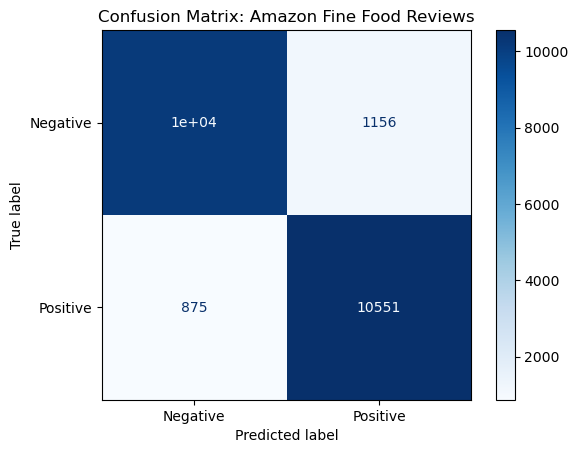

In [79]:
df = pd.read_csv(f"{base_dir}/ollama_reviews_with_predictions.csv")
y_true = df["Sentiment"]       
y_pred = df["prediction"]  
numeric_labels = [0, 1]          
class_names = ["Negative", "Positive"]  
cm = confusion_matrix(y_true, y_pred, labels=numeric_labels)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Amazon Fine Food Reviews")
plt.show()

***Comparing DistilBERT and Llama 3.2 Predictions***

In [3]:
import pandas as pd

In [4]:
df_distil = pd.read_csv("test_with_distilbert_predictions.csv")
df_llama = pd.read_csv("ollama_reviews_with_predictions.csv")

df_merged = pd.merge(
    df_distil[['Text', 'Sentiment', 'distilbert_prediction']],  
    df_llama[['Text', 'prediction']],                     
    on='Text',
    how='inner'
)

df_merged.rename(columns={
    'Sentiment': 'ground_truth', 
    'distilbert_prediction': 'distilbert_pred',
    'prediction': 'llama_pred'
}, inplace=True)

final_columns = ['Text', 'ground_truth', 'distilbert_pred', 'llama_pred']
df_final = df_merged[final_columns]

df_final.to_csv("comparison_distil_llama.csv", index=False)

In [5]:
df = pd.read_csv("comparison_distil_llama.csv")
distil_correct = df["distilbert_pred"] == df["ground_truth"]
llama_correct = df["llama_pred"] == df["ground_truth"]

# Cases where Llama 3.2 is correct and DistilBERT is not
df_llama_better = df[llama_correct & (~distil_correct)]

# Cases where DistilBERT is correct and Llama 3.2 is not
df_distil_better = df[distil_correct & (~llama_correct)]

# Cases where both fail the ground truth
df_both_fail = df[(~llama_correct) & (~distil_correct)]

print("Llama 3.2 performs better than DistilBERT: ", len(df_llama_better))
print("DistilBERT performs better than Llama 3.2: ", len(df_distil_better))
print("Both fail: ", len(df_both_fail))

df_llama_better.to_csv("llama_performs_better.csv", index=False)
df_distil_better.to_csv("distil_performs_better.csv", index=False)
df_both_fail.to_csv("both_fail.csv", index=False)

Llama 3.2 performs better than DistilBERT:  629
DistilBERT performs better than Llama 3.2:  1565
Both fail:  466
